<a href="https://colab.research.google.com/github/ssnirgudkar/Datasetpaper-final/blob/main/IR_7classes_Unet_Finalpaper_submission_Shailesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use this as the final code. - DOES NOT USE ANY PREEXISTING WEIGHTS

In [1]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
!cp /content/IRDatasetFinal/test/a1570555799_168847_42.png /content/IRDatasetFinal/test1/a1570555799_168847_42.png
!cp /content/IRDatasetFinal/testannot/a1570555799_168847_42.png /content/IRDatasetFinal/test1annot/a1570555799_168847_42.png
'''

In [2]:
!nvidia-smi

Sun Dec 12 16:56:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/train.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/trainannot.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/val.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/valannot.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/test.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/testannot.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()


In [3]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/test.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/testannot.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()


In [4]:
import os 
APP_FOLDER = '/content/IRDatasetFinal/test'
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(APP_FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1
   

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

Searching in :  /content/IRDatasetFinal/test
Total number of files 3726
Total Number of directories 0
Total: 3726


1. no of classes if mentioned 3, then the labels **can only** have values of 0,1 and 2
2. You can check the actual error using CPU, and not GPU
3. softmax is good for image segmentation. it's a probablistic algorithm, so the losses also haev to be accordingly. all of the below are with softmax activation. optimizers are changed in the middle.  
4. relu / leakyrelu, adam will work 
5. **Option 1-** leakyrelu - epoc 50, 62 images of which validation images 3. batch size 3 , kernel_initializer = 'he_normal'- , leakyrelu, sparse_categorical_crossentropy, optimizer - rmsprop: val_loss went from 87 to 0.2. But it was not continually reducing and was fluctutating.  Output segmentation was good. obstacles were showing up.
6. **Option 2- **RELU, epoc 50, total images - 62, validation 3 images, sparse_categorical_crossentropy, kernel_initializer = 'he_normal', optimizer = rmsprop: Val_loss started from 127 and went to 0.08. was better converging than option 1, but still not always decreasing. Image output better than option 1
7. Option 3: **RELU, epoc 50, total images - 62, validation 3 images, sparse_categorical_crossentropy, kernel_initializer = 'he_normal', optimizer = adam, defalt learn rate(lr): Val_loss started from 45 and went to 0.0528. The val loss continually decreased and converged. Image output better than option 1 and 2. Observations - reflection in water is shown as an obstacle. Bits of water are shown as cloud
8. Option 4: **RELU, epoc 50, total images - 62, validation 3 images, categorical_crossentropy, kernel_initializer = 'he_normal', optimizer - adam, lr = 0.01: Val_loss started from 476 billion  and went to NAN in the 6th apoch. No segmentation output available. it was all black. Tried to change the loss to sparse_categorical_crossentropy with the same lr - 0.01, but the op was worse than that with default lr = 0.001  
Kept the loss to sparse_categorical_crossentropy , but changed the lr to 0.005. That works comparable to lr = 0.001(default), but a touch lower. Some images are at par with default lr, some are not.   
9. adam, lr = 0.001(default), softmax, kernel_initializer = 'uniform'. val_loss starts from 2.4 to 0.06. Some images with this are better than those using he_normal. 
**Recommendation - adam, sparse_categorical_crossentropy, relu, lr=. default = 0.001, kernal initilizer = 'he_normal' OR kernal initilizer = 'uniform'**

Training results - 
1. Ran with 291 IR images (including night _ pilot IR. Mirror images of those + labeled) = 882 images in this directory. The checkpoint file is IR_1000images_uniform_adam_softmax_100_10.h5. Indictes, it was run for 1000 images, uniform kernel initializer, adam optimizer, softmax algo, 100 epochs with a batch size of 10. No of classes are 4 (0 thru 3). This was run with TPU. Per Epoc (86 batches with a batch size of 10 - estimate time was 10 min). Val_loss for epoc 1 was 5.0147 although average loss was 0.3 for each batch. Then ran with GPU to see which one to go with. GPU checking the unique label value took lot of time for 800 images. However, the training time - 1 epoch 1st batch with 86 batches with a batch size of 10 - estimate was only 2 min. Val loss was 7 although loss was 0.1. So GPU was much faster for training than TPU.Also TPU libraries to be imported change, plus TPU gives verbose explanbation of error as against GPU that just says NAN

Results - IMP - numbering, and number of images shoild be exactly same between image and masks. The algo sorts it and uses it one to one. else we will see very bad losses and bad inference. 
Epoch 25/25
837/837  - 188s 224ms/step - loss: 0.0197 - val_loss: 0.0206

# Now i save model from run1, and use that saved model to restart training in run2. so each time i run, the model is getting retrained. i need to be careful that if i am running a test (w/o good data), i shld not save the model, else it will corrupt the earlier learning. 

 
 

# Image segmentation with a U-Net-like architecture

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2019/03/20<br>
**Last modified:** 2020/04/20<br>
**Description:** Image segmentation model trained from scratch on the Oxford Pets dataset.

##Run1 - No preloaded weights
train - 2570, val - 740, test - 370 , Epochs - 500 
Training time - 5 hrs
##Run 2 - No preloaded weights
train - , val - , test - , Epochs - 100
Training time -  failed due to NAN 
##Run 3 - No preloaded weights - 24K + images
train - 24814, val - 7090, test - 3544, Epochs - 76
Training time -  14 hrs, Testing time - failed with OOM after 20 min with GPU , after 23 min with TPU. Now running with TPU - High Ram. this completed in 20 min
##Run 4 - No preloaded weights - resize + mirror  
train - 3438  , val - 982  , test - 492 , Epochs - 50
Training time - 1 hr 22 min  hrs, Testing time - 5 min
 
##Run5 - No preloaded weights - actual images (no mirror/rotate) . GPU + High RAM
train - 2004  val - 572 test - 288 , epochs = 50
training time - 2 hrs, testing - 3 min  
Model - Unet-7classes-finalpapersubmission_V1
file names prefix - run2 

##Run6 - No preloaded weights - actual images (no mirror/rotate) . GPU (Standard RAM)
train - 2004  val - 572 test - 288 , epochs = 50
training time - 2 hrs, testing - 3 min  
Model - Unet-7classes-finalpapersubmission_V1
file names prefix - run2 

##Run 7 - No preloaded weights - actual size images + mirror + rotate . GPU (Standard RAM)
train - 26081  val - 7452  test - 3726 , epochs = 100
training time - 2 days, testing -  min  
Model - /Models/Unet-7classes-finalpapersubmission2
file names prefix - run11 
Loss - 0.0341




## Download the data

In [5]:
import tensorflow as tf
print("keras version is", tf.keras.__version__)
print ("tf version is", tf.__version__) 
!python --version

keras version is 2.7.0
tf version is 2.7.0
Python 3.7.12


In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
#!cd "drive/My Drive/PhD/IRLabeledDataset"
'''

Mounted at /content/drive


## Prepare paths of input images and target segmentation masks

In [ ]:
'''this is a test code to check syntax 
flag = 0 
ideal_label_array = [0,1,2,3]
target_label_array = [0,1,2,3,5]
if(set(target_label_array).issubset(set(ideal_label_array))):
  flag = 0
else:    
  flag = 1 
  print("Error in label", target_label_array ) 
'''

In [6]:
import os
import numpy as np
import cv2

'''
input_dir = "/content/IRDatasetFinal/train" # directory containing 2570 IR input images
target_dir = "/content/IRDatasetFinal/trainannot" # directory containing 2570 segmented IR images

input_dir_val = "/content/IRDatasetFinal/val" # directory containing 2570 IR input images
target_dir_val = "/content/IRDatasetFinal/valannot" # directory containing 2570 segmented IR images
'''
input_dir_test = "/content/IRDatasetFinal/test1" # directory containing 2570 IR input images
target_dir_test = "/content/IRDatasetFinal/test1annot" # directory containing 2570 segmented IR images

img_size = (512, 640) #it's height and width. it's a 1/2 sized image from the original image from segment.ai
#img_size = (512, 640) #it's height and width. This is the original image from segment.ai
#img_size_width_ht = (320,256)
img_size_width_ht = (640,512)

num_classes = 7
batch_size = 10
test_batch_size = 1
epochs = 100 

# check for distinct label values in all masked files 
def getFullyQualifiedImagePaths(image_dir):
  return sorted([ os.path.join(image_dir, fname)
                  for fname in os.listdir(image_dir)
                  if fname.endswith(".png")
                ])
 


In [ ]:
#prints how many files are in the train batch
input_img_paths = getFullyQualifiedImagePaths(input_dir)
target_img_paths = getFullyQualifiedImagePaths(target_dir)

print("Number of train images:", len(input_img_paths))
print("Number of train masks:", len(target_img_paths))

#prints how many files are in the validation batch
input_val_paths = getFullyQualifiedImagePaths(input_dir_val)
target_val_paths = getFullyQualifiedImagePaths(target_dir_val)

print("Number of validation images:", len(input_val_paths))
print("Number of validation masks:", len(target_val_paths))

#prints how many files are in the test batch
input_test_paths = getFullyQualifiedImagePaths(input_dir_test)
target_test_paths = getFullyQualifiedImagePaths(target_dir_test)

#prints how many files are in the batch
print("Number of test images:", len(input_test_paths))
print("Number of test masks:", len(target_test_paths))



#prints the name of 10 sets of input and labeled file
for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

#print((cv2.imread('/content/drive/MyDrive/TheIRDatasetMini/trainannot/j02972132_1_41_2.png',cv2.IMREAD_UNCHANGED)))


'''
#COMMENTING THIS CODE AS THE CHECK HAS ALREADY BEEN DONE DURING PREPROCESSING
#below code checks if the labels are in the 1 through 3 range (4 classes - sky,water,object,background). 
#Because if not, then model training gives a NAN error.
#it displays the label file that has an error, and the values of the label
ideal_label_array = [0,1,2,3,4,5,6] # depends on the number of classes
flag = 0 

for target_path in (target_img_paths):
    target_label_array = (np.unique(cv2.imread(target_path,cv2.IMREAD_UNCHANGED)))
    if(set(target_label_array).issubset(set(ideal_label_array))):
       flag +=1
       #print("good label", flag)
    else:    
       flag +=1
       print("Error in label", flag,target_path,target_label_array )  
'''
'''
for target_path in (target_val_paths):
    target_label_array = (np.unique(cv2.imread(target_path,cv2.IMREAD_UNCHANGED)))
    if(set(target_label_array).issubset(set(ideal_label_array))):
       flag +=1
       #print("good label", flag)
    else:    
       flag +=1
       print("Error in label", flag,target_path,target_label_array )  
      

'''
'''
#COMMENTING THIS CODE AS THE CHECK HAS ALREADY BEEN DONE DURING PREPROCESSING
#below code checks which testing files have living obstacles and obstacles. this way we can use them for prediction
ideal_label_array = [3,4] # depends on the number of classes
flag = 0 
for index, target_path in enumerate(target_test_paths):
    target_label_array = (np.unique(cv2.imread(target_path,cv2.IMREAD_UNCHANGED)))
    #if(set(target_label_array).issubset(set(ideal_label_array))):
    if len(np.intersect1d(target_label_array, ideal_label_array)) == 2:  
       print("file has obstacle & living ob", index,target_path,target_label_array )  
       #print(np.intersect1d(target_label_array, ideal_label_array))
       #print (target_label_array)  
'''      

Number of train images: 26081
Number of train masks: 26081
Number of validation images: 7452
Number of validation masks: 7452
Number of test images: 3726
Number of test masks: 3726
/content/IRDatasetFinal/train/a1570555799_168847.png | /content/IRDatasetFinal/trainannot/a1570555799_168847.png
/content/IRDatasetFinal/train/a1570555799_168847_412.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_412.png
/content/IRDatasetFinal/train/a1570555799_168847_412_2.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_412_2.png
/content/IRDatasetFinal/train/a1570555799_168847_415.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_415.png
/content/IRDatasetFinal/train/a1570555799_168847_415_2.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_415_2.png
/content/IRDatasetFinal/train/a1570555799_168847_417.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_417.png
/content/IRDatasetFinal/train/a1570555799_168847_417_2.png | /content/IRDatasetFinal/trainann

'\n#COMMENTING THIS CODE AS THE CHECK HAS ALREADY BEEN DONE DURING PREPROCESSING\n#below code checks which testing files have living obstacles and obstacles. this way we can use them for prediction\nideal_label_array = [3,4] # depends on the number of classes\nflag = 0 \nfor index, target_path in enumerate(target_test_paths):\n    target_label_array = (np.unique(cv2.imread(target_path,cv2.IMREAD_UNCHANGED)))\n    #if(set(target_label_array).issubset(set(ideal_label_array))):\n    if len(np.intersect1d(target_label_array, ideal_label_array)) == 2:  \n       print("file has obstacle & living ob", index,target_path,target_label_array )  \n       #print(np.intersect1d(target_label_array, ideal_label_array))\n       #print (target_label_array)  \n'

In [ ]:
# Inference 
#prints how many files are in the test batch
input_test_paths = getFullyQualifiedImagePaths(input_dir_test)
target_test_paths = getFullyQualifiedImagePaths(target_dir_test)

#prints how many files are in the batch
print("Number of test images:", len(input_test_paths))
print("Number of test masks:", len(target_test_paths))

#pattern of the test images and masks 
for input_path, target_path in zip(input_test_paths[:5], target_test_paths[:5]):
    print(input_path, "|", target_path)

!nvidia-smi

Number of test images: 1
Number of test masks: 1
/content/IRDatasetFinal/test1/a1570555799_168847_42.png | /content/IRDatasetFinal/test1annot/a1570555799_168847_42.png
Sun Dec 12 16:24:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |


In [ ]:
'''
## This is a test to see how intersect runs in python 
arr1 = [1,2]
arr2 = [2,5,1]
if len(np.intersect1d(arr1, arr2)) == 2: 
     flag +=1
     print("intersect" ) 
     print(np.intersect1d(arr1, arr2))
else:
     print("no intersect" ) 
     print(np.intersect1d(arr1, arr2))
 
'''

## What does one input image and corresponding segmentation mask look like?

In [ ]:
'''
import cv2
import tensorflow
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import PIL

img = cv2.imread('/content/drive/MyDrive/IRImages_7classes_unet/1571161174.581624_1_2.png')
print(img) 
img1 = cv2.imread('/content/drive/MyDrive/IRImages_7classes_masks_unet/1571161174.581624_1_2.png', cv2.IMREAD_UNCHANGED)
print(img1)
print(img.shape) # height , width, color
print(img1.shape)
array1 = tensorflow.keras.preprocessing.image.img_to_array(img)
print(array1) 
array2 = tensorflow.keras.preprocessing.image.img_to_array(img1)
print(array2) 
print(np.unique(array1))
print(np.unique(array2))
print(tensorflow.keras.backend.epsilon())
print(np.unique(cv2.imread('/content/drive/MyDrive/IRImages_7classes_unet/1571161174.581624_1_2.png')))
print(np.unique(cv2.imread('/content/drive/MyDrive/IRImages_7classes_masks_unet/1571161174.581624_1_2.png',cv2.IMREAD_UNCHANGED)))
'''

In [ ]:
'''
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #9
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)
'''

## Prepare `Sequence` class to load & vectorize batches of data

In [7]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            #in case we want to see if masked image have the right values
            #print(tensorflow.keras.preprocessing.image.img_to_array(img))
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2: 
            #if classes are 3, keras expects masked values to be 0,1,2 only. Cannot take 1,3,5. It checks numerically not just the number of masked values
            #y[j] += 1 
        return x, y
!nvidia-smi


Sun Dec 12 16:58:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Prepare U-Net Xception-style model

In [ ]:
from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2 ,padding="same",kernel_initializer = 'uniform')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("ReLU")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("ReLU")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same", kernel_initializer = 'uniform')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("ReLU")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same", kernel_initializer = 'uniform')(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same", )(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same",  kernel_initializer = 'uniform')(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("ReLU")(x)
        x = layers.Conv2DTranspose(filters, 3,padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("ReLU")(x)
        x = layers.Conv2DTranspose(filters, 3,padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1,padding="same", kernel_initializer = 'uniform')(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same",kernel_initializer = 'uniform')(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 320, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 320, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

## Set aside a validation split

In [ ]:
import random

# Split our img paths into a training and a validation set. There are 8000 images in the input. 
# val_samples = 500
# random.Random(1337).shuffle(input_img_paths)
# random.Random(1337).shuffle(target_img_paths)
# train_input_img_paths = input_img_paths[:-val_samples]
# train_target_img_paths = target_img_paths[:-val_samples]
# val_input_img_paths = input_img_paths[-val_samples:]
# val_target_img_paths = target_img_paths[-val_samples:]

# In new scheme, we are dividing the whole dataset into training, validation and testing sets. So we do not need
# shuffling and creating validation set out of training data set.


# Instantiate data Sequences for each split

train_gen = OxfordPets(batch_size, img_size, input_img_paths, target_img_paths)

val_gen = OxfordPets(batch_size, img_size, input_val_paths, target_val_paths)



In [ ]:
# Inference 
import random
# Instantiate data Sequences for each split

test_gen = OxfordPets(test_batch_size, img_size, input_test_paths, target_test_paths)
!nvidia-smi

Sun Dec 12 16:25:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# load a model 
# in a for loop
  # OxfordPets give 2 images at a time
  # run prediction
  # visualize and save

## Train the model

In [ ]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.

import tensorflow as tf
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt)

#model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
'''
callbacks = [
    #commenting checkpoint because i am going to save the entire model and start with earlier model
    #keras.callbacks.ModelCheckpoint("IR_1000images_he_normal_adam_softmax_relu_300_10_1.h5", save_best_only=True),
    #tf.keras.callbacks.TensorBoard(log_dir='./logs')
    #tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Logs/Unet-7classes-datasetpaper')
    tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Logs/Unet-7classes-finalpapersubmission')
]
'''

my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Logs/Unet-7classes-finalpapersubmission'),
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission", save_freq = 'epoch')

]

# Train the model, doing validation at the end of each epoch. This will be the first time code. Thereafter, you first load the saved model and then train again
#epochs = 1
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=my_callbacks)

# Save the model after training 
model.save("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission")

 




## Train the Model - Run 2

In [ ]:
# after the 1st run, we can just run from this step on (excluding the files etc)
# ADD metrics / losses. I have NOT done that. 
# now load the model for the next run 
import tensorflow as tf
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission")

# now re-train on the saved model - this will be from run2
epochs2 = 50

my_callbacks2 = [
    tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Logs/Unet-7classes-finalpapersubmission2'),
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2", save_freq = 'epoch')

]

reconstructed_model.fit(train_gen, epochs=epochs2, validation_data=val_gen, callbacks=my_callbacks2)

# now save the model back ### REMEMBER : ONLY save the model if you know your run is with good data. 
# ELSE it will spoil all the prior learning. Will save the new model in a different folder so that it doesn't spoil the 
# original model. will run in batches of Epochs. 
reconstructed_model.save("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2")

## Visualize predictions

In [ ]:
# Inference 
# Generate predictions for all images in the TEST set

from IPython.display import Image, display
import PIL
from PIL import ImageOps
#from PIL import Image
os.environ['TF_CPP_MIN_VLOG_LEVEL']='3'
import gc 
!nvidia-smi
#val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)
#val_input_img_paths_test = ['/content/drive/MyDrive/poorlighting_brightlight_resized/1603208980.690948_resized.png']
#val_input_img_paths_test = ['/content/drive/MyDrive/IRImages_7classes_unet/1571161440.714693_1_2.png']
#val_target_img_paths_test = ['/content/drive/MyDrive/IRImages_7classes_masks_unet/1571161440.714693_1_2.png']


#print(type(val_input_img_paths_test))

#test_gen = OxfordPets(1, img_size, test_input_img_paths_test, test_target_img_paths_test)
# we will use model for the 1st run. and then reconstructed_model from run 2
#val_preds = model.predict(val_gen)
gc.collect()
!nvidia-smi
tf.compat.v1.GPUOptions(allow_growth=True)
!nvidia-smi

#predict using the saved model - run 2 on 
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2")
test_preds = reconstructed_model.predict(test_gen)
!nvidia-smi





Sun Dec 12 16:25:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvidia-smi
gc.collect()
!nvidia-smi



Sun Dec 12 16:23:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    37W / 250W |  15981MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Inference 
## Now visualize predictions for a specific image. Change the value of i

def display_mask(i):
    """Quick utility to display a model's prediction. we need color masked images, so displaying both color and black and white"""
    
    #0 - sky(dark.blue). 
    #1 - water(light.blue).   
    #2 - bridge(yellow).   
    #3 - obstacle(purple).  
    #4- living ob(green).  
    #5- backgnd (orange). 
    #6 - self(pink)
    # Colors are same as segments.ai scheme
    label_colours = [(0,113,188), (216,82,24), (236,176,31), (125, 46, 141), (118, 171, 47), (161, 19, 46), (255,0,0)]  
    
    
    mask = np.argmax(test_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    #print("mask shape = ", np.shape(mask))
    #print("mask length = ", len(mask[i, 0]))
    #print("mask length = ", len(mask[i]))
    #print("Unique pixel values = ", np.unique(mask))
    #print("Type of mask = ", type(mask))
    
   
    #img1 = PIL.Image.new('RGB', (640, 512))
    img1 = PIL.Image.new('RGB', img_size_width_ht)
    #print ("image size", img_size_width_ht)
    pixels = img1.load()
    #print(type(pixels))
    #print(pixels[0,0])
    for j_, j in enumerate(mask[:, :, 0]):
        #print (j_, j)
        for k_, k in enumerate(j):
             #print(k_, k)
             if k < num_classes:
                pixels[k_,j_] = label_colours[k]
    output = np.array(img1)

    outputpicturePath = '/content/drive/MyDrive/IRDatasetFinal-Inferences/unet/picture' + '/' + str(i) + '--run1--' + imagefilepathtokens[-1]     
    
    print("this is the colored inferred image")
    display(img1)

    ##Saving the category ids in an image for programatic IoU check 
    img1.save(outputpicturePath)

    '''
    print("this is the gray inferred image")
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)
    '''
    return mask
   


# Display results for validation image #40. it uses val_input_images. so will only pick from the ones that we have kept for validation.
#i = 190
for i in range(0,1): 
      # check if ground-truth target mask as any object - class id - 3
      image_gt = tf.keras.preprocessing.image.load_img(target_test_paths[i])
      input_arr = tf.keras.preprocessing.image.img_to_array(image_gt)
      gt_mask_array = np.unique(input_arr) 
      object_living_array = [0,1]
      #print(gt_mask_array)
      #intersect_array_object = np.intersect1d(gt_mask_array, object_array) 
      #intersect_array_living = np.intersect1d(gt_mask_array, living_array) 
      if((set(object_living_array) & set(gt_mask_array))== set(object_living_array)):
          #print ("intersect output 2", gt_mask_array )
          #print(gt_mask_array)
          #display the raw input image 
          print("this is the raw image")
          display(Image(filename=input_test_paths[i]))
          
          #display the ground truth masked image 
          img = PIL.ImageOps.autocontrast(load_img(target_test_paths[i]))
          print("this is the ground truth mask")
          display(img)
          
          #set file names for storing the prediction 
          imagefilepathtokens = input_test_paths[i].split('/')
          #print("tokens = ", imagefilepathtokens)

          outputFilePath = '/content/drive/MyDrive/IRDatasetFinal-Inferences/unet/program' + '/' + str(i) + '--run1--' + imagefilepathtokens[-1] 
          #print("output file name = ", outputFilePath)

          #invoke the prediction function 
          output_mask = display_mask(i)  # Note that the model only sees inputs at 150x150.
          output_mask = np.squeeze(output_mask, axis=2)
          #result = np.where(output_mask==0)
          #print("indices where output_mask has 0 value = ", result)
          output_Im = PIL.Image.fromarray(output_mask.astype(np.uint8))

          ##Saving the category ids in an image for programatic IoU check 
          output_Im.save(outputFilePath)      
      

      
     

       
    

In [ ]:
 '''
 # This check is to see if unet gives pixel values of 0 - means leaves pixels unassigned. 
 # we did not see a single image even when run with 1 epoc where the pixel had a class id of 0 
 # valid class ids were 1,2,3,4,5,6,7
 count = 0 
 for i in range(0,492): 
    mask = np.argmax(test_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    #output_mask = np.squeeze(output_mask, axis=2)
    result = np.where(mask==0)
    if (len(result[0]) > 0): 
        #print("indices where mask has 0 value = ", result)
        count = count+1 
 print("total count of images where there are 0s" , count)
    
'''

In [ ]:
'''
#visualize the architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='softmax'))
plot_model(model, to_file='/content/IR_1000images_he_normal_adam_softmax_relu_100_10-h5-modelplot.png', show_shapes=True, show_layer_names=True)
'''

In [ ]:
'''
# to evaluate the weight tensors
from keras import backend as K

for w in model.trainable_weights:
    print(K.eval(w))
'''

In [ ]:
'''
# visualize the model in tensorboard - we will use the log files created in checkpoint  
#!kill 587

%load_ext tensorboard
import datetime, os

%tensorboard --logdir logs 
'''
 
 

##Save the .pb file in .h5 format 

In [ ]:
'''
import tensorflow as tf
from tensorflow import keras 

model = keras.models.load_model("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission")
'''


In [ ]:
tf.keras.models.save_model(model,"/content/drive/MyDrive/Models/h5-Unet-7classes-finalpapersubmission.h5")

In [39]:
total = 10
prev = 0
a = list(range(0,10))
for i in range(2,total+1,2):
  print("prev={0},i={1}".format(prev,i))
  print(a[prev:i+1])
  #for k in range(prev,i+1):
  #  print("k=",k)
  print("---")
  prev = i+1

prev=0,i=2
[0, 1, 2]
---
prev=3,i=4
[3, 4]
---
prev=5,i=6
[5, 6]
---
prev=7,i=8
[7, 8]
---
prev=9,i=10
[9]
---


this is the raw image
this is the ground truth mask
this is the colored inferred image


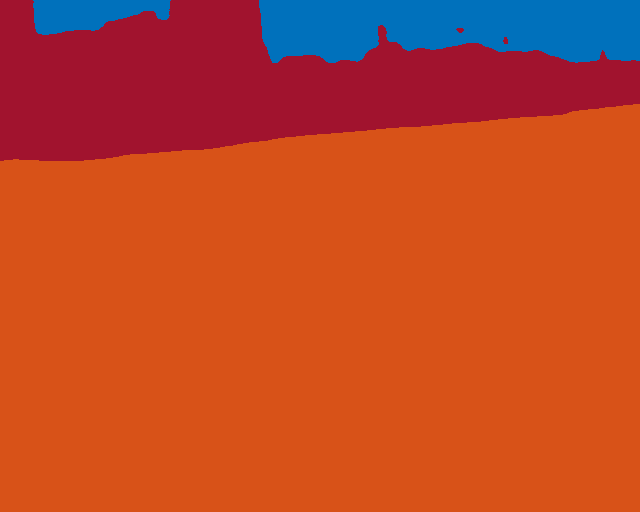

prev=233,i=234
iteration running is 234
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


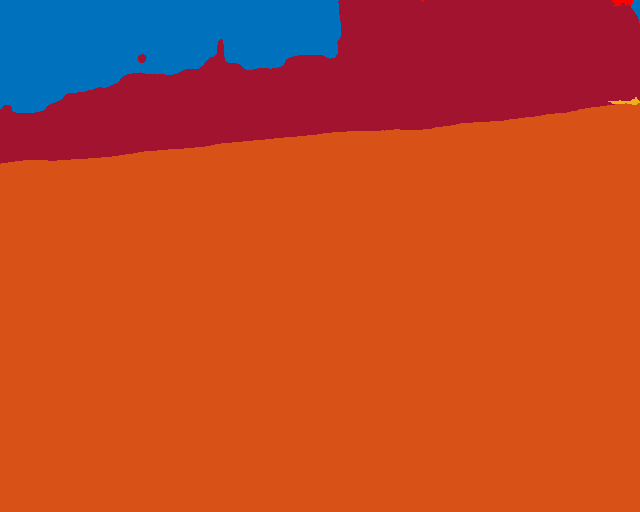

this is the raw image
this is the ground truth mask
this is the colored inferred image


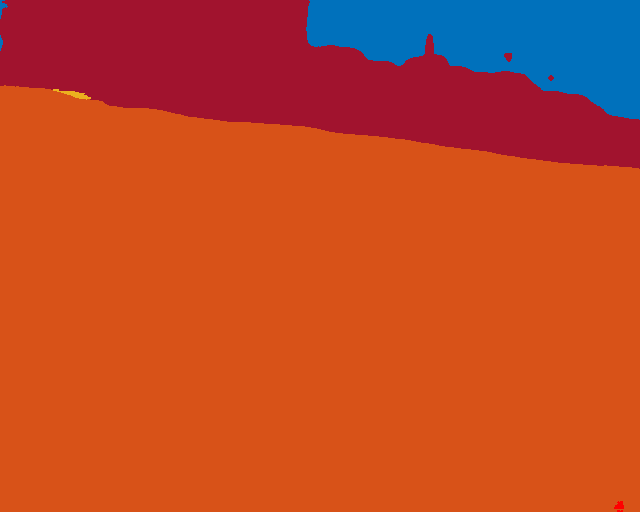

prev=235,i=236
iteration running is 236
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


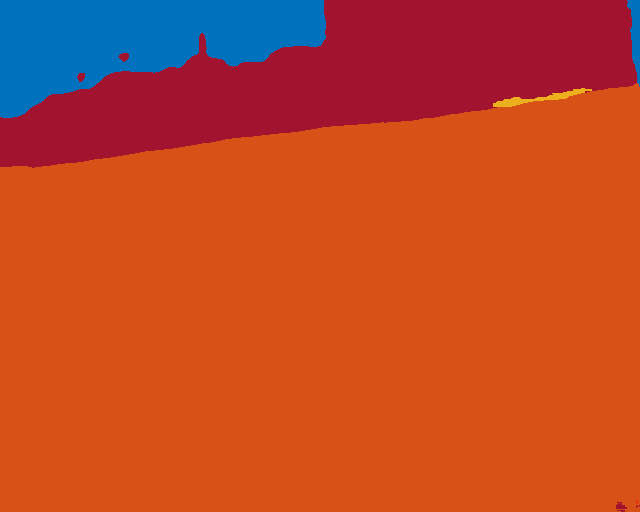

this is the raw image
this is the ground truth mask
this is the colored inferred image


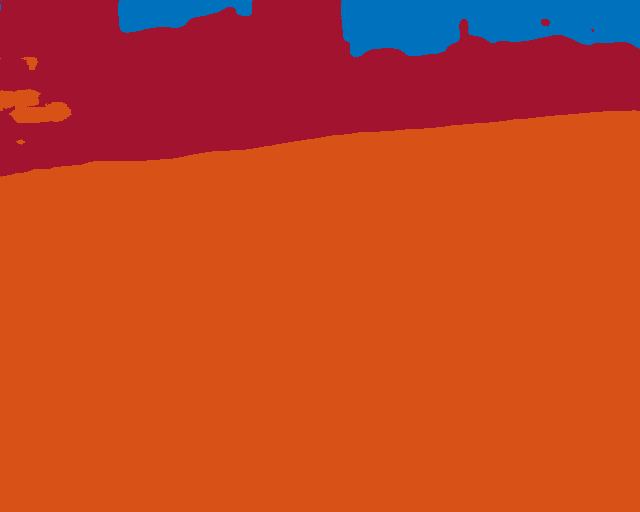

prev=237,i=238
iteration running is 238
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


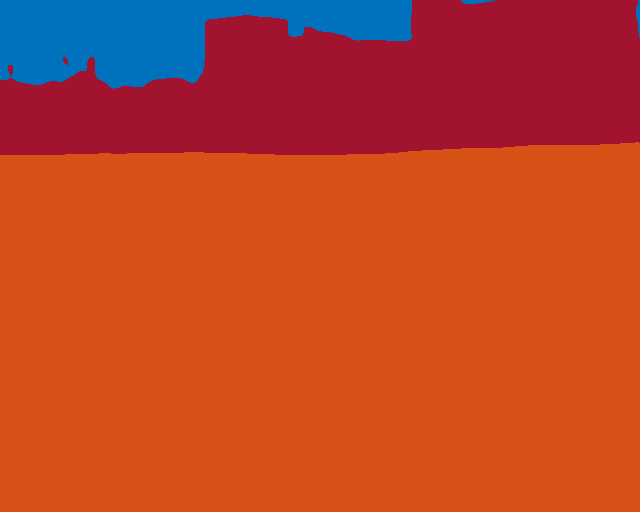

this is the raw image
this is the ground truth mask
this is the colored inferred image


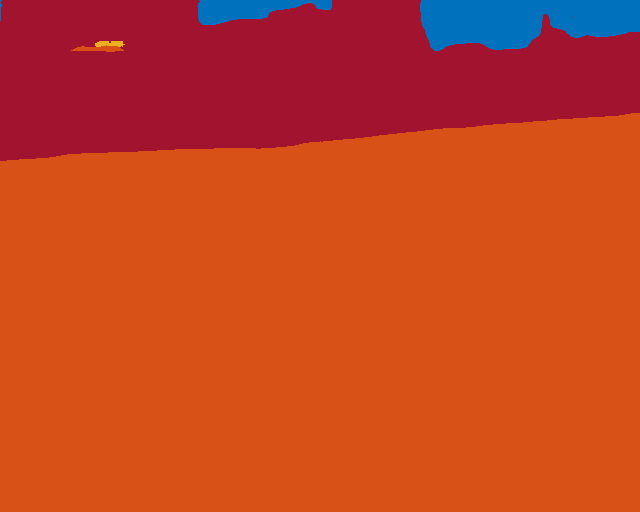

prev=239,i=240
iteration running is 240
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


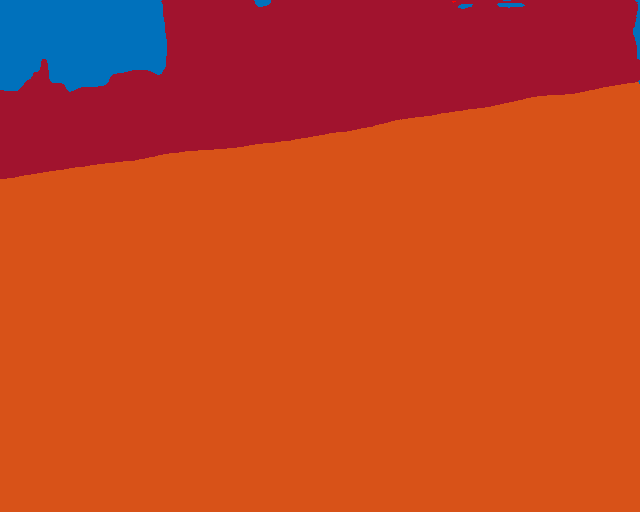

this is the raw image
this is the ground truth mask
this is the colored inferred image


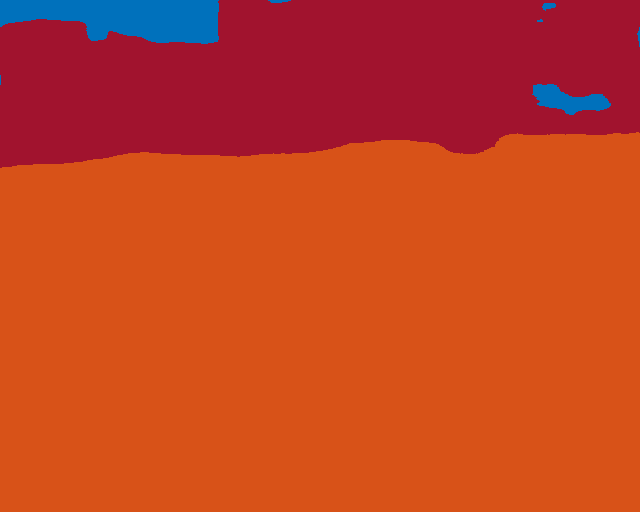

prev=241,i=242
iteration running is 242
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


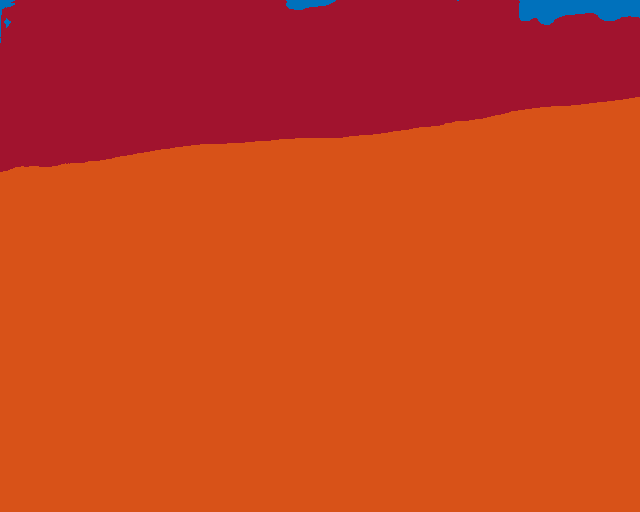

this is the raw image
this is the ground truth mask
this is the colored inferred image


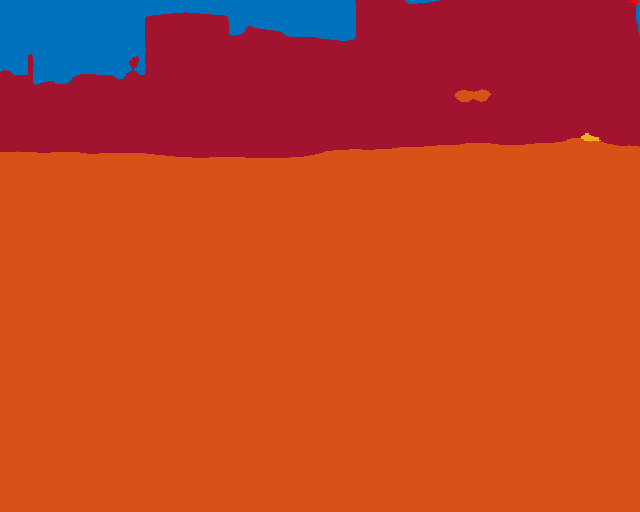

prev=243,i=244
iteration running is 244
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


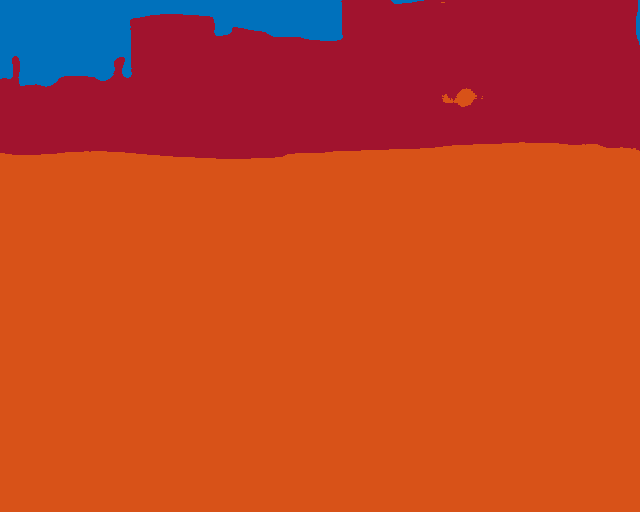

this is the raw image
this is the ground truth mask
this is the colored inferred image


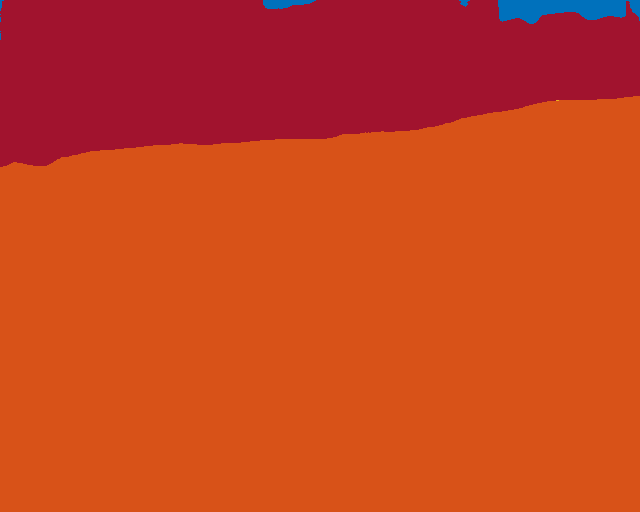

prev=245,i=246
iteration running is 246
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


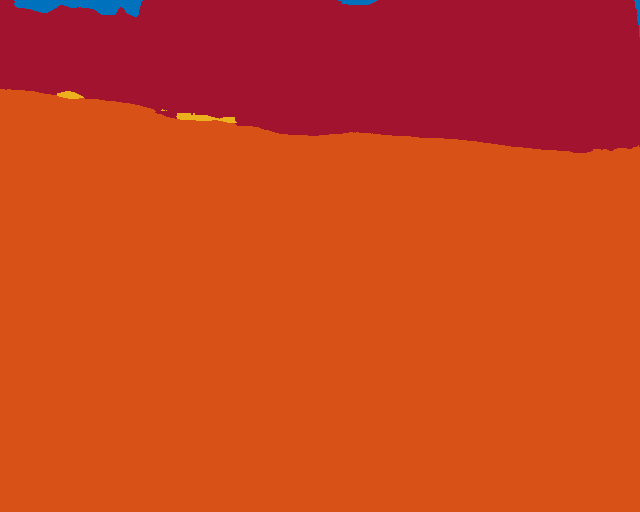

this is the raw image
this is the ground truth mask
this is the colored inferred image


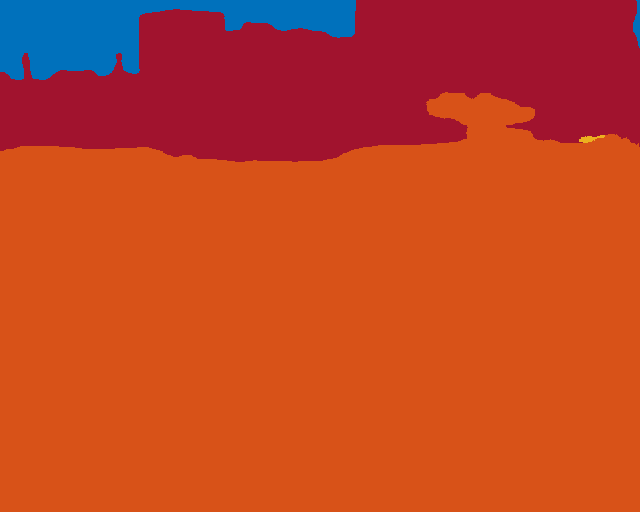

prev=247,i=248
iteration running is 248
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


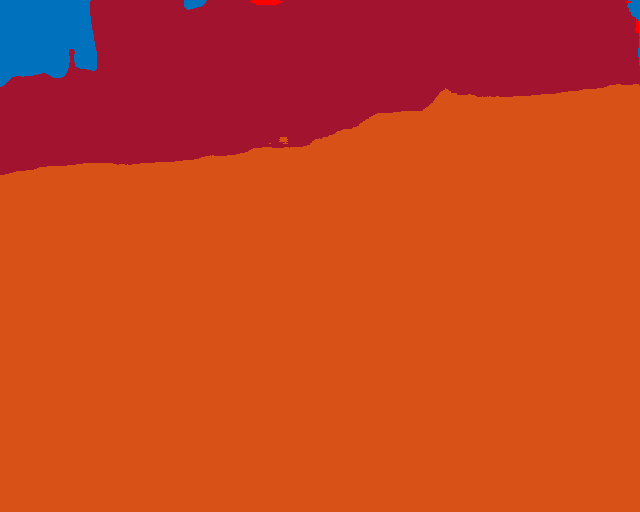

this is the raw image
this is the ground truth mask
this is the colored inferred image


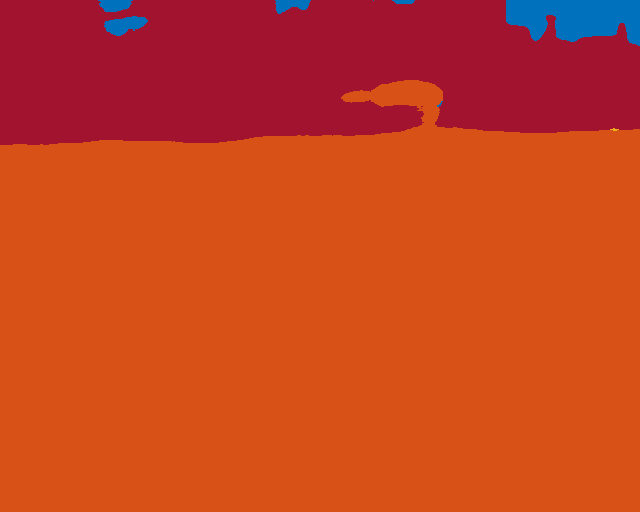

prev=249,i=250
iteration running is 250
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


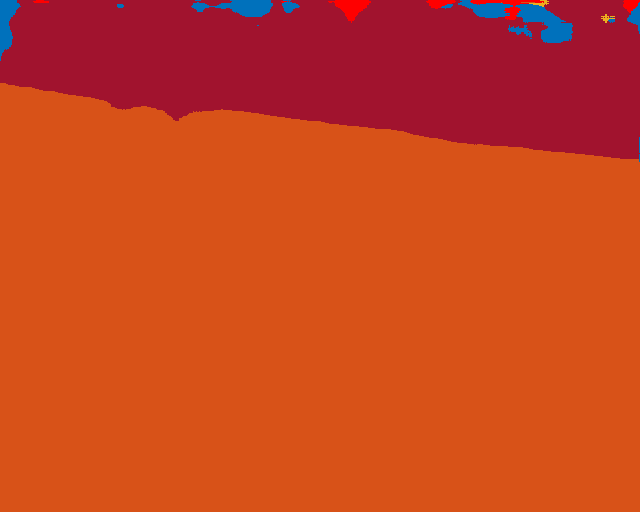

this is the raw image
this is the ground truth mask
this is the colored inferred image


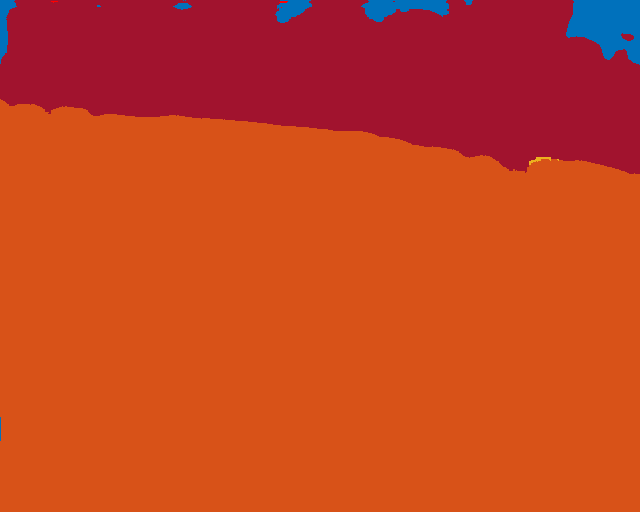

prev=251,i=252
iteration running is 252
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


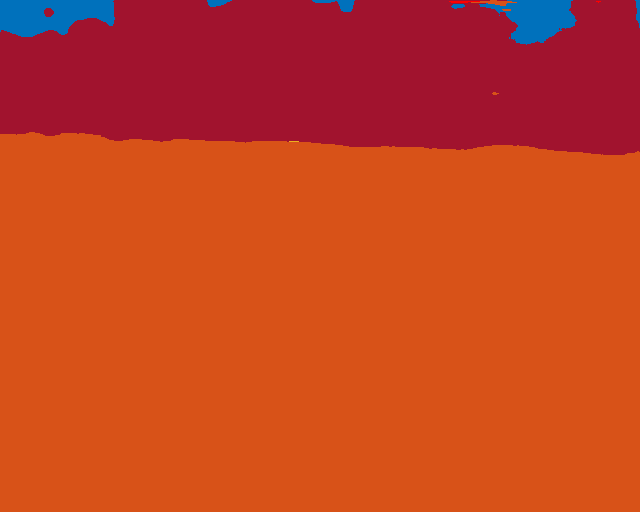

this is the raw image
this is the ground truth mask
this is the colored inferred image


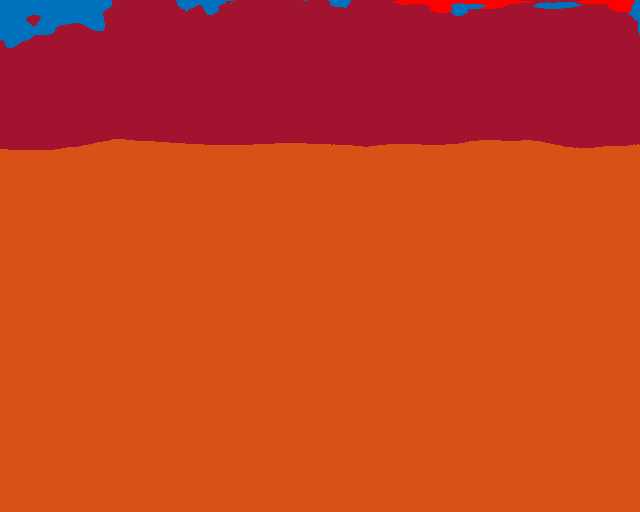

prev=253,i=254
iteration running is 254
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


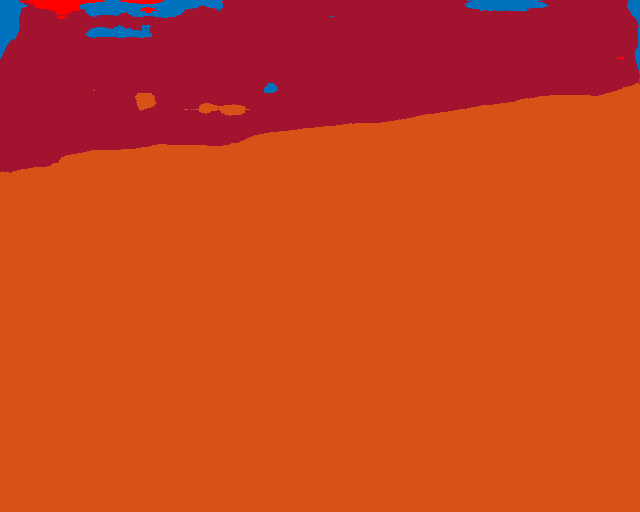

this is the raw image
this is the ground truth mask
this is the colored inferred image


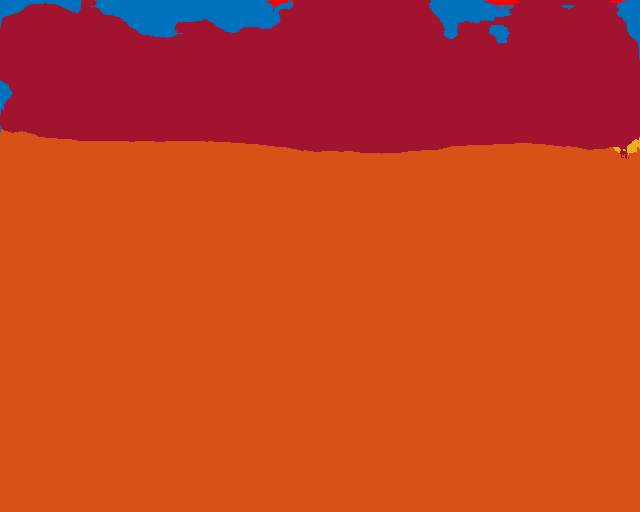

prev=255,i=256
iteration running is 256
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


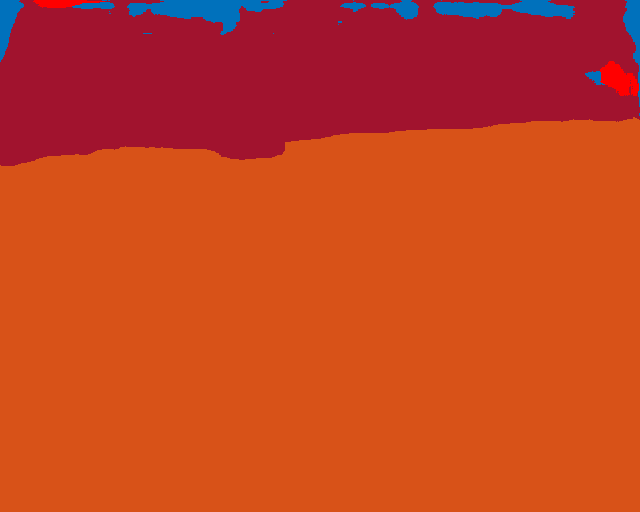

this is the raw image
this is the ground truth mask
this is the colored inferred image


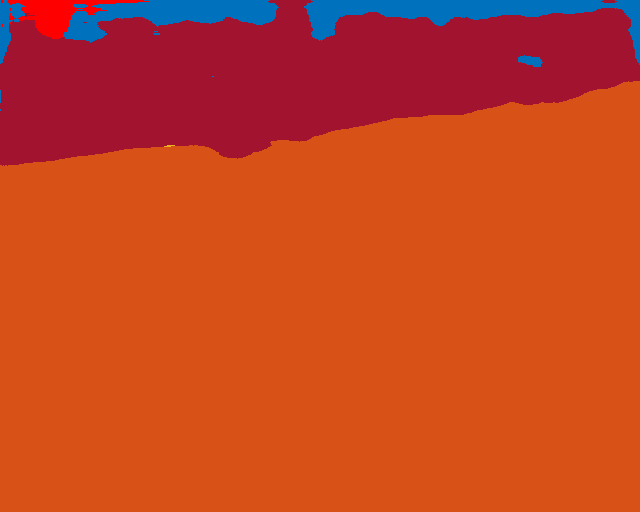

prev=257,i=258
iteration running is 258
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


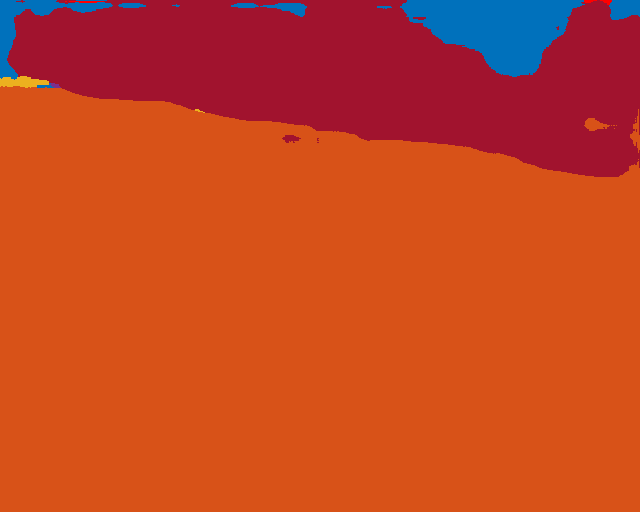

this is the raw image
this is the ground truth mask
this is the colored inferred image


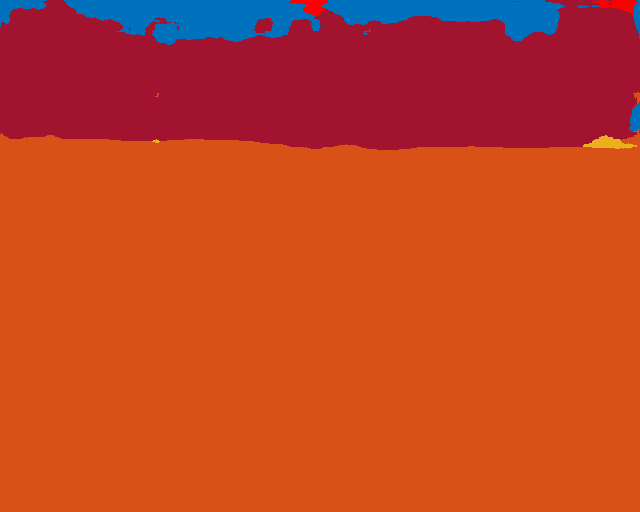

prev=259,i=260
iteration running is 260
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


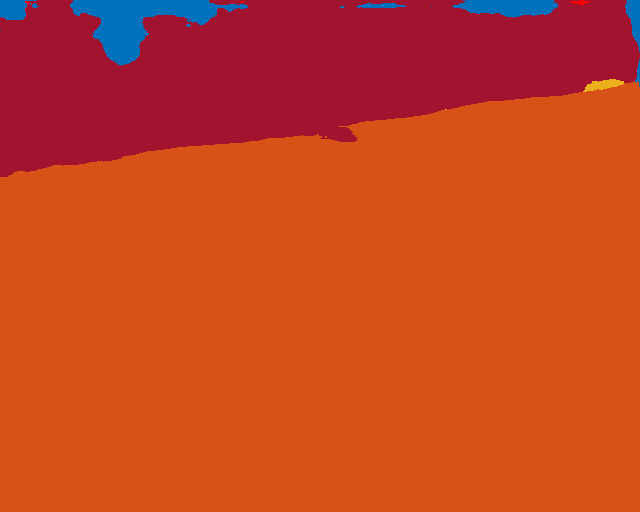

this is the raw image
this is the ground truth mask
this is the colored inferred image


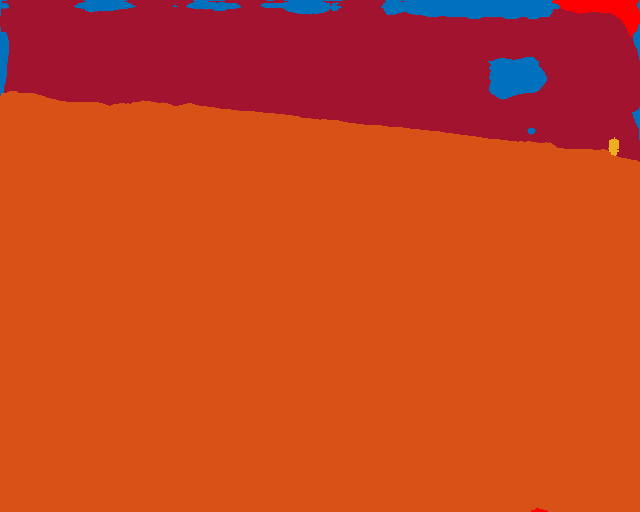

prev=261,i=262
iteration running is 262
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


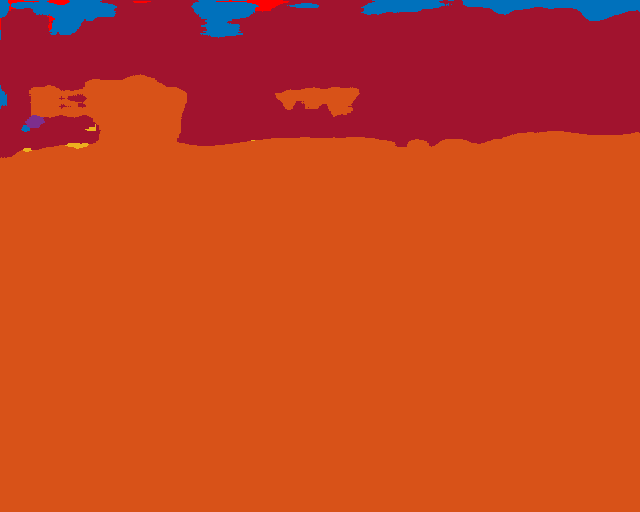

this is the raw image
this is the ground truth mask
this is the colored inferred image


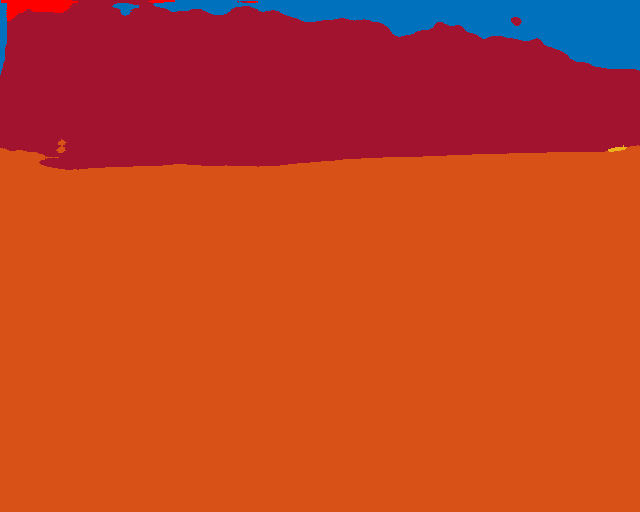

prev=263,i=264
iteration running is 264
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


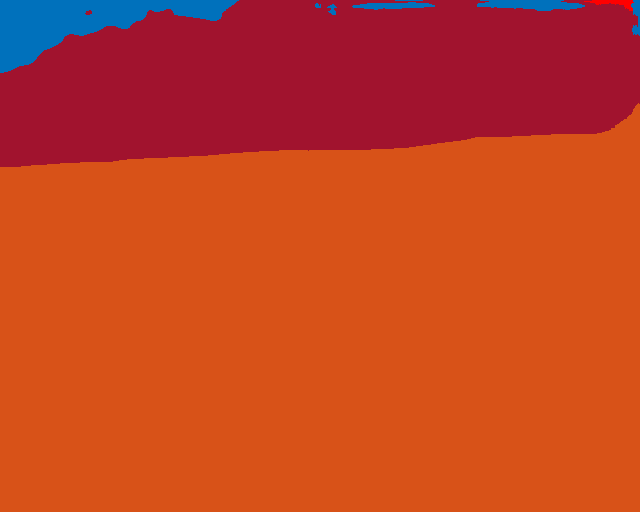

this is the raw image
this is the ground truth mask
this is the colored inferred image


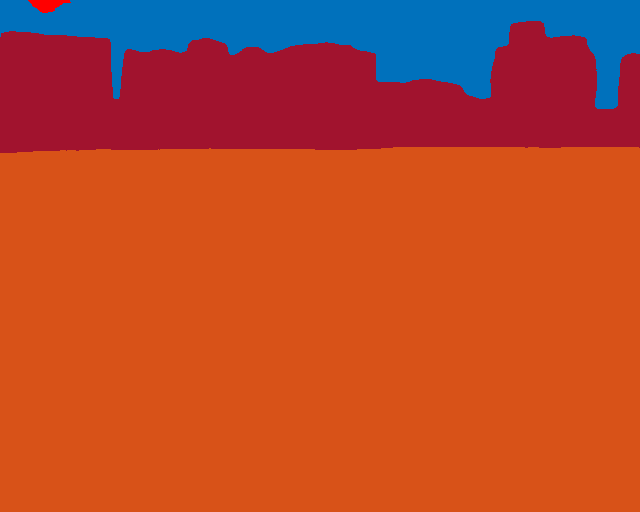

prev=265,i=266
iteration running is 266
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


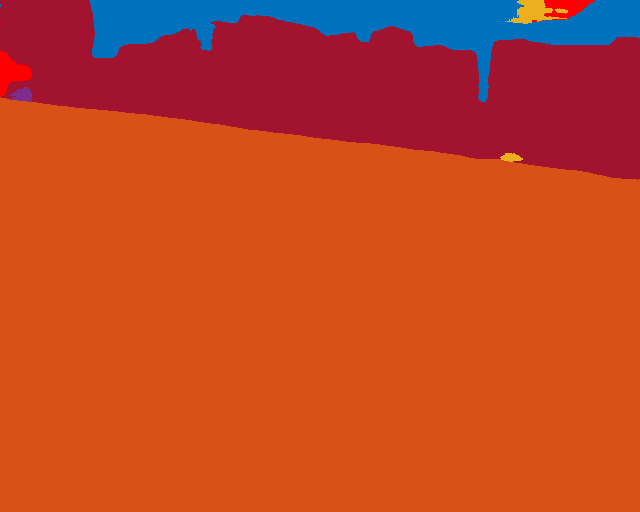

this is the raw image
this is the ground truth mask
this is the colored inferred image


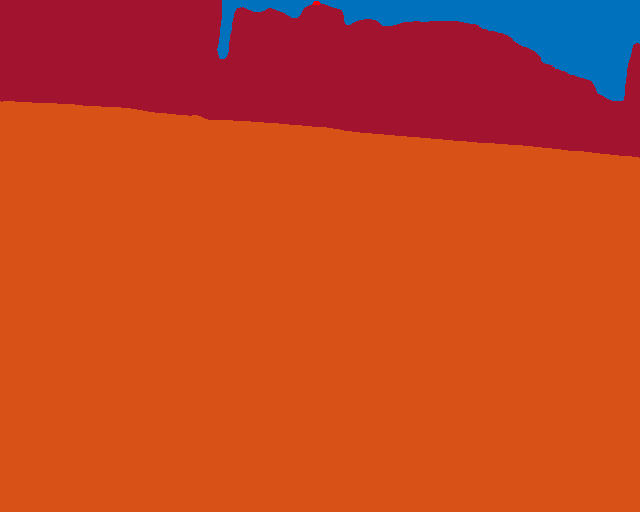

prev=267,i=268
iteration running is 268
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


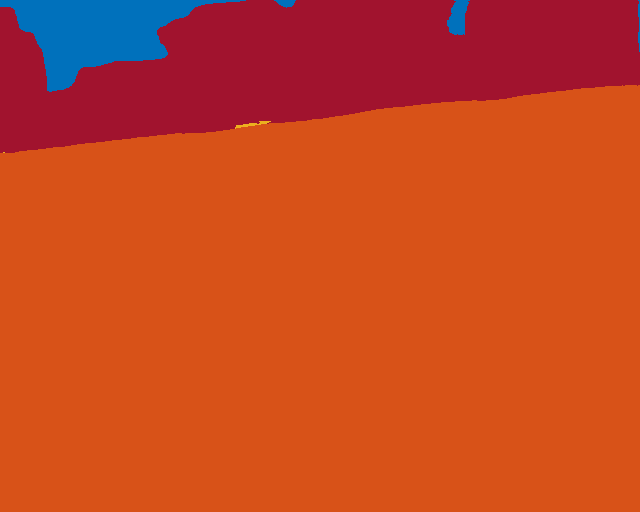

this is the raw image
this is the ground truth mask
this is the colored inferred image


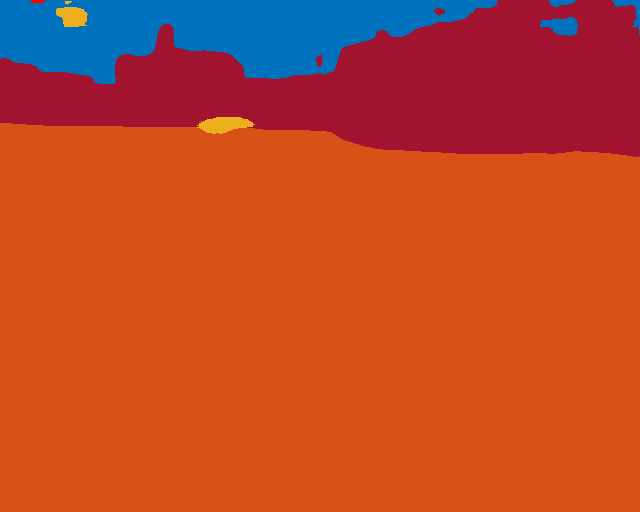

prev=269,i=270
iteration running is 270
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


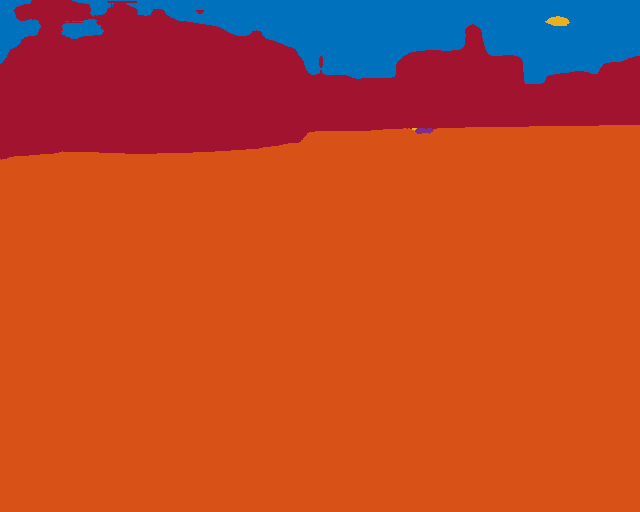

this is the raw image
this is the ground truth mask
this is the colored inferred image


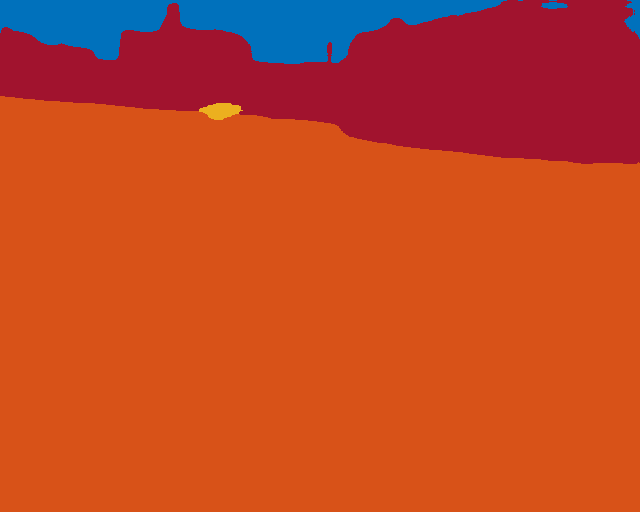

prev=271,i=272
iteration running is 272
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


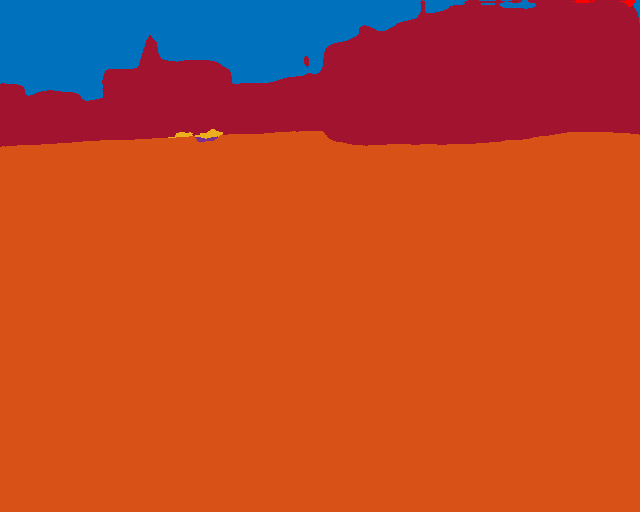

this is the raw image
this is the ground truth mask
this is the colored inferred image


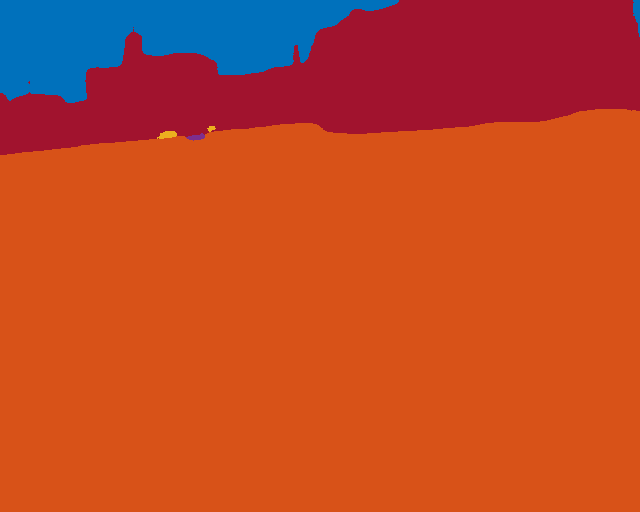

prev=273,i=274
iteration running is 274
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


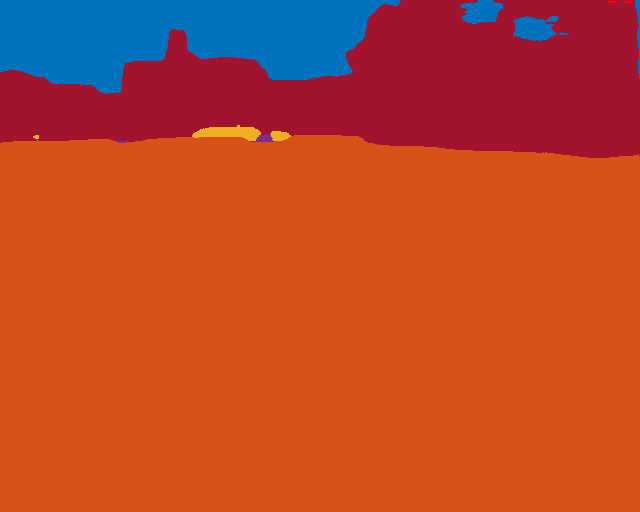

this is the raw image
this is the ground truth mask
this is the colored inferred image


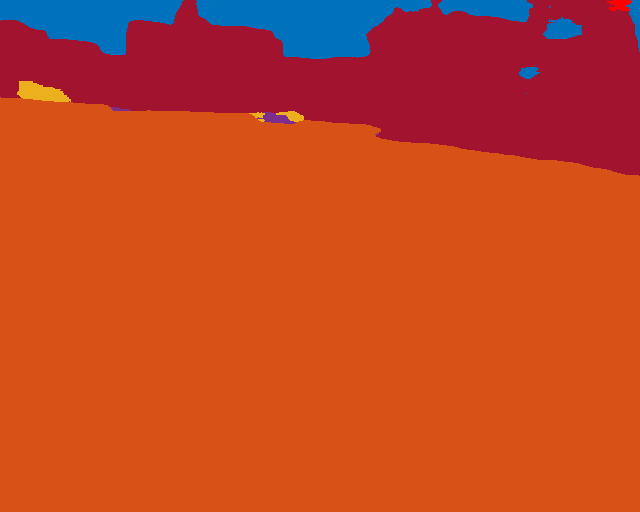

prev=275,i=276
iteration running is 276
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


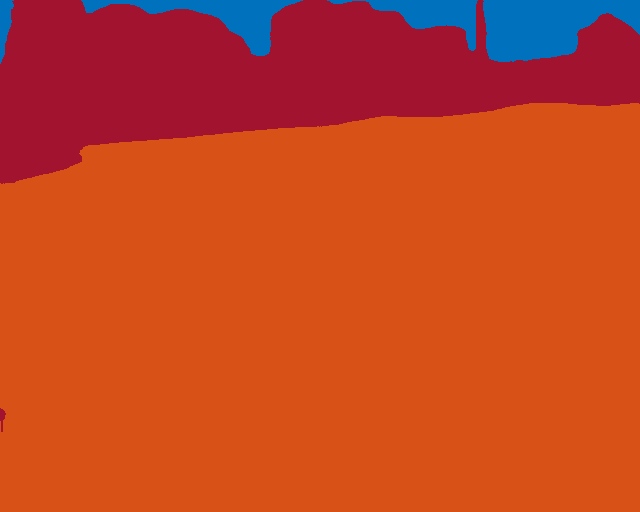

this is the raw image
this is the ground truth mask
this is the colored inferred image


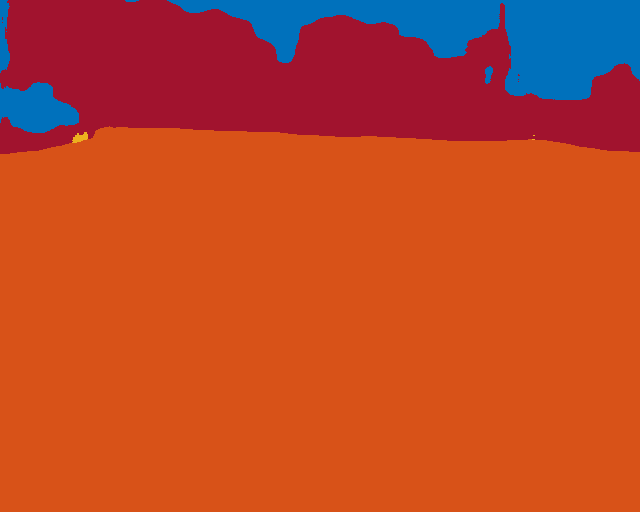

prev=277,i=278
iteration running is 278
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


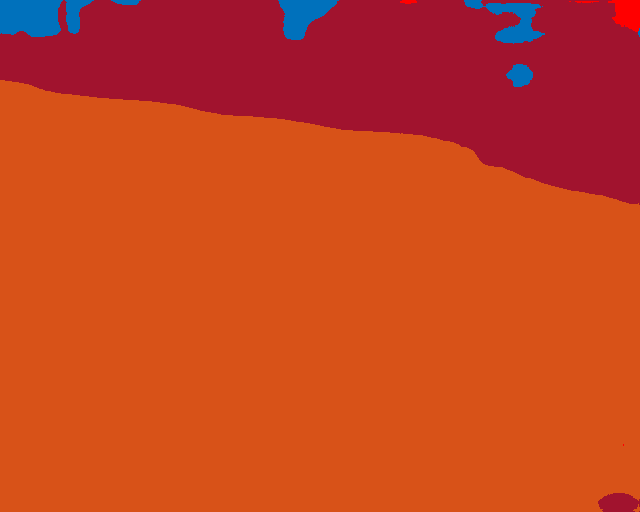

this is the raw image
this is the ground truth mask
this is the colored inferred image


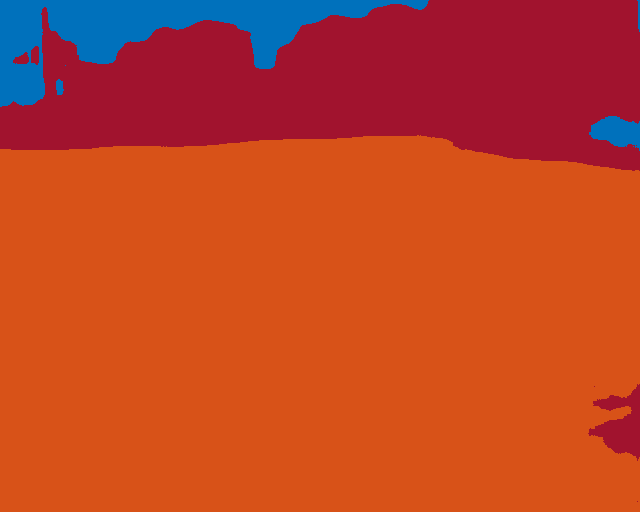

prev=279,i=280
iteration running is 280
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


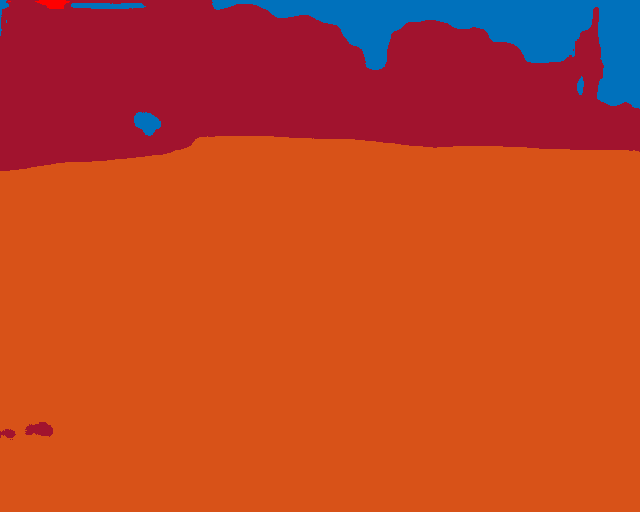

this is the raw image
this is the ground truth mask
this is the colored inferred image


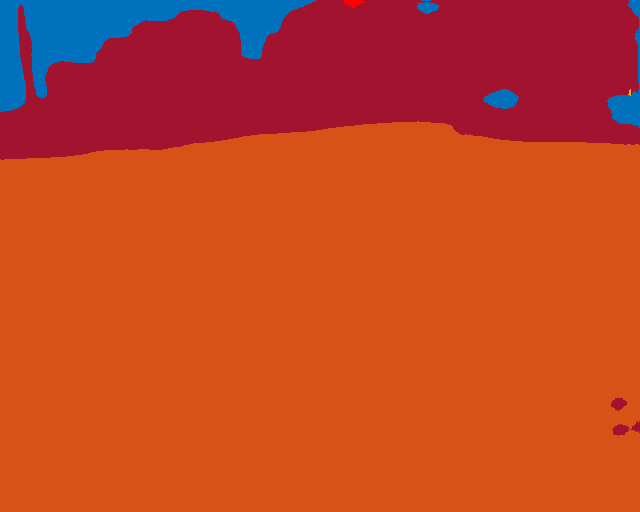

prev=281,i=282
iteration running is 282
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


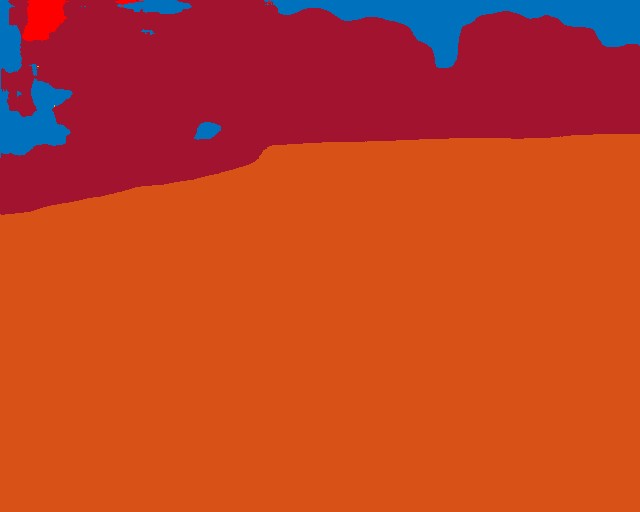

this is the raw image
this is the ground truth mask
this is the colored inferred image


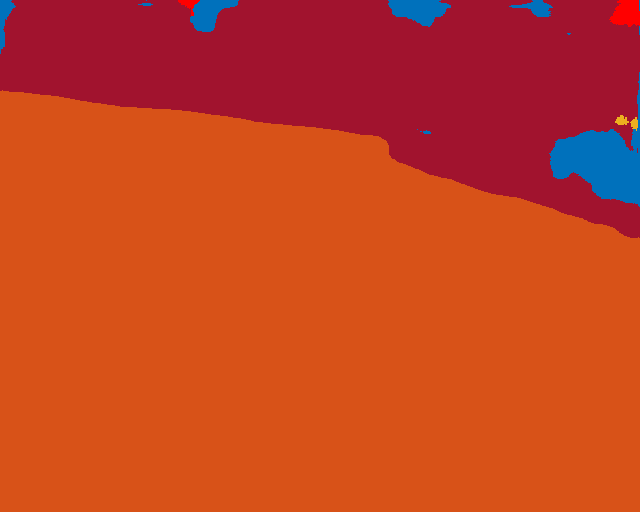

prev=283,i=284
iteration running is 284
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


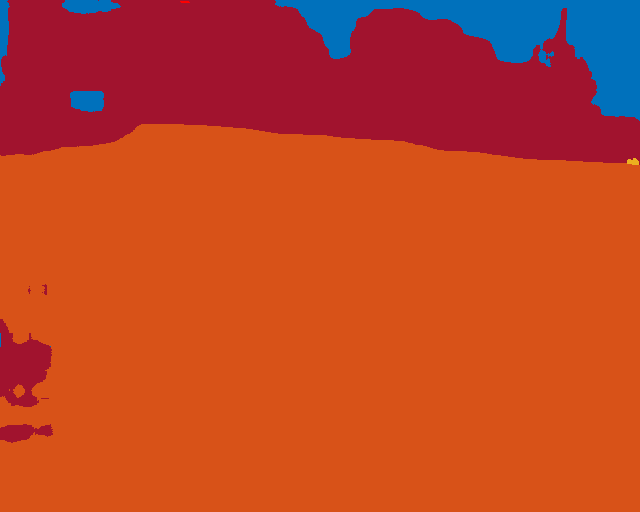

this is the raw image
this is the ground truth mask
this is the colored inferred image


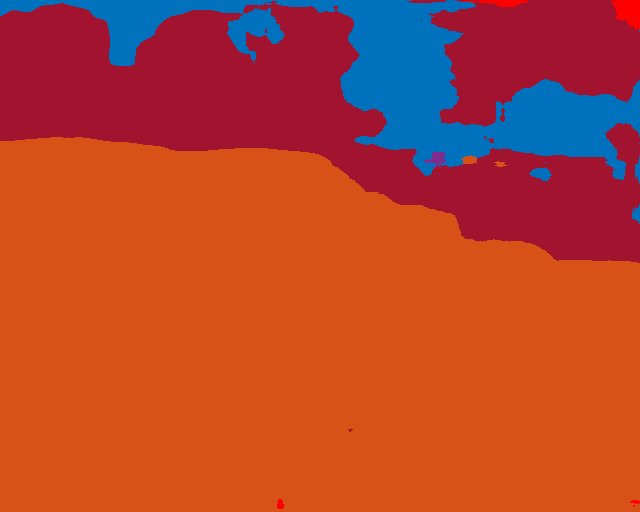

prev=285,i=286
iteration running is 286
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


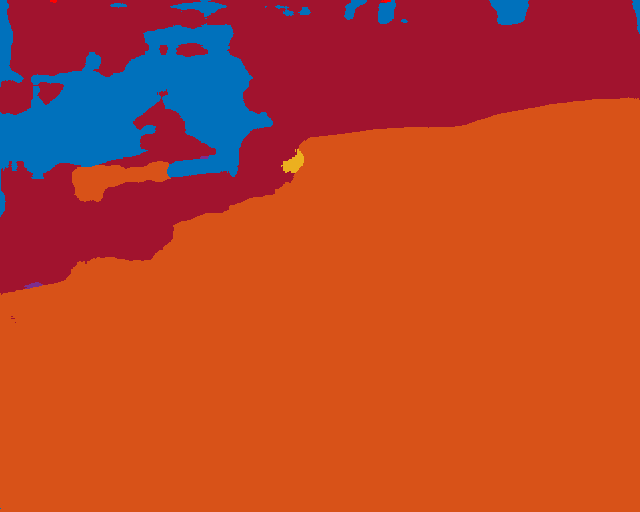

this is the raw image
this is the ground truth mask
this is the colored inferred image


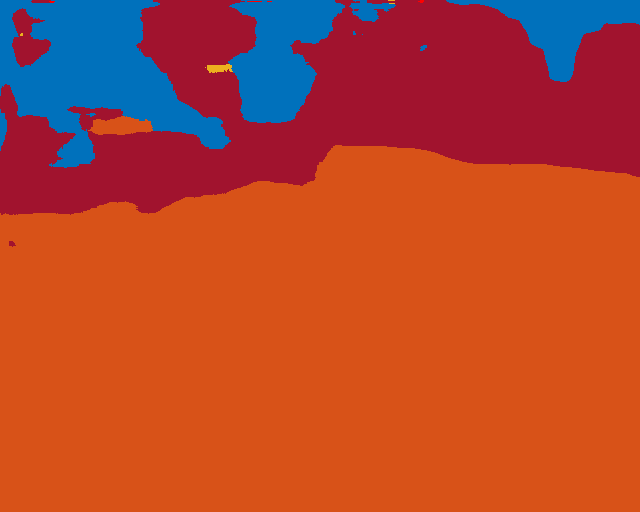

prev=287,i=288
iteration running is 288
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


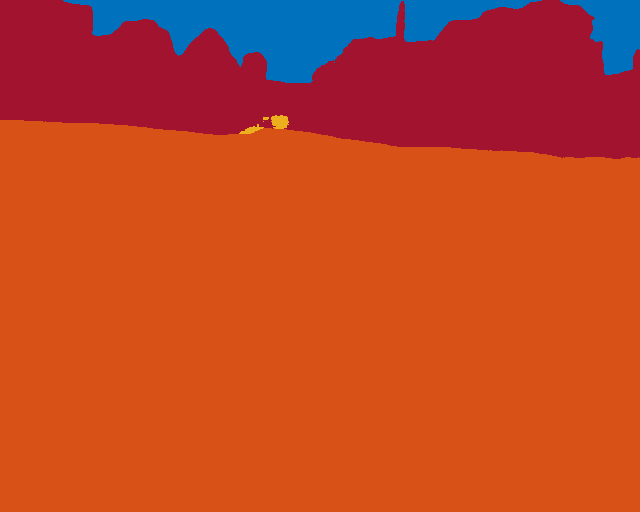

this is the raw image
this is the ground truth mask
this is the colored inferred image


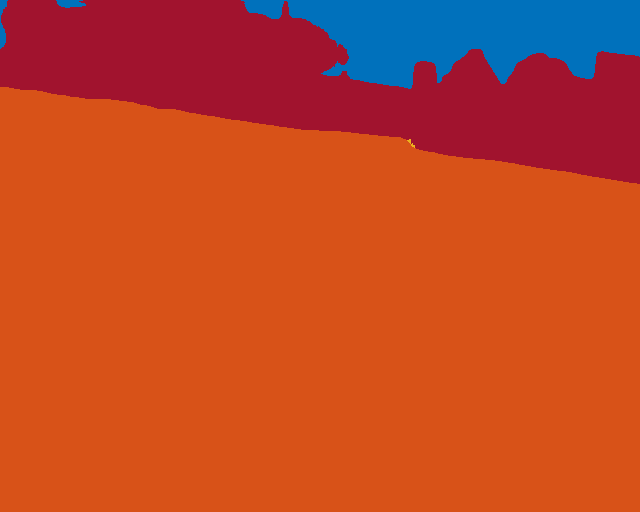

prev=289,i=290
iteration running is 290
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


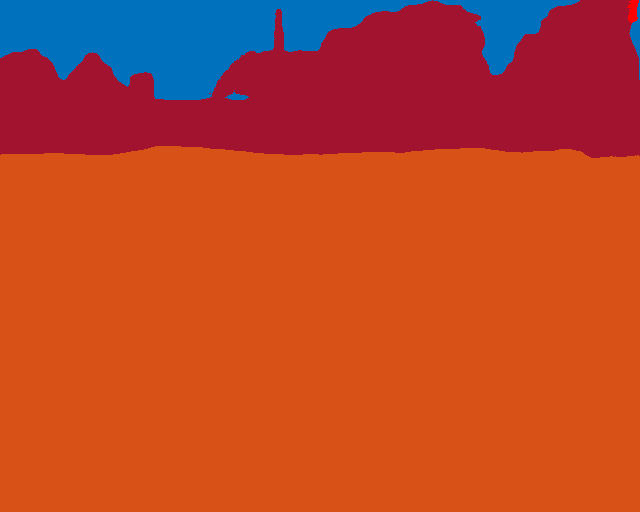

this is the raw image
this is the ground truth mask
this is the colored inferred image


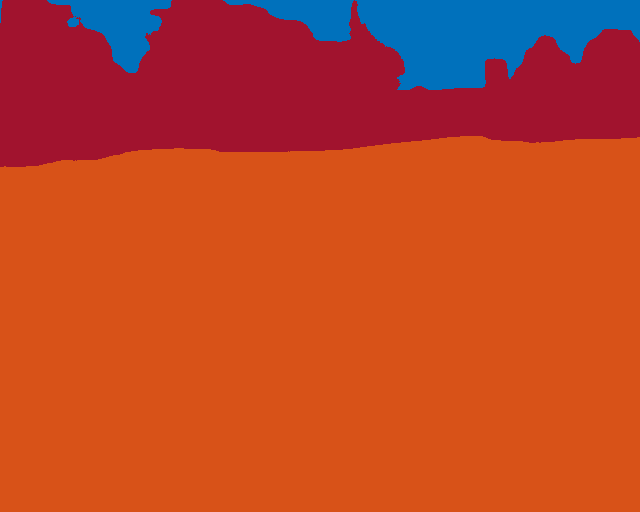

prev=291,i=292
iteration running is 292
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


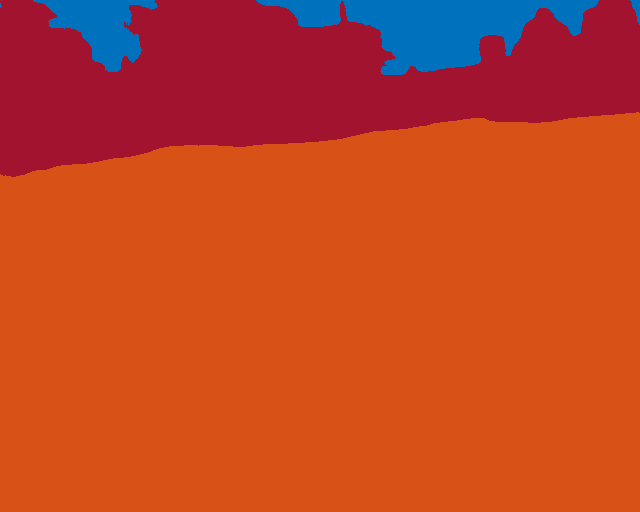

this is the raw image
this is the ground truth mask
this is the colored inferred image


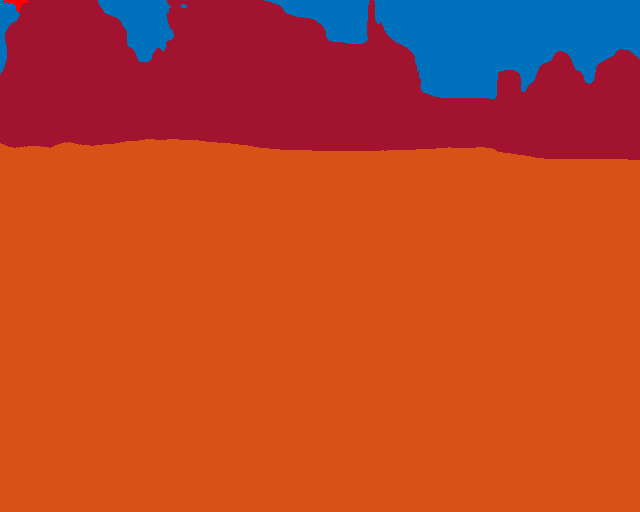

prev=293,i=294
iteration running is 294
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


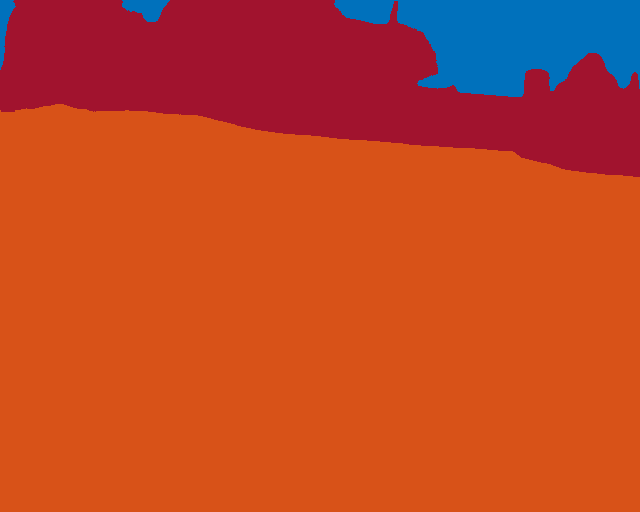

this is the raw image
this is the ground truth mask
this is the colored inferred image


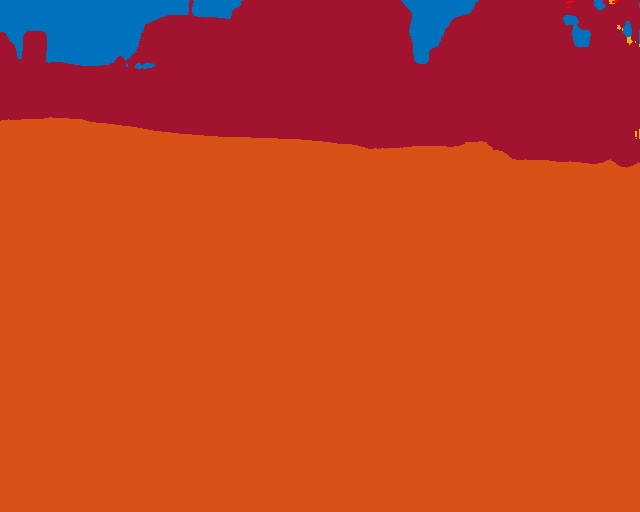

prev=295,i=296
iteration running is 296
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


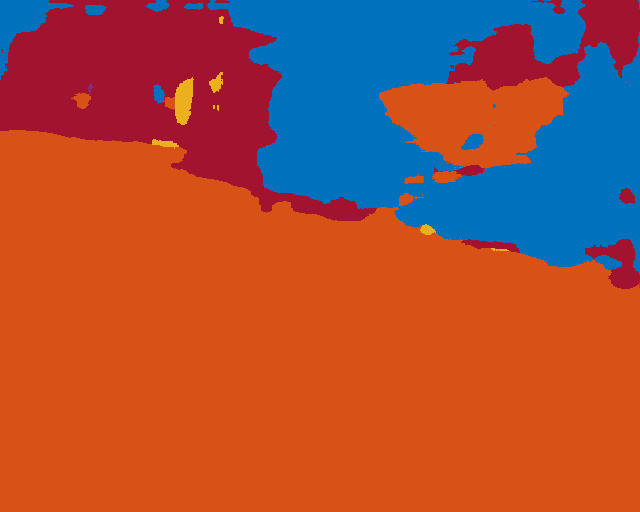

this is the raw image
this is the ground truth mask
this is the colored inferred image


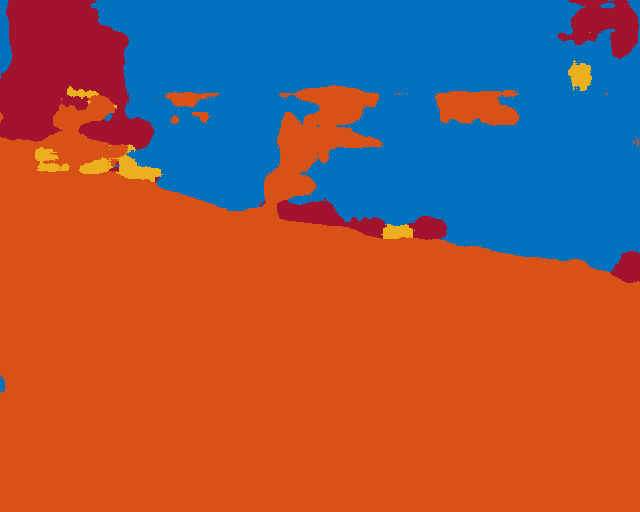

prev=297,i=298
iteration running is 298
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


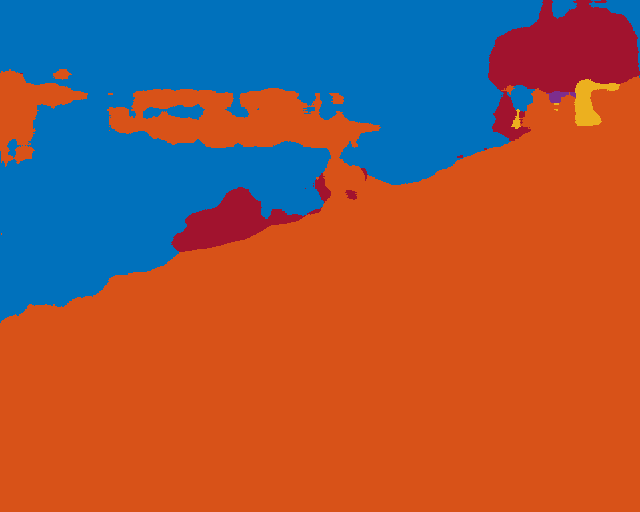

this is the raw image
this is the ground truth mask
this is the colored inferred image


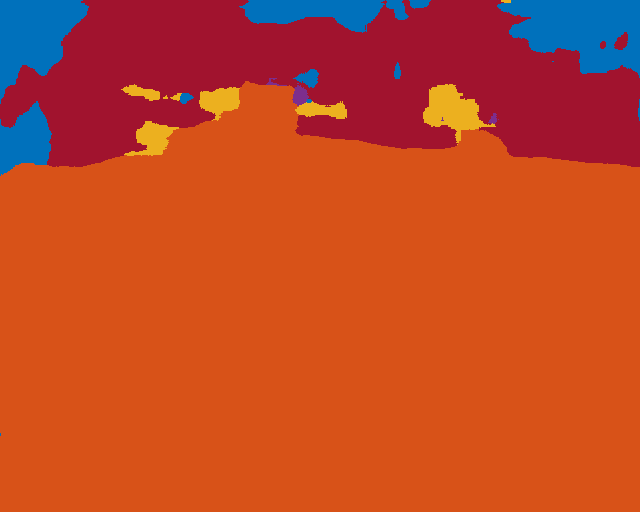

prev=299,i=300
iteration running is 300
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


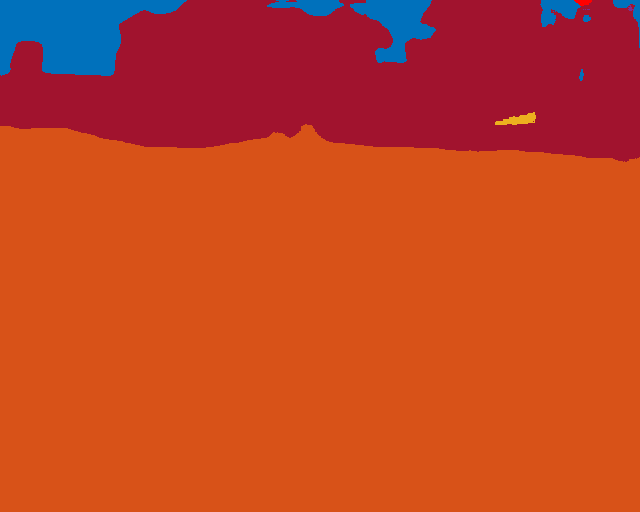

this is the raw image
this is the ground truth mask
this is the colored inferred image


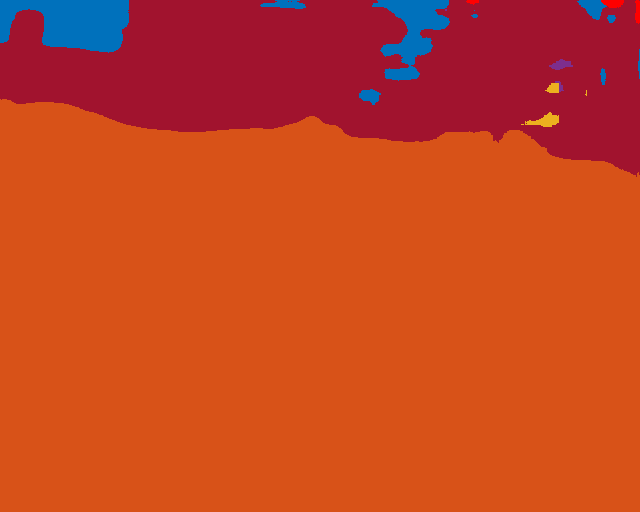

prev=301,i=302
iteration running is 302
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


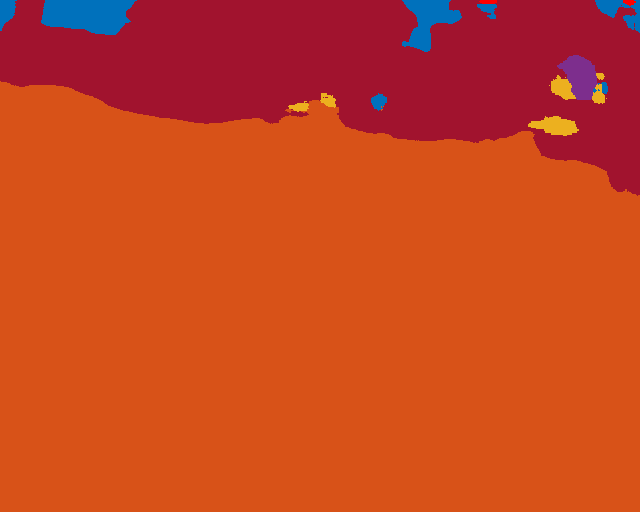

this is the raw image
this is the ground truth mask
this is the colored inferred image


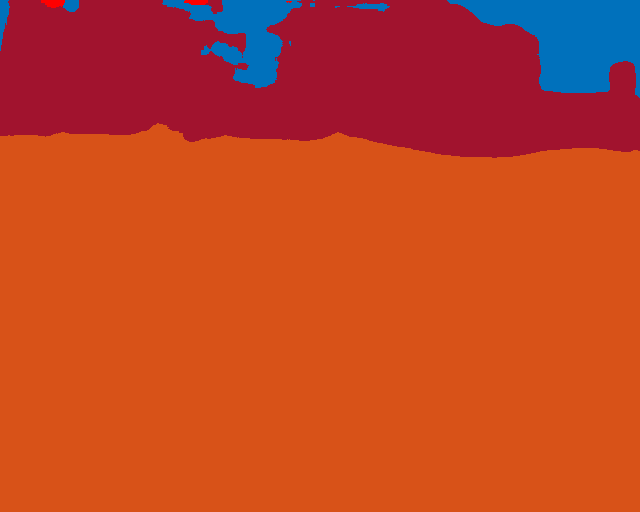

prev=303,i=304
iteration running is 304
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


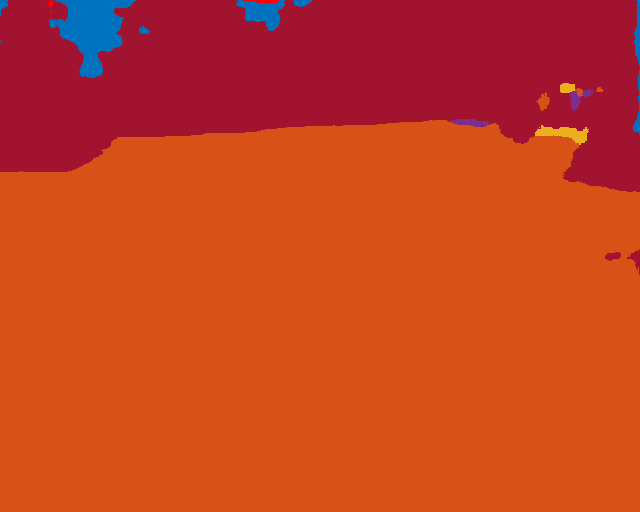

this is the raw image
this is the ground truth mask
this is the colored inferred image


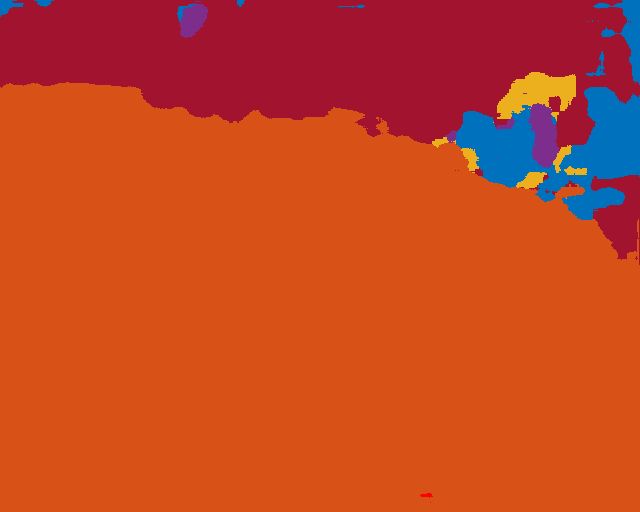

prev=305,i=306
iteration running is 306
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


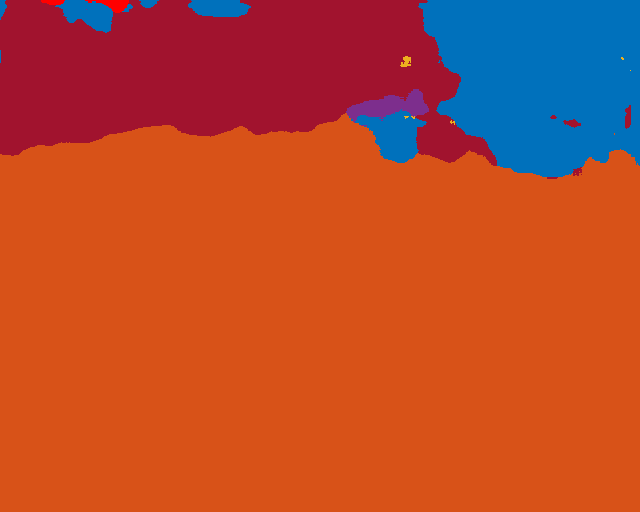

this is the raw image
this is the ground truth mask
this is the colored inferred image


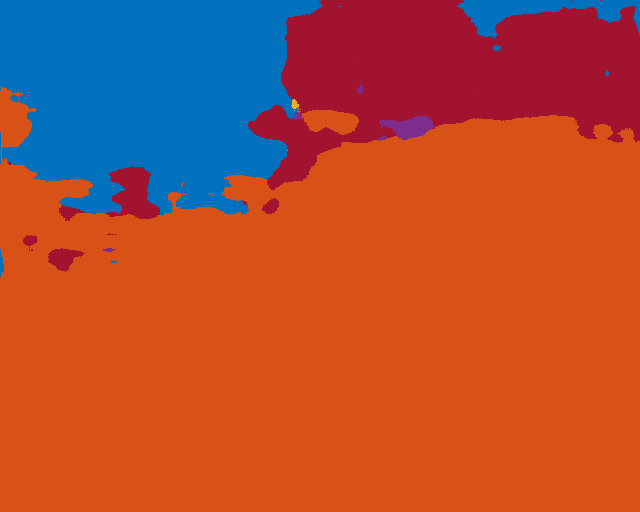

prev=307,i=308
iteration running is 308
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


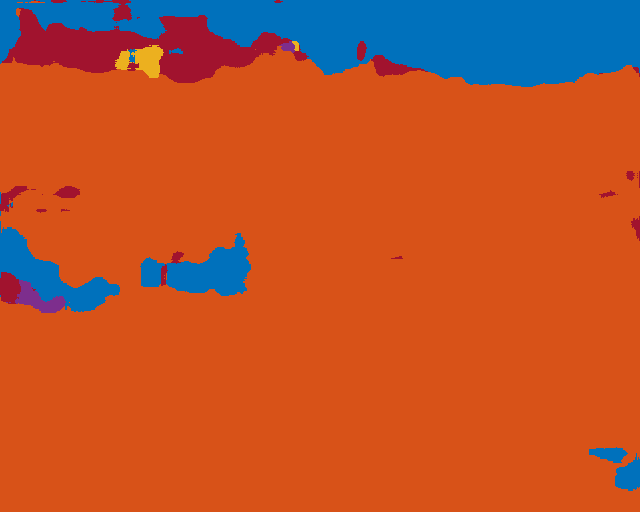

this is the raw image
this is the ground truth mask
this is the colored inferred image


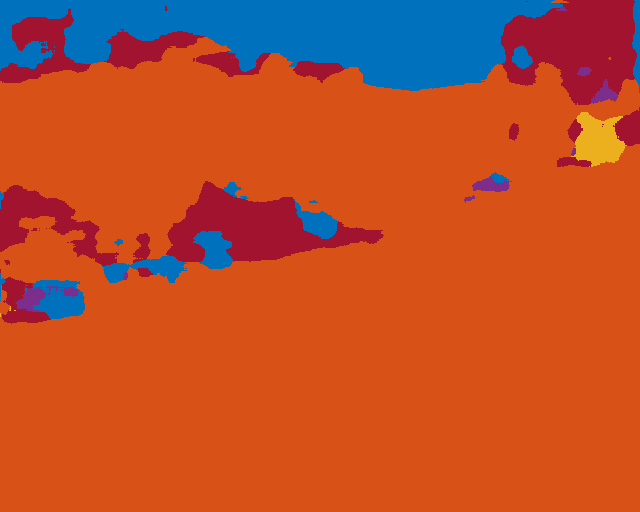

prev=309,i=310
iteration running is 310
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


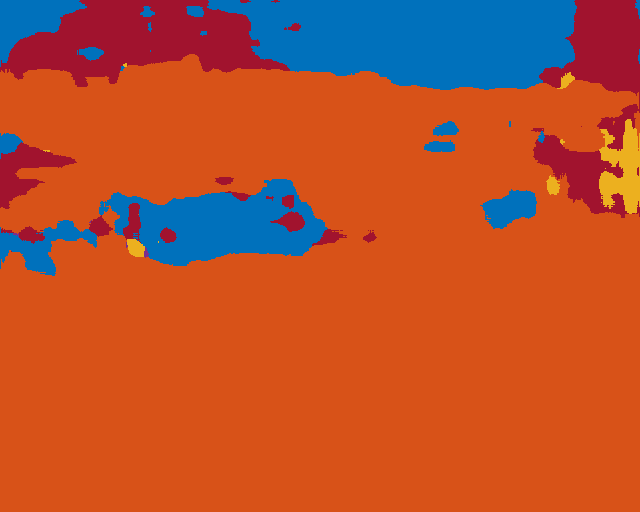

this is the raw image
this is the ground truth mask
this is the colored inferred image


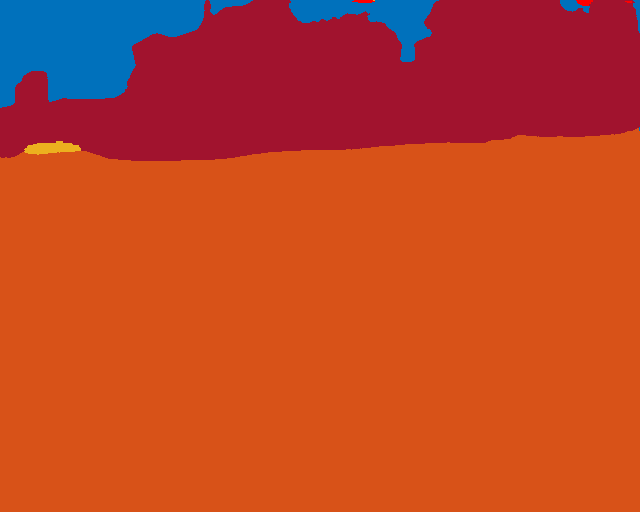

prev=311,i=312
iteration running is 312
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


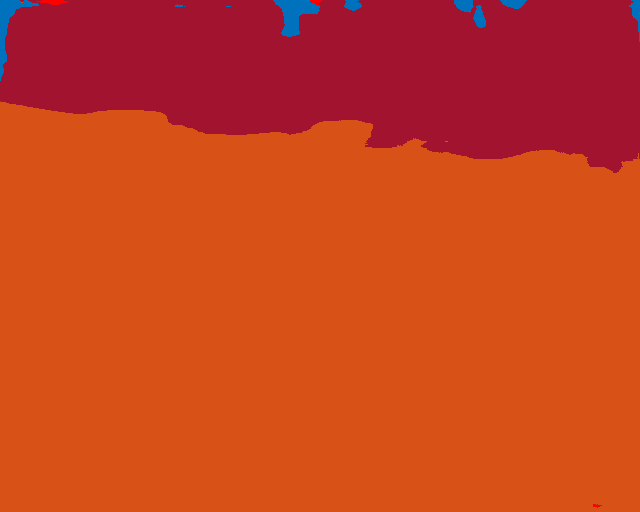

this is the raw image
this is the ground truth mask
this is the colored inferred image


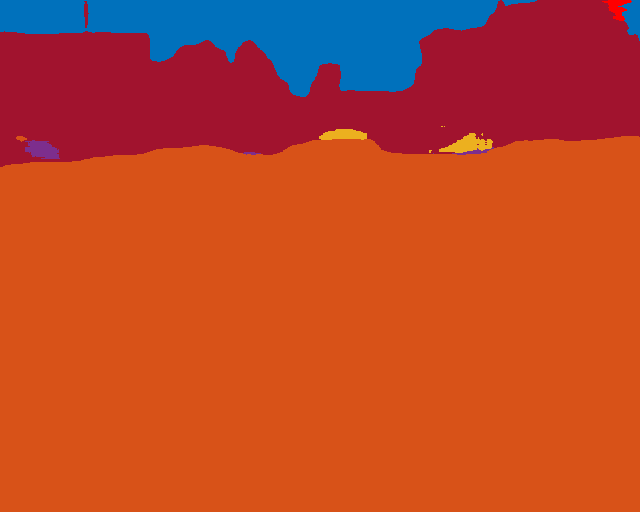

prev=313,i=314
iteration running is 314
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


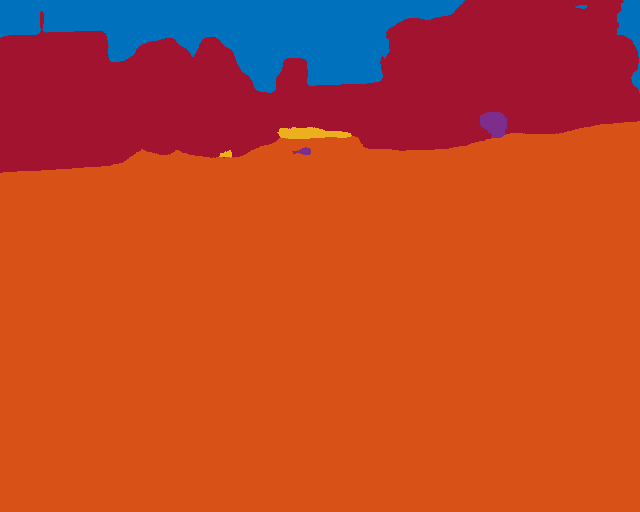

this is the raw image
this is the ground truth mask
this is the colored inferred image


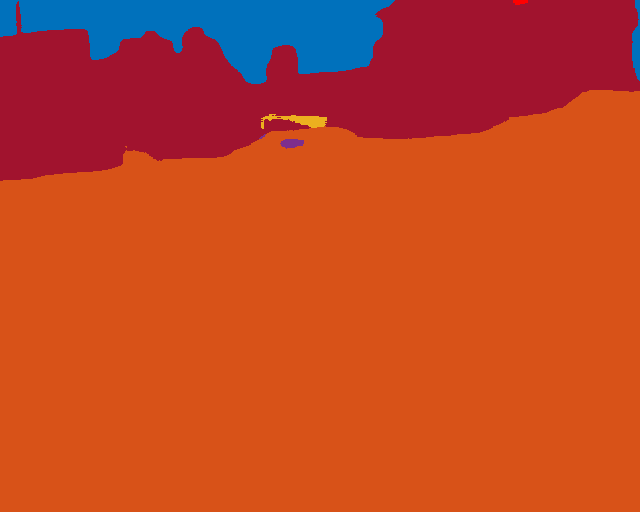

prev=315,i=316
iteration running is 316
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


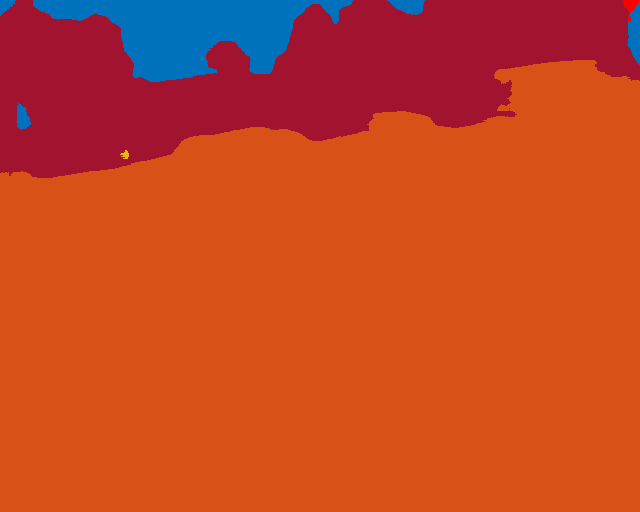

this is the raw image
this is the ground truth mask
this is the colored inferred image


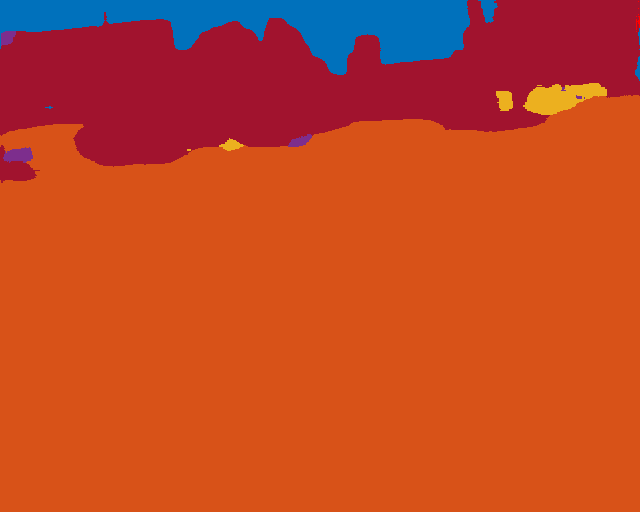

prev=317,i=318
iteration running is 318
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


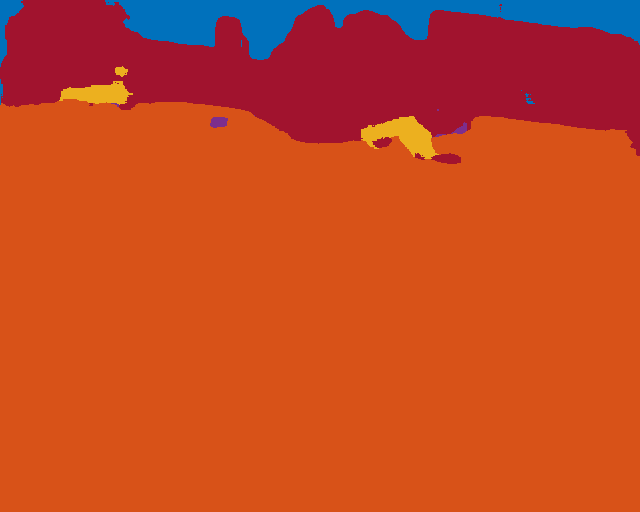

this is the raw image
this is the ground truth mask
this is the colored inferred image


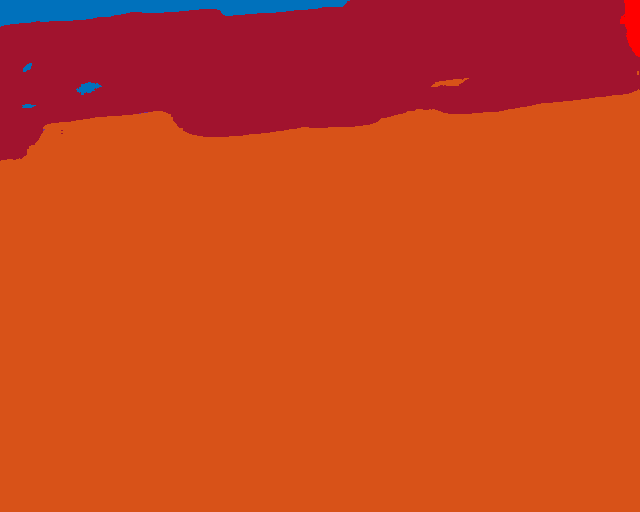

prev=319,i=320
iteration running is 320
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


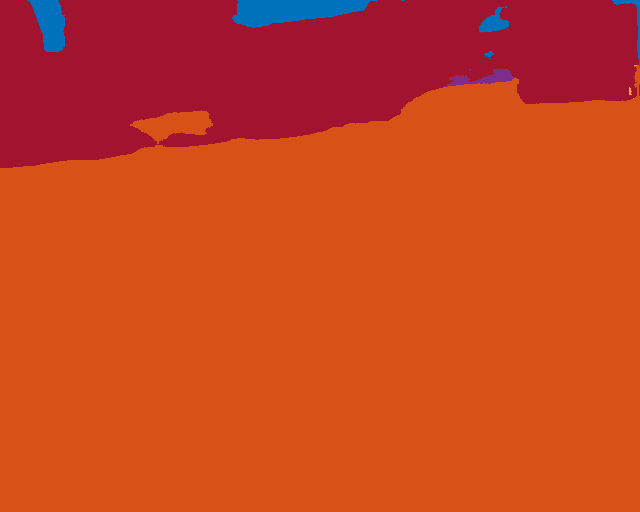

this is the raw image
this is the ground truth mask
this is the colored inferred image


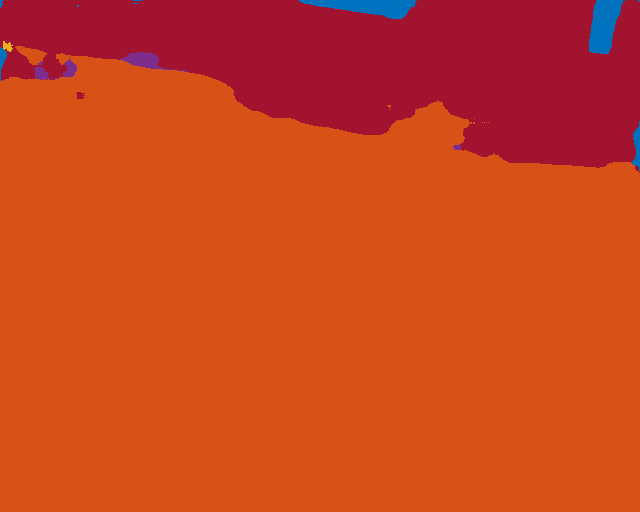

prev=321,i=322
iteration running is 322
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


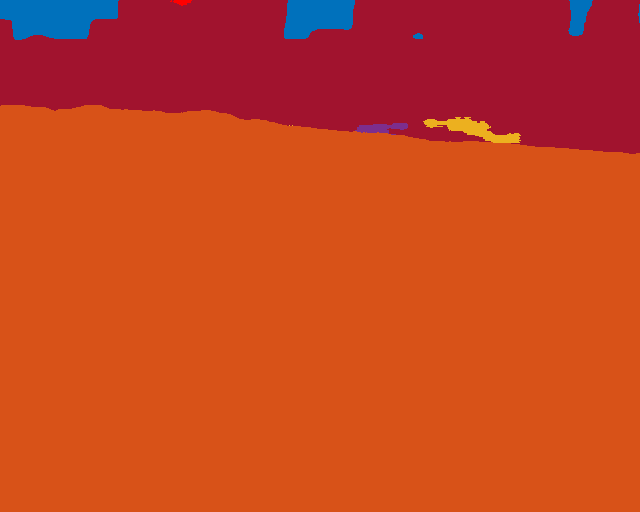

this is the raw image
this is the ground truth mask
this is the colored inferred image


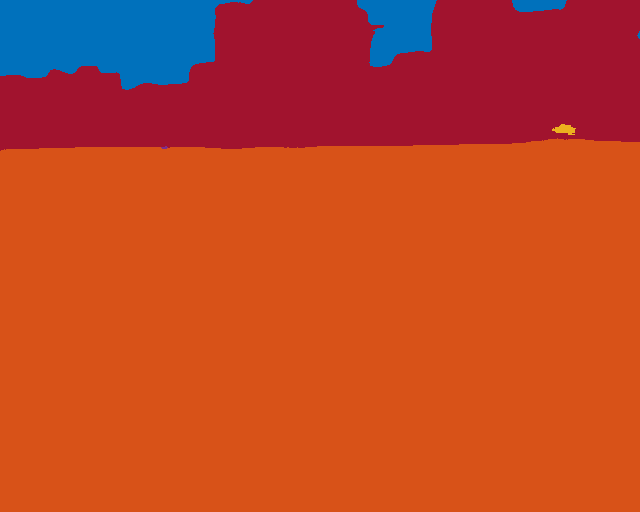

prev=323,i=324
iteration running is 324
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


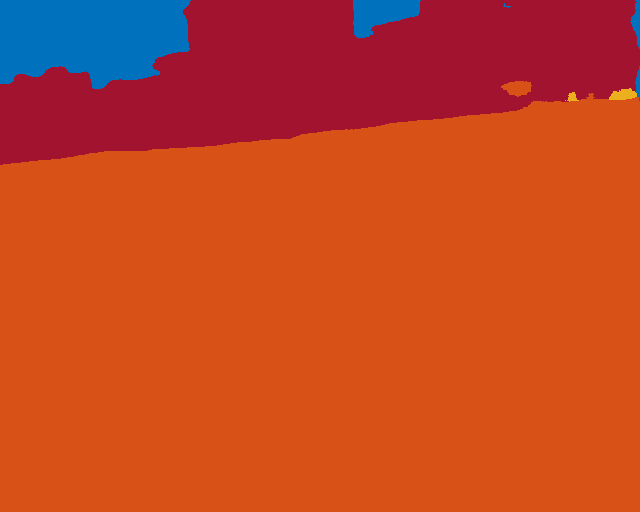

this is the raw image
this is the ground truth mask
this is the colored inferred image


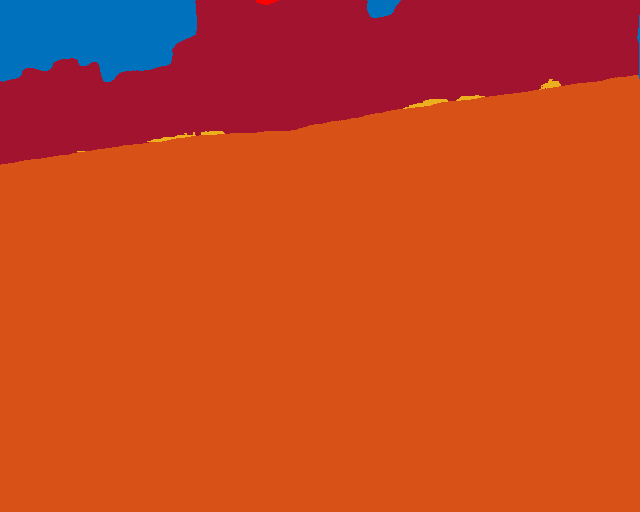

prev=325,i=326
iteration running is 326
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


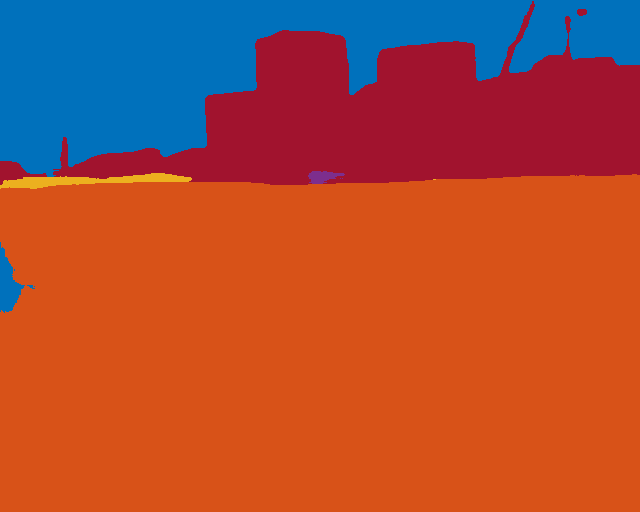

this is the raw image
this is the ground truth mask
this is the colored inferred image


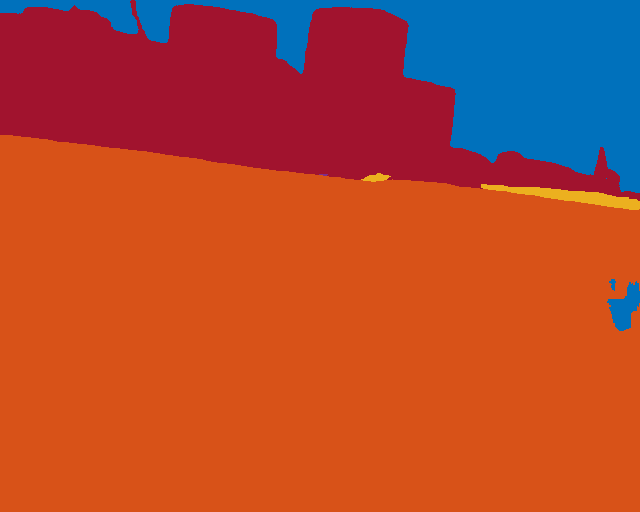

prev=327,i=328
iteration running is 328
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


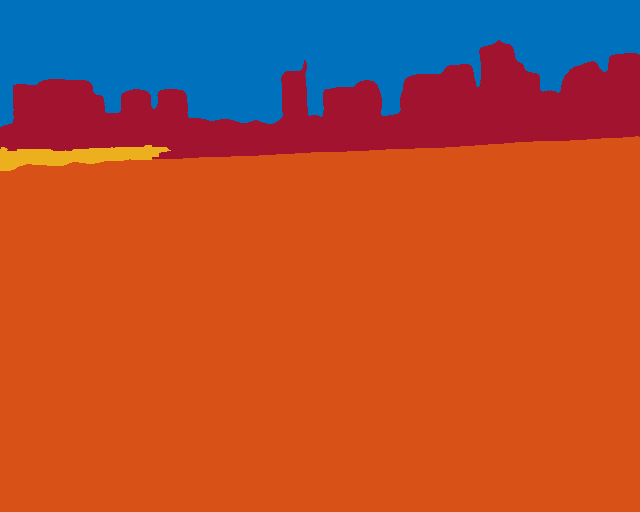

this is the raw image
this is the ground truth mask
this is the colored inferred image


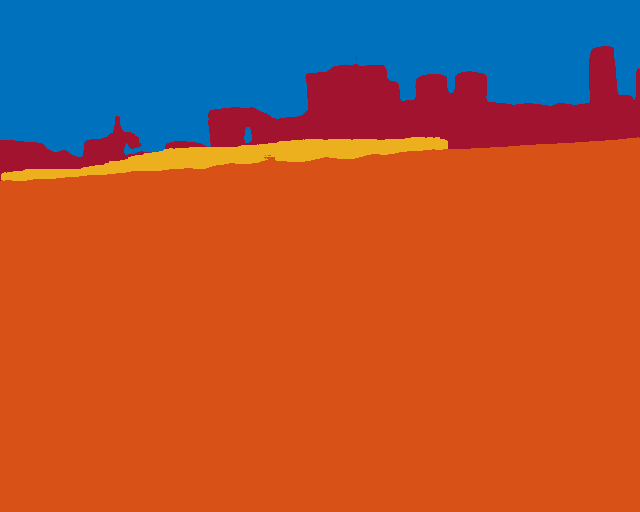

prev=329,i=330
iteration running is 330
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


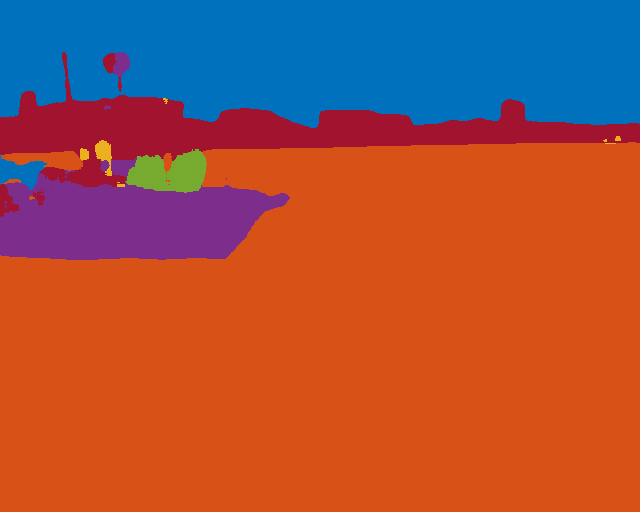

this is the raw image
this is the ground truth mask
this is the colored inferred image


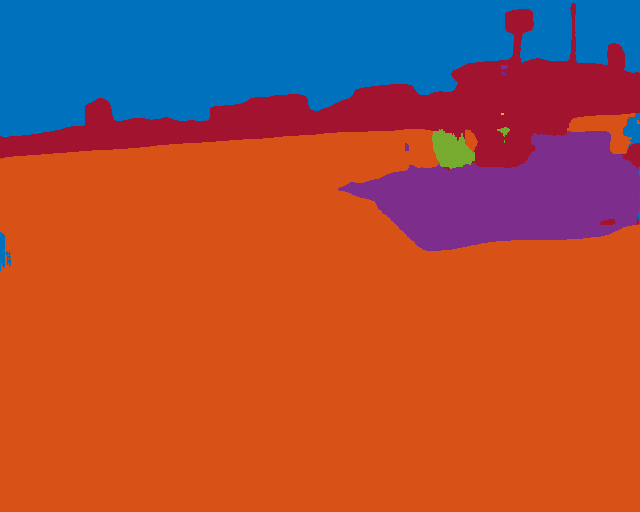

prev=331,i=332
iteration running is 332
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


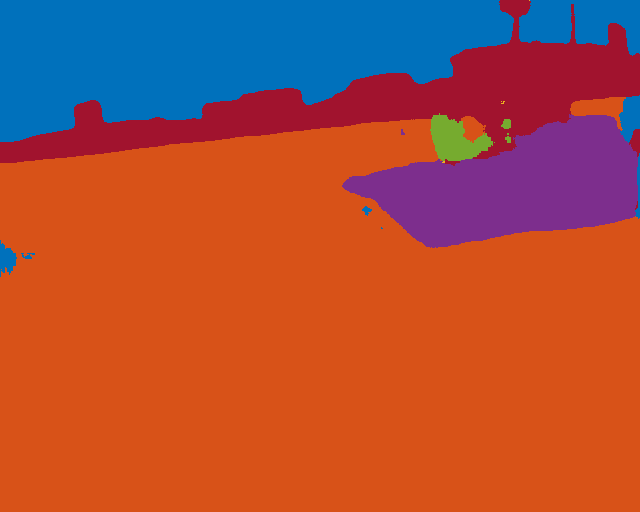

this is the raw image
this is the ground truth mask
this is the colored inferred image


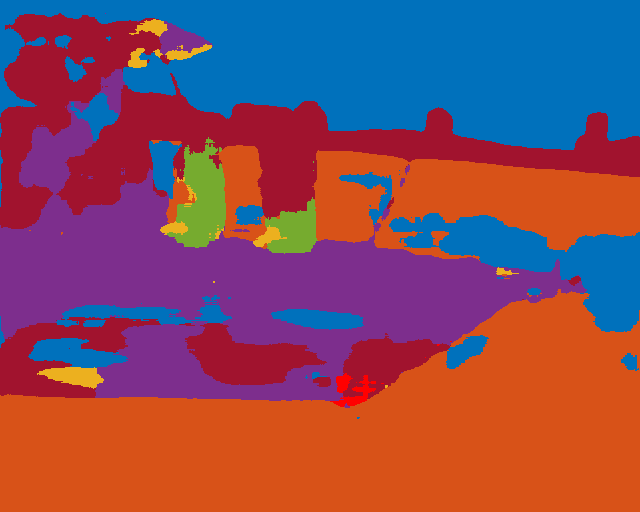

prev=333,i=334
iteration running is 334
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


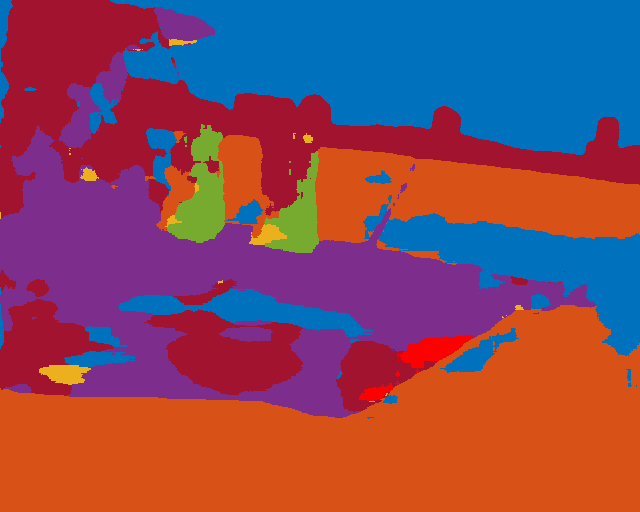

this is the raw image
this is the ground truth mask
this is the colored inferred image


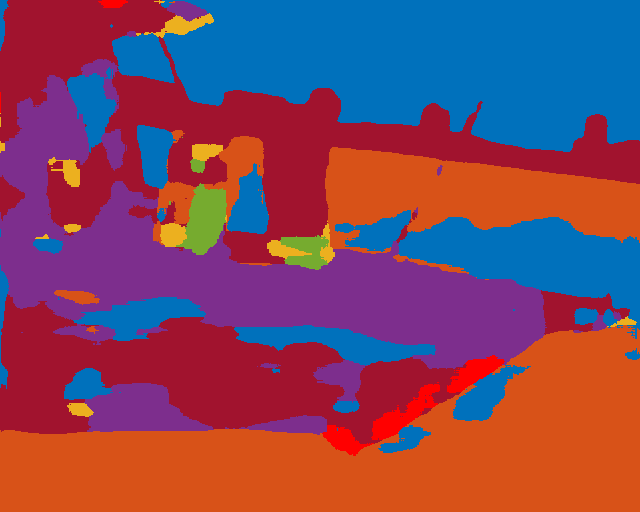

prev=335,i=336
iteration running is 336
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


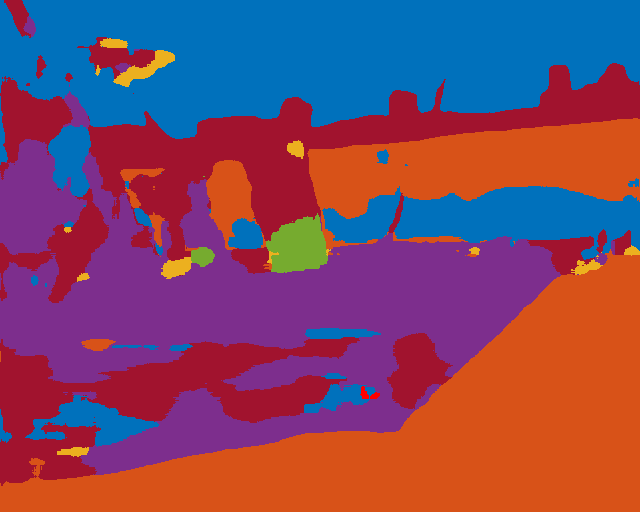

this is the raw image
this is the ground truth mask
this is the colored inferred image


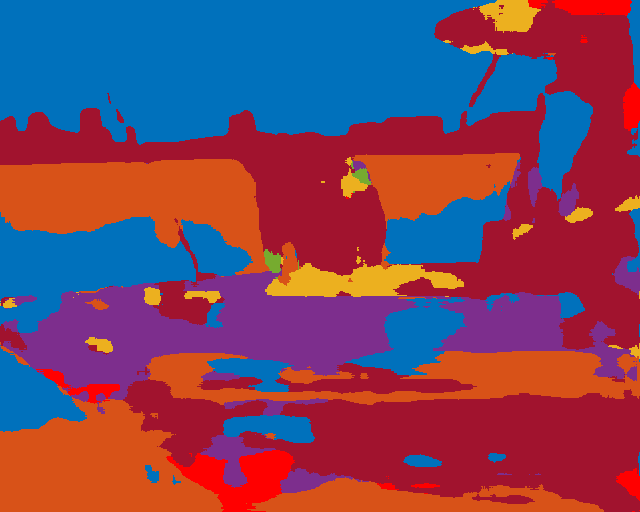

prev=337,i=338
iteration running is 338
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


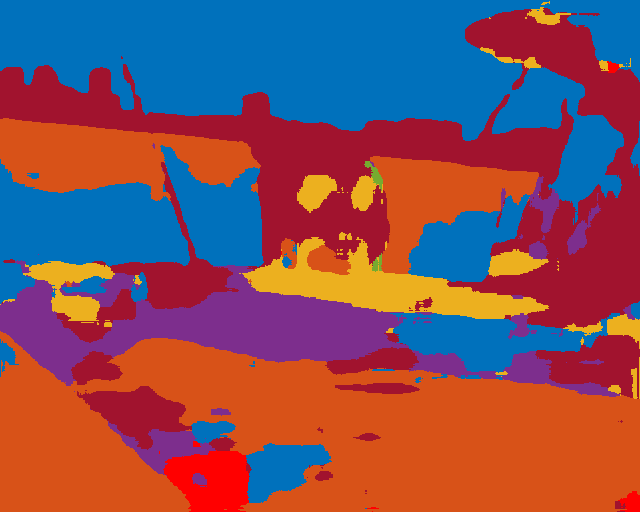

this is the raw image
this is the ground truth mask
this is the colored inferred image


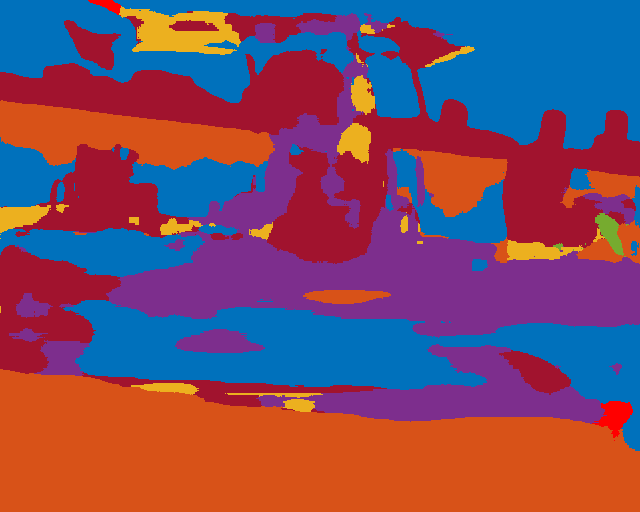

prev=339,i=340
iteration running is 340
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


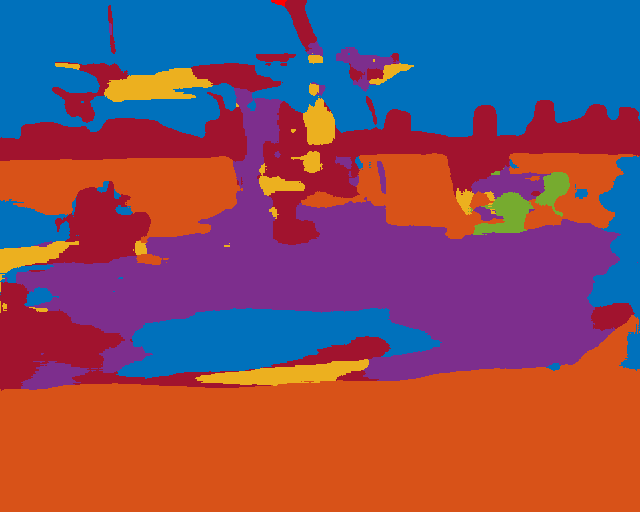

this is the raw image
this is the ground truth mask
this is the colored inferred image


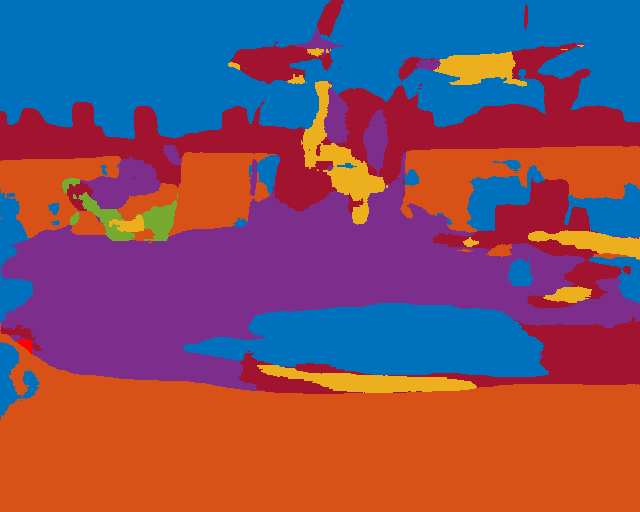

prev=341,i=342
iteration running is 342
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


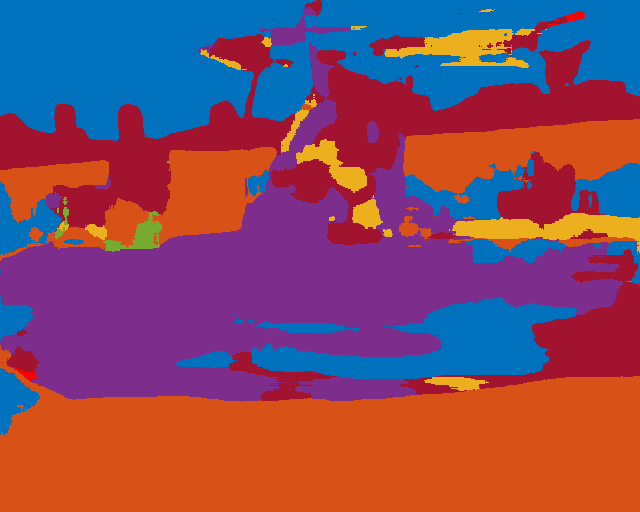

this is the raw image
this is the ground truth mask
this is the colored inferred image


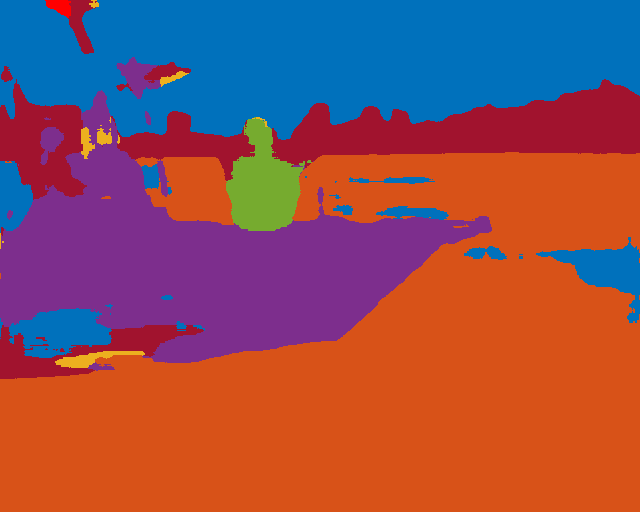

prev=343,i=344
iteration running is 344
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


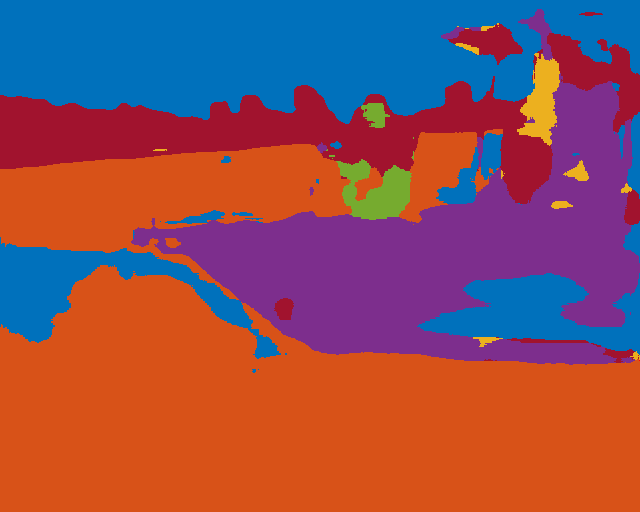

this is the raw image
this is the ground truth mask
this is the colored inferred image


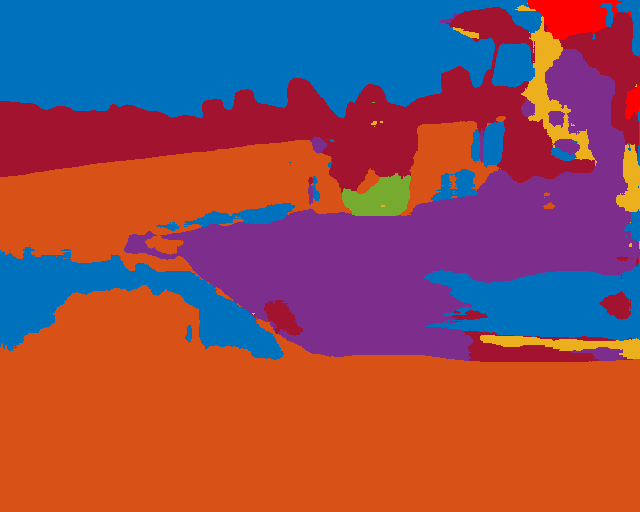

prev=345,i=346
iteration running is 346
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


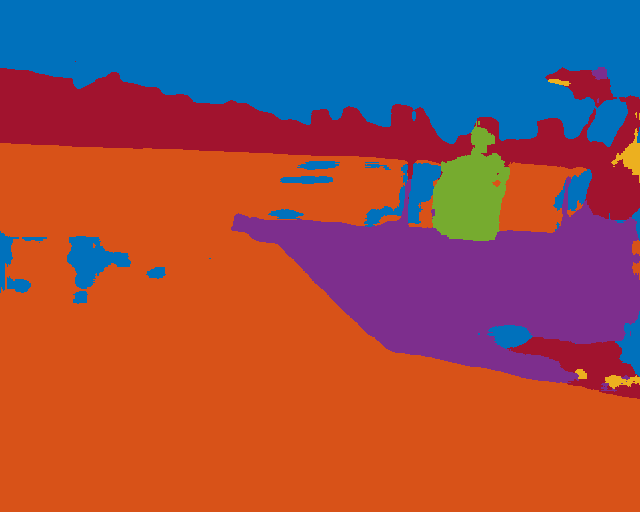

this is the raw image
this is the ground truth mask
this is the colored inferred image


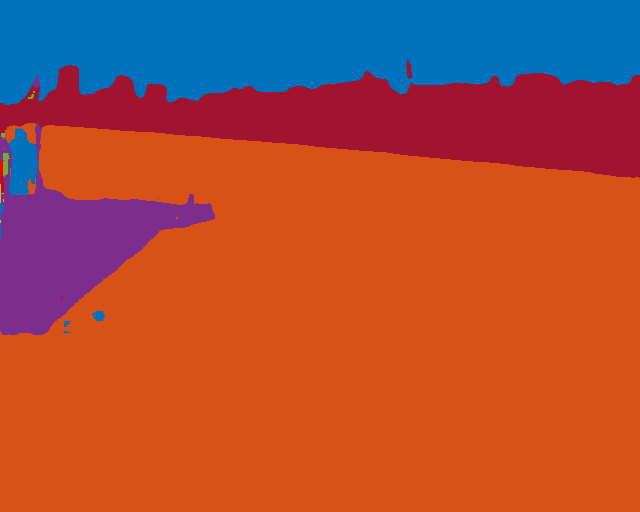

prev=347,i=348
iteration running is 348
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


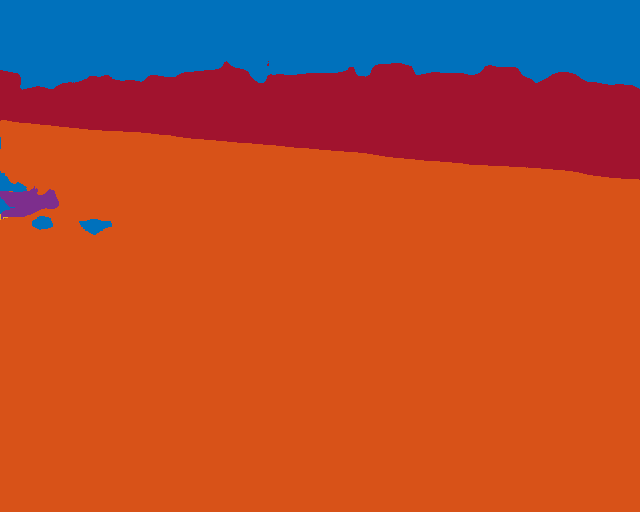

this is the raw image
this is the ground truth mask
this is the colored inferred image


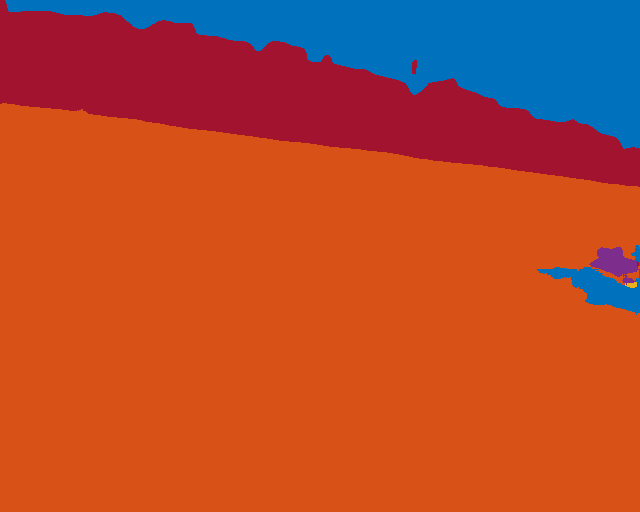

prev=349,i=350
iteration running is 350
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


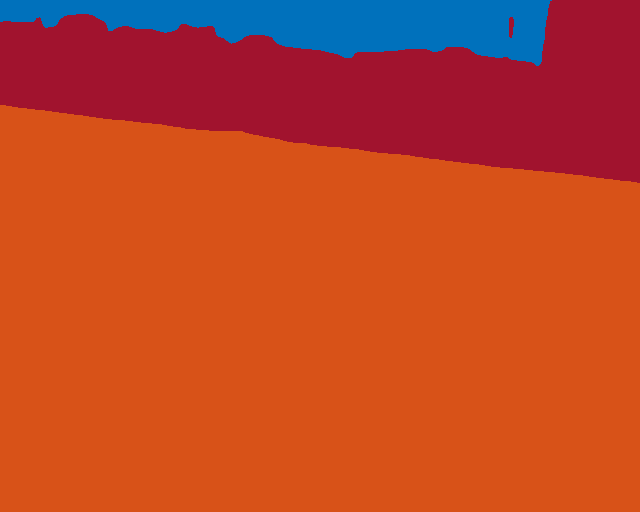

this is the raw image
this is the ground truth mask
this is the colored inferred image


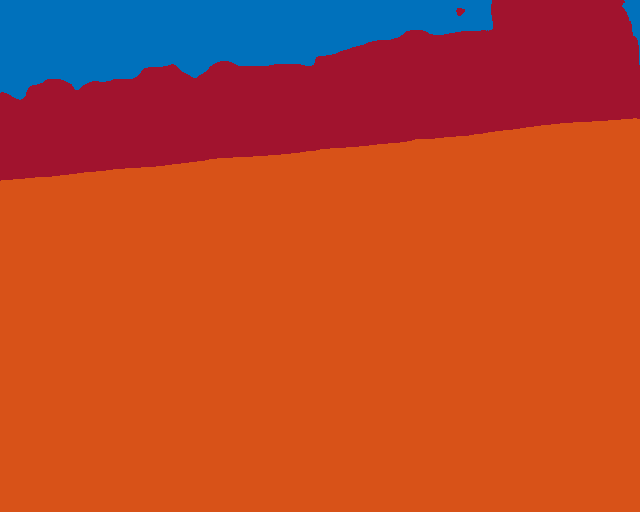

prev=351,i=352
iteration running is 352
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


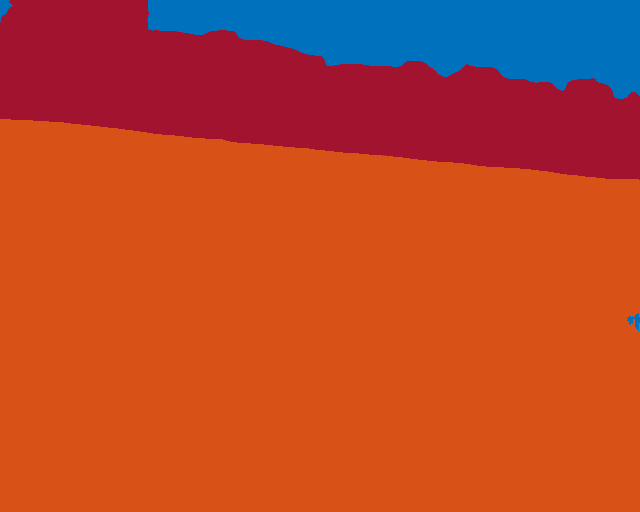

this is the raw image
this is the ground truth mask
this is the colored inferred image


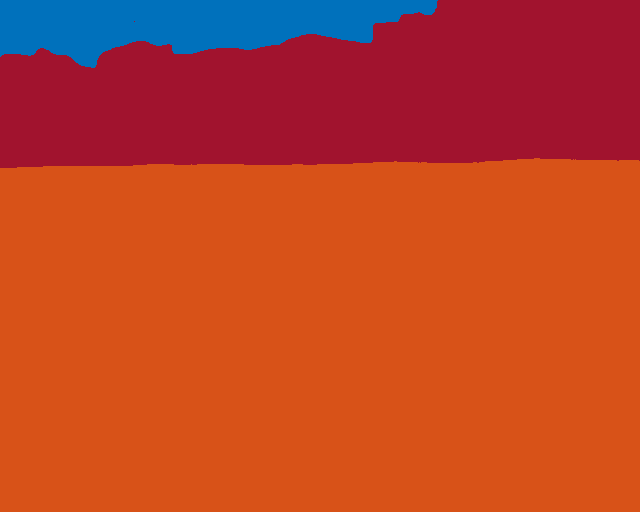

prev=353,i=354
iteration running is 354
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


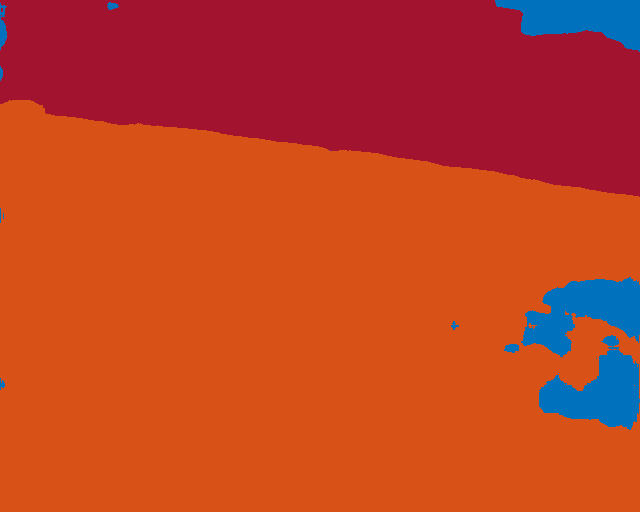

this is the raw image
this is the ground truth mask
this is the colored inferred image


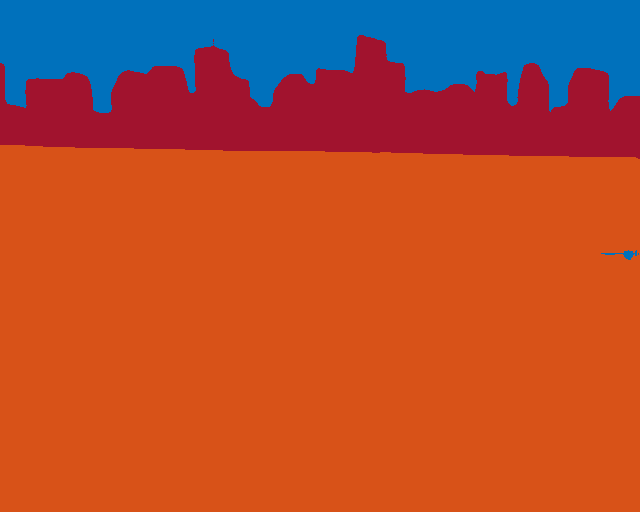

prev=355,i=356
iteration running is 356
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


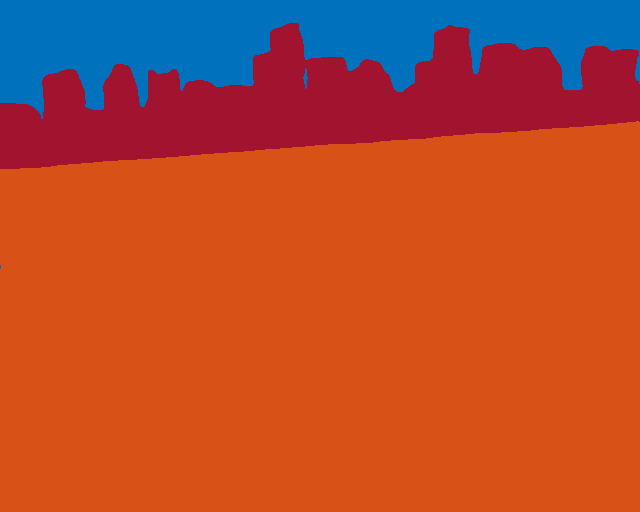

this is the raw image
this is the ground truth mask
this is the colored inferred image


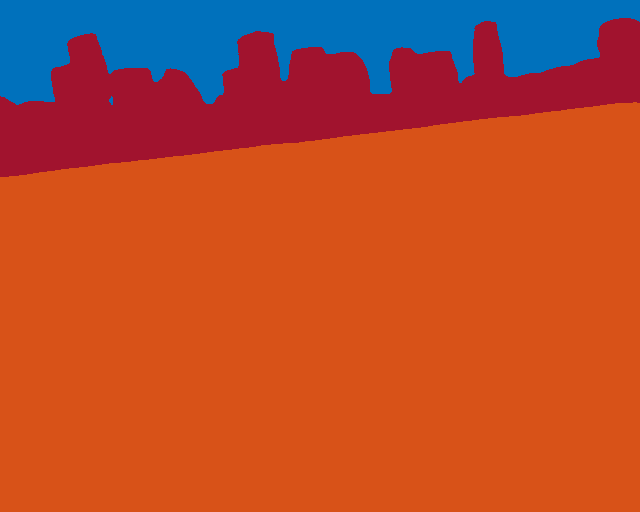

prev=357,i=358
iteration running is 358
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


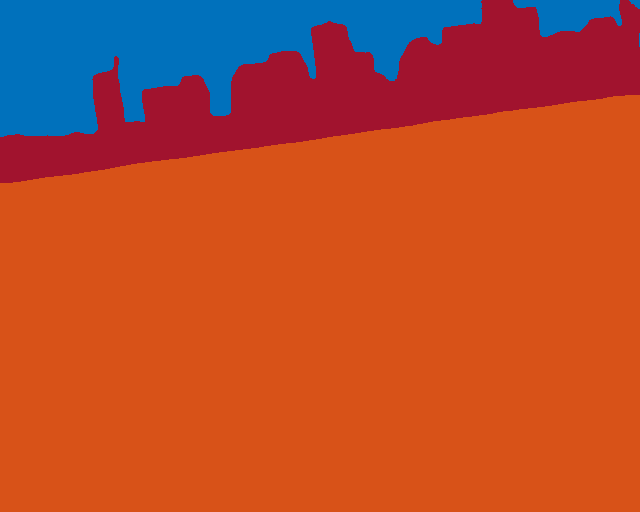

this is the raw image
this is the ground truth mask
this is the colored inferred image


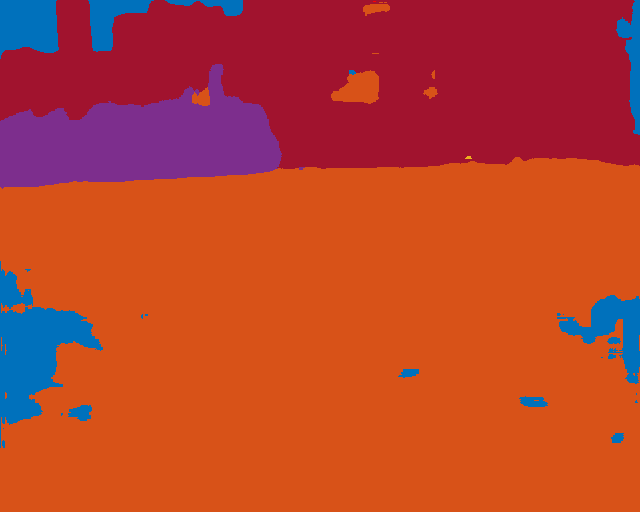

prev=359,i=360
iteration running is 360
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


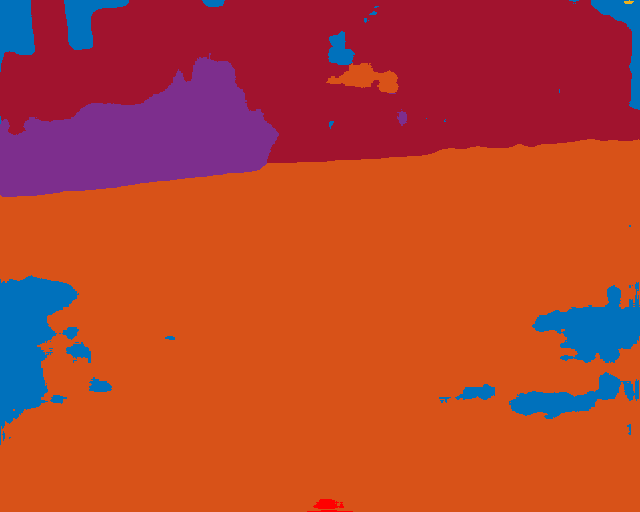

this is the raw image
this is the ground truth mask
this is the colored inferred image


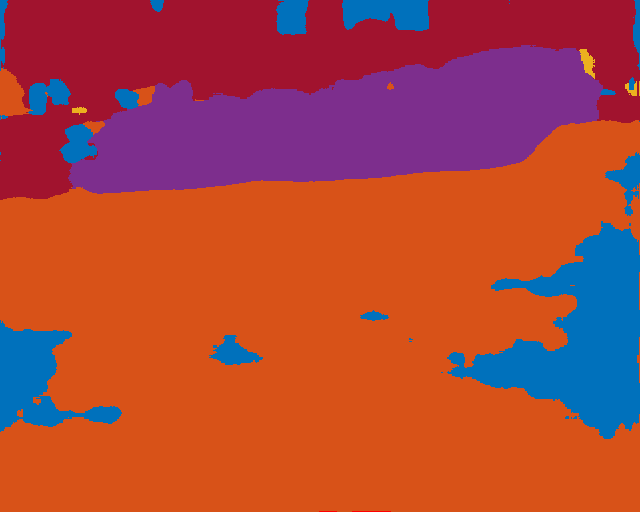

prev=361,i=362
iteration running is 362
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


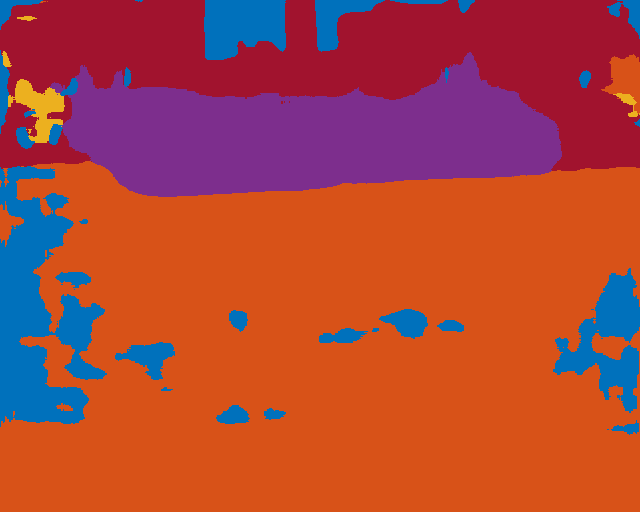

this is the raw image
this is the ground truth mask
this is the colored inferred image


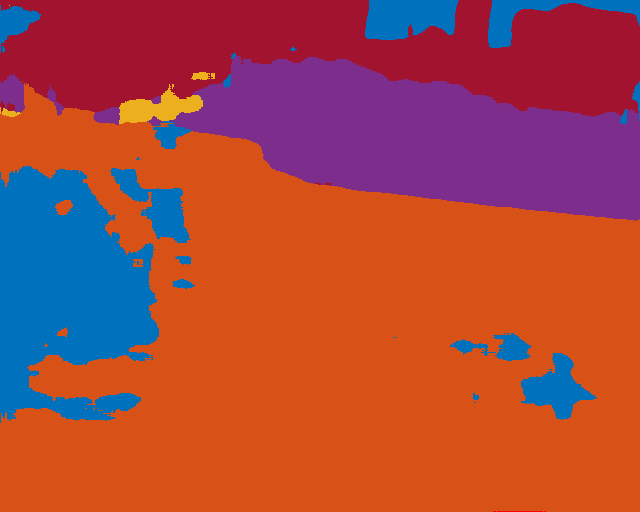

prev=363,i=364
iteration running is 364
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


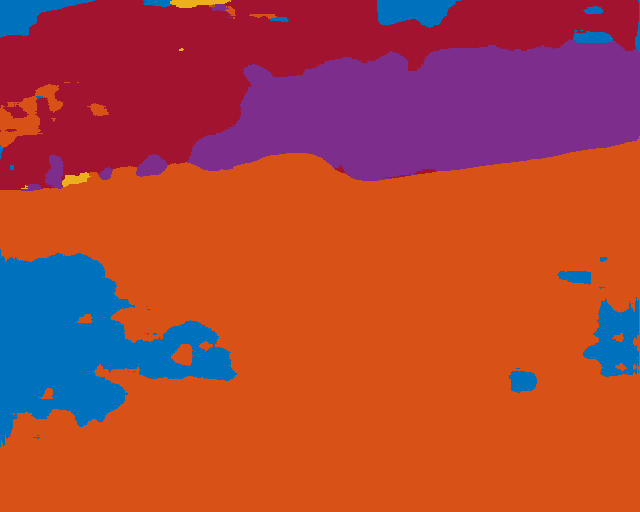

this is the raw image
this is the ground truth mask
this is the colored inferred image


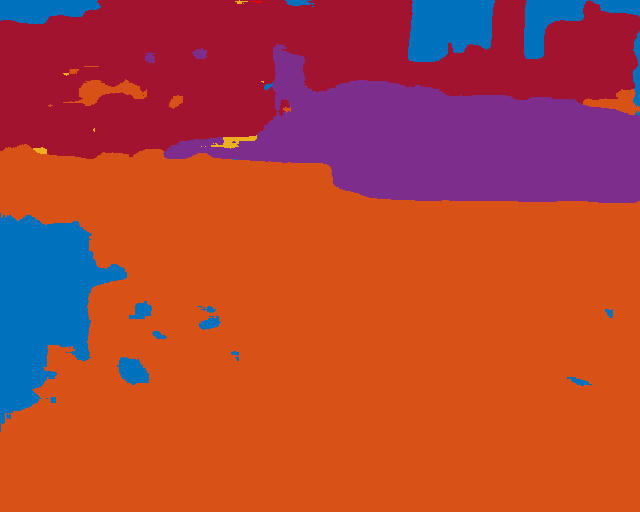

prev=365,i=366
iteration running is 366
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


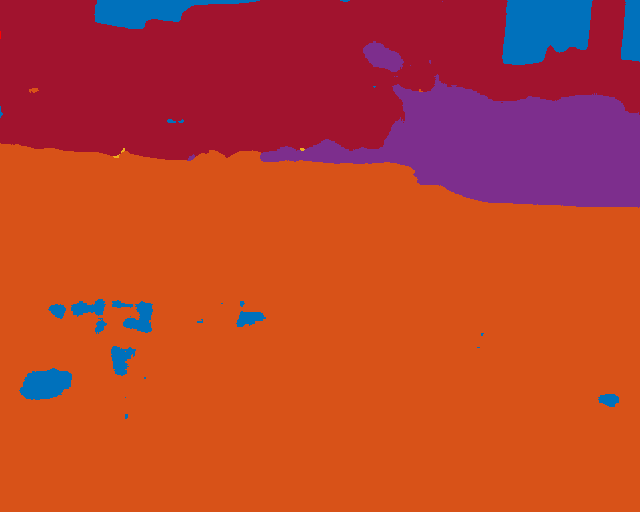

this is the raw image
this is the ground truth mask
this is the colored inferred image


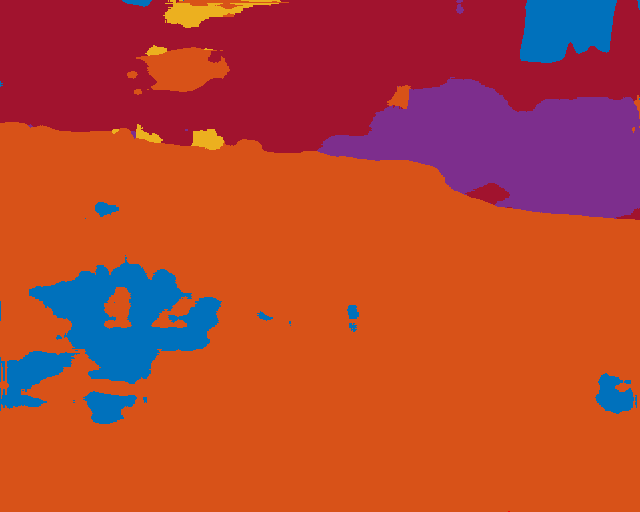

prev=367,i=368
iteration running is 368
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


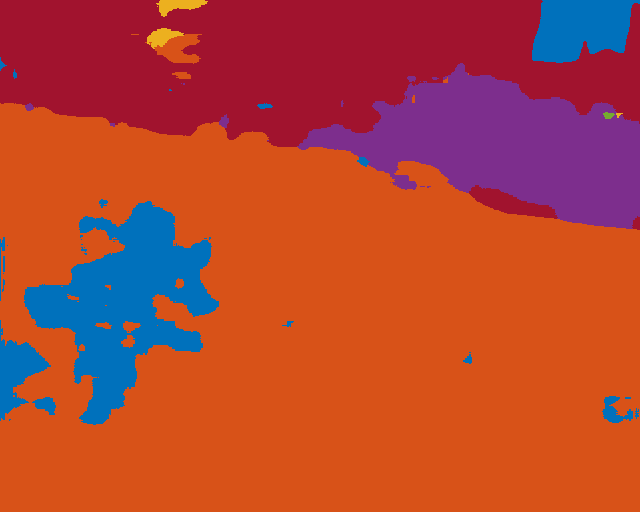

this is the raw image
this is the ground truth mask
this is the colored inferred image


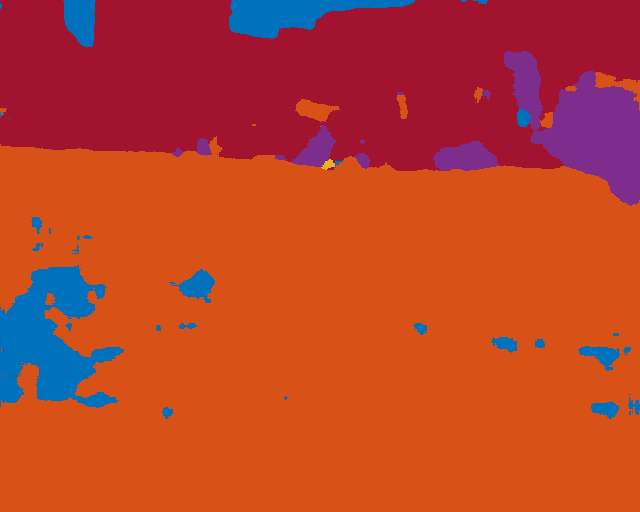

prev=369,i=370
iteration running is 370
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


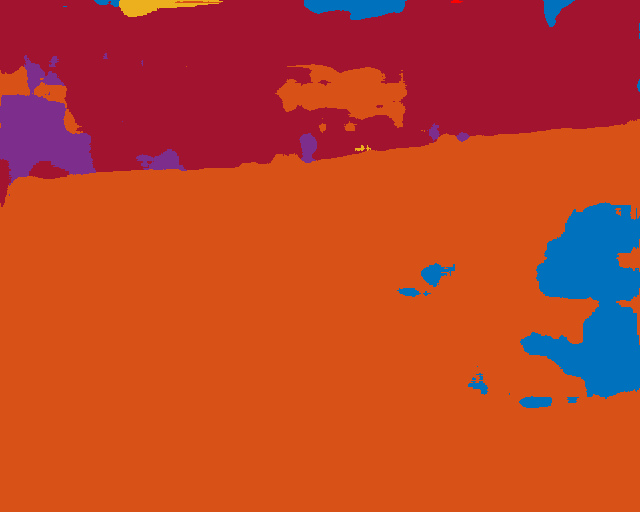

this is the raw image
this is the ground truth mask
this is the colored inferred image


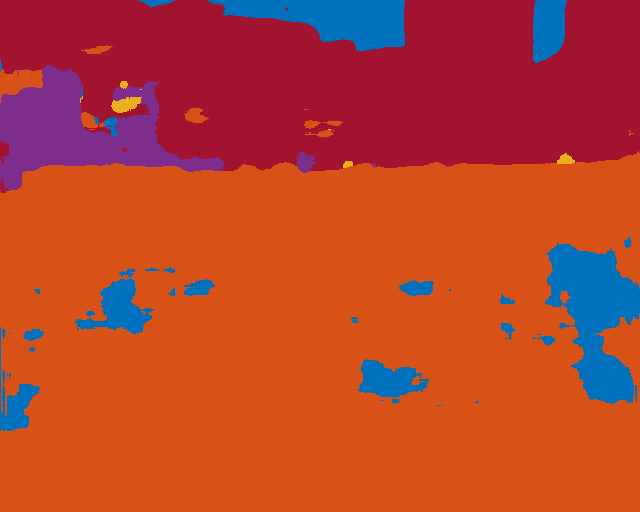

prev=371,i=372
iteration running is 372
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


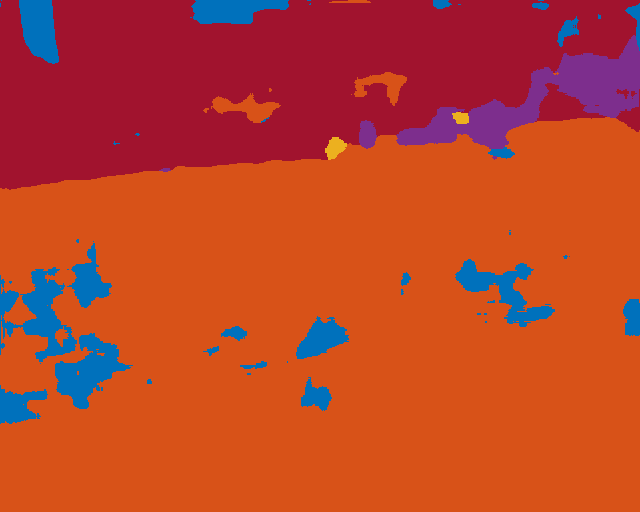

this is the raw image
this is the ground truth mask
this is the colored inferred image


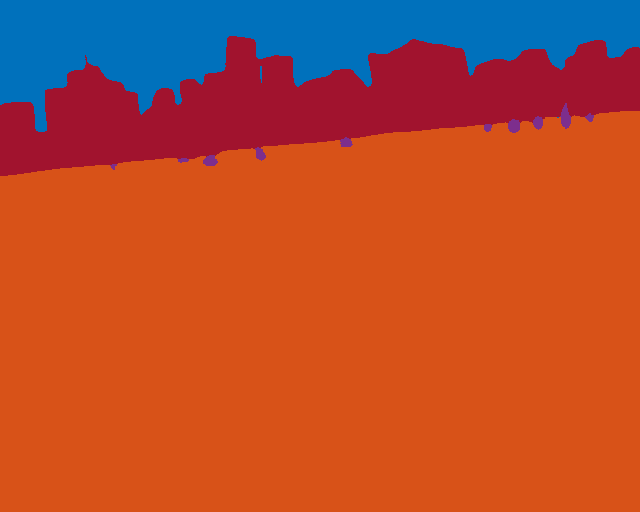

prev=373,i=374
iteration running is 374
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


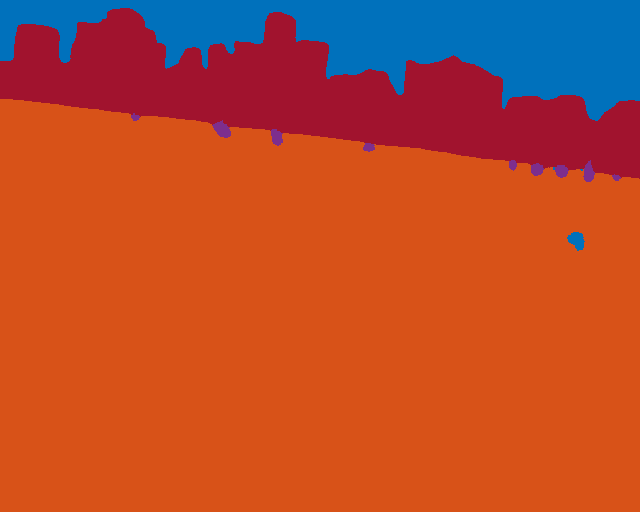

this is the raw image
this is the ground truth mask
this is the colored inferred image


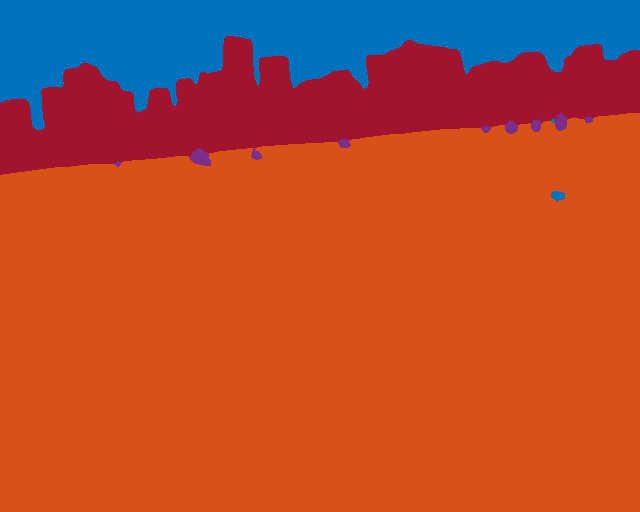

prev=375,i=376
iteration running is 376
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


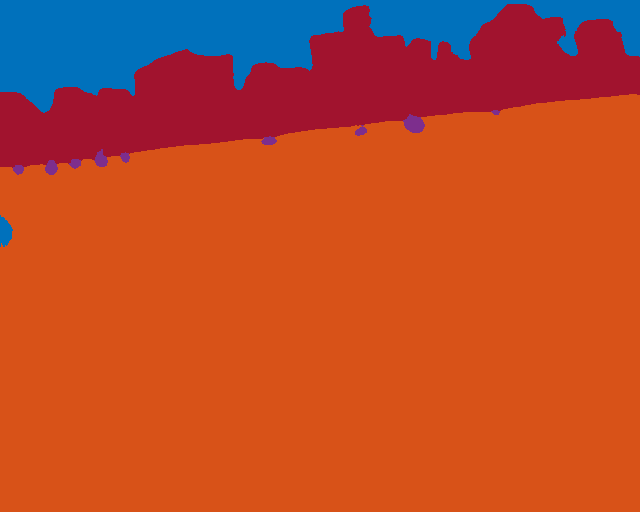

this is the raw image
this is the ground truth mask
this is the colored inferred image


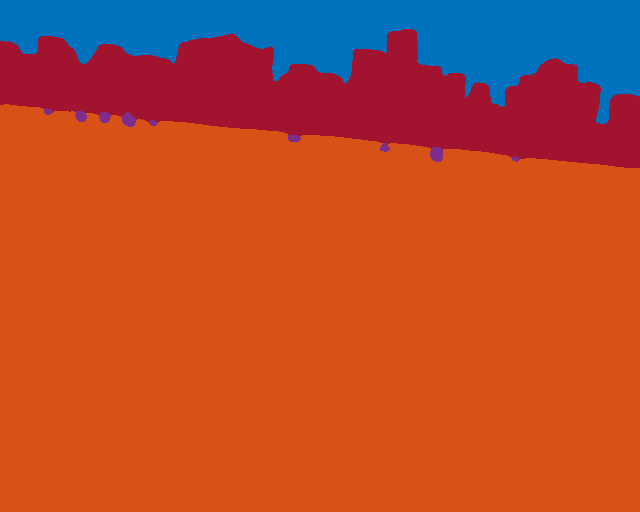

prev=377,i=378
iteration running is 378
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


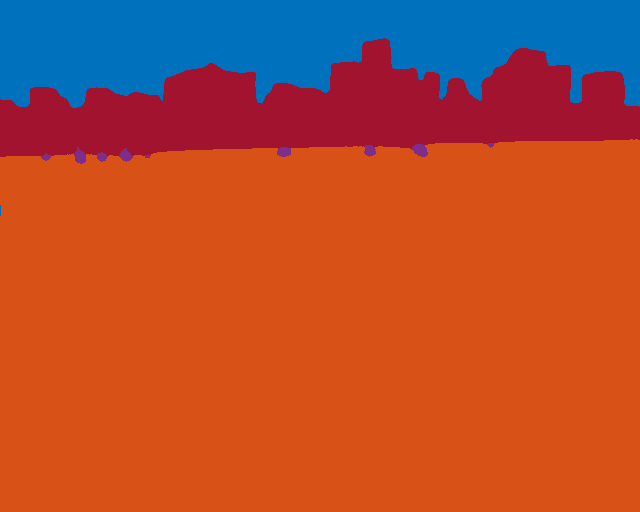

this is the raw image
this is the ground truth mask
this is the colored inferred image


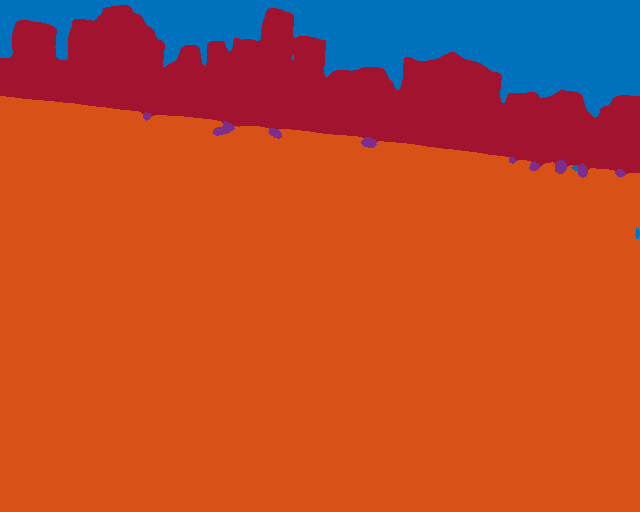

prev=379,i=380
iteration running is 380
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


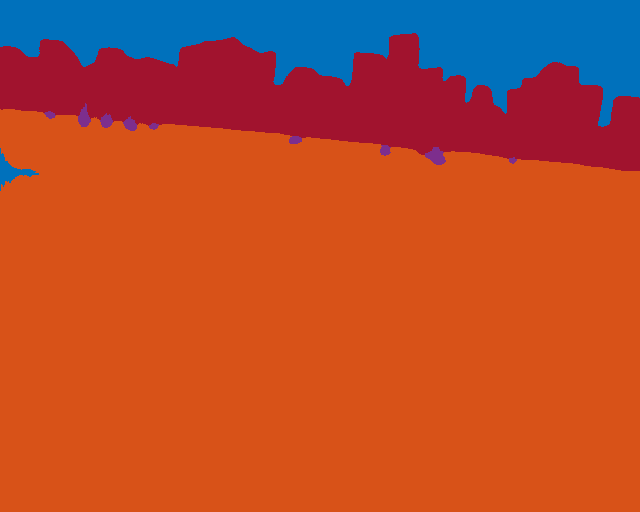

this is the raw image
this is the ground truth mask
this is the colored inferred image


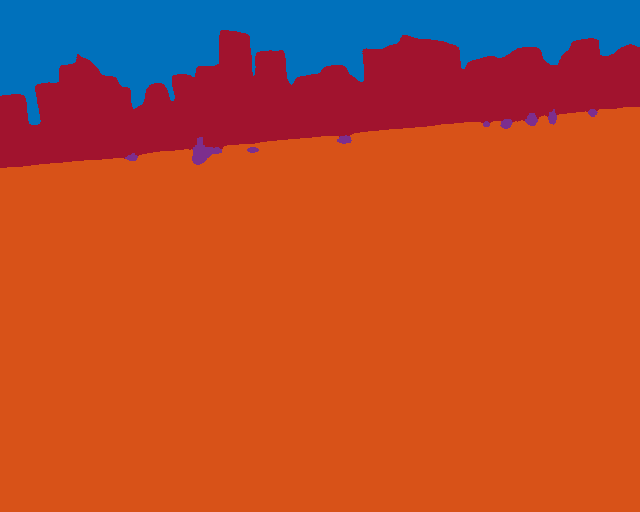

prev=381,i=382
iteration running is 382
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


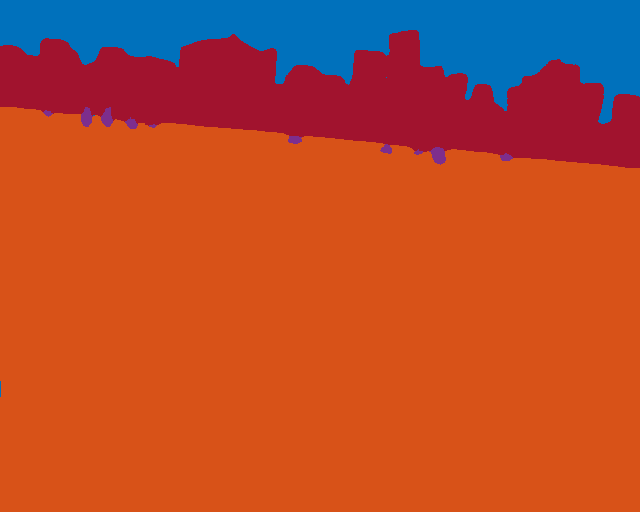

this is the raw image
this is the ground truth mask
this is the colored inferred image


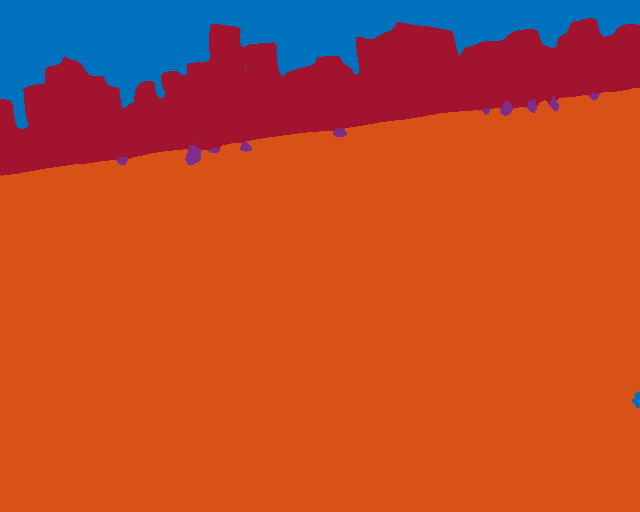

prev=383,i=384
iteration running is 384
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


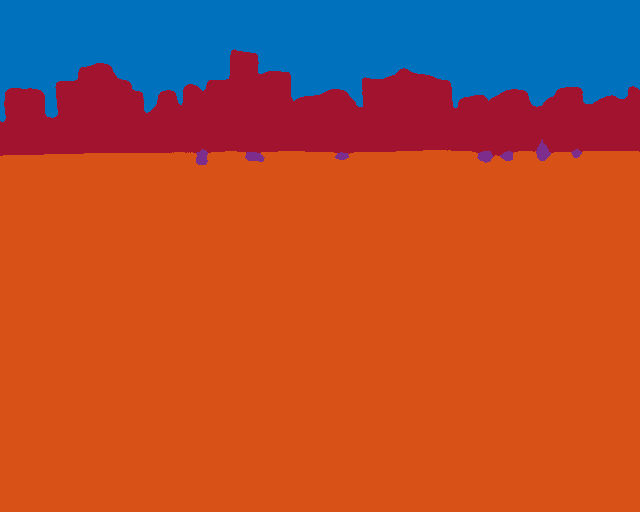

this is the raw image
this is the ground truth mask
this is the colored inferred image


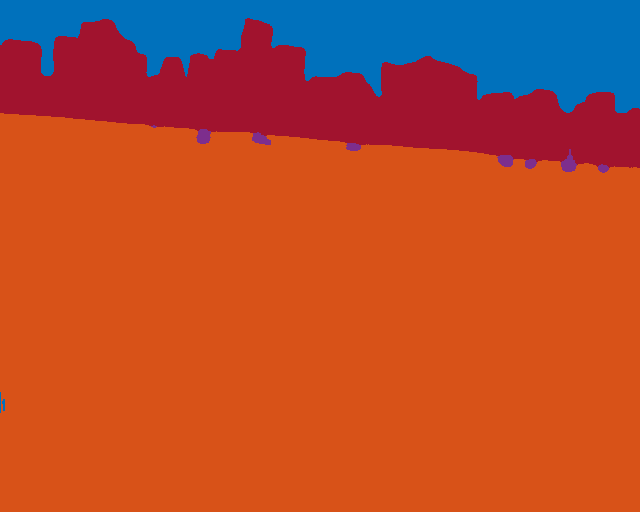

prev=385,i=386
iteration running is 386
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


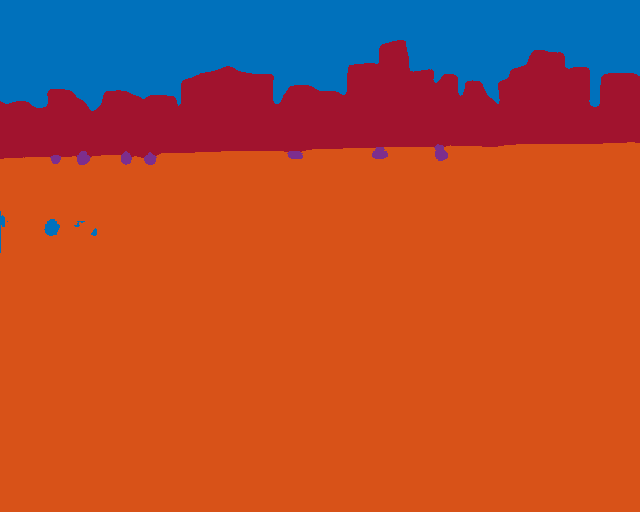

this is the raw image
this is the ground truth mask
this is the colored inferred image


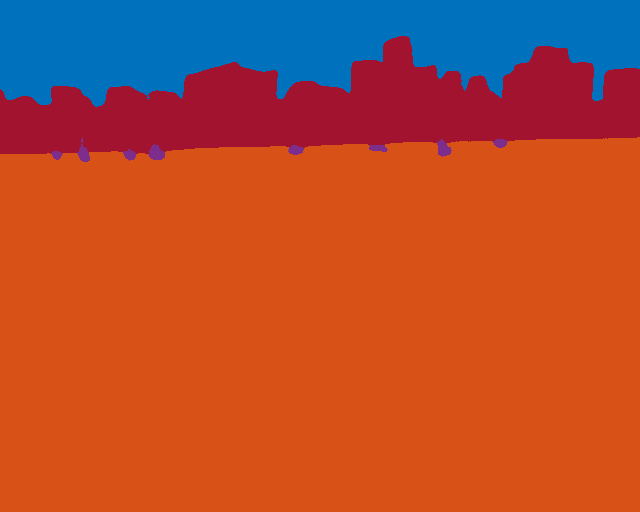

prev=387,i=388
iteration running is 388
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


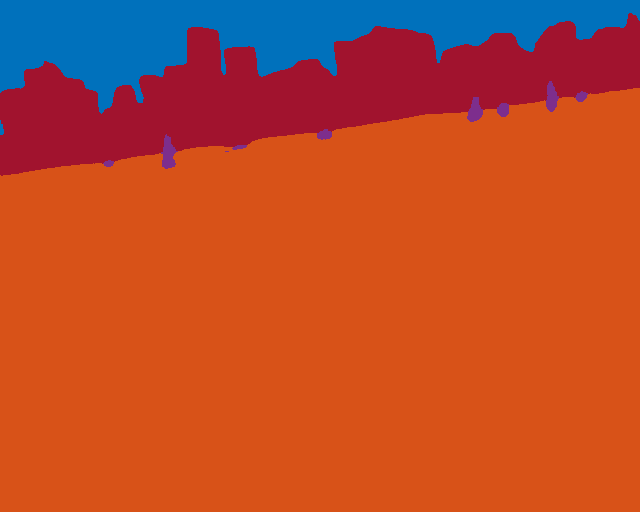

this is the raw image
this is the ground truth mask
this is the colored inferred image


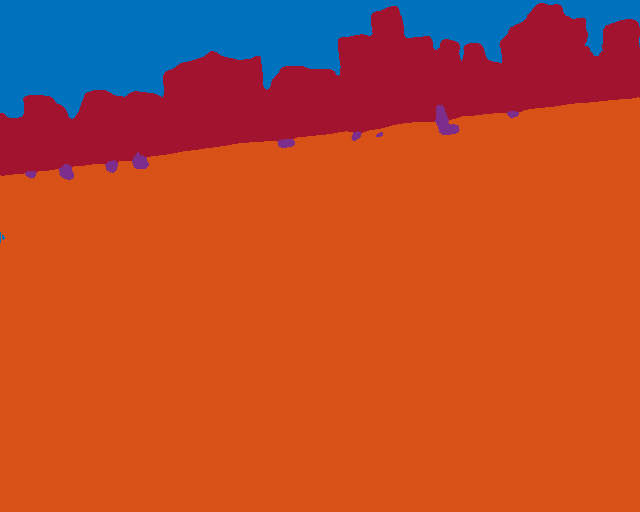

prev=389,i=390
iteration running is 390
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


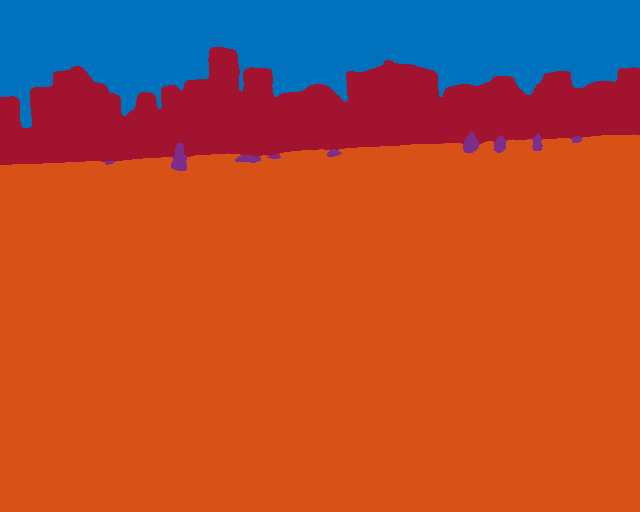

this is the raw image
this is the ground truth mask
this is the colored inferred image


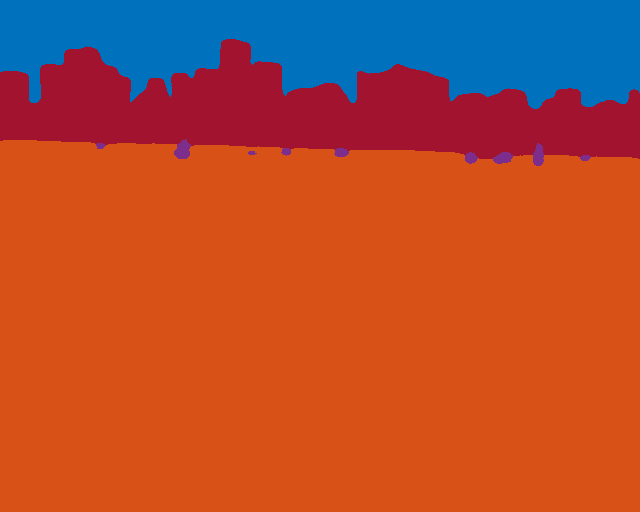

prev=391,i=392
iteration running is 392
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


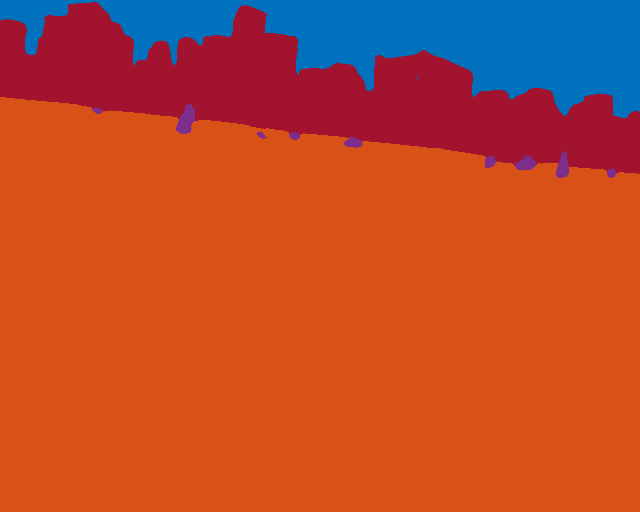

this is the raw image
this is the ground truth mask
this is the colored inferred image


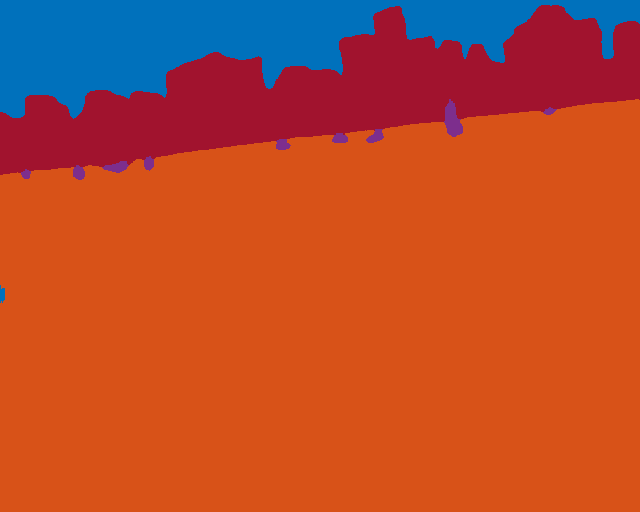

prev=393,i=394
iteration running is 394
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


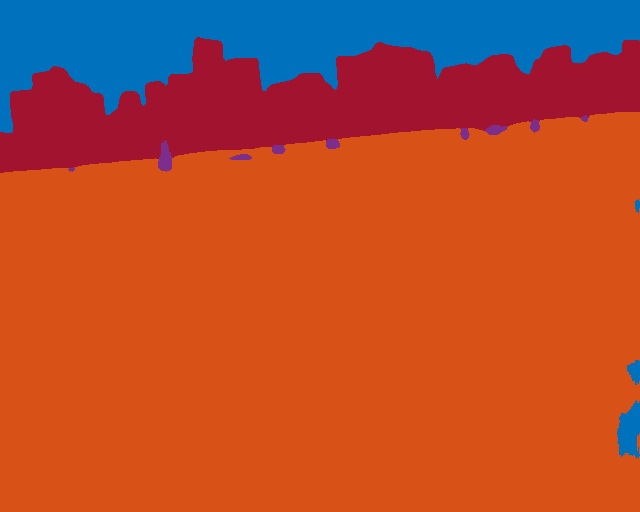

this is the raw image
this is the ground truth mask
this is the colored inferred image


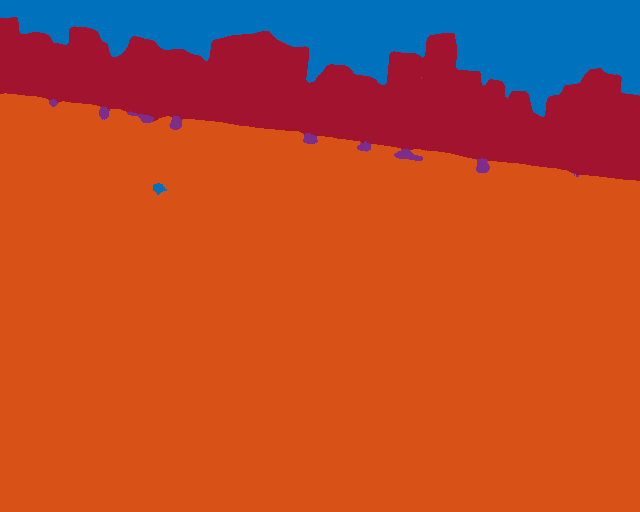

prev=395,i=396
iteration running is 396
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


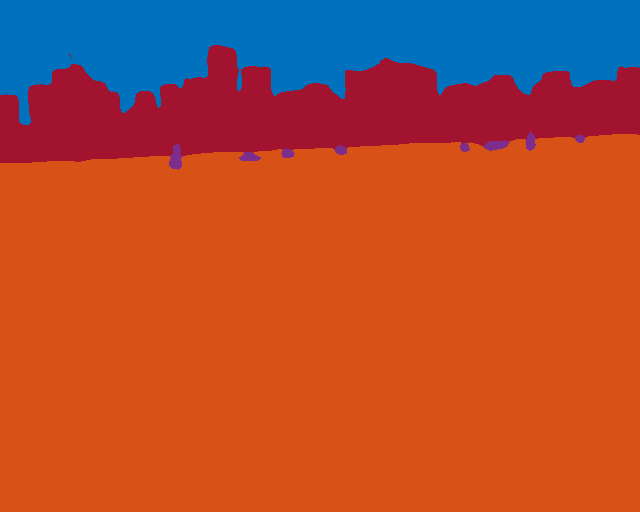

this is the raw image
this is the ground truth mask
this is the colored inferred image


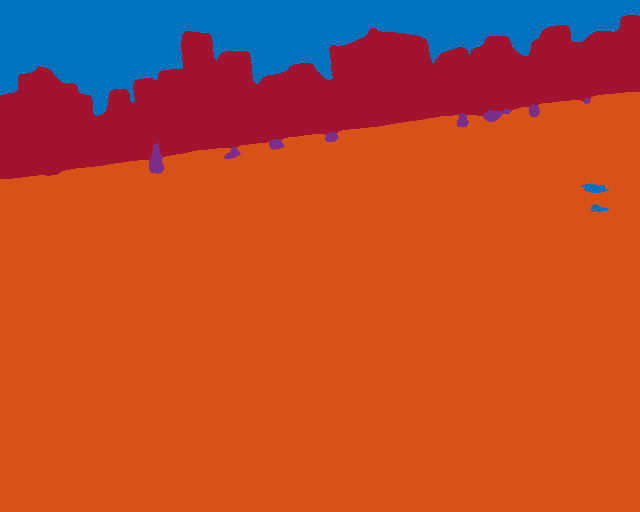

prev=397,i=398
iteration running is 398
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


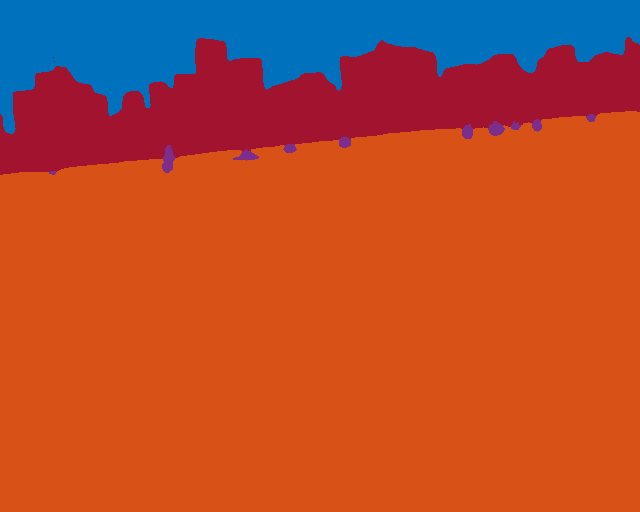

this is the raw image
this is the ground truth mask
this is the colored inferred image


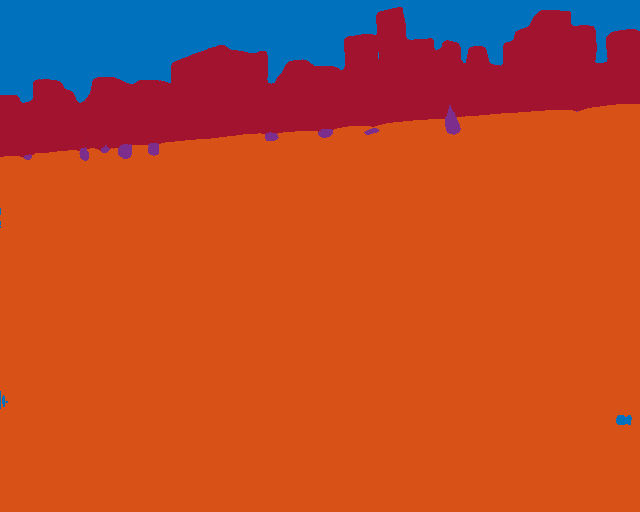

prev=399,i=400
iteration running is 400
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


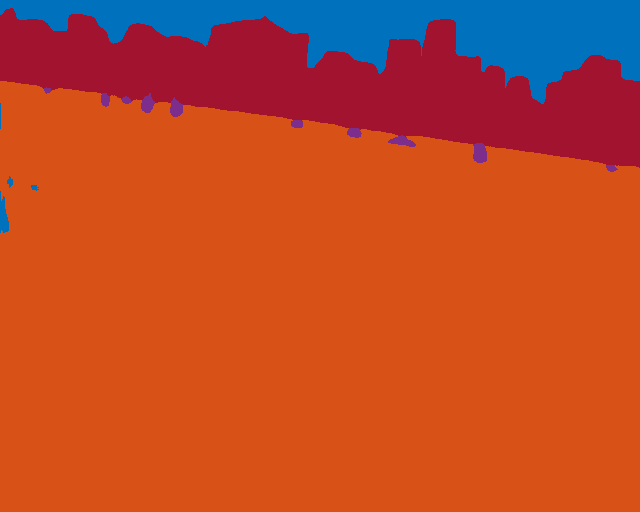

this is the raw image
this is the ground truth mask
this is the colored inferred image


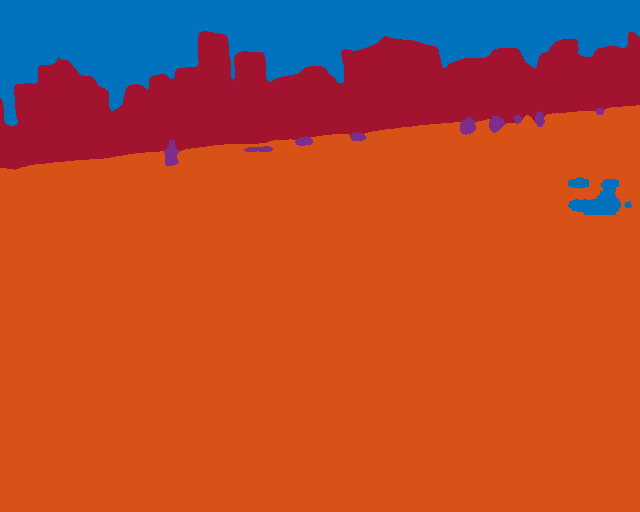

prev=401,i=402
iteration running is 402
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


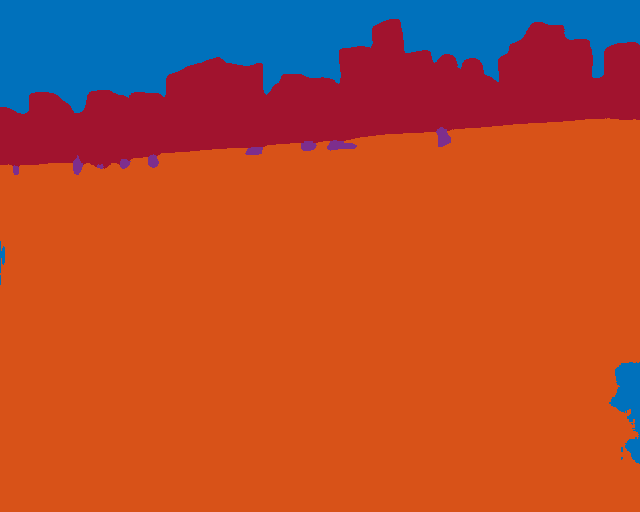

this is the raw image
this is the ground truth mask
this is the colored inferred image


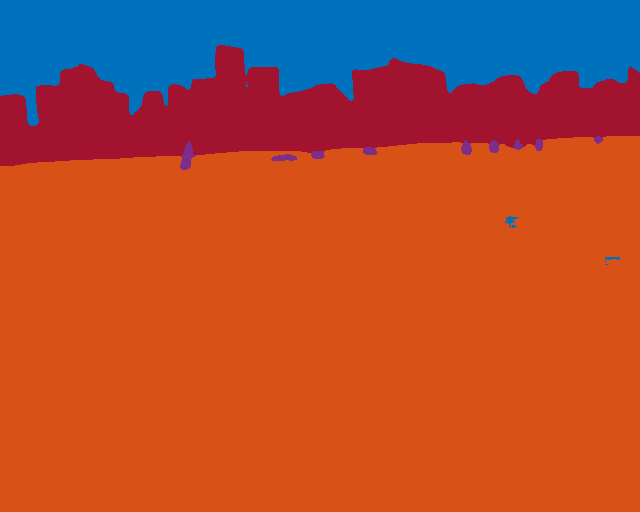

prev=403,i=404
iteration running is 404
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


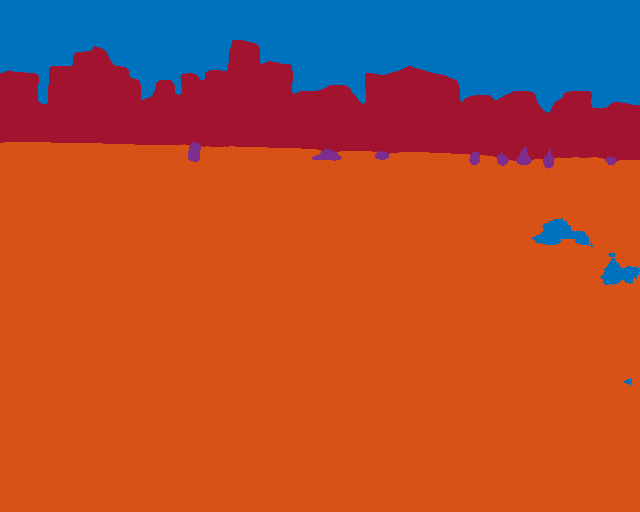

this is the raw image
this is the ground truth mask
this is the colored inferred image


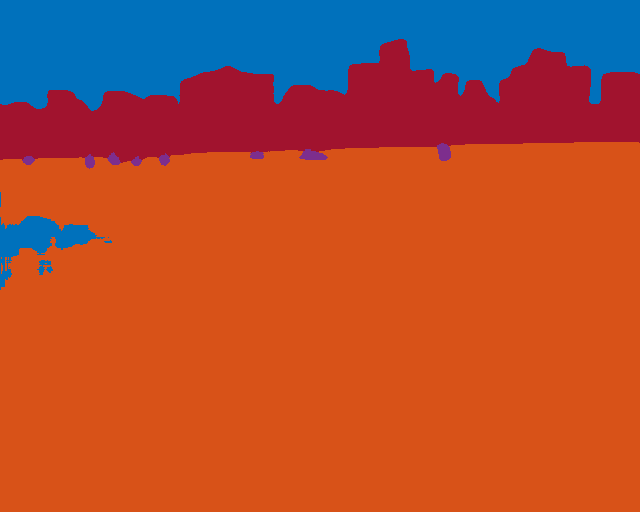

prev=405,i=406
iteration running is 406
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


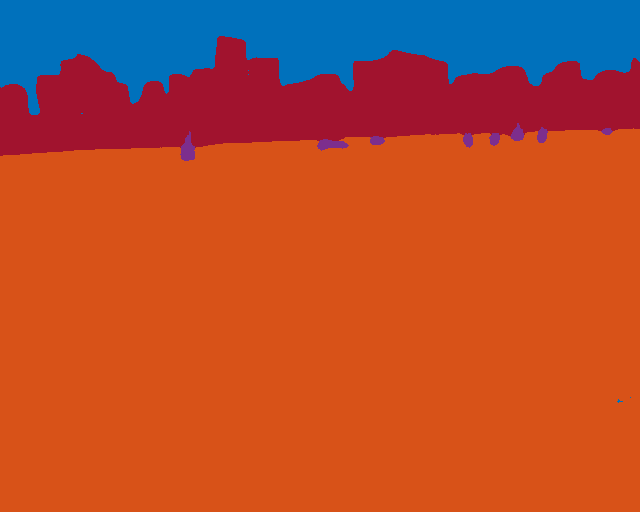

this is the raw image
this is the ground truth mask
this is the colored inferred image


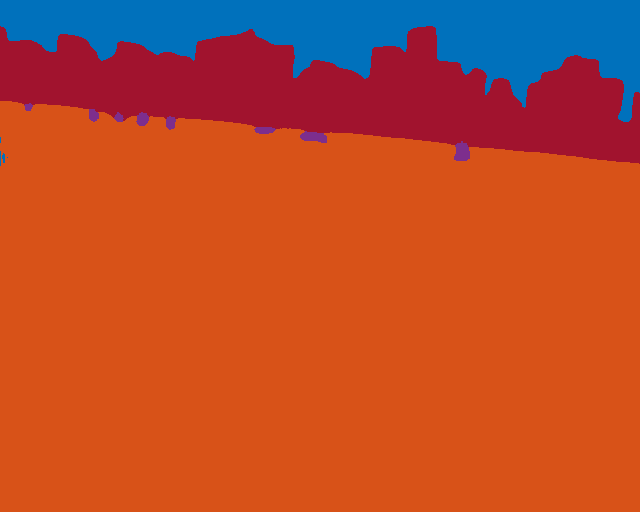

prev=407,i=408
iteration running is 408
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


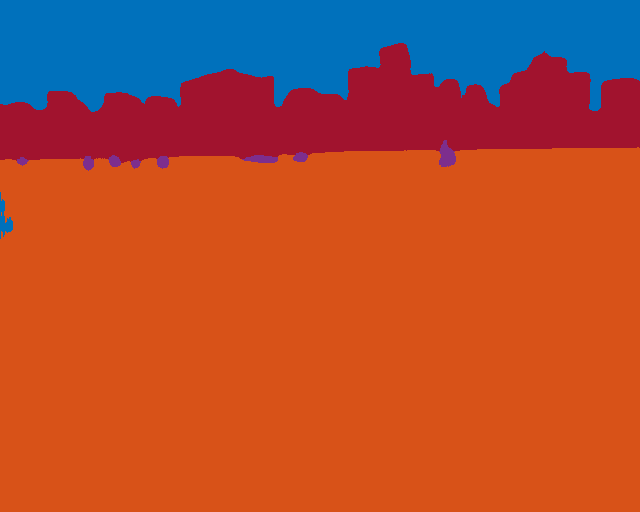

this is the raw image
this is the ground truth mask
this is the colored inferred image


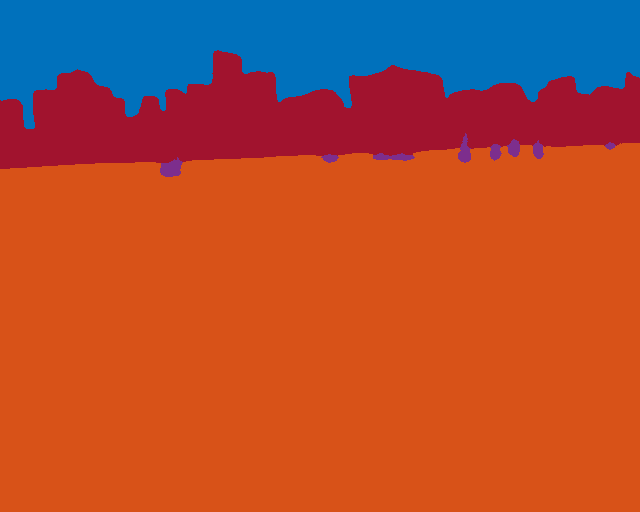

prev=409,i=410
iteration running is 410
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


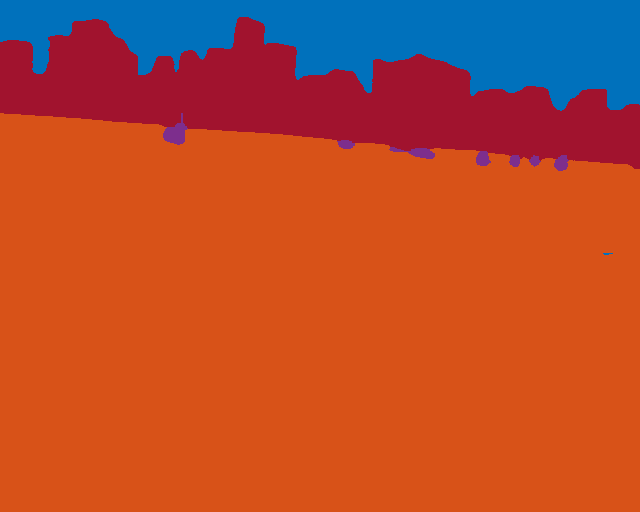

this is the raw image
this is the ground truth mask
this is the colored inferred image


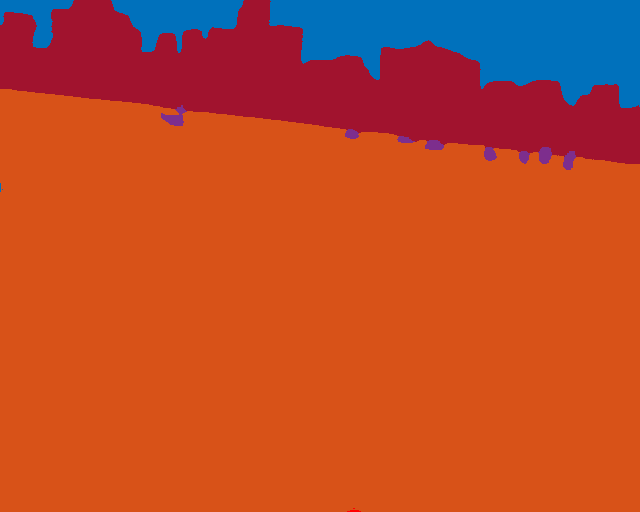

prev=411,i=412
iteration running is 412
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


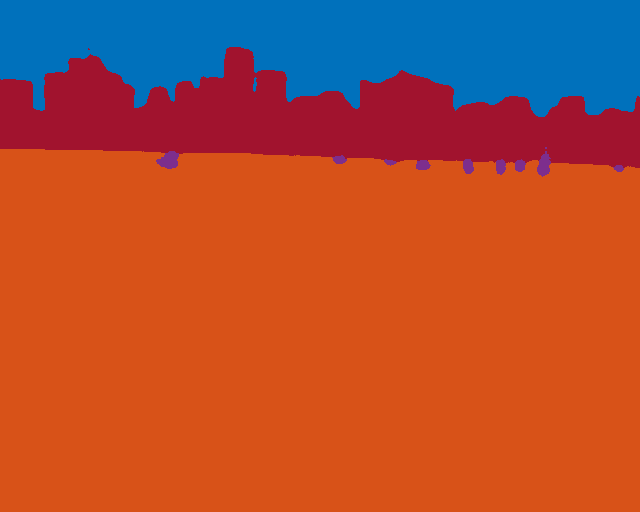

this is the raw image
this is the ground truth mask
this is the colored inferred image


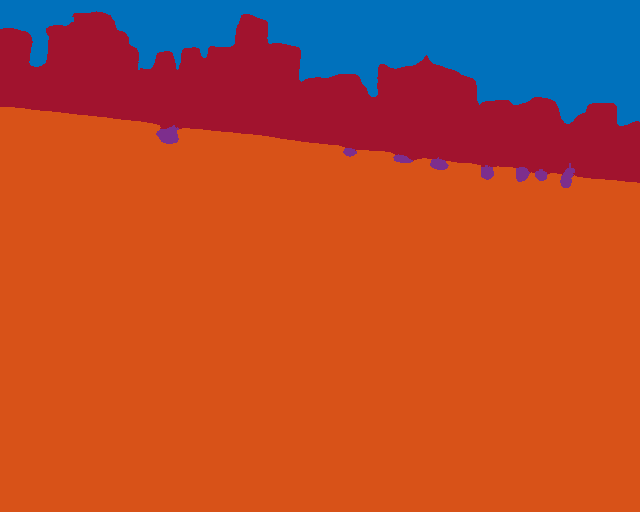

prev=413,i=414
iteration running is 414
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


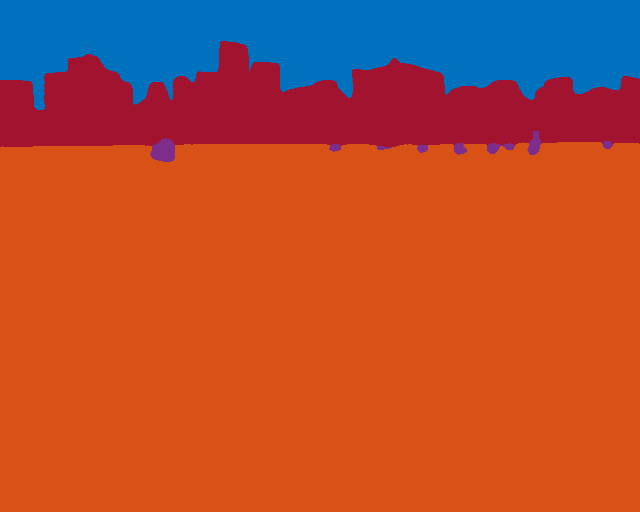

this is the raw image
this is the ground truth mask
this is the colored inferred image


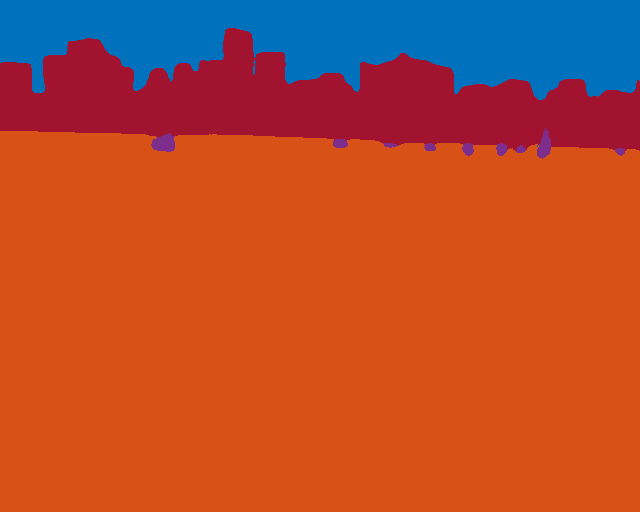

prev=415,i=416
iteration running is 416
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


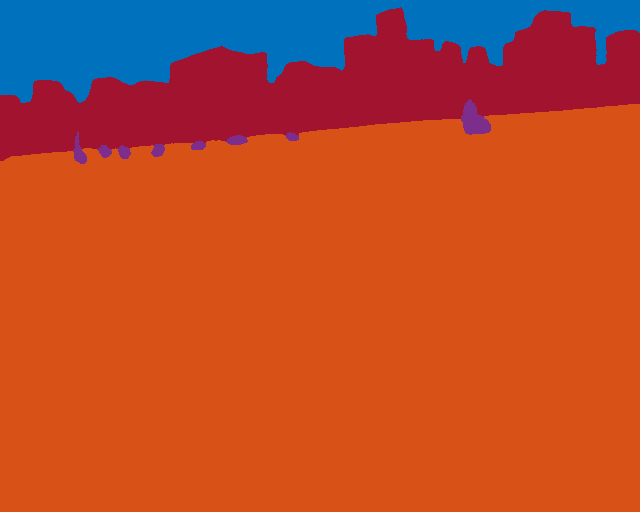

this is the raw image
this is the ground truth mask
this is the colored inferred image


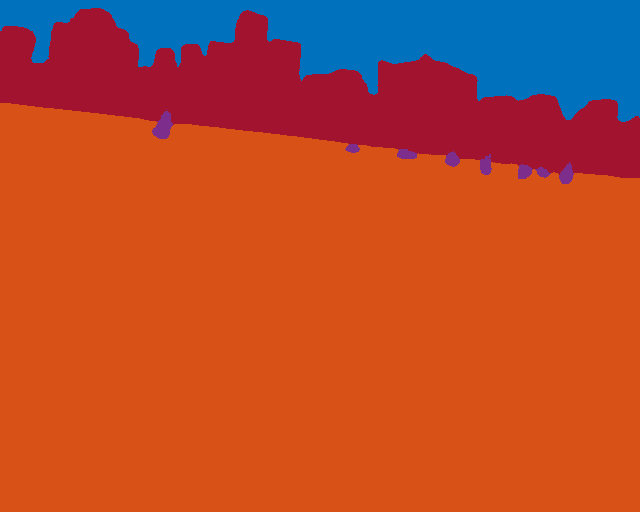

prev=417,i=418
iteration running is 418
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


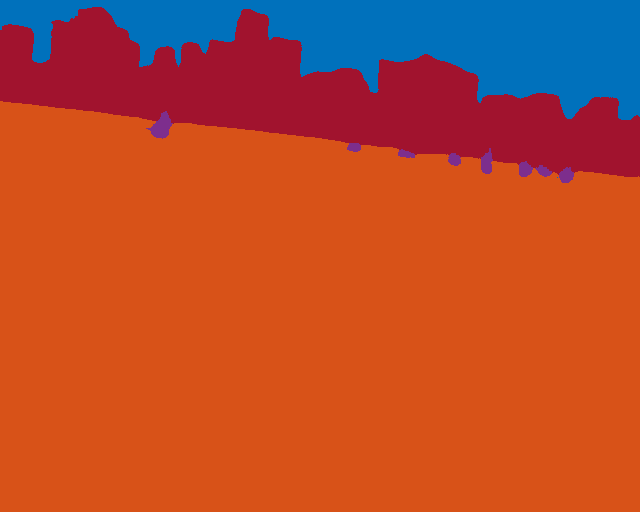

this is the raw image
this is the ground truth mask
this is the colored inferred image


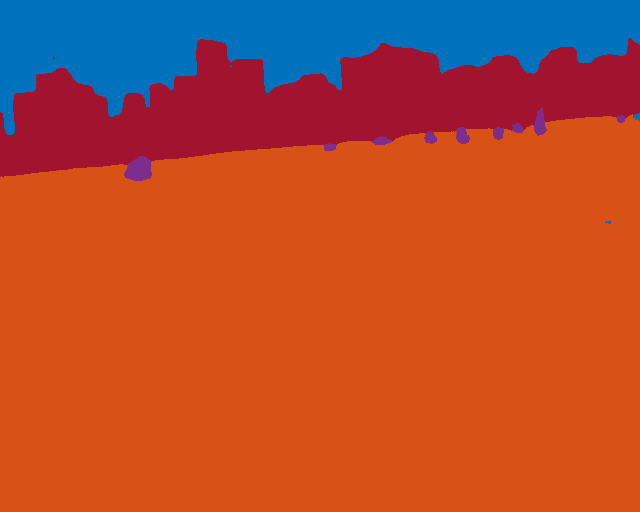

prev=419,i=420
iteration running is 420
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


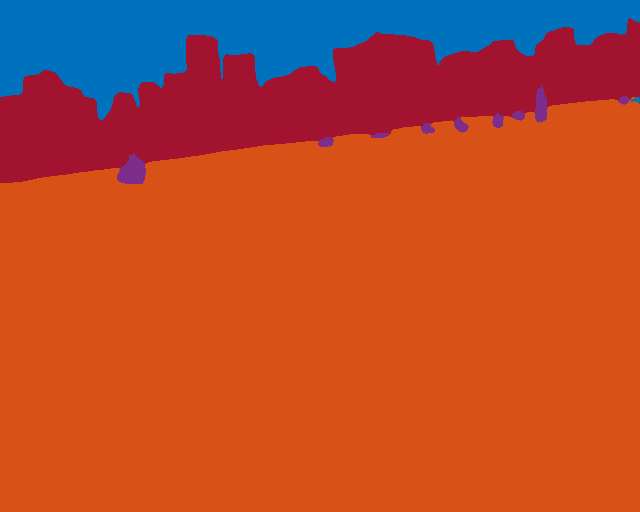

this is the raw image
this is the ground truth mask
this is the colored inferred image


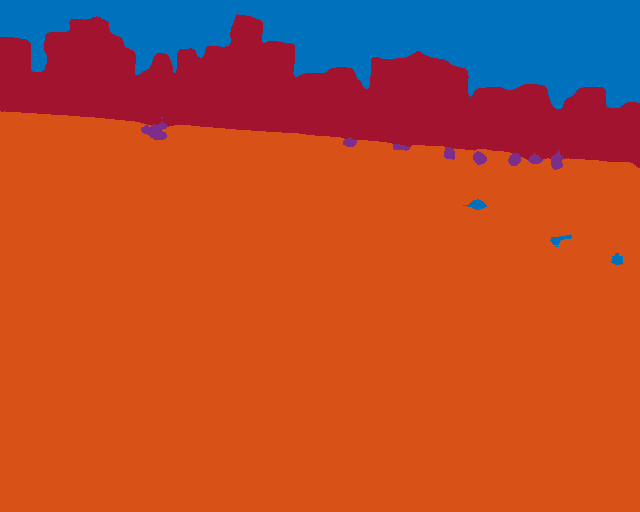

prev=421,i=422
iteration running is 422
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


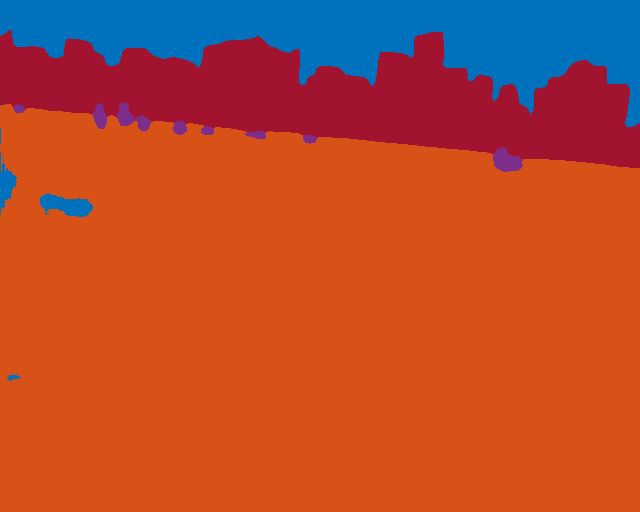

this is the raw image
this is the ground truth mask
this is the colored inferred image


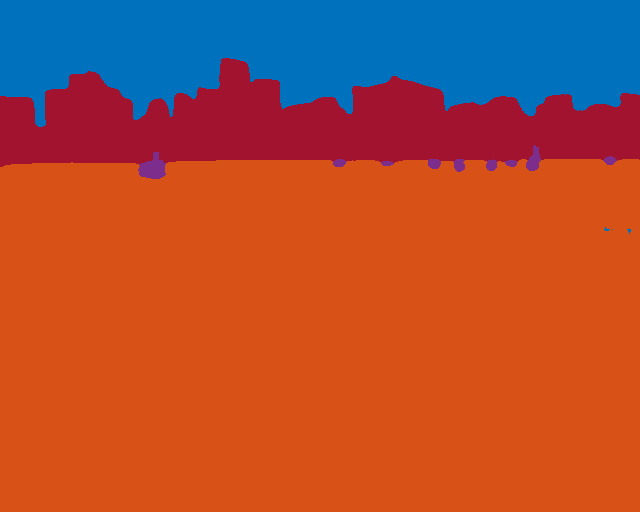

prev=423,i=424
iteration running is 424
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


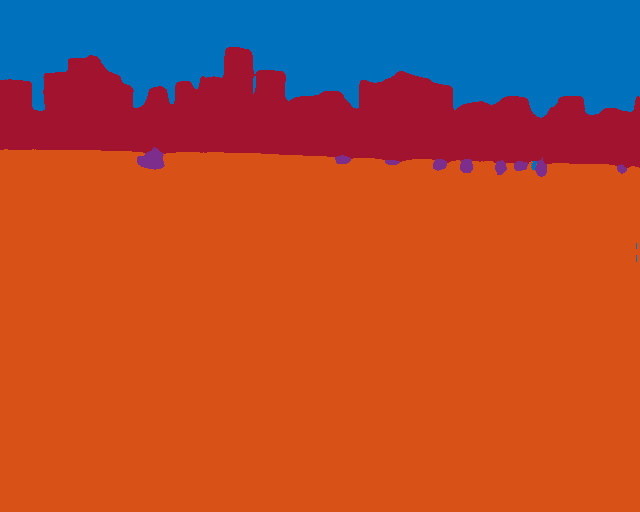

this is the raw image
this is the ground truth mask
this is the colored inferred image


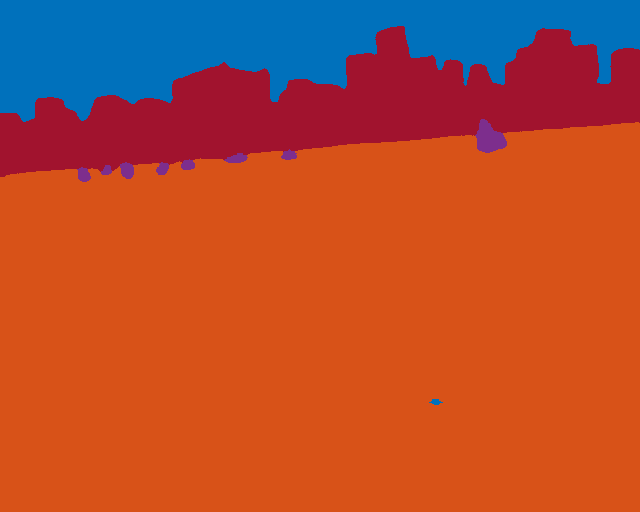

prev=425,i=426
iteration running is 426
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


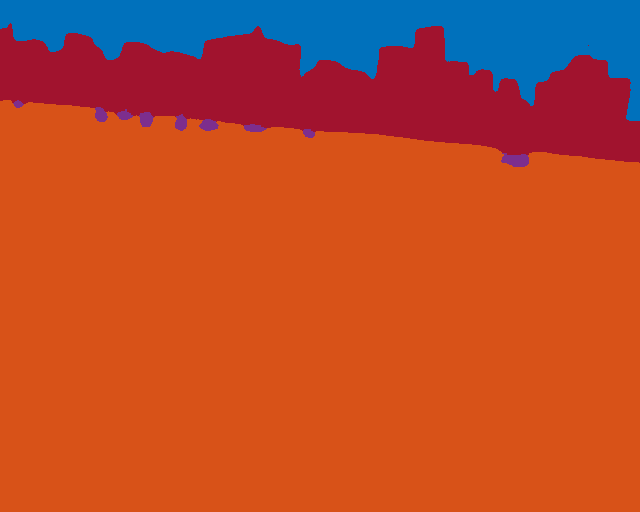

this is the raw image
this is the ground truth mask
this is the colored inferred image


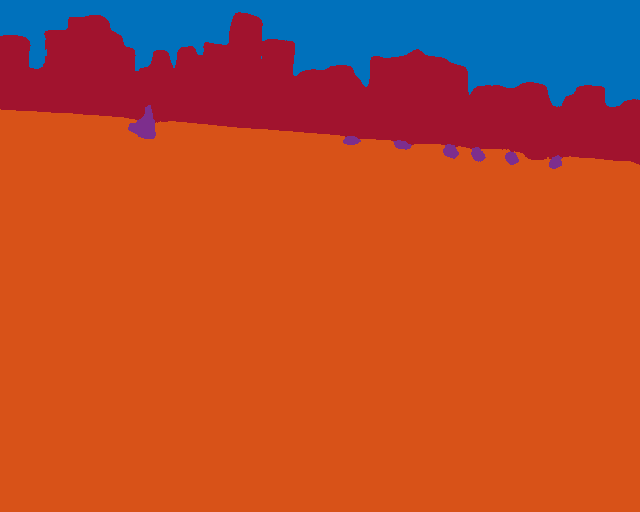

prev=427,i=428
iteration running is 428
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


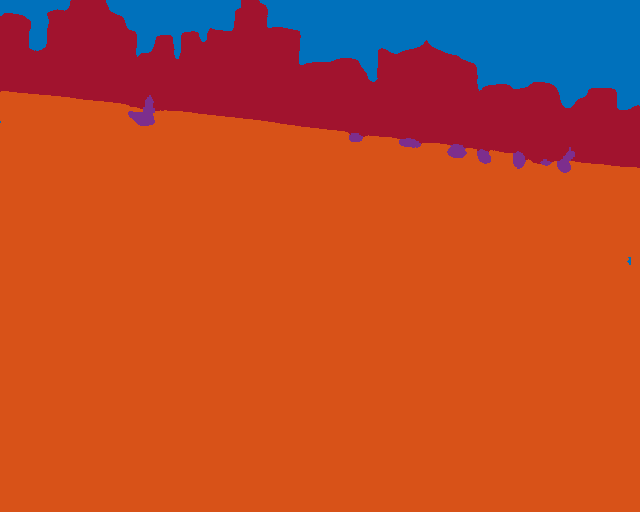

this is the raw image
this is the ground truth mask
this is the colored inferred image


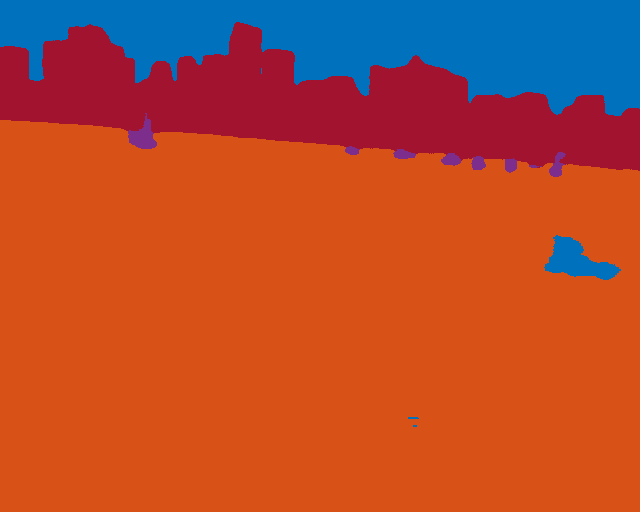

prev=429,i=430
iteration running is 430
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


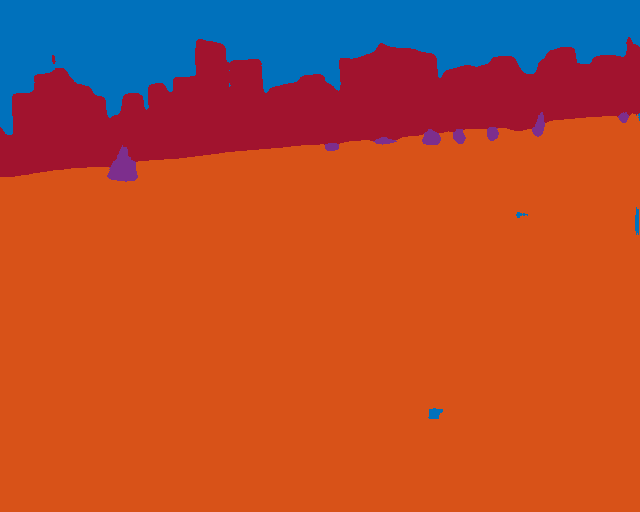

this is the raw image
this is the ground truth mask
this is the colored inferred image


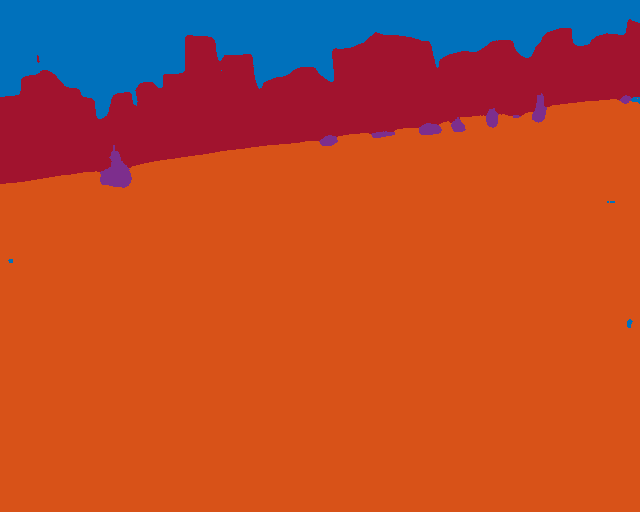

prev=431,i=432
iteration running is 432
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


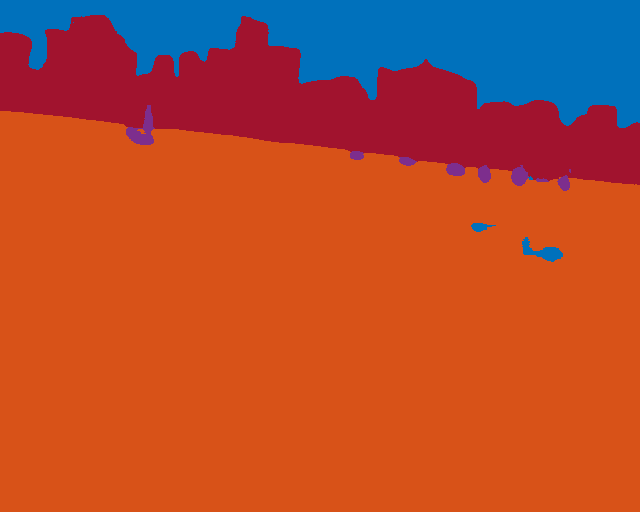

this is the raw image
this is the ground truth mask
this is the colored inferred image


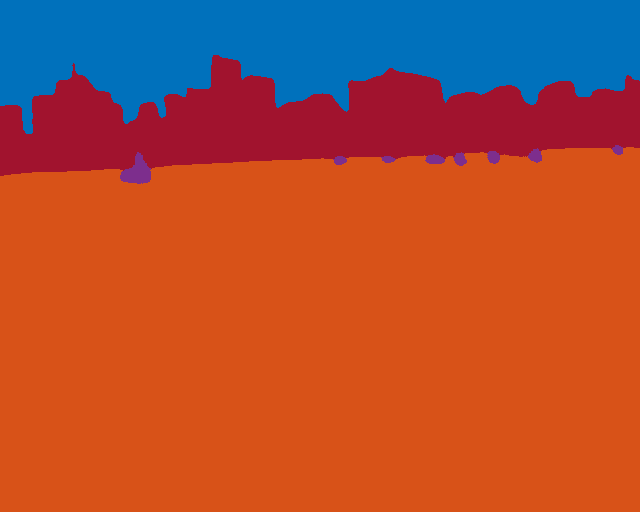

prev=433,i=434
iteration running is 434
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


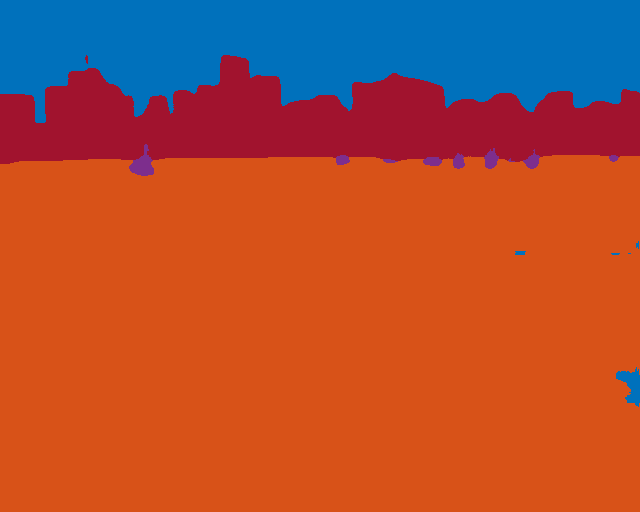

this is the raw image
this is the ground truth mask
this is the colored inferred image


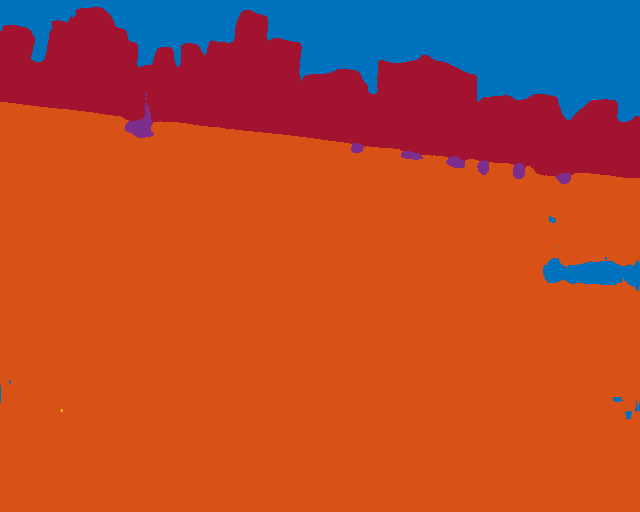

prev=435,i=436
iteration running is 436
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


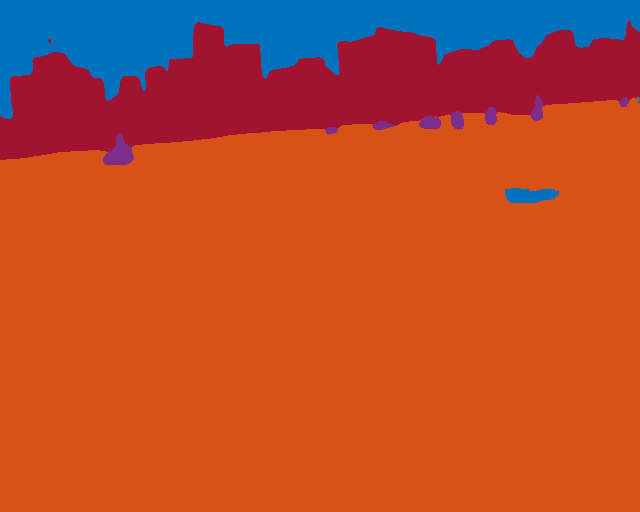

this is the raw image
this is the ground truth mask
this is the colored inferred image


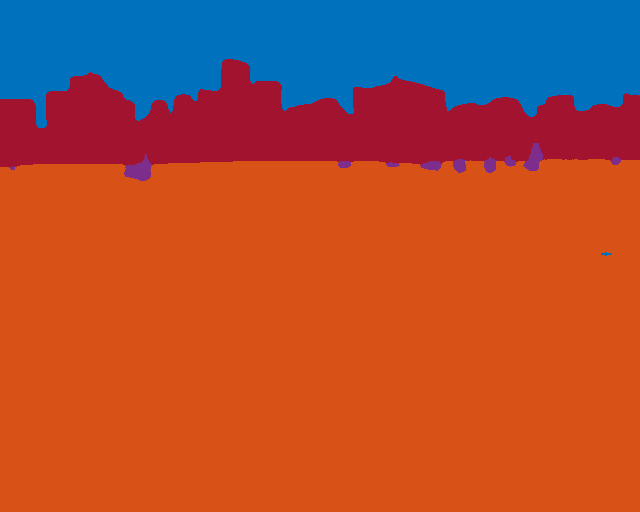

prev=437,i=438
iteration running is 438
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


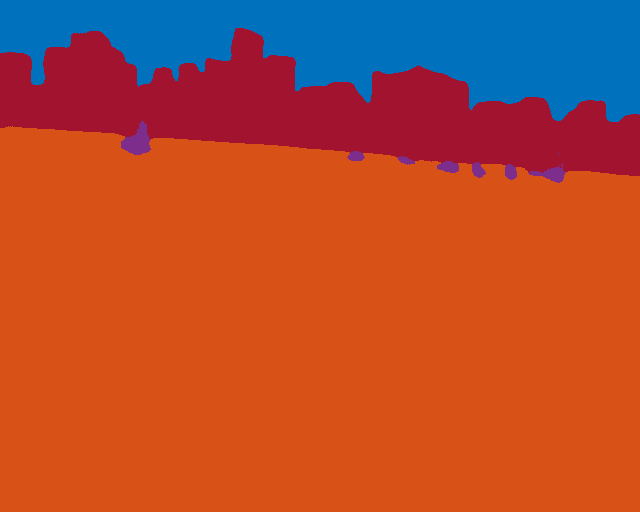

this is the raw image
this is the ground truth mask
this is the colored inferred image


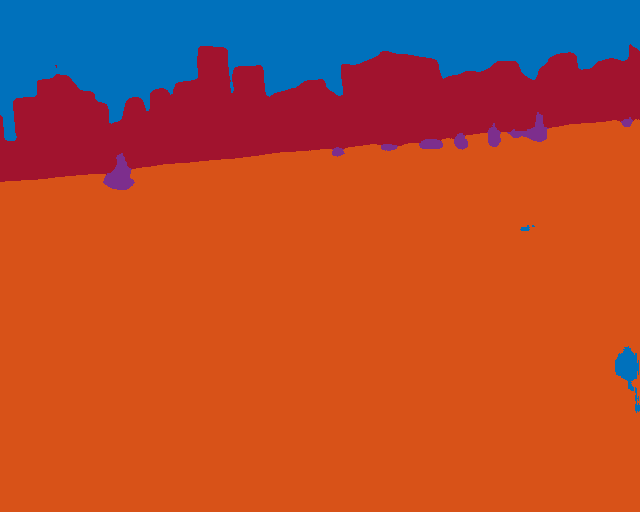

prev=439,i=440
iteration running is 440
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


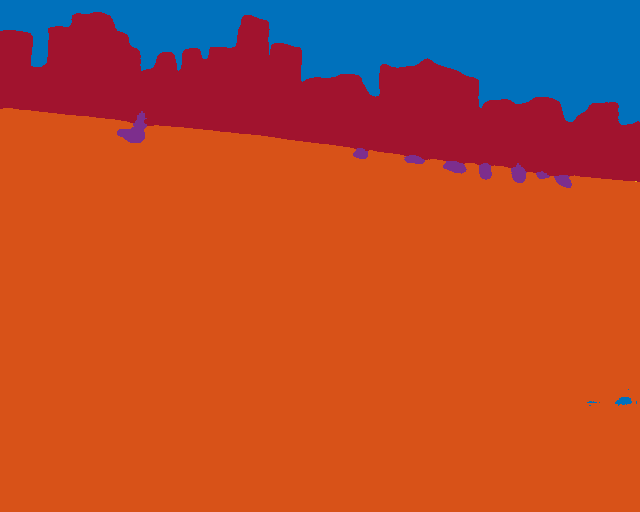

this is the raw image
this is the ground truth mask
this is the colored inferred image


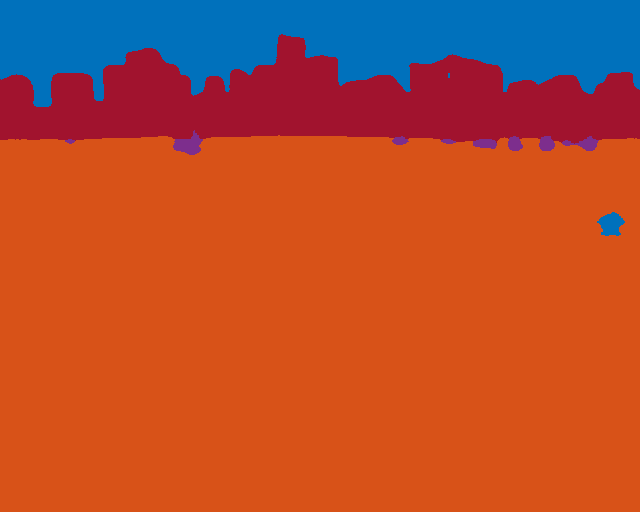

prev=441,i=442
iteration running is 442
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


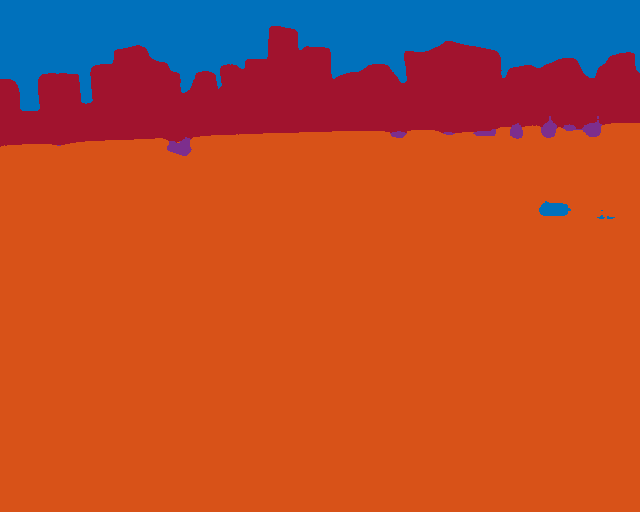

this is the raw image
this is the ground truth mask
this is the colored inferred image


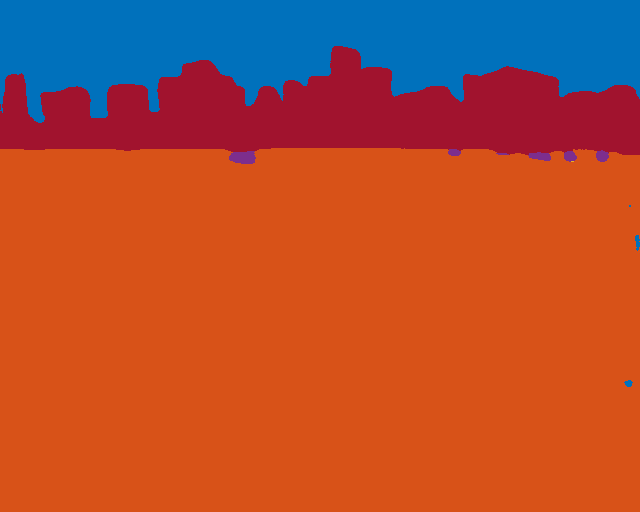

prev=443,i=444
iteration running is 444
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


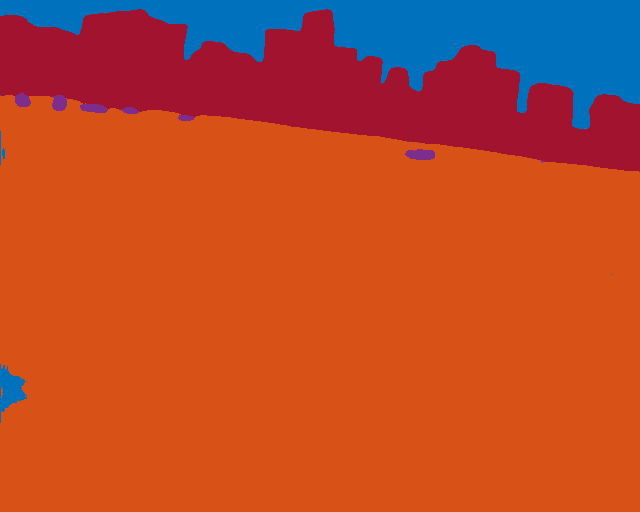

this is the raw image
this is the ground truth mask
this is the colored inferred image


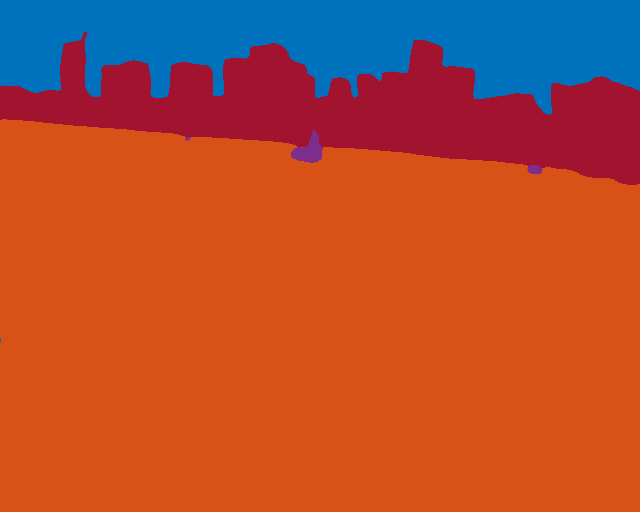

prev=445,i=446
iteration running is 446
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


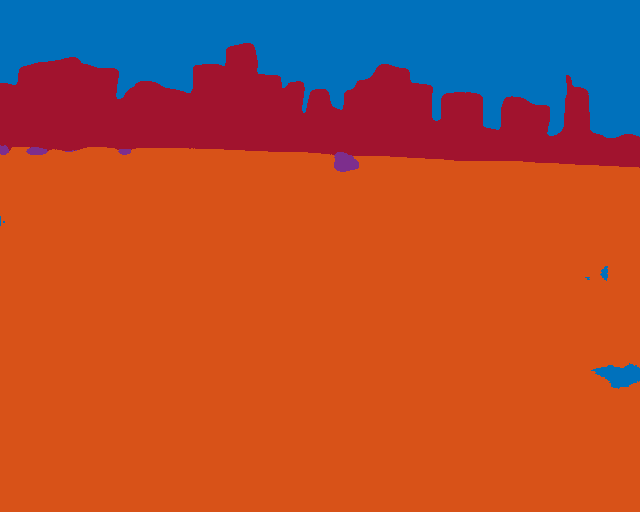

this is the raw image
this is the ground truth mask
this is the colored inferred image


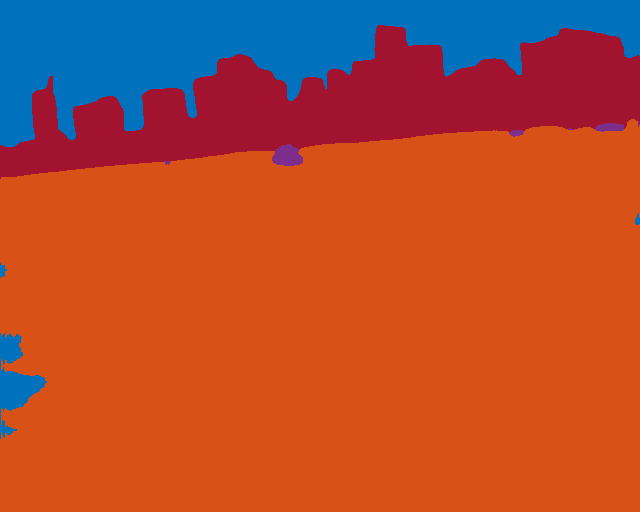

prev=447,i=448
iteration running is 448
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


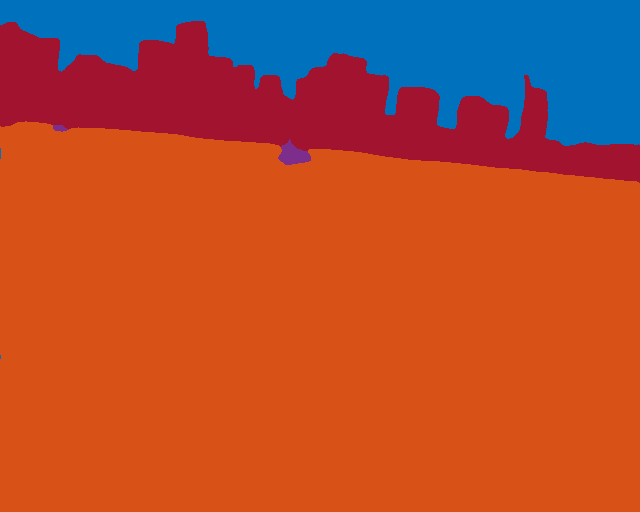

this is the raw image
this is the ground truth mask
this is the colored inferred image


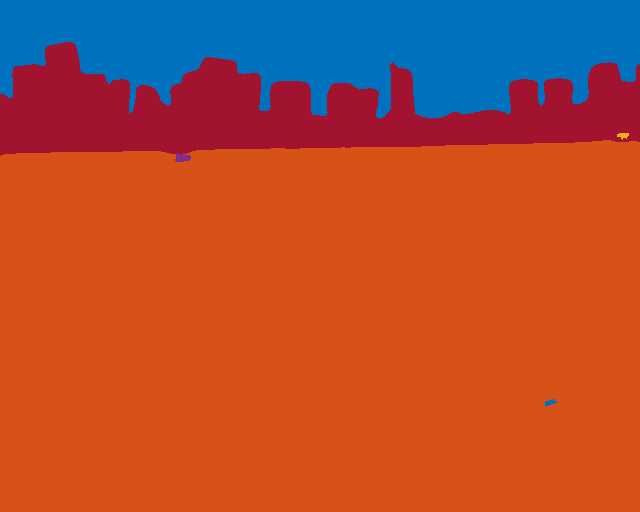

prev=449,i=450
iteration running is 450
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


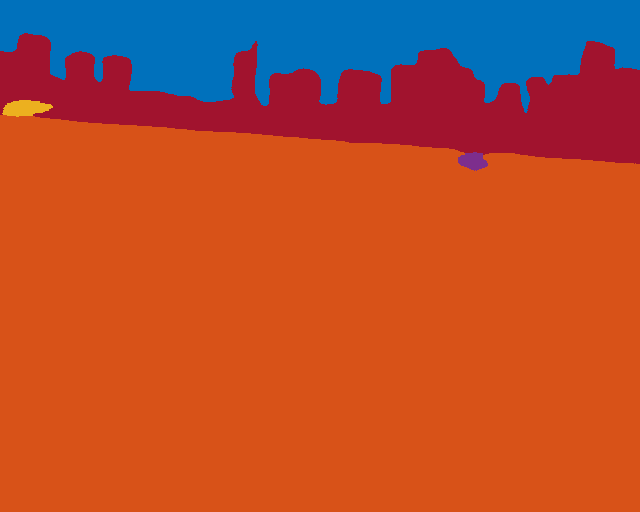

this is the raw image
this is the ground truth mask
this is the colored inferred image


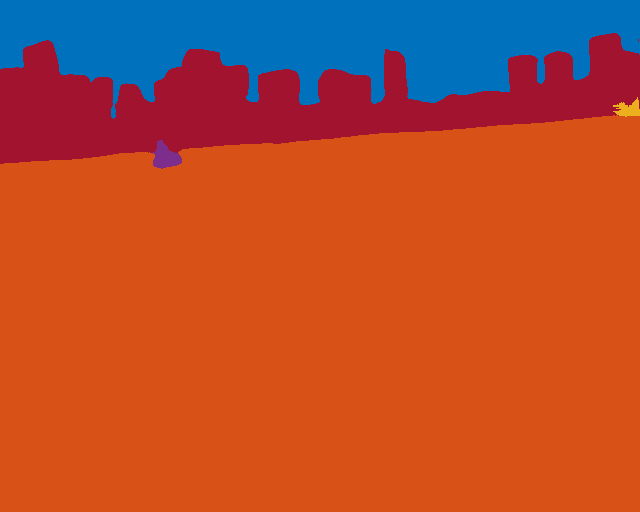

prev=451,i=452
iteration running is 452
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


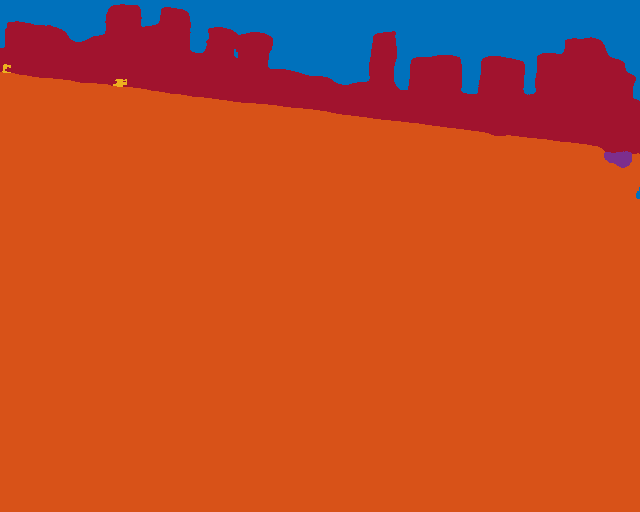

this is the raw image
this is the ground truth mask
this is the colored inferred image


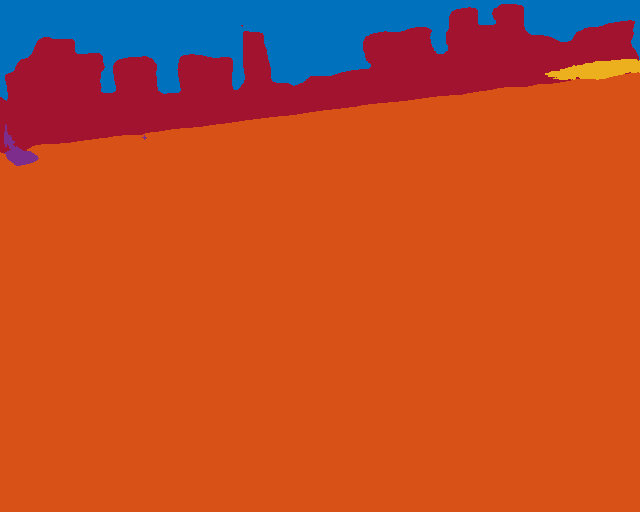

prev=453,i=454
iteration running is 454
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


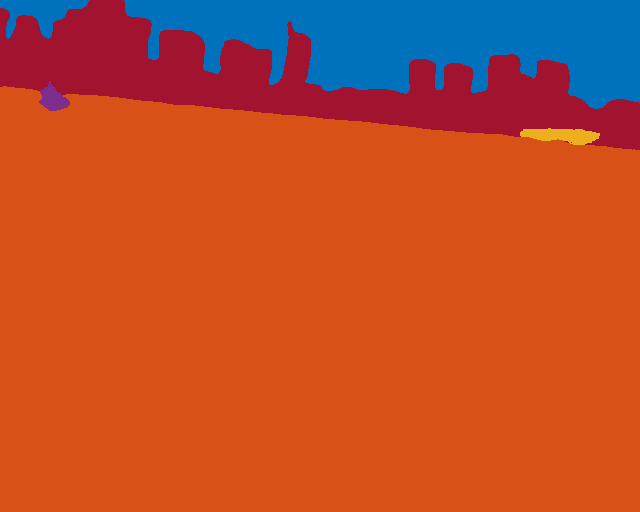

this is the raw image
this is the ground truth mask
this is the colored inferred image


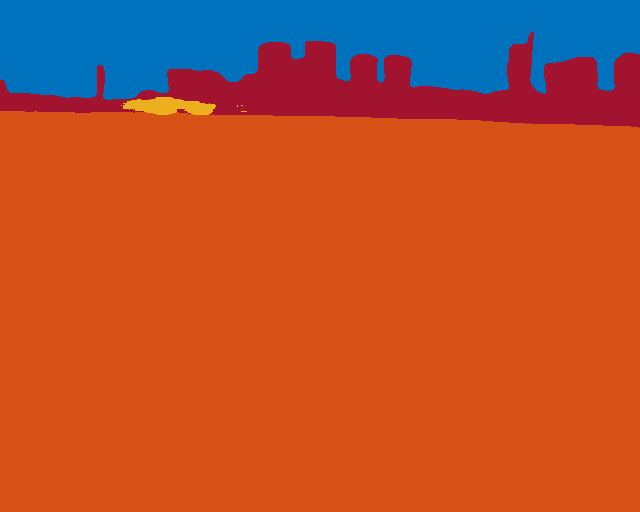

prev=455,i=456
iteration running is 456
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


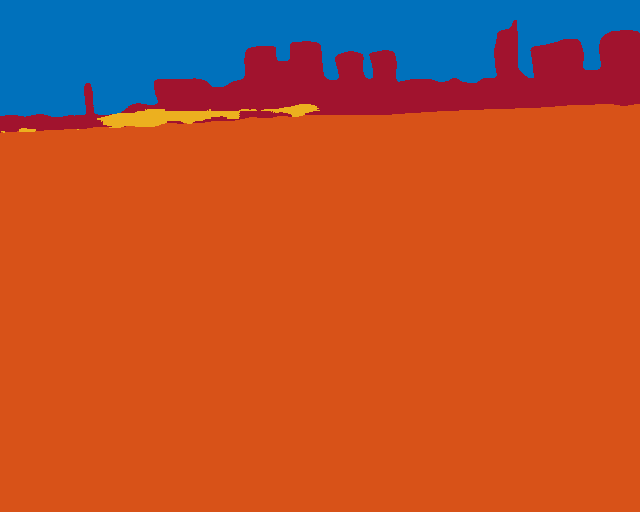

this is the raw image
this is the ground truth mask
this is the colored inferred image


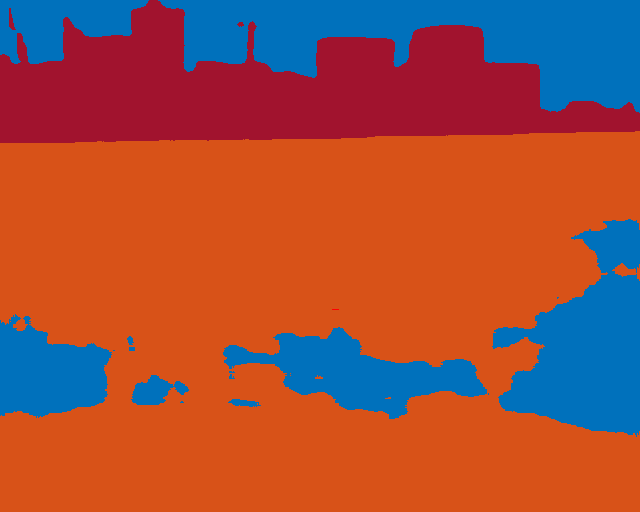

prev=457,i=458
iteration running is 458
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


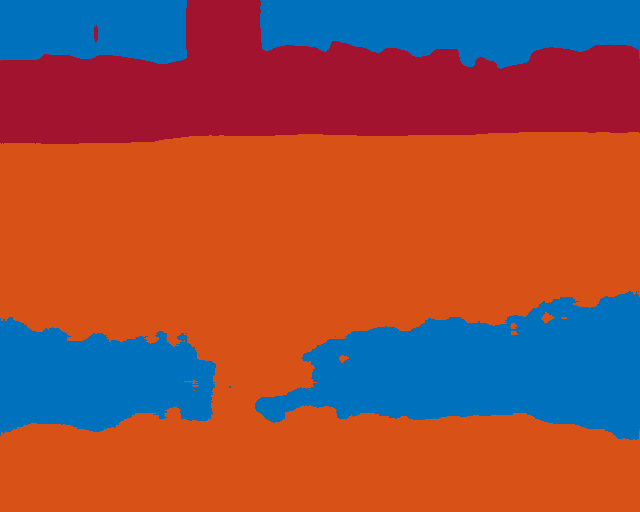

this is the raw image
this is the ground truth mask
this is the colored inferred image


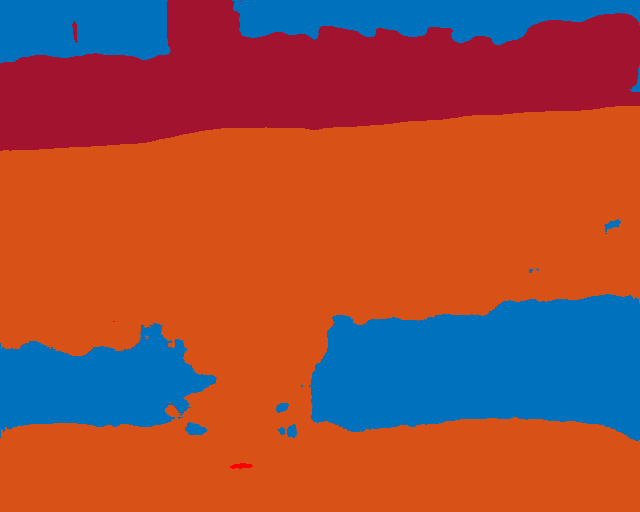

prev=459,i=460
iteration running is 460
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


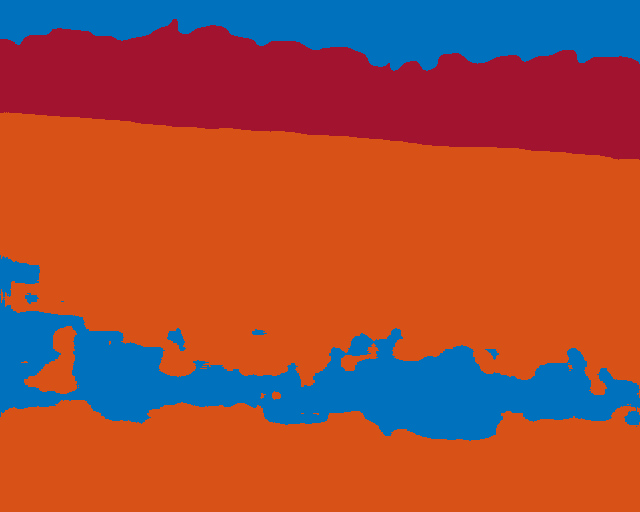

this is the raw image
this is the ground truth mask
this is the colored inferred image


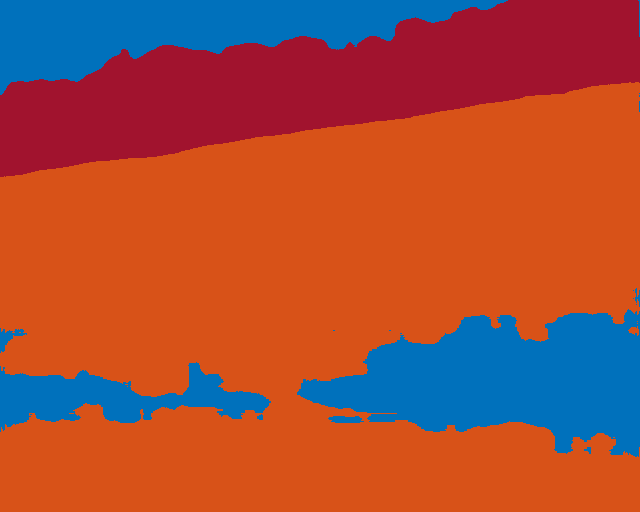

prev=461,i=462
iteration running is 462
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


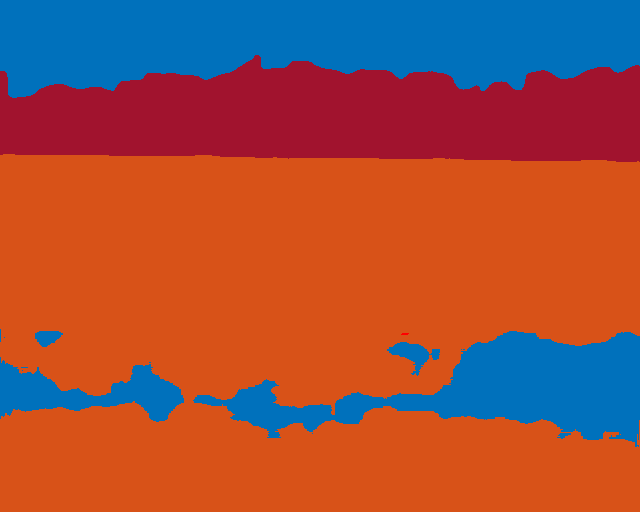

this is the raw image
this is the ground truth mask
this is the colored inferred image


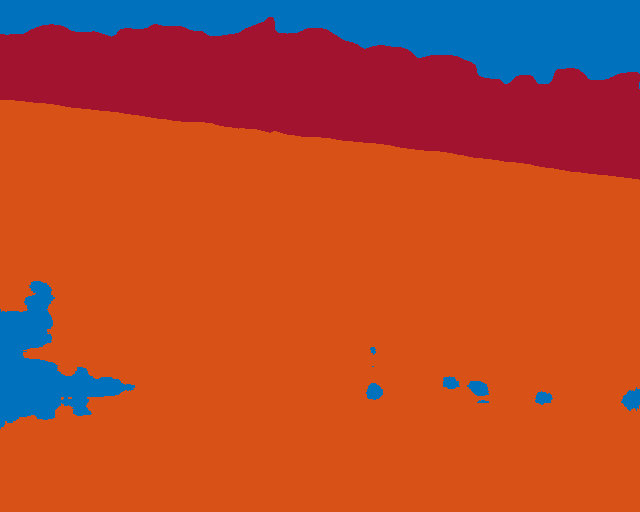

prev=463,i=464
iteration running is 464
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


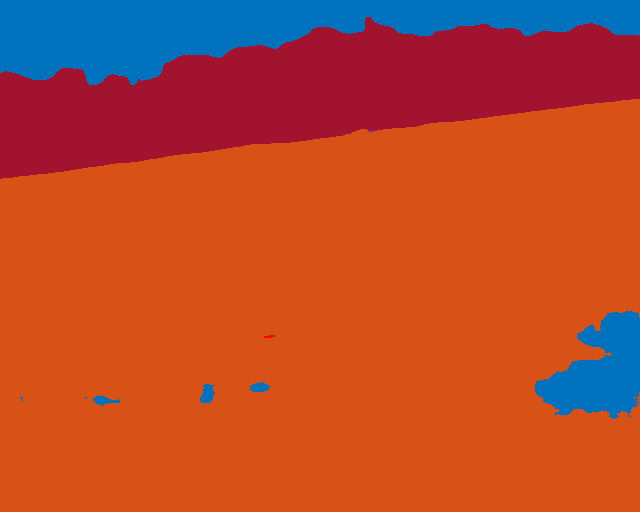

this is the raw image
this is the ground truth mask
this is the colored inferred image


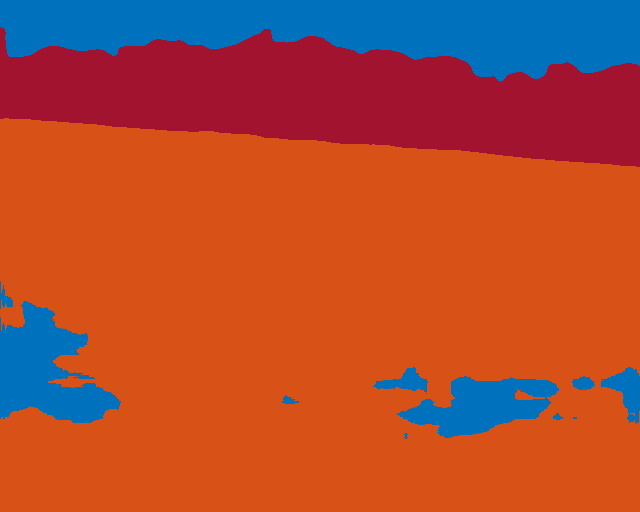

prev=465,i=466
iteration running is 466
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


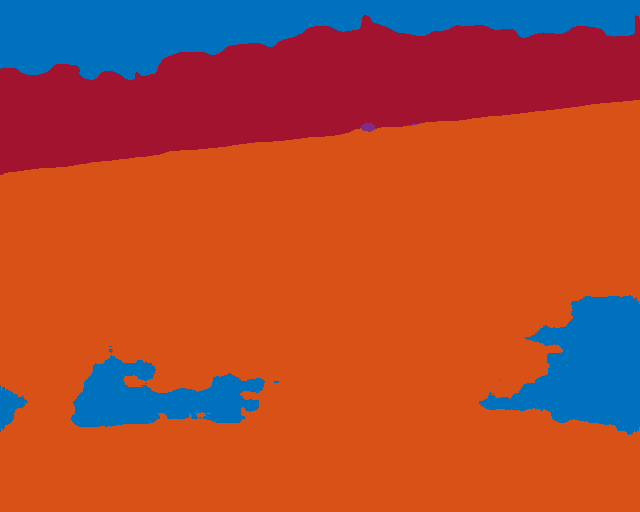

this is the raw image
this is the ground truth mask
this is the colored inferred image


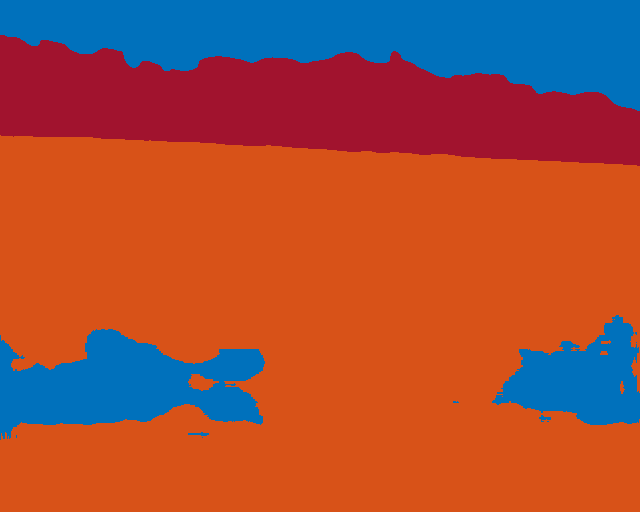

prev=467,i=468
iteration running is 468
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


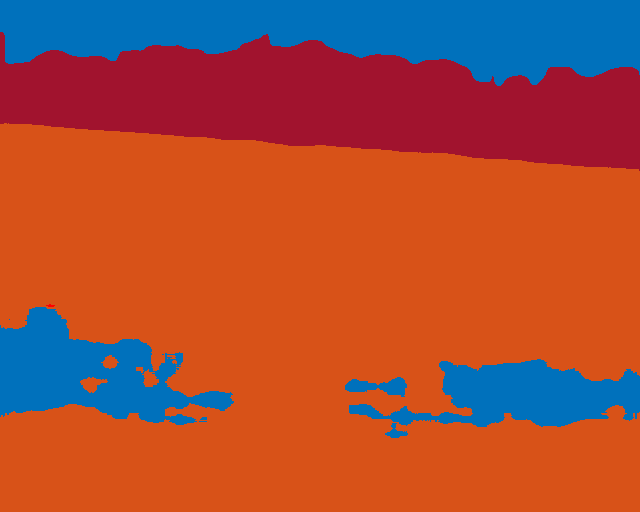

this is the raw image
this is the ground truth mask
this is the colored inferred image


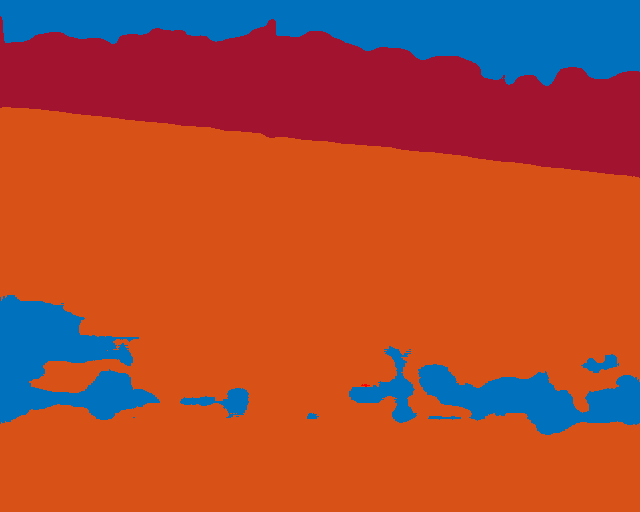

prev=469,i=470
iteration running is 470
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


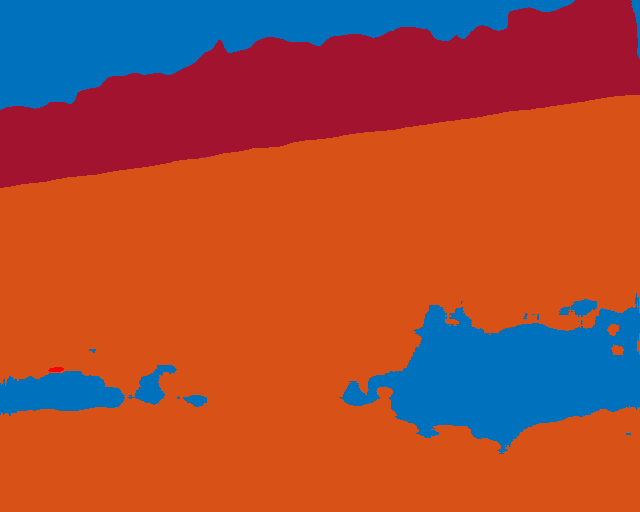

this is the raw image
this is the ground truth mask
this is the colored inferred image


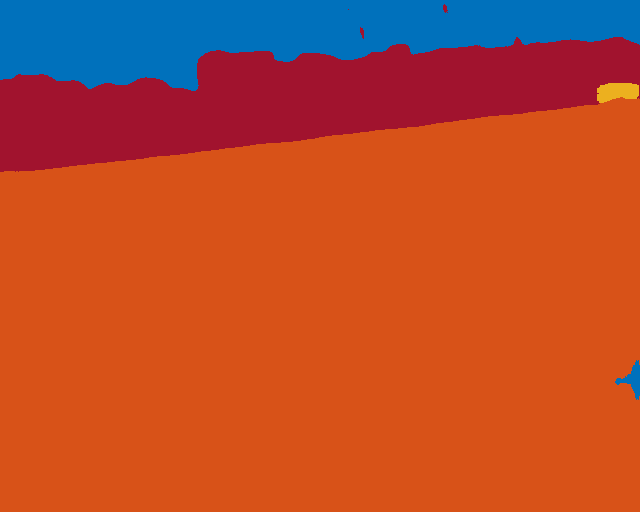

prev=471,i=472
iteration running is 472
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


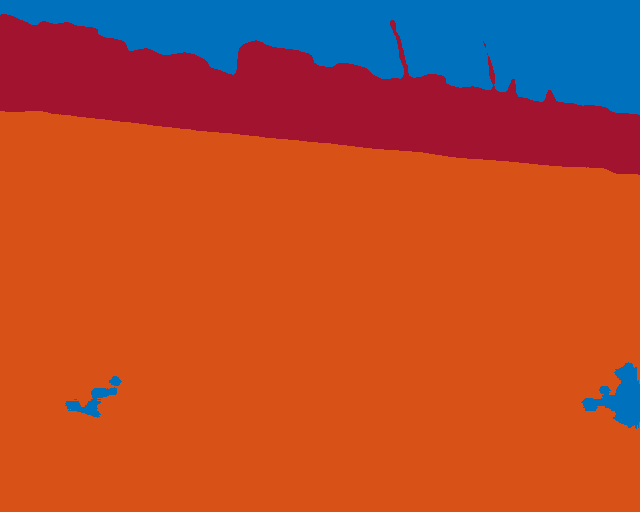

this is the raw image
this is the ground truth mask
this is the colored inferred image


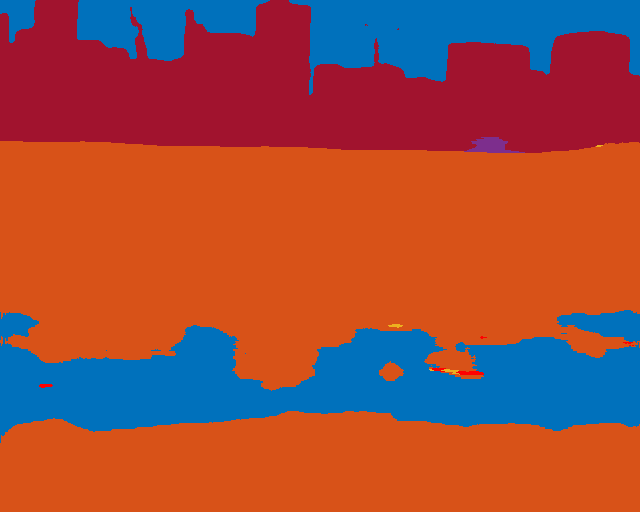

prev=473,i=474
iteration running is 474
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


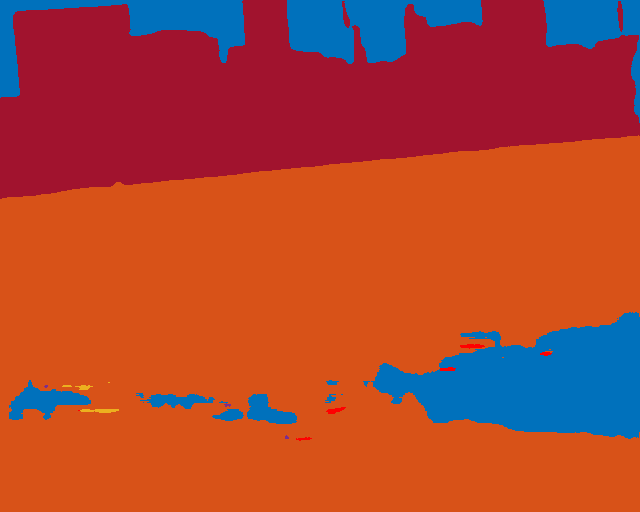

this is the raw image
this is the ground truth mask
this is the colored inferred image


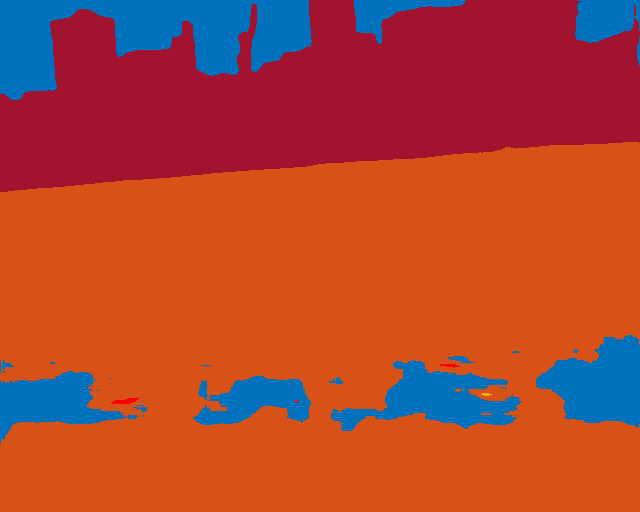

prev=475,i=476
iteration running is 476
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


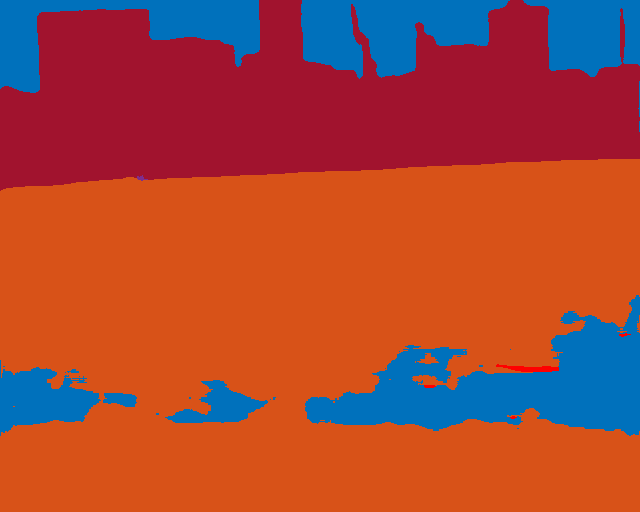

this is the raw image
this is the ground truth mask
this is the colored inferred image


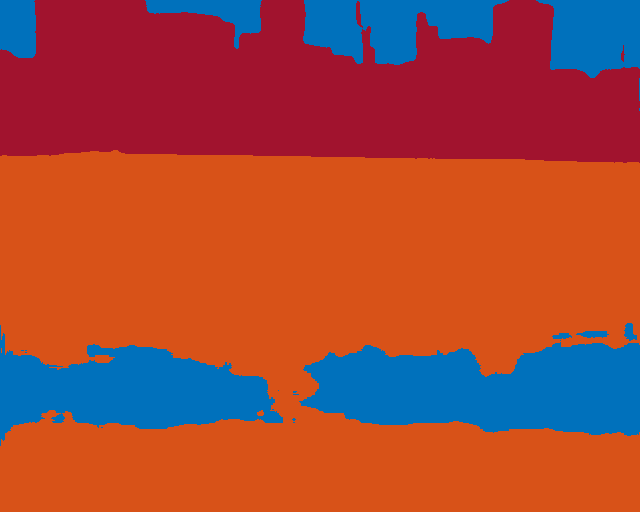

prev=477,i=478
iteration running is 478
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


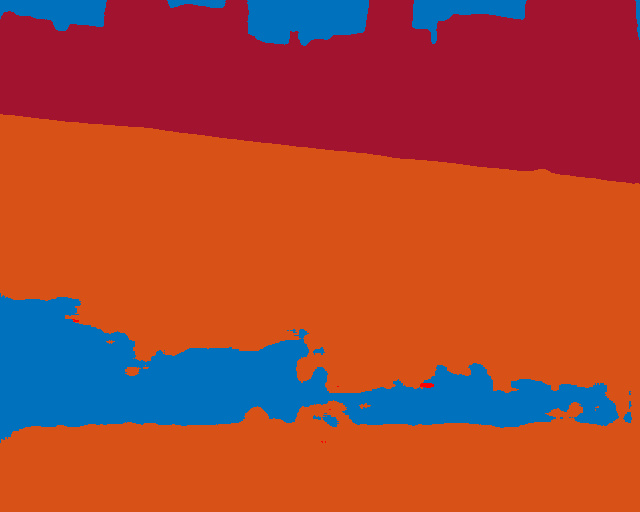

this is the raw image
this is the ground truth mask
this is the colored inferred image


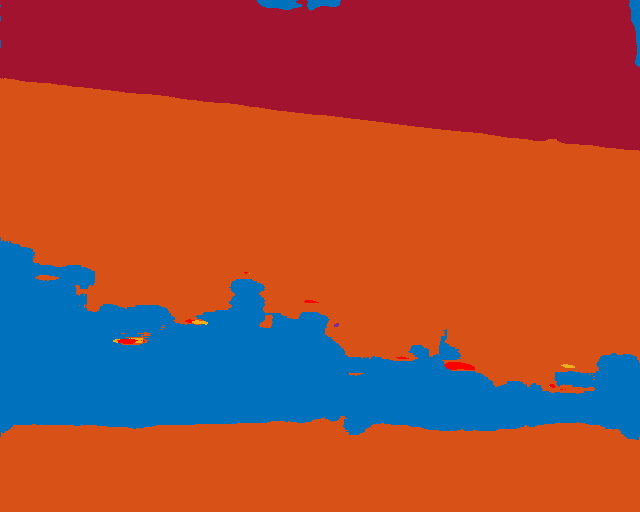

prev=479,i=480
iteration running is 480
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


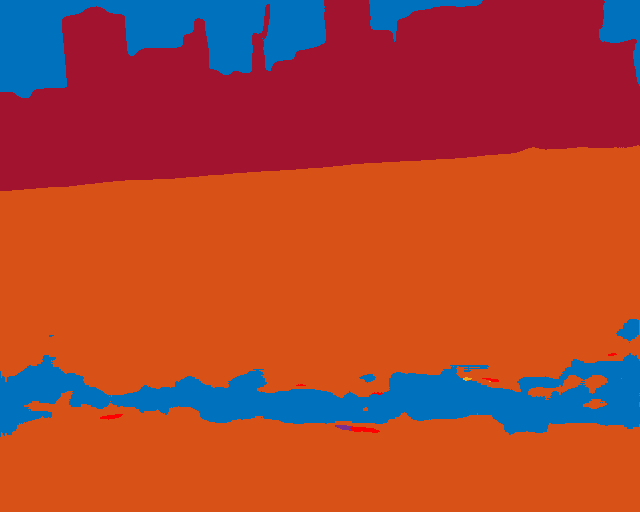

this is the raw image
this is the ground truth mask
this is the colored inferred image


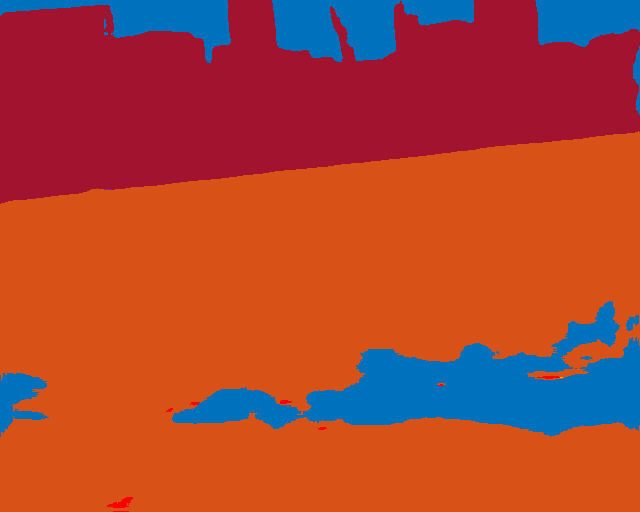

prev=481,i=482
iteration running is 482
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


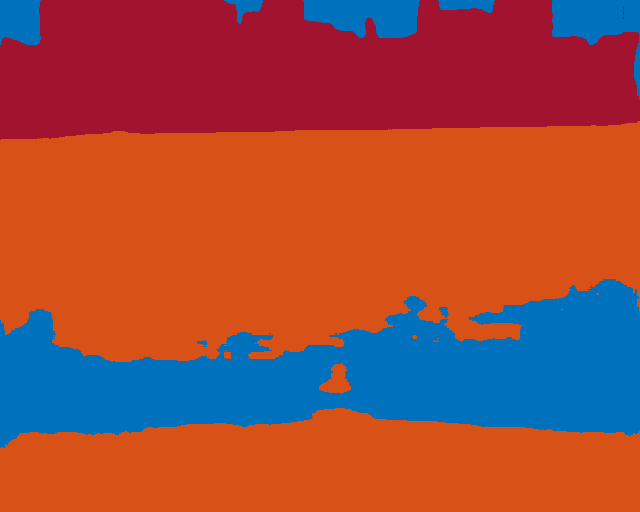

this is the raw image
this is the ground truth mask
this is the colored inferred image


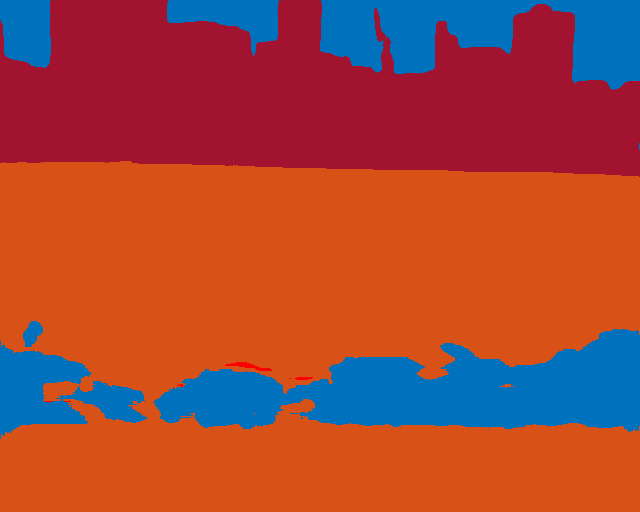

prev=483,i=484
iteration running is 484
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


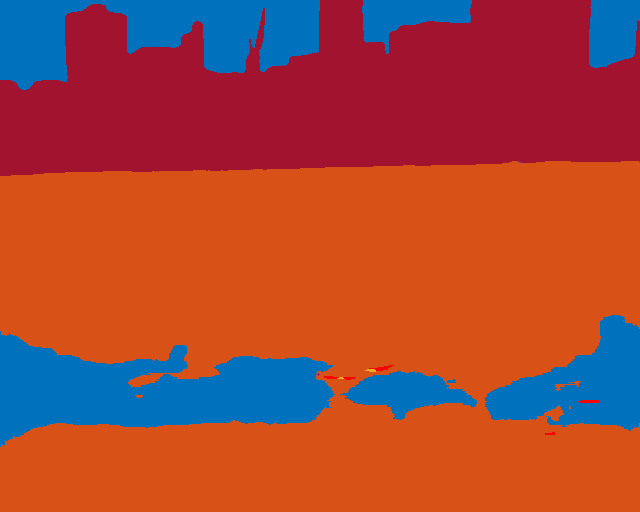

this is the raw image
this is the ground truth mask
this is the colored inferred image


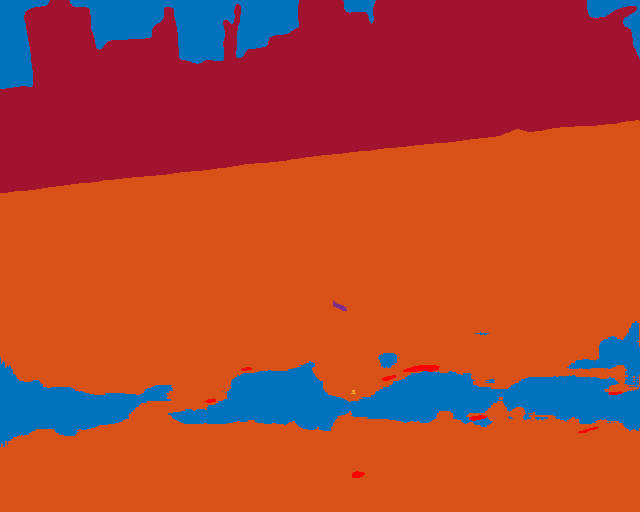

prev=485,i=486
iteration running is 486
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


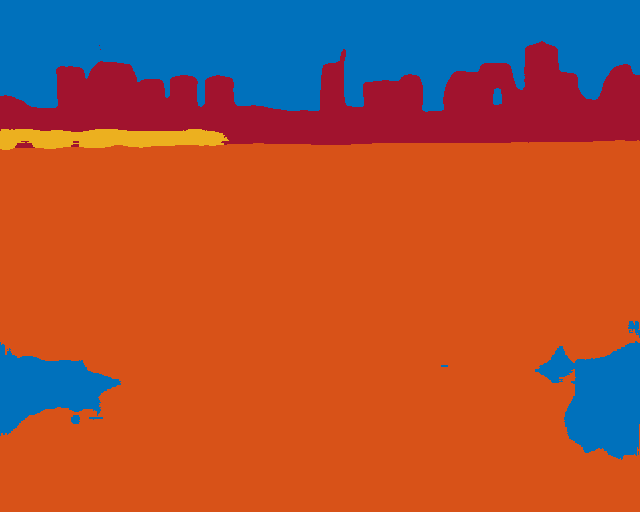

this is the raw image
this is the ground truth mask
this is the colored inferred image


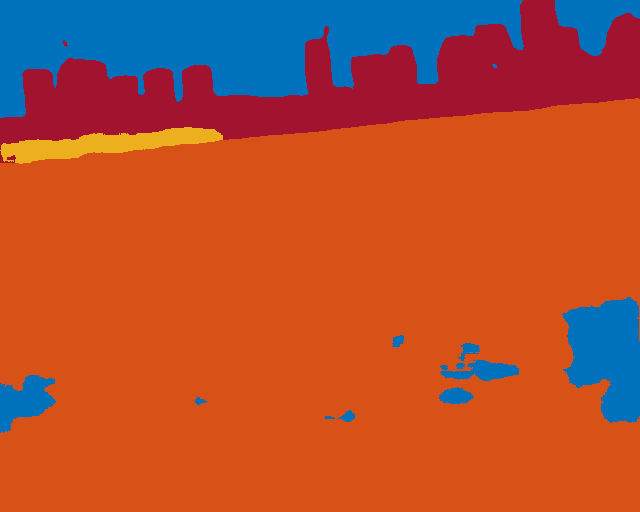

prev=487,i=488
iteration running is 488
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


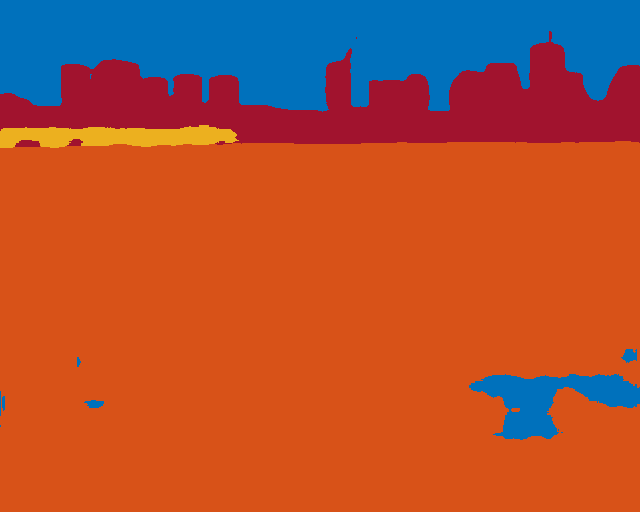

this is the raw image
this is the ground truth mask
this is the colored inferred image


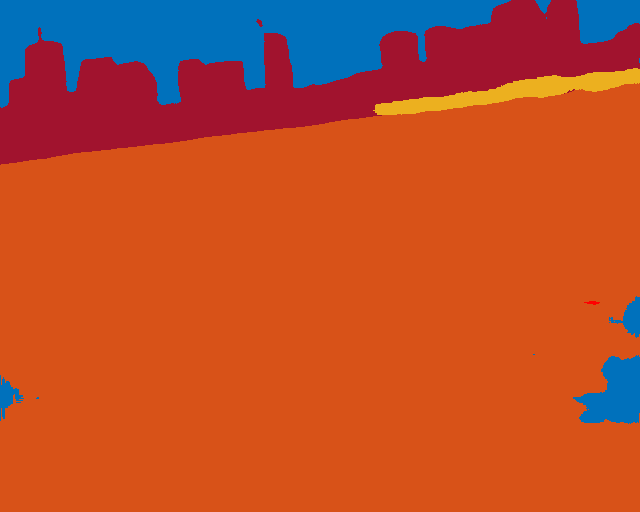

prev=489,i=490
iteration running is 490
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


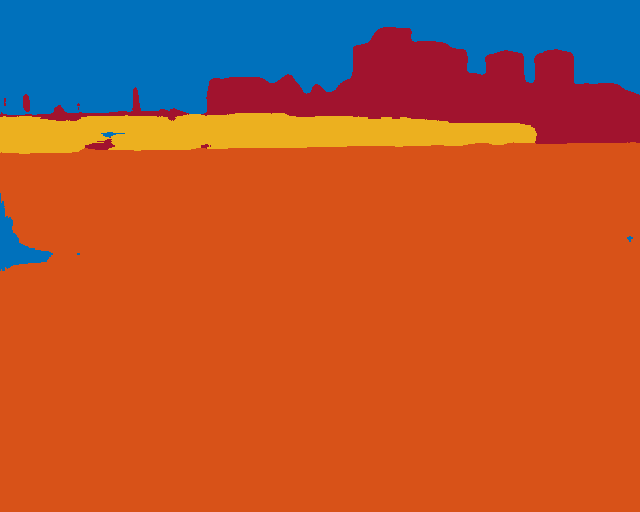

this is the raw image
this is the ground truth mask
this is the colored inferred image


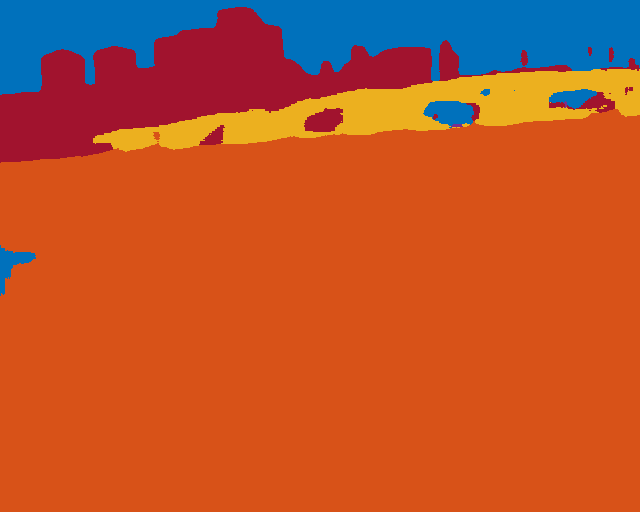

prev=491,i=492
iteration running is 492
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


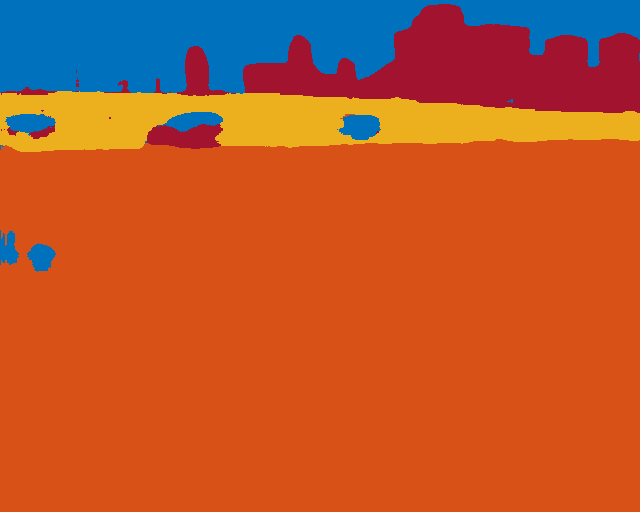

this is the raw image
this is the ground truth mask
this is the colored inferred image


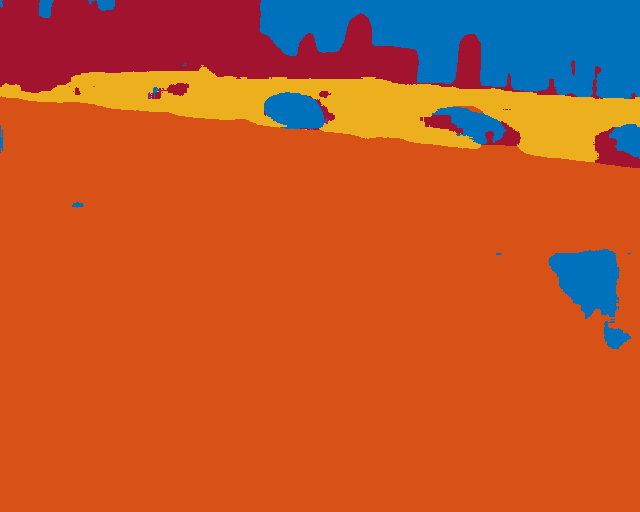

prev=493,i=494
iteration running is 494
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


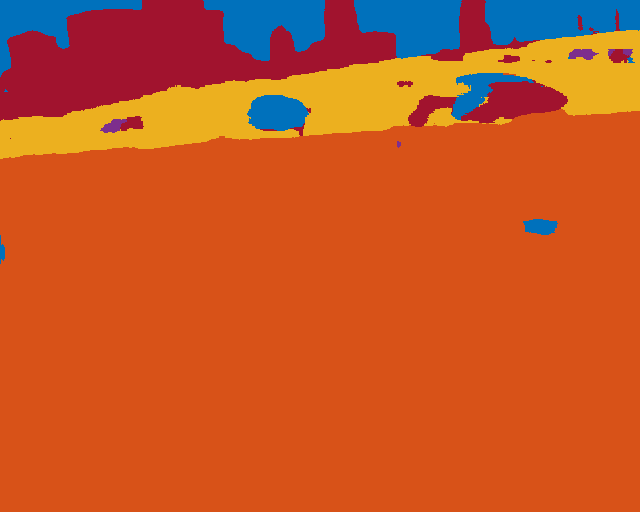

this is the raw image
this is the ground truth mask
this is the colored inferred image


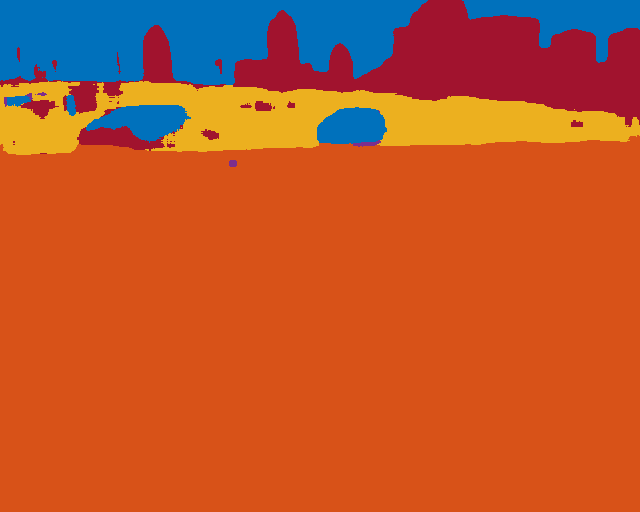

prev=495,i=496
iteration running is 496
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


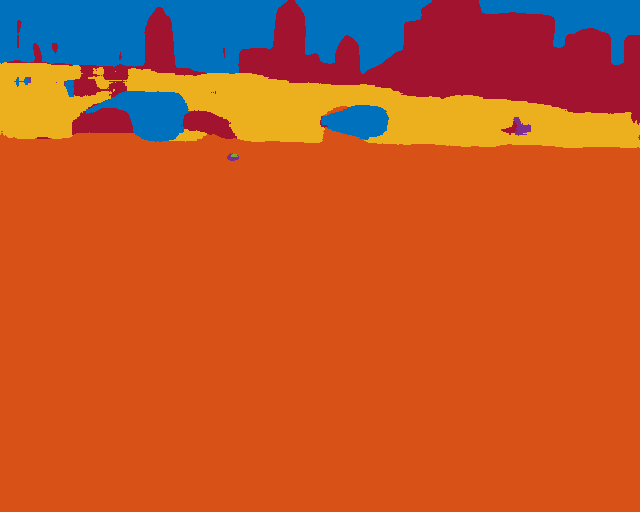

this is the raw image
this is the ground truth mask
this is the colored inferred image


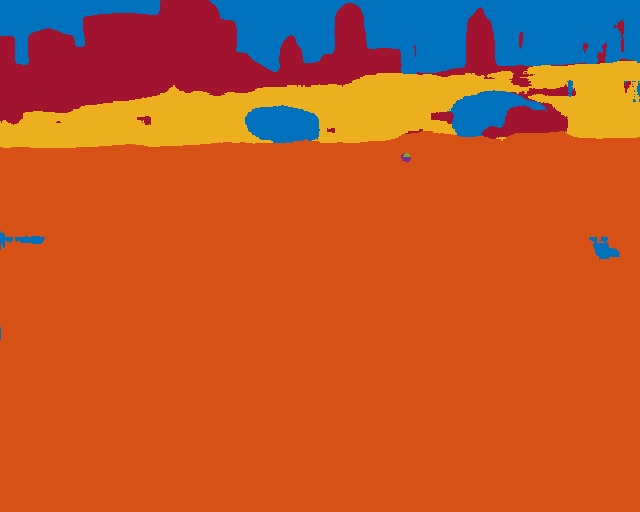

prev=497,i=498
iteration running is 498
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


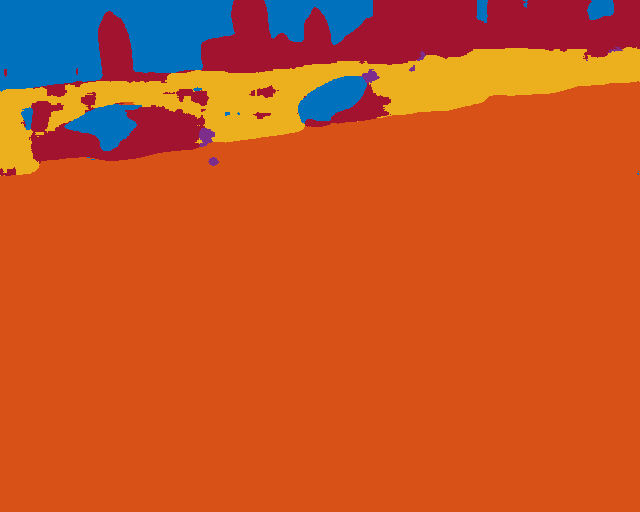

this is the raw image
this is the ground truth mask
this is the colored inferred image


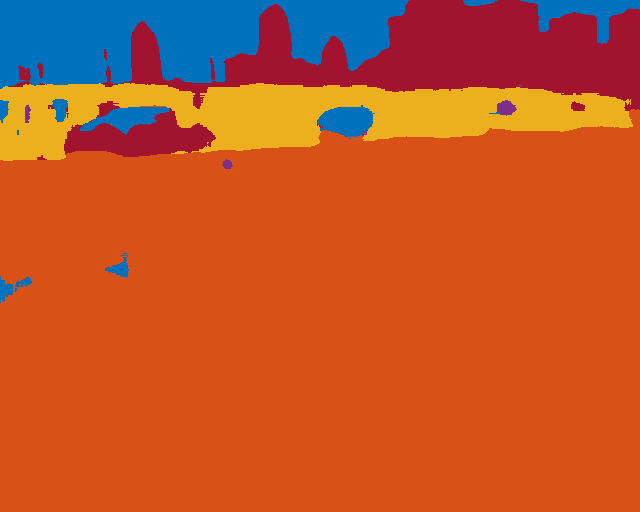

prev=499,i=500
iteration running is 500
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


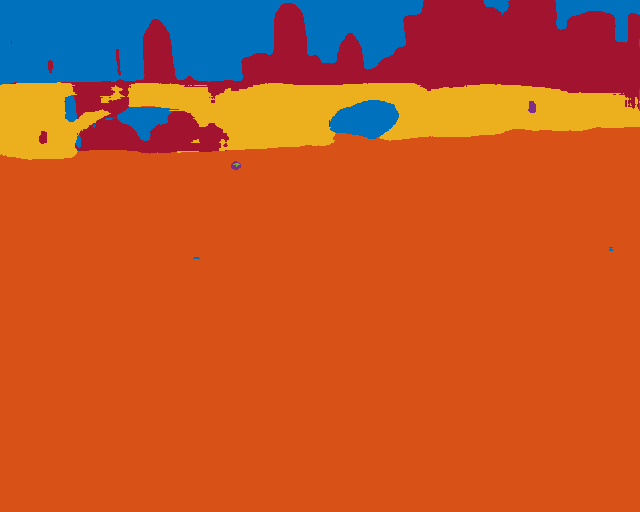

this is the raw image
this is the ground truth mask
this is the colored inferred image


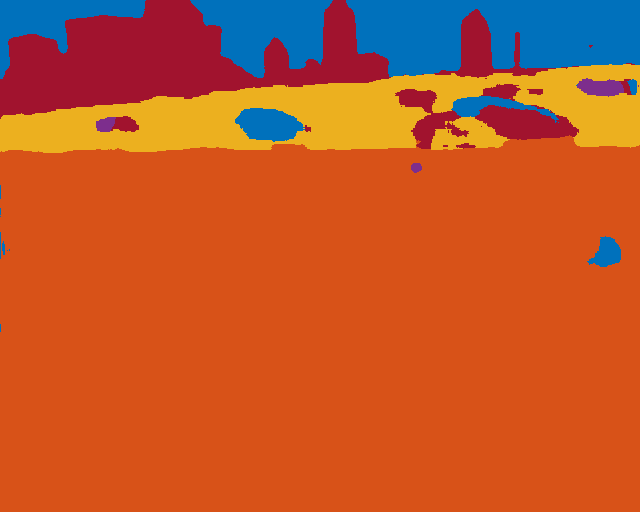

prev=501,i=502
iteration running is 502
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


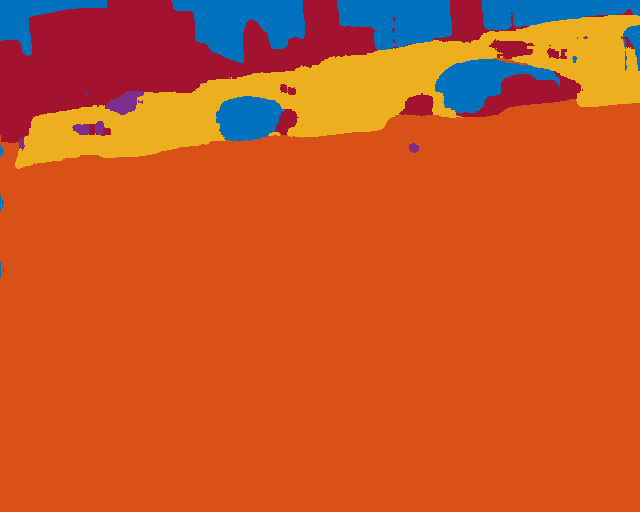

this is the raw image
this is the ground truth mask
this is the colored inferred image


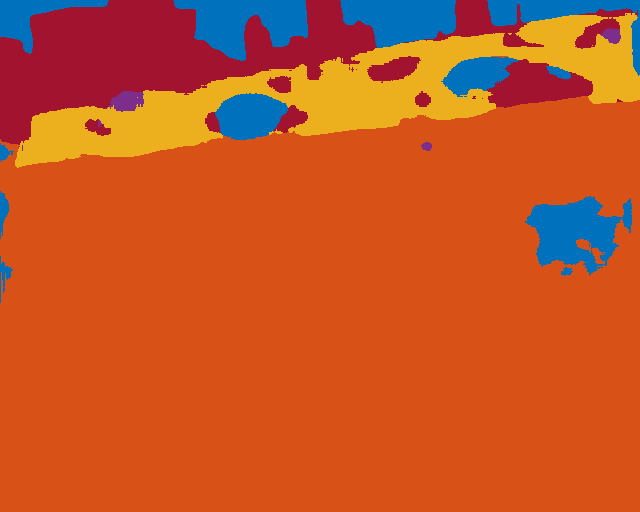

prev=503,i=504
iteration running is 504
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


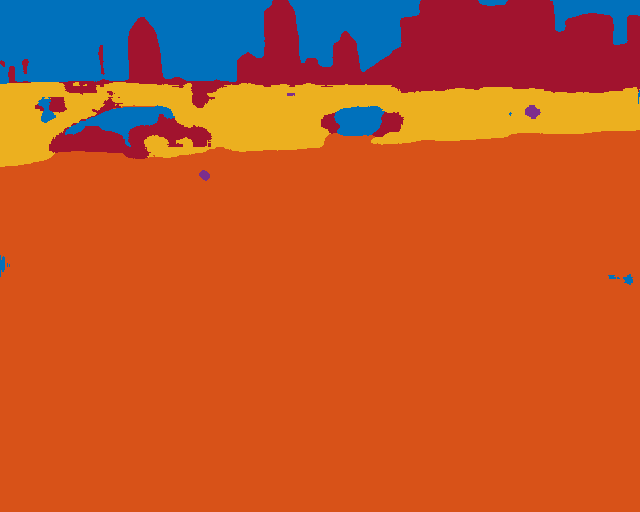

this is the raw image
this is the ground truth mask
this is the colored inferred image


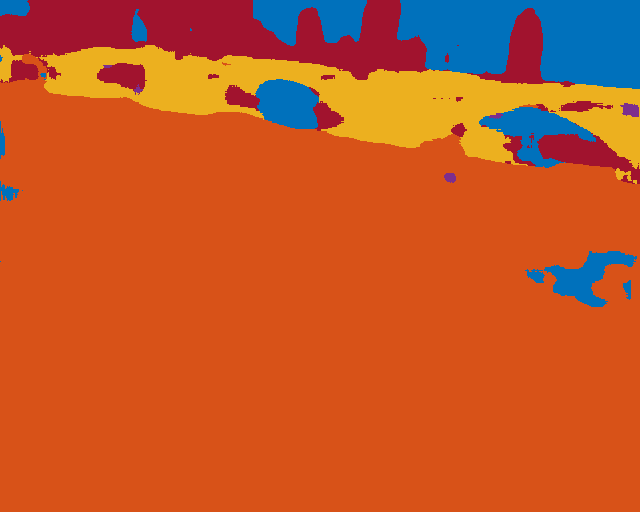

prev=505,i=506
iteration running is 506
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


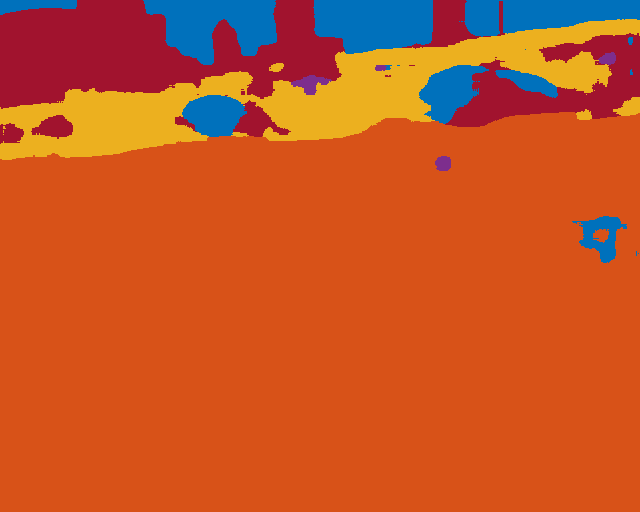

this is the raw image
this is the ground truth mask
this is the colored inferred image


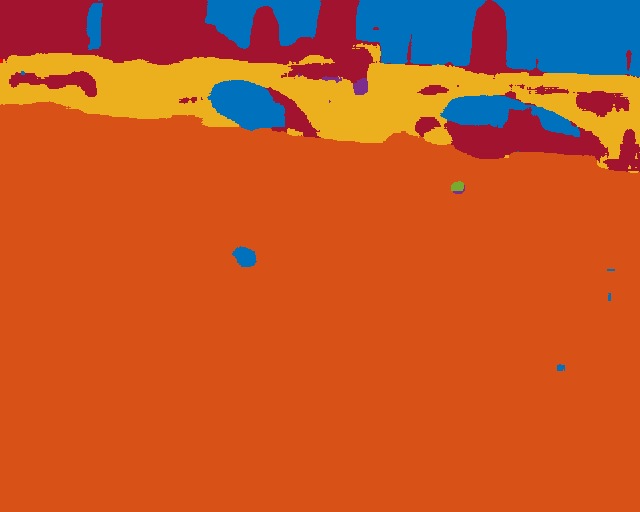

prev=507,i=508
iteration running is 508
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


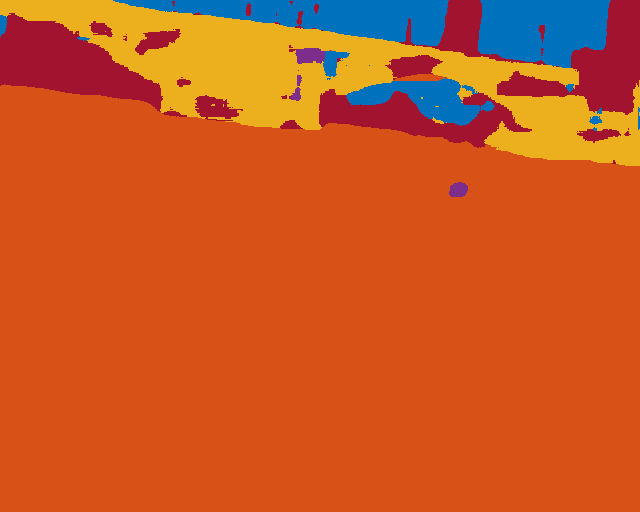

this is the raw image
this is the ground truth mask
this is the colored inferred image


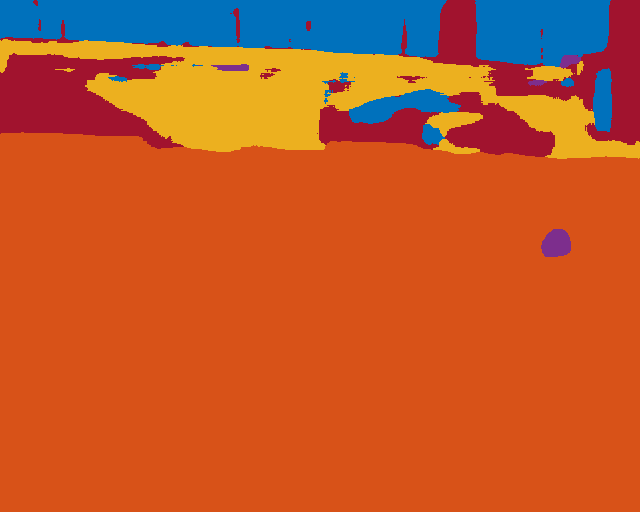

prev=509,i=510
iteration running is 510
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


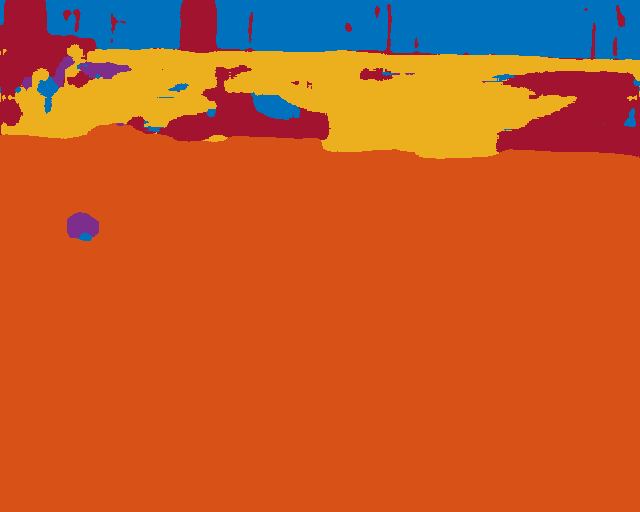

this is the raw image
this is the ground truth mask
this is the colored inferred image


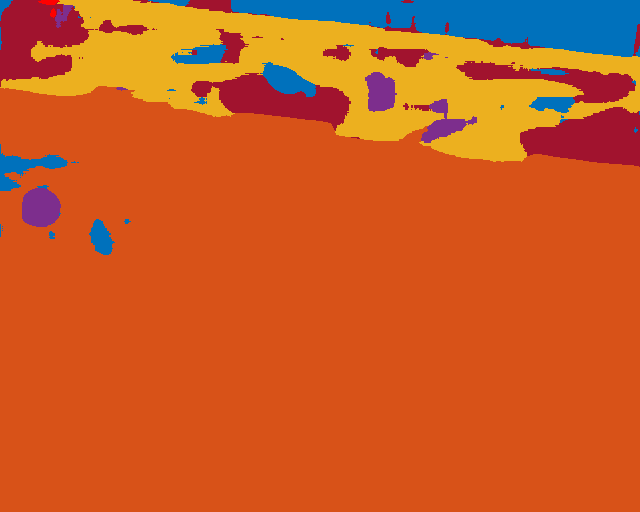

prev=511,i=512
iteration running is 512
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


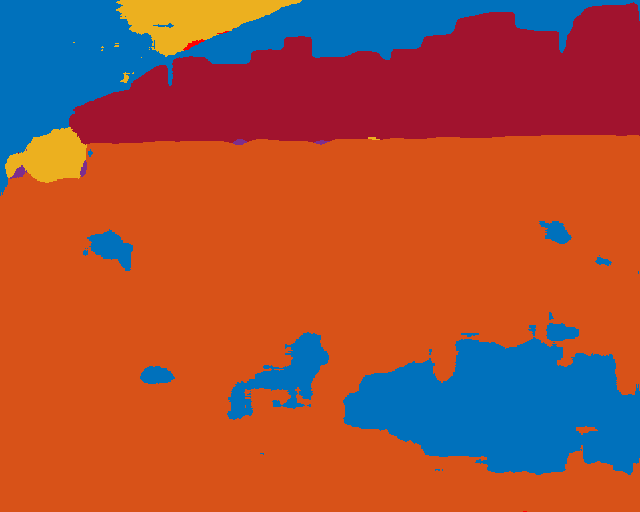

this is the raw image
this is the ground truth mask
this is the colored inferred image


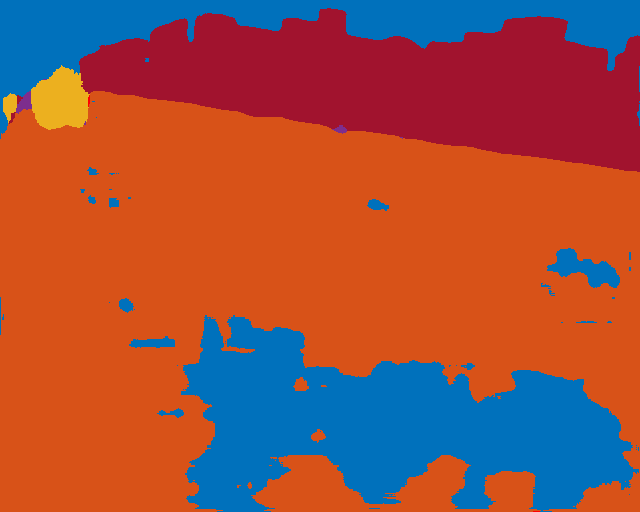

prev=513,i=514
iteration running is 514
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


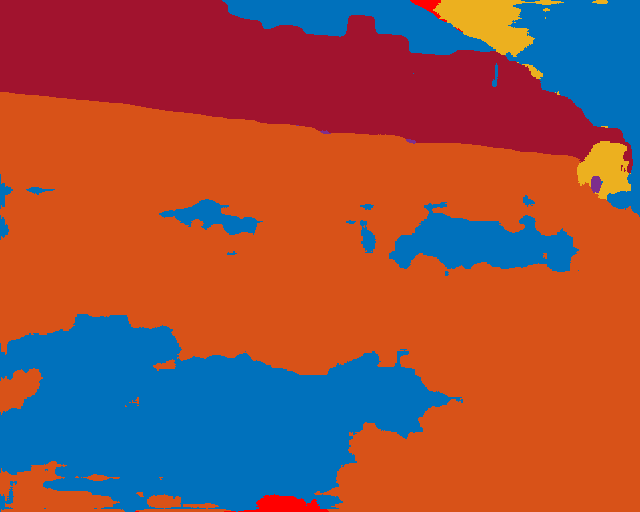

this is the raw image
this is the ground truth mask
this is the colored inferred image


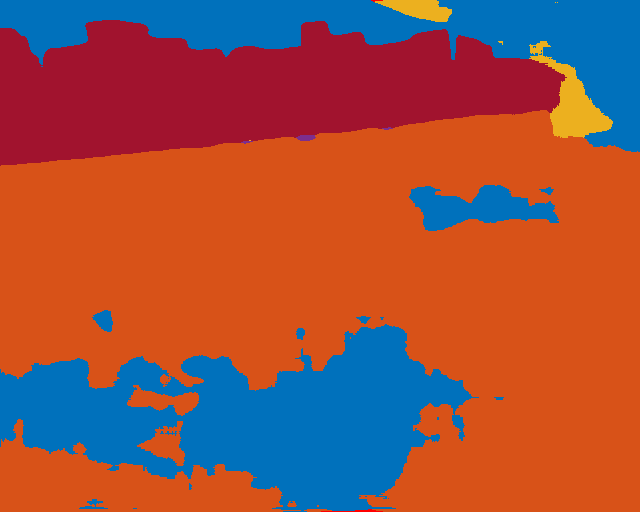

prev=515,i=516
iteration running is 516
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


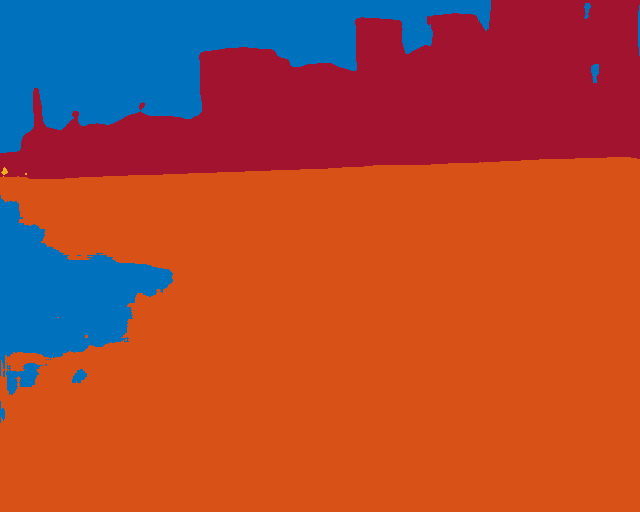

this is the raw image
this is the ground truth mask
this is the colored inferred image


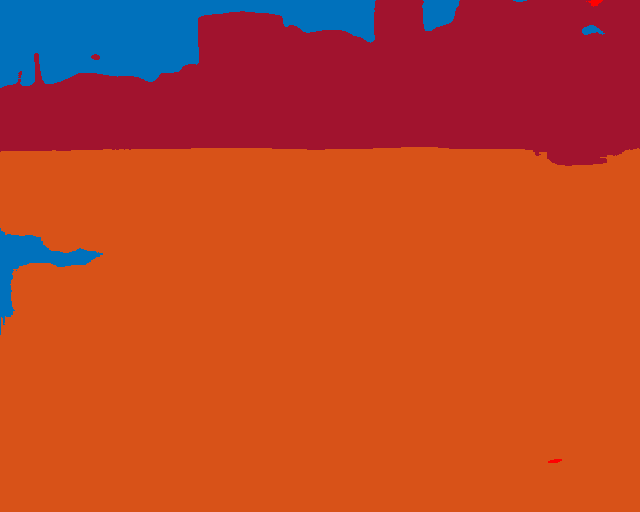

prev=517,i=518
iteration running is 518
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


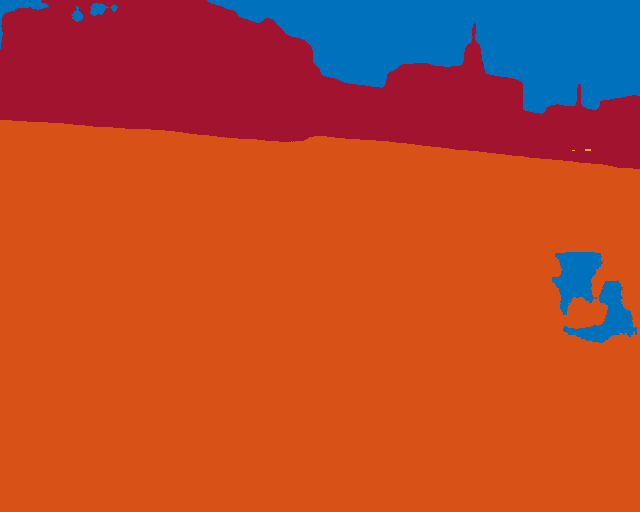

this is the raw image
this is the ground truth mask
this is the colored inferred image


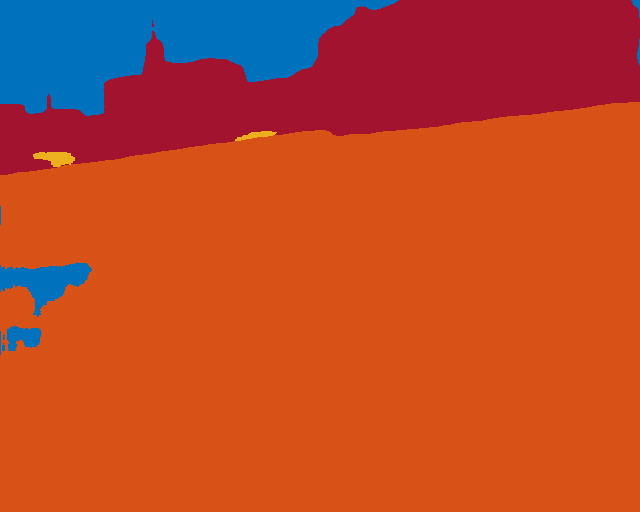

prev=519,i=520
iteration running is 520
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


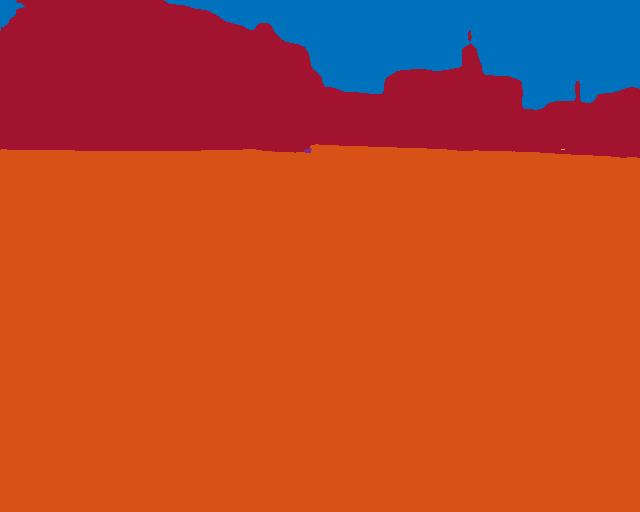

this is the raw image
this is the ground truth mask
this is the colored inferred image


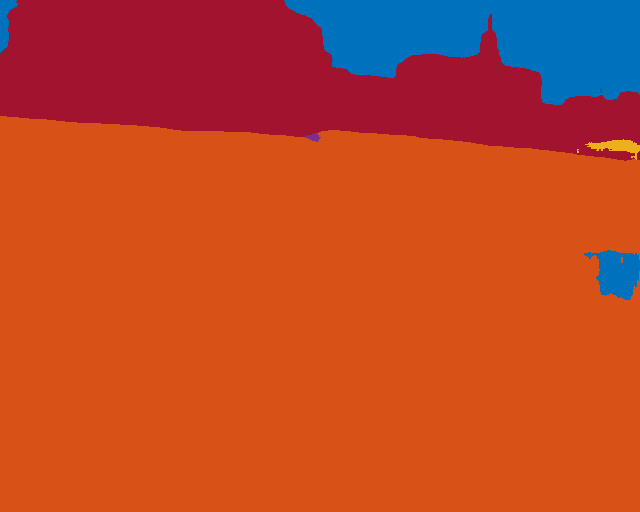

prev=521,i=522
iteration running is 522
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


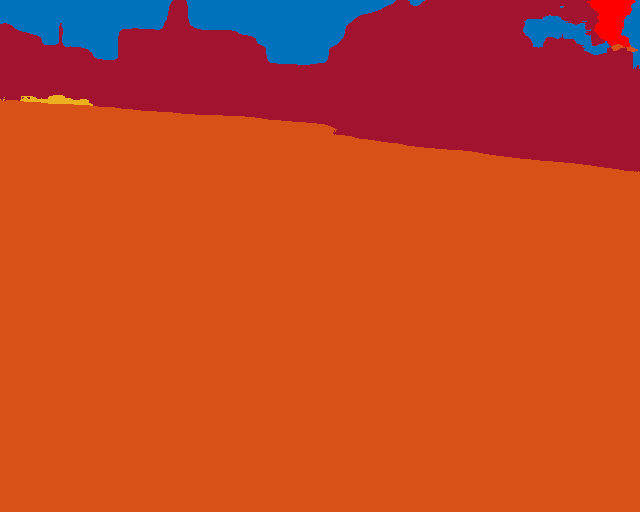

this is the raw image
this is the ground truth mask
this is the colored inferred image


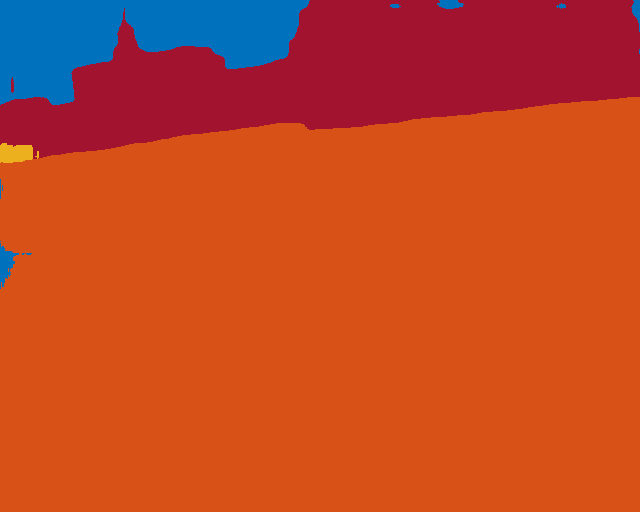

prev=523,i=524
iteration running is 524
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


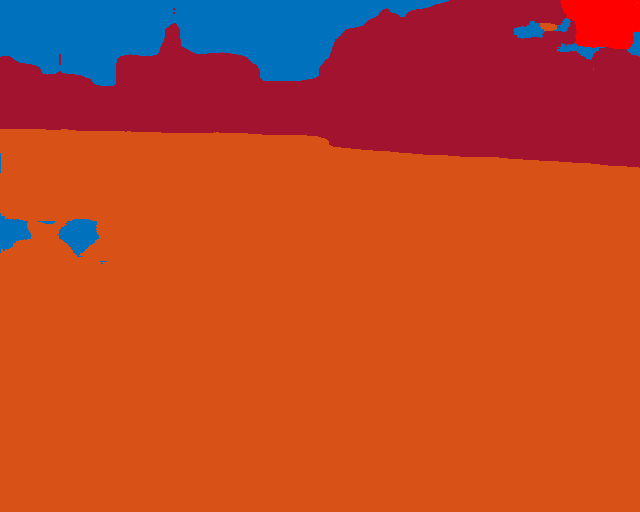

this is the raw image
this is the ground truth mask
this is the colored inferred image


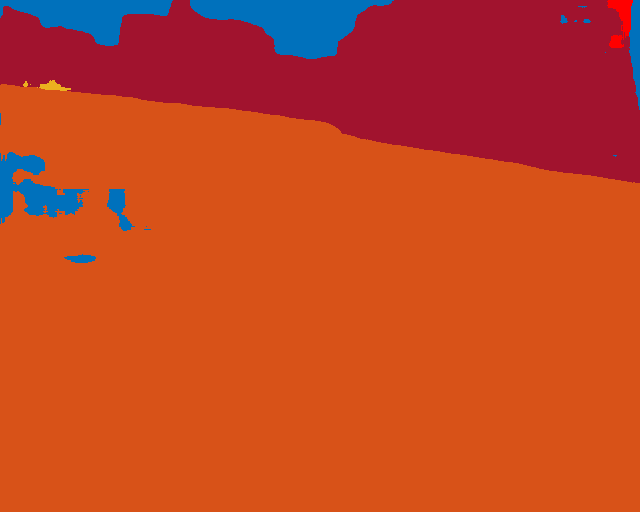

prev=525,i=526
iteration running is 526
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


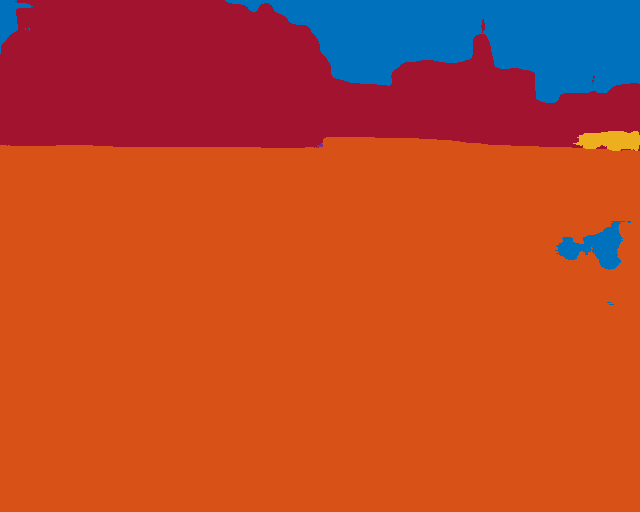

this is the raw image
this is the ground truth mask
this is the colored inferred image


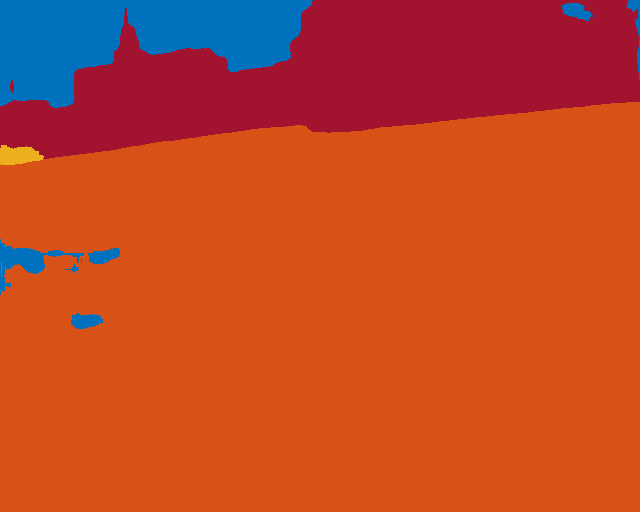

prev=527,i=528
iteration running is 528
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


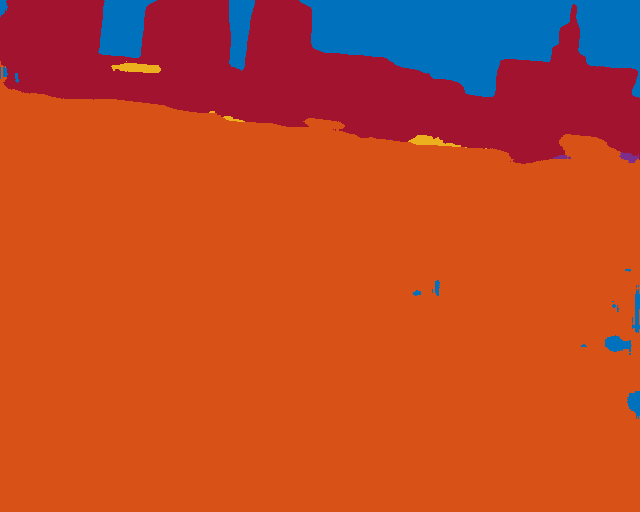

this is the raw image
this is the ground truth mask
this is the colored inferred image


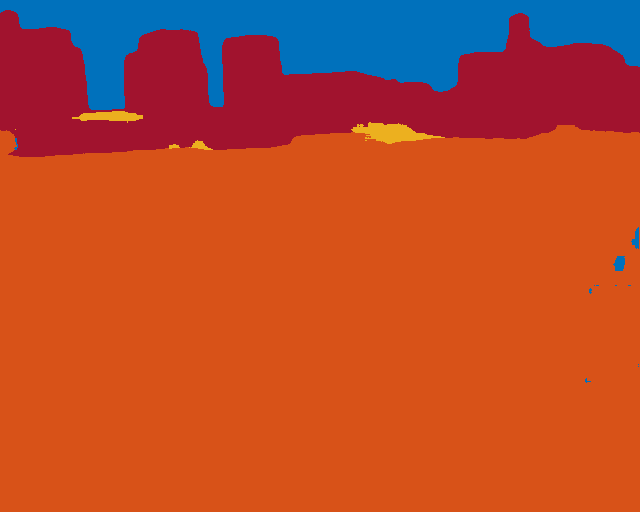

prev=529,i=530
iteration running is 530
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


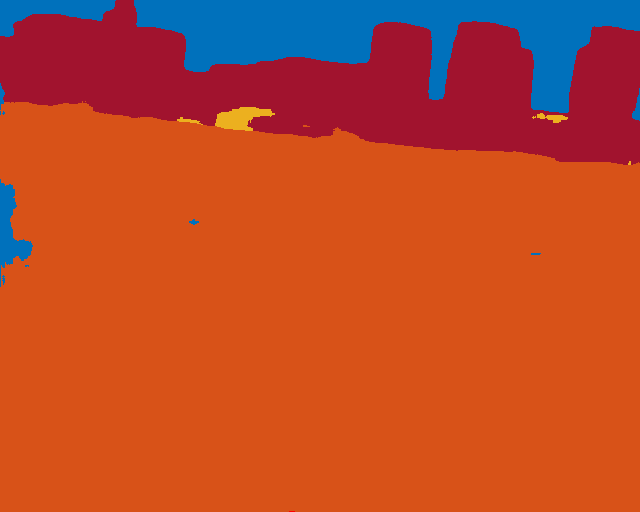

this is the raw image
this is the ground truth mask
this is the colored inferred image


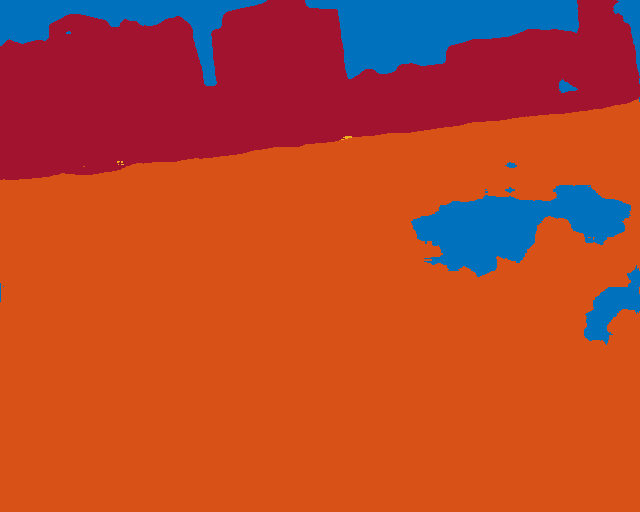

prev=531,i=532
iteration running is 532
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


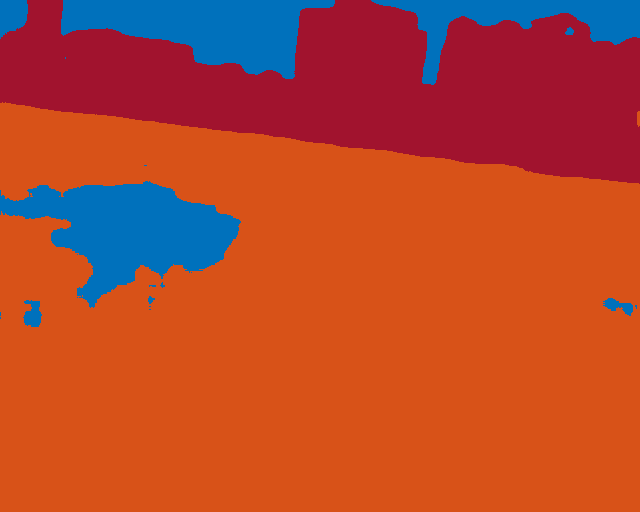

this is the raw image
this is the ground truth mask
this is the colored inferred image


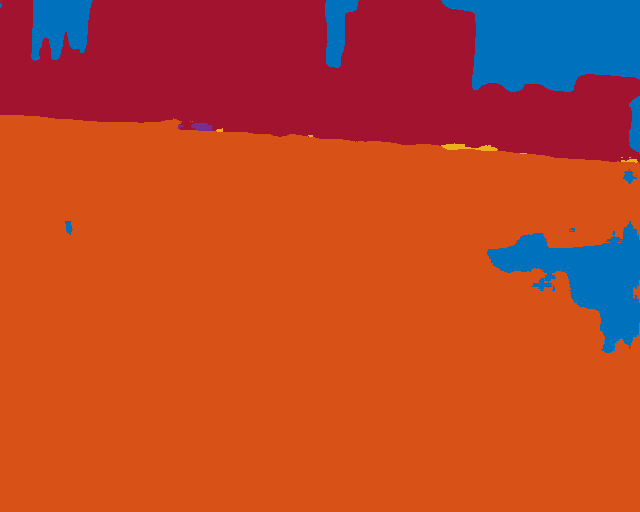

prev=533,i=534
iteration running is 534
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


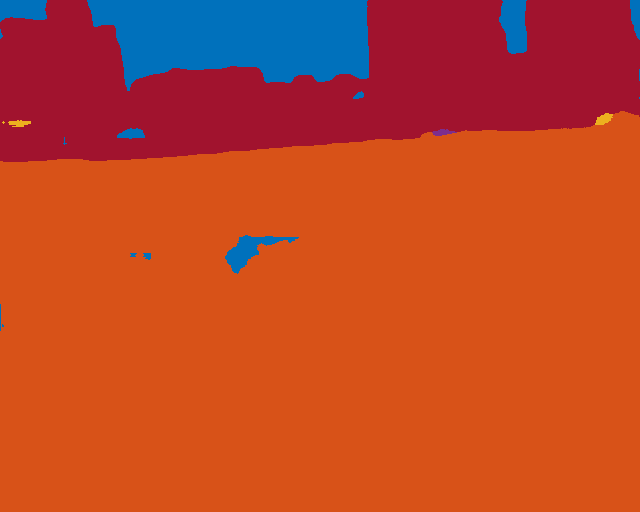

this is the raw image
this is the ground truth mask
this is the colored inferred image


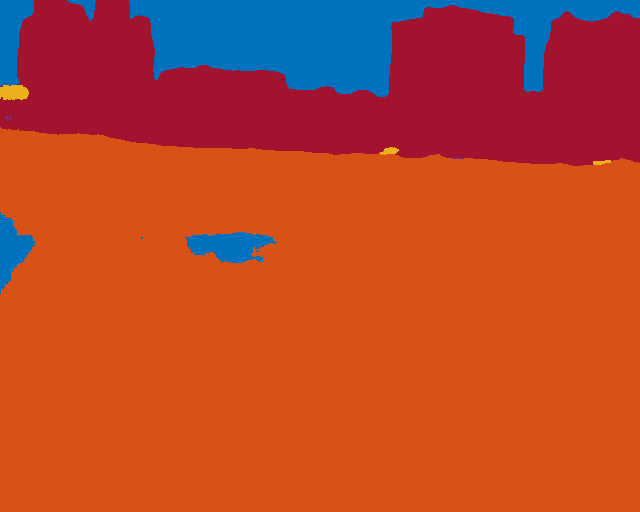

prev=535,i=536
iteration running is 536
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


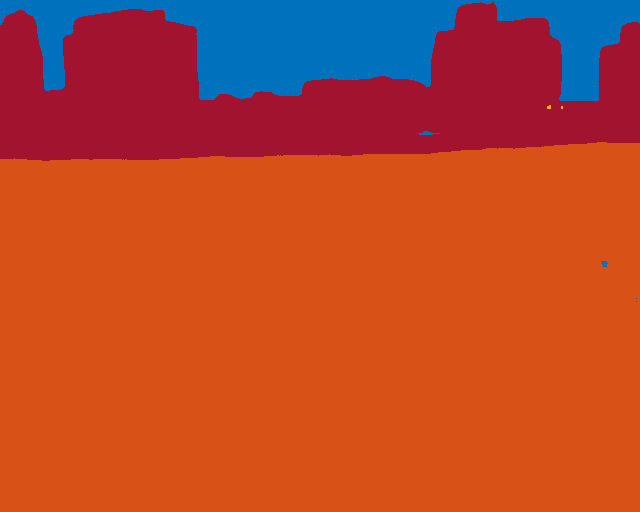

this is the raw image
this is the ground truth mask
this is the colored inferred image


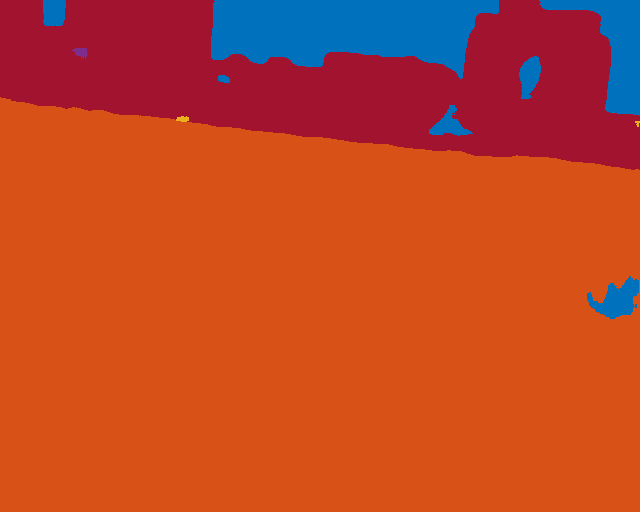

prev=537,i=538
iteration running is 538
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


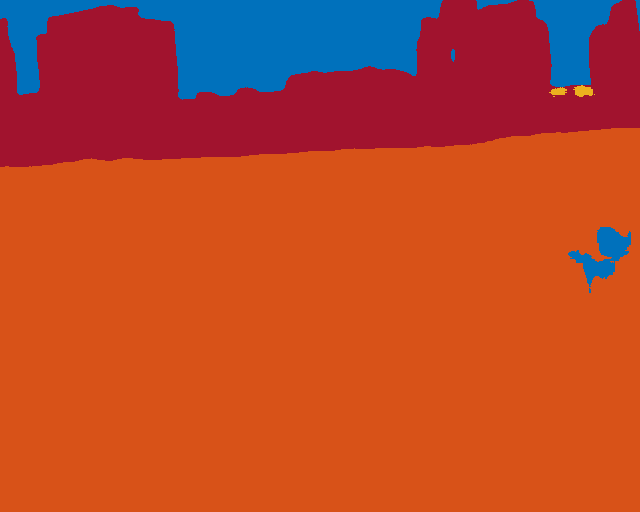

this is the raw image
this is the ground truth mask
this is the colored inferred image


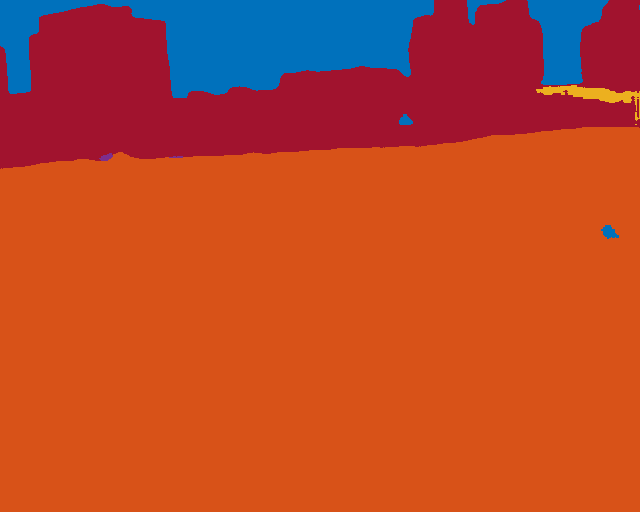

prev=539,i=540
iteration running is 540
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


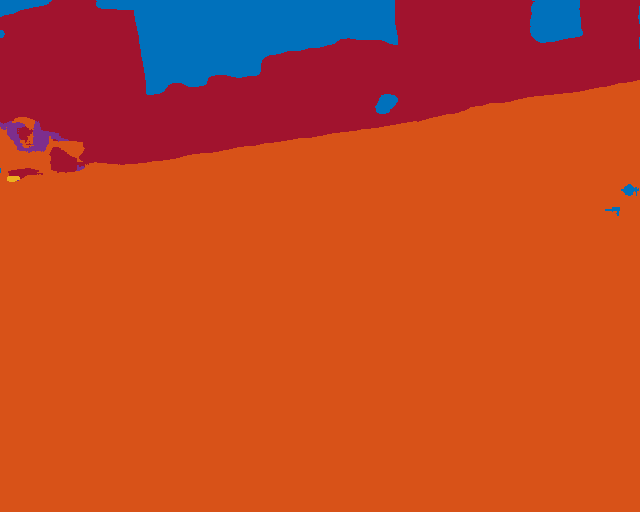

this is the raw image
this is the ground truth mask
this is the colored inferred image


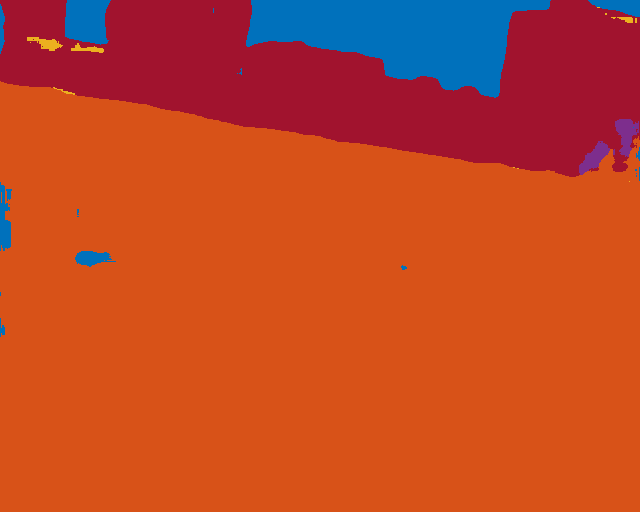

prev=541,i=542
iteration running is 542
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


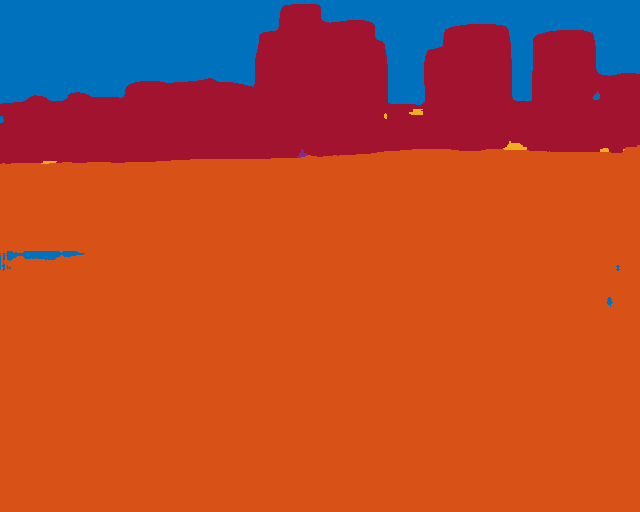

this is the raw image
this is the ground truth mask
this is the colored inferred image


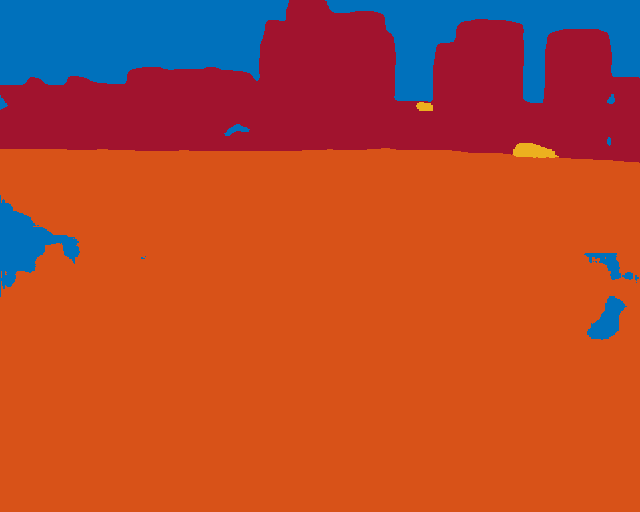

prev=543,i=544
iteration running is 544
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


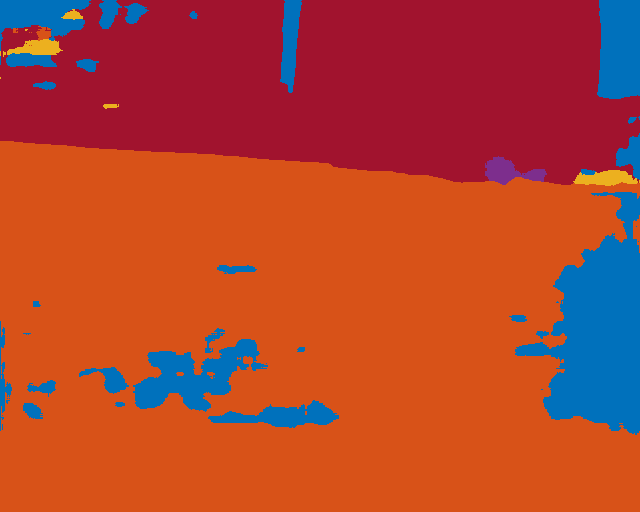

this is the raw image
this is the ground truth mask
this is the colored inferred image


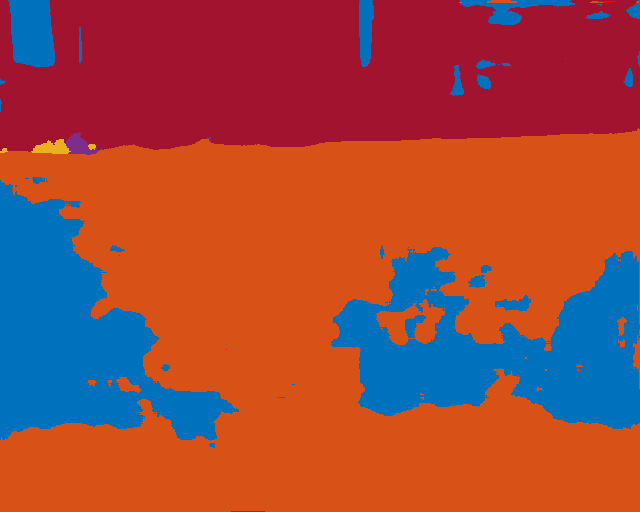

prev=545,i=546
iteration running is 546
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


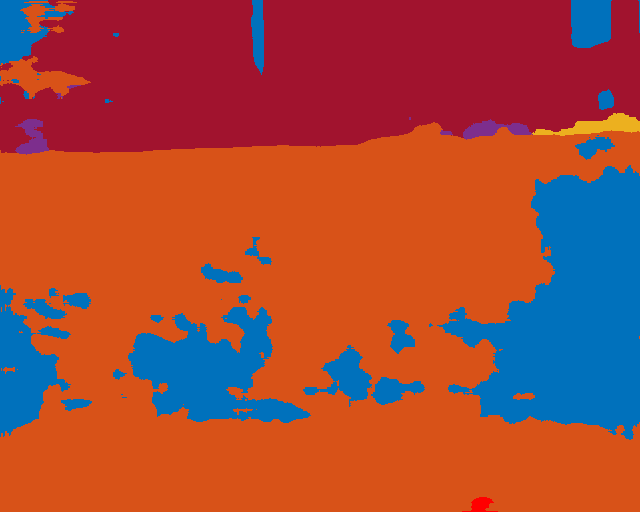

this is the raw image
this is the ground truth mask
this is the colored inferred image


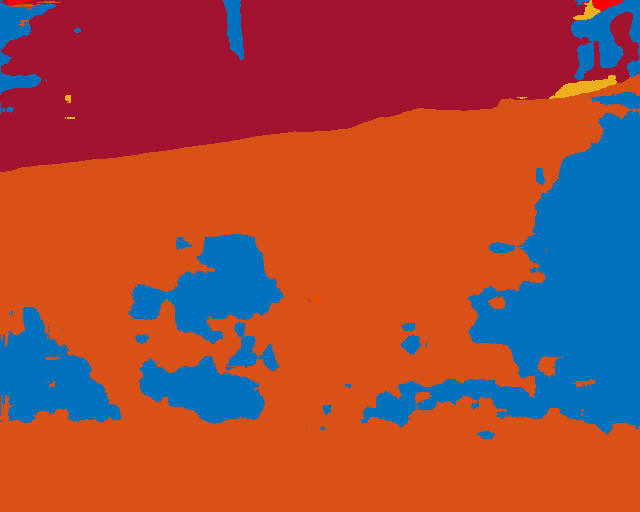

prev=547,i=548
iteration running is 548
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


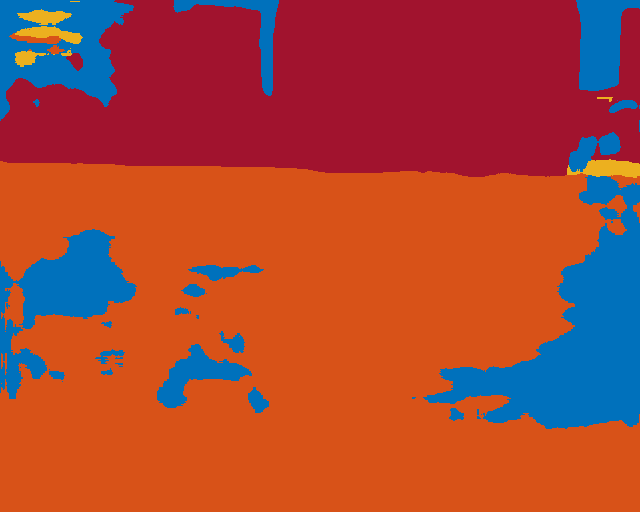

this is the raw image
this is the ground truth mask
this is the colored inferred image


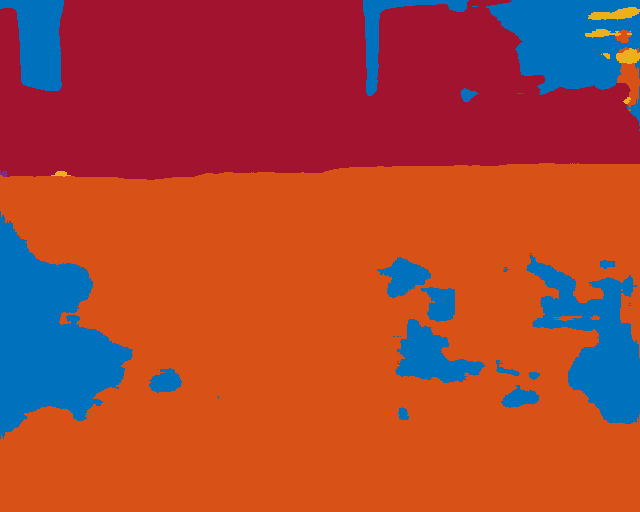

prev=549,i=550
iteration running is 550
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


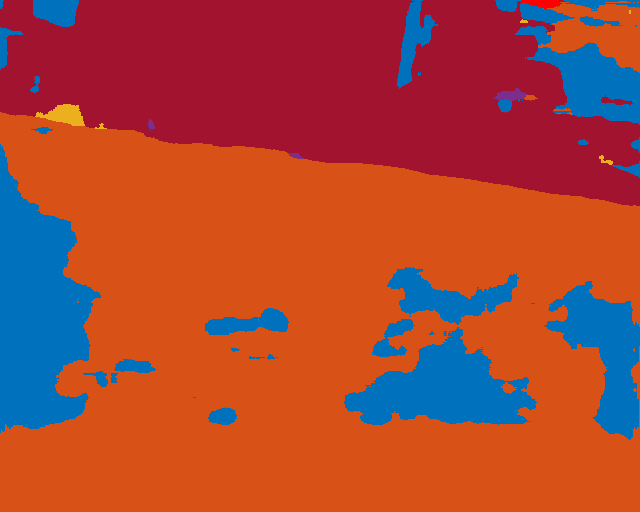

this is the raw image
this is the ground truth mask
this is the colored inferred image


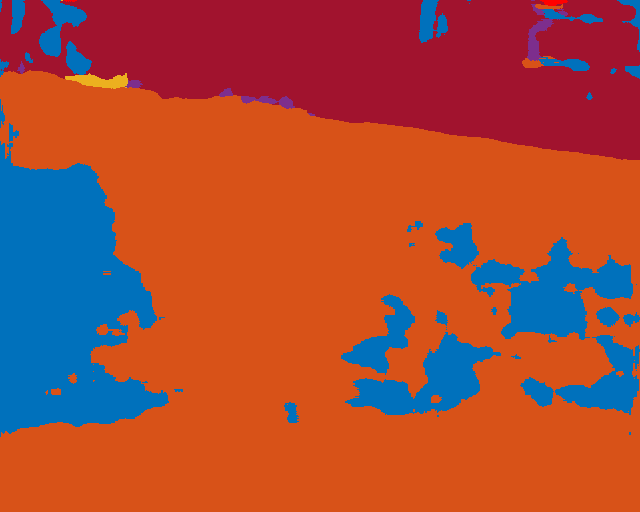

prev=551,i=552
iteration running is 552
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


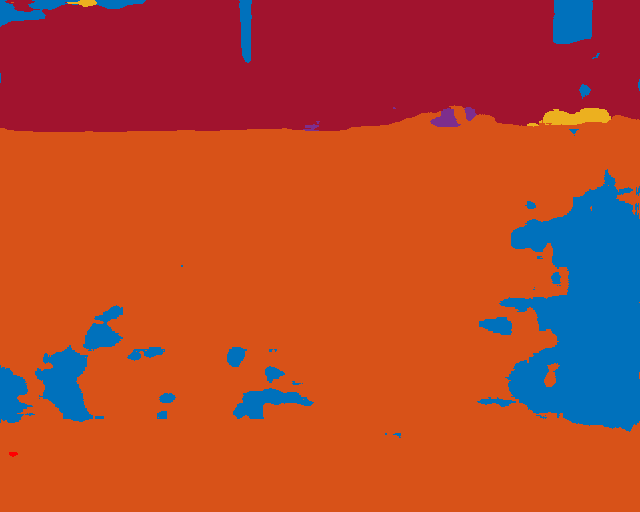

this is the raw image
this is the ground truth mask
this is the colored inferred image


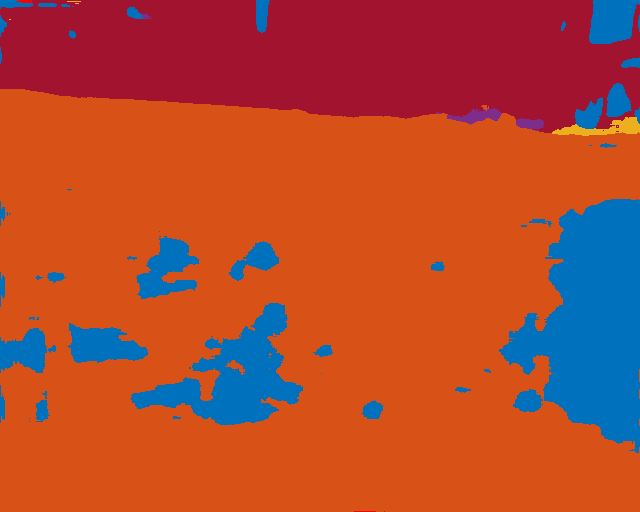

prev=553,i=554
iteration running is 554
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


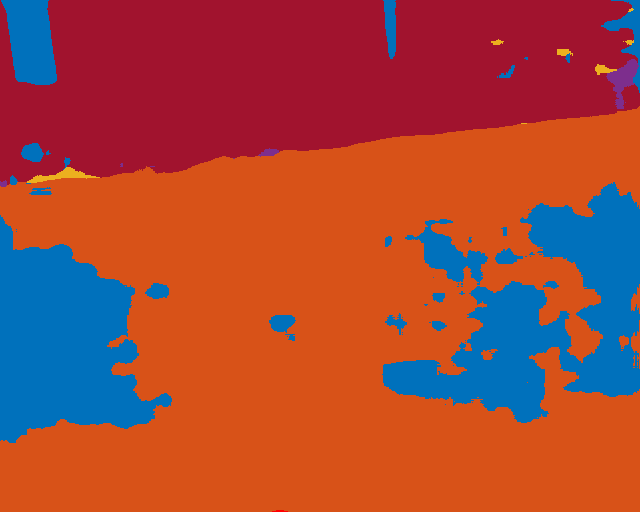

this is the raw image
this is the ground truth mask
this is the colored inferred image


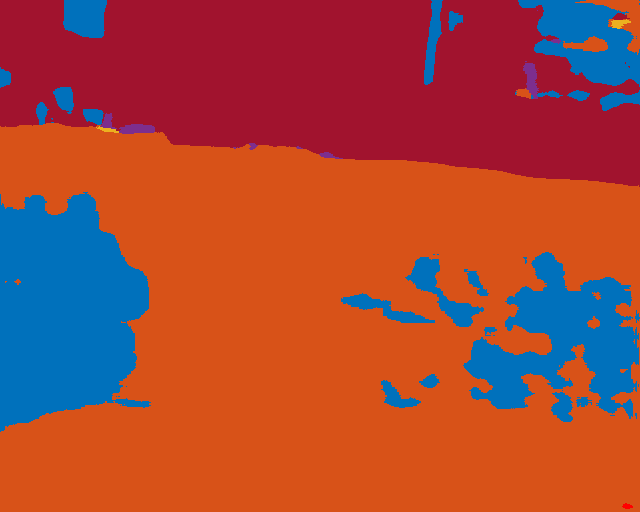

prev=555,i=556
iteration running is 556
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


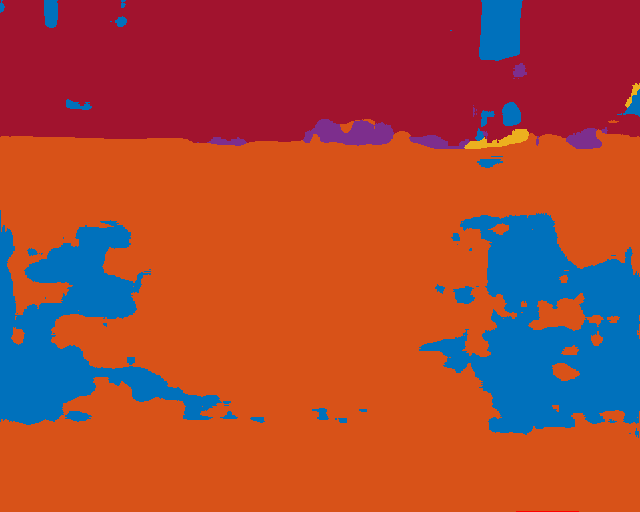

this is the raw image
this is the ground truth mask
this is the colored inferred image


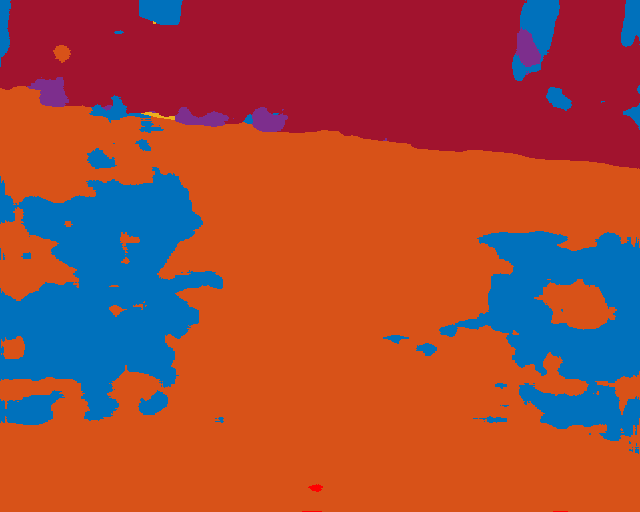

prev=557,i=558
iteration running is 558
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


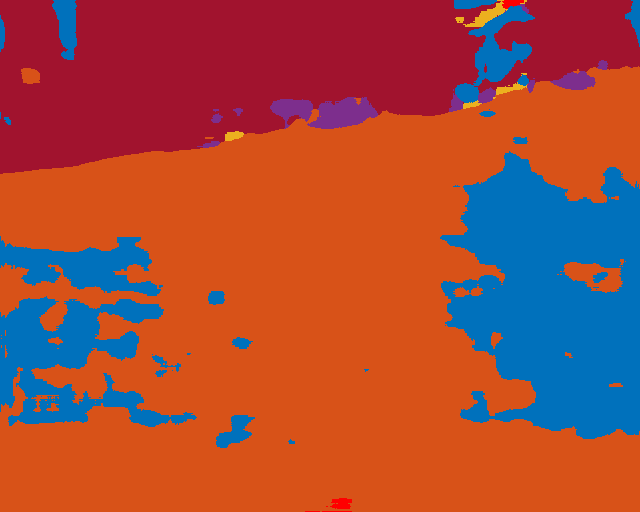

this is the raw image
this is the ground truth mask
this is the colored inferred image


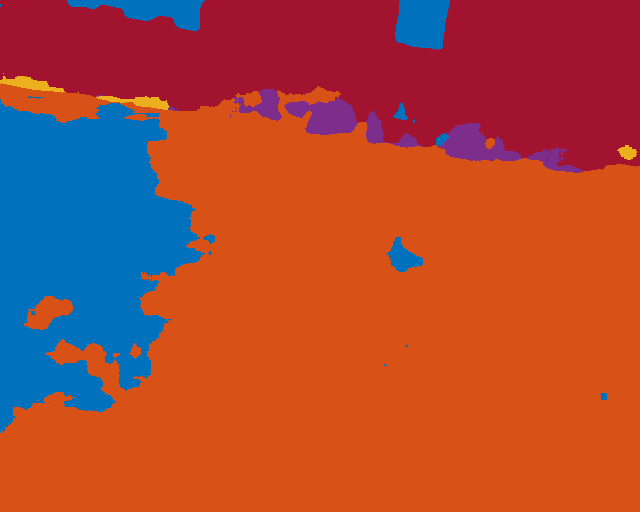

prev=559,i=560
iteration running is 560
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


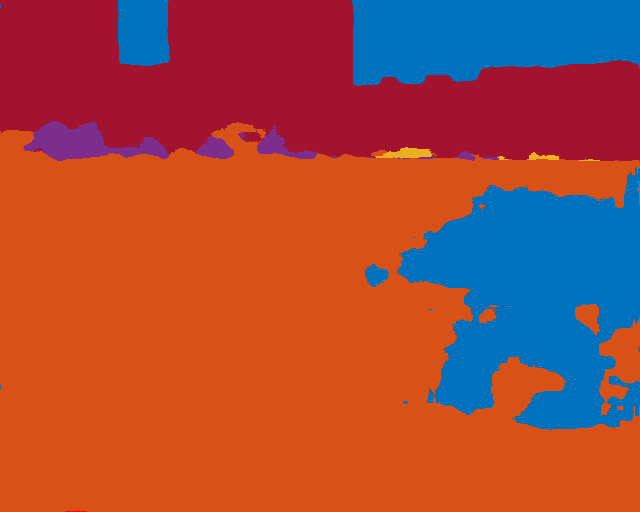

this is the raw image
this is the ground truth mask
this is the colored inferred image


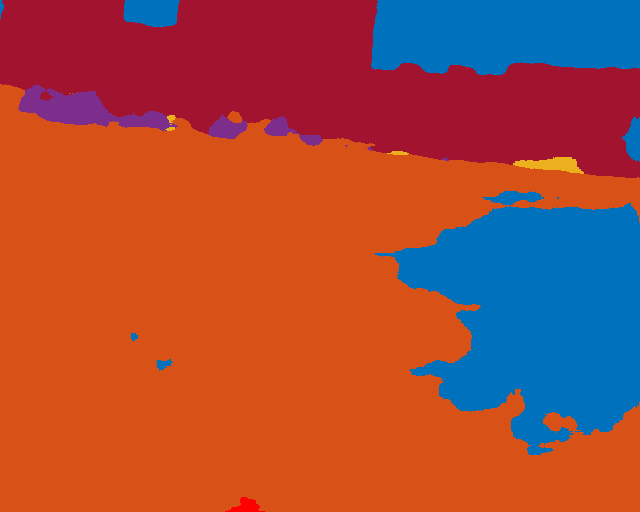

prev=561,i=562
iteration running is 562
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


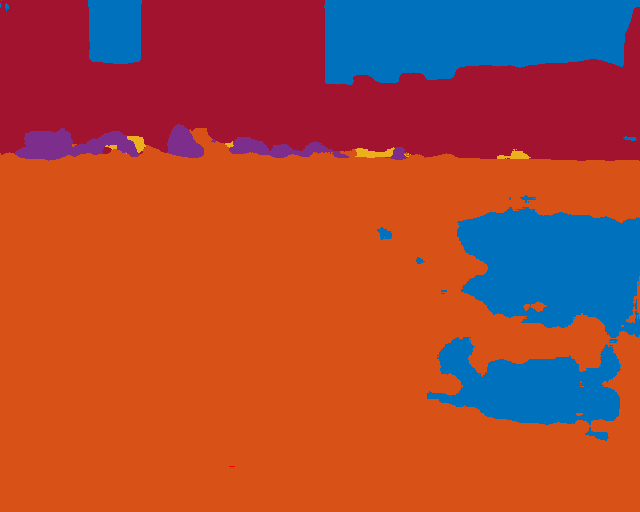

this is the raw image
this is the ground truth mask
this is the colored inferred image


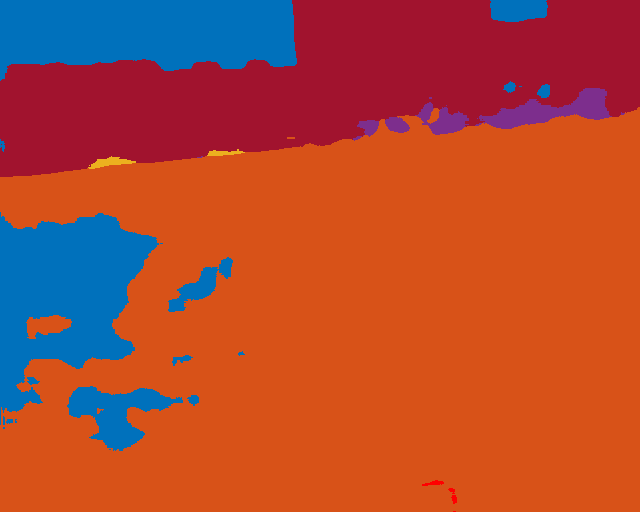

prev=563,i=564
iteration running is 564
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


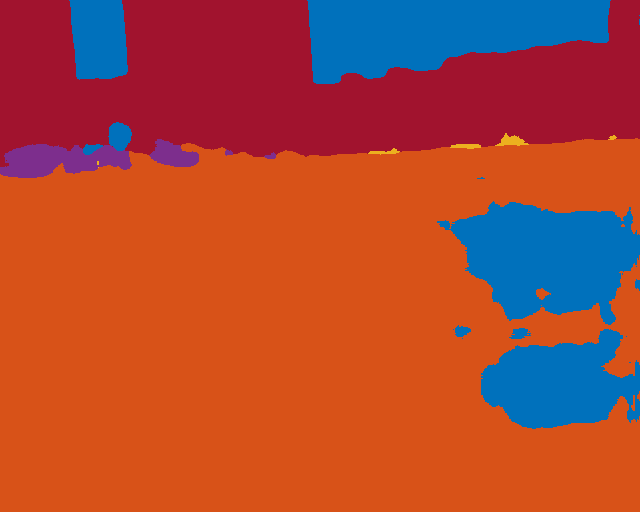

this is the raw image
this is the ground truth mask
this is the colored inferred image


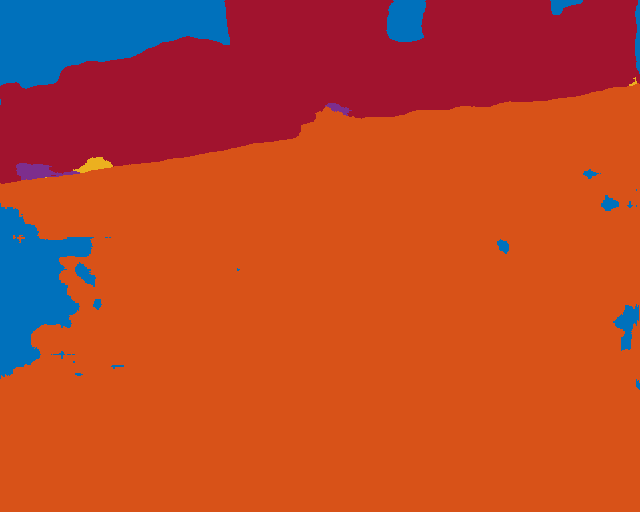

prev=565,i=566
iteration running is 566
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


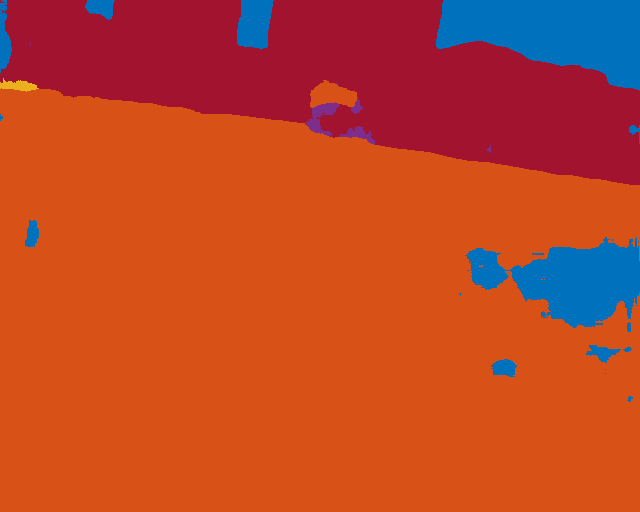

this is the raw image
this is the ground truth mask
this is the colored inferred image


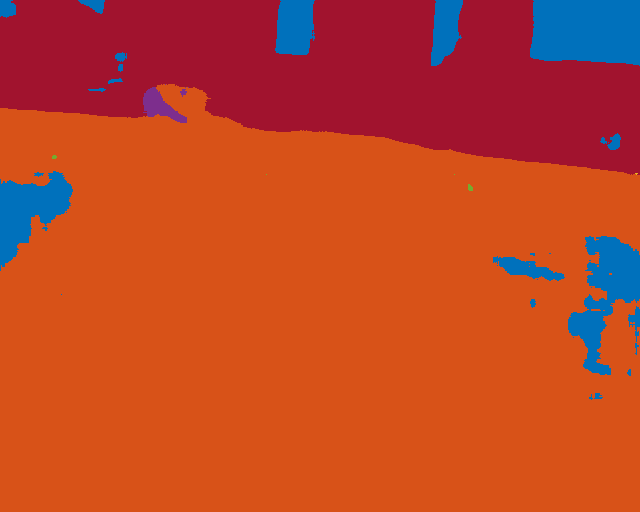

prev=567,i=568
iteration running is 568
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


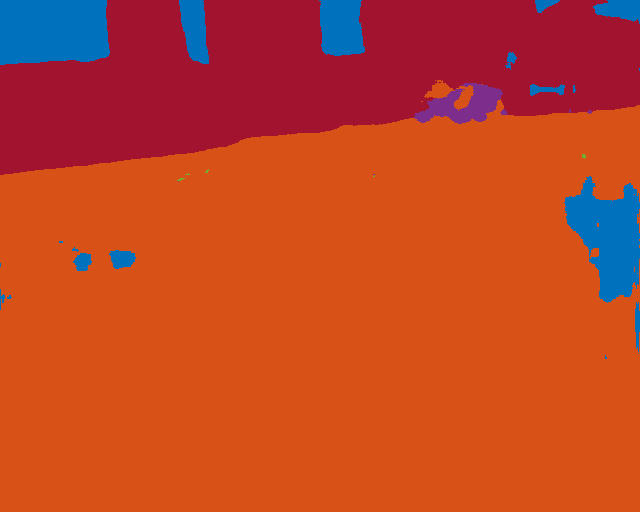

this is the raw image
this is the ground truth mask
this is the colored inferred image


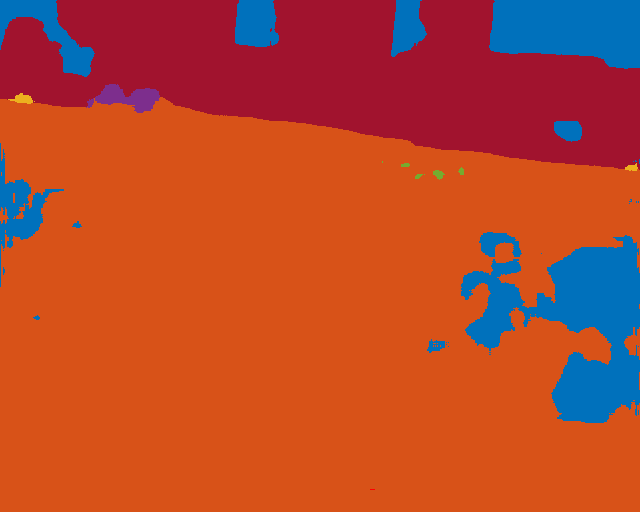

prev=569,i=570
iteration running is 570
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


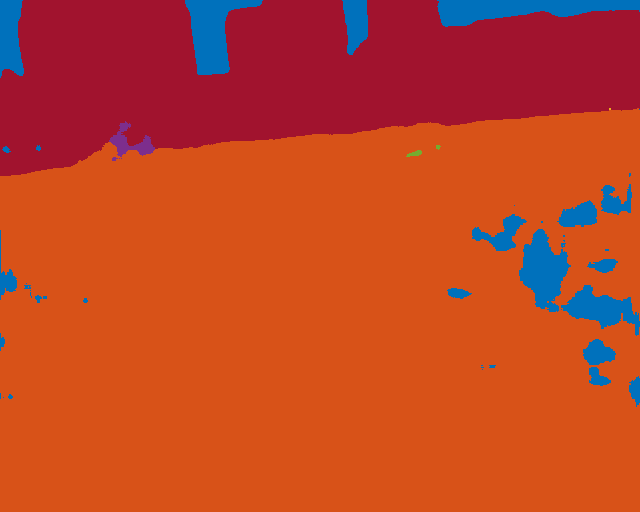

this is the raw image
this is the ground truth mask
this is the colored inferred image


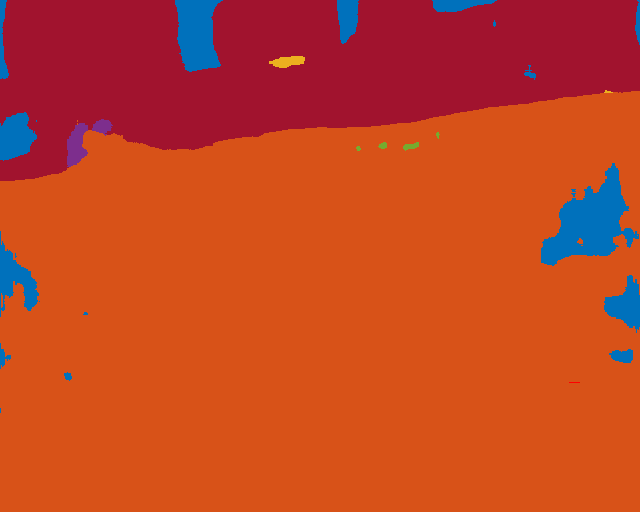

prev=571,i=572
iteration running is 572
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


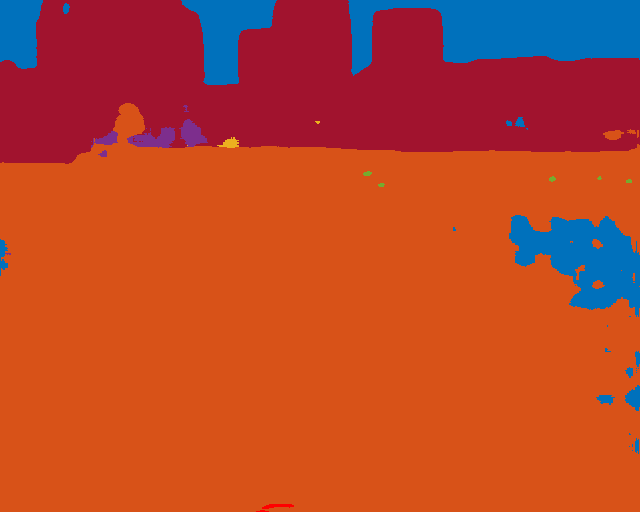

this is the raw image
this is the ground truth mask
this is the colored inferred image


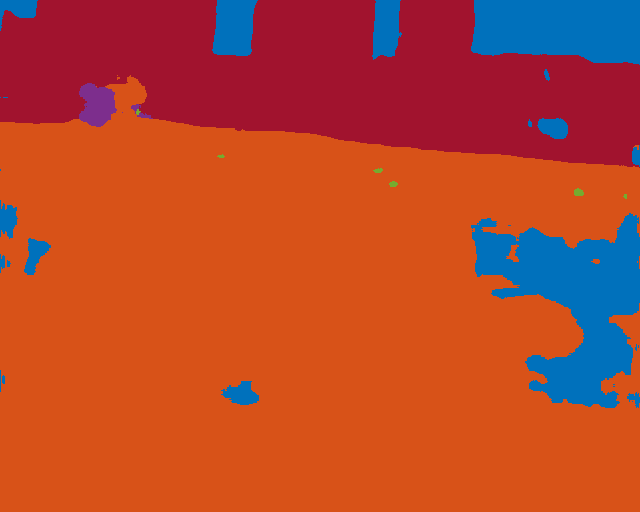

prev=573,i=574
iteration running is 574
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


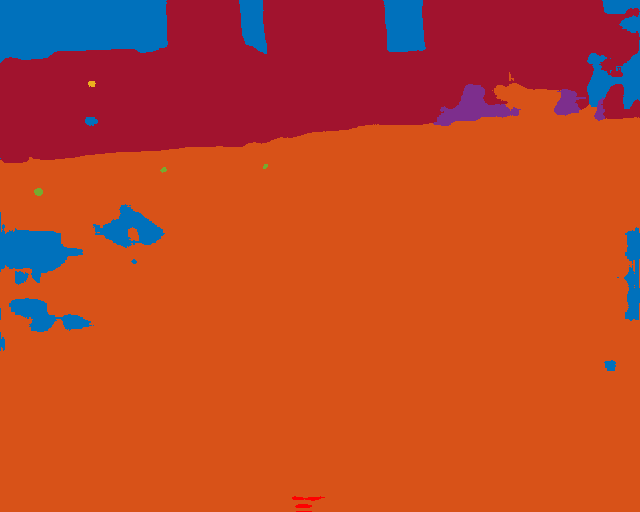

this is the raw image
this is the ground truth mask
this is the colored inferred image


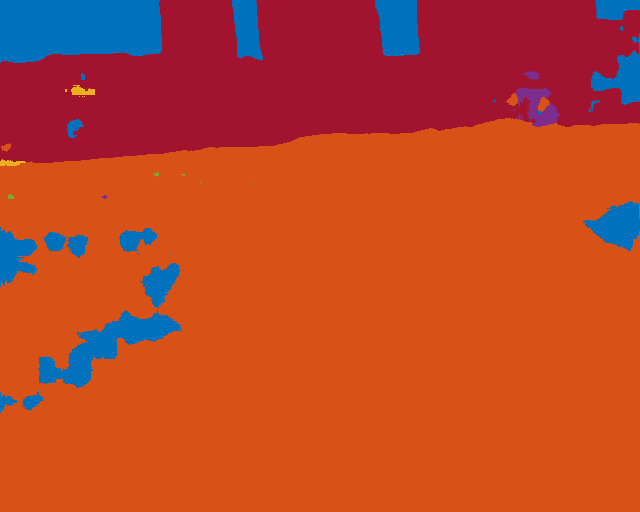

prev=575,i=576
iteration running is 576
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


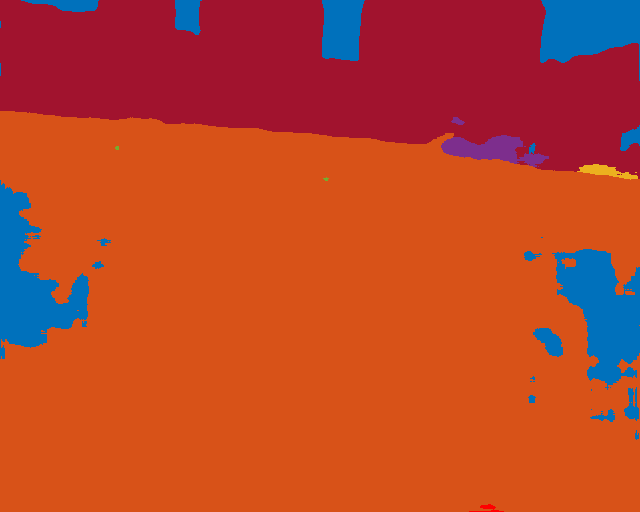

this is the raw image
this is the ground truth mask
this is the colored inferred image


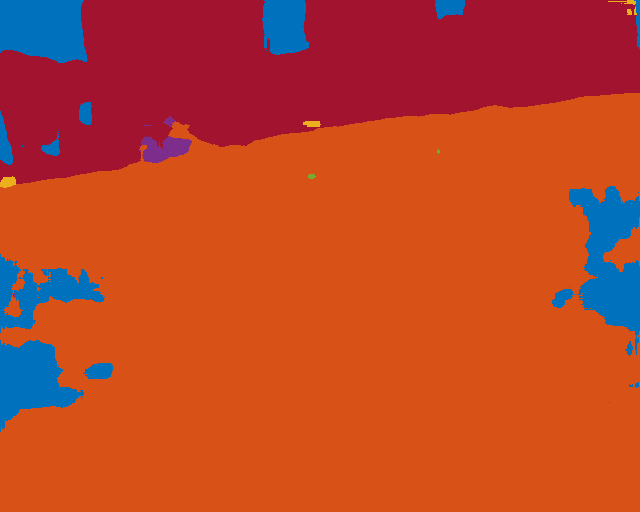

prev=577,i=578
iteration running is 578
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


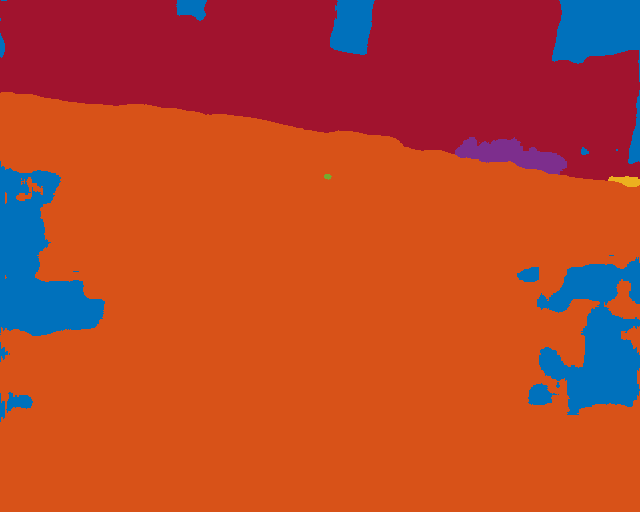

this is the raw image
this is the ground truth mask
this is the colored inferred image


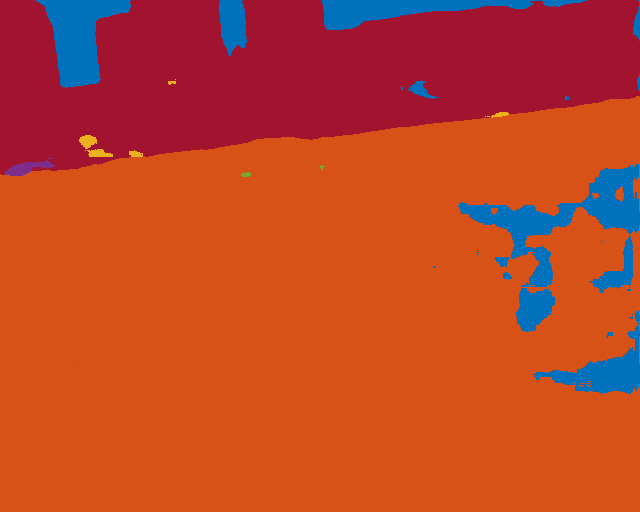

prev=579,i=580
iteration running is 580
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


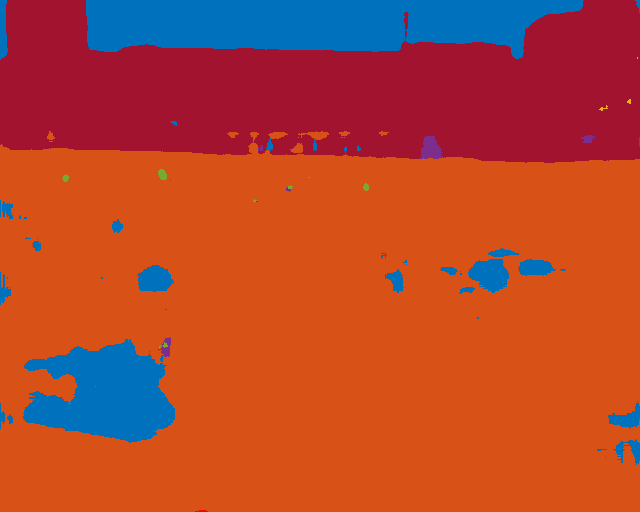

this is the raw image
this is the ground truth mask
this is the colored inferred image


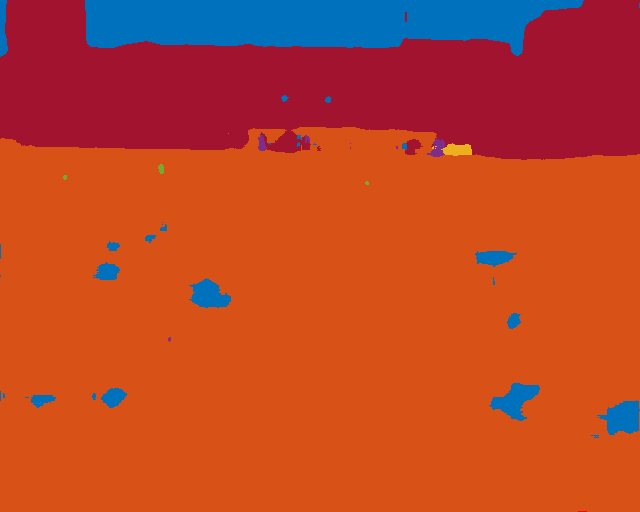

prev=581,i=582
iteration running is 582
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


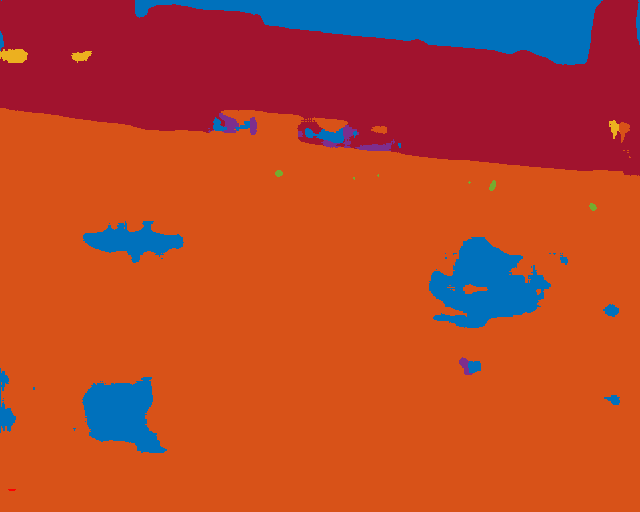

this is the raw image
this is the ground truth mask
this is the colored inferred image


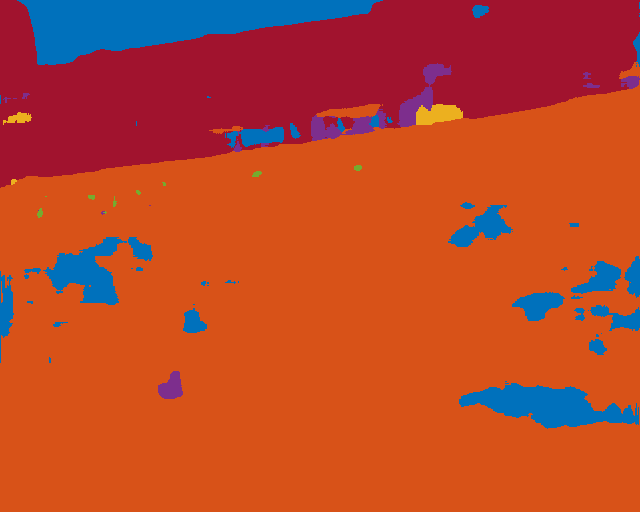

prev=583,i=584
iteration running is 584
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


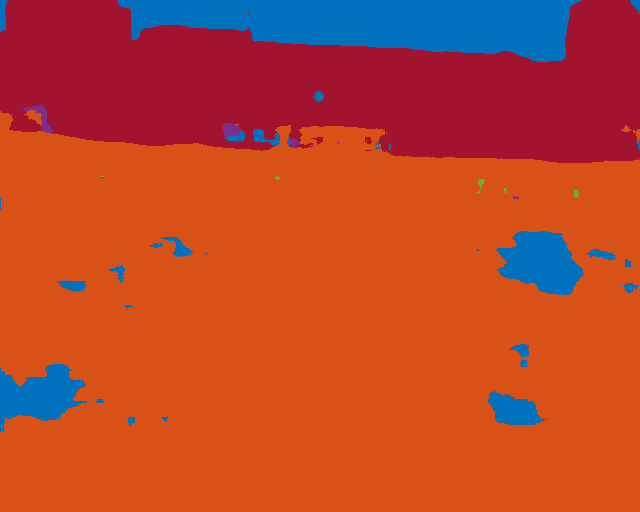

this is the raw image
this is the ground truth mask
this is the colored inferred image


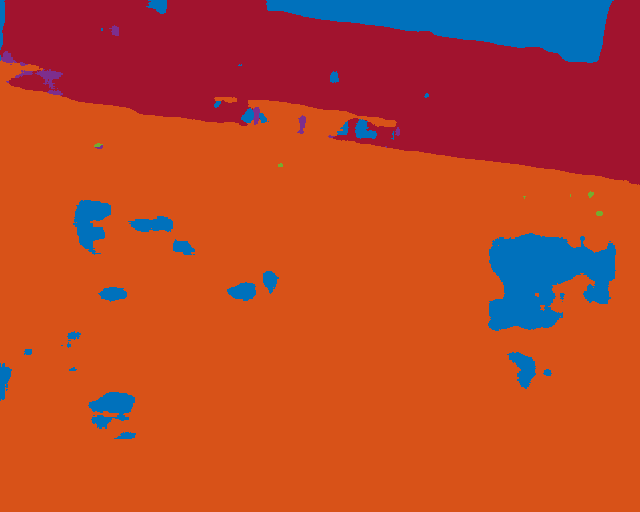

prev=585,i=586
iteration running is 586
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


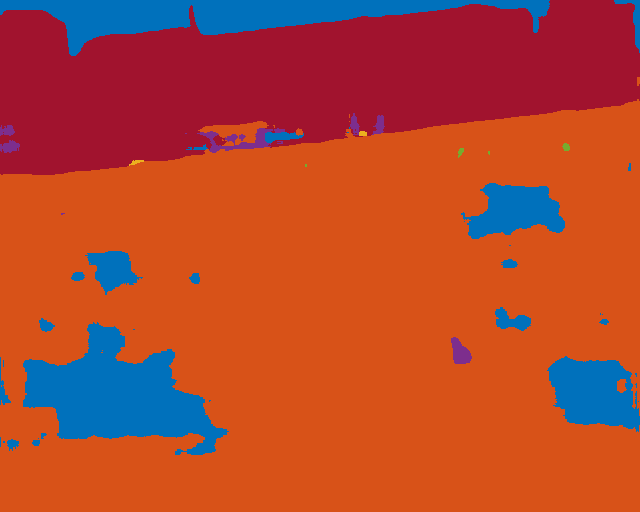

this is the raw image
this is the ground truth mask
this is the colored inferred image


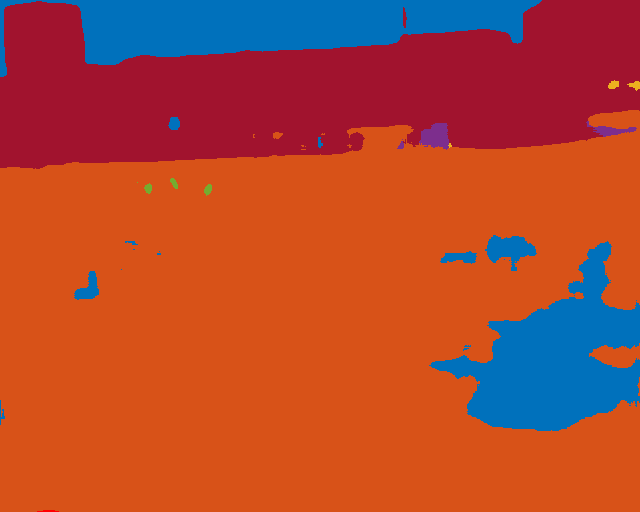

prev=587,i=588
iteration running is 588
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


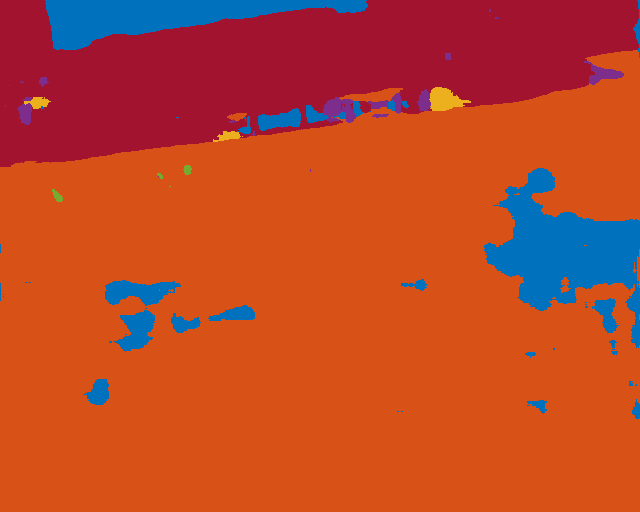

this is the raw image
this is the ground truth mask
this is the colored inferred image


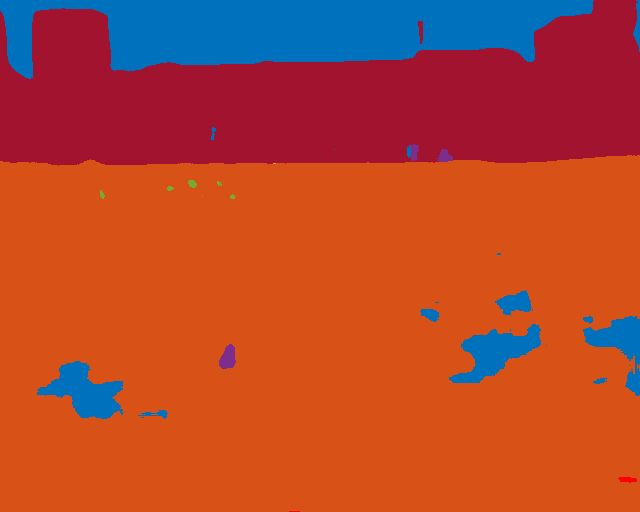

prev=589,i=590
iteration running is 590
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


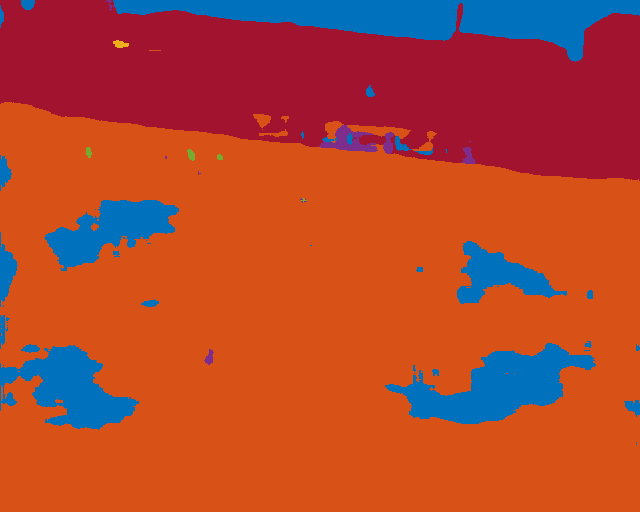

this is the raw image
this is the ground truth mask
this is the colored inferred image


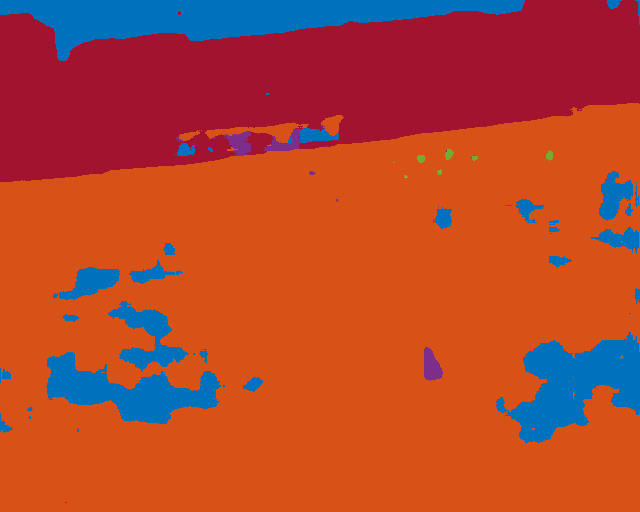

prev=591,i=592
iteration running is 592
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


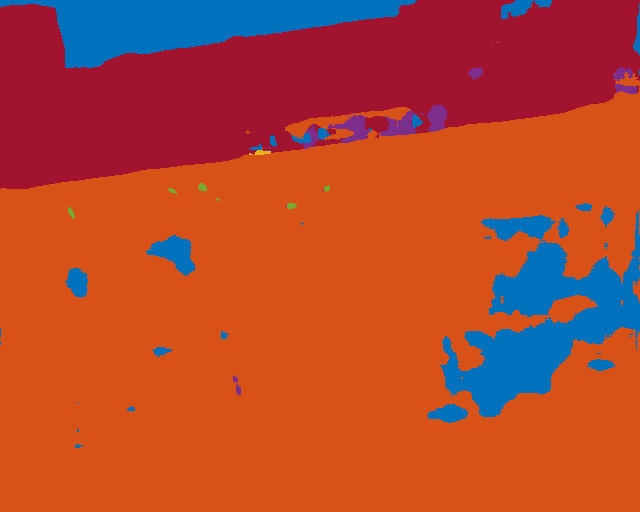

this is the raw image
this is the ground truth mask
this is the colored inferred image


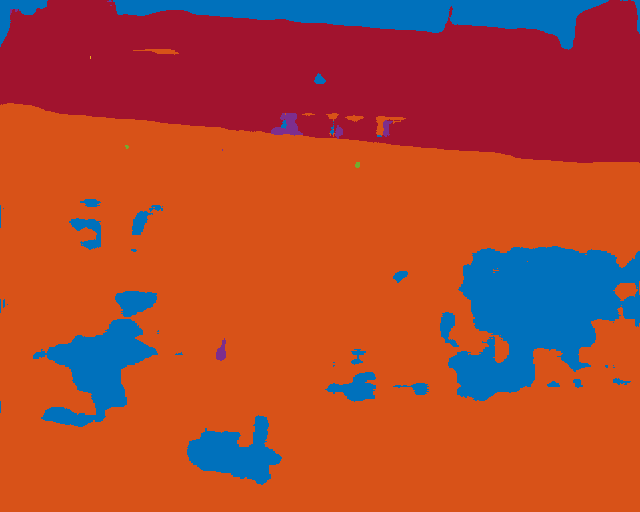

prev=593,i=594
iteration running is 594
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


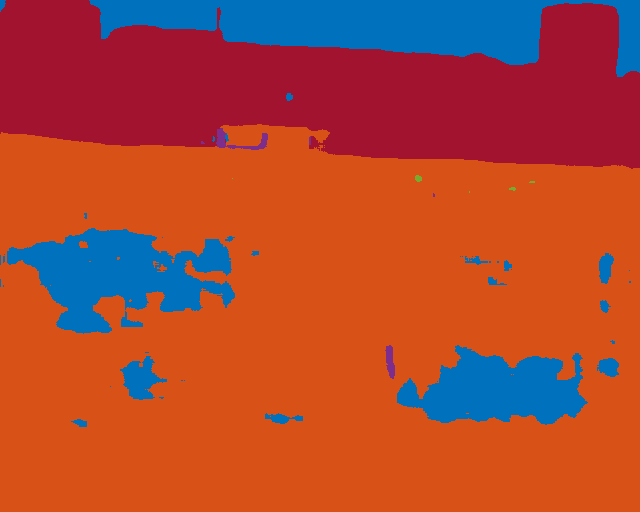

this is the raw image
this is the ground truth mask
this is the colored inferred image


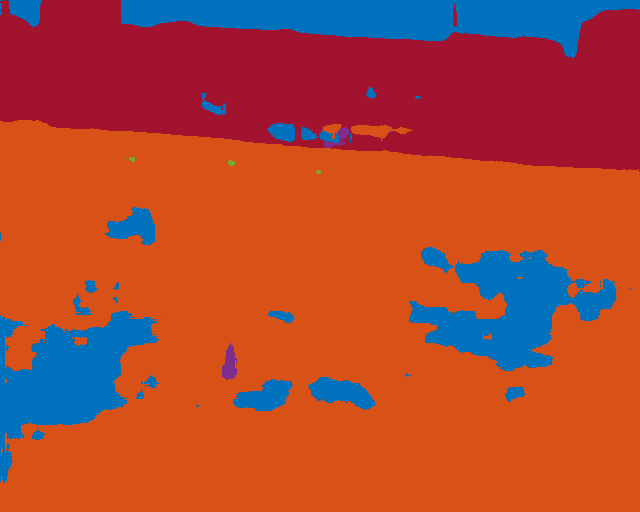

prev=595,i=596
iteration running is 596
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


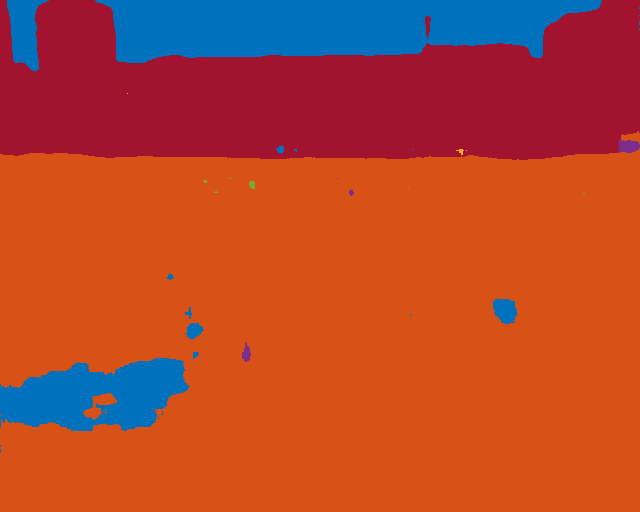

this is the raw image
this is the ground truth mask
this is the colored inferred image


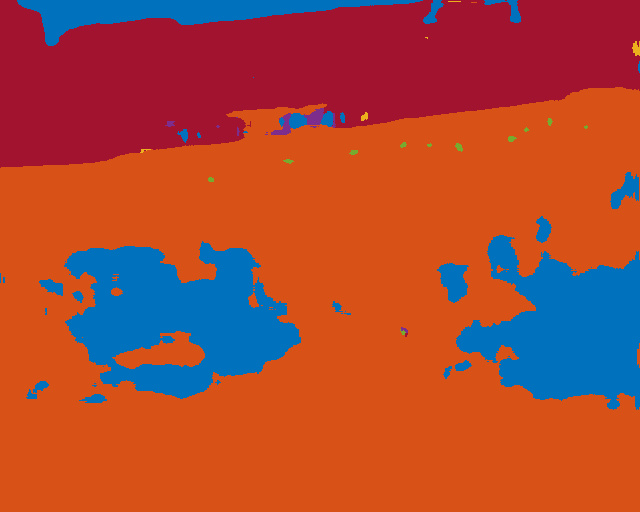

prev=597,i=598
iteration running is 598
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


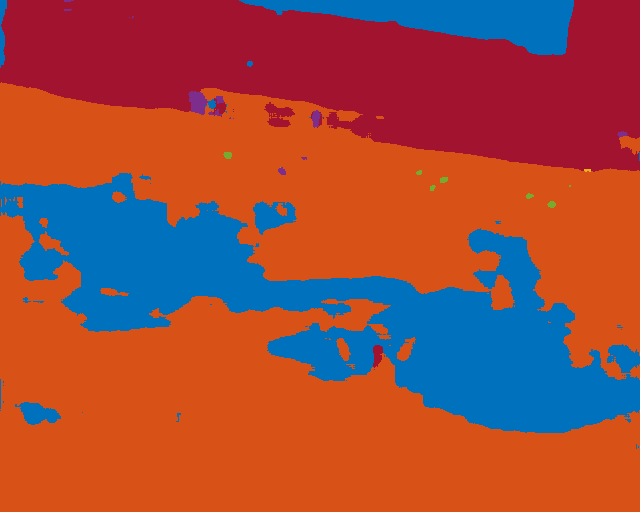

this is the raw image
this is the ground truth mask
this is the colored inferred image


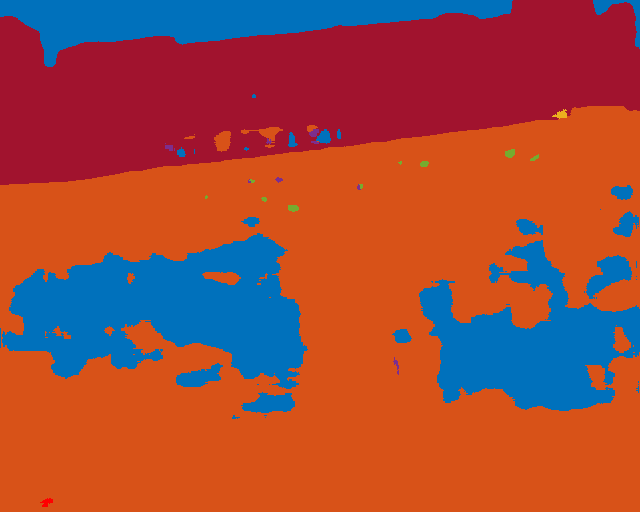

prev=599,i=600
iteration running is 600
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


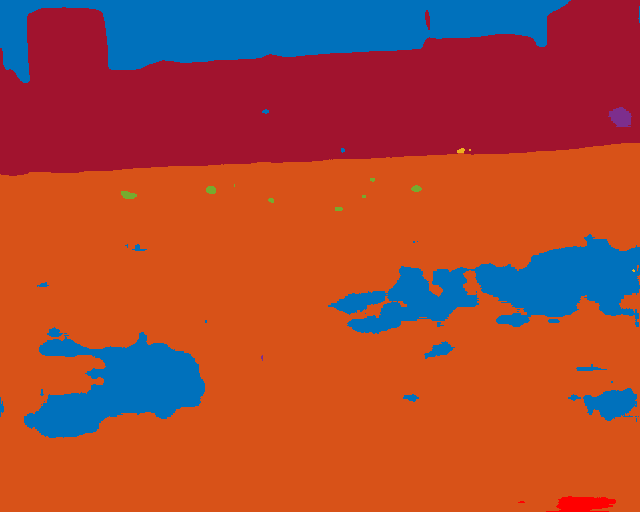

this is the raw image
this is the ground truth mask
this is the colored inferred image


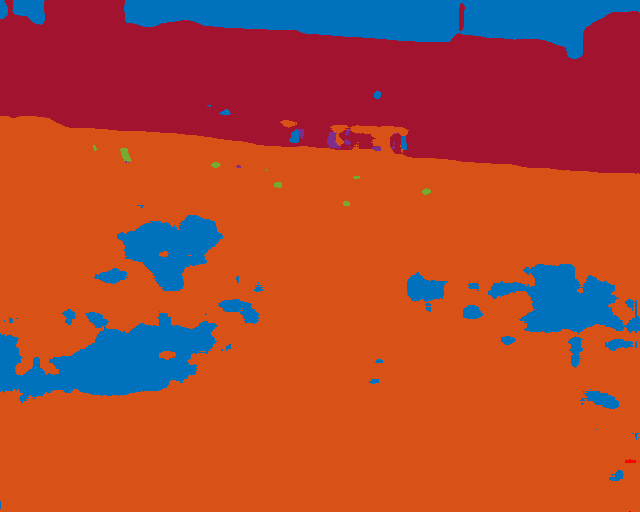

prev=601,i=602
iteration running is 602
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


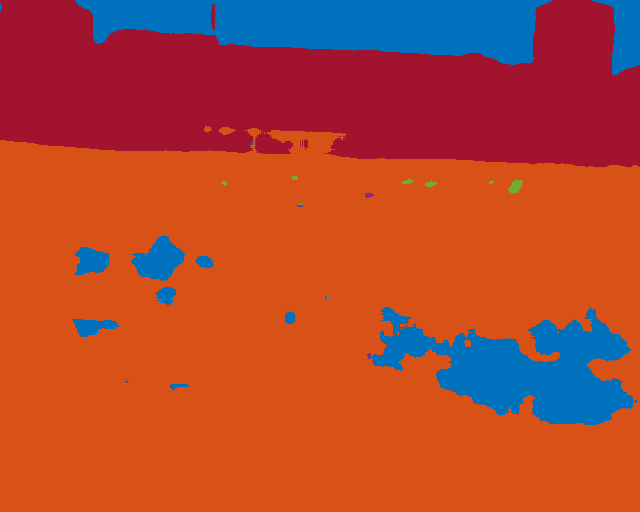

this is the raw image
this is the ground truth mask
this is the colored inferred image


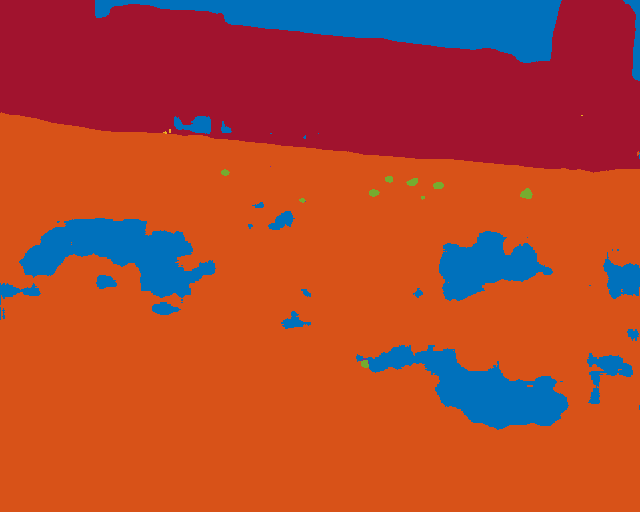

prev=603,i=604
iteration running is 604
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


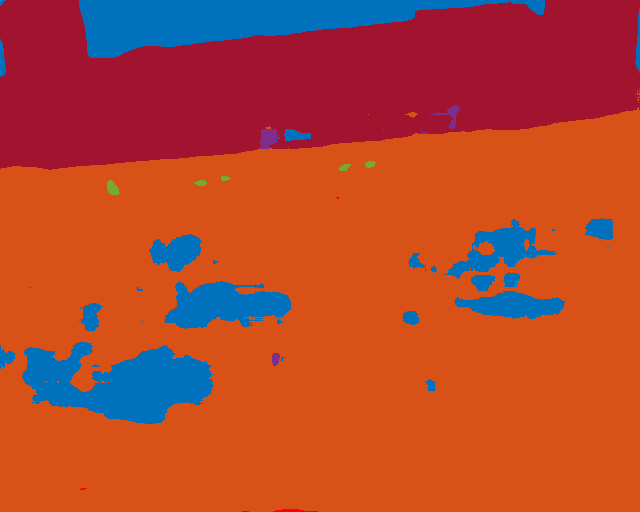

this is the raw image
this is the ground truth mask
this is the colored inferred image


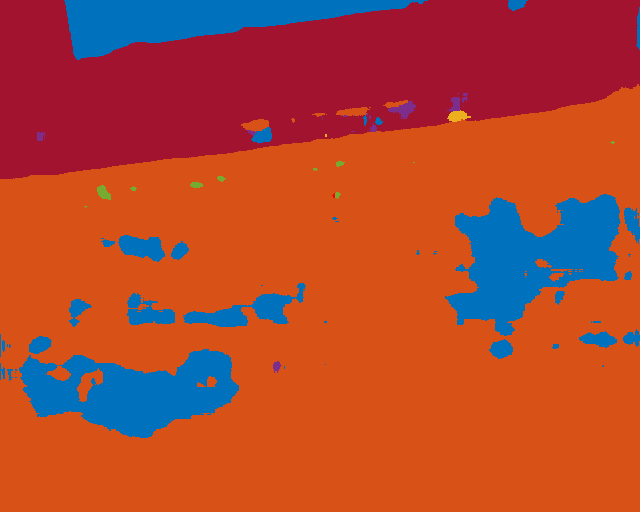

prev=605,i=606
iteration running is 606
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


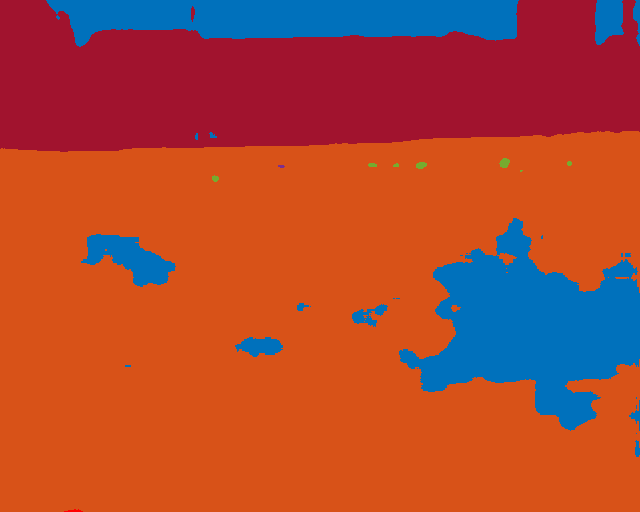

this is the raw image
this is the ground truth mask
this is the colored inferred image


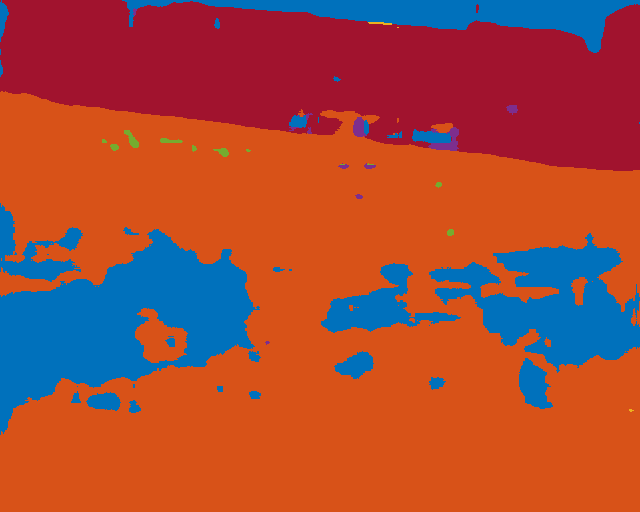

prev=607,i=608
iteration running is 608
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


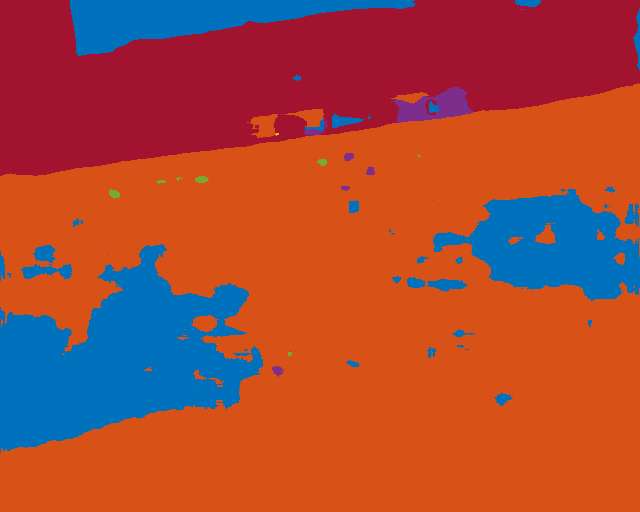

this is the raw image
this is the ground truth mask
this is the colored inferred image


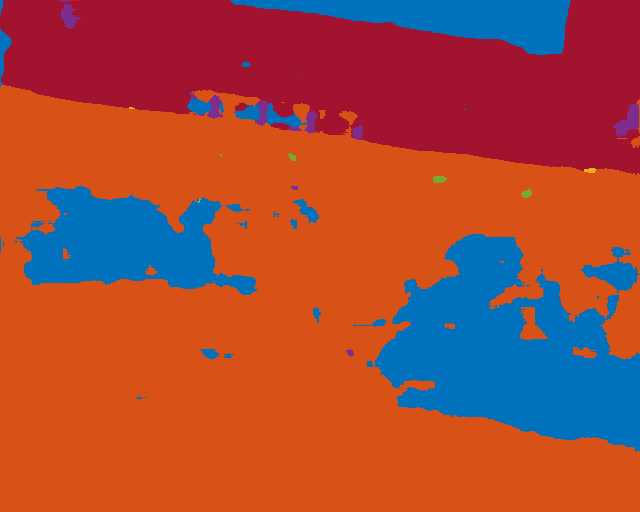

prev=609,i=610
iteration running is 610
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


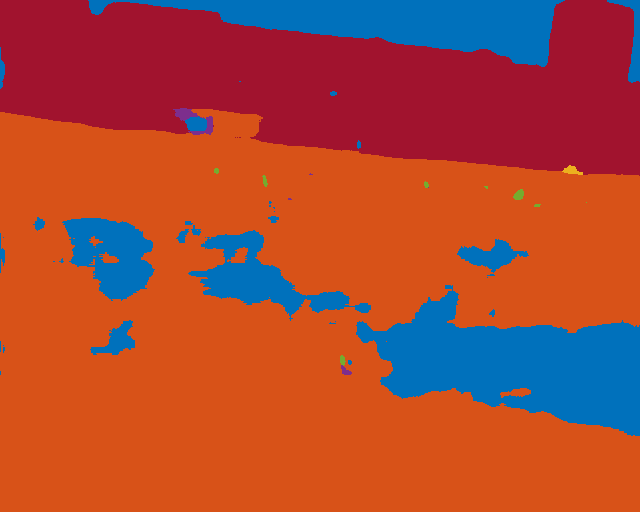

this is the raw image
this is the ground truth mask
this is the colored inferred image


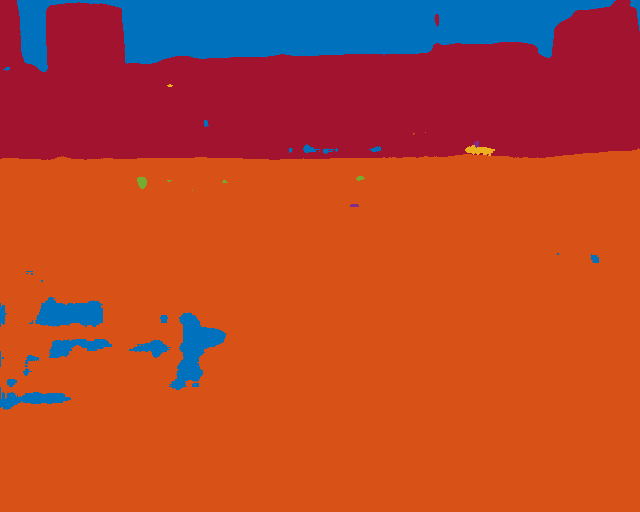

prev=611,i=612
iteration running is 612
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


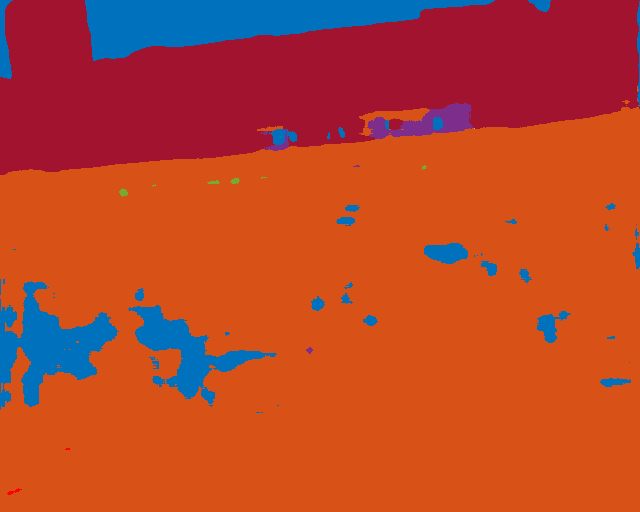

this is the raw image
this is the ground truth mask
this is the colored inferred image


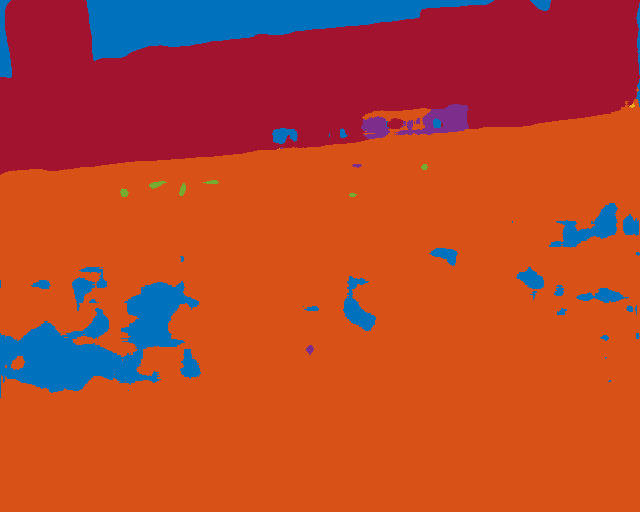

prev=613,i=614
iteration running is 614
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


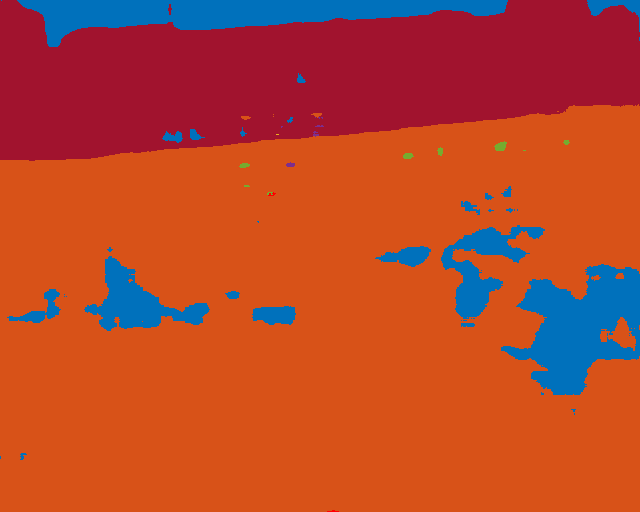

this is the raw image
this is the ground truth mask
this is the colored inferred image


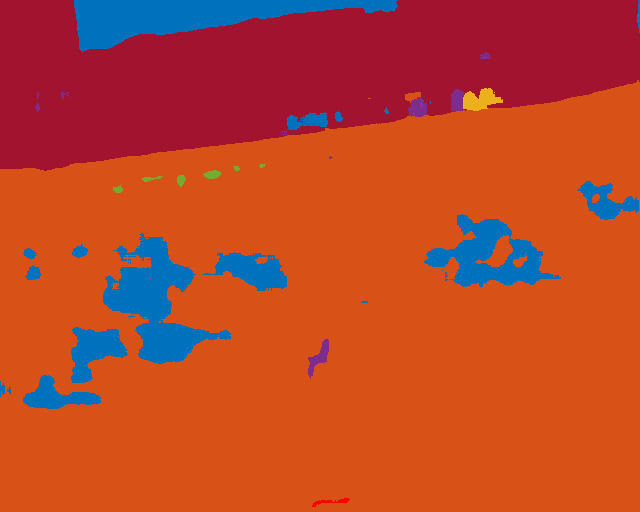

prev=615,i=616
iteration running is 616
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


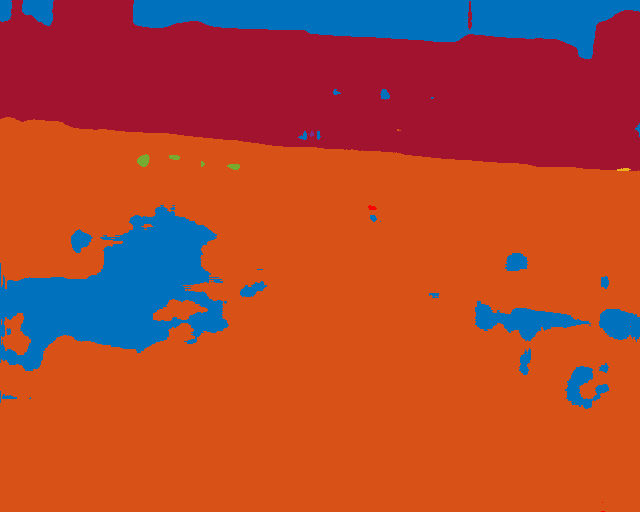

this is the raw image
this is the ground truth mask
this is the colored inferred image


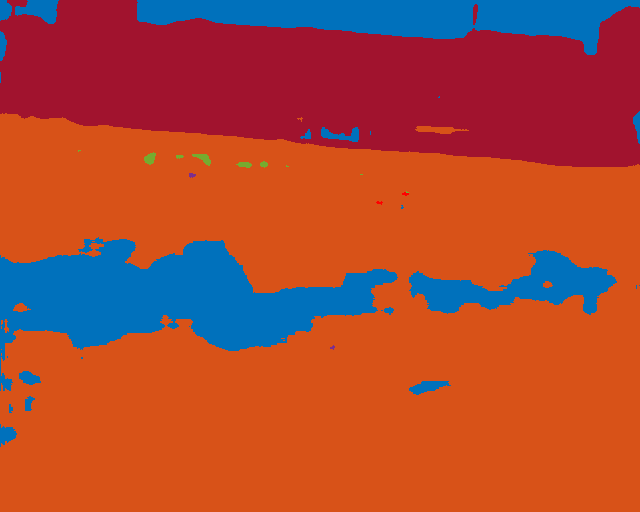

prev=617,i=618
iteration running is 618
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


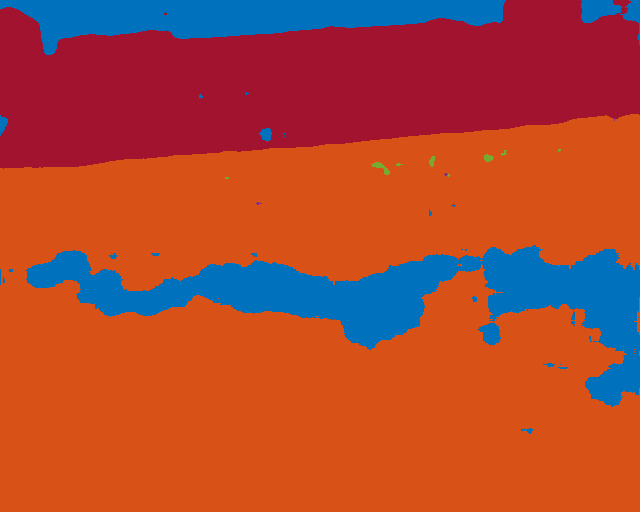

this is the raw image
this is the ground truth mask
this is the colored inferred image


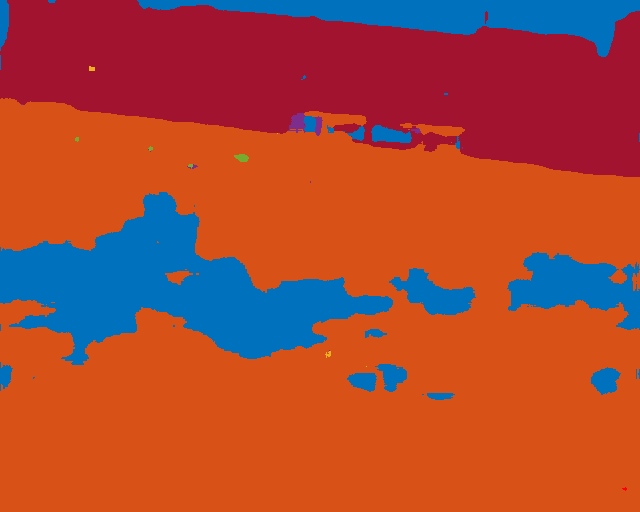

prev=619,i=620
iteration running is 620
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


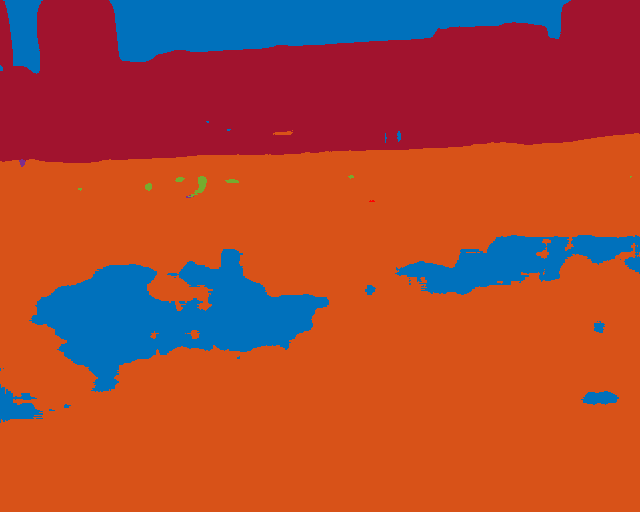

this is the raw image
this is the ground truth mask
this is the colored inferred image


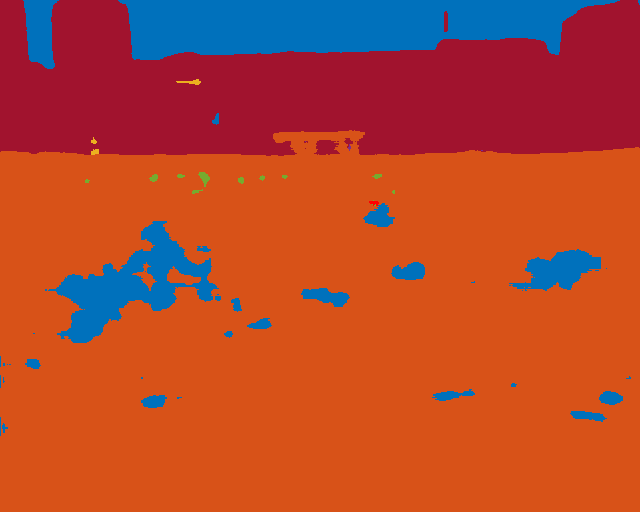

prev=621,i=622
iteration running is 622
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


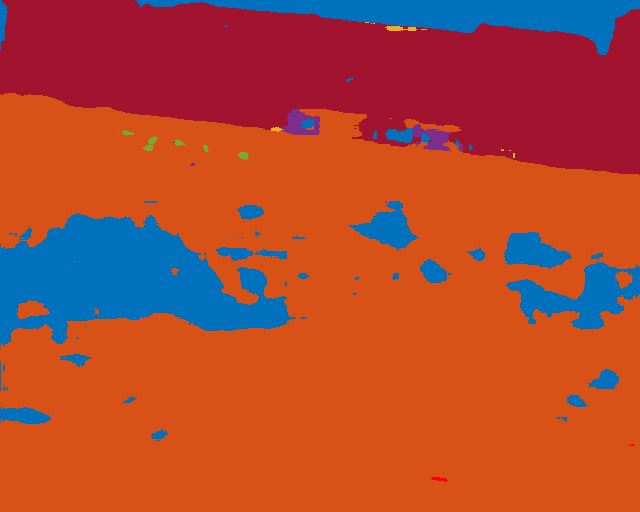

this is the raw image
this is the ground truth mask
this is the colored inferred image


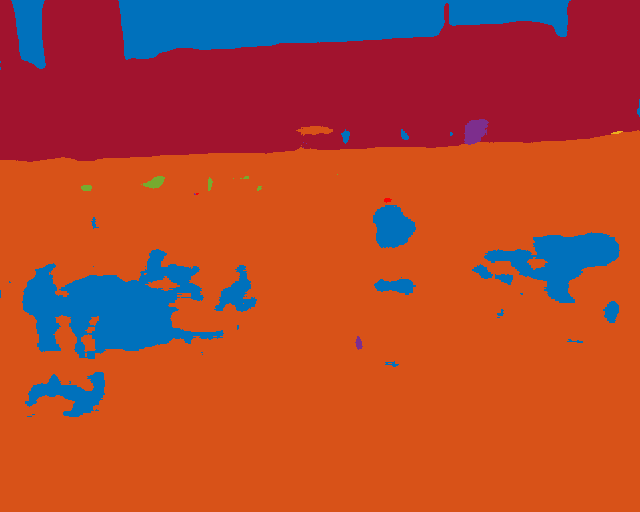

prev=623,i=624
iteration running is 624
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


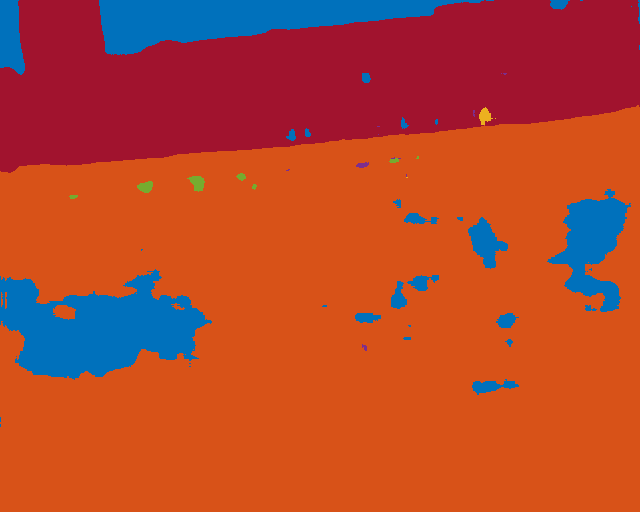

this is the raw image
this is the ground truth mask
this is the colored inferred image


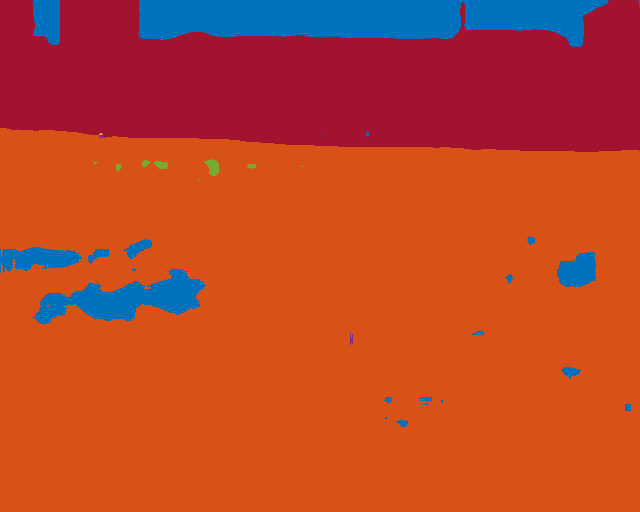

prev=625,i=626
iteration running is 626
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


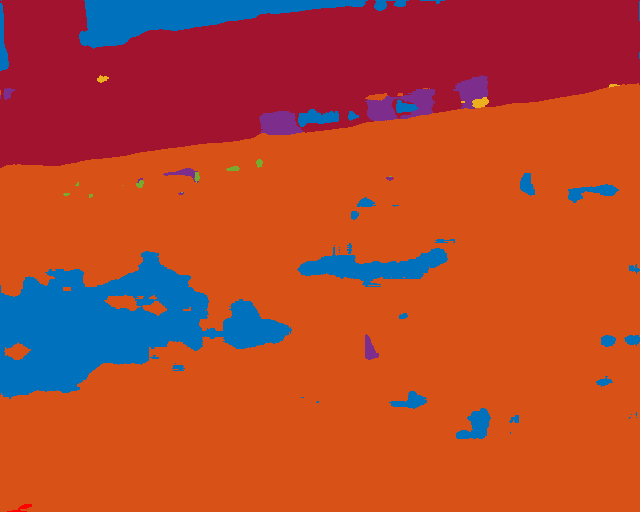

this is the raw image
this is the ground truth mask
this is the colored inferred image


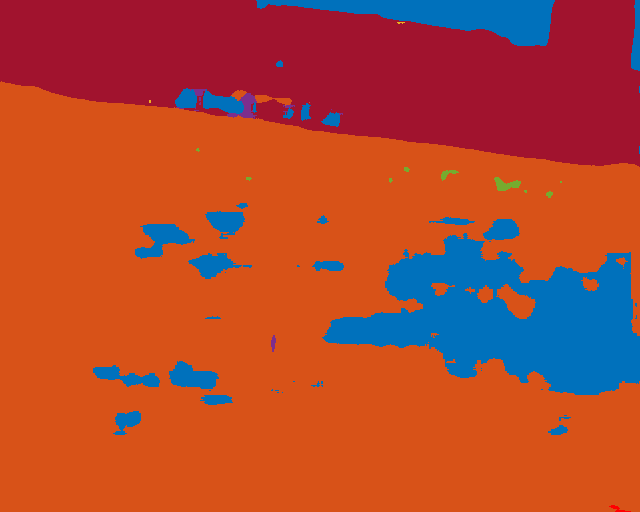

prev=627,i=628
iteration running is 628
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


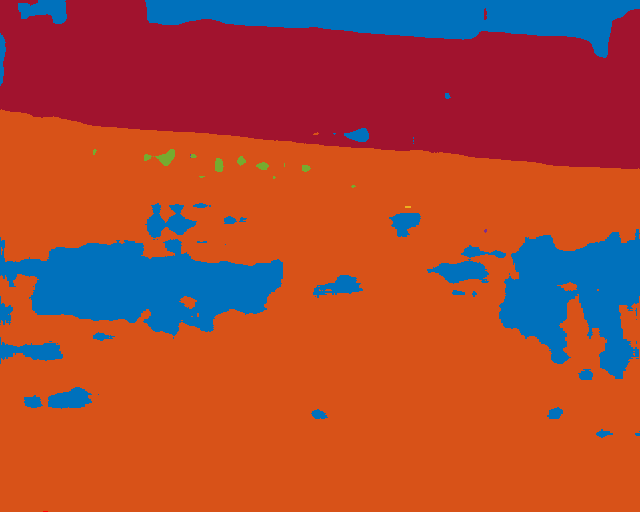

this is the raw image
this is the ground truth mask
this is the colored inferred image


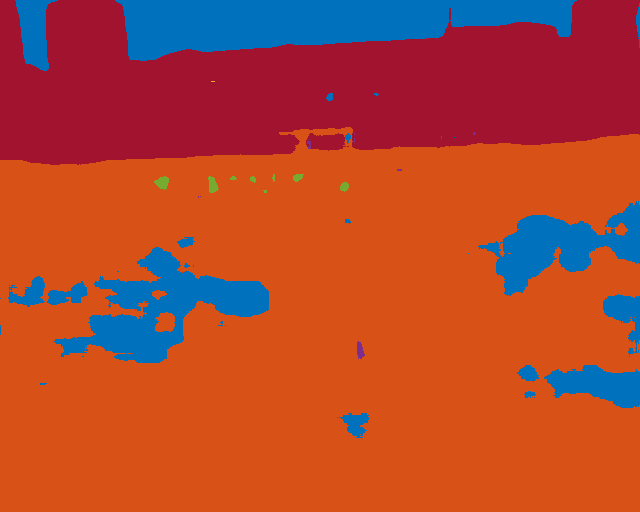

prev=629,i=630
iteration running is 630
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


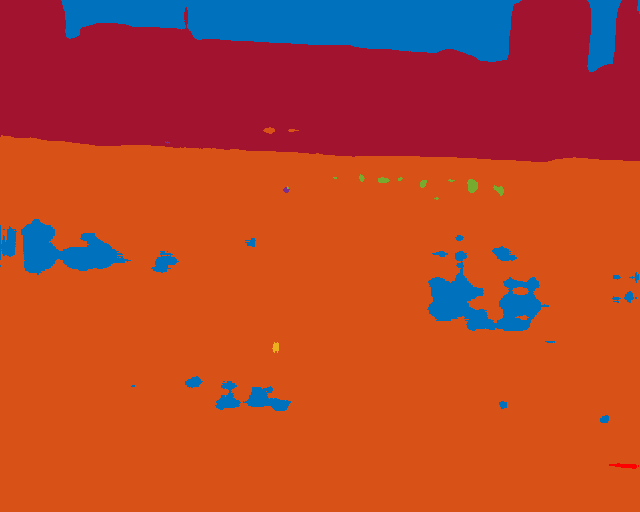

this is the raw image
this is the ground truth mask
this is the colored inferred image


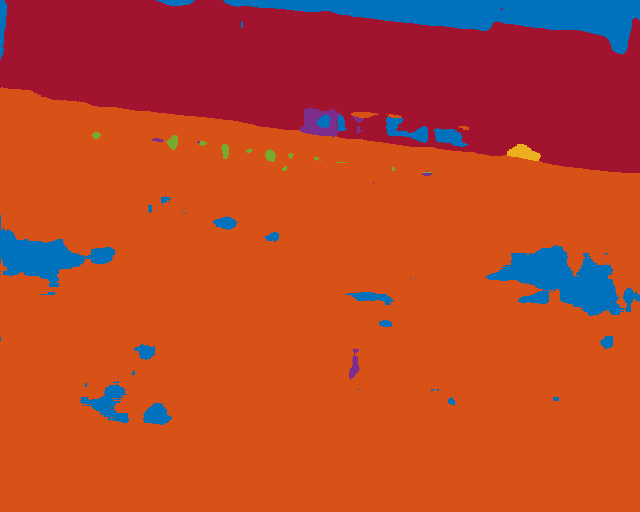

prev=631,i=632
iteration running is 632
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


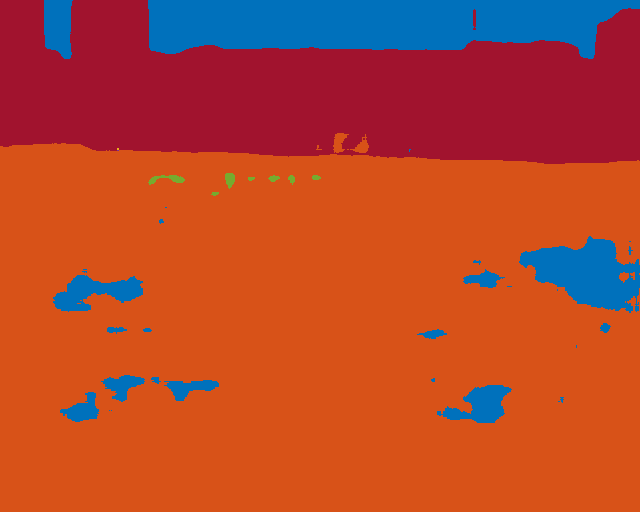

this is the raw image
this is the ground truth mask
this is the colored inferred image


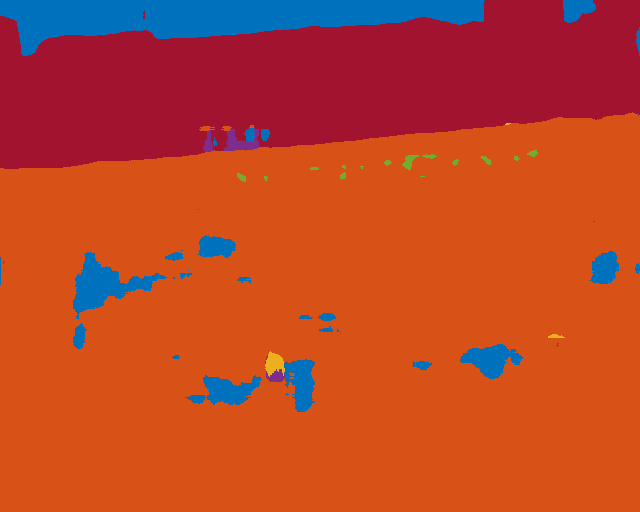

prev=633,i=634
iteration running is 634
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


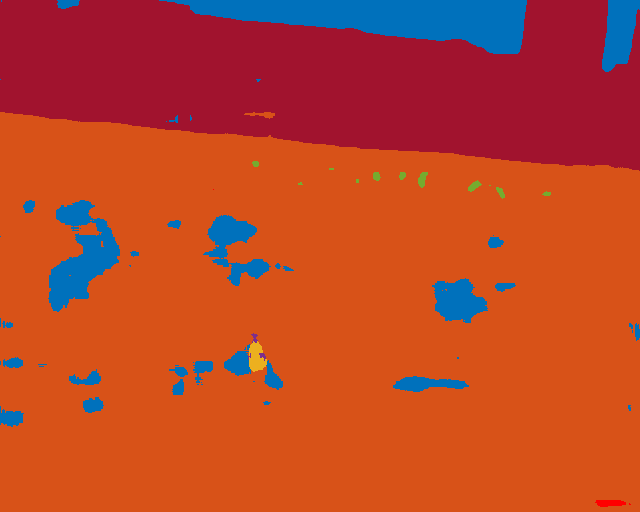

this is the raw image
this is the ground truth mask
this is the colored inferred image


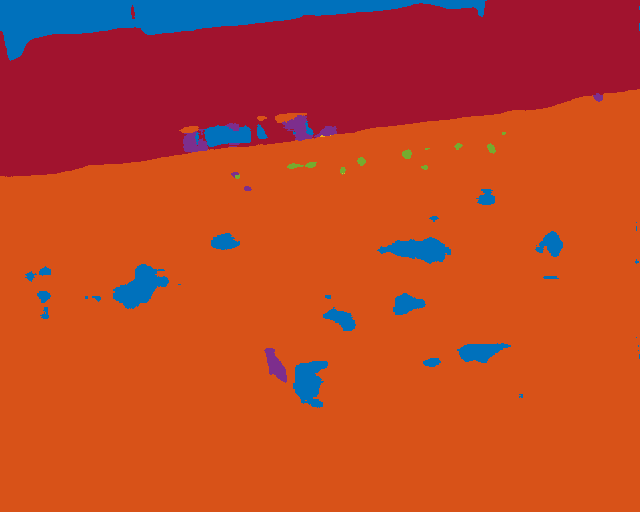

prev=635,i=636
iteration running is 636
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


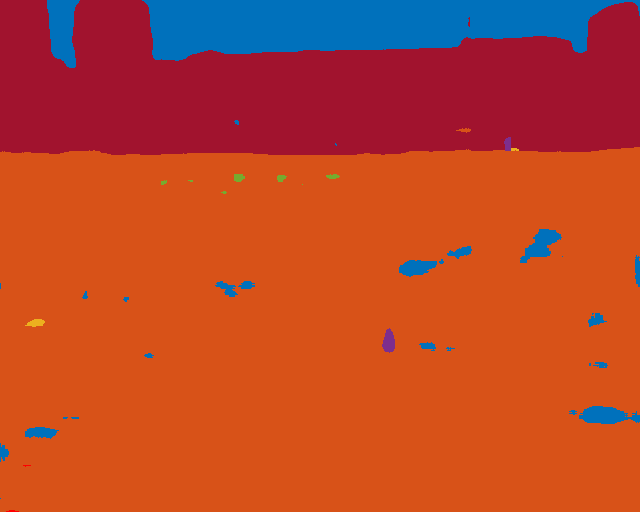

this is the raw image
this is the ground truth mask
this is the colored inferred image


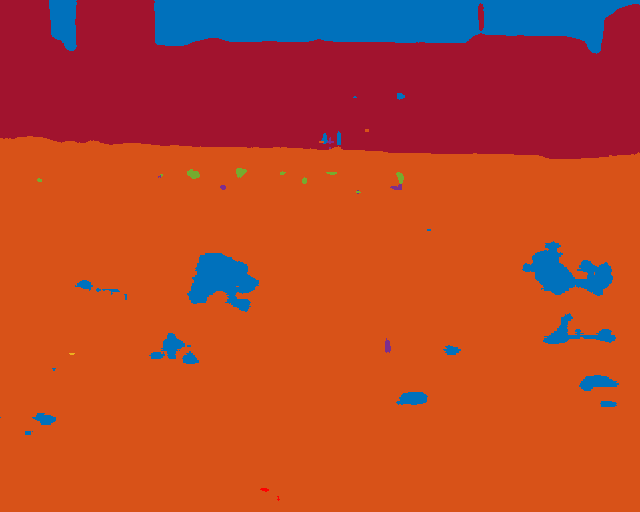

prev=637,i=638
iteration running is 638
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


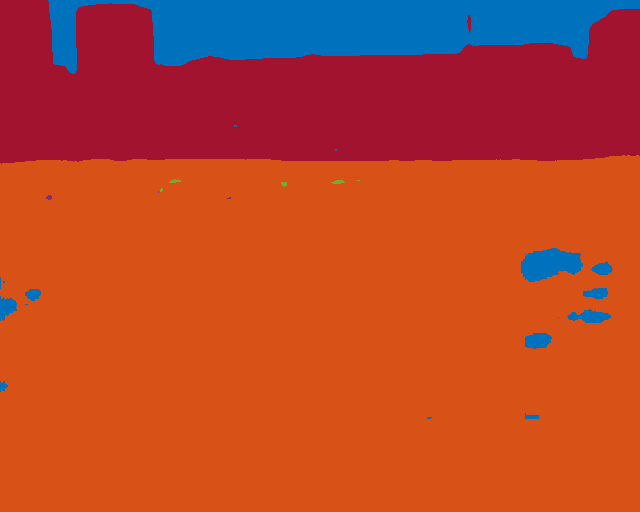

this is the raw image
this is the ground truth mask
this is the colored inferred image


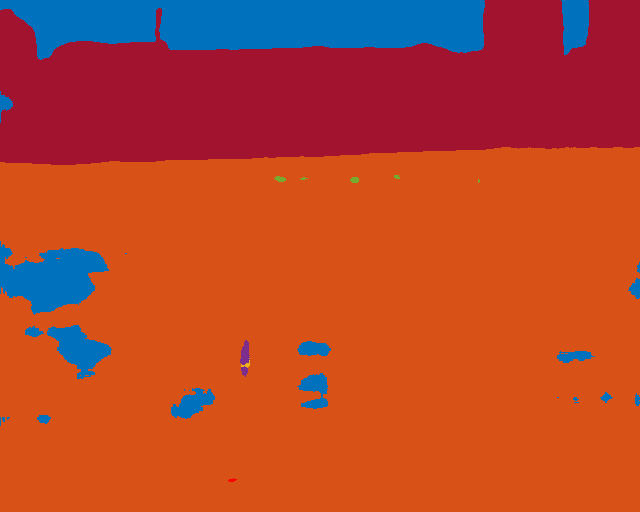

prev=639,i=640
iteration running is 640
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


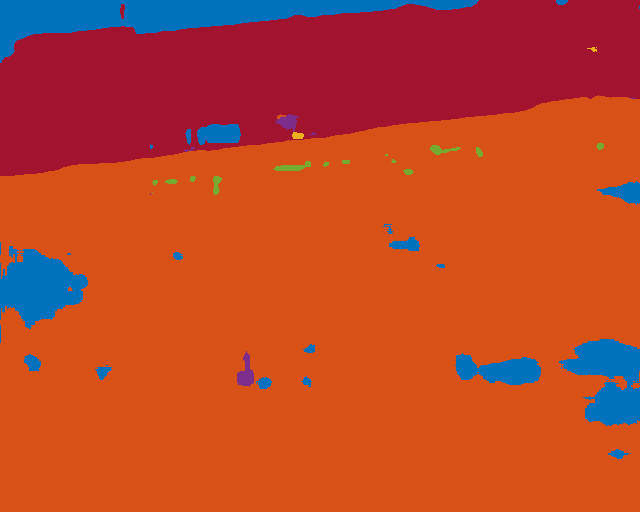

this is the raw image
this is the ground truth mask
this is the colored inferred image


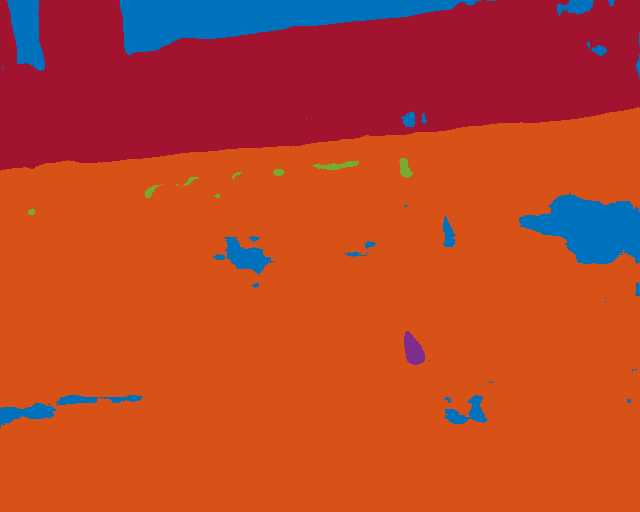

prev=641,i=642
iteration running is 642
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


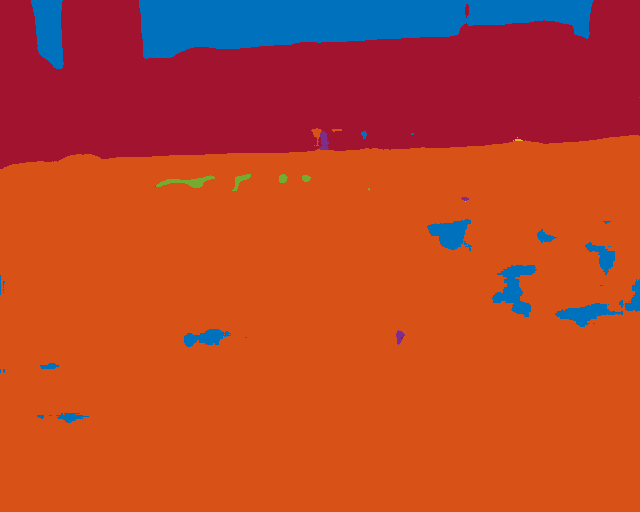

this is the raw image
this is the ground truth mask
this is the colored inferred image


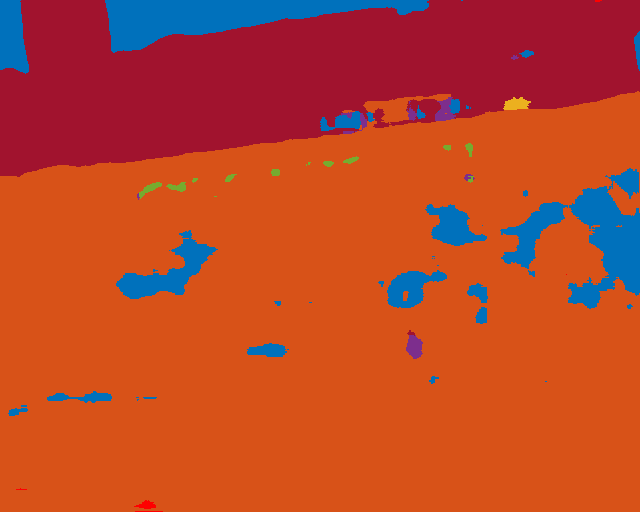

prev=643,i=644
iteration running is 644
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


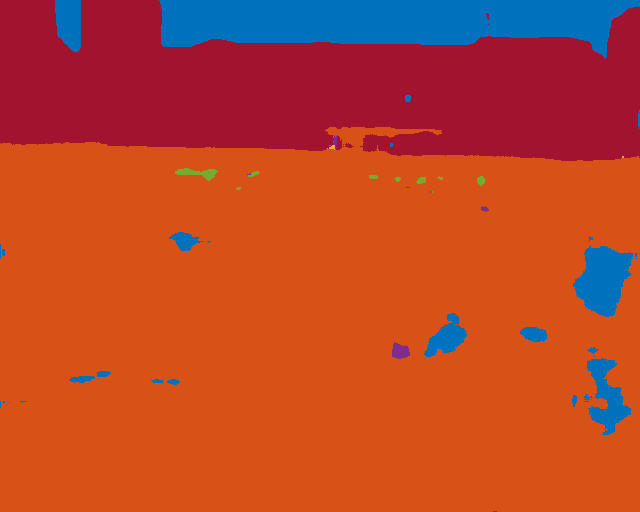

this is the raw image
this is the ground truth mask
this is the colored inferred image


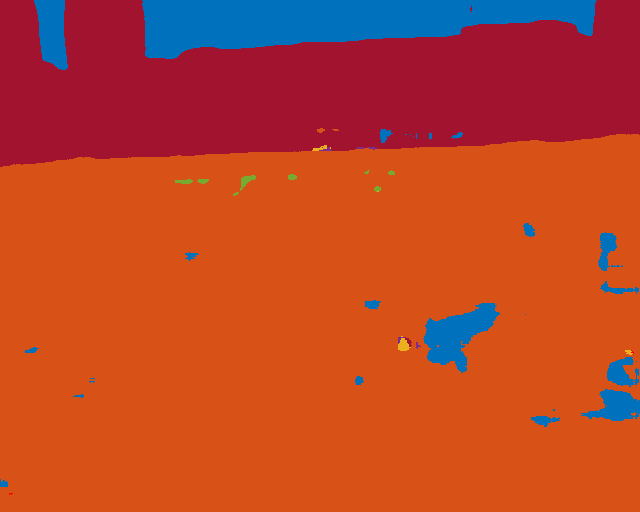

prev=645,i=646
iteration running is 646
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


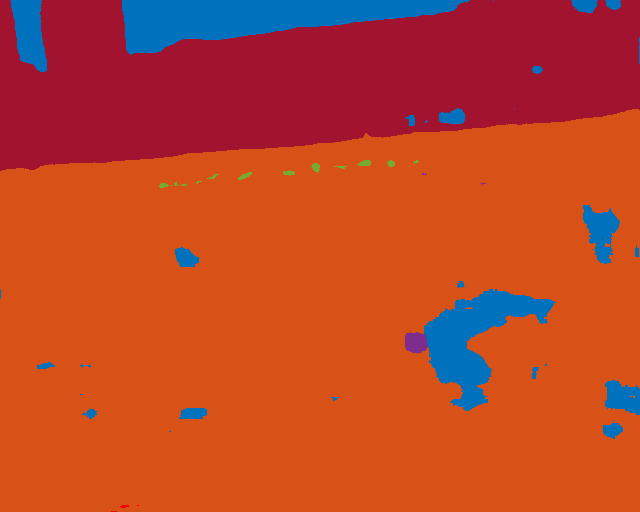

this is the raw image
this is the ground truth mask
this is the colored inferred image


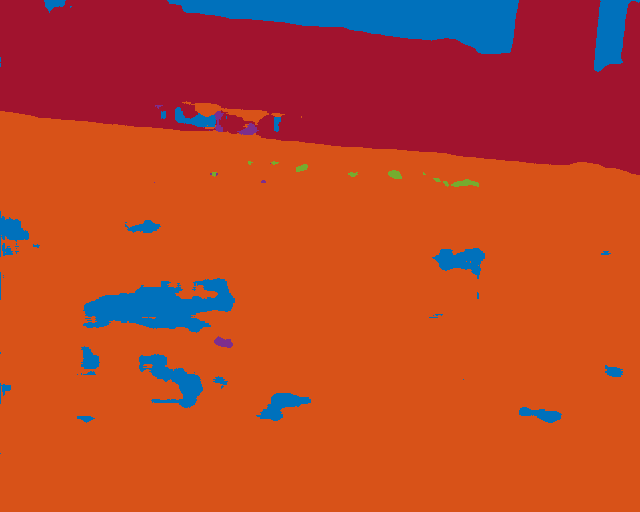

prev=647,i=648
iteration running is 648
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


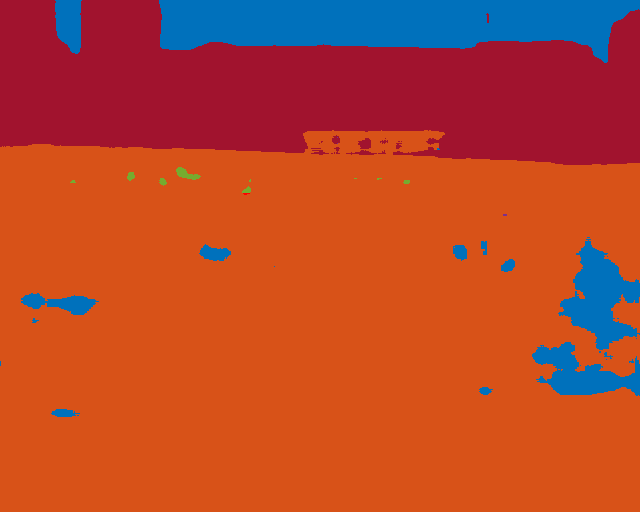

this is the raw image
this is the ground truth mask
this is the colored inferred image


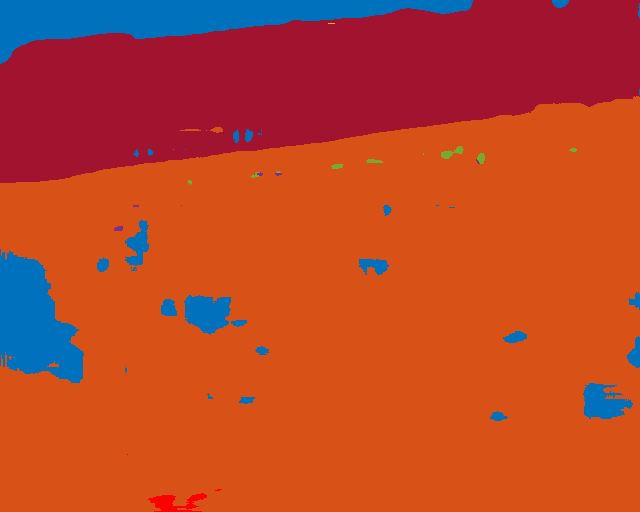

prev=649,i=650
iteration running is 650
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


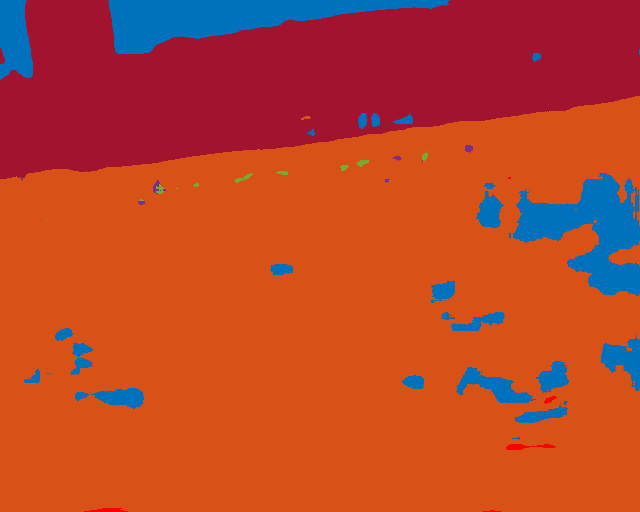

this is the raw image
this is the ground truth mask
this is the colored inferred image


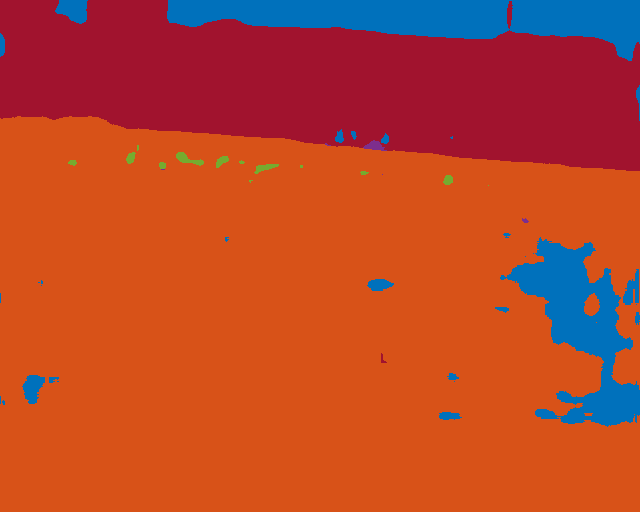

prev=651,i=652
iteration running is 652
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


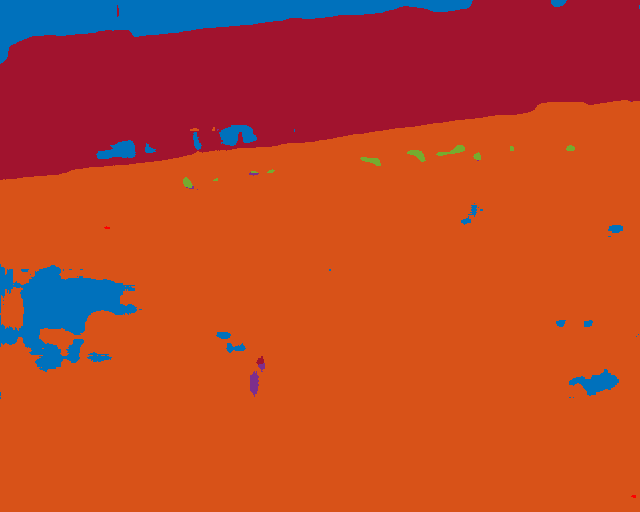

this is the raw image
this is the ground truth mask
this is the colored inferred image


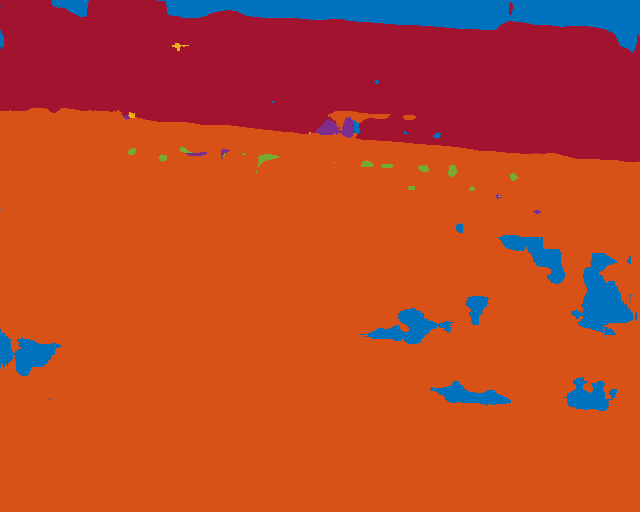

prev=653,i=654
iteration running is 654
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


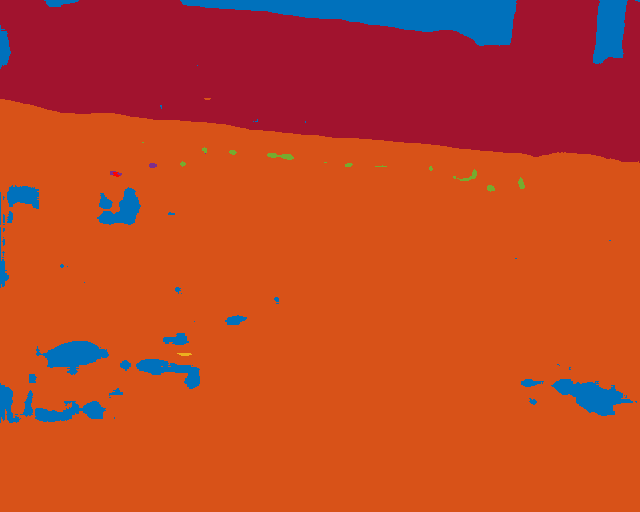

this is the raw image
this is the ground truth mask
this is the colored inferred image


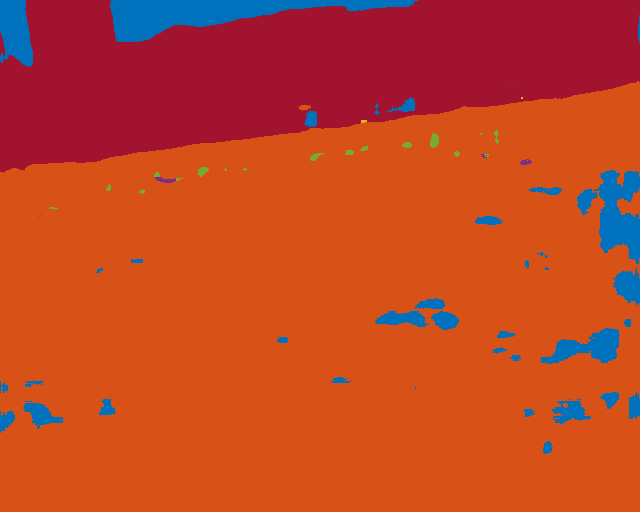

prev=655,i=656
iteration running is 656
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


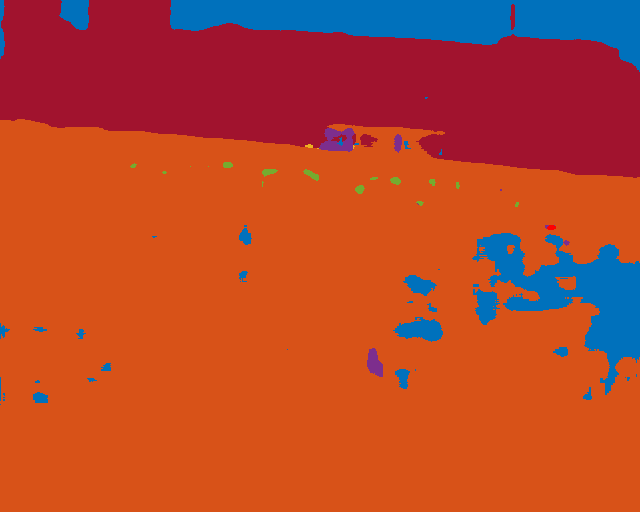

this is the raw image
this is the ground truth mask
this is the colored inferred image


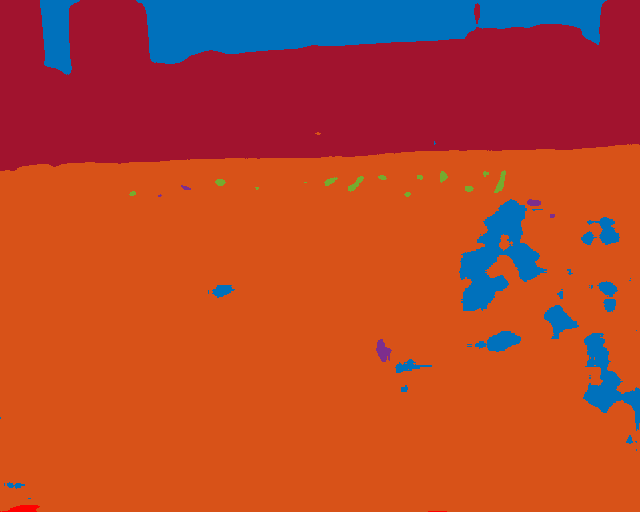

prev=657,i=658
iteration running is 658
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


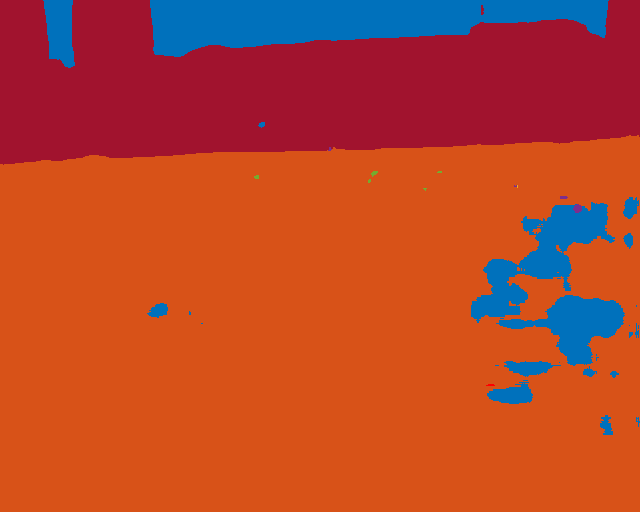

this is the raw image
this is the ground truth mask
this is the colored inferred image


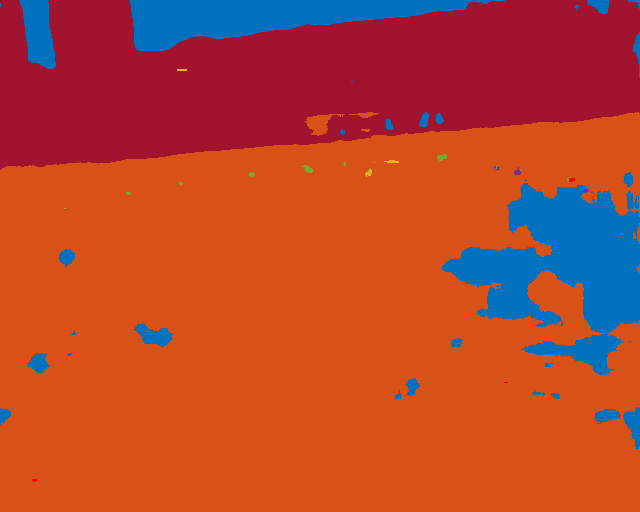

prev=659,i=660
iteration running is 660
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


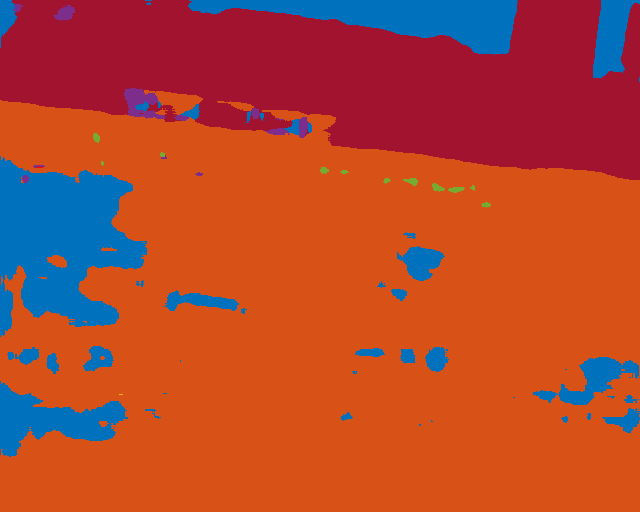

this is the raw image
this is the ground truth mask
this is the colored inferred image


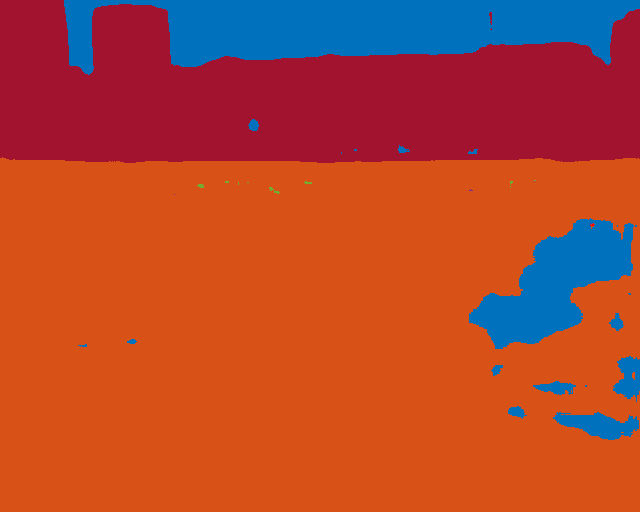

prev=661,i=662
iteration running is 662
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


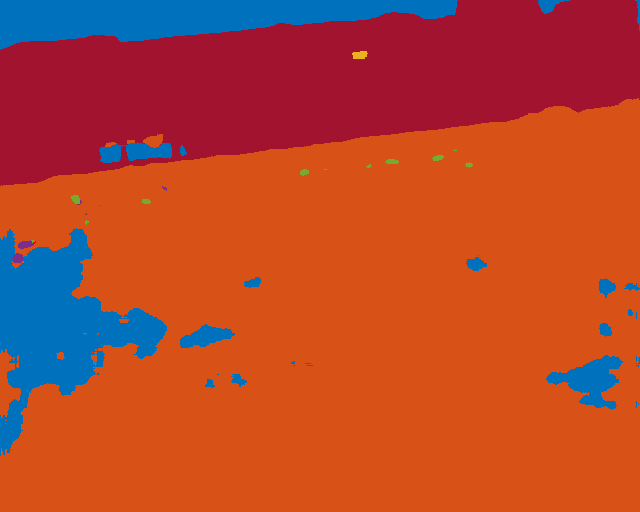

this is the raw image
this is the ground truth mask
this is the colored inferred image


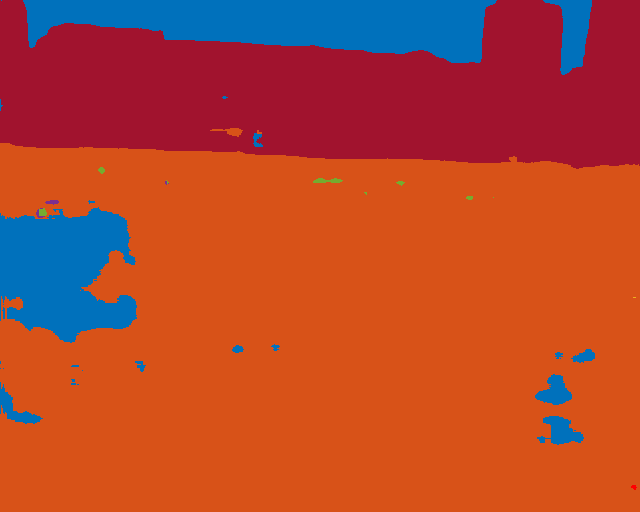

prev=663,i=664
iteration running is 664
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


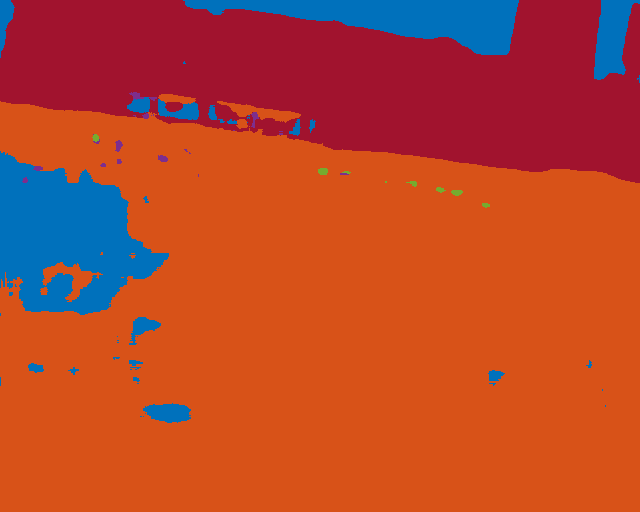

this is the raw image
this is the ground truth mask
this is the colored inferred image


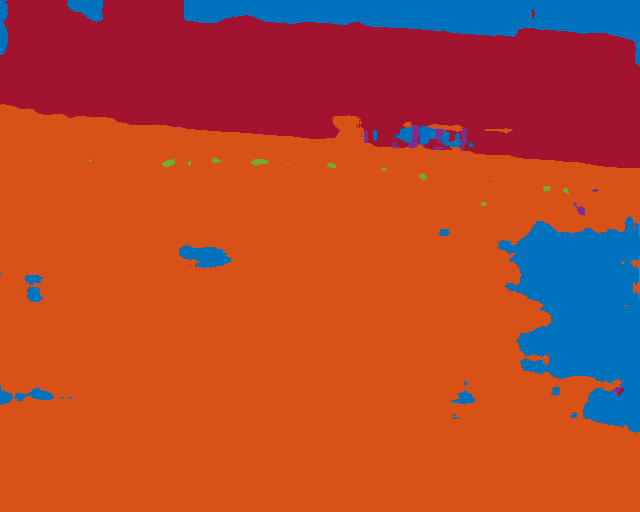

prev=665,i=666
iteration running is 666
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


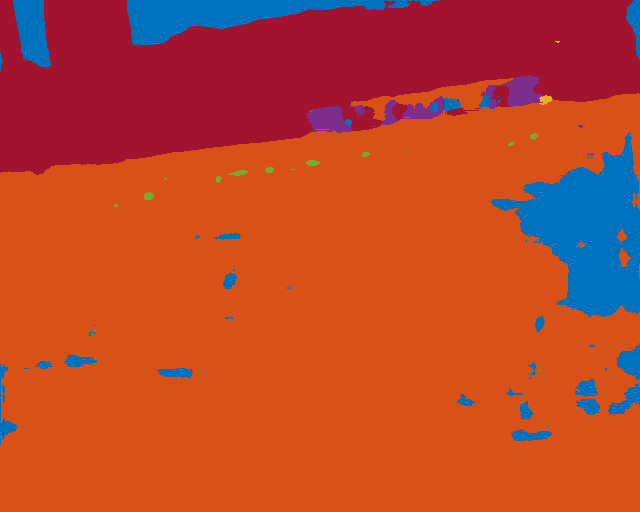

this is the raw image
this is the ground truth mask
this is the colored inferred image


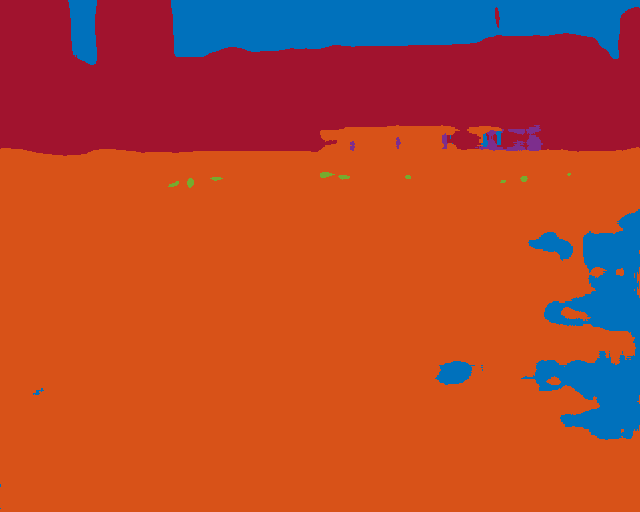

prev=667,i=668
iteration running is 668
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


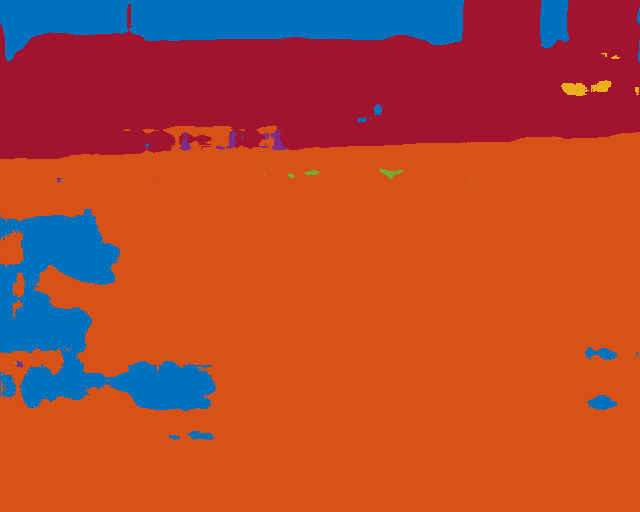

this is the raw image
this is the ground truth mask
this is the colored inferred image


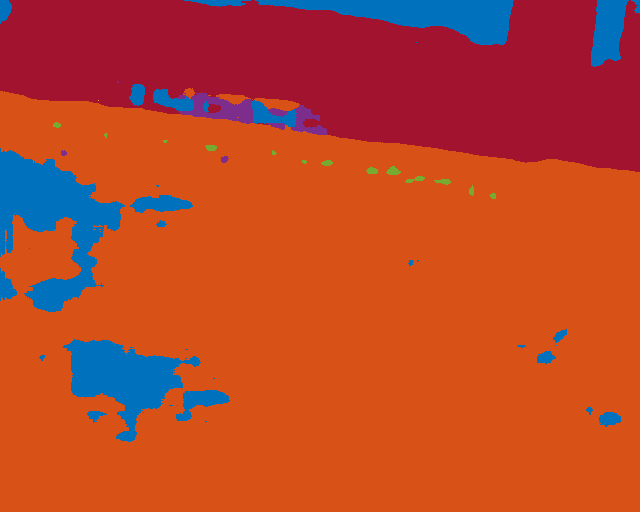

prev=669,i=670
iteration running is 670
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


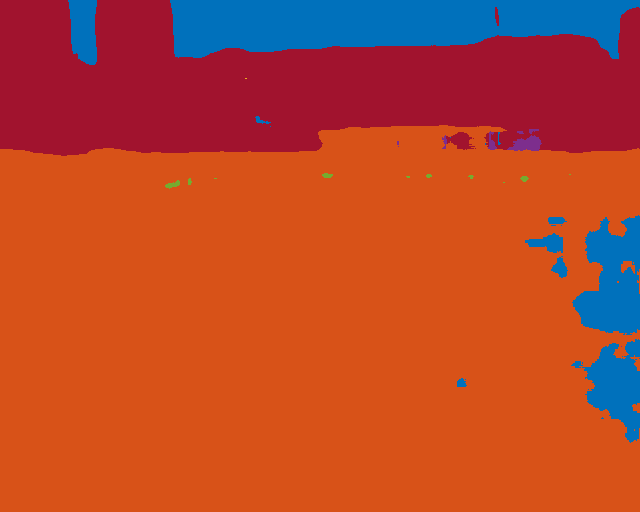

this is the raw image
this is the ground truth mask
this is the colored inferred image


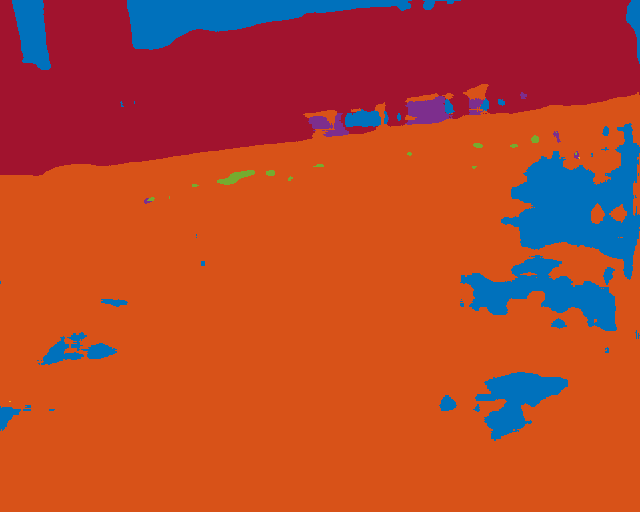

prev=671,i=672
iteration running is 672
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


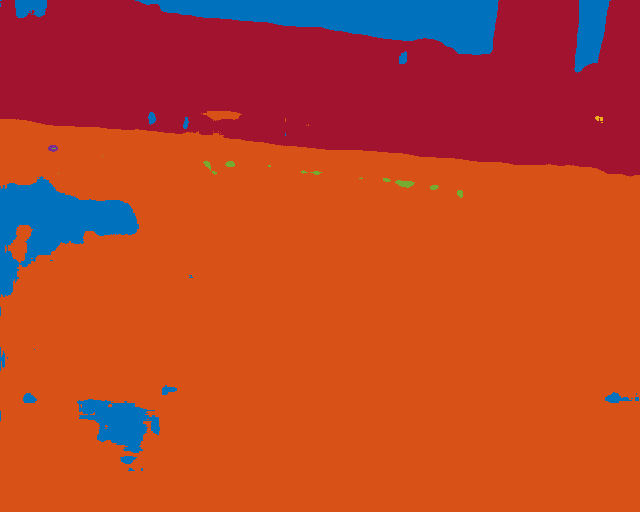

this is the raw image
this is the ground truth mask
this is the colored inferred image


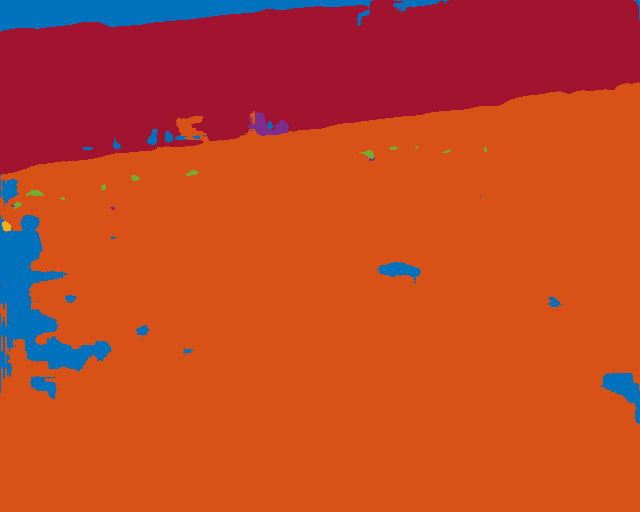

prev=673,i=674
iteration running is 674
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


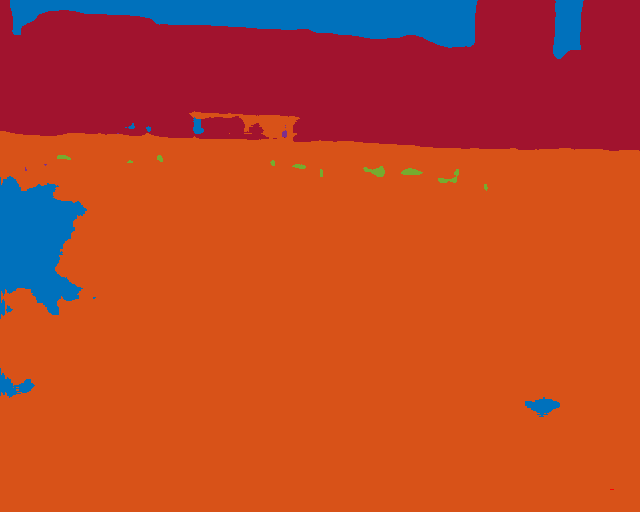

this is the raw image
this is the ground truth mask
this is the colored inferred image


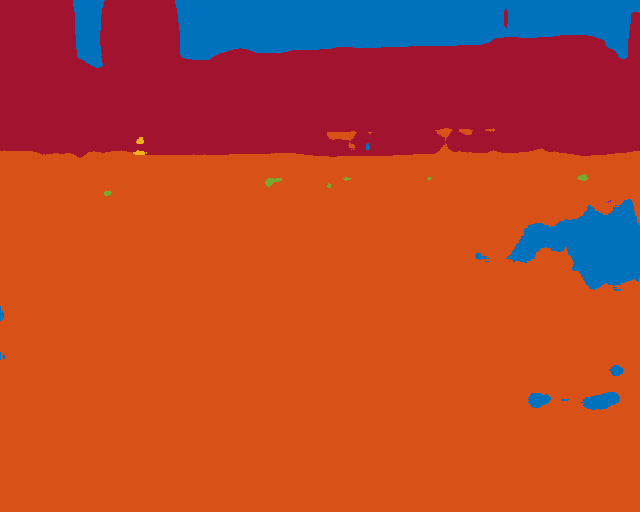

prev=675,i=676
iteration running is 676
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


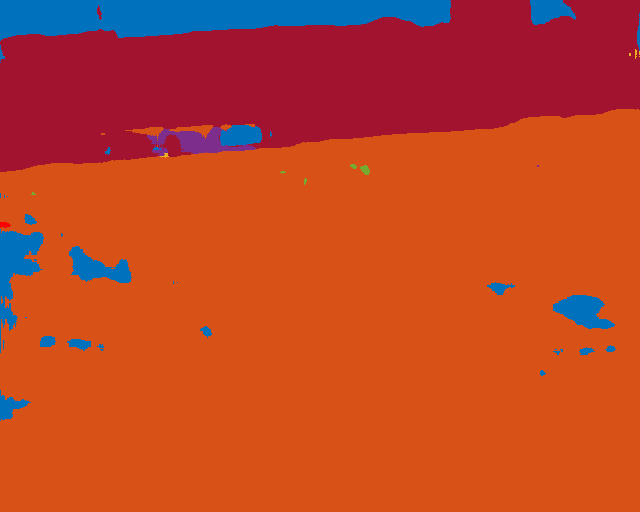

this is the raw image
this is the ground truth mask
this is the colored inferred image


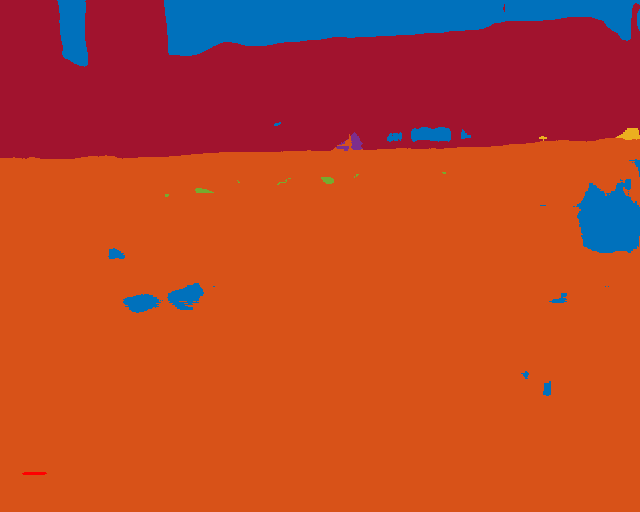

prev=677,i=678
iteration running is 678
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


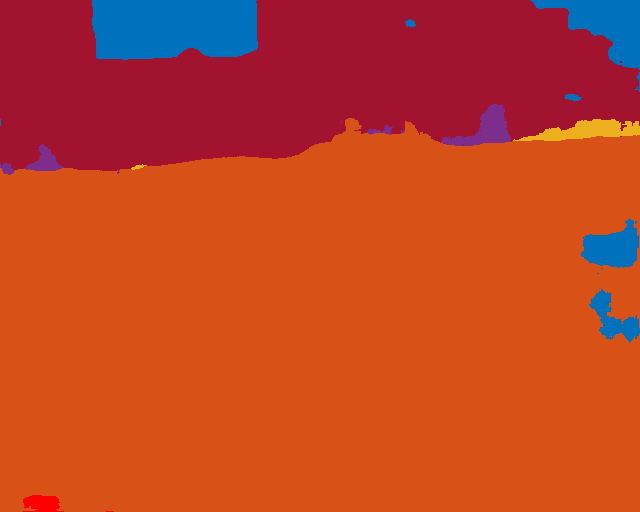

this is the raw image
this is the ground truth mask
this is the colored inferred image


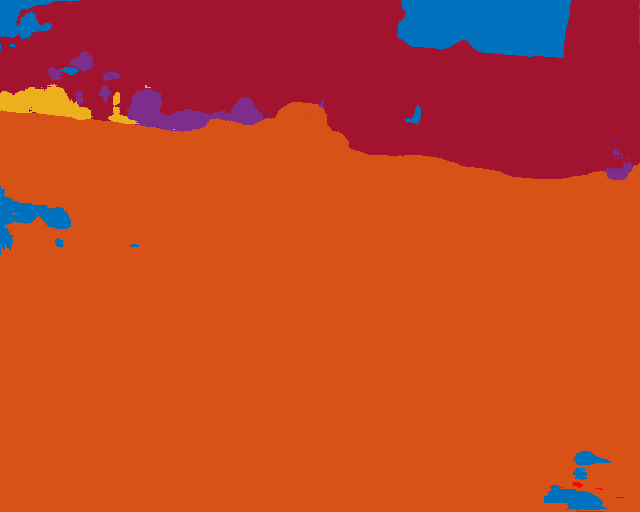

prev=679,i=680
iteration running is 680
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


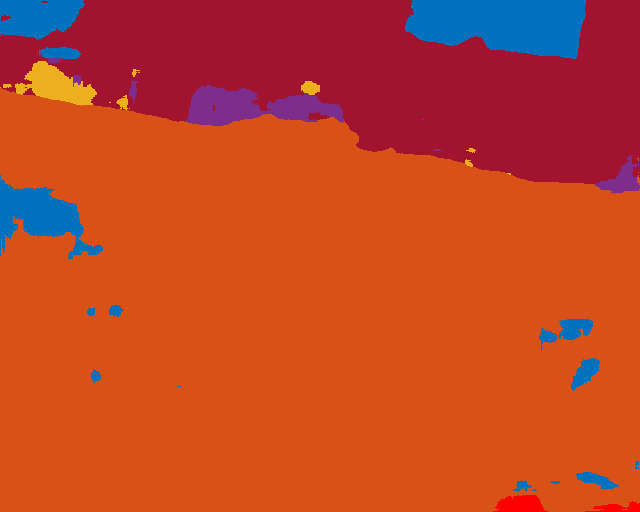

this is the raw image
this is the ground truth mask
this is the colored inferred image


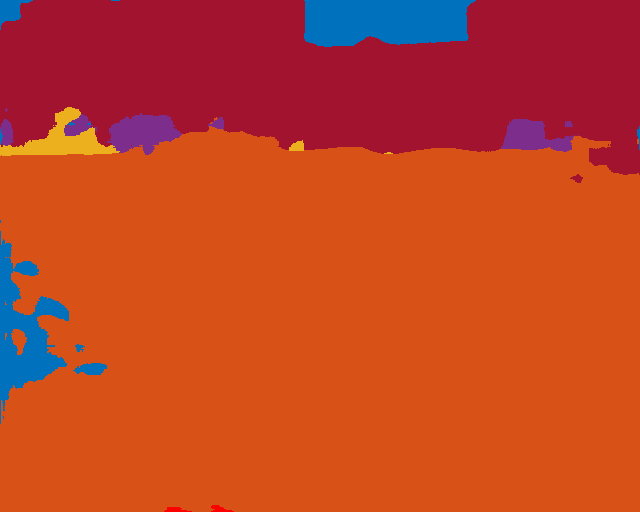

prev=681,i=682
iteration running is 682
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


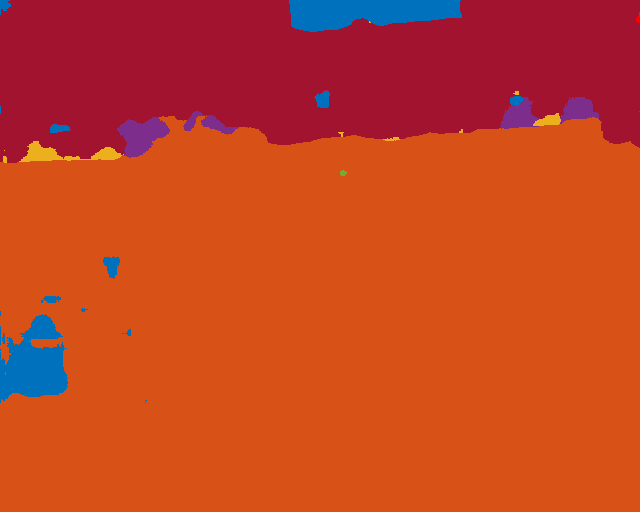

this is the raw image
this is the ground truth mask
this is the colored inferred image


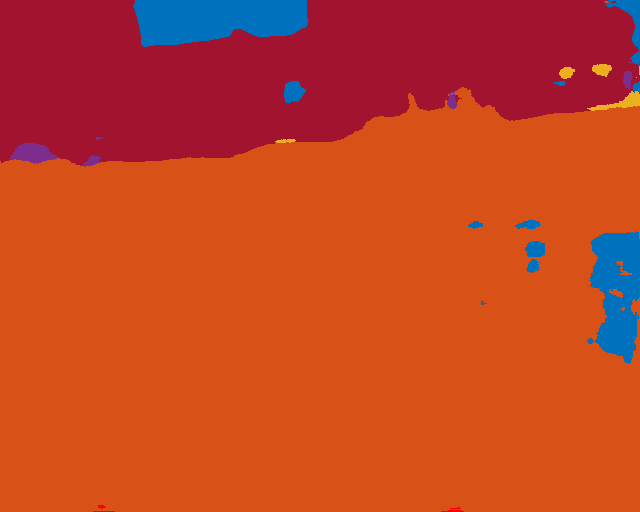

prev=683,i=684
iteration running is 684
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


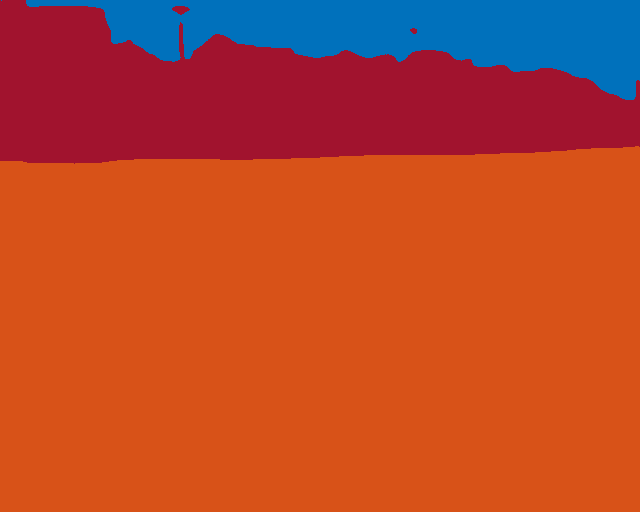

this is the raw image
this is the ground truth mask
this is the colored inferred image


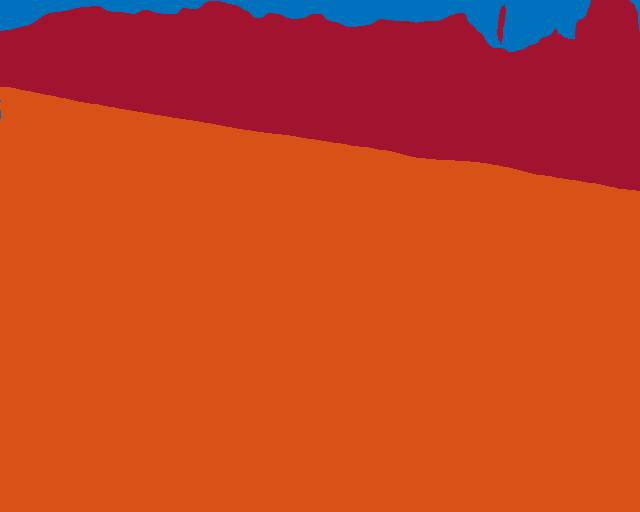

prev=685,i=686
iteration running is 686
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


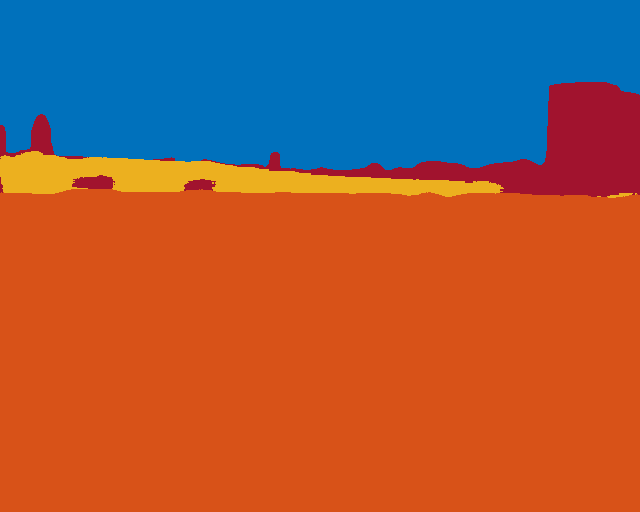

this is the raw image
this is the ground truth mask
this is the colored inferred image


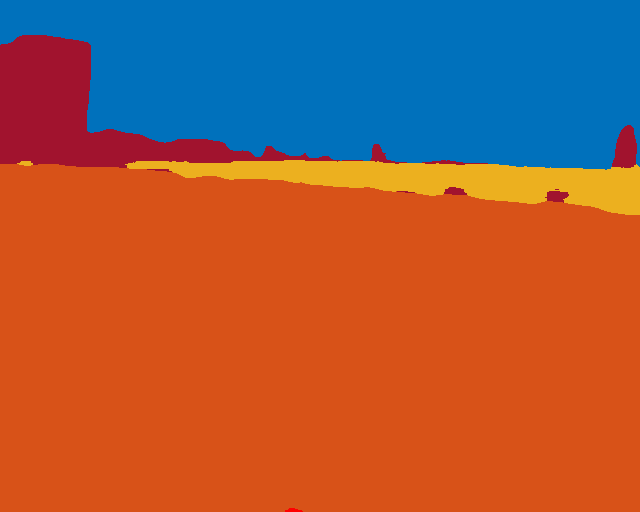

prev=687,i=688
iteration running is 688
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


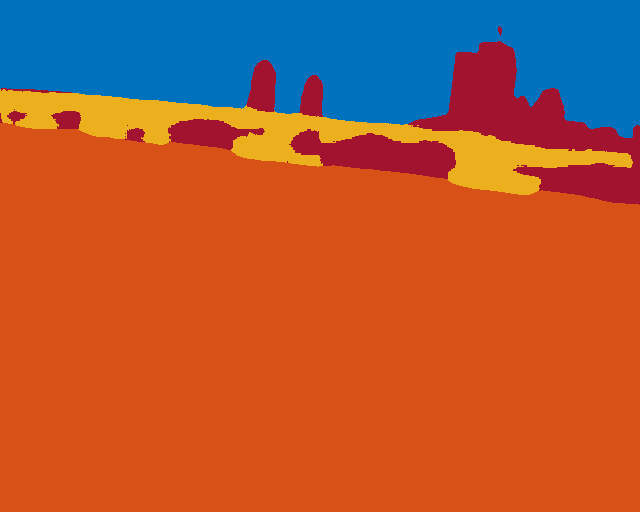

this is the raw image
this is the ground truth mask
this is the colored inferred image


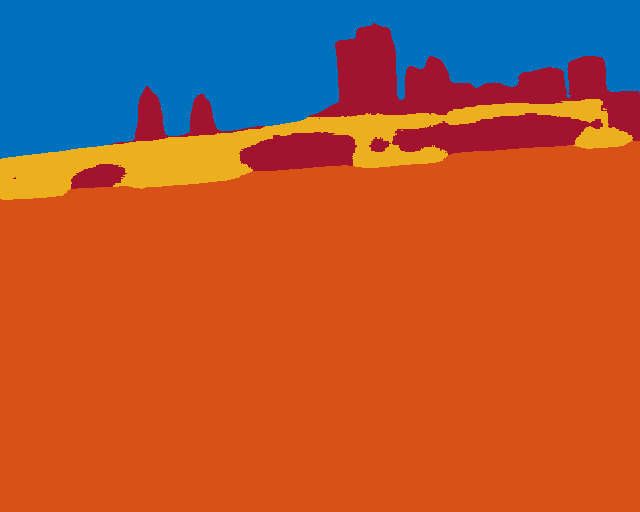

prev=689,i=690
iteration running is 690
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


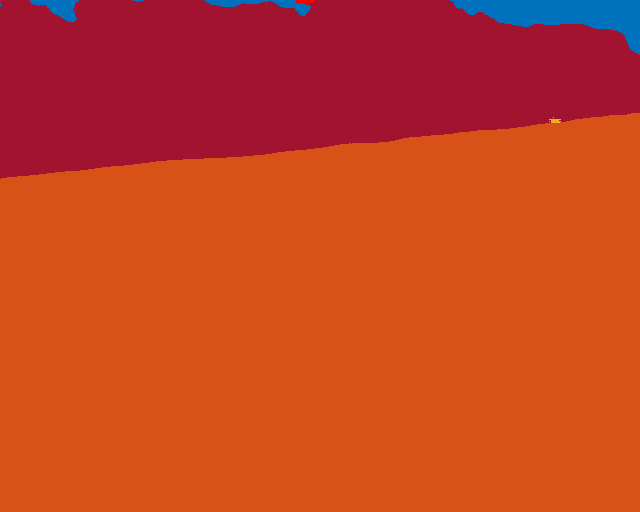

this is the raw image
this is the ground truth mask
this is the colored inferred image


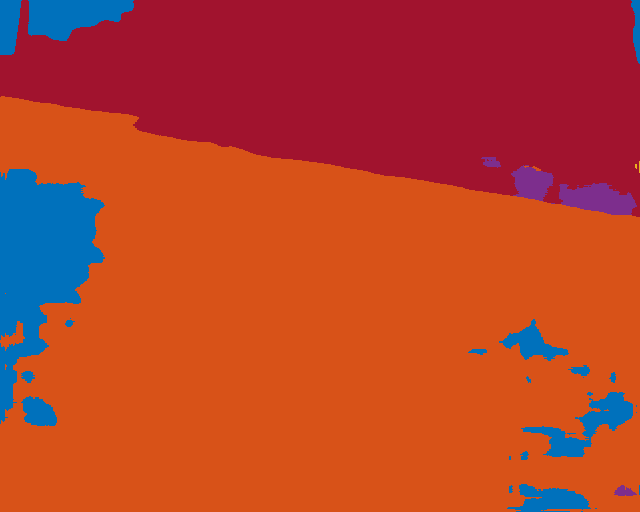

prev=691,i=692
iteration running is 692
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


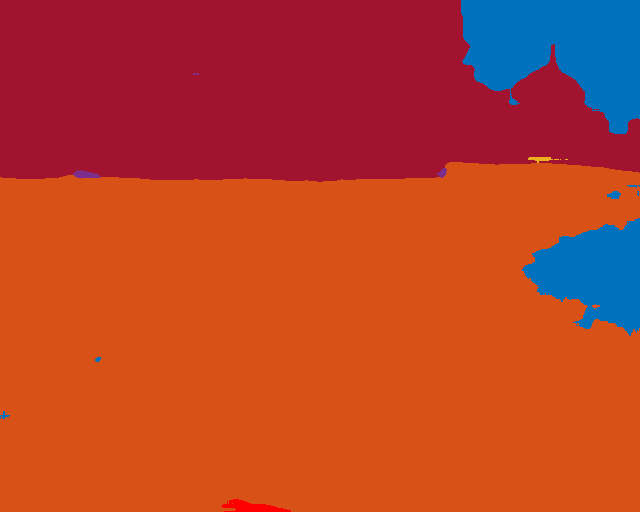

this is the raw image
this is the ground truth mask
this is the colored inferred image


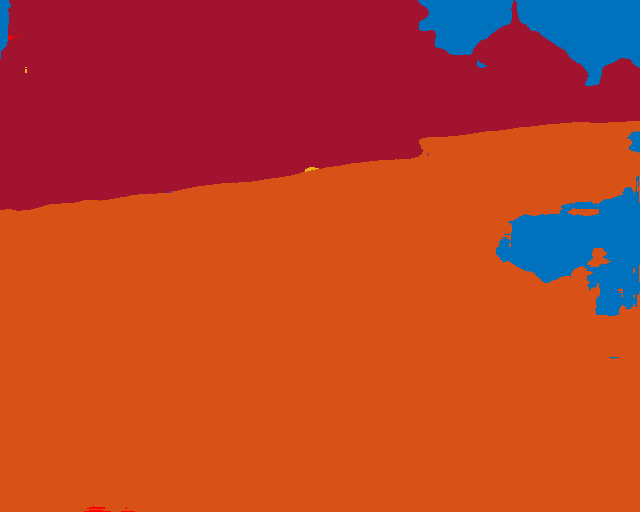

prev=693,i=694
iteration running is 694
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


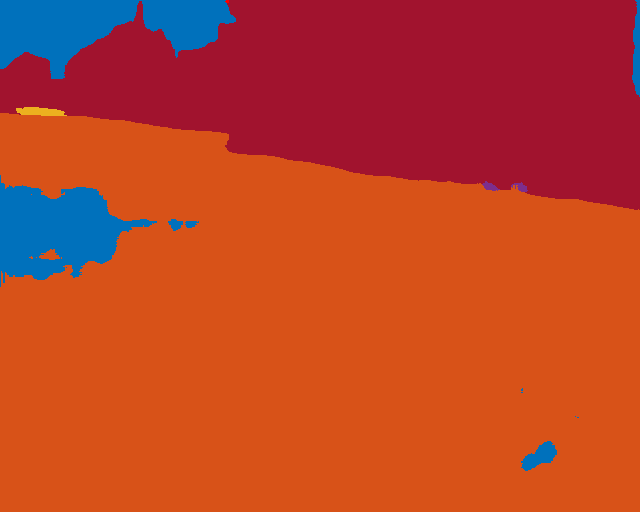

this is the raw image
this is the ground truth mask
this is the colored inferred image


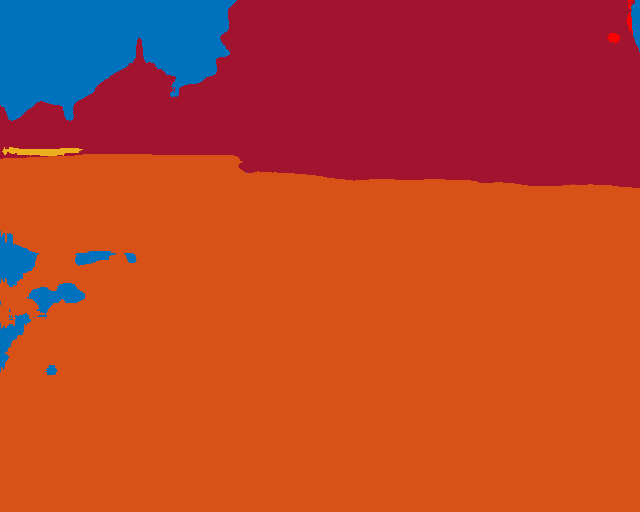

prev=695,i=696
iteration running is 696
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


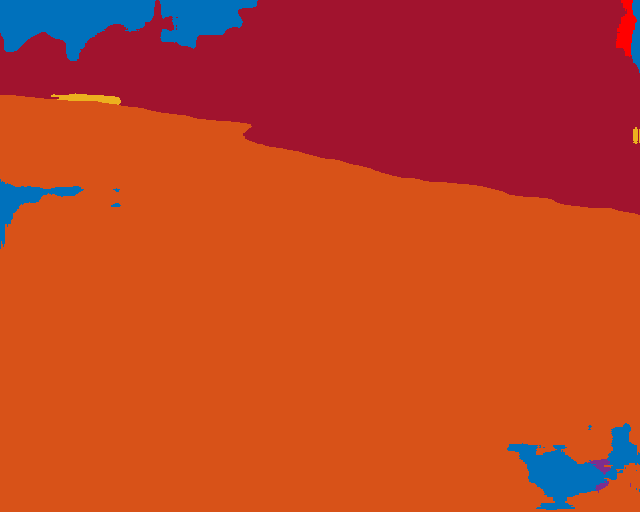

this is the raw image
this is the ground truth mask
this is the colored inferred image


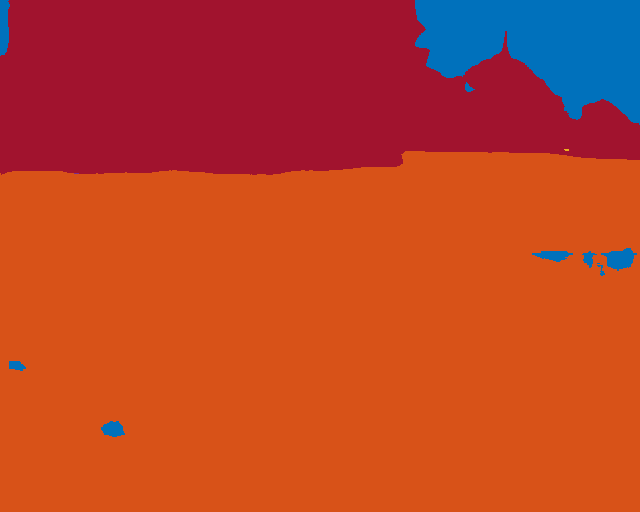

prev=697,i=698
iteration running is 698
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


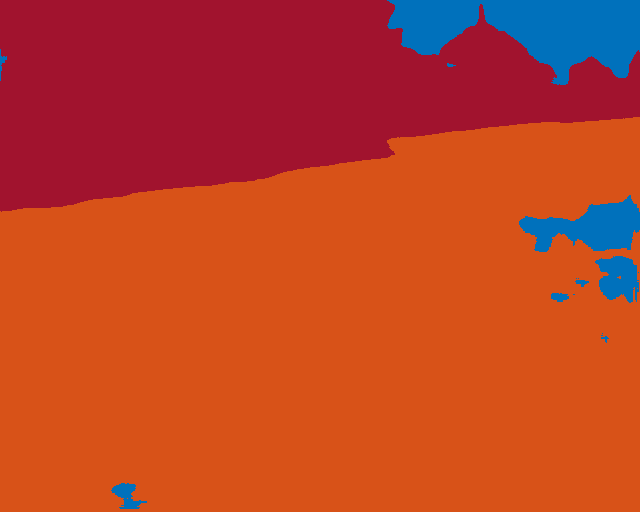

this is the raw image
this is the ground truth mask
this is the colored inferred image


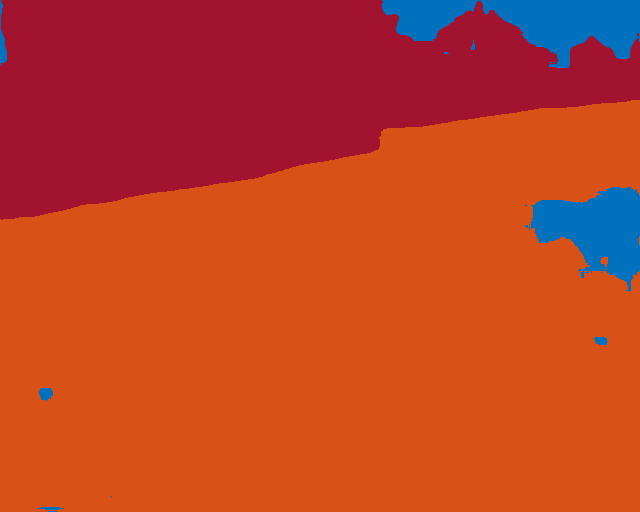

prev=699,i=700
iteration running is 700
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


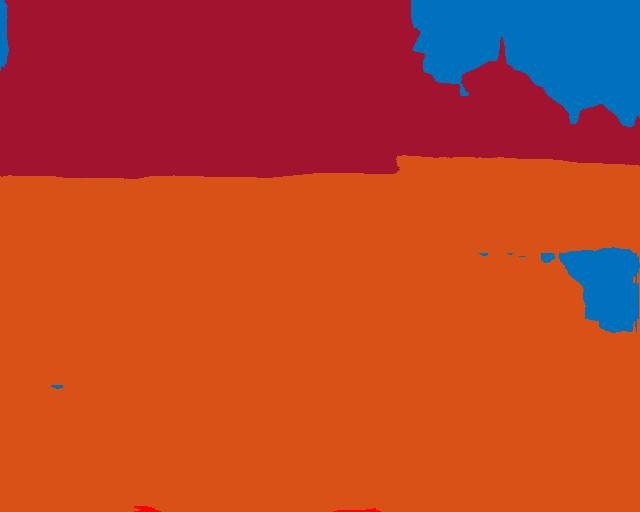

this is the raw image
this is the ground truth mask
this is the colored inferred image


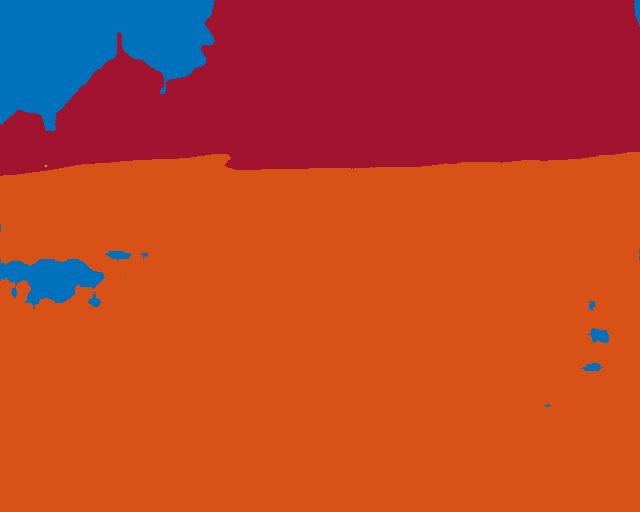

prev=701,i=702
iteration running is 702
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


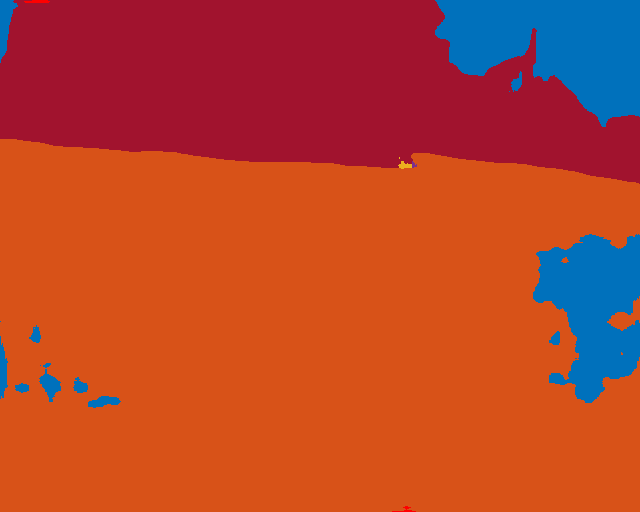

this is the raw image
this is the ground truth mask
this is the colored inferred image


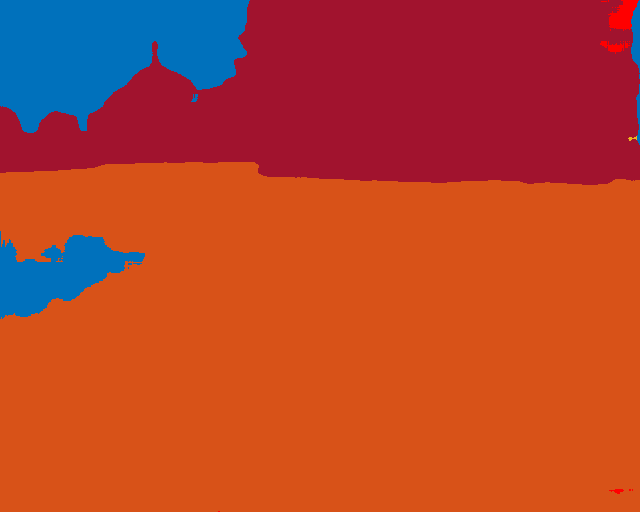

prev=703,i=704
iteration running is 704
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


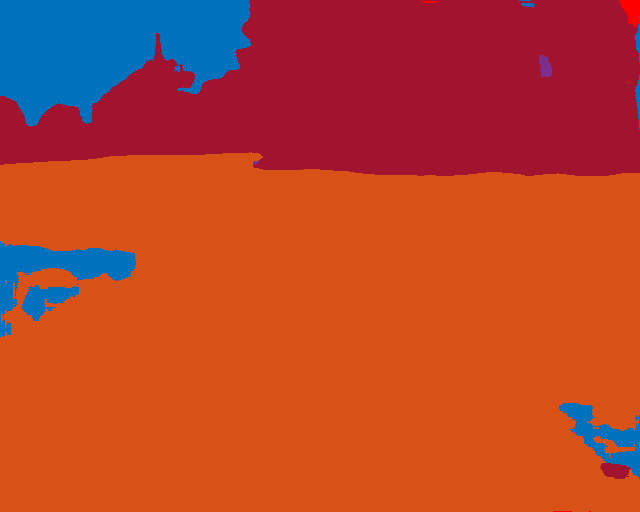

this is the raw image
this is the ground truth mask
this is the colored inferred image


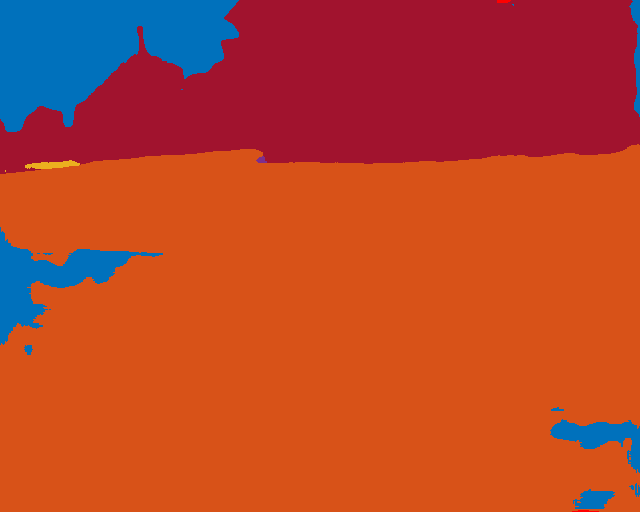

prev=705,i=706
iteration running is 706
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


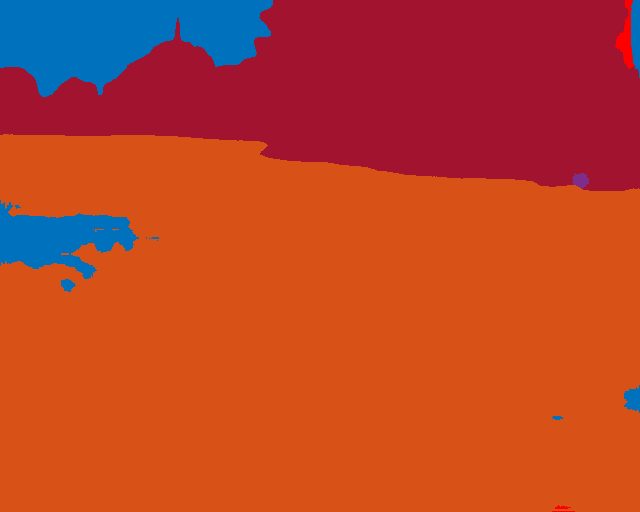

this is the raw image
this is the ground truth mask
this is the colored inferred image


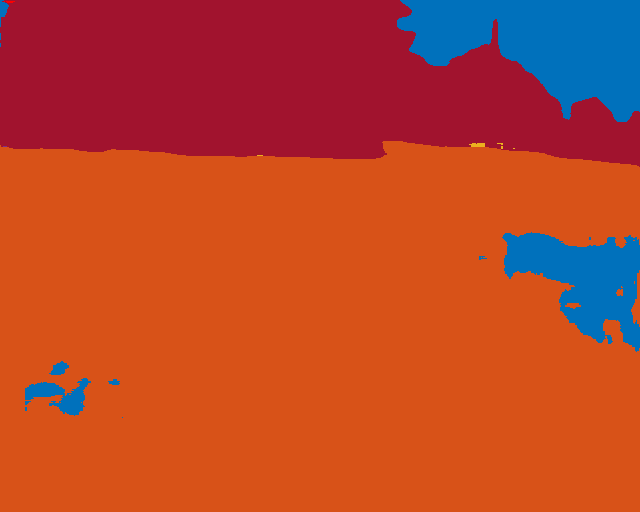

prev=707,i=708
iteration running is 708
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


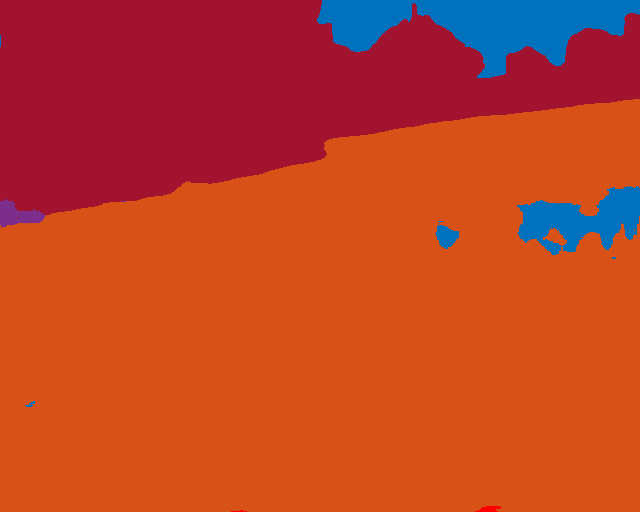

this is the raw image
this is the ground truth mask
this is the colored inferred image


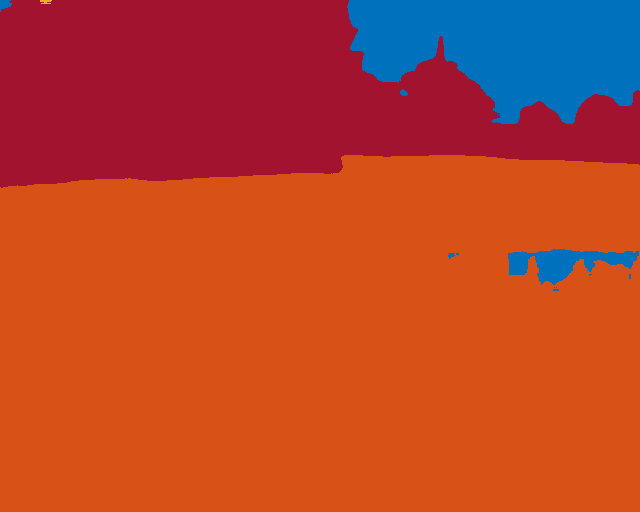

prev=709,i=710
iteration running is 710
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


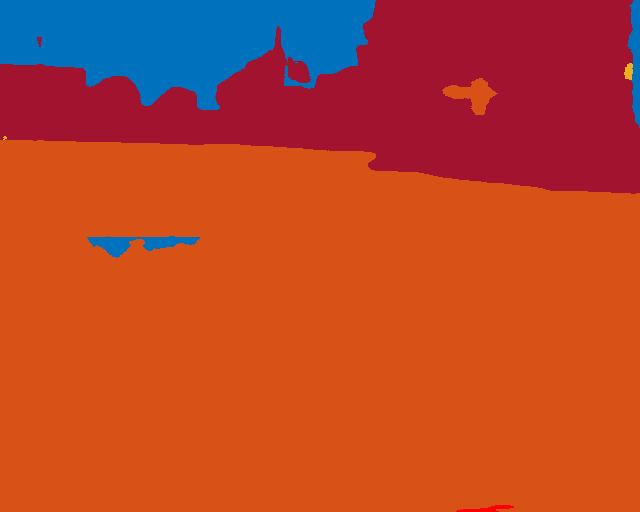

this is the raw image
this is the ground truth mask
this is the colored inferred image


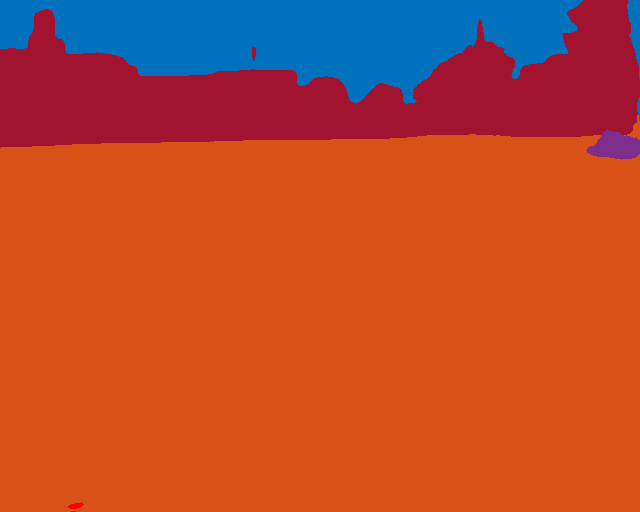

prev=711,i=712
iteration running is 712
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


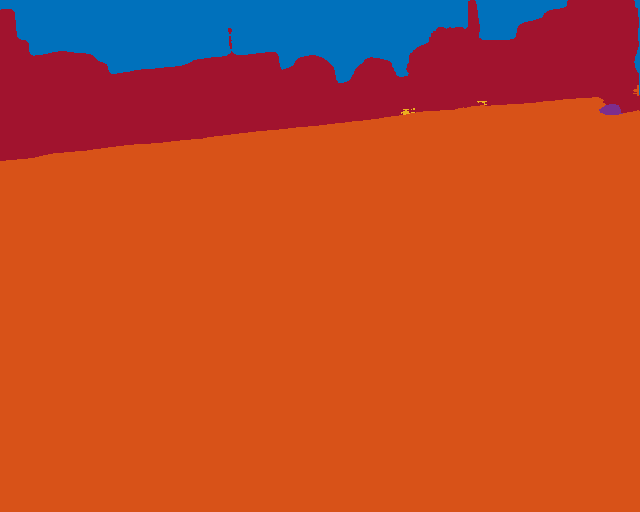

this is the raw image
this is the ground truth mask
this is the colored inferred image


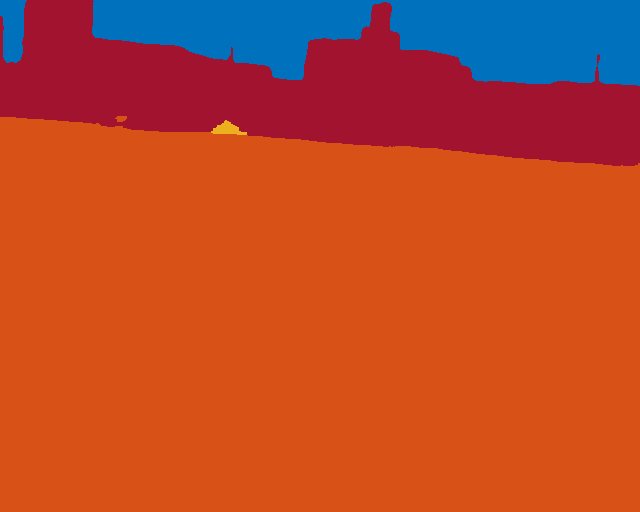

prev=713,i=714
iteration running is 714
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


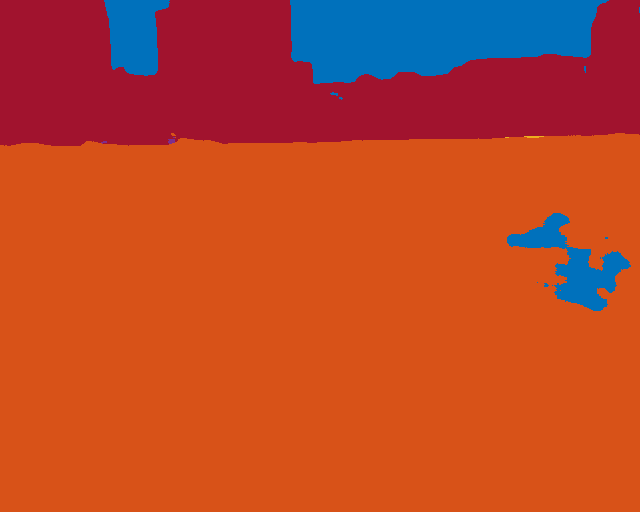

this is the raw image
this is the ground truth mask
this is the colored inferred image


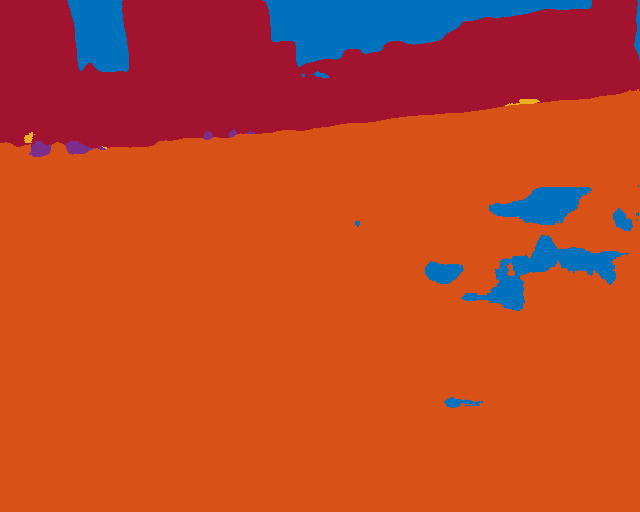

prev=715,i=716
iteration running is 716
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


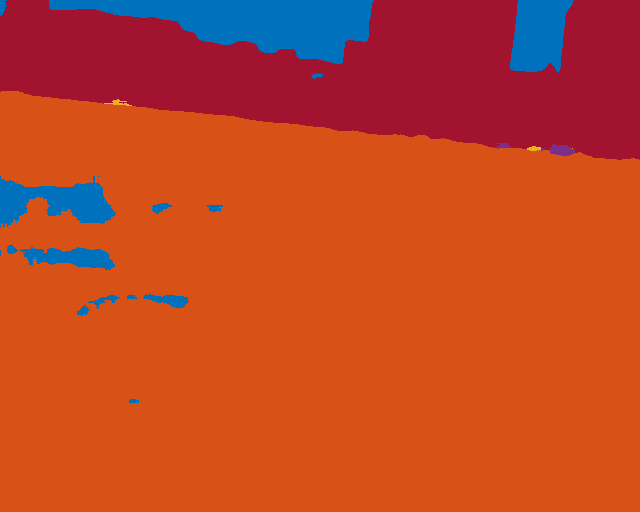

this is the raw image
this is the ground truth mask
this is the colored inferred image


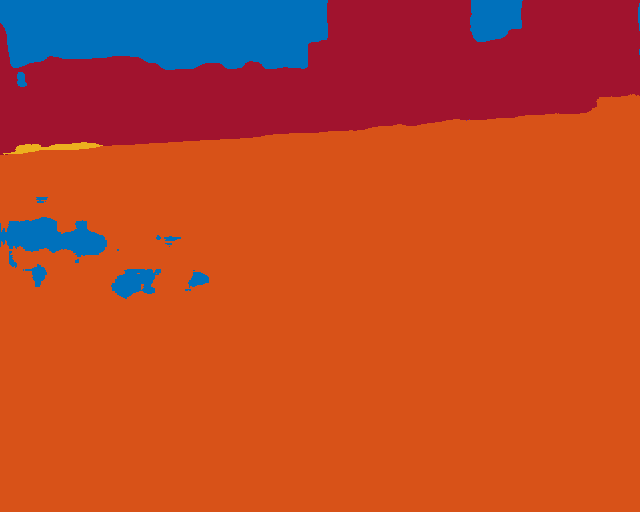

prev=717,i=718
iteration running is 718
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


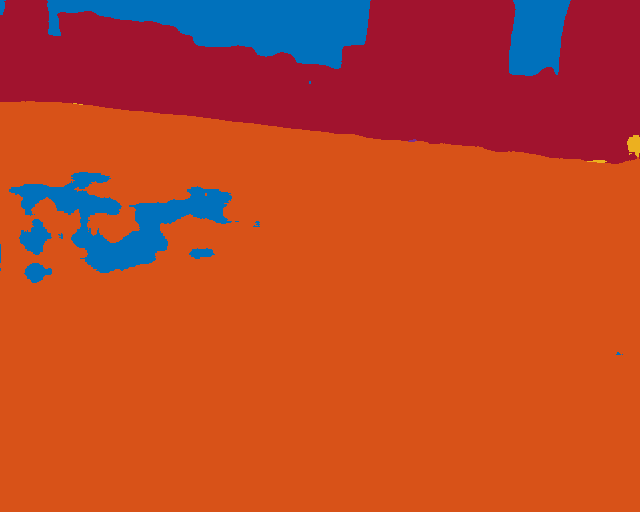

this is the raw image
this is the ground truth mask
this is the colored inferred image


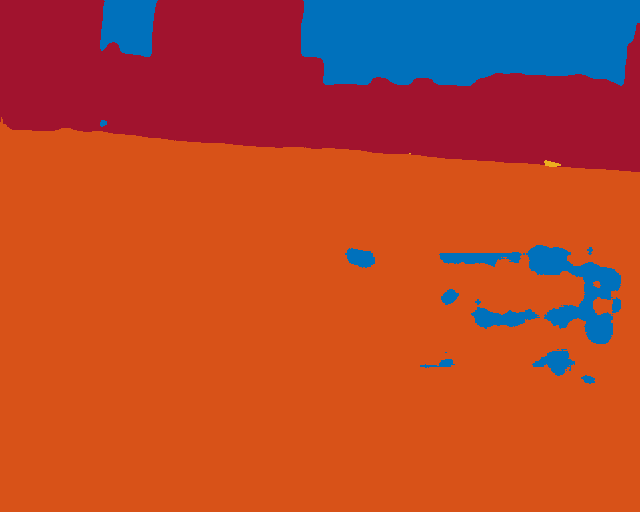

prev=719,i=720
iteration running is 720
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


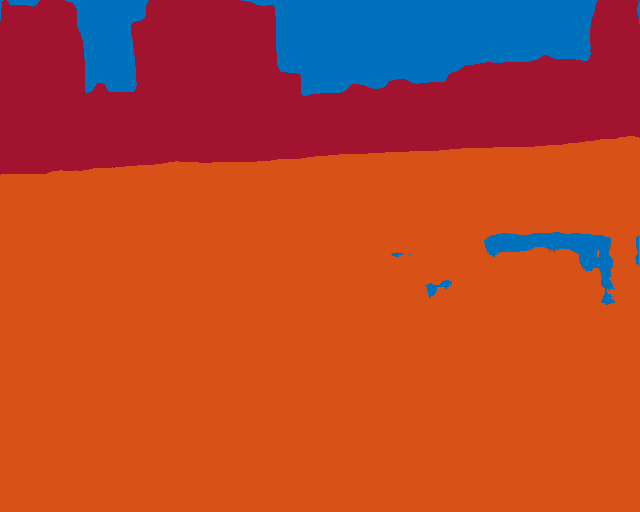

this is the raw image
this is the ground truth mask
this is the colored inferred image


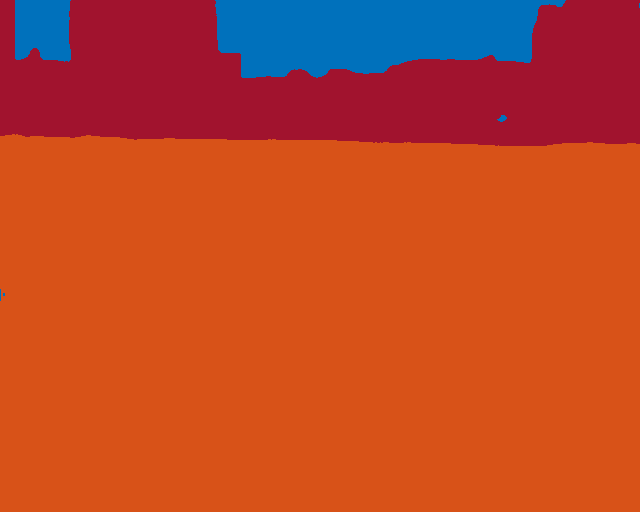

prev=721,i=722
iteration running is 722
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


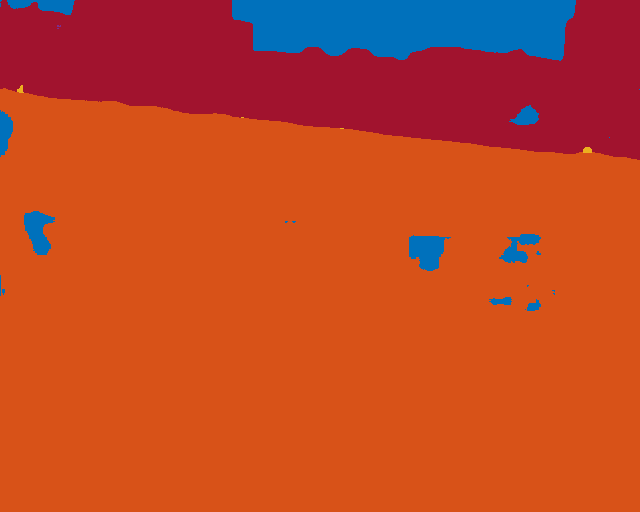

this is the raw image
this is the ground truth mask
this is the colored inferred image


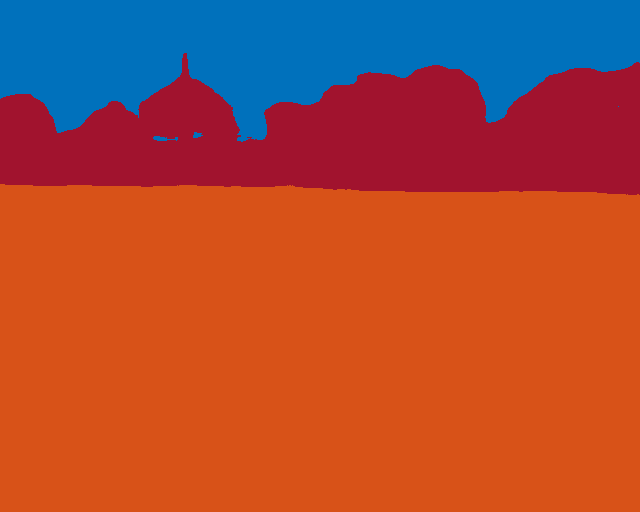

prev=723,i=724
iteration running is 724
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


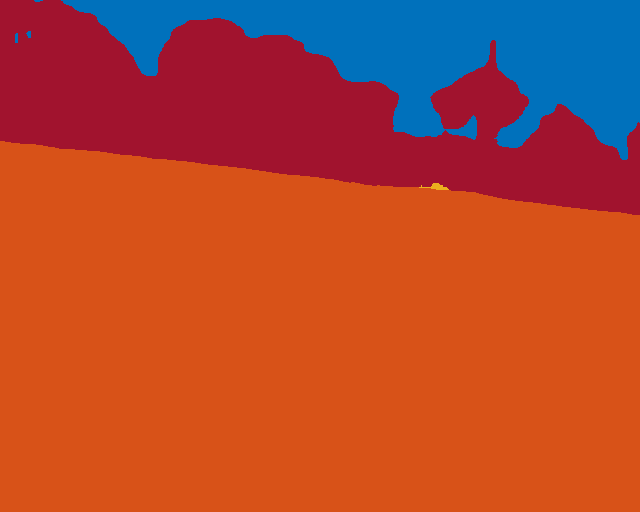

this is the raw image
this is the ground truth mask
this is the colored inferred image


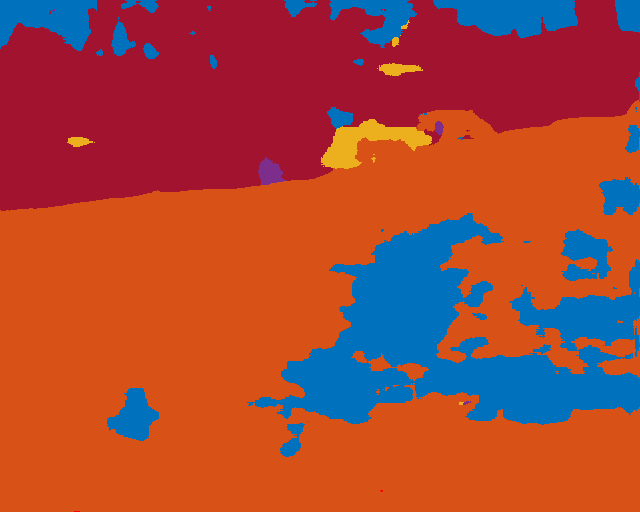

prev=725,i=726
iteration running is 726
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


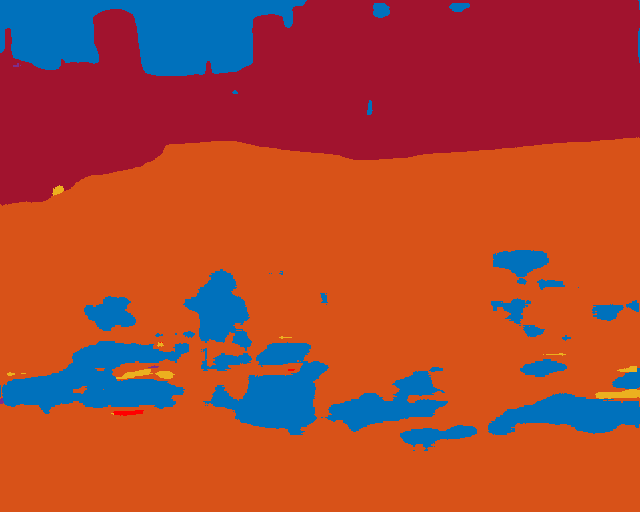

this is the raw image
this is the ground truth mask
this is the colored inferred image


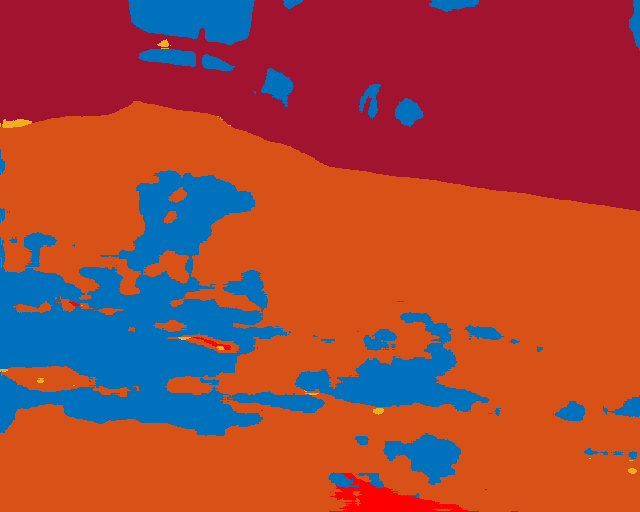

prev=727,i=728
iteration running is 728
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


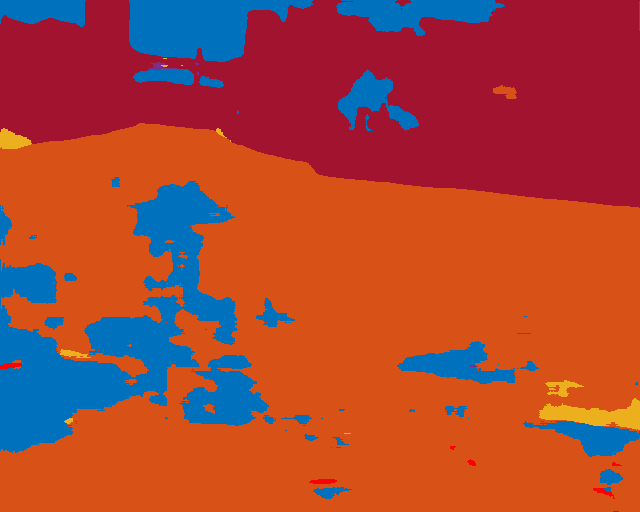

this is the raw image
this is the ground truth mask
this is the colored inferred image


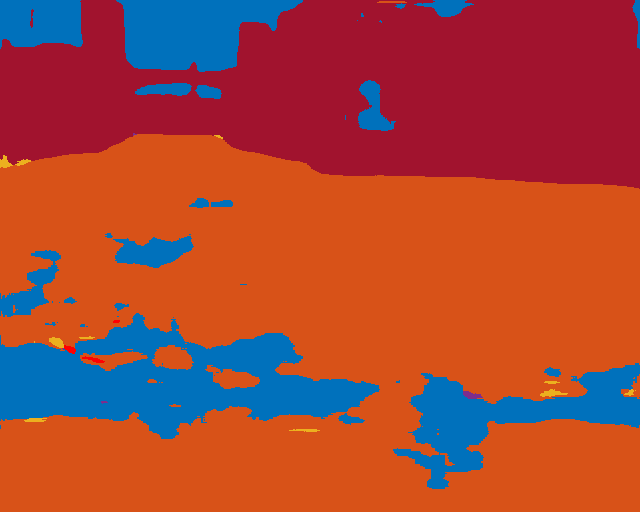

prev=729,i=730
iteration running is 730
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


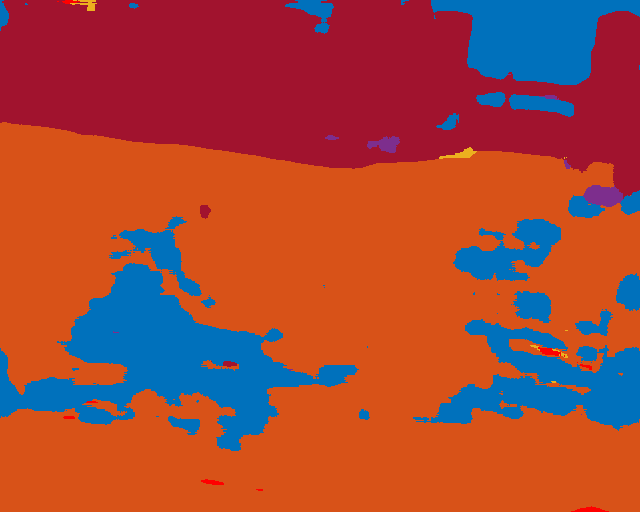

this is the raw image
this is the ground truth mask
this is the colored inferred image


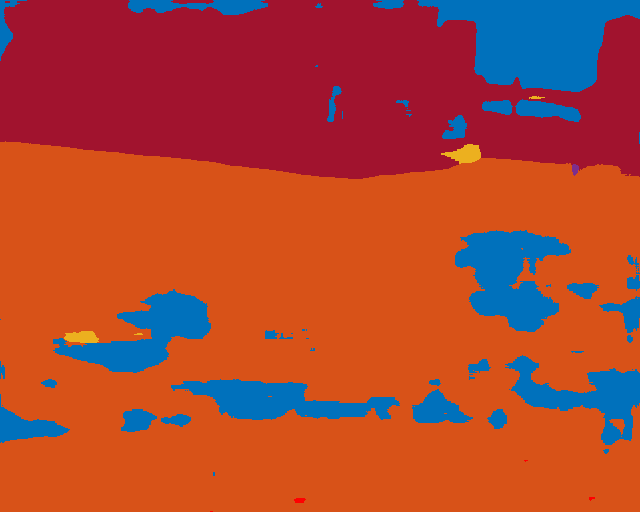

prev=731,i=732
iteration running is 732
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


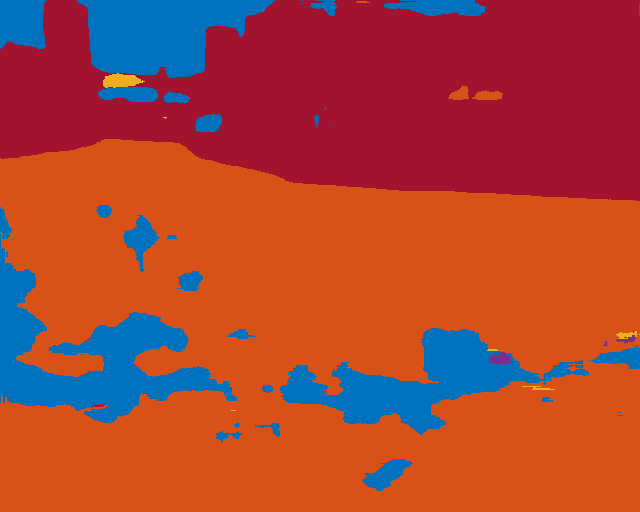

this is the raw image
this is the ground truth mask
this is the colored inferred image


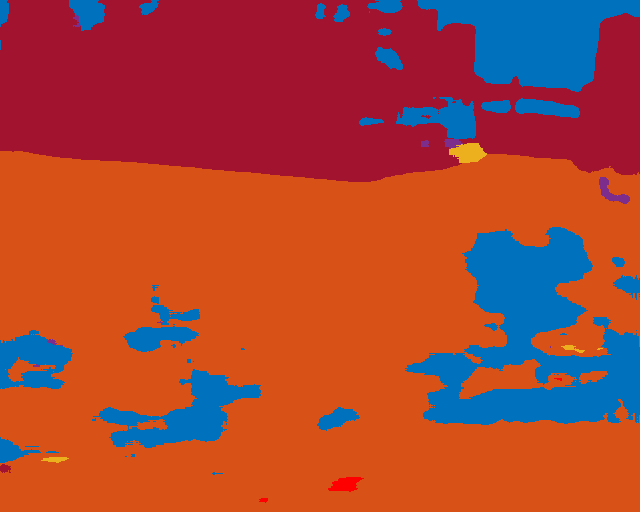

prev=733,i=734
iteration running is 734
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


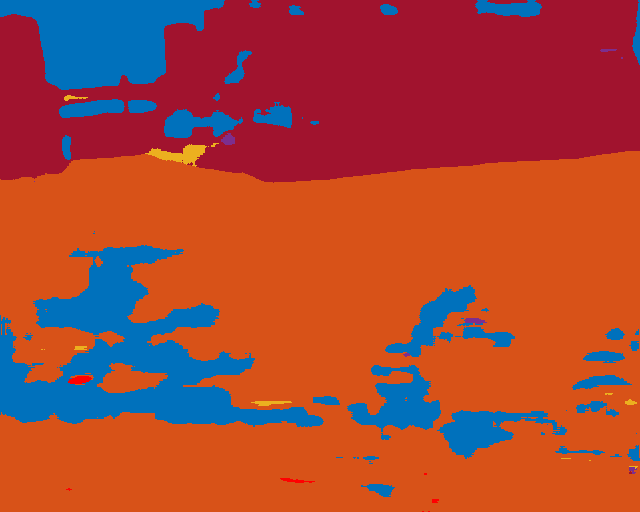

this is the raw image
this is the ground truth mask
this is the colored inferred image


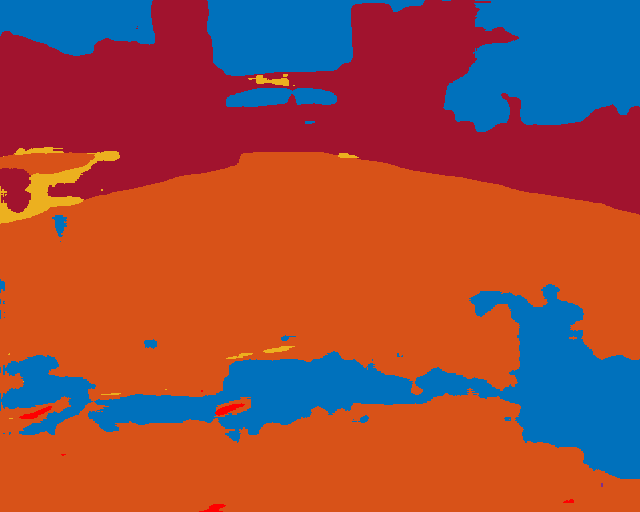

prev=735,i=736
iteration running is 736
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


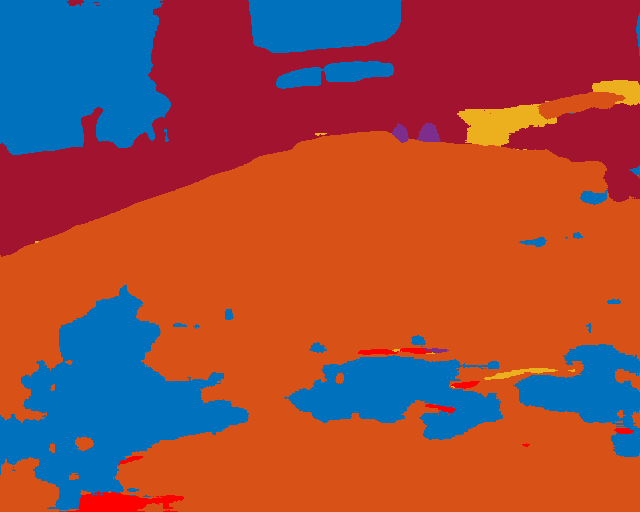

this is the raw image
this is the ground truth mask
this is the colored inferred image


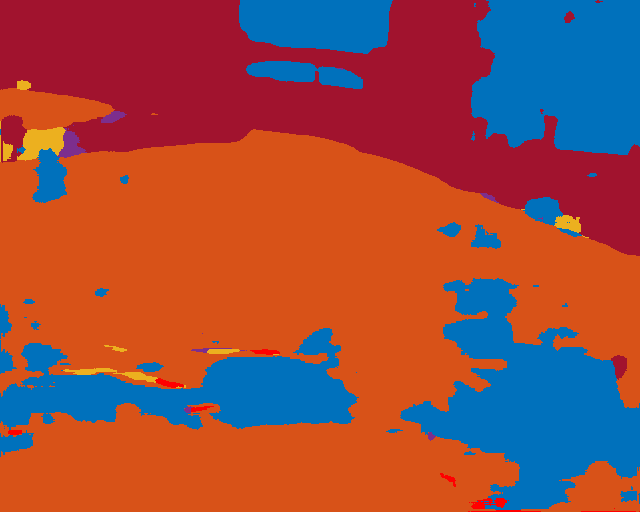

prev=737,i=738
iteration running is 738
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


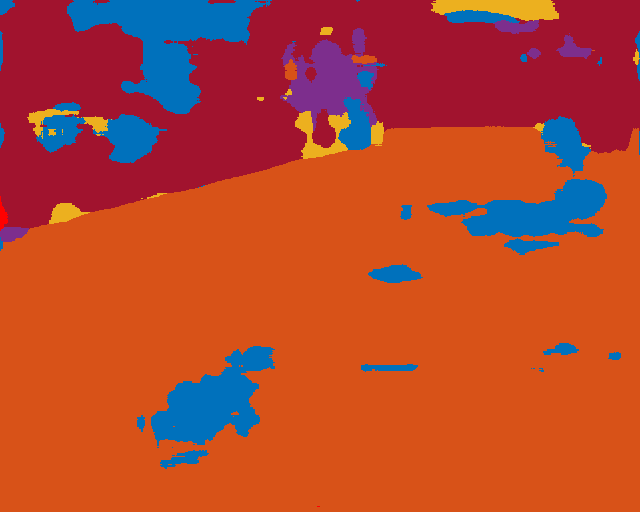

this is the raw image
this is the ground truth mask
this is the colored inferred image


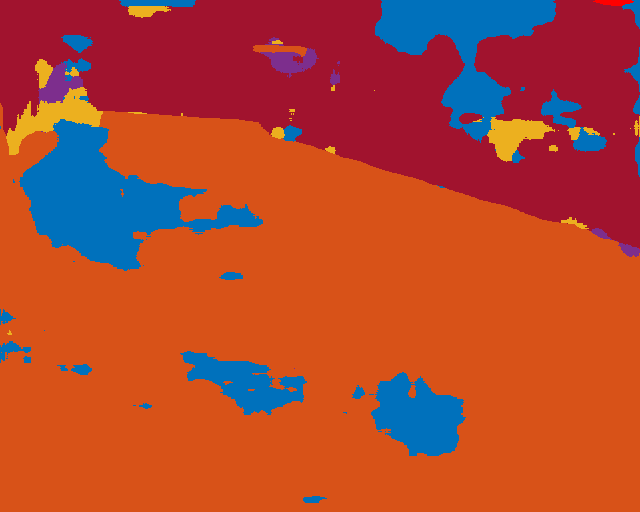

prev=739,i=740
iteration running is 740
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


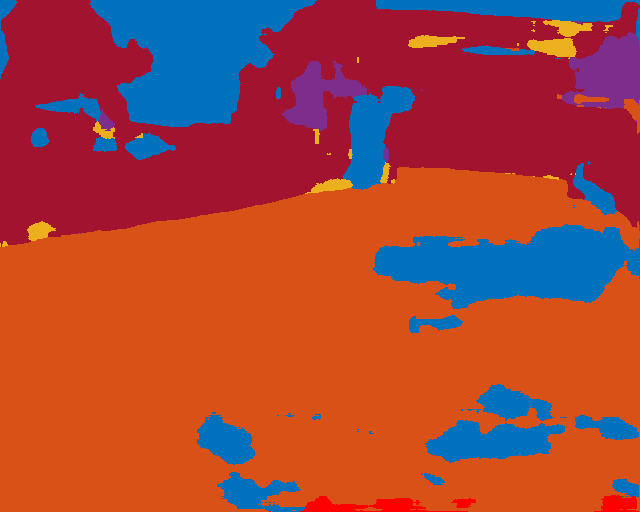

this is the raw image
this is the ground truth mask
this is the colored inferred image


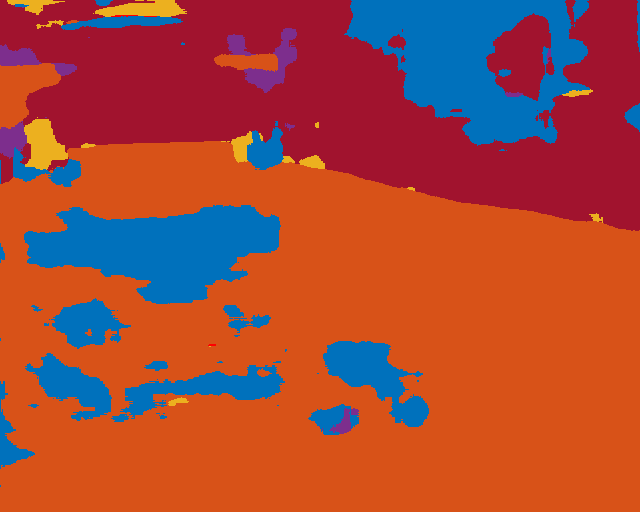

prev=741,i=742
iteration running is 742
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


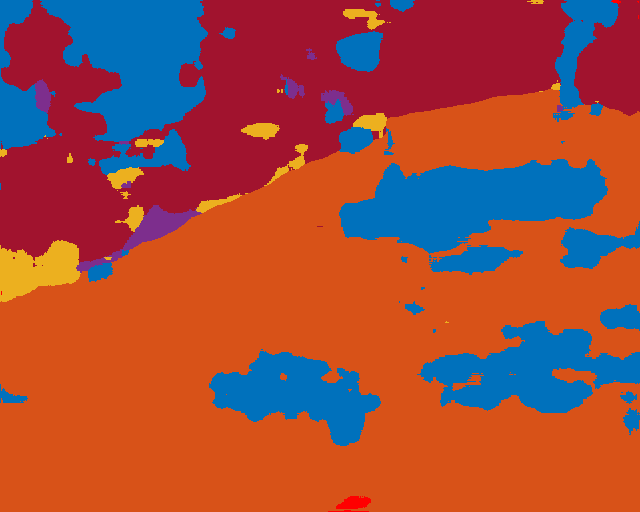

this is the raw image
this is the ground truth mask
this is the colored inferred image


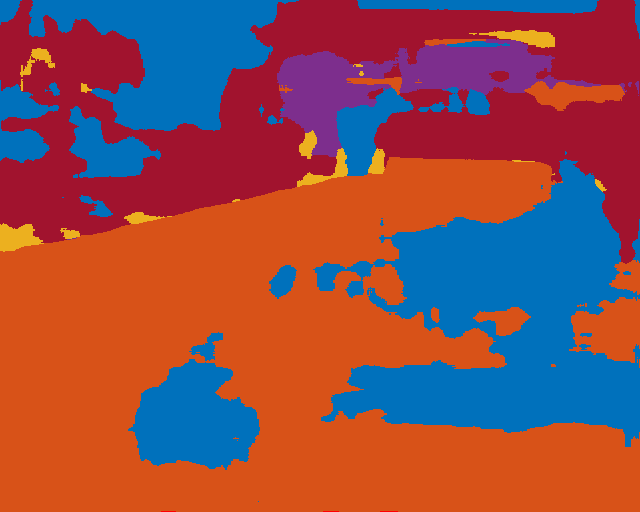

prev=743,i=744
iteration running is 744
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


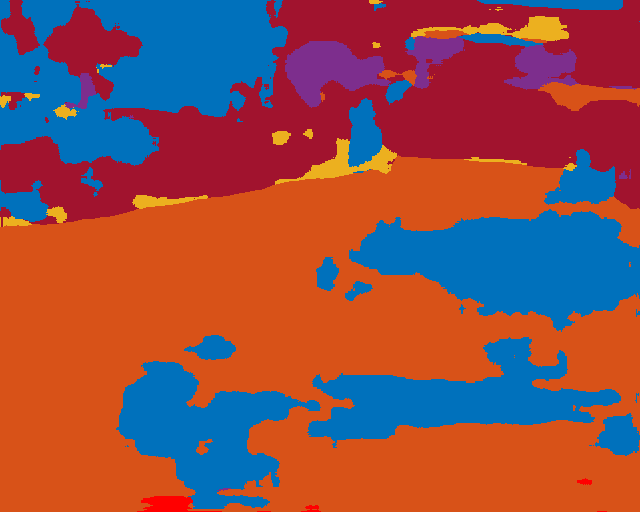

this is the raw image
this is the ground truth mask
this is the colored inferred image


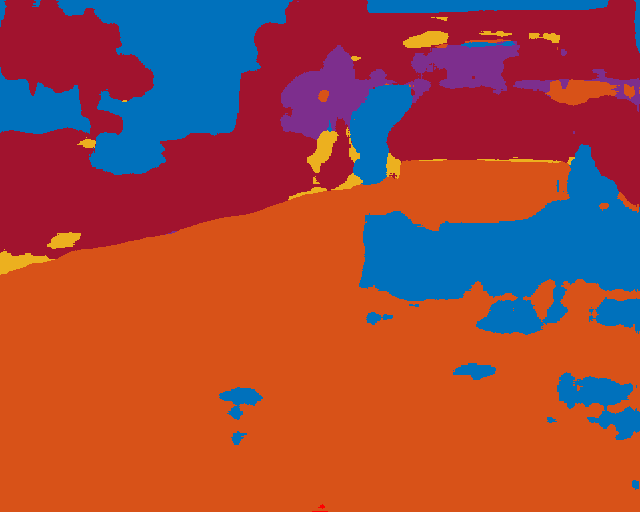

prev=745,i=746
iteration running is 746
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


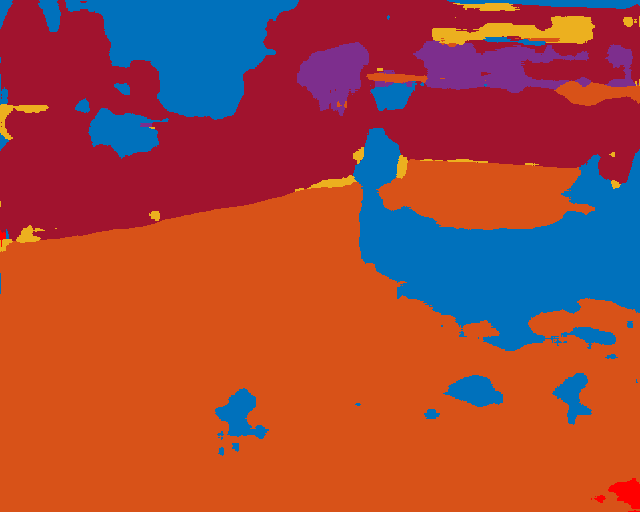

this is the raw image
this is the ground truth mask
this is the colored inferred image


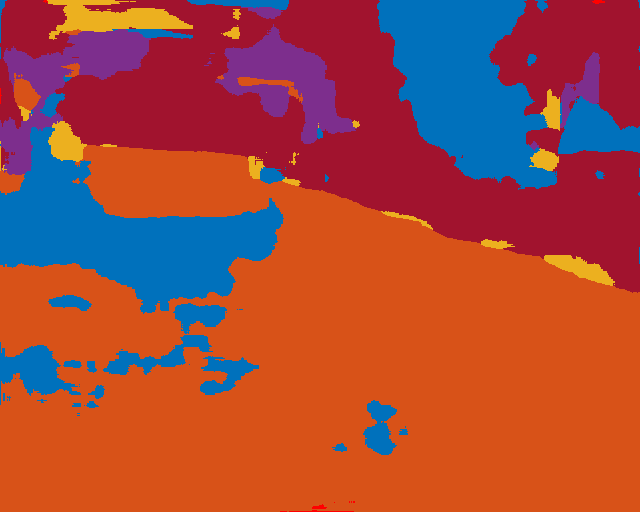

prev=747,i=748
iteration running is 748
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


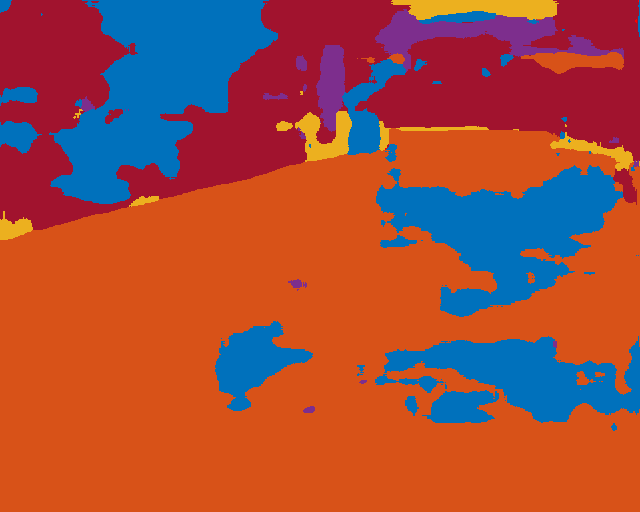

this is the raw image
this is the ground truth mask
this is the colored inferred image


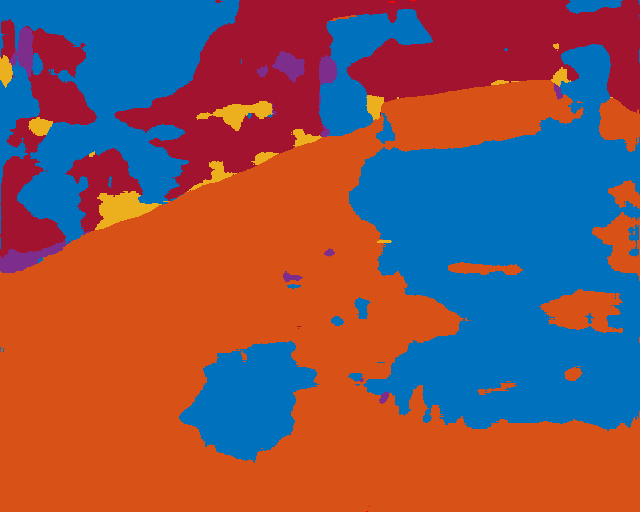

prev=749,i=750
iteration running is 750
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


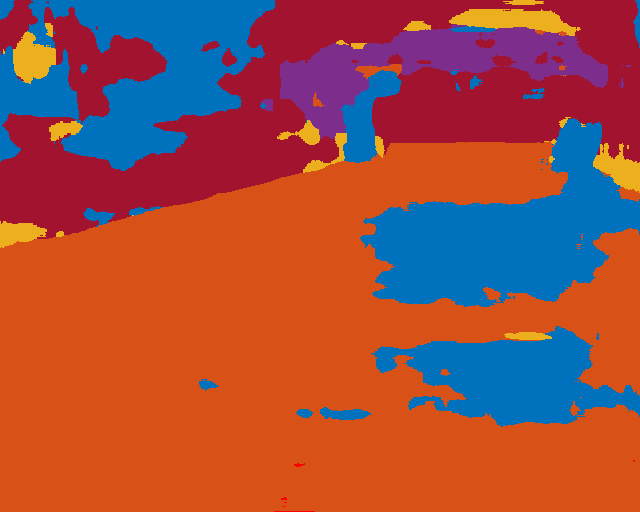

this is the raw image
this is the ground truth mask
this is the colored inferred image


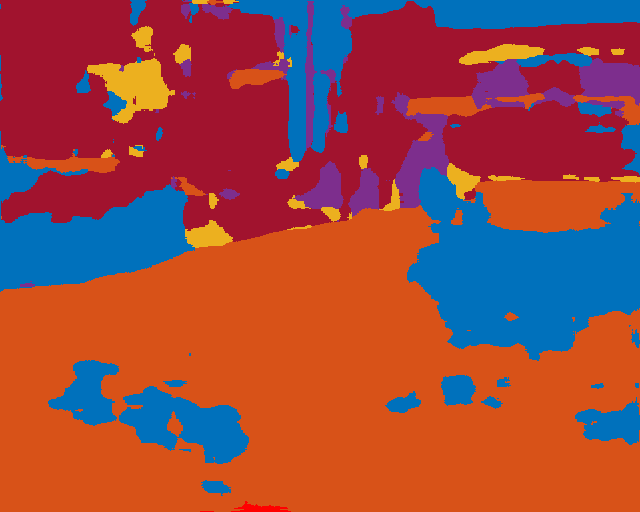

prev=751,i=752
iteration running is 752
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


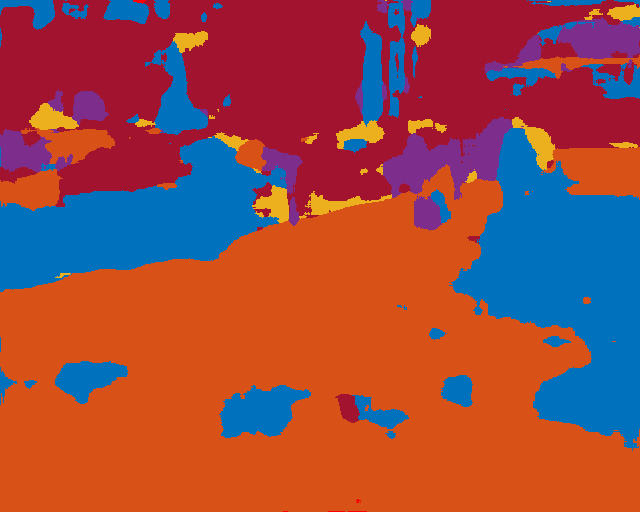

this is the raw image
this is the ground truth mask
this is the colored inferred image


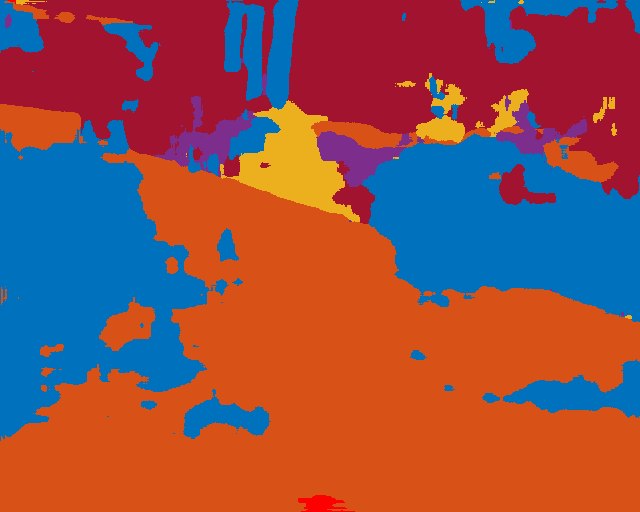

prev=753,i=754
iteration running is 754
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


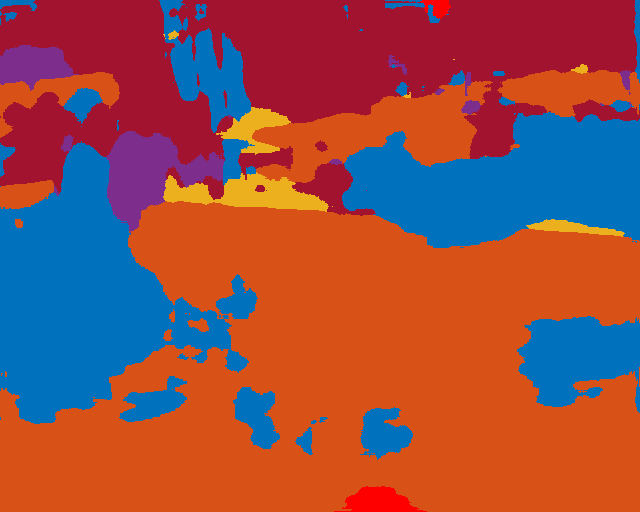

this is the raw image
this is the ground truth mask
this is the colored inferred image


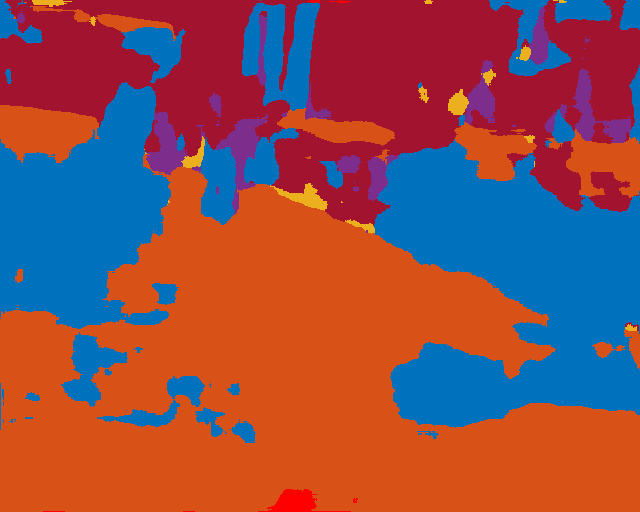

prev=755,i=756
iteration running is 756
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


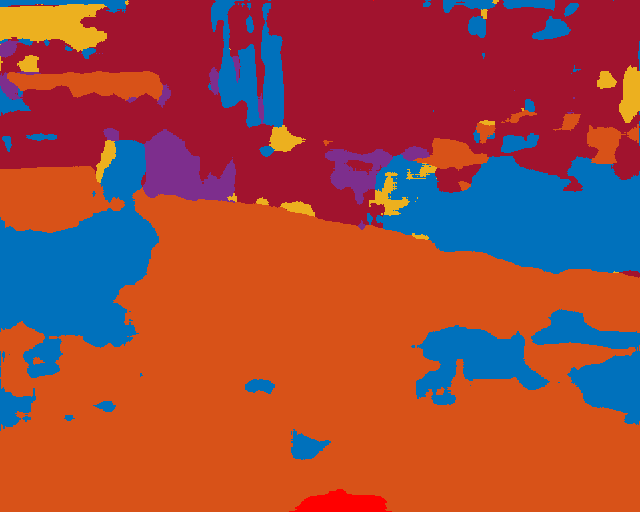

this is the raw image
this is the ground truth mask
this is the colored inferred image


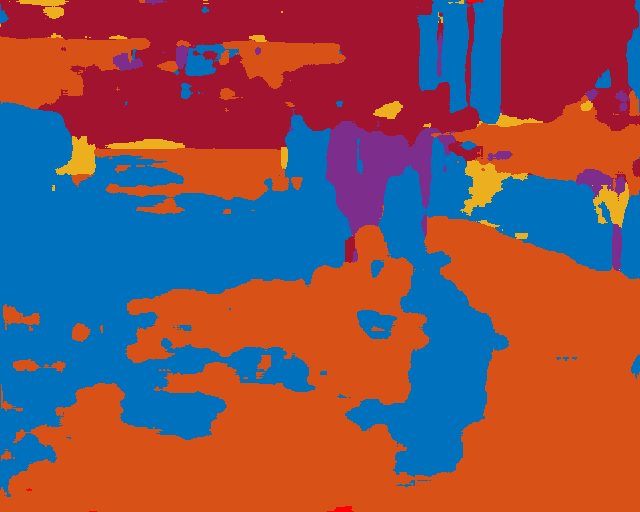

prev=757,i=758
iteration running is 758
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


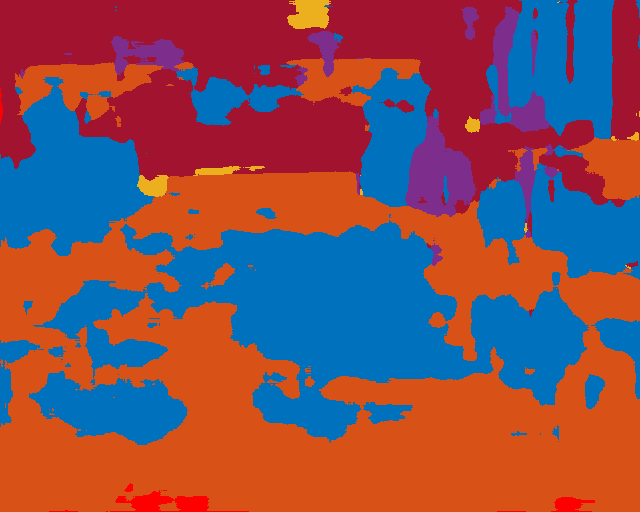

this is the raw image
this is the ground truth mask
this is the colored inferred image


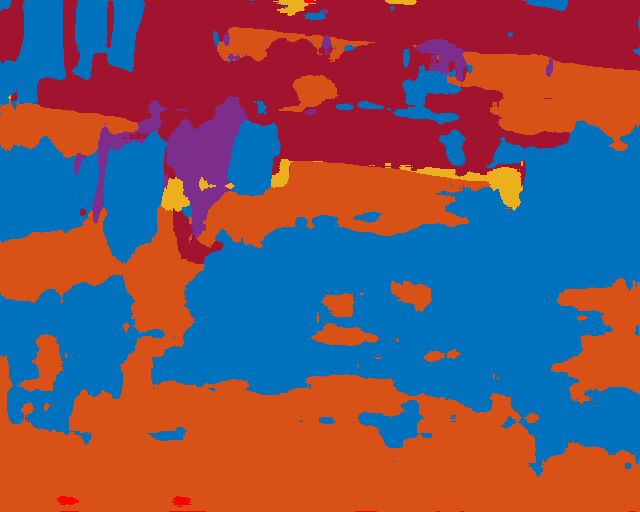

prev=759,i=760
iteration running is 760
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


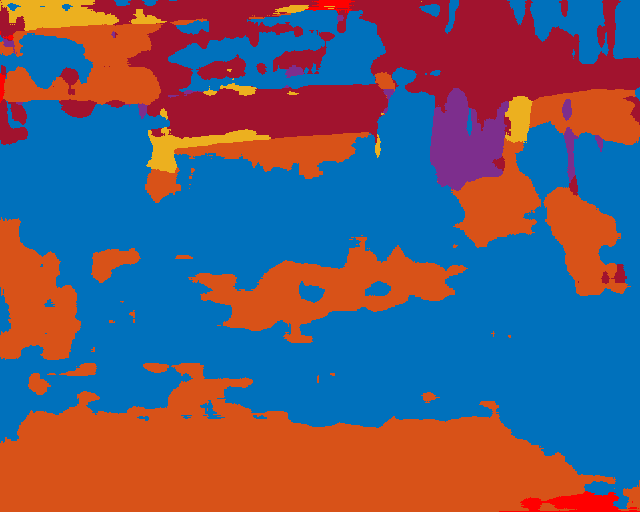

this is the raw image
this is the ground truth mask
this is the colored inferred image


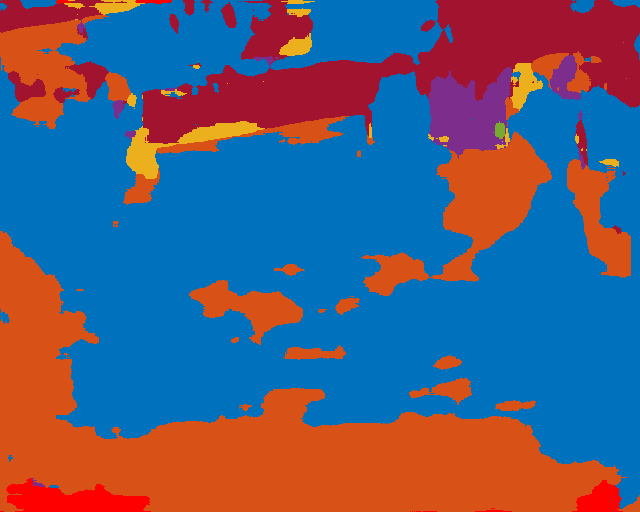

prev=761,i=762
iteration running is 762
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


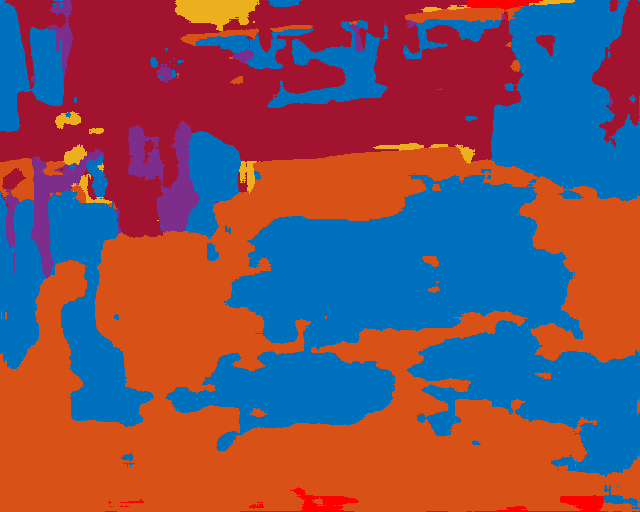

this is the raw image
this is the ground truth mask
this is the colored inferred image


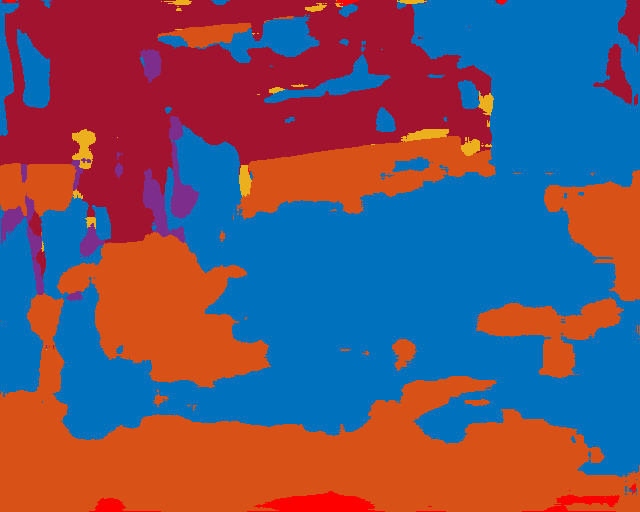

prev=763,i=764
iteration running is 764
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


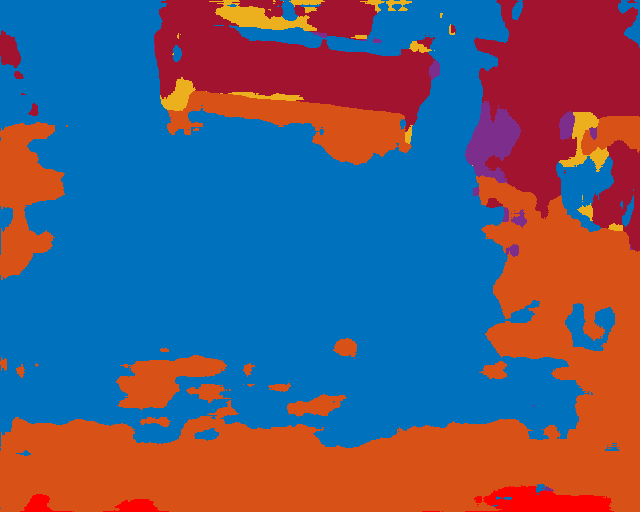

this is the raw image
this is the ground truth mask
this is the colored inferred image


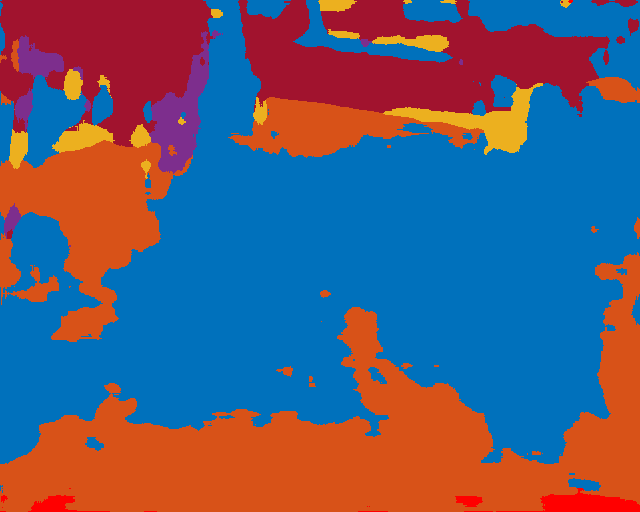

prev=765,i=766
iteration running is 766
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


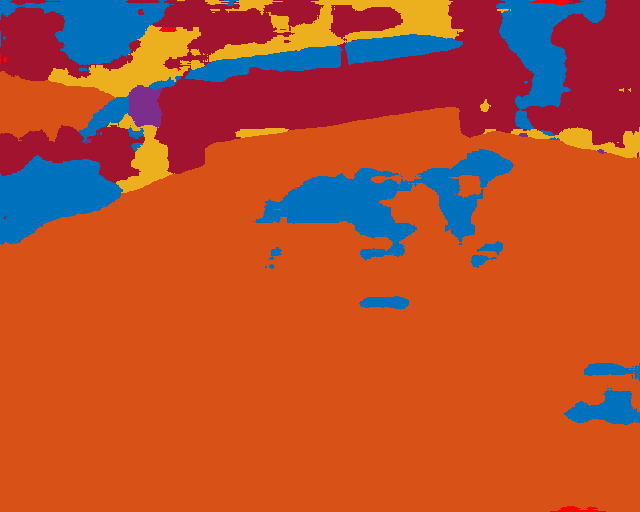

this is the raw image
this is the ground truth mask
this is the colored inferred image


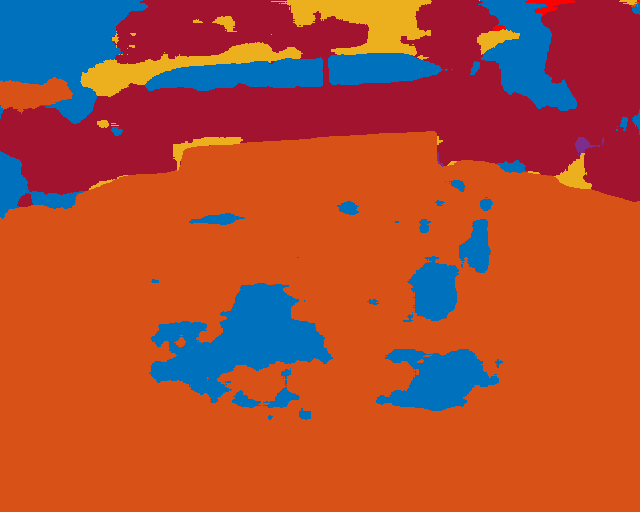

prev=767,i=768
iteration running is 768
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


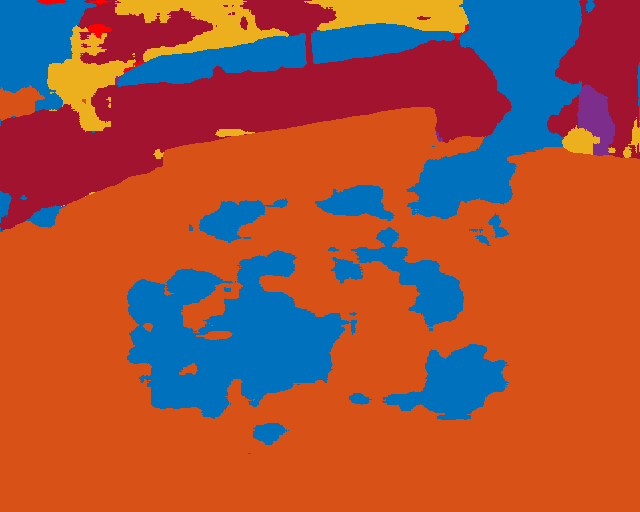

this is the raw image
this is the ground truth mask
this is the colored inferred image


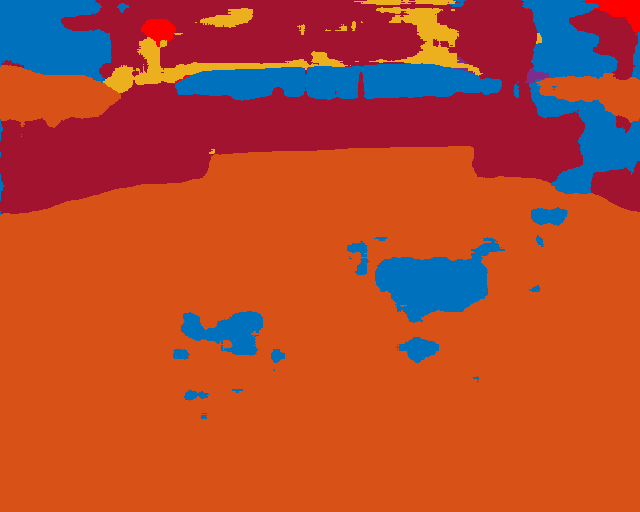

prev=769,i=770
iteration running is 770
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


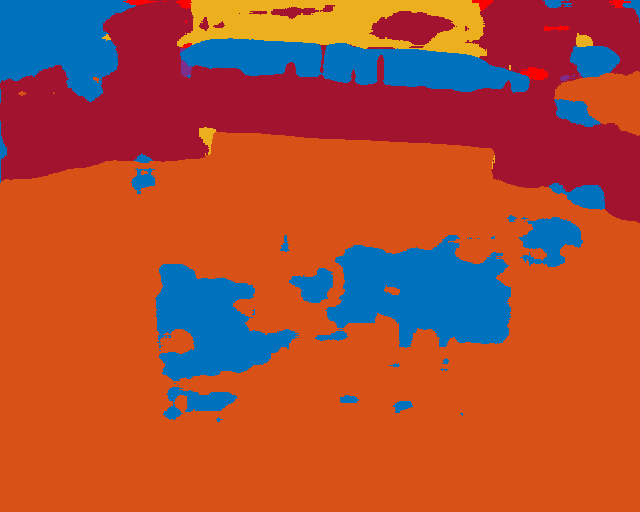

this is the raw image
this is the ground truth mask
this is the colored inferred image


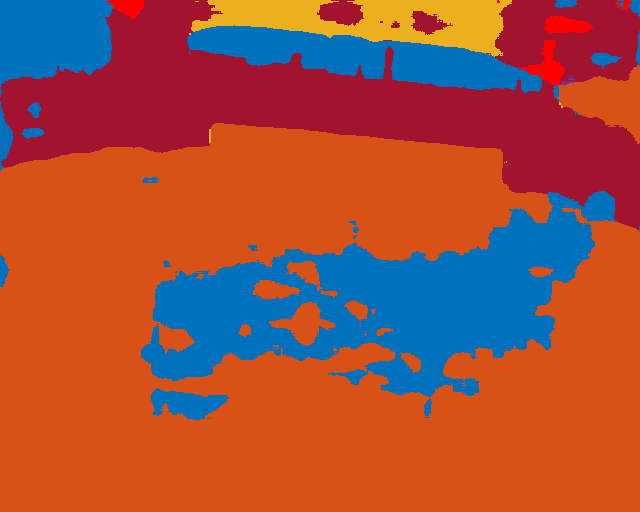

prev=771,i=772
iteration running is 772
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


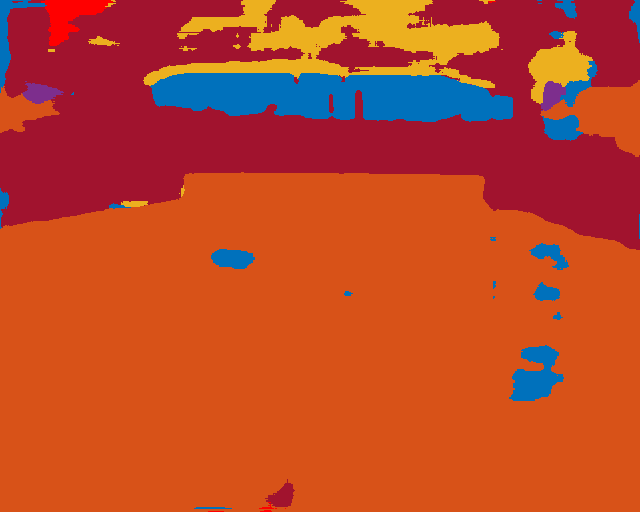

this is the raw image
this is the ground truth mask
this is the colored inferred image


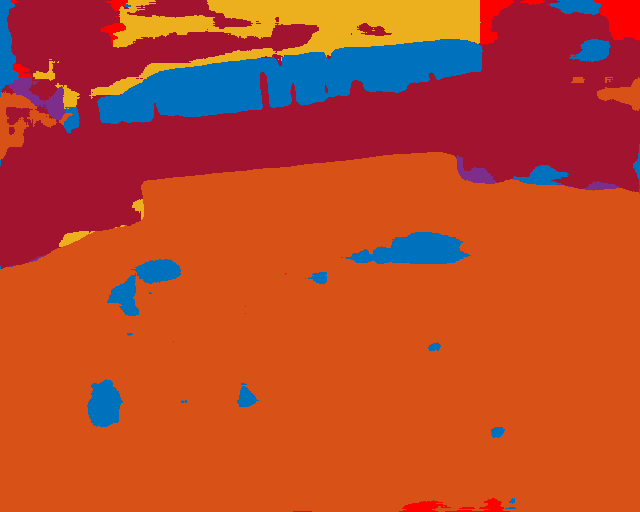

prev=773,i=774
iteration running is 774
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


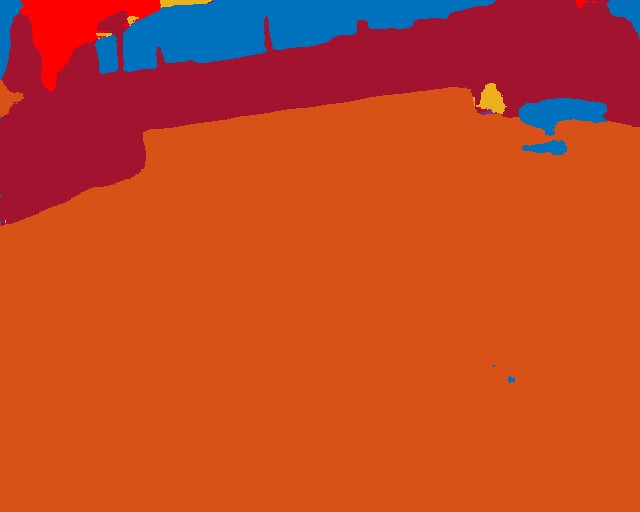

this is the raw image
this is the ground truth mask
this is the colored inferred image


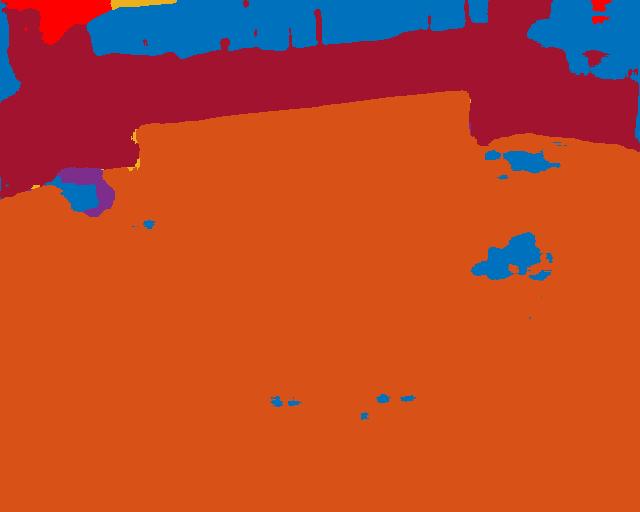

prev=775,i=776
iteration running is 776
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


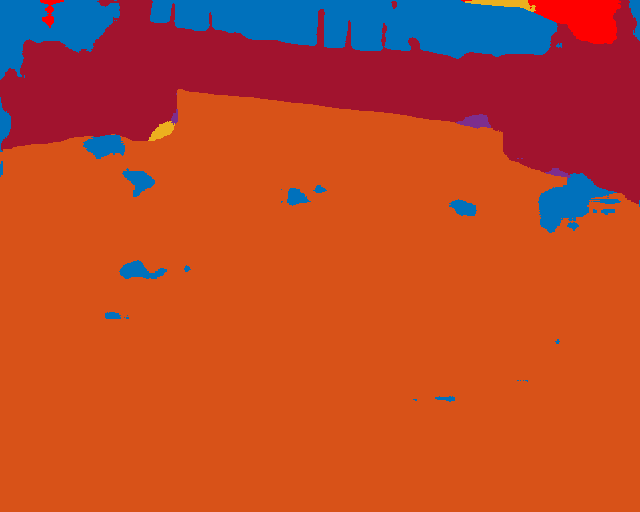

this is the raw image
this is the ground truth mask
this is the colored inferred image


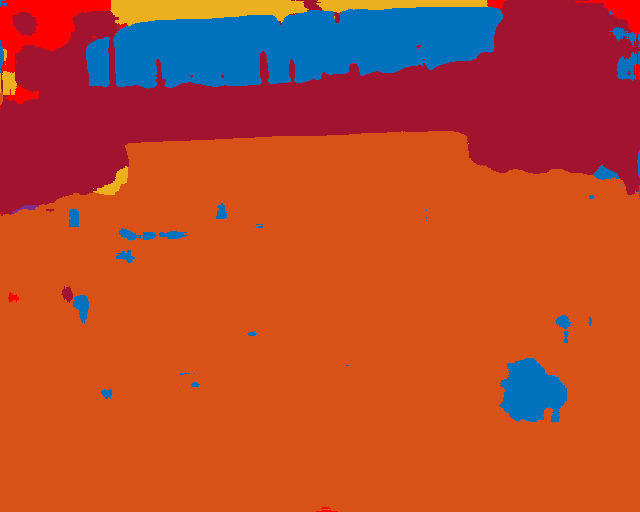

prev=777,i=778
iteration running is 778
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


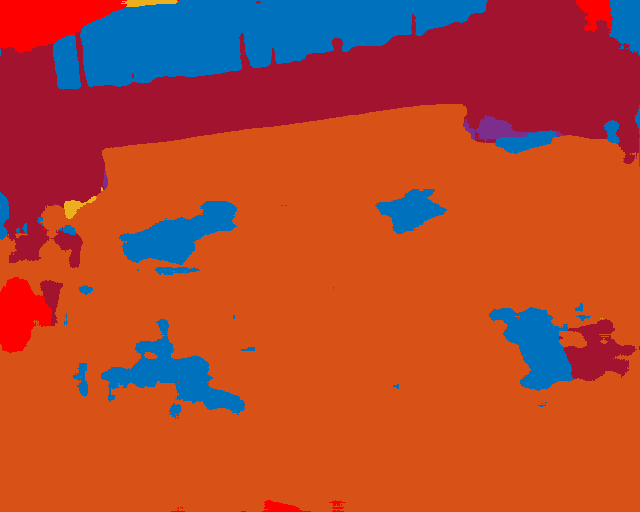

this is the raw image
this is the ground truth mask
this is the colored inferred image


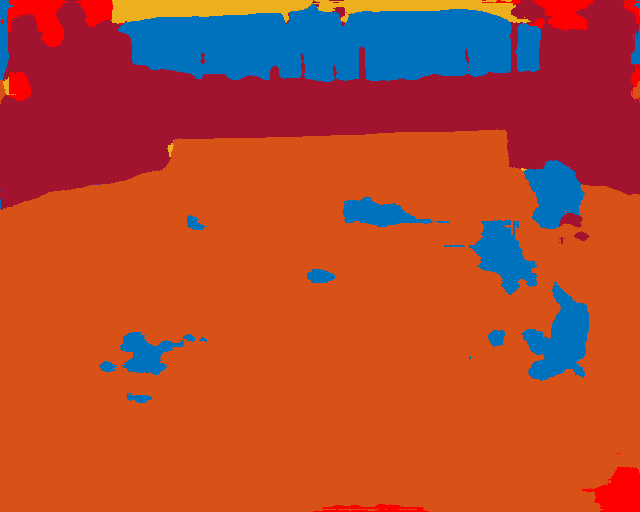

prev=779,i=780
iteration running is 780
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


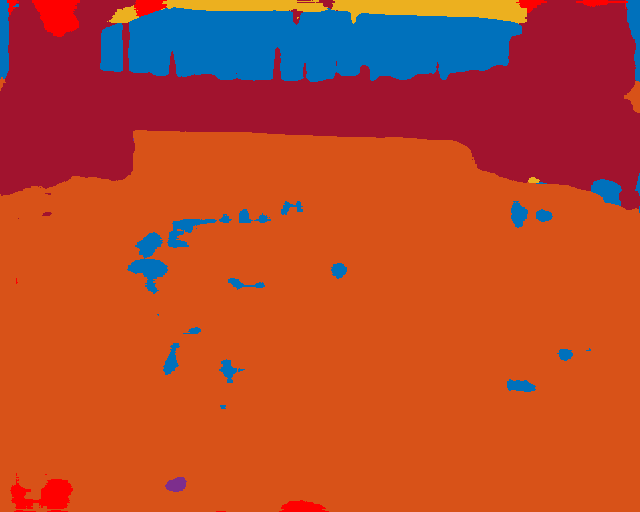

this is the raw image
this is the ground truth mask
this is the colored inferred image


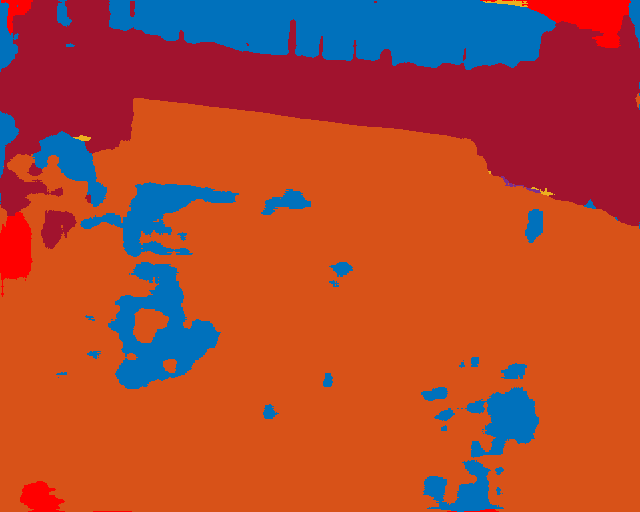

prev=781,i=782
iteration running is 782
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


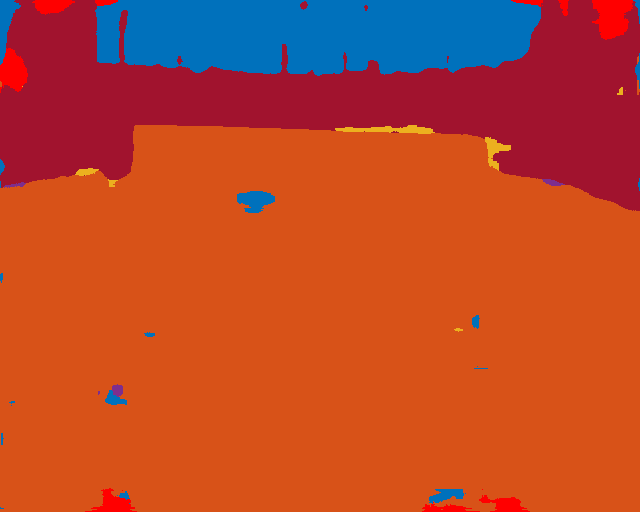

this is the raw image
this is the ground truth mask
this is the colored inferred image


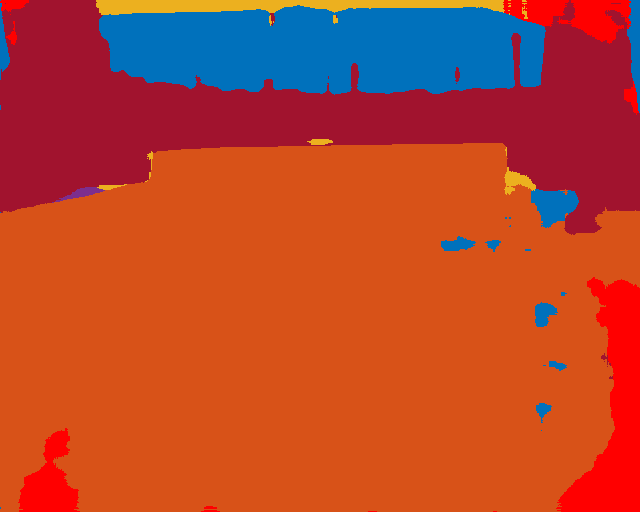

prev=783,i=784
iteration running is 784
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


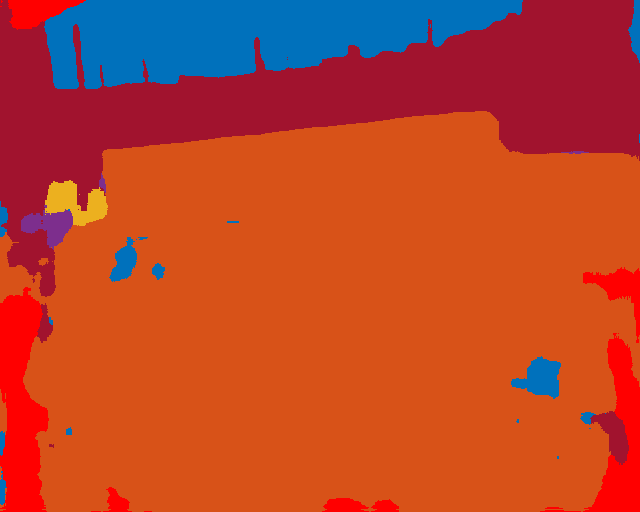

this is the raw image
this is the ground truth mask
this is the colored inferred image


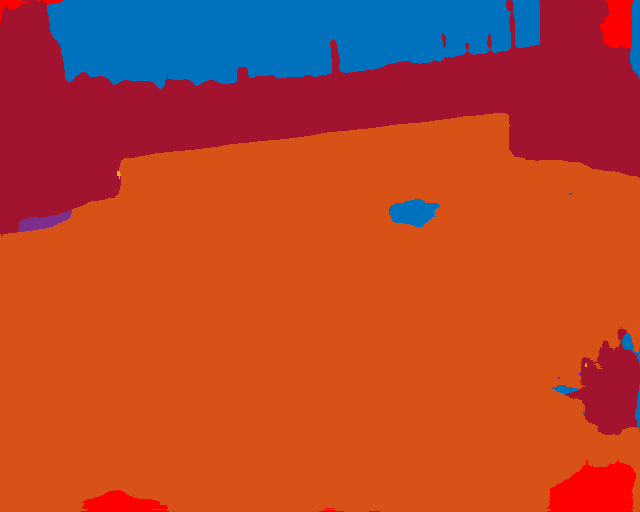

prev=785,i=786
iteration running is 786
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


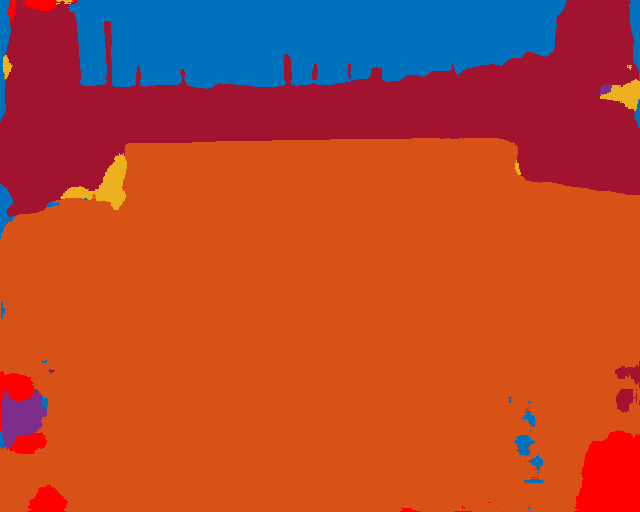

this is the raw image
this is the ground truth mask
this is the colored inferred image


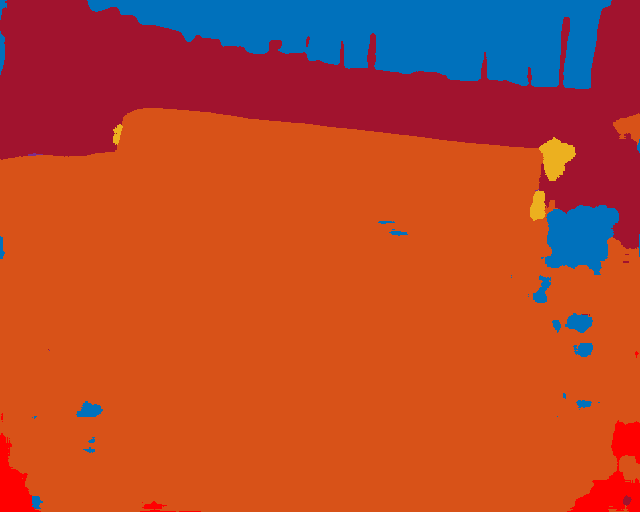

prev=787,i=788
iteration running is 788
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


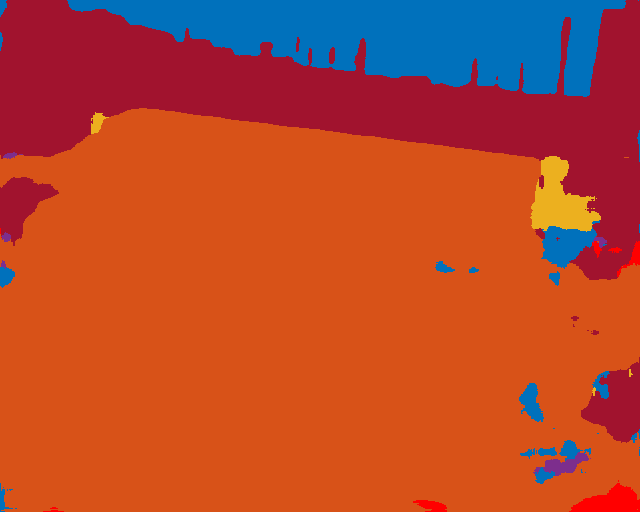

this is the raw image
this is the ground truth mask
this is the colored inferred image


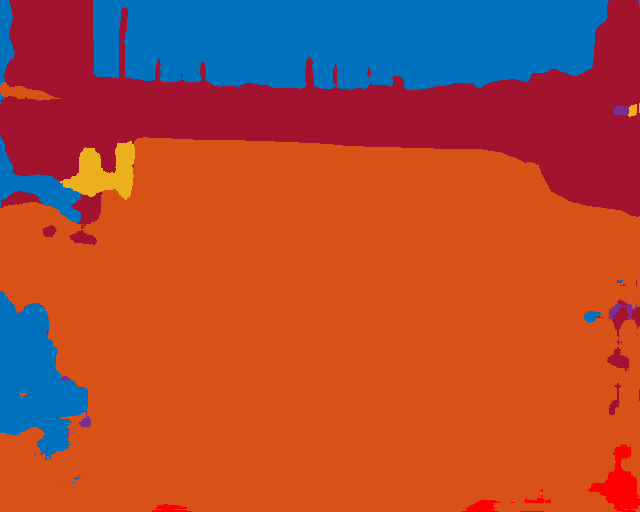

prev=789,i=790
iteration running is 790
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


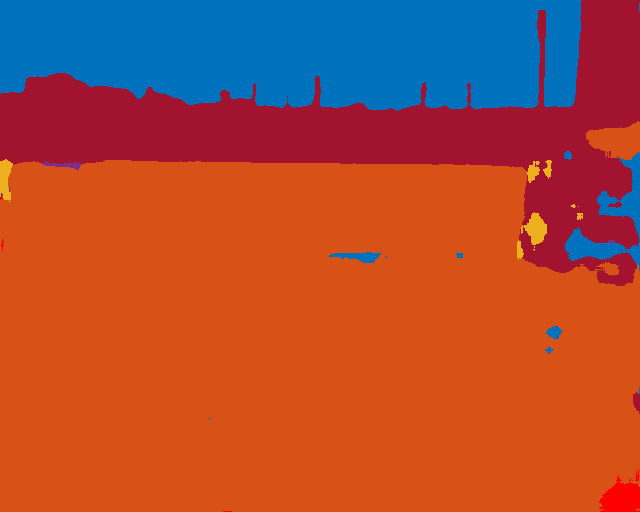

this is the raw image
this is the ground truth mask
this is the colored inferred image


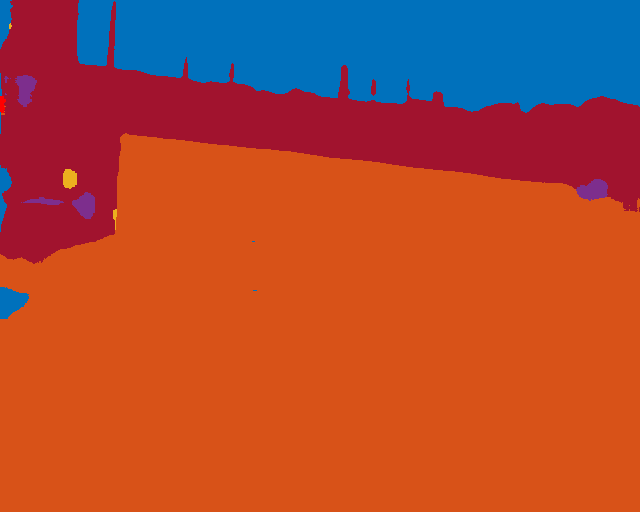

prev=791,i=792
iteration running is 792
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


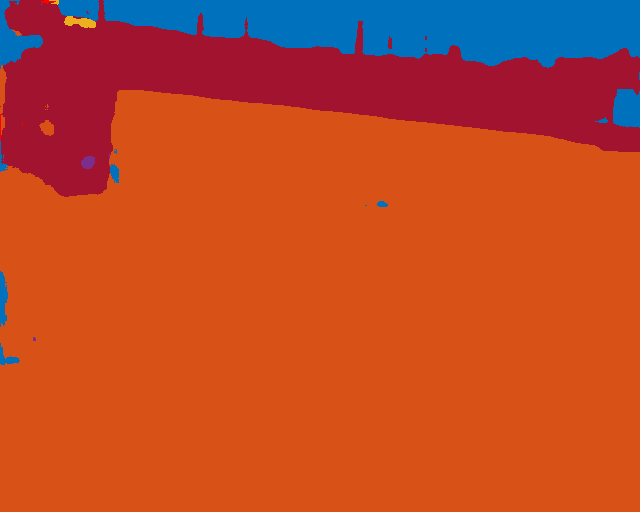

this is the raw image
this is the ground truth mask
this is the colored inferred image


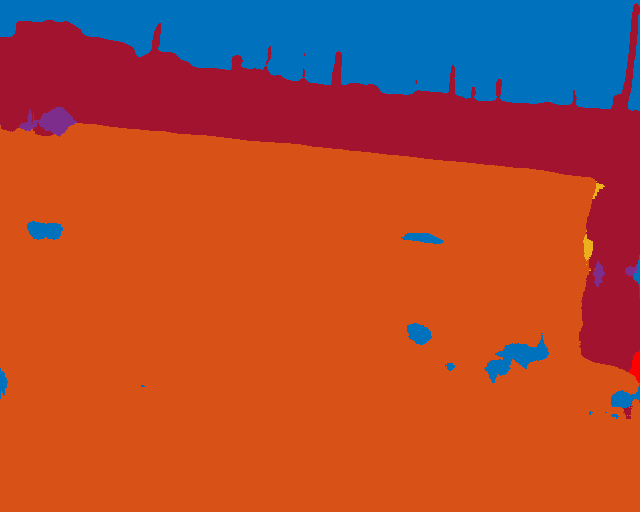

prev=793,i=794
iteration running is 794
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


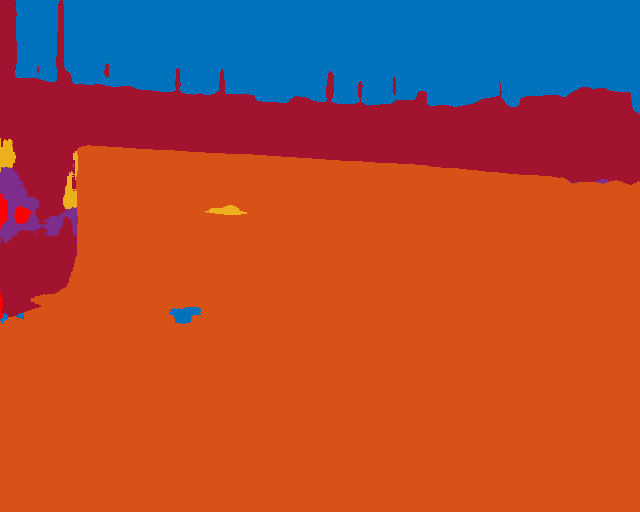

this is the raw image
this is the ground truth mask
this is the colored inferred image


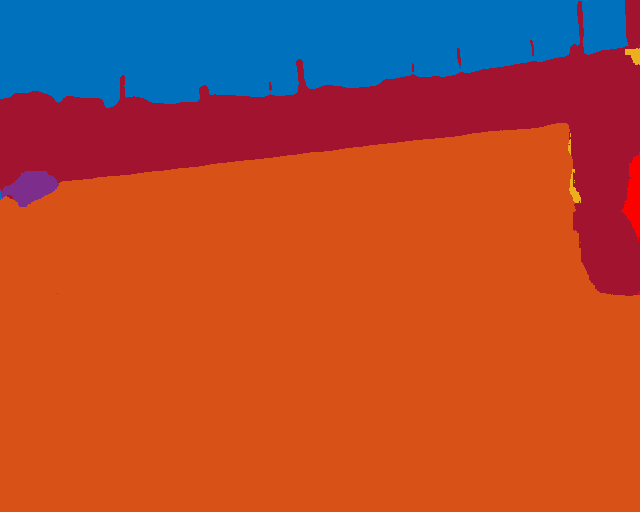

prev=795,i=796
iteration running is 796
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


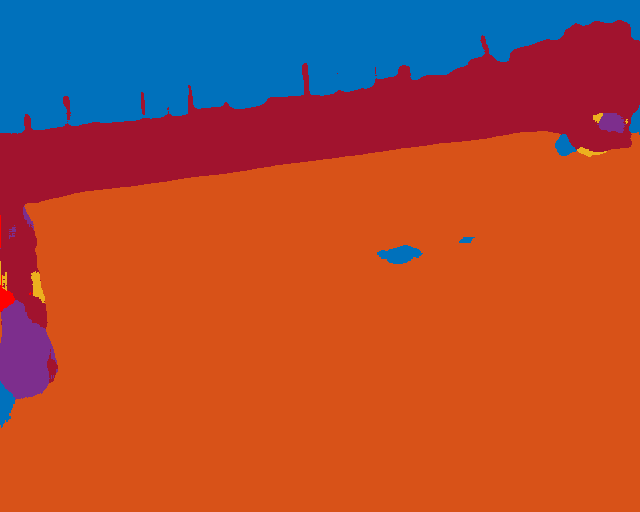

this is the raw image
this is the ground truth mask
this is the colored inferred image


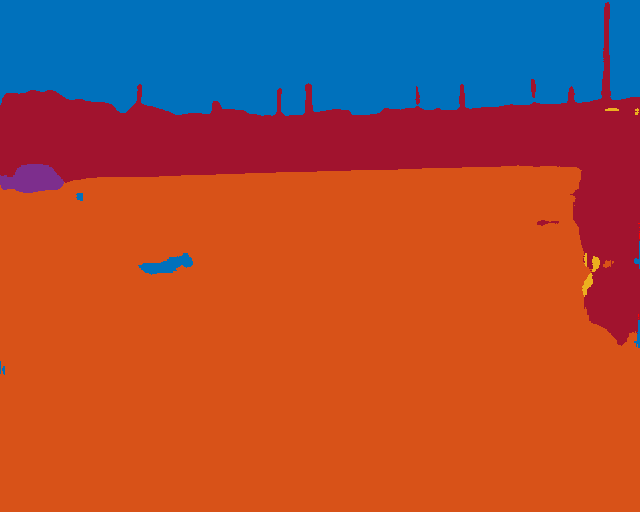

prev=797,i=798
iteration running is 798
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


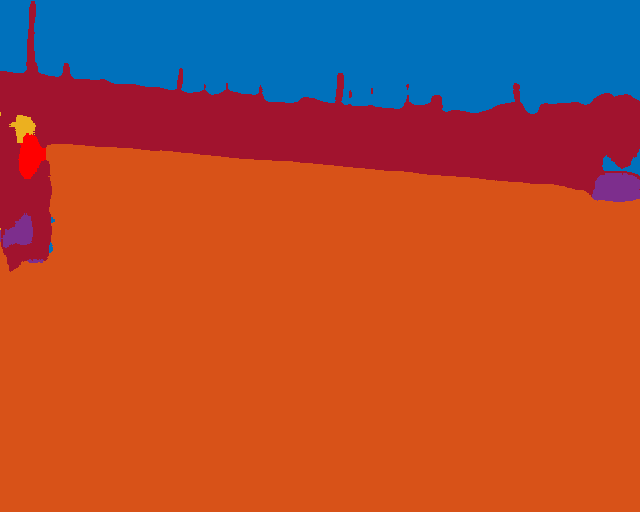

this is the raw image
this is the ground truth mask
this is the colored inferred image


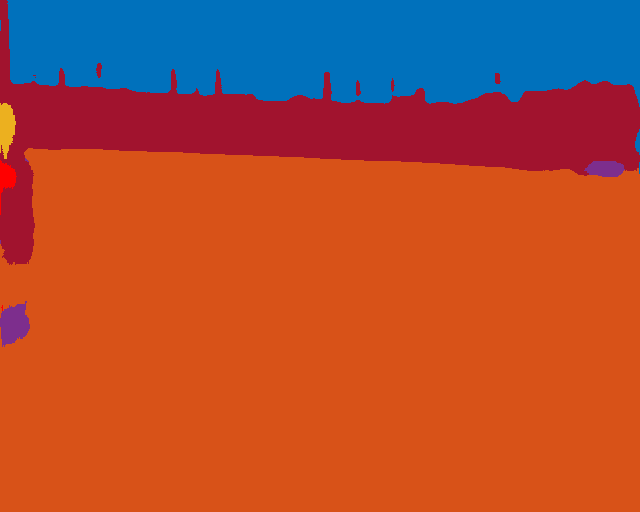

prev=799,i=800
iteration running is 800
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


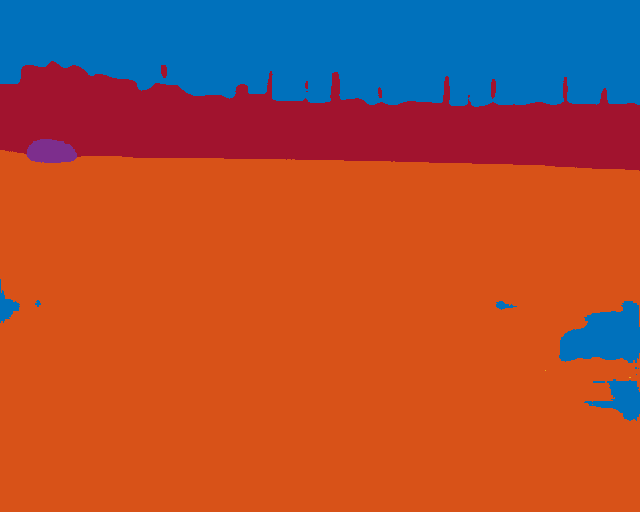

this is the raw image
this is the ground truth mask
this is the colored inferred image


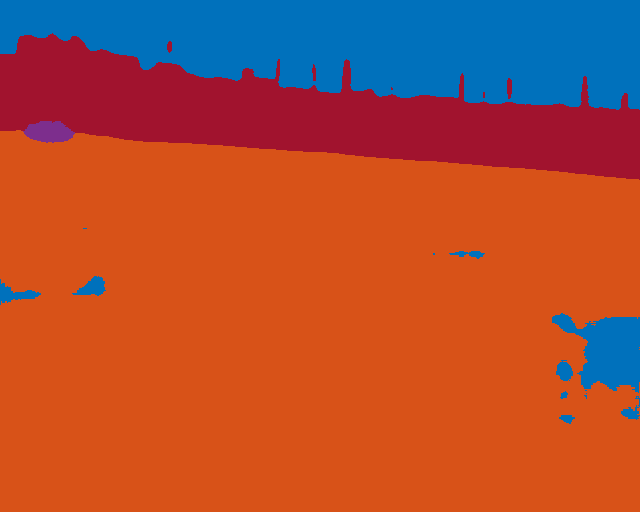

prev=801,i=802
iteration running is 802
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


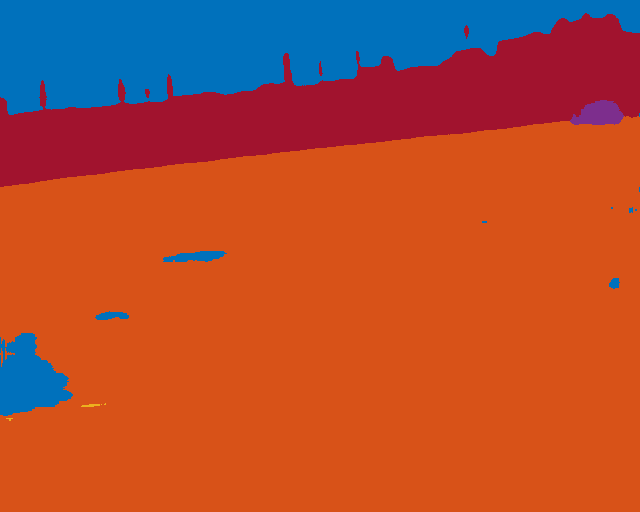

this is the raw image
this is the ground truth mask
this is the colored inferred image


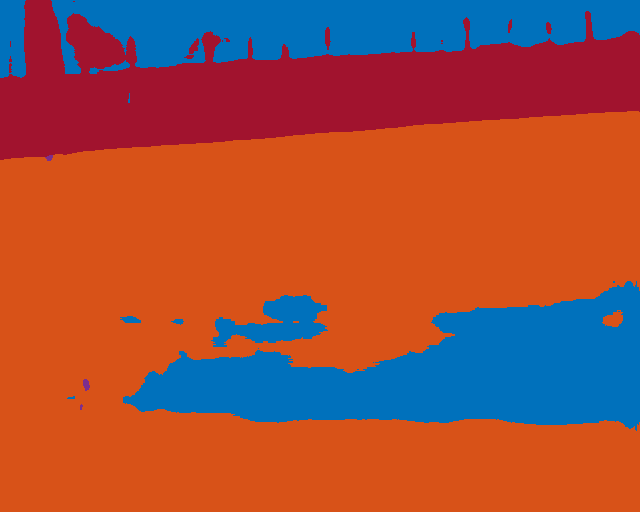

prev=803,i=804
iteration running is 804
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


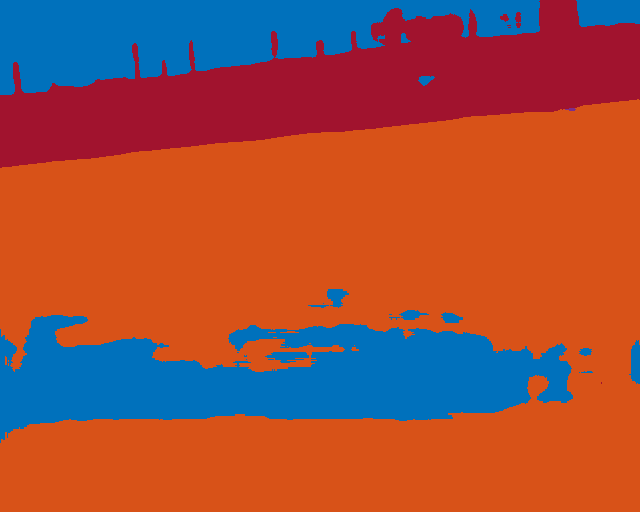

this is the raw image
this is the ground truth mask
this is the colored inferred image


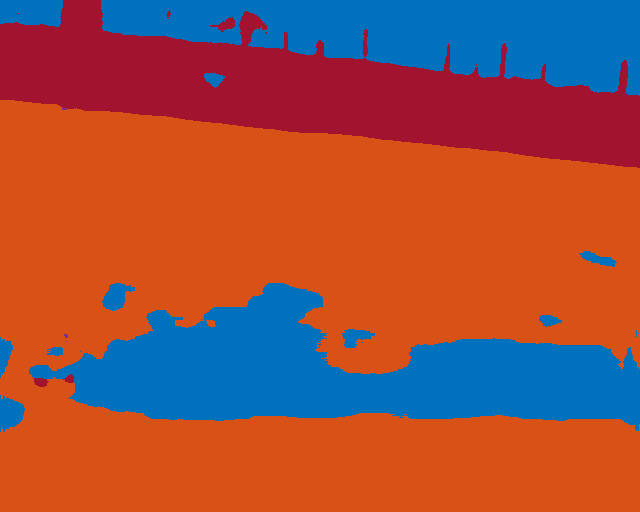

prev=805,i=806
iteration running is 806
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


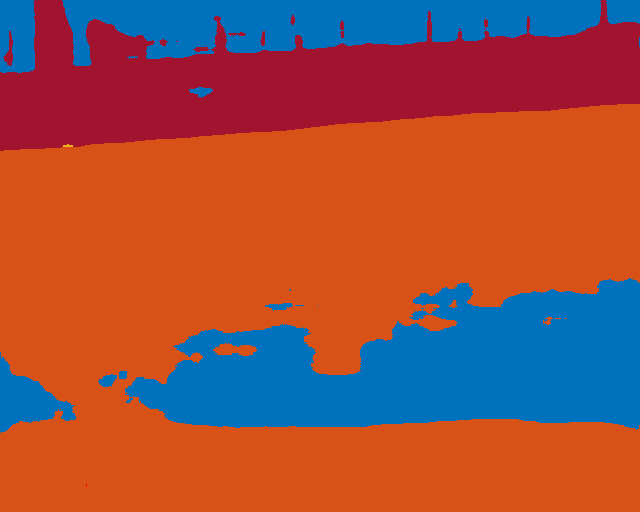

this is the raw image
this is the ground truth mask
this is the colored inferred image


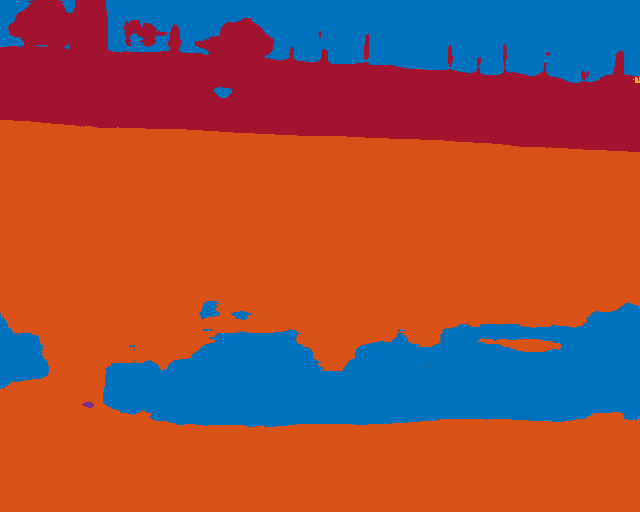

prev=807,i=808
iteration running is 808
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


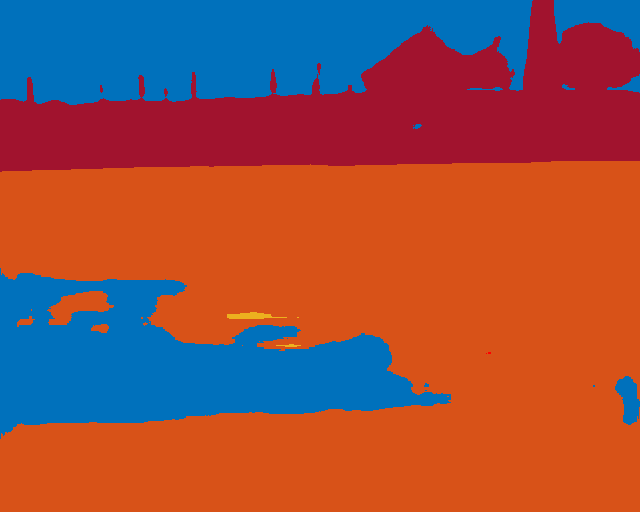

this is the raw image
this is the ground truth mask
this is the colored inferred image


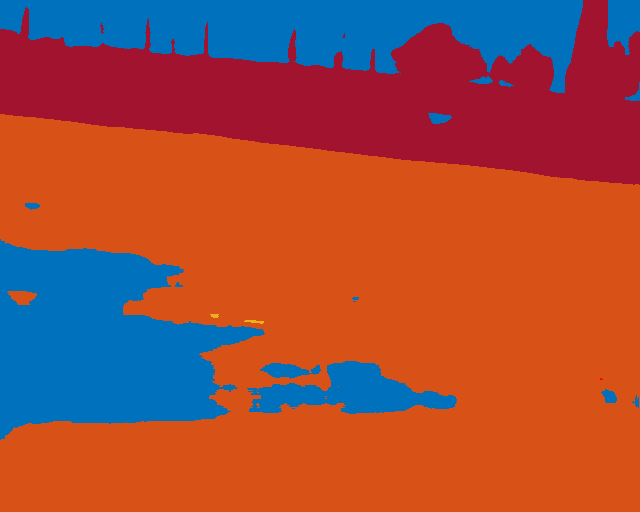

prev=809,i=810
iteration running is 810
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


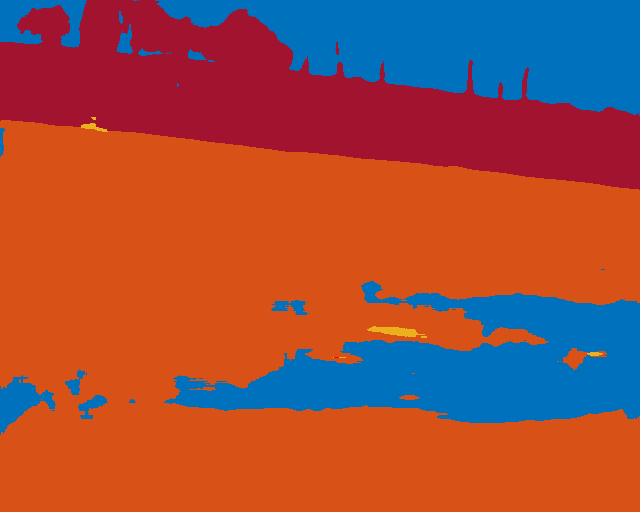

this is the raw image
this is the ground truth mask
this is the colored inferred image


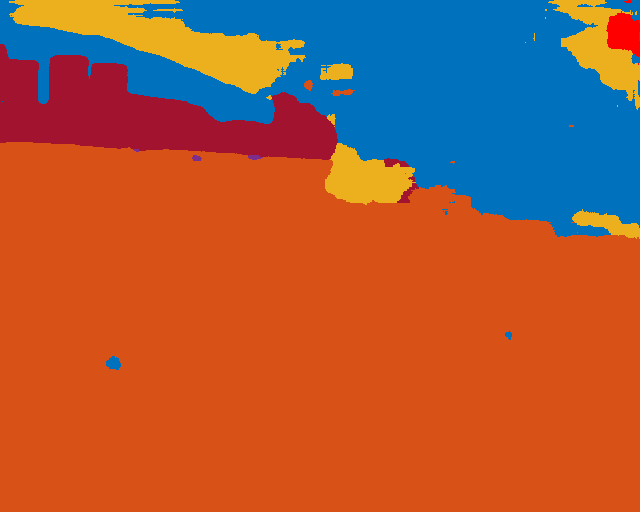

prev=811,i=812
iteration running is 812
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


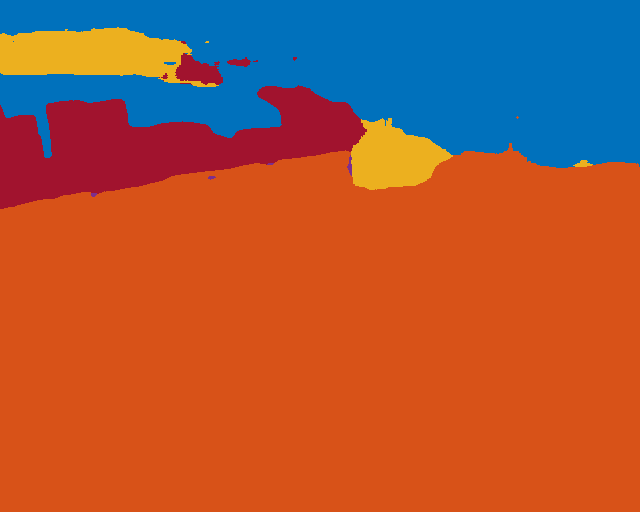

this is the raw image
this is the ground truth mask
this is the colored inferred image


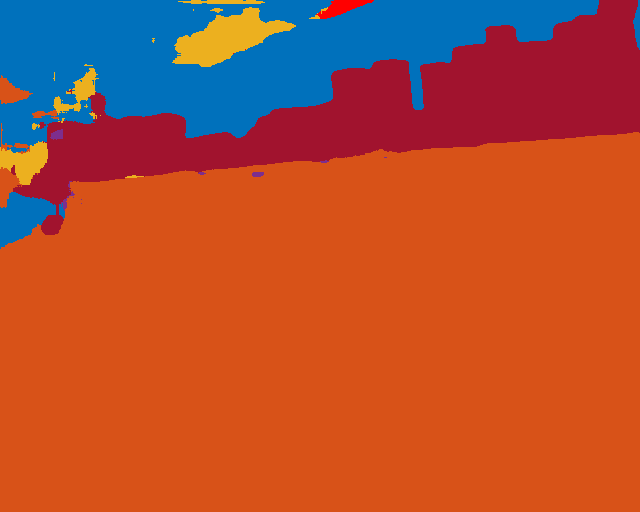

prev=813,i=814
iteration running is 814
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


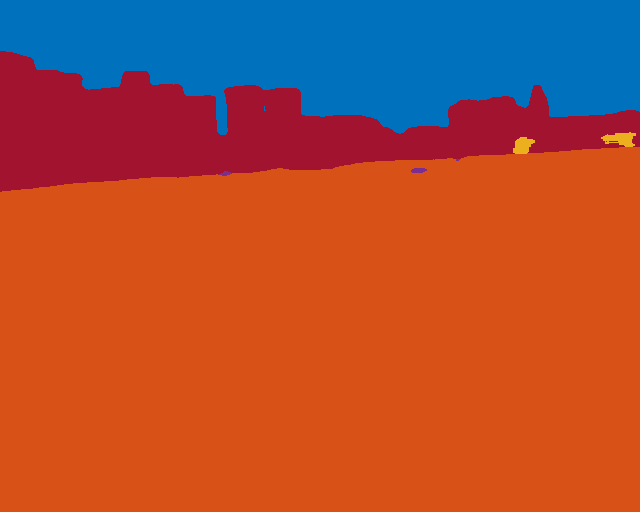

this is the raw image
this is the ground truth mask
this is the colored inferred image


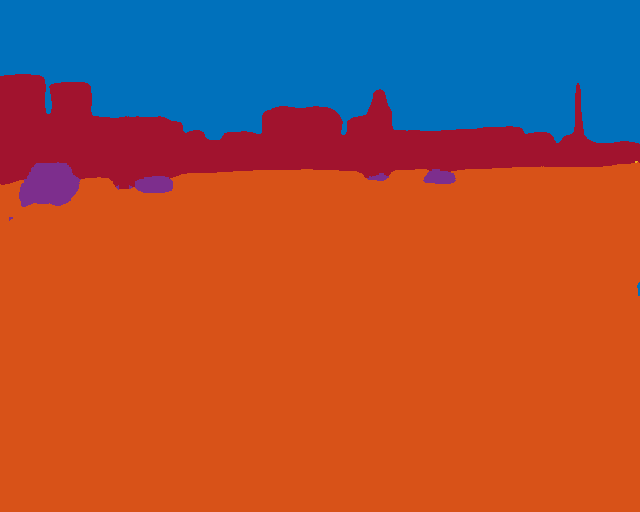

prev=815,i=816
iteration running is 816
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


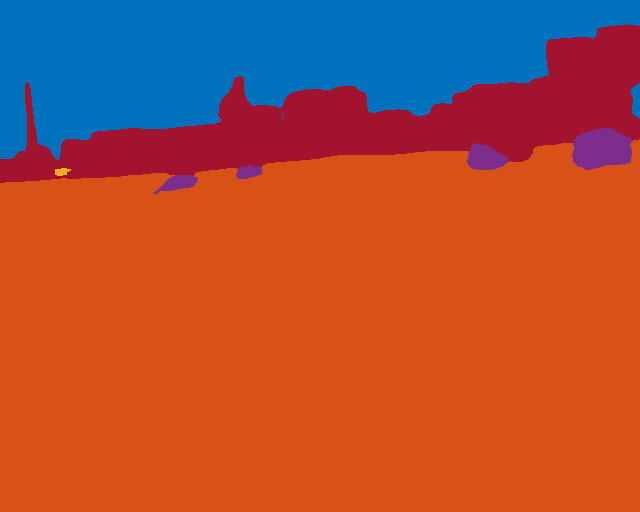

this is the raw image
this is the ground truth mask
this is the colored inferred image


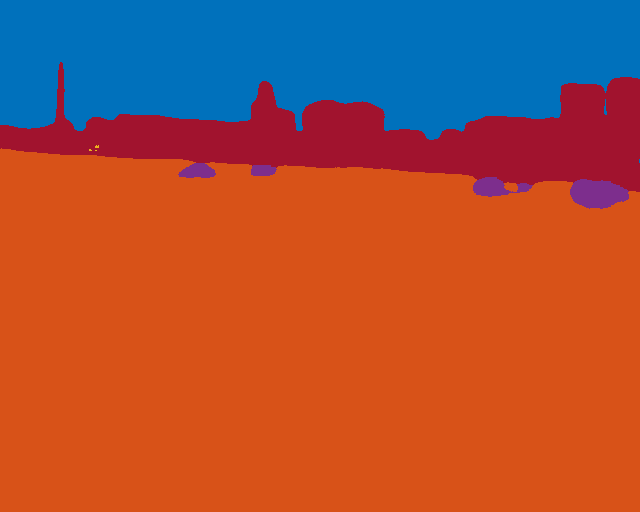

prev=817,i=818
iteration running is 818
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


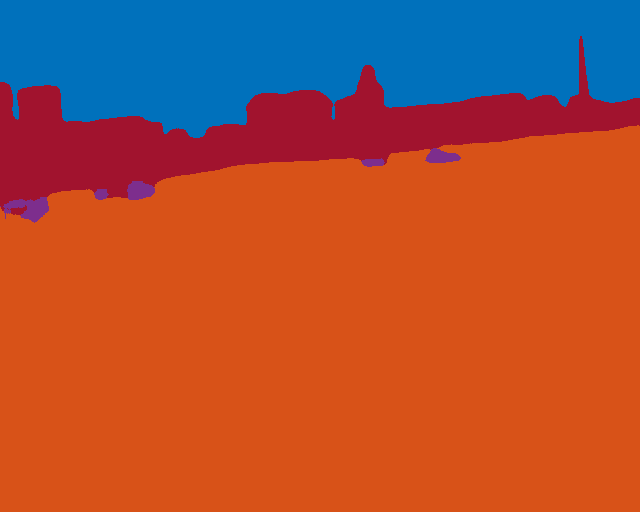

this is the raw image
this is the ground truth mask
this is the colored inferred image


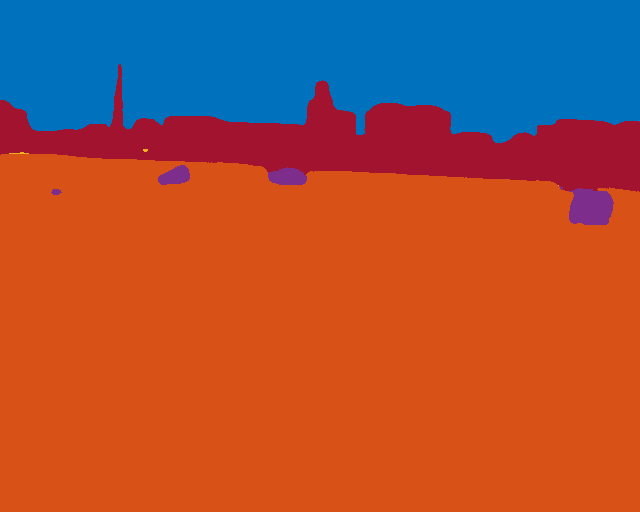

prev=819,i=820
iteration running is 820
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


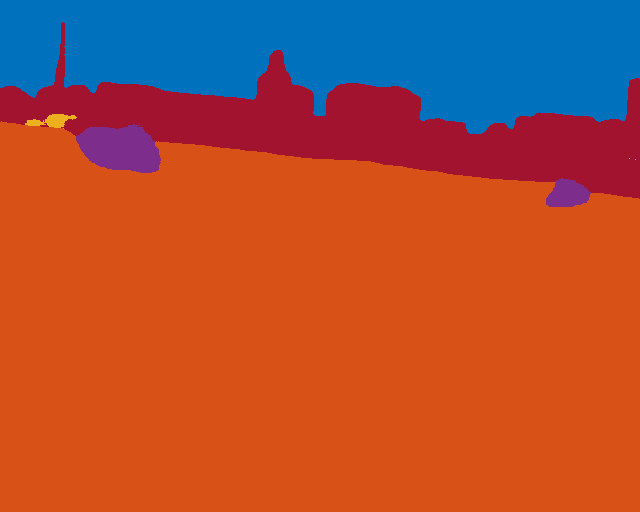

this is the raw image
this is the ground truth mask
this is the colored inferred image


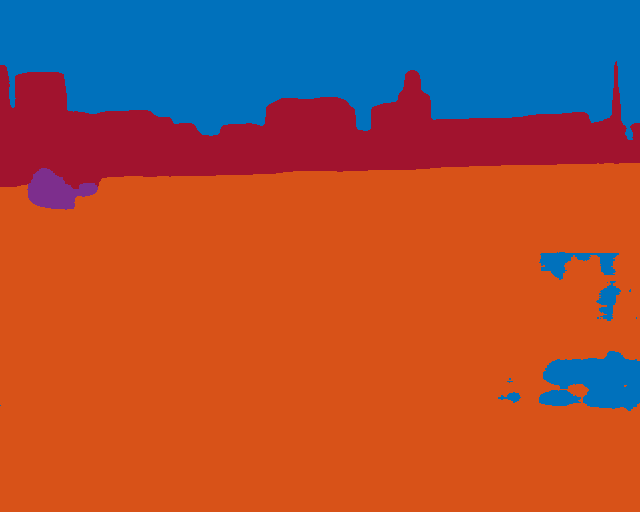

prev=821,i=822
iteration running is 822
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


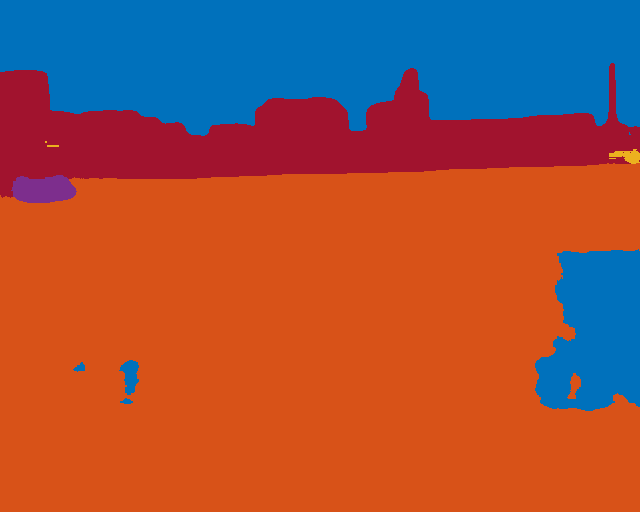

this is the raw image
this is the ground truth mask
this is the colored inferred image


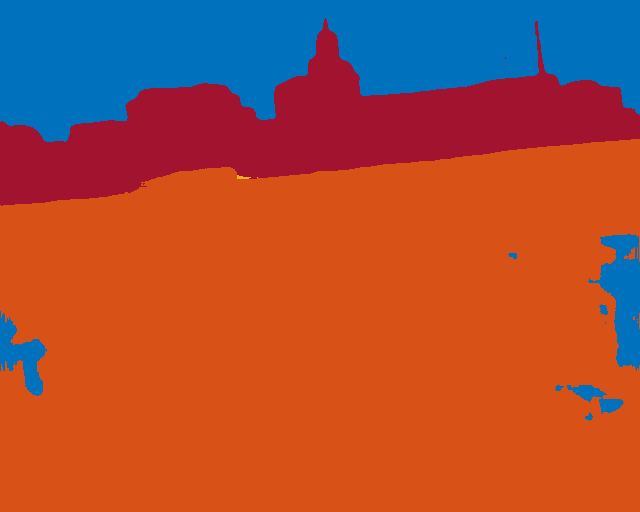

prev=823,i=824
iteration running is 824
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


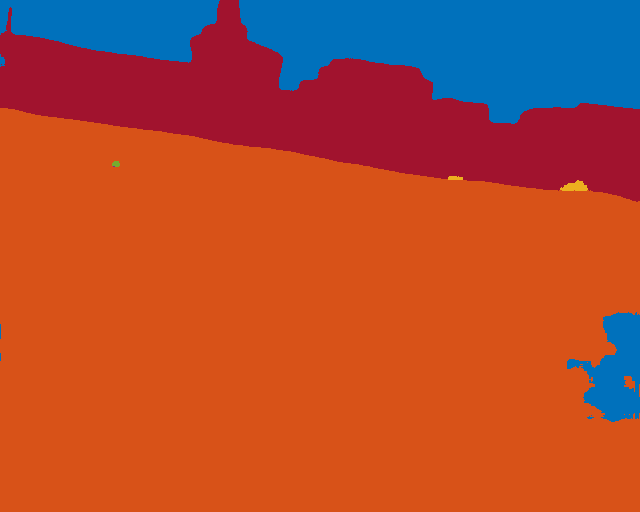

this is the raw image
this is the ground truth mask
this is the colored inferred image


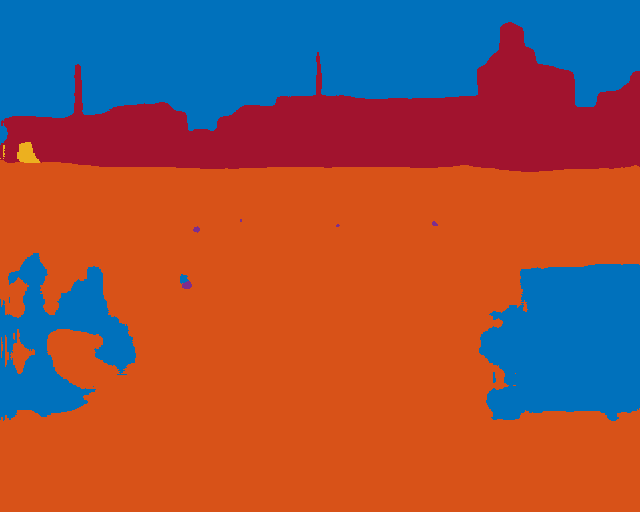

prev=825,i=826
iteration running is 826
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


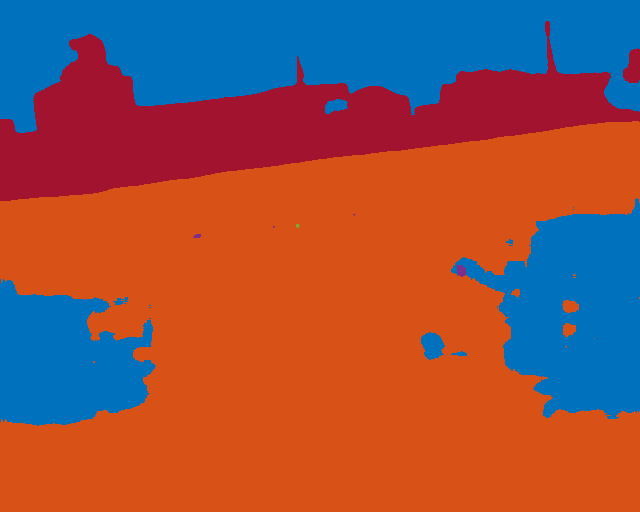

this is the raw image
this is the ground truth mask
this is the colored inferred image


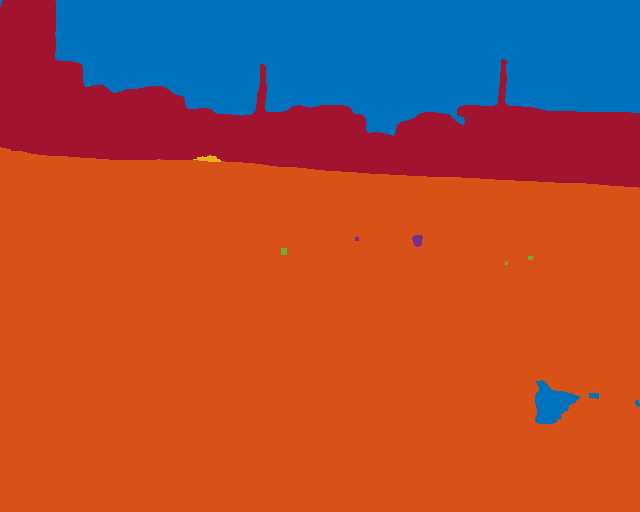

prev=827,i=828
iteration running is 828
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


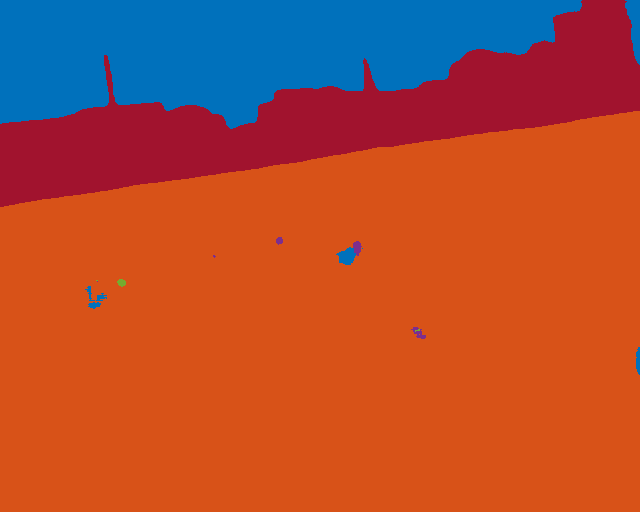

this is the raw image
this is the ground truth mask
this is the colored inferred image


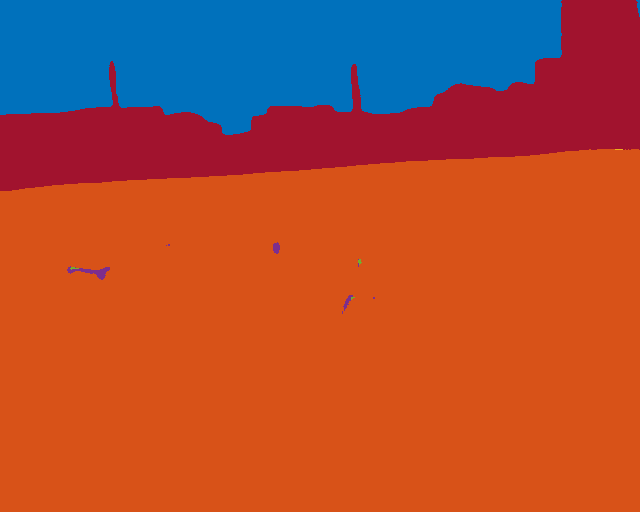

prev=829,i=830
iteration running is 830
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


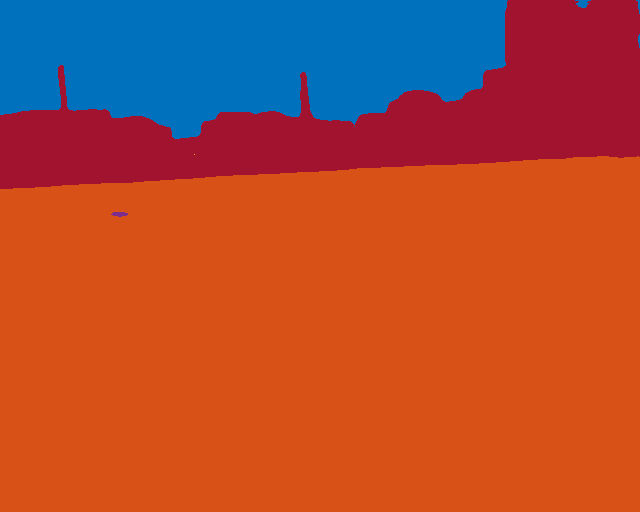

this is the raw image
this is the ground truth mask
this is the colored inferred image


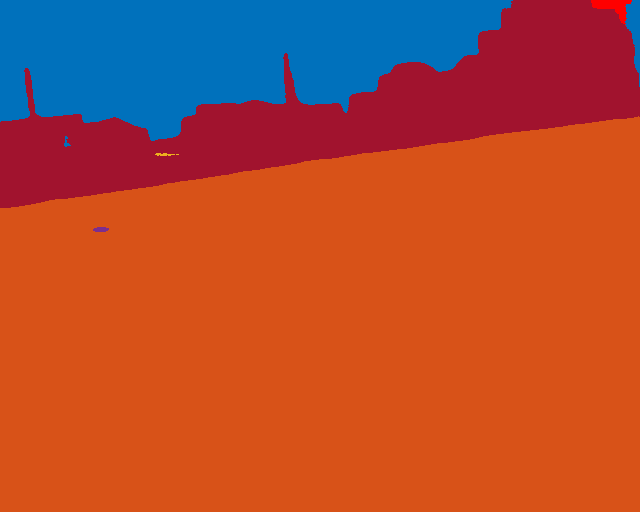

prev=831,i=832
iteration running is 832
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


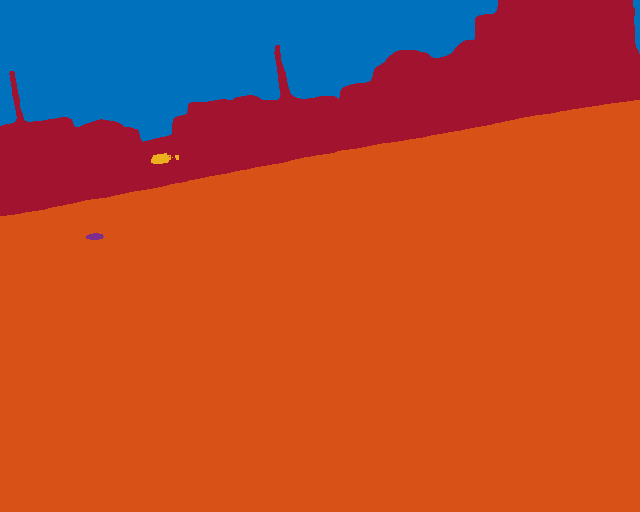

this is the raw image
this is the ground truth mask
this is the colored inferred image


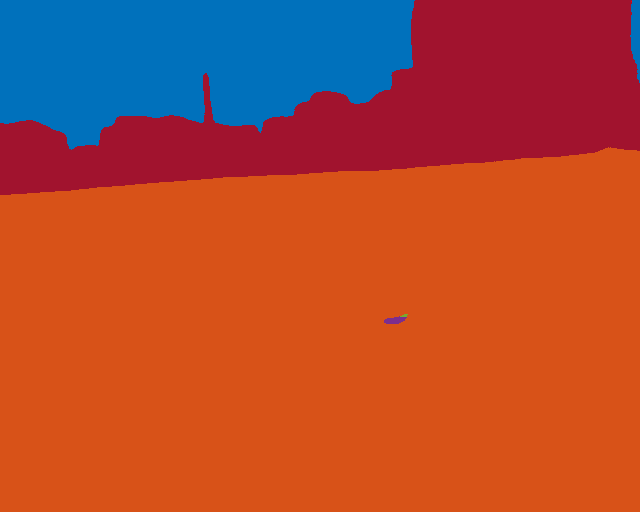

prev=833,i=834
iteration running is 834
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


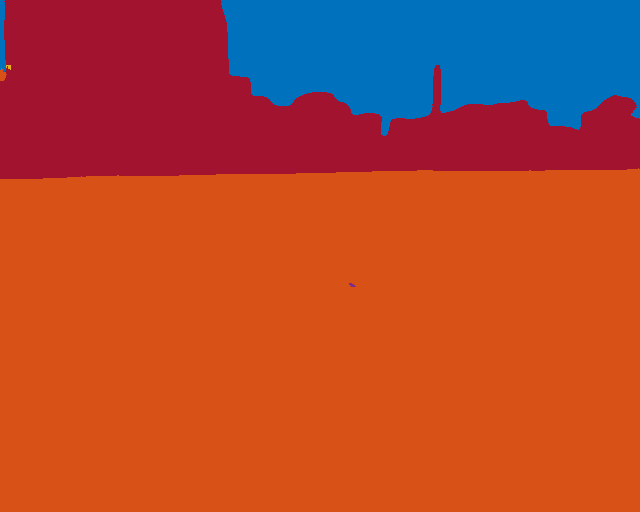

this is the raw image
this is the ground truth mask
this is the colored inferred image


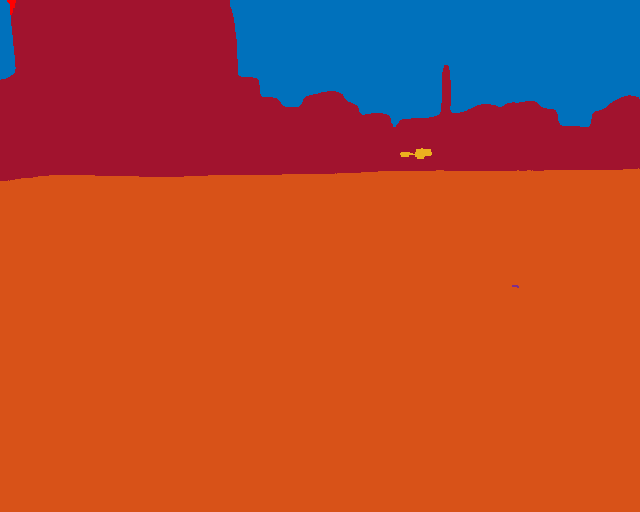

prev=835,i=836
iteration running is 836
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


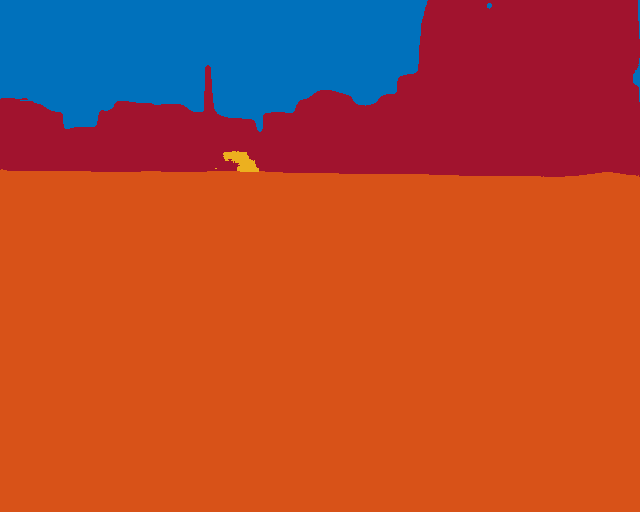

this is the raw image
this is the ground truth mask
this is the colored inferred image


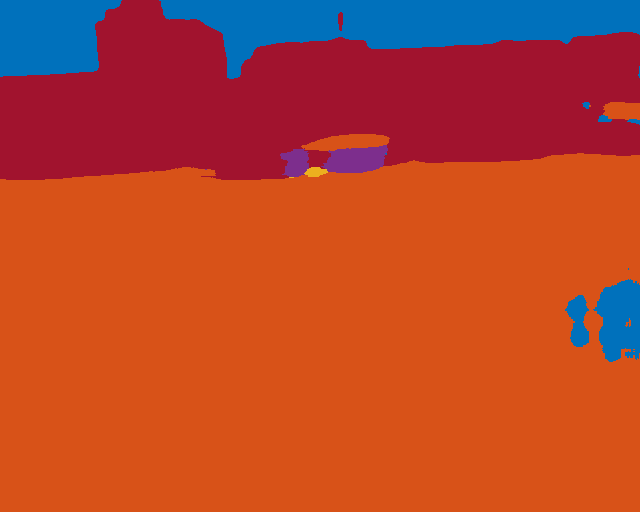

prev=837,i=838
iteration running is 838
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


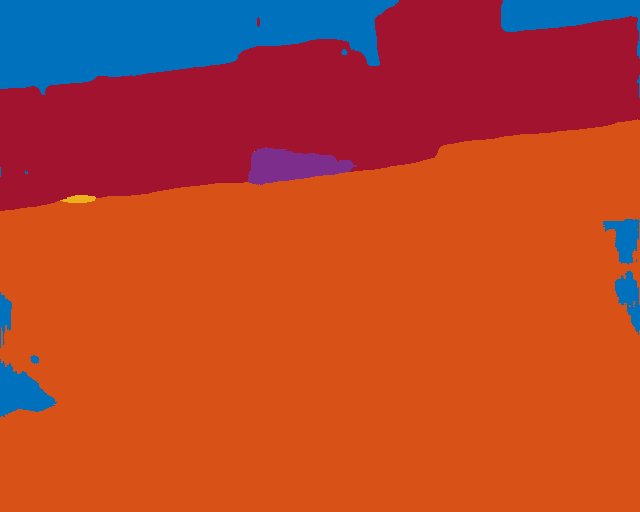

this is the raw image
this is the ground truth mask
this is the colored inferred image


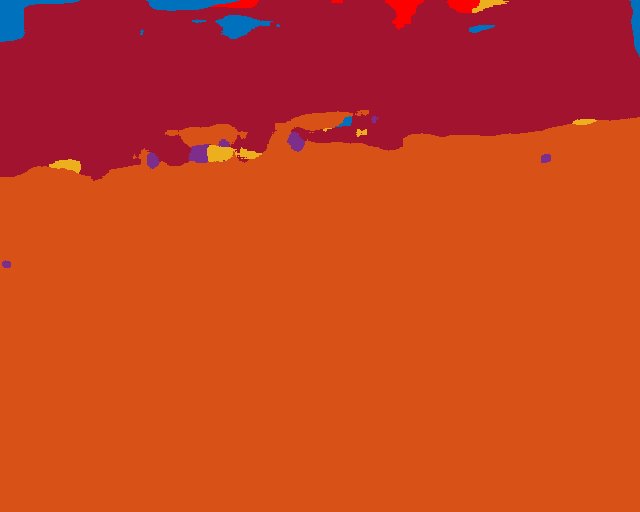

prev=839,i=840
iteration running is 840
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


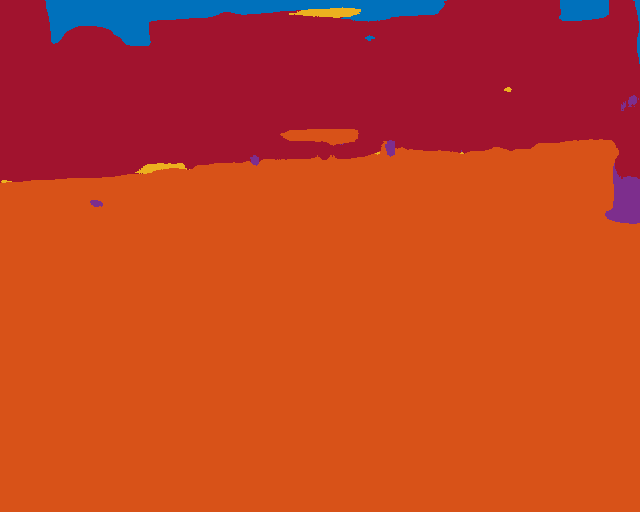

this is the raw image
this is the ground truth mask
this is the colored inferred image


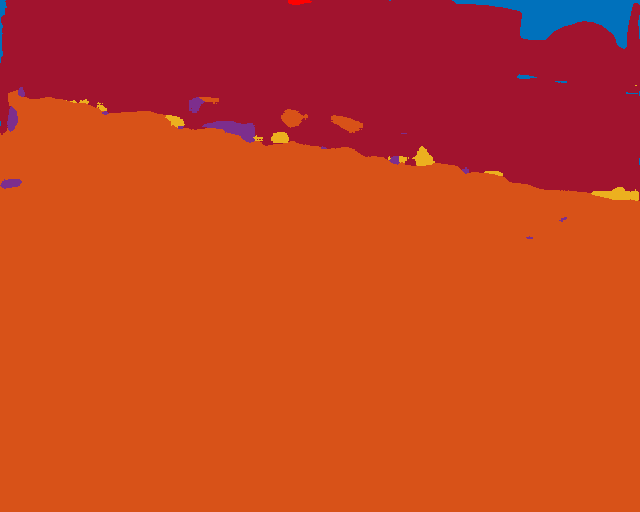

prev=841,i=842
iteration running is 842
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


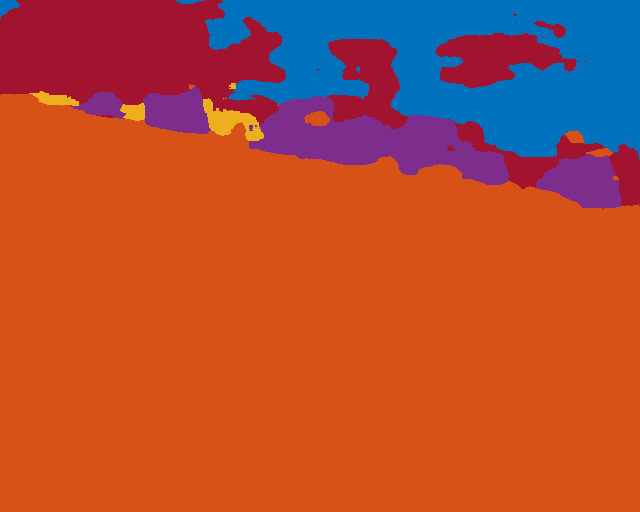

this is the raw image
this is the ground truth mask
this is the colored inferred image


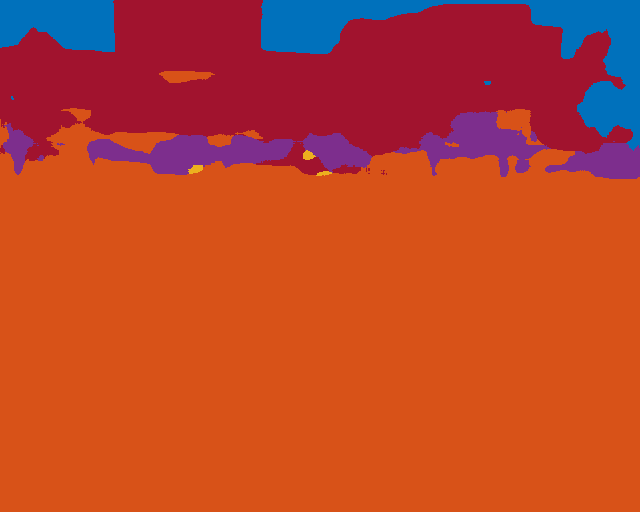

prev=843,i=844
iteration running is 844
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


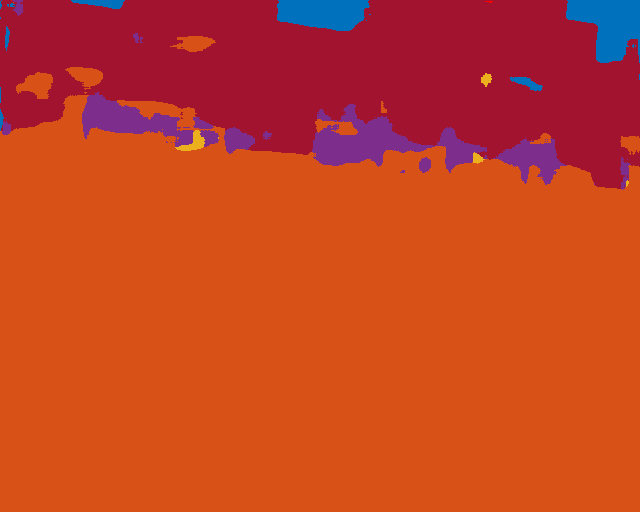

this is the raw image
this is the ground truth mask
this is the colored inferred image


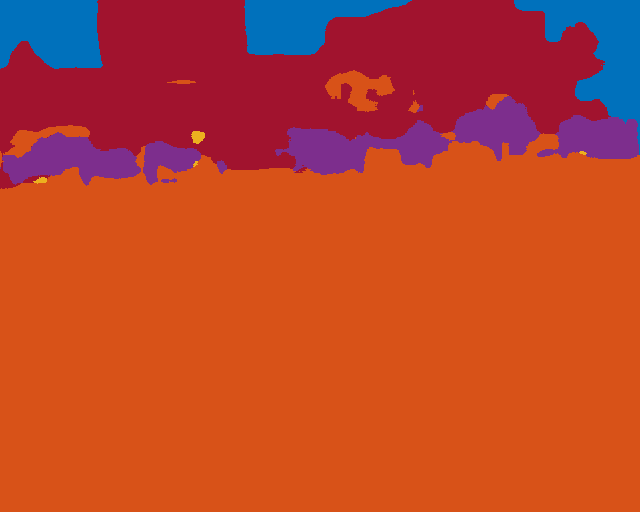

prev=845,i=846
iteration running is 846
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


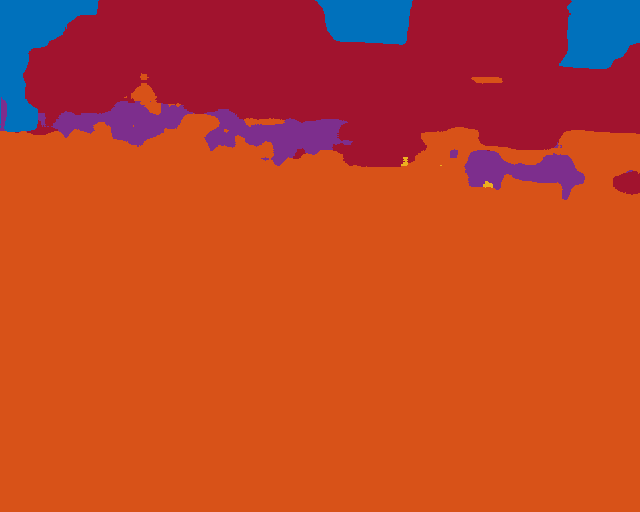

this is the raw image
this is the ground truth mask
this is the colored inferred image


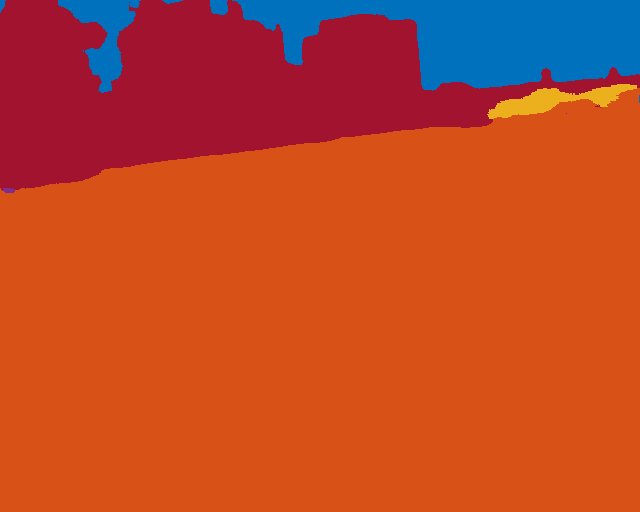

prev=847,i=848
iteration running is 848
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


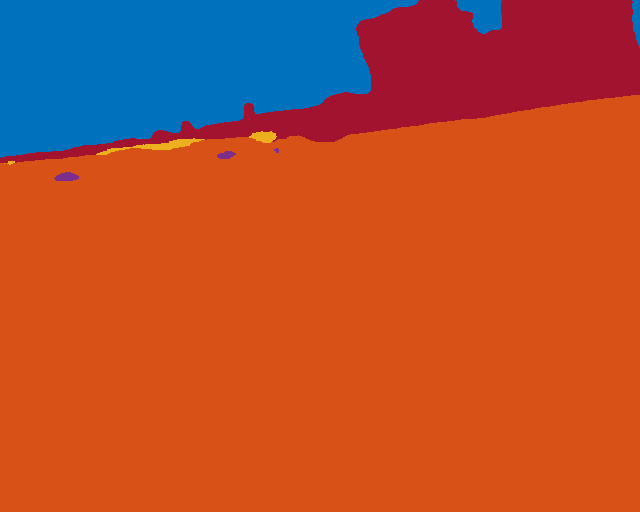

this is the raw image
this is the ground truth mask
this is the colored inferred image


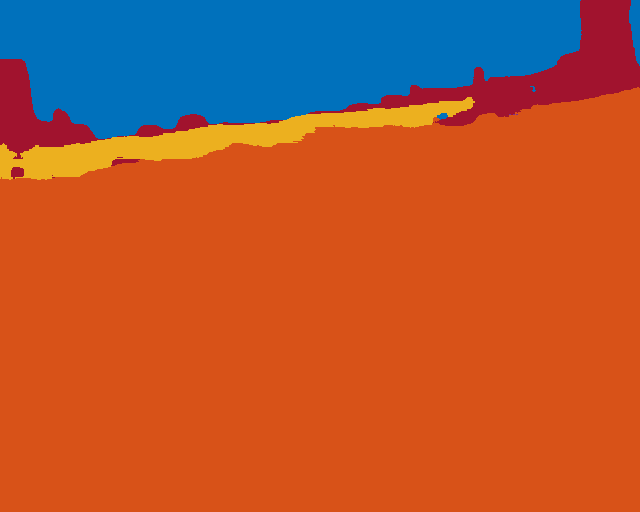

prev=849,i=850
iteration running is 850
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


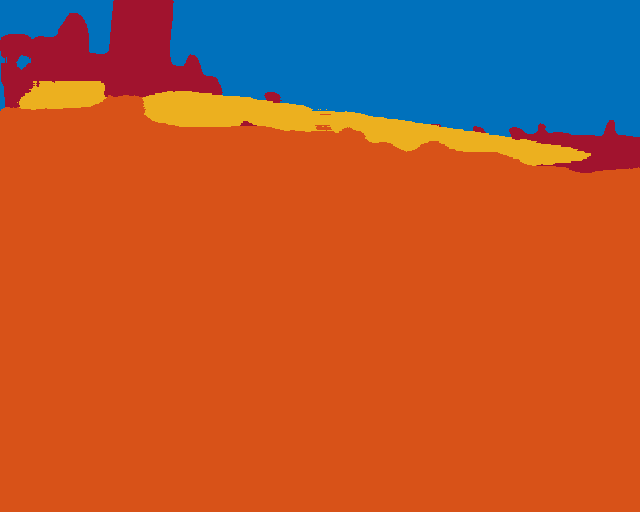

this is the raw image
this is the ground truth mask
this is the colored inferred image


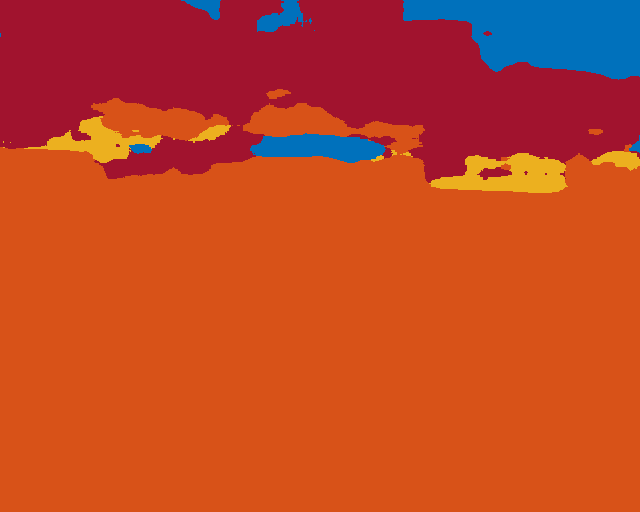

prev=851,i=852
iteration running is 852
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


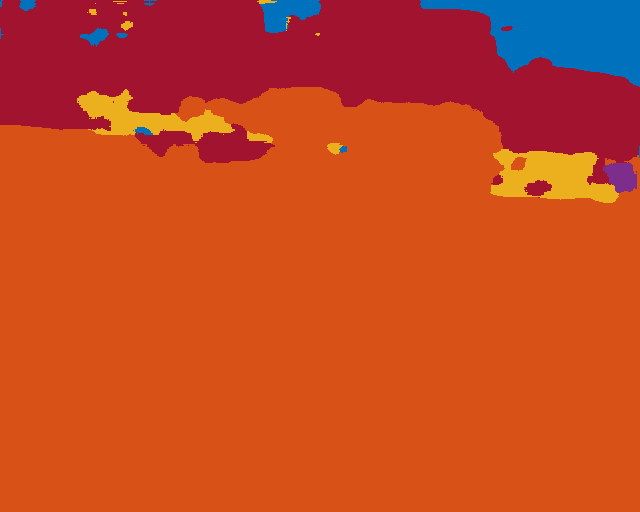

this is the raw image
this is the ground truth mask
this is the colored inferred image


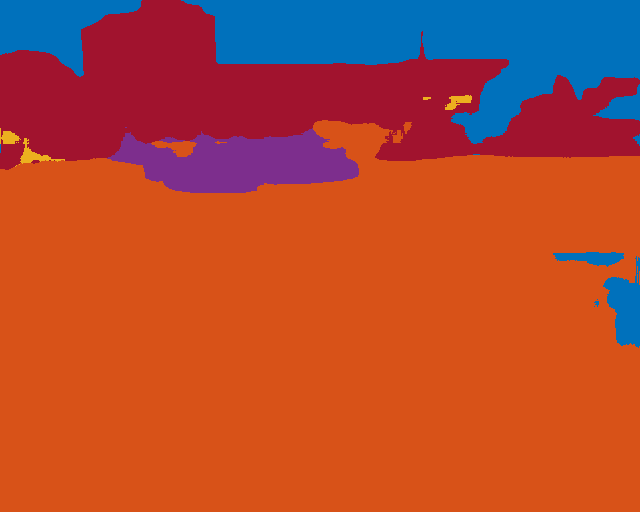

prev=853,i=854
iteration running is 854
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


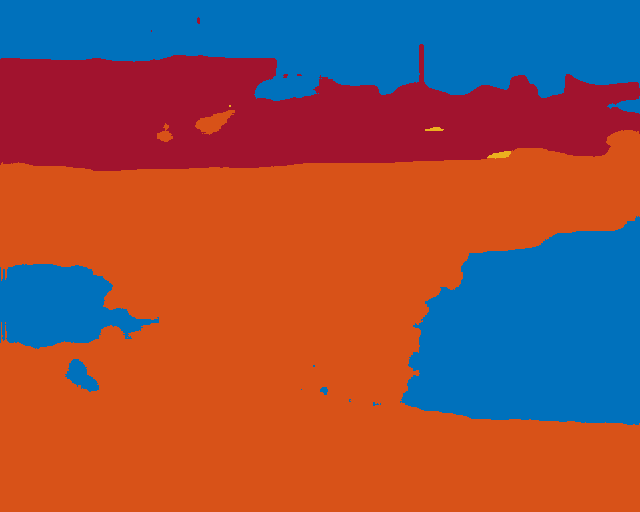

this is the raw image
this is the ground truth mask
this is the colored inferred image


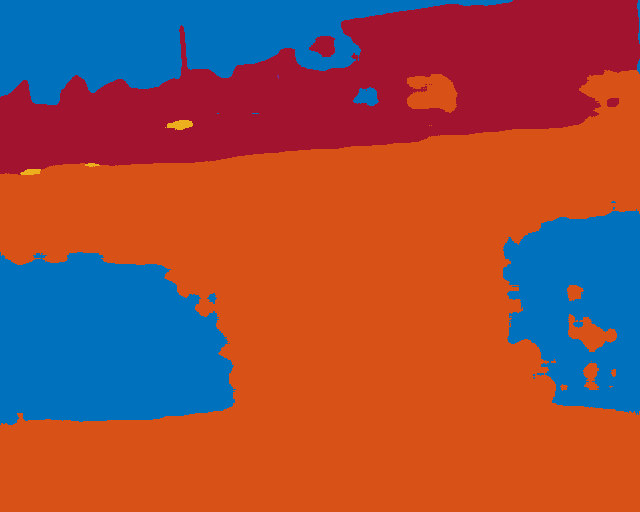

prev=855,i=856
iteration running is 856
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


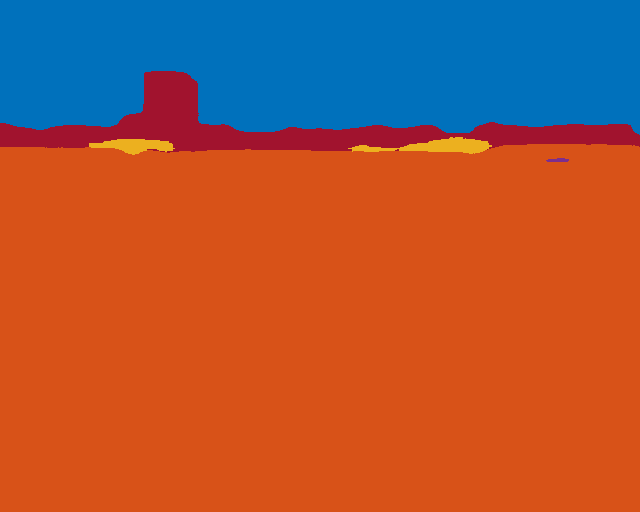

this is the raw image
this is the ground truth mask
this is the colored inferred image


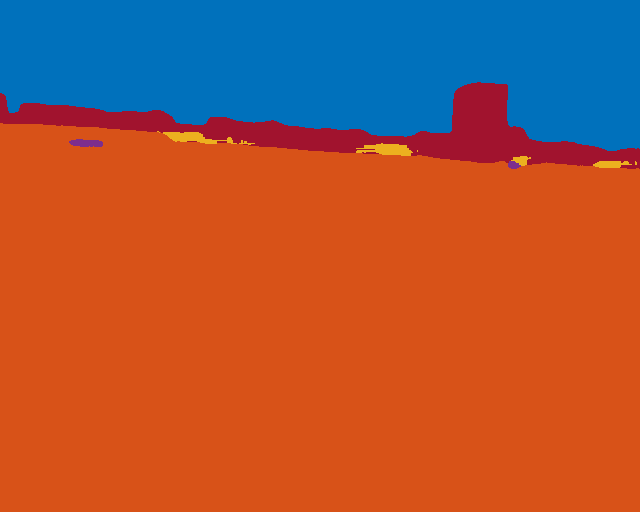

prev=857,i=858
iteration running is 858
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


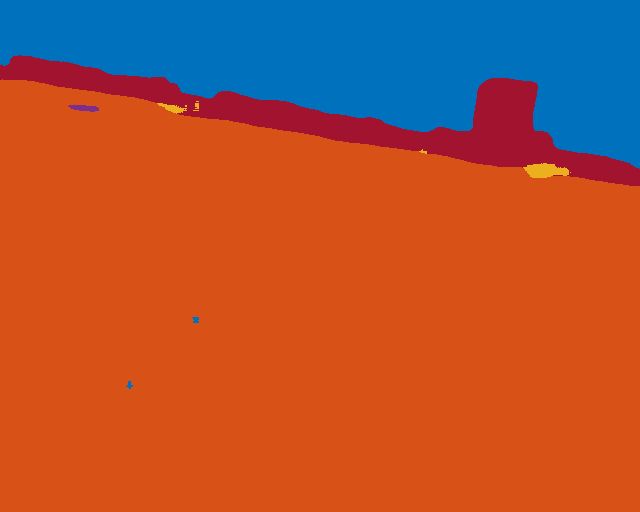

this is the raw image
this is the ground truth mask
this is the colored inferred image


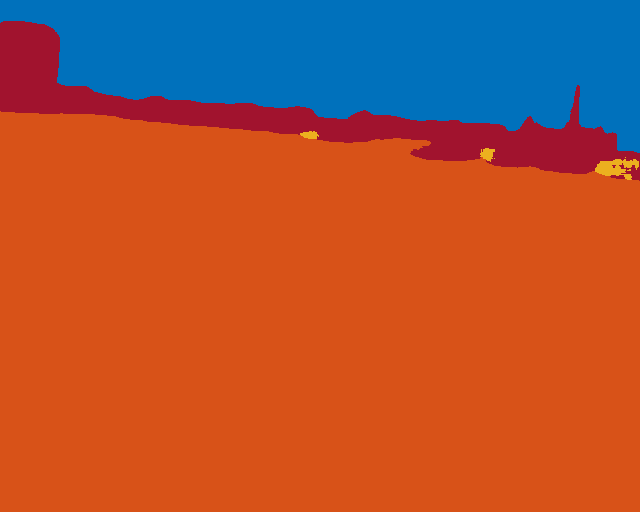

prev=859,i=860
iteration running is 860
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


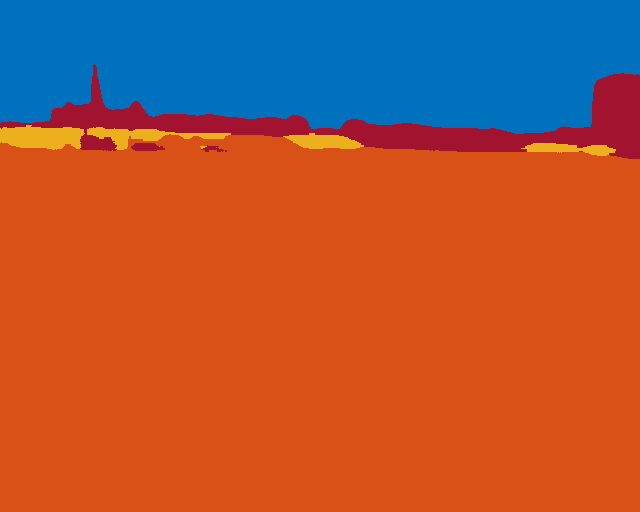

this is the raw image
this is the ground truth mask
this is the colored inferred image


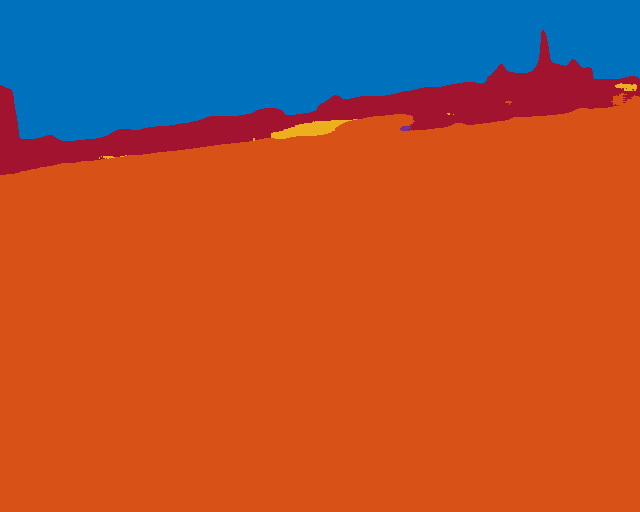

prev=861,i=862
iteration running is 862
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


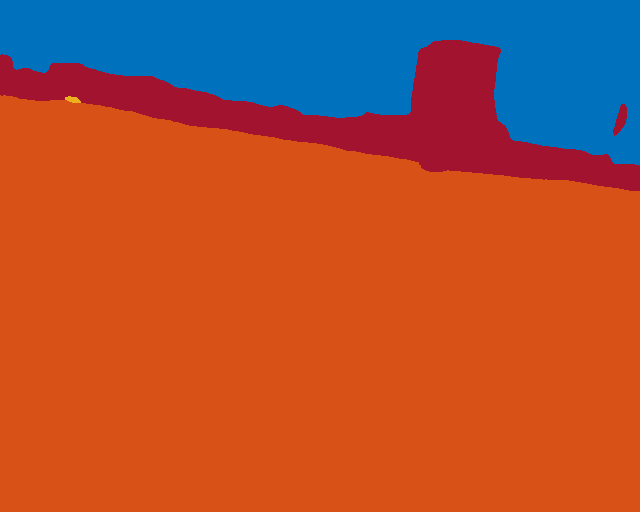

this is the raw image
this is the ground truth mask
this is the colored inferred image


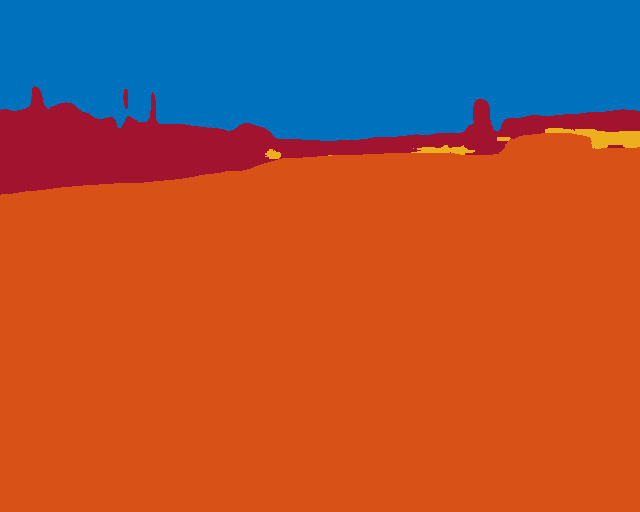

prev=863,i=864
iteration running is 864
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


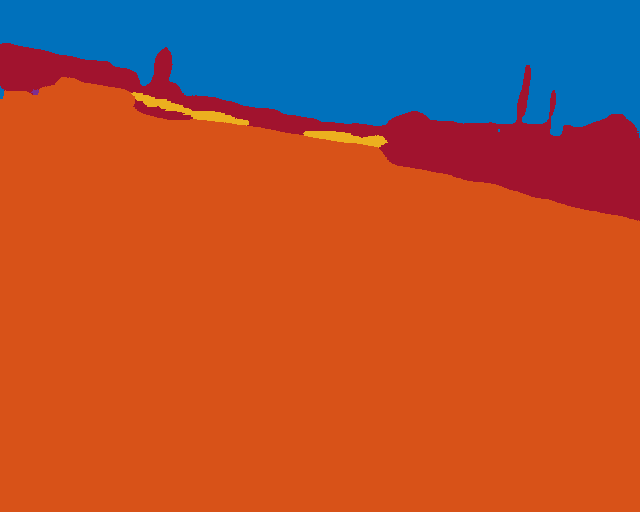

this is the raw image
this is the ground truth mask
this is the colored inferred image


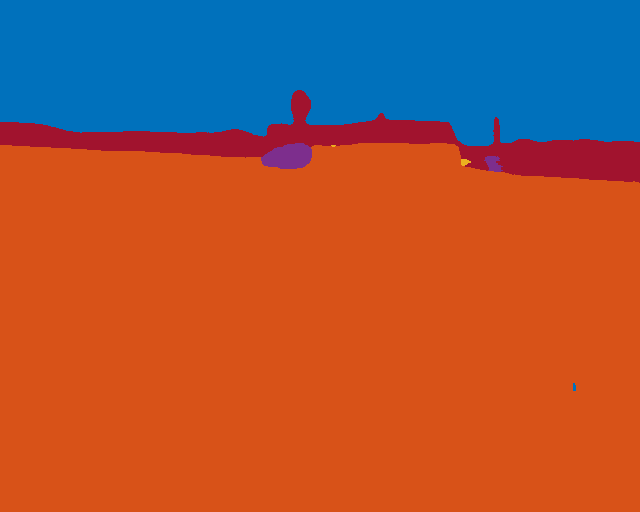

prev=865,i=866
iteration running is 866
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


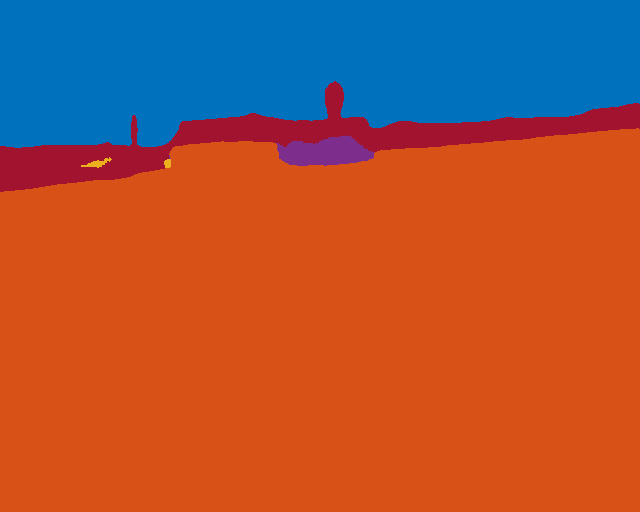

this is the raw image
this is the ground truth mask
this is the colored inferred image


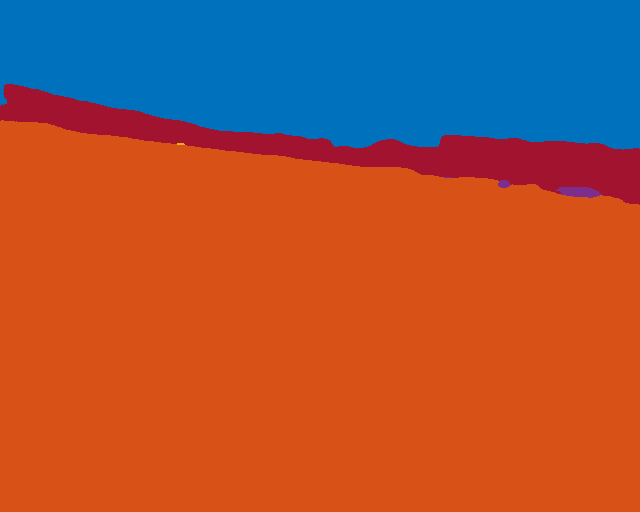

prev=867,i=868
iteration running is 868
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


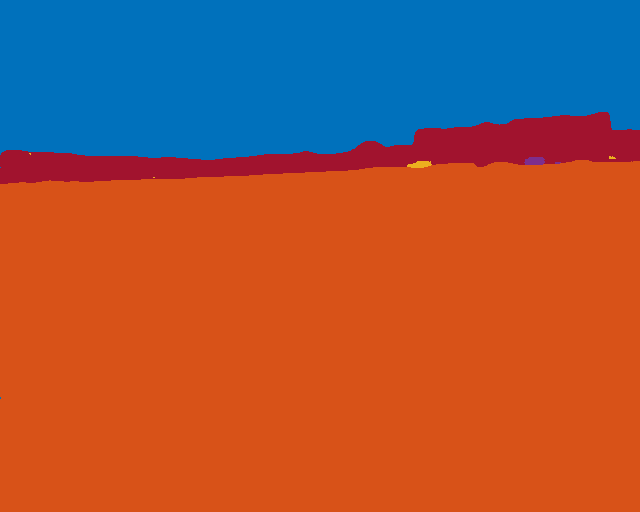

this is the raw image
this is the ground truth mask
this is the colored inferred image


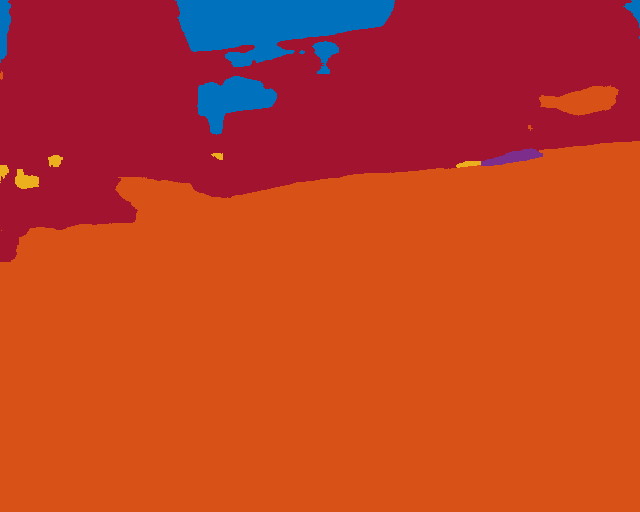

prev=869,i=870
iteration running is 870
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


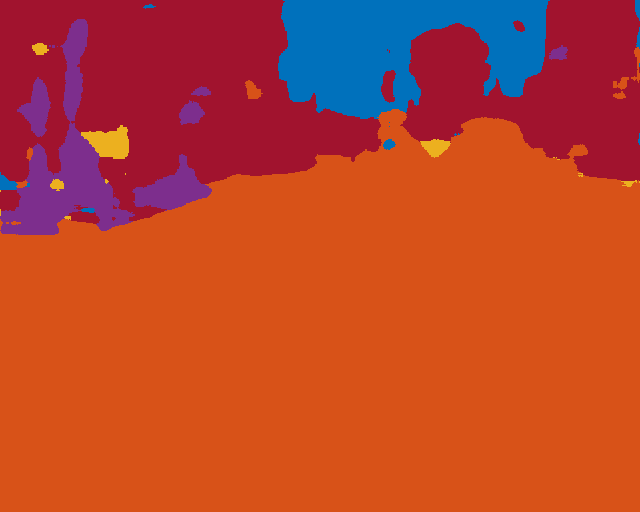

this is the raw image
this is the ground truth mask
this is the colored inferred image


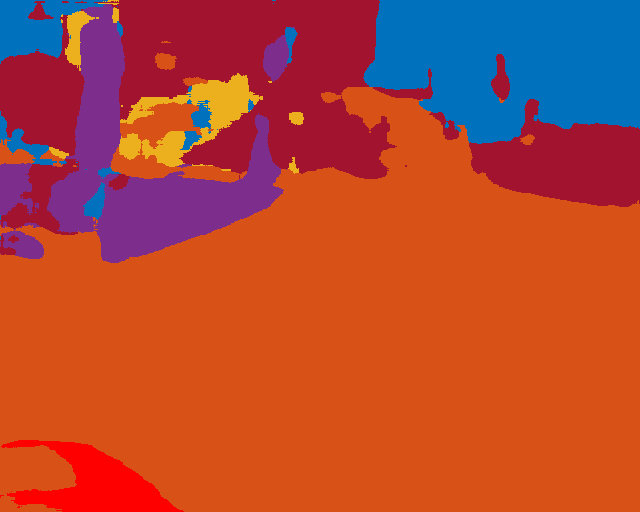

prev=871,i=872
iteration running is 872
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


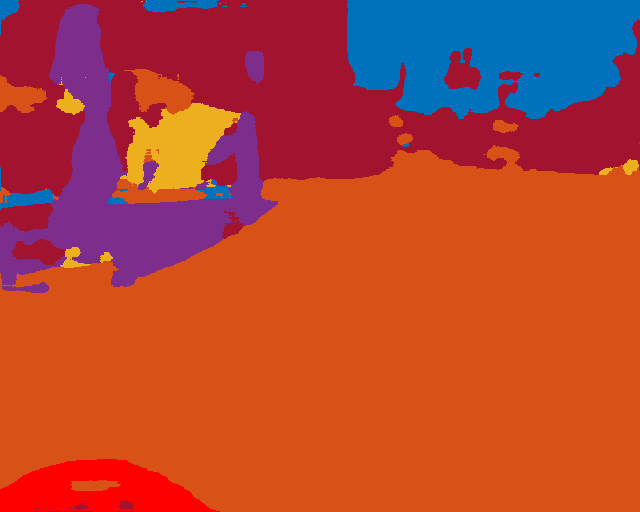

this is the raw image
this is the ground truth mask
this is the colored inferred image


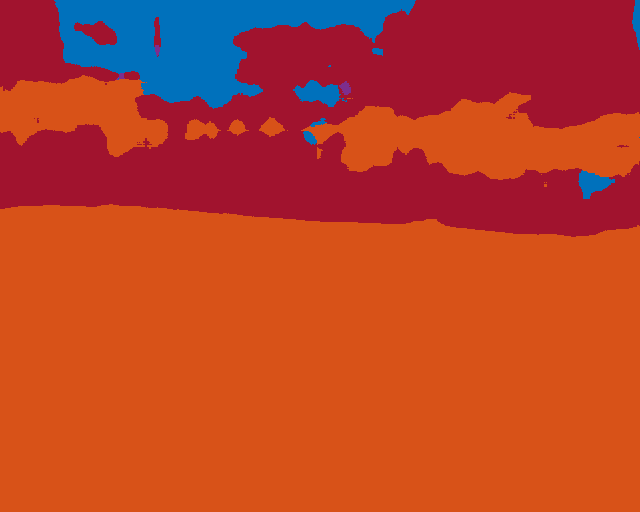

prev=873,i=874
iteration running is 874
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


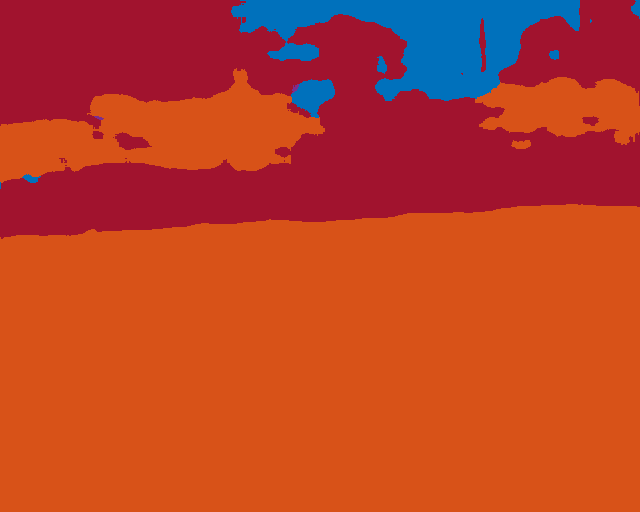

this is the raw image
this is the ground truth mask
this is the colored inferred image


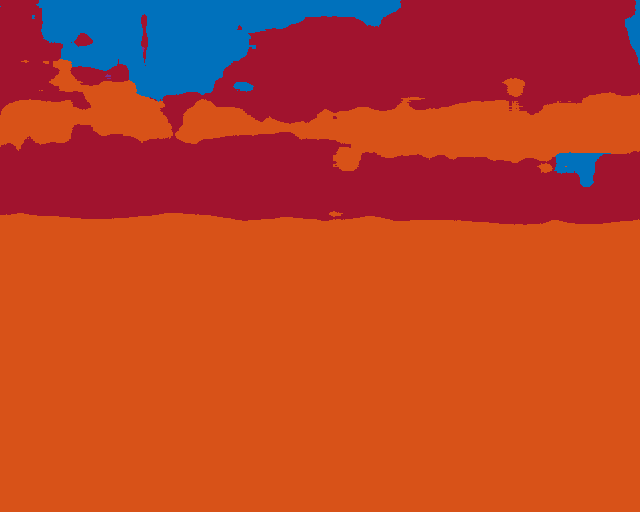

prev=875,i=876
iteration running is 876
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


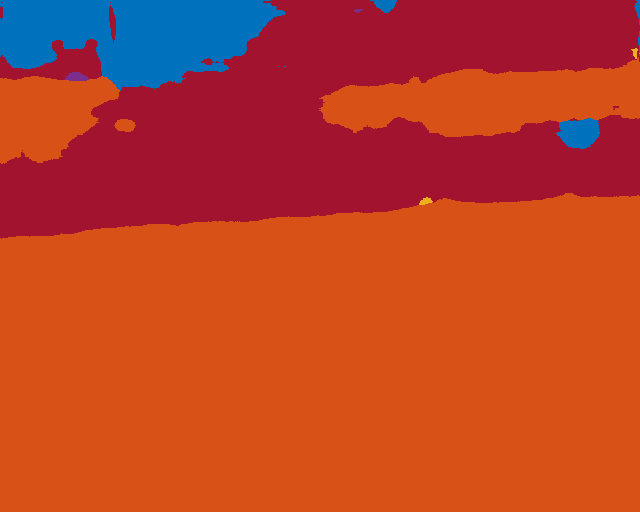

this is the raw image
this is the ground truth mask
this is the colored inferred image


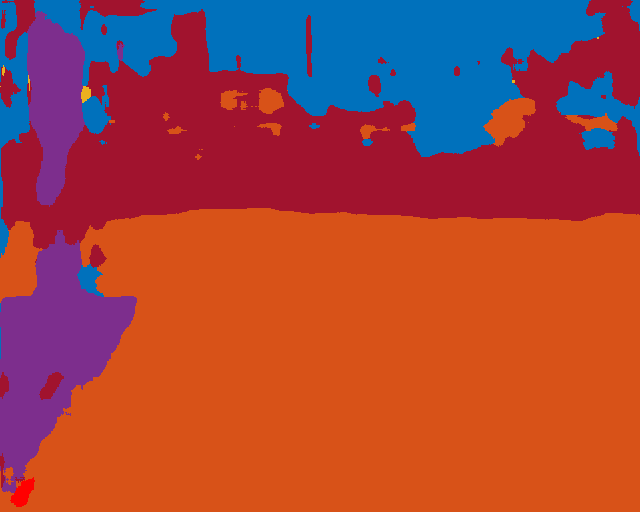

prev=877,i=878
iteration running is 878
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


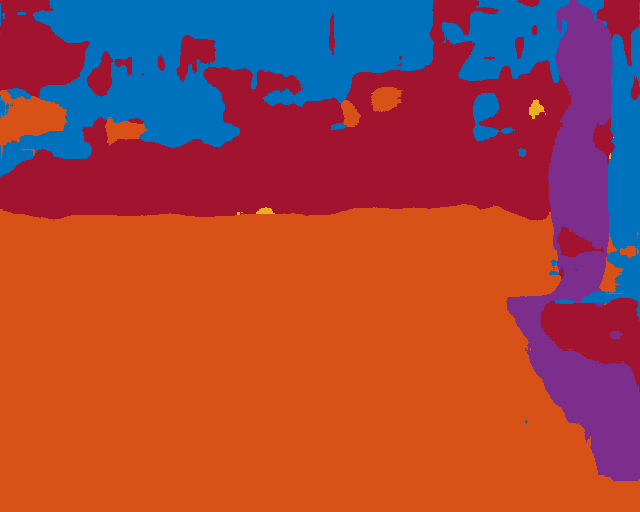

this is the raw image
this is the ground truth mask
this is the colored inferred image


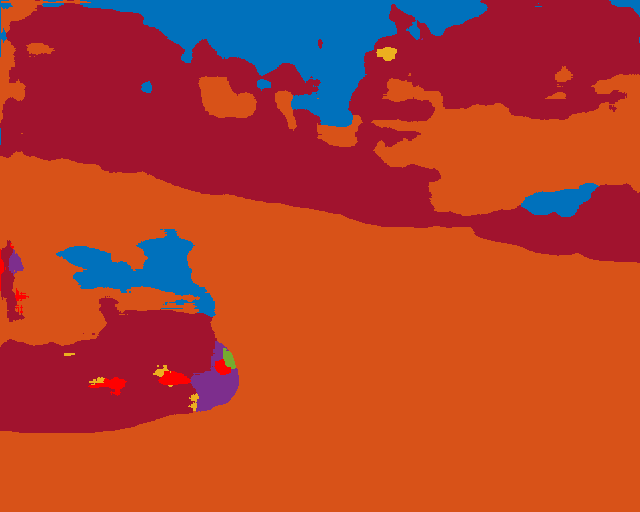

prev=879,i=880
iteration running is 880
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


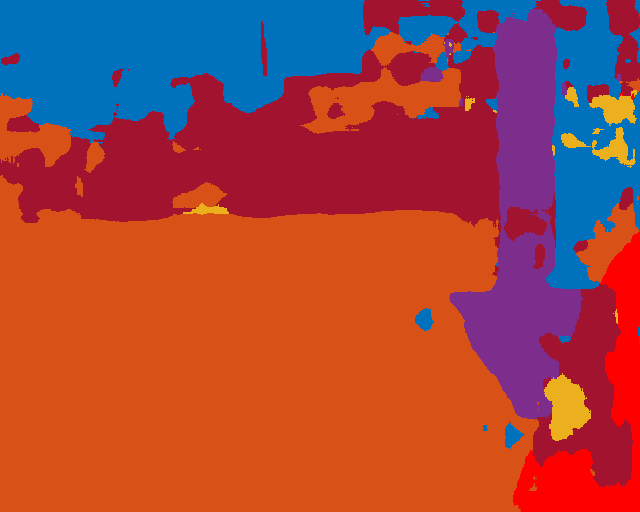

this is the raw image
this is the ground truth mask
this is the colored inferred image


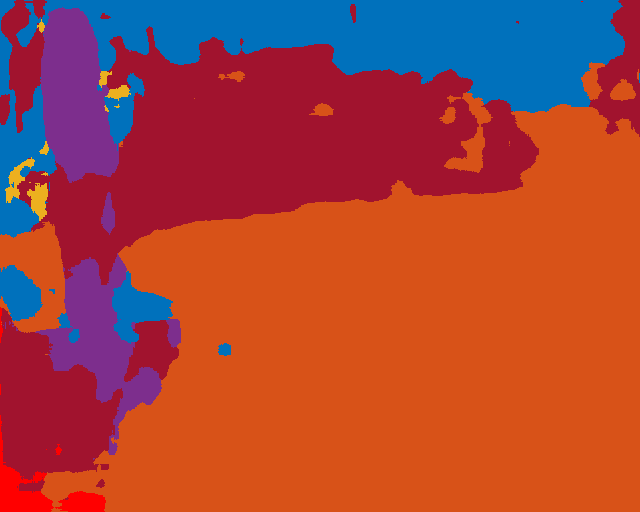

prev=881,i=882
iteration running is 882
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


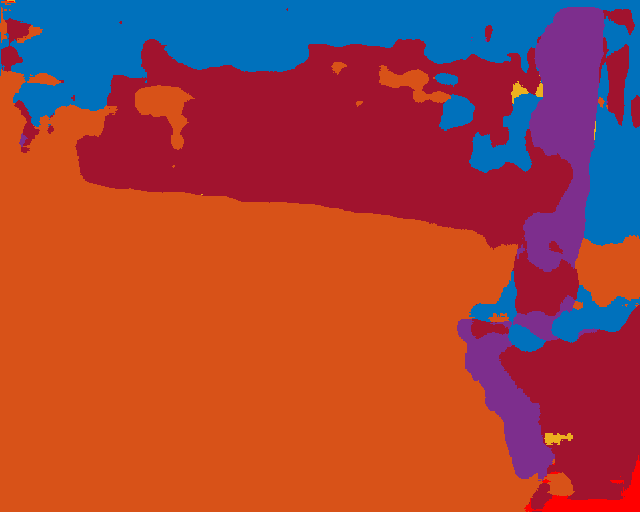

this is the raw image
this is the ground truth mask
this is the colored inferred image


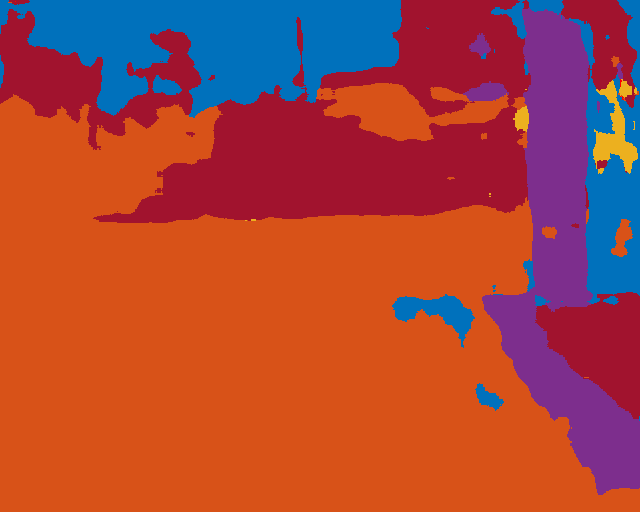

prev=883,i=884
iteration running is 884
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


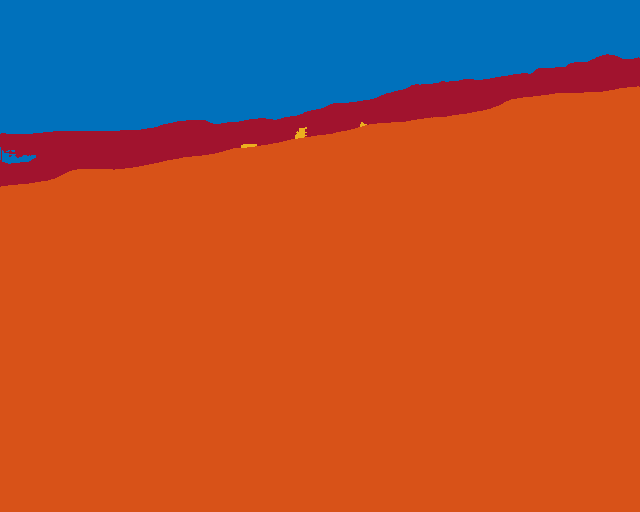

this is the raw image
this is the ground truth mask
this is the colored inferred image


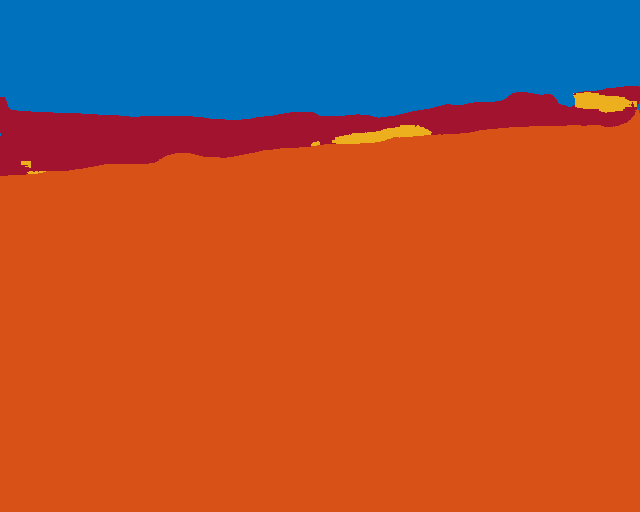

prev=885,i=886
iteration running is 886
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


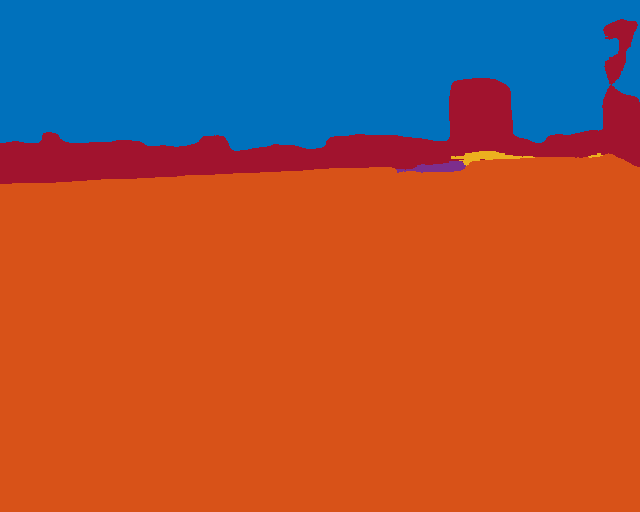

this is the raw image
this is the ground truth mask
this is the colored inferred image


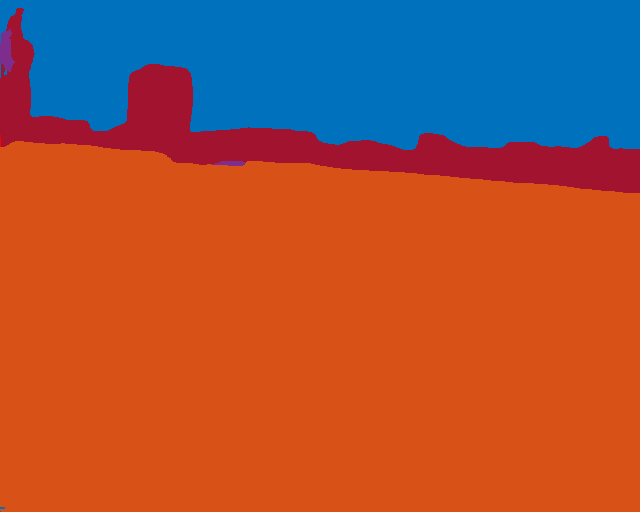

prev=887,i=888
iteration running is 888
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


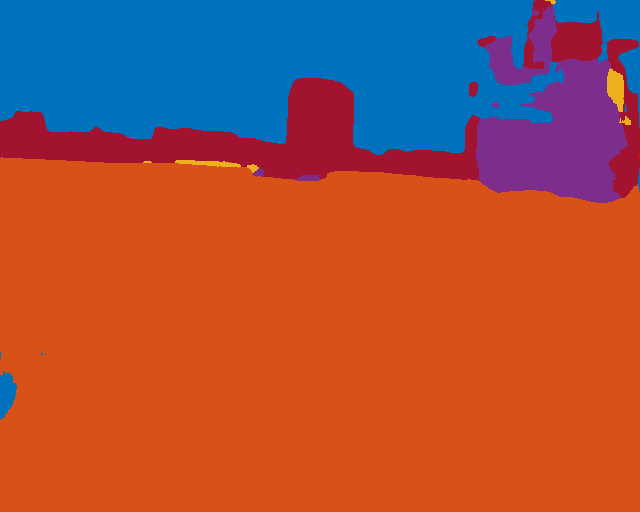

this is the raw image
this is the ground truth mask
this is the colored inferred image


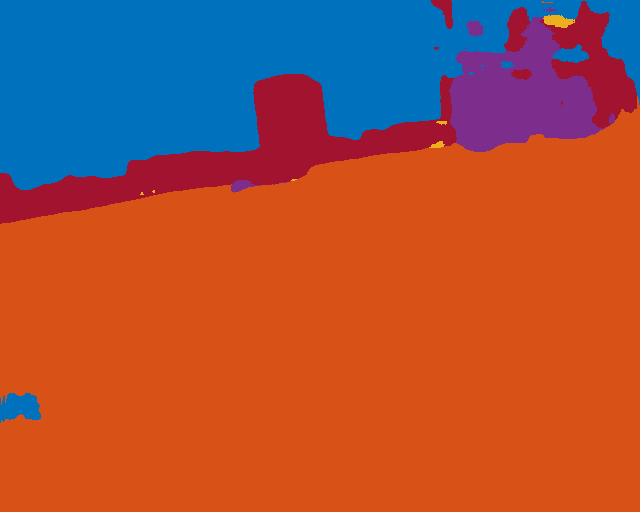

prev=889,i=890
iteration running is 890
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


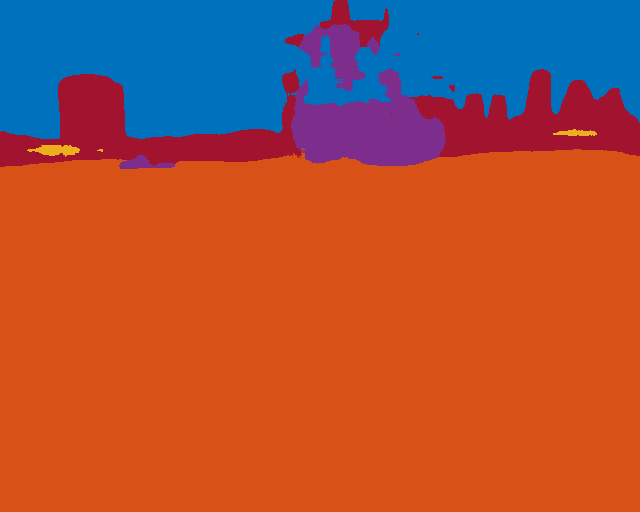

this is the raw image
this is the ground truth mask
this is the colored inferred image


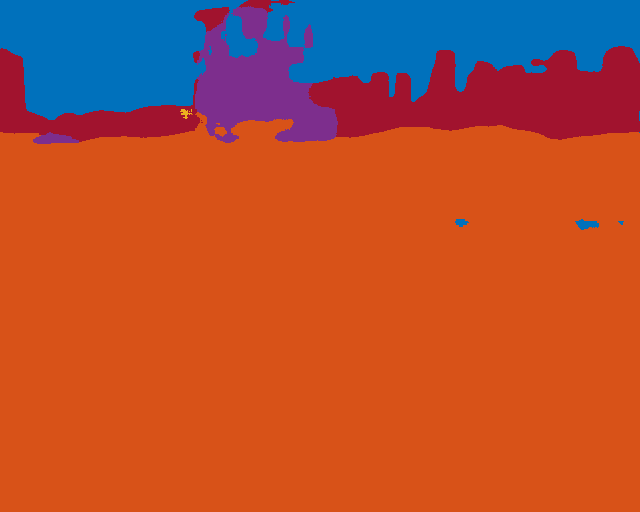

prev=891,i=892
iteration running is 892
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


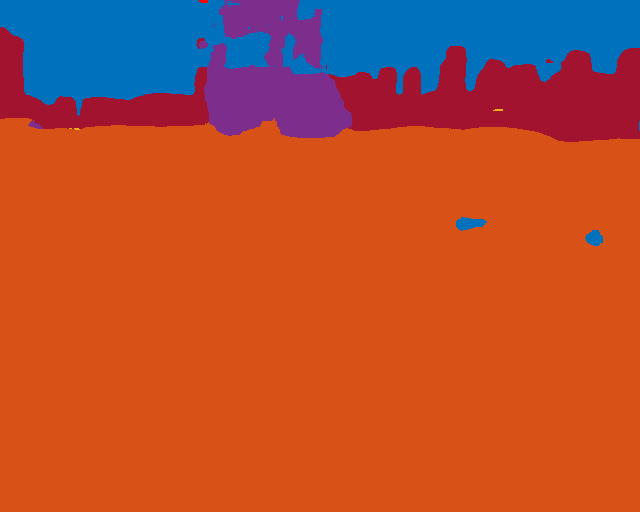

this is the raw image
this is the ground truth mask
this is the colored inferred image


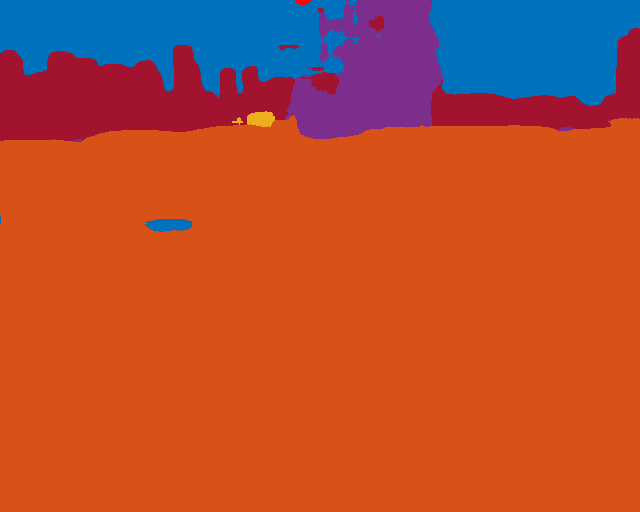

prev=893,i=894
iteration running is 894
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


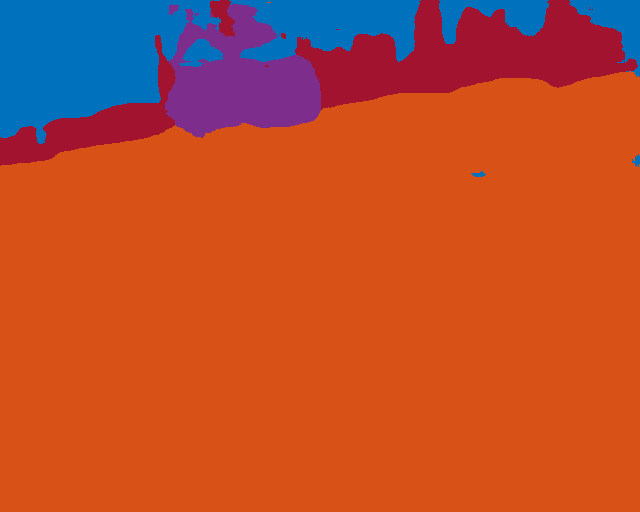

this is the raw image
this is the ground truth mask
this is the colored inferred image


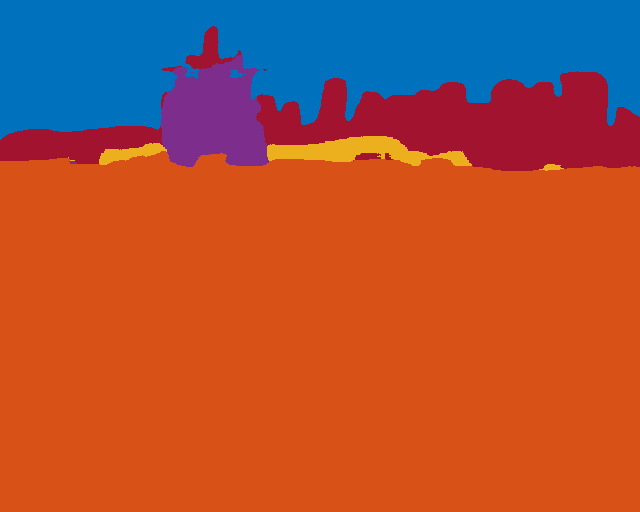

prev=895,i=896
iteration running is 896
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


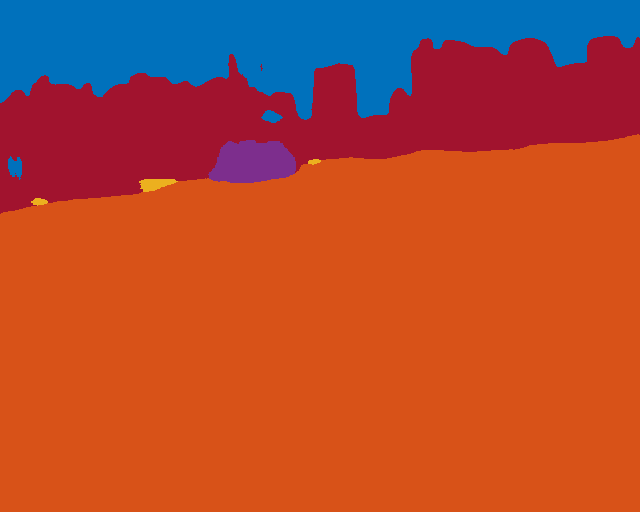

this is the raw image
this is the ground truth mask
this is the colored inferred image


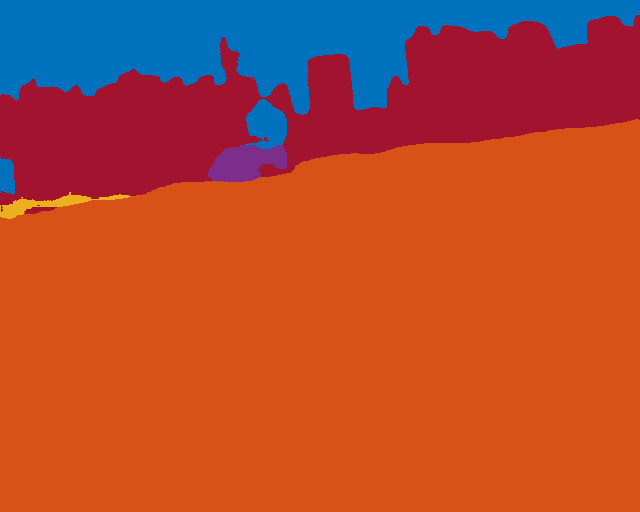

prev=897,i=898
iteration running is 898
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


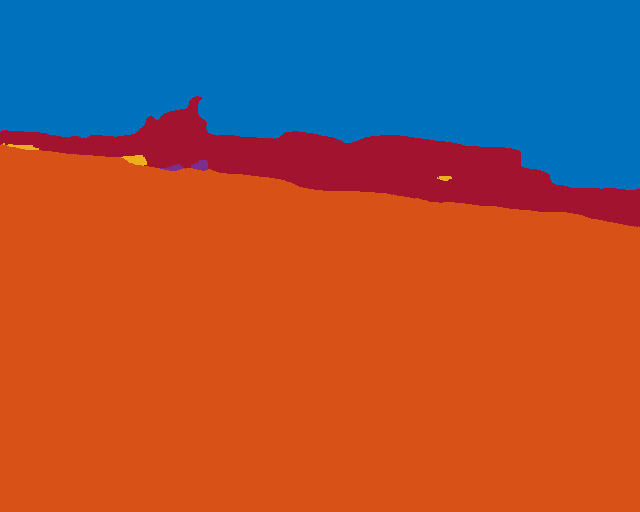

this is the raw image
this is the ground truth mask
this is the colored inferred image


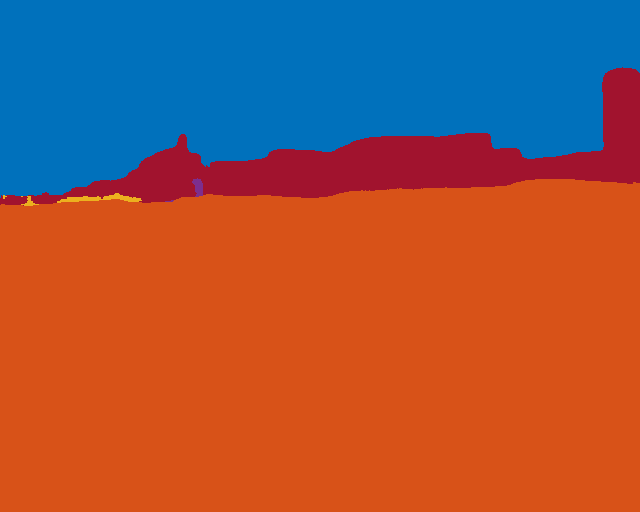

prev=899,i=900
iteration running is 900
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


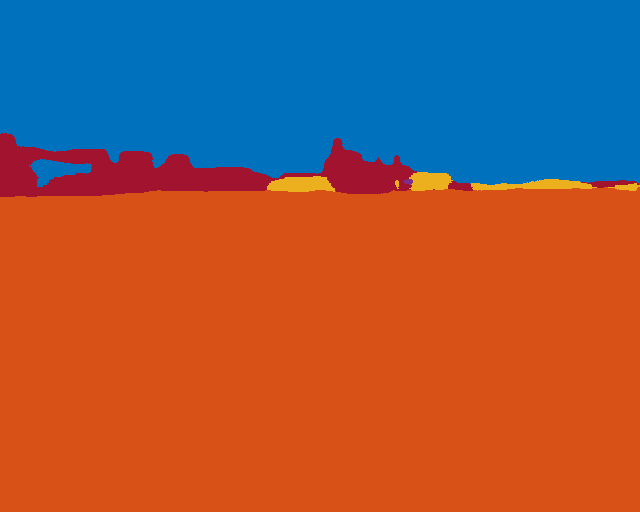

this is the raw image
this is the ground truth mask
this is the colored inferred image


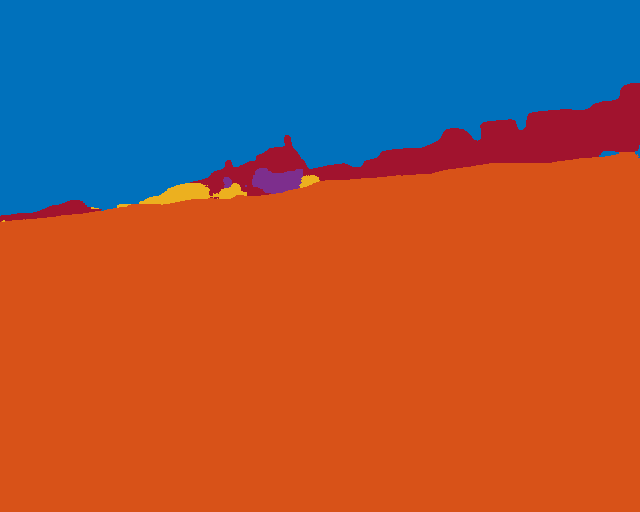

prev=901,i=902
iteration running is 902
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


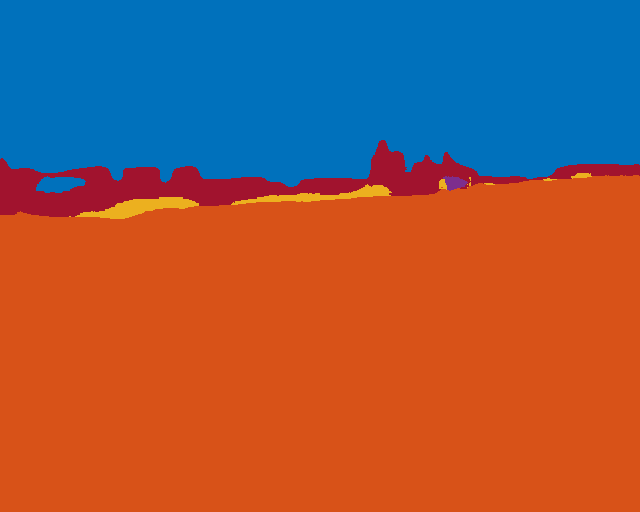

this is the raw image
this is the ground truth mask
this is the colored inferred image


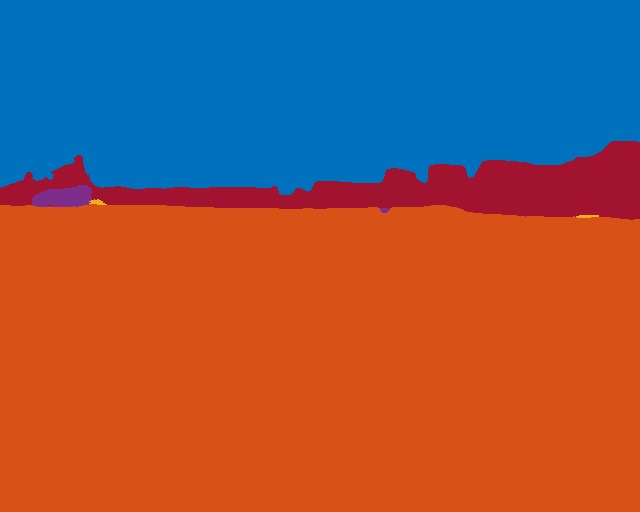

prev=903,i=904
iteration running is 904
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


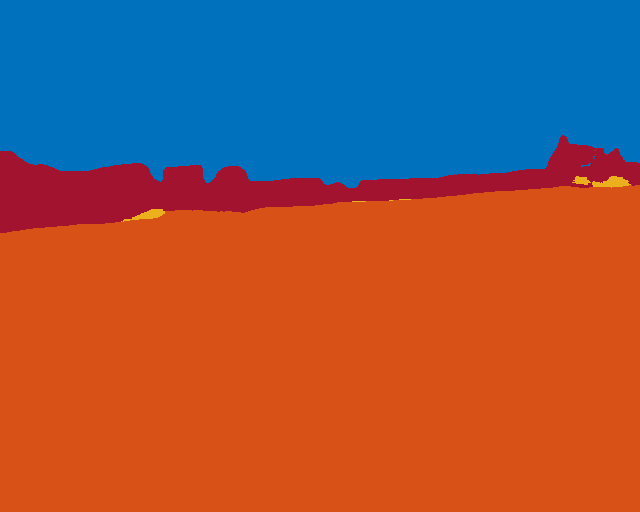

this is the raw image
this is the ground truth mask
this is the colored inferred image


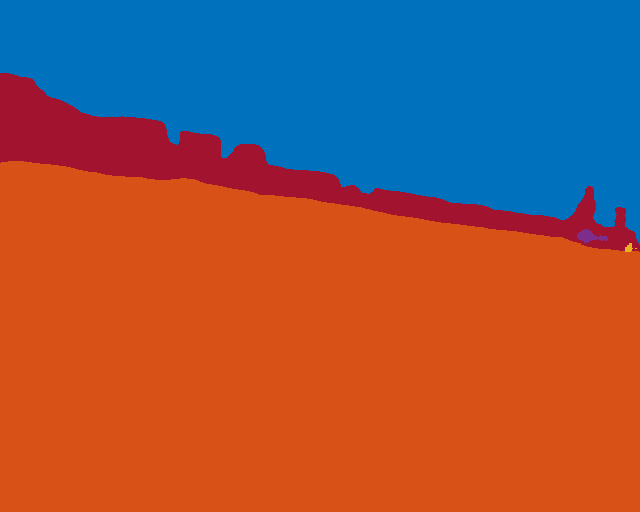

prev=905,i=906
iteration running is 906
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


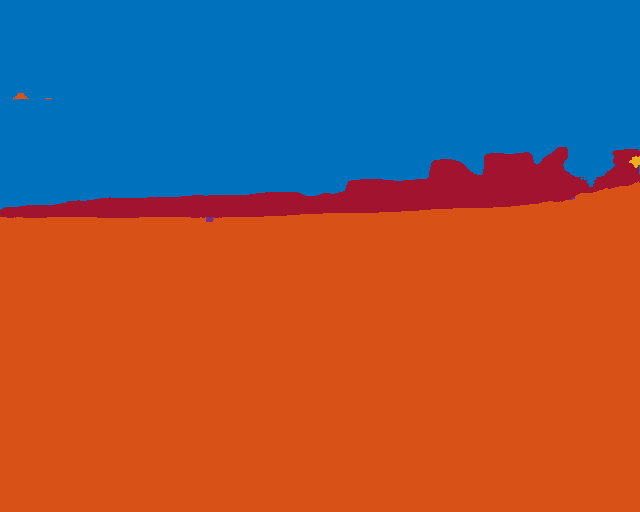

this is the raw image
this is the ground truth mask
this is the colored inferred image


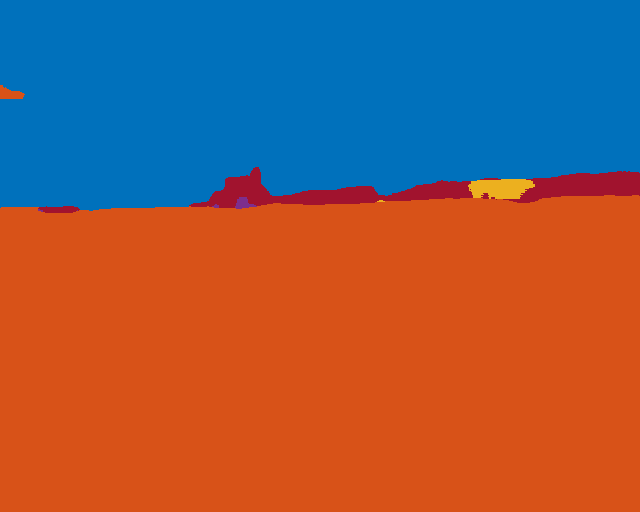

prev=907,i=908
iteration running is 908
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


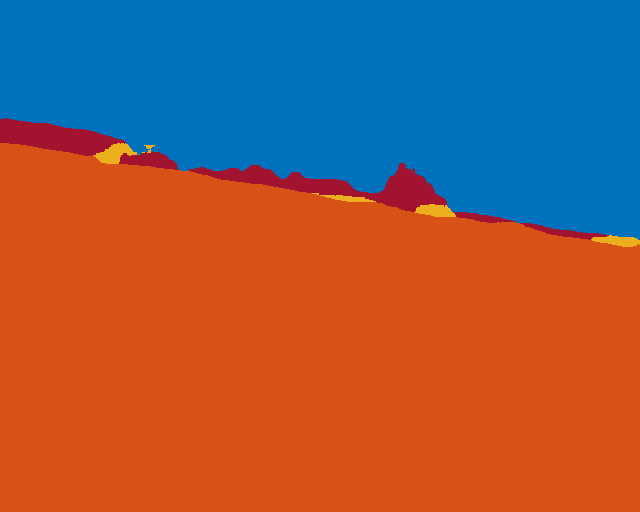

this is the raw image
this is the ground truth mask
this is the colored inferred image


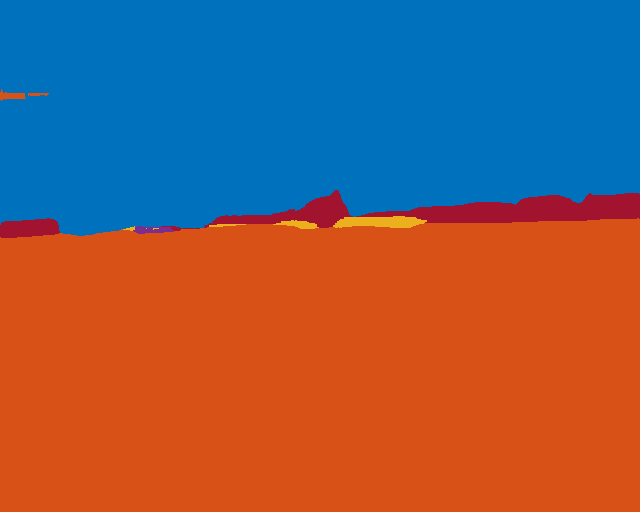

prev=909,i=910
iteration running is 910
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


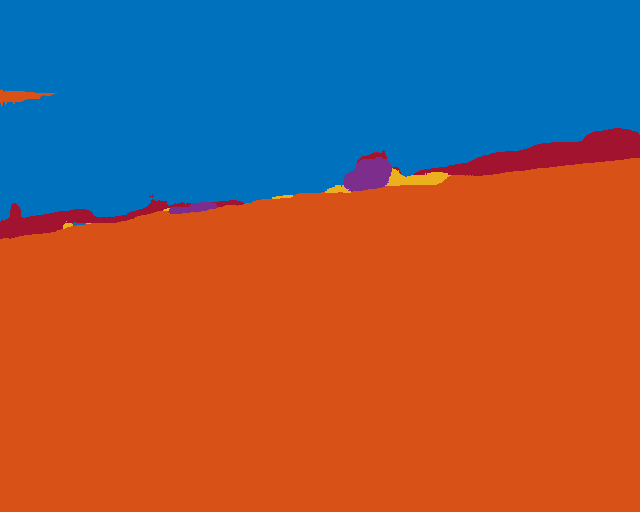

this is the raw image
this is the ground truth mask
this is the colored inferred image


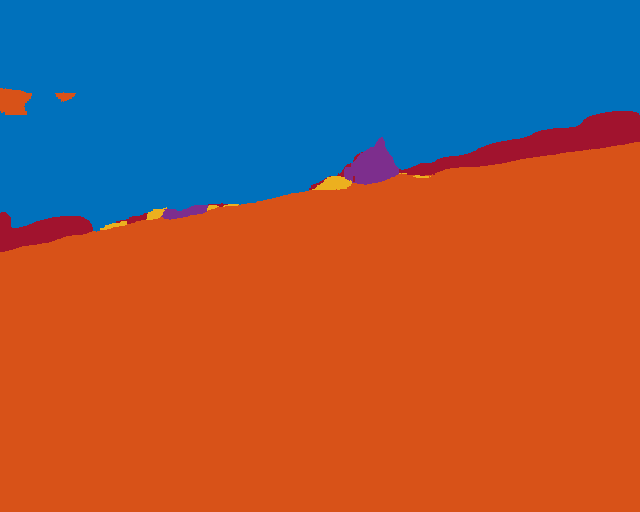

prev=911,i=912
iteration running is 912
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


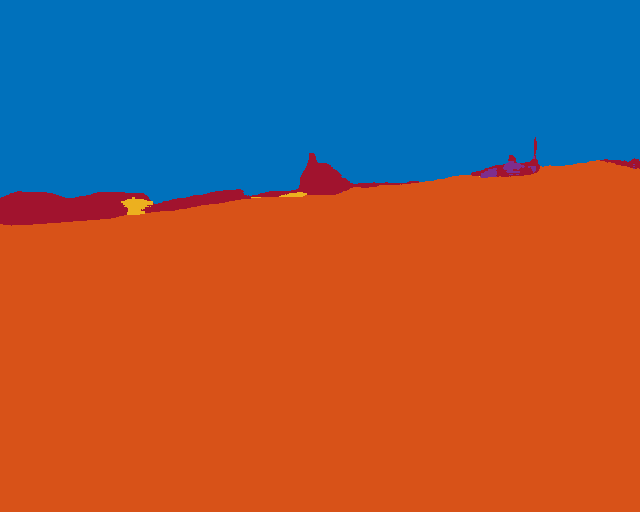

this is the raw image
this is the ground truth mask
this is the colored inferred image


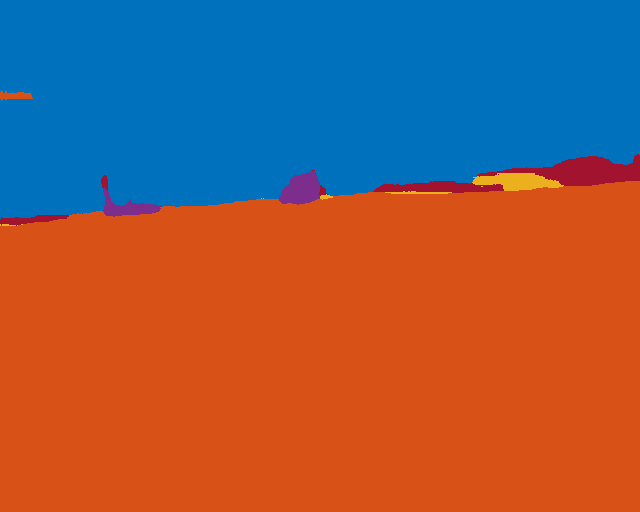

prev=913,i=914
iteration running is 914
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


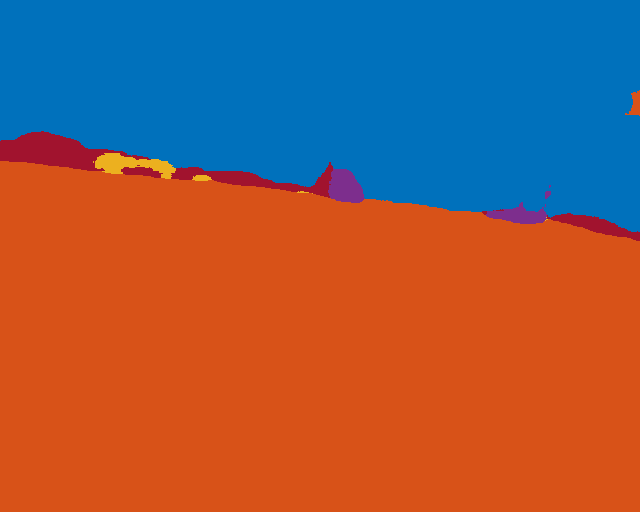

this is the raw image
this is the ground truth mask
this is the colored inferred image


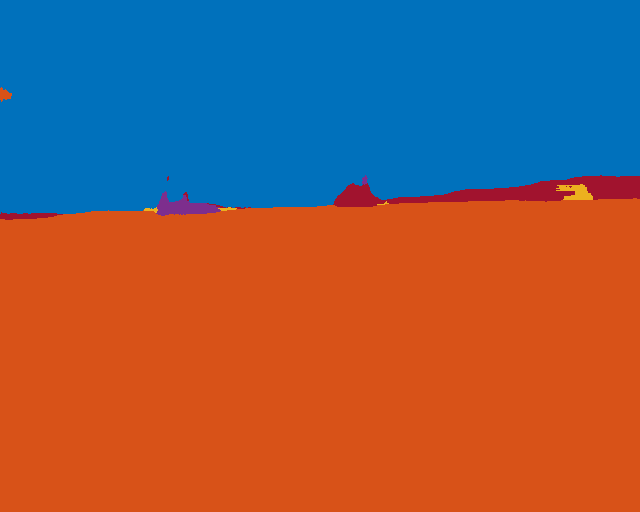

prev=915,i=916
iteration running is 916
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


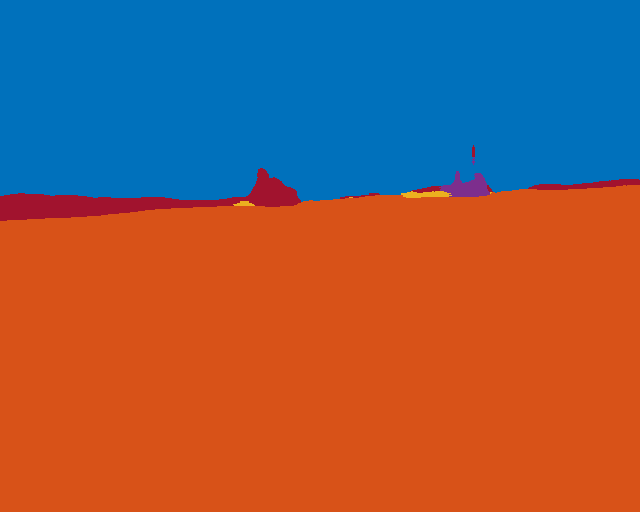

this is the raw image
this is the ground truth mask
this is the colored inferred image


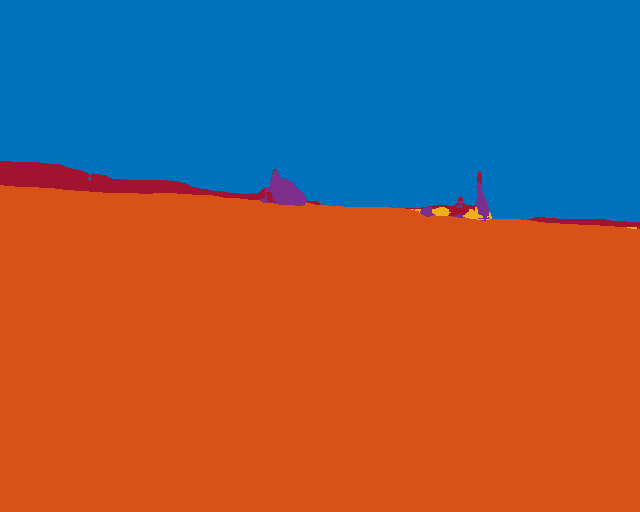

prev=917,i=918
iteration running is 918
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


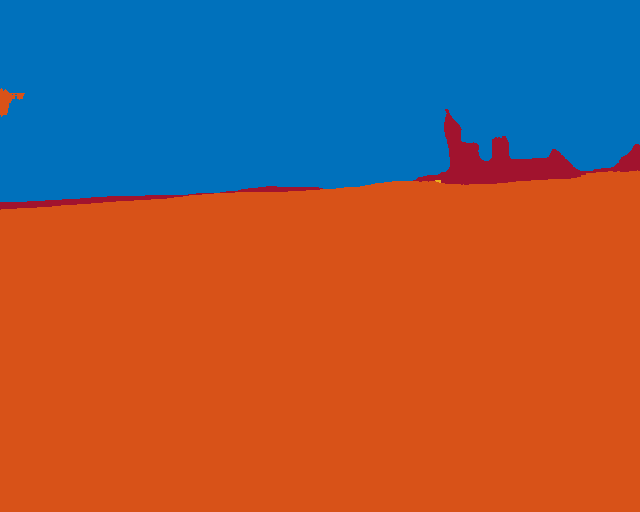

this is the raw image
this is the ground truth mask
this is the colored inferred image


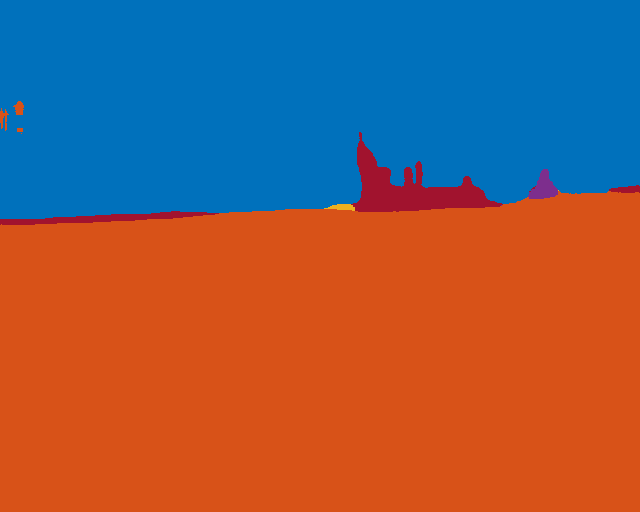

prev=919,i=920
iteration running is 920
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


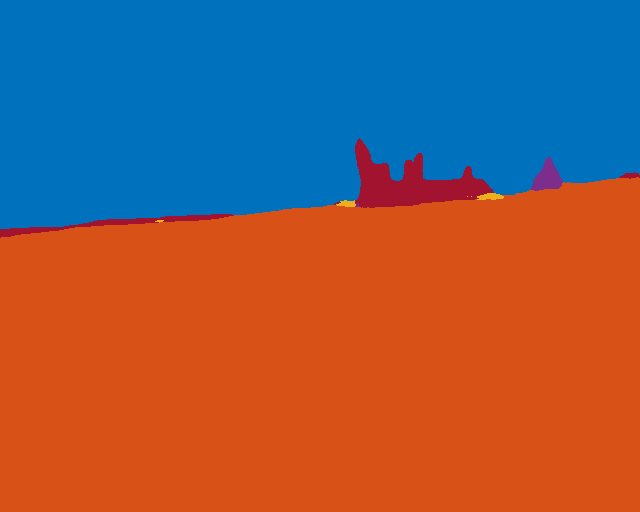

this is the raw image
this is the ground truth mask
this is the colored inferred image


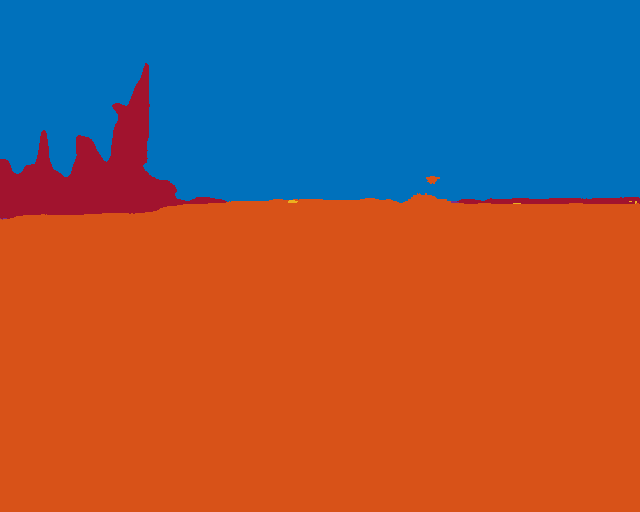

prev=921,i=922
iteration running is 922
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


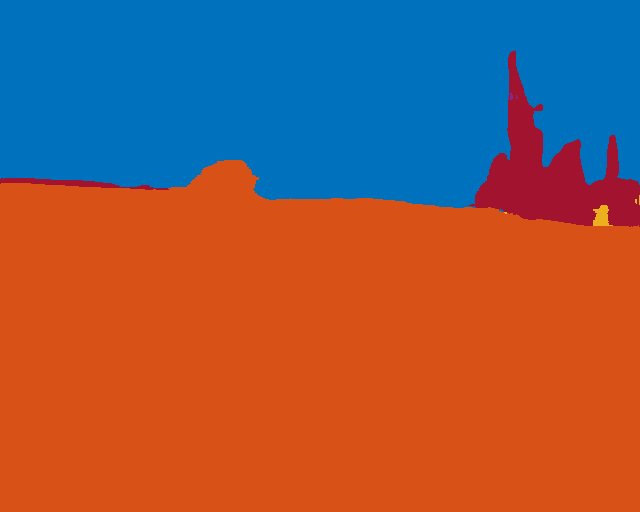

this is the raw image
this is the ground truth mask
this is the colored inferred image


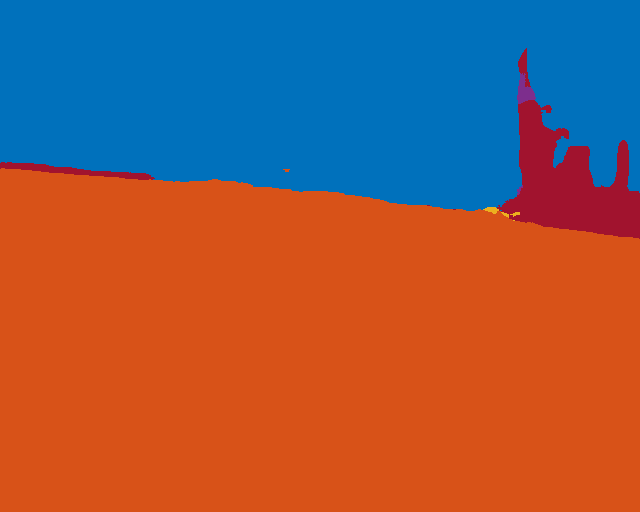

prev=923,i=924
iteration running is 924
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


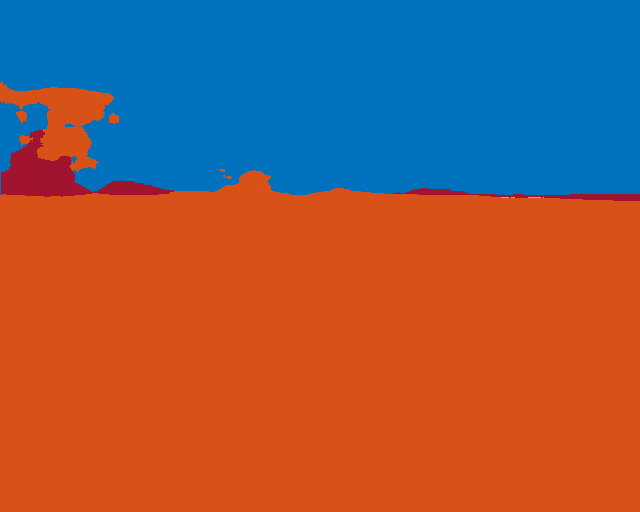

this is the raw image
this is the ground truth mask
this is the colored inferred image


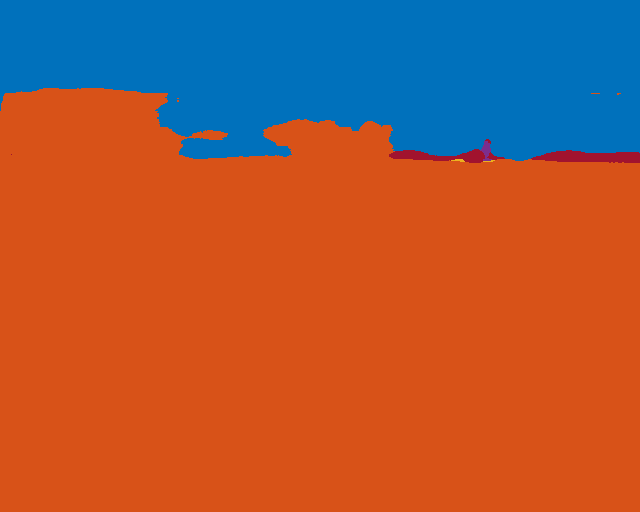

prev=925,i=926
iteration running is 926
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


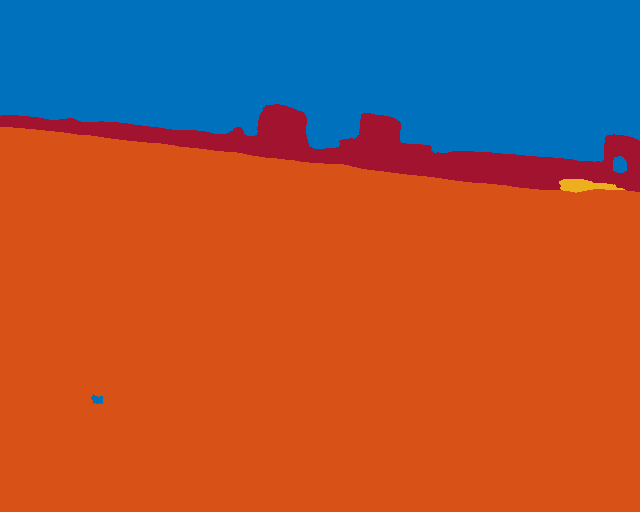

this is the raw image
this is the ground truth mask
this is the colored inferred image


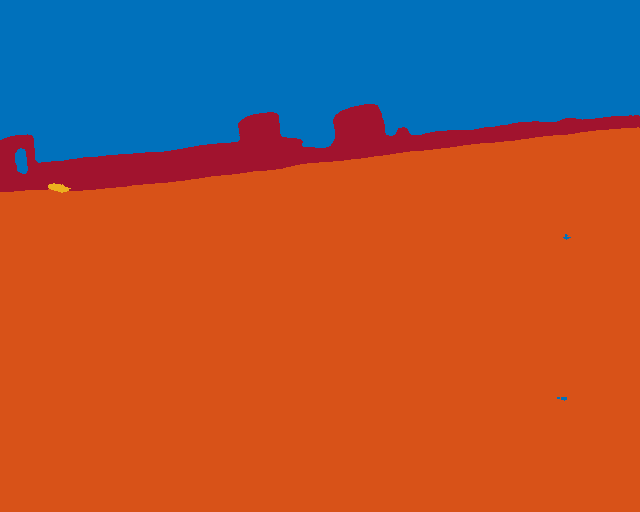

prev=927,i=928
iteration running is 928
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


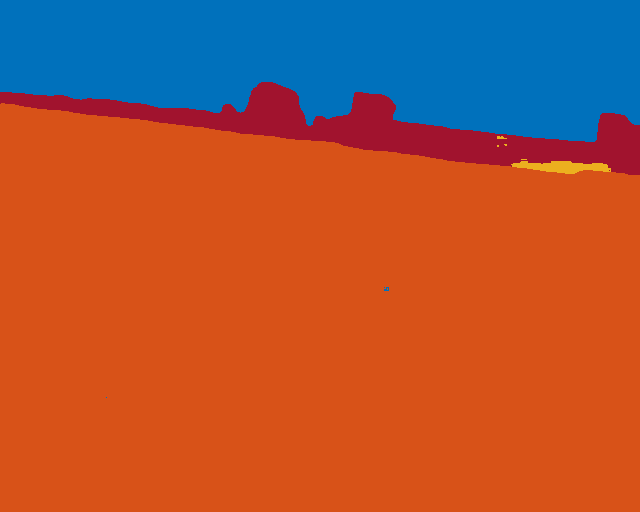

this is the raw image
this is the ground truth mask
this is the colored inferred image


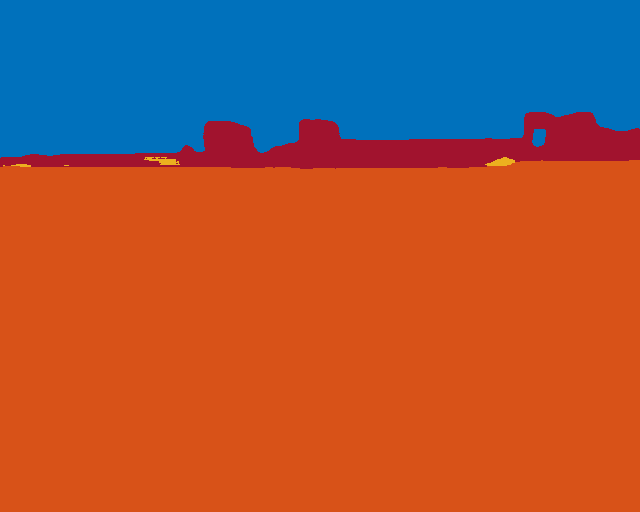

prev=929,i=930
iteration running is 930
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


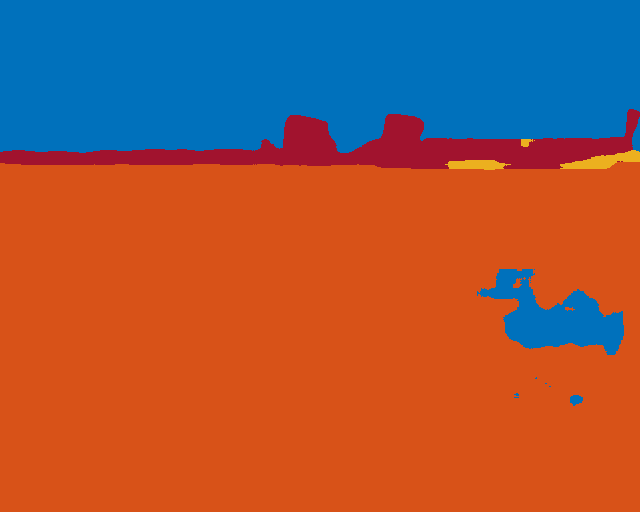

this is the raw image
this is the ground truth mask
this is the colored inferred image


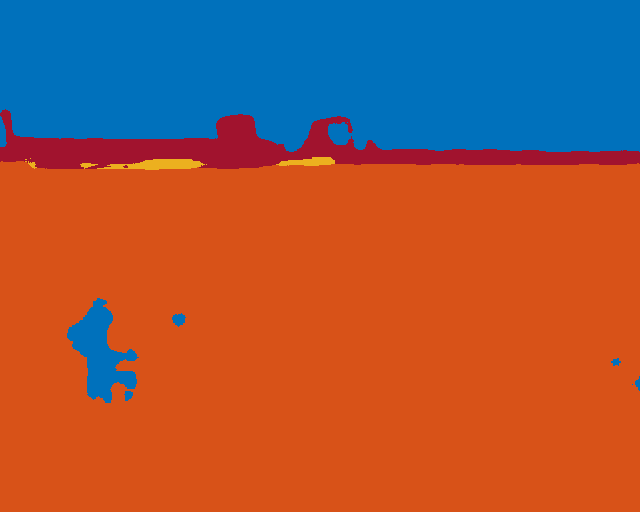

prev=931,i=932
iteration running is 932
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


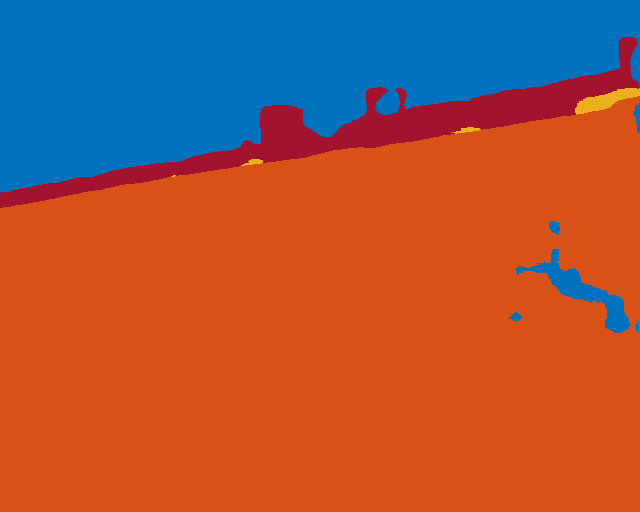

this is the raw image
this is the ground truth mask
this is the colored inferred image


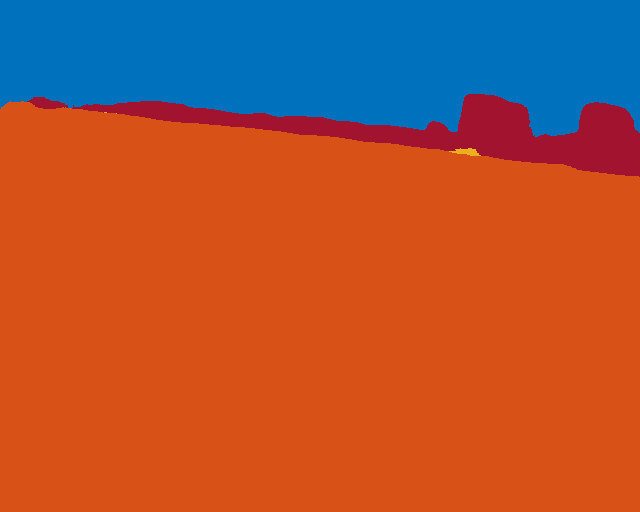

prev=933,i=934
iteration running is 934
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


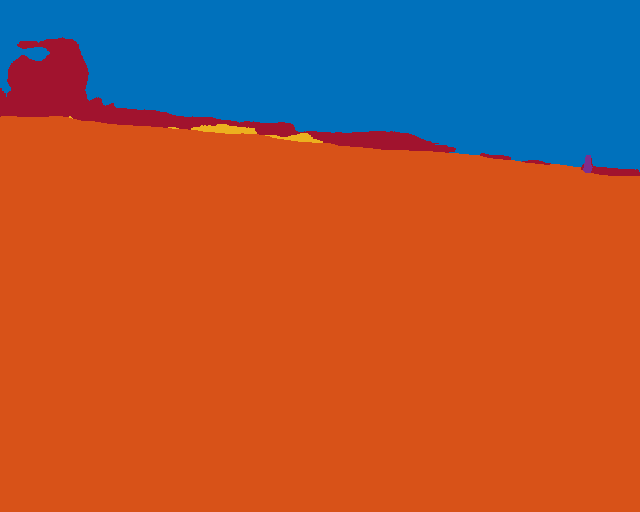

this is the raw image
this is the ground truth mask
this is the colored inferred image


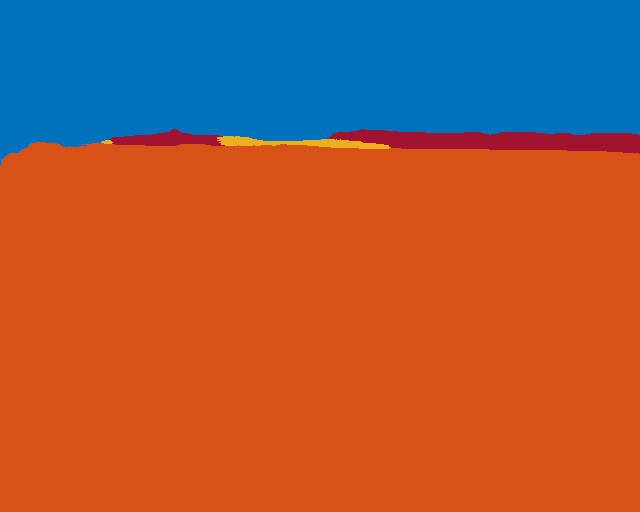

prev=935,i=936
iteration running is 936
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


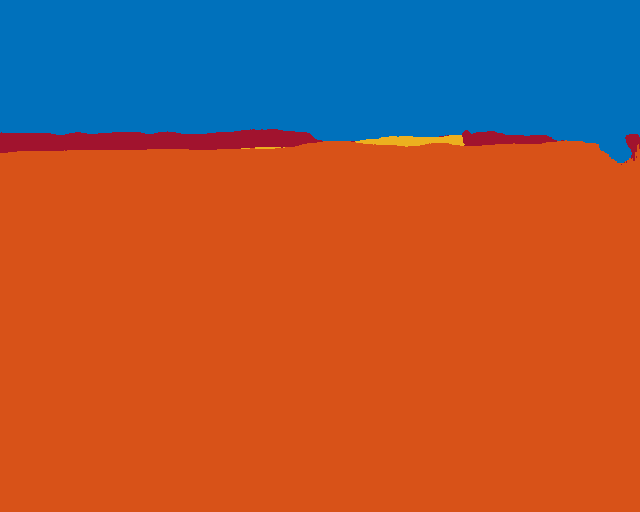

this is the raw image
this is the ground truth mask
this is the colored inferred image


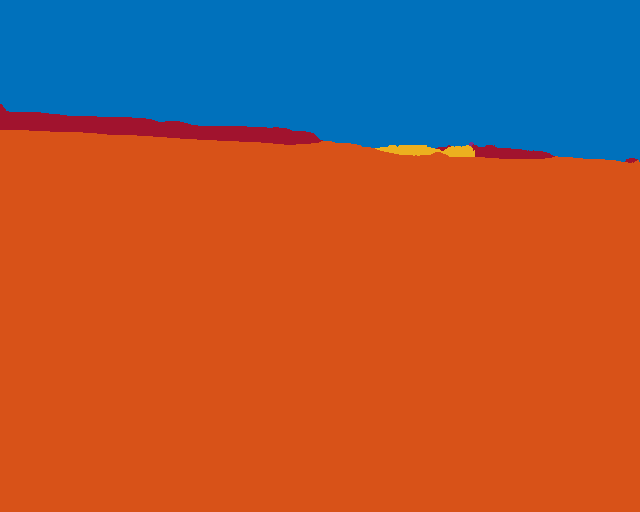

prev=937,i=938
iteration running is 938
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


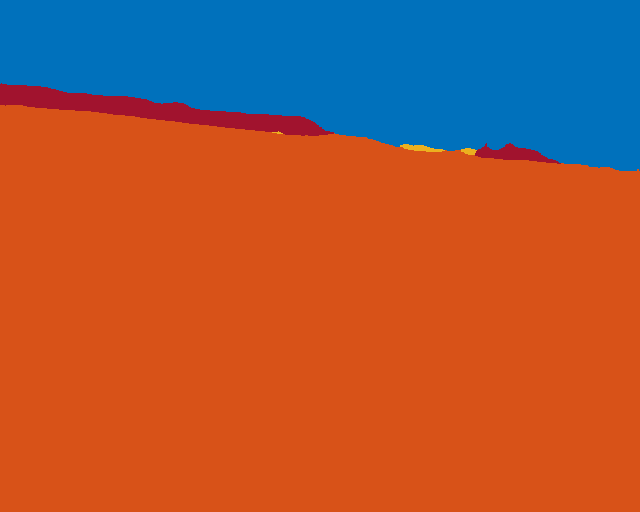

this is the raw image
this is the ground truth mask
this is the colored inferred image


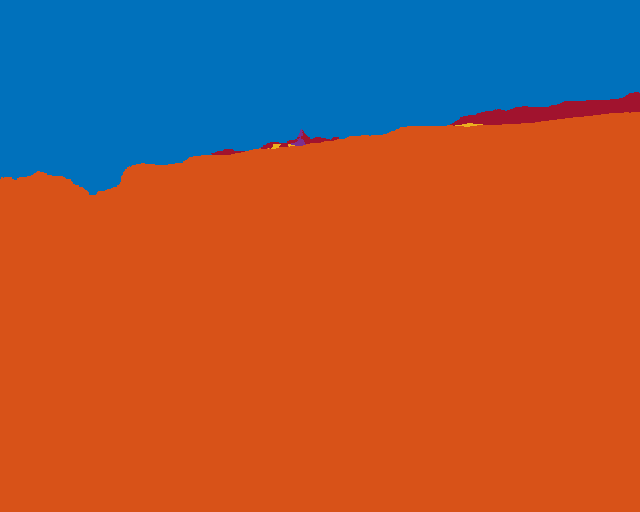

prev=939,i=940
iteration running is 940
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


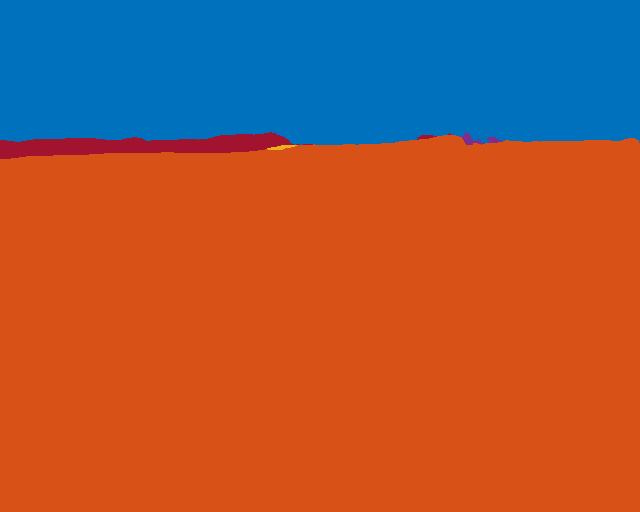

this is the raw image
this is the ground truth mask
this is the colored inferred image


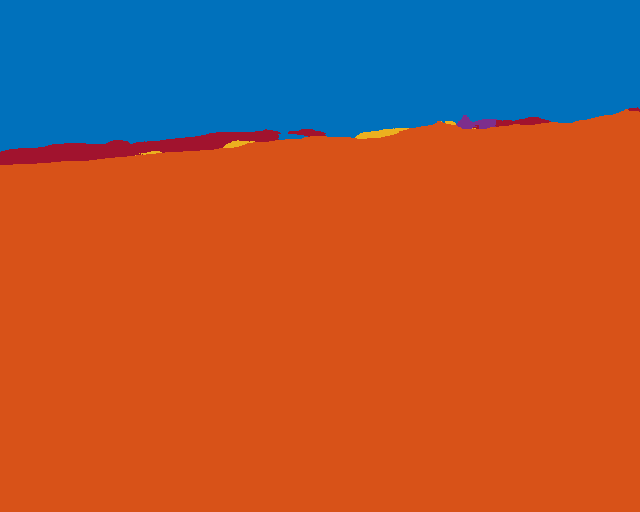

prev=941,i=942
iteration running is 942
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


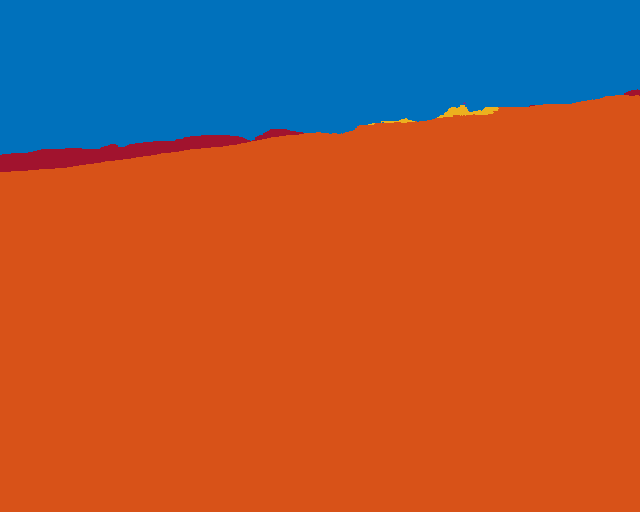

this is the raw image
this is the ground truth mask
this is the colored inferred image


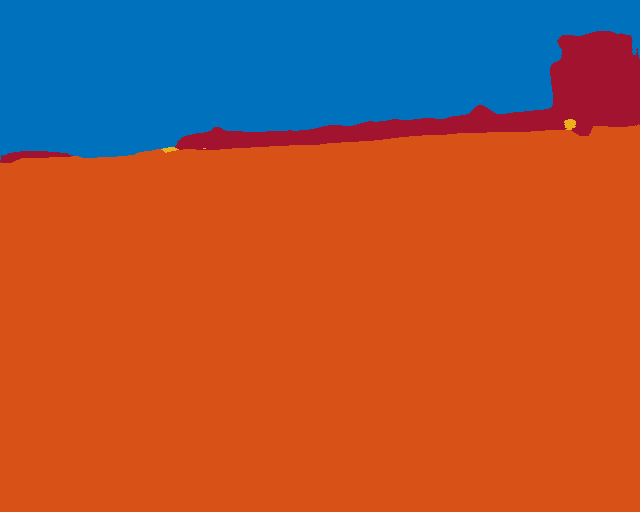

prev=943,i=944
iteration running is 944
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


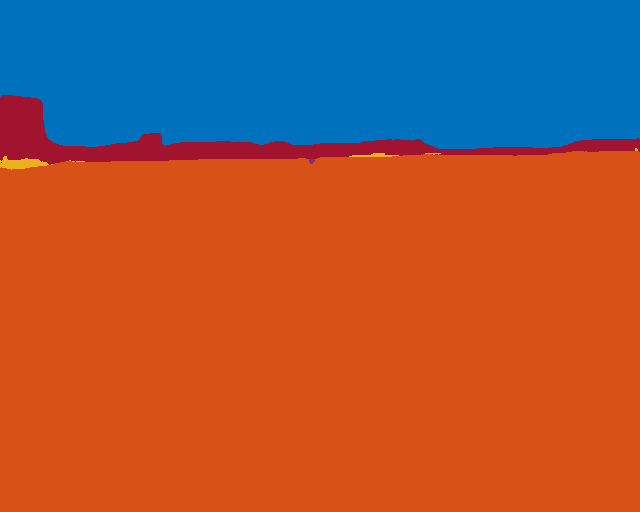

this is the raw image
this is the ground truth mask
this is the colored inferred image


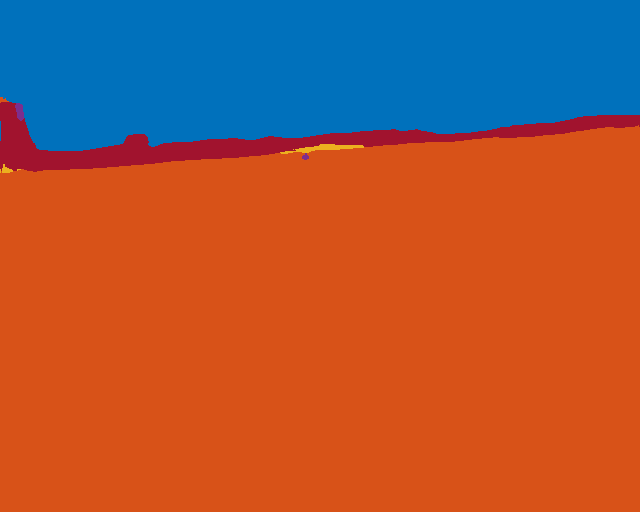

prev=945,i=946
iteration running is 946
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


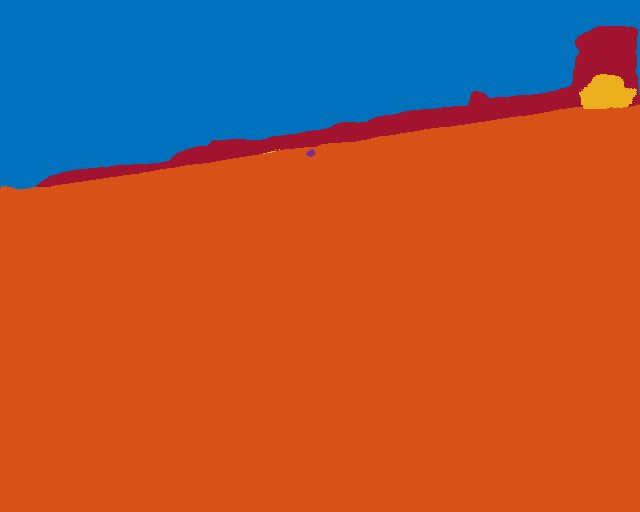

this is the raw image
this is the ground truth mask
this is the colored inferred image


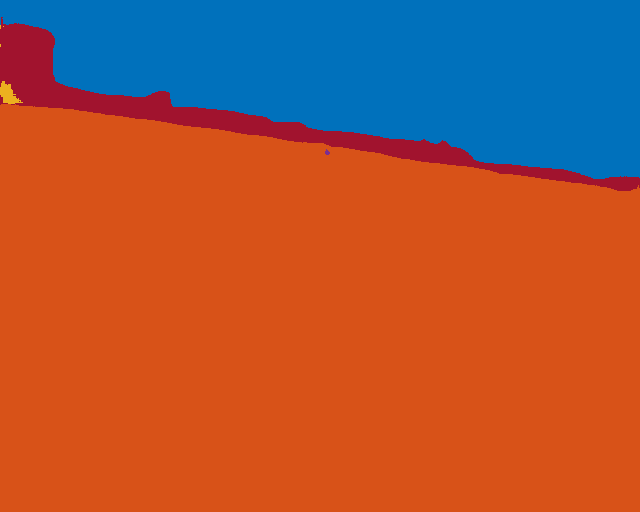

prev=947,i=948
iteration running is 948
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


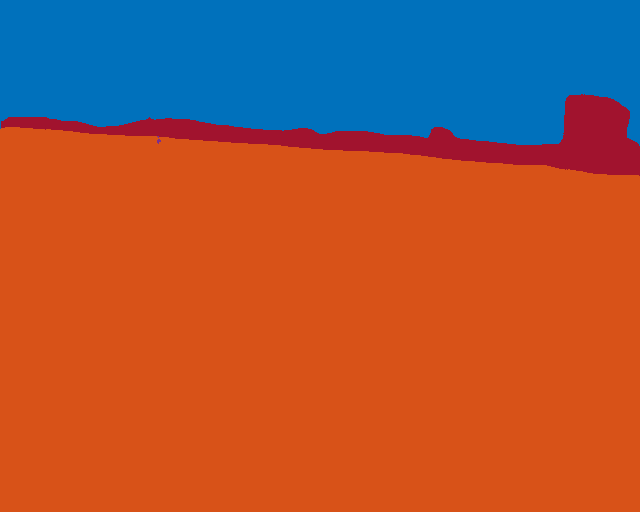

this is the raw image
this is the ground truth mask
this is the colored inferred image


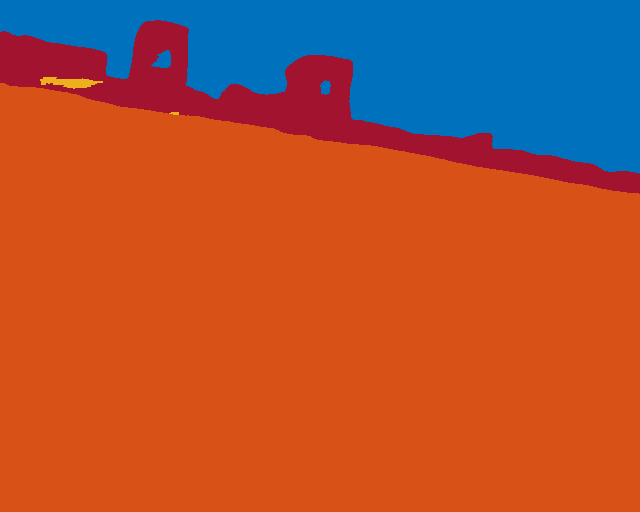

prev=949,i=950
iteration running is 950
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


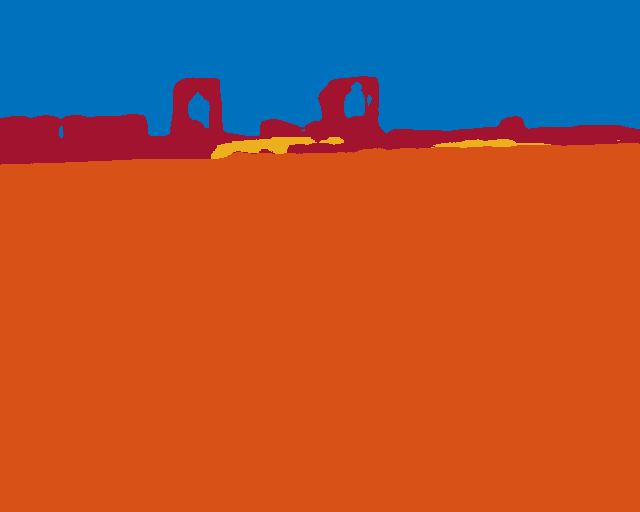

this is the raw image
this is the ground truth mask
this is the colored inferred image


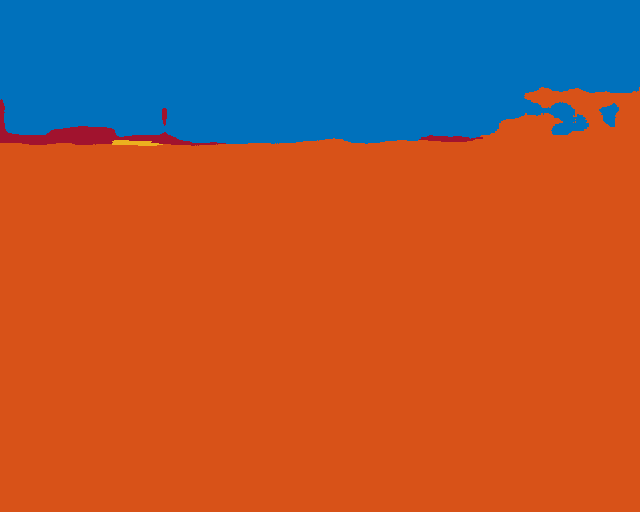

prev=951,i=952
iteration running is 952
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


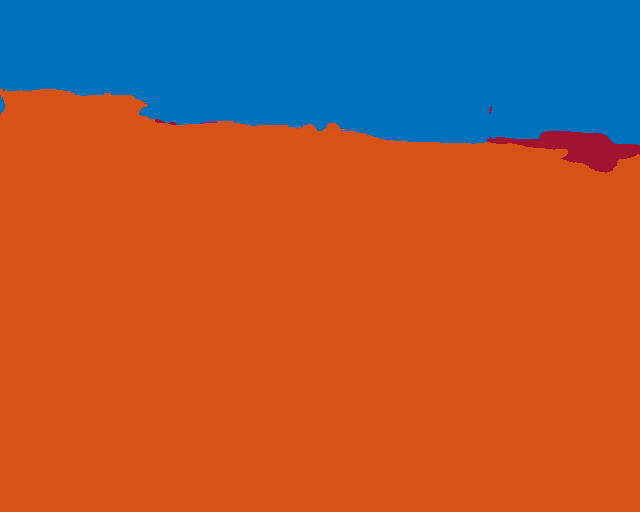

this is the raw image
this is the ground truth mask
this is the colored inferred image


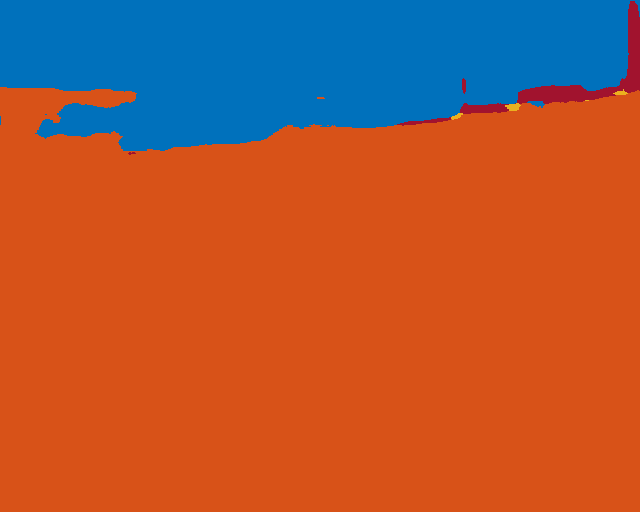

prev=953,i=954
iteration running is 954
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


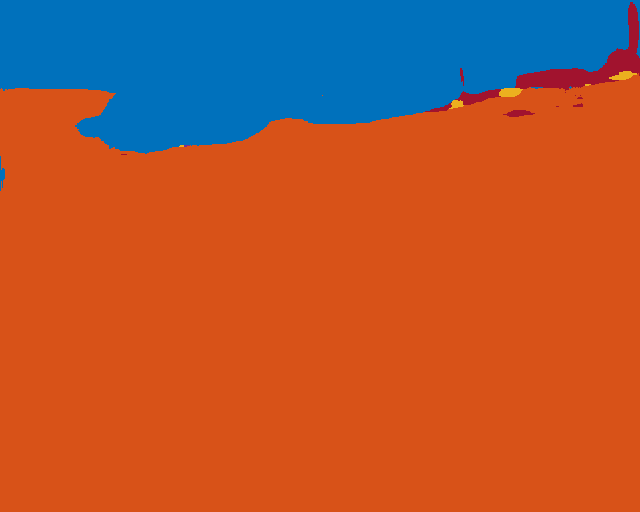

this is the raw image
this is the ground truth mask
this is the colored inferred image


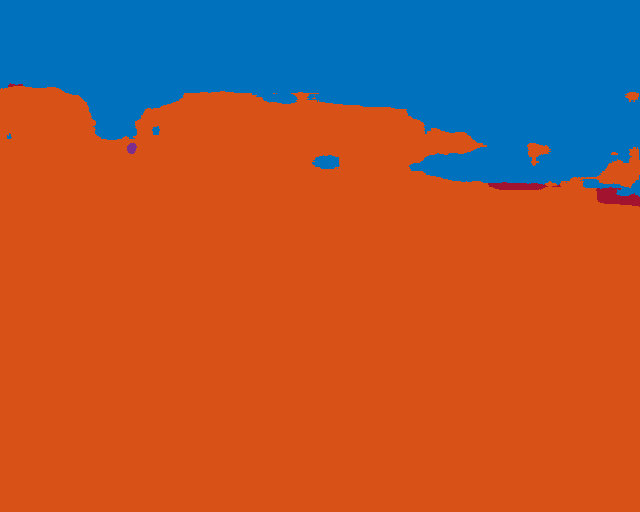

prev=955,i=956
iteration running is 956
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


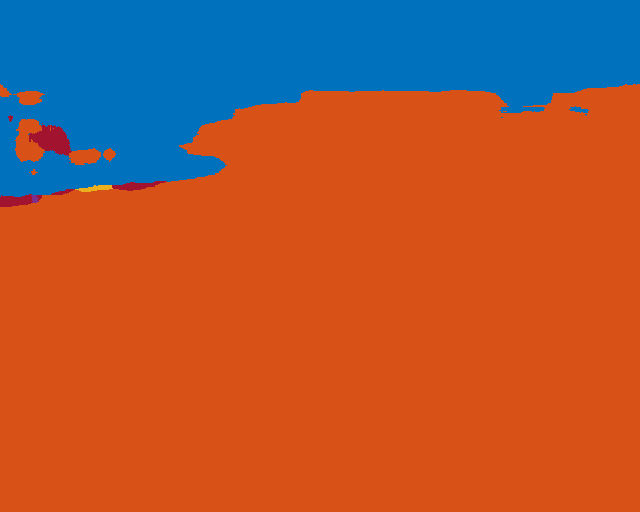

this is the raw image
this is the ground truth mask
this is the colored inferred image


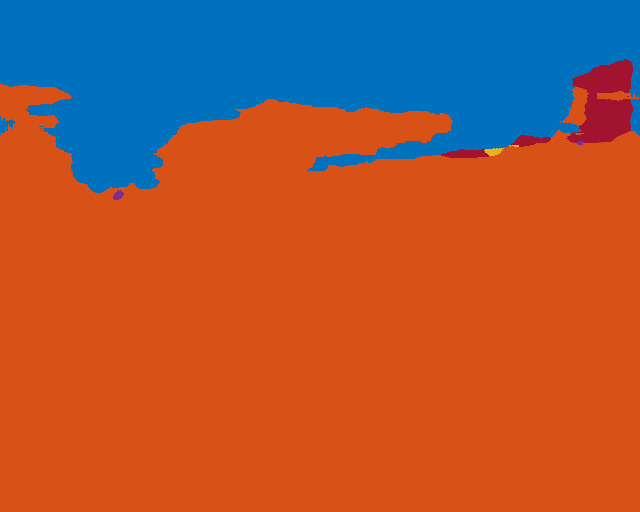

prev=957,i=958
iteration running is 958
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


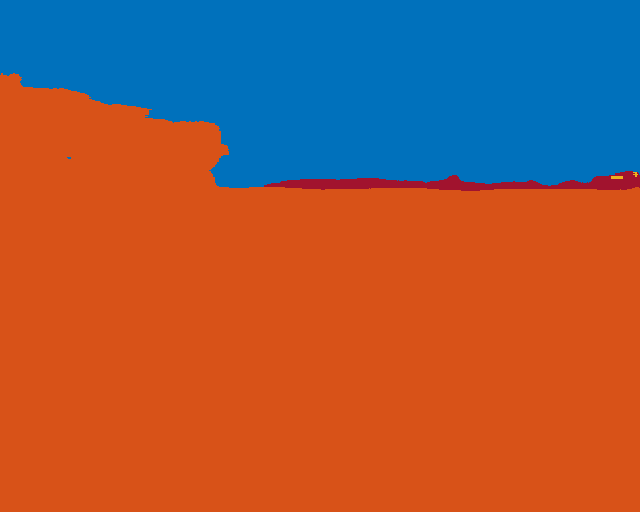

this is the raw image
this is the ground truth mask
this is the colored inferred image


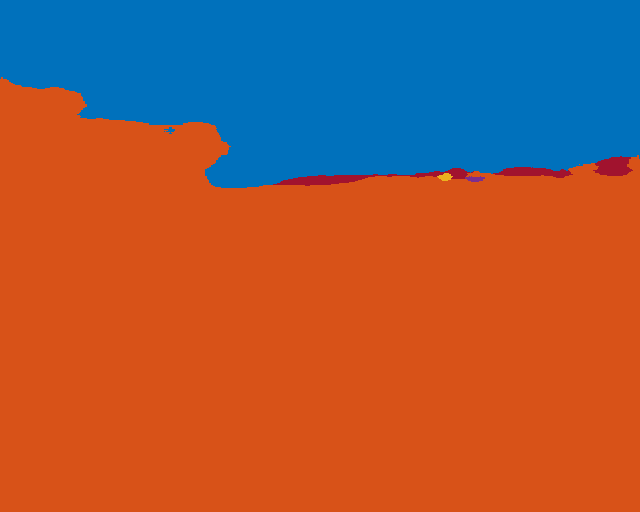

prev=959,i=960
iteration running is 960
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


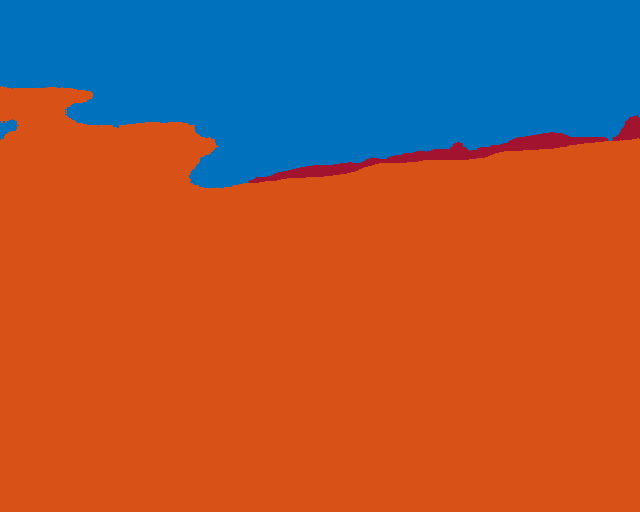

this is the raw image
this is the ground truth mask
this is the colored inferred image


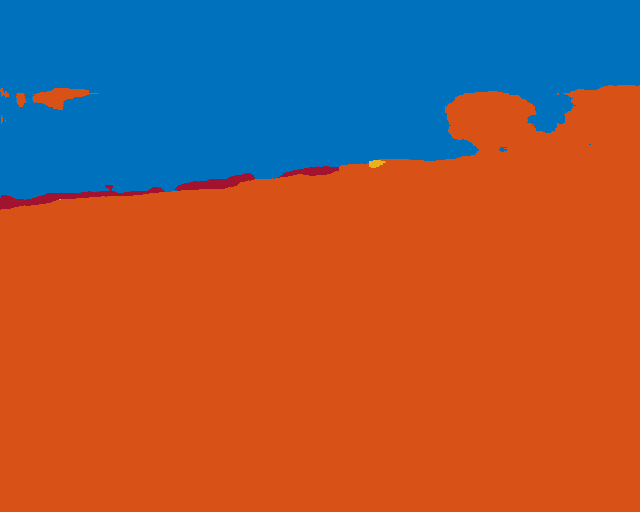

prev=961,i=962
iteration running is 962
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


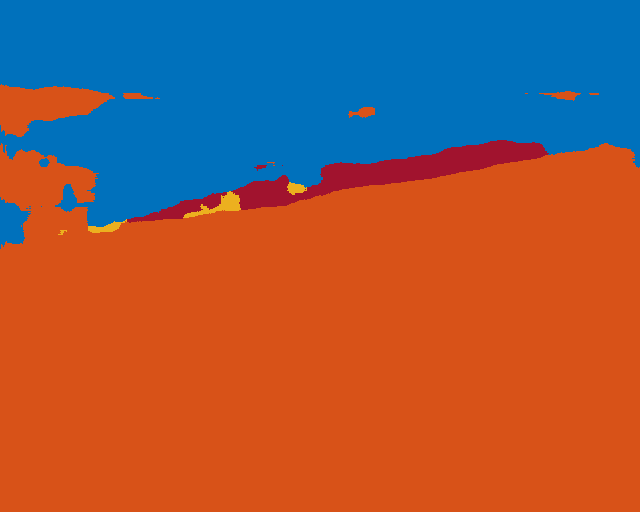

this is the raw image
this is the ground truth mask
this is the colored inferred image


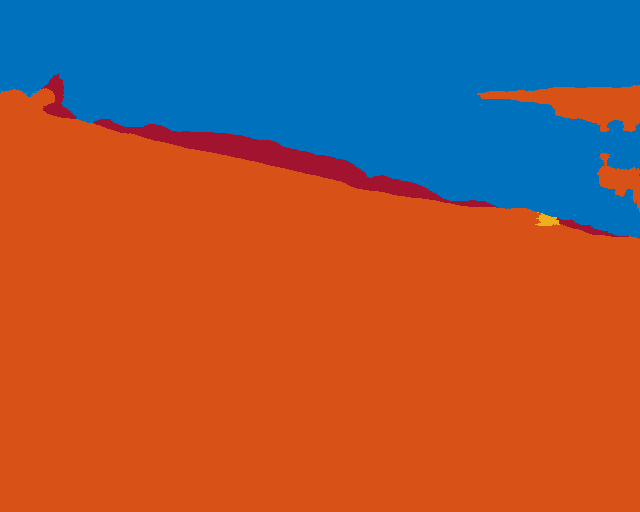

prev=963,i=964
iteration running is 964
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


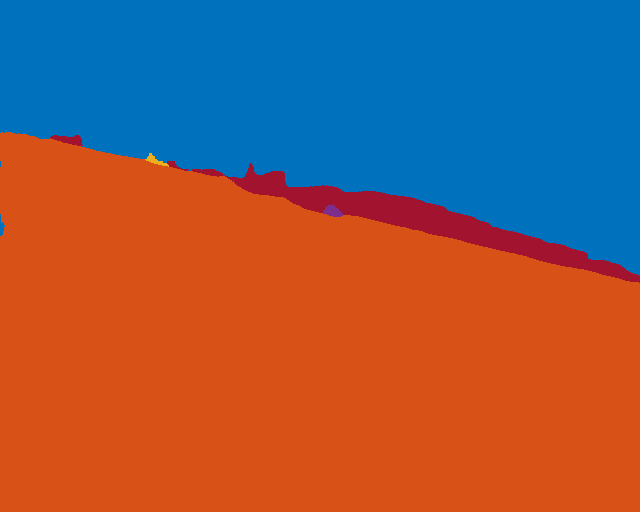

this is the raw image
this is the ground truth mask
this is the colored inferred image


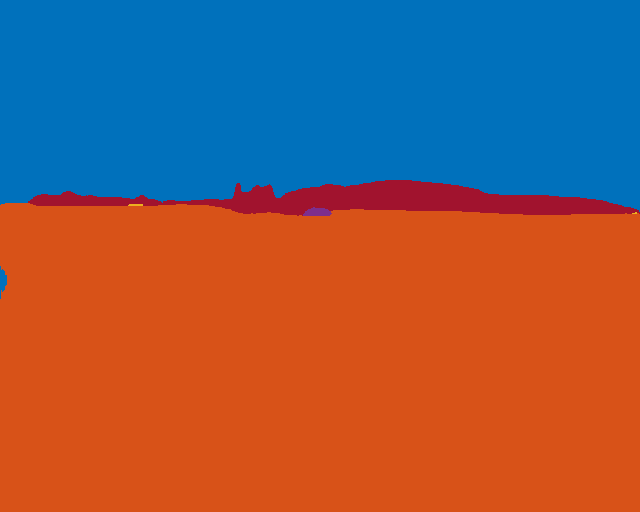

prev=965,i=966
iteration running is 966
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


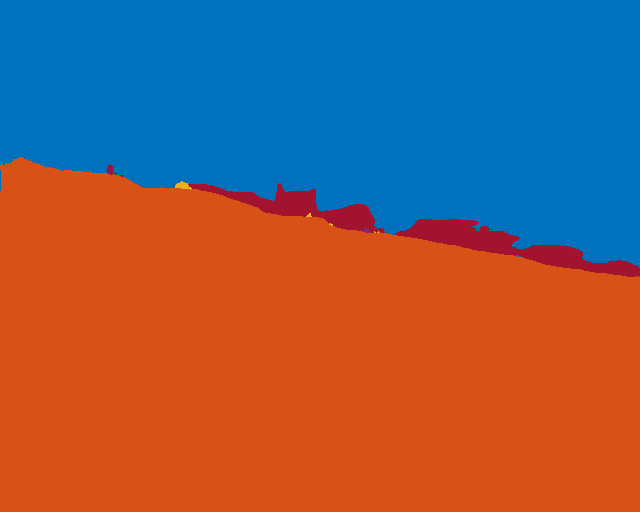

this is the raw image
this is the ground truth mask
this is the colored inferred image


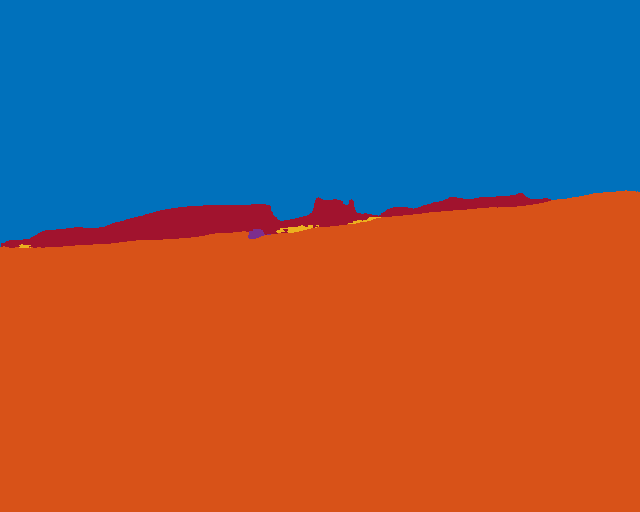

prev=967,i=968
iteration running is 968
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


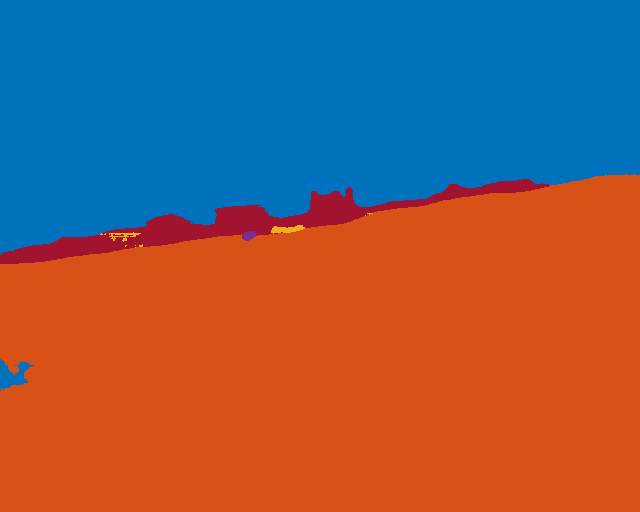

this is the raw image
this is the ground truth mask
this is the colored inferred image


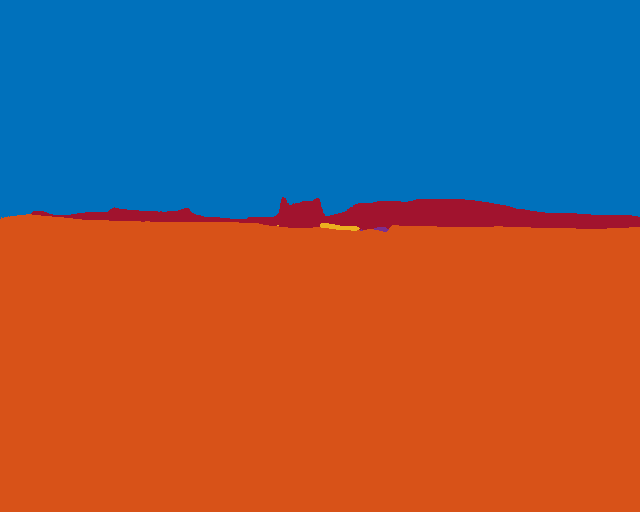

prev=969,i=970
iteration running is 970
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


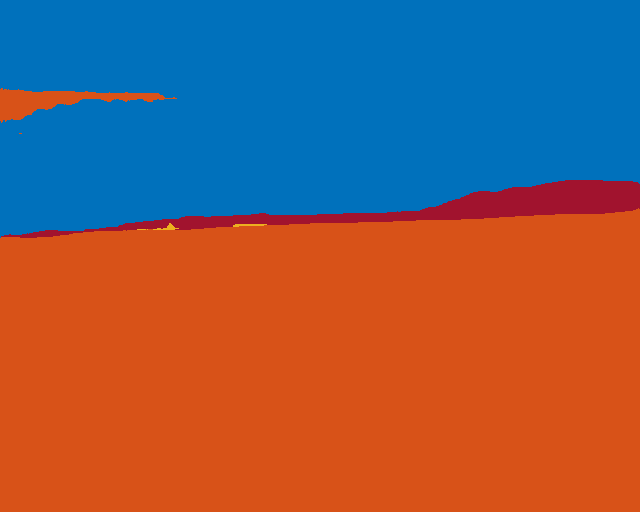

this is the raw image
this is the ground truth mask
this is the colored inferred image


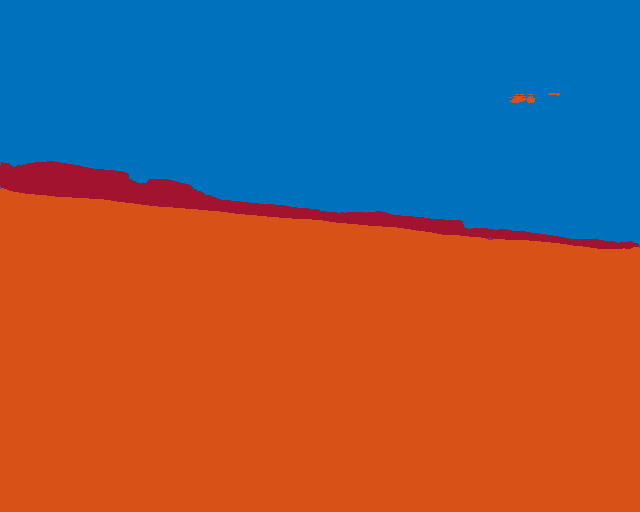

prev=971,i=972
iteration running is 972
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


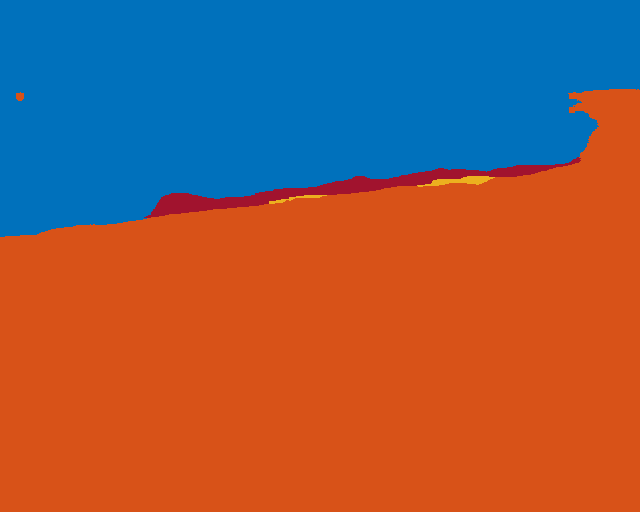

this is the raw image
this is the ground truth mask
this is the colored inferred image


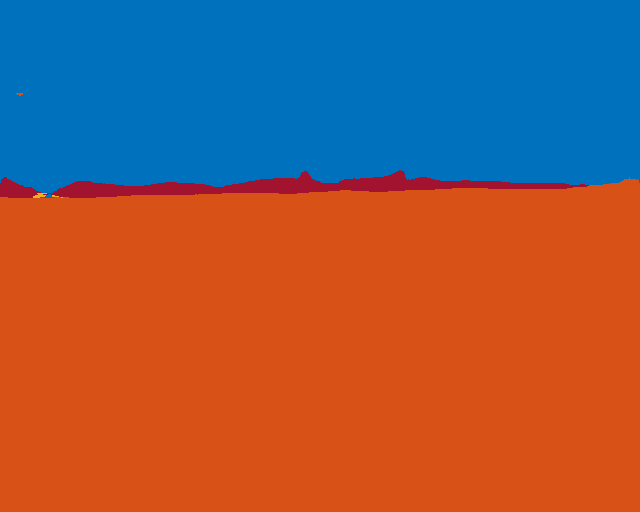

prev=973,i=974
iteration running is 974
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


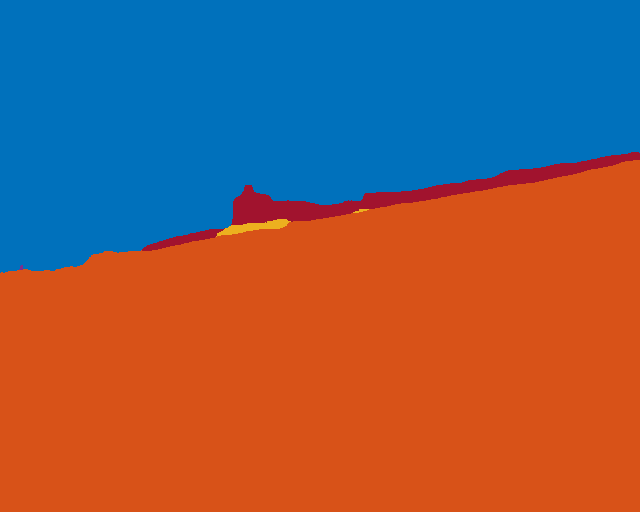

this is the raw image
this is the ground truth mask
this is the colored inferred image


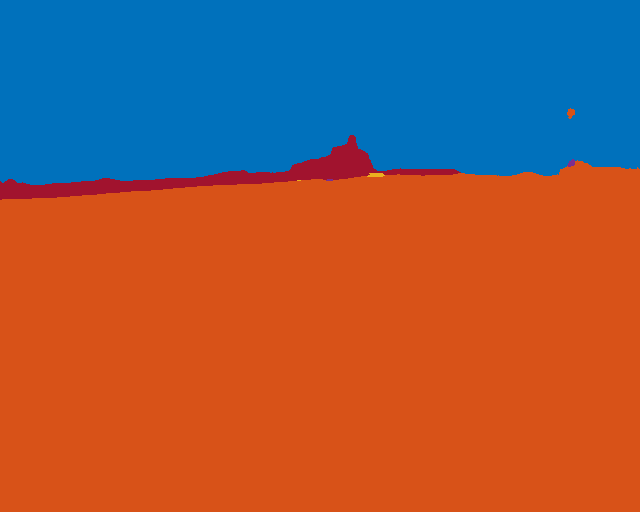

prev=975,i=976
iteration running is 976
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


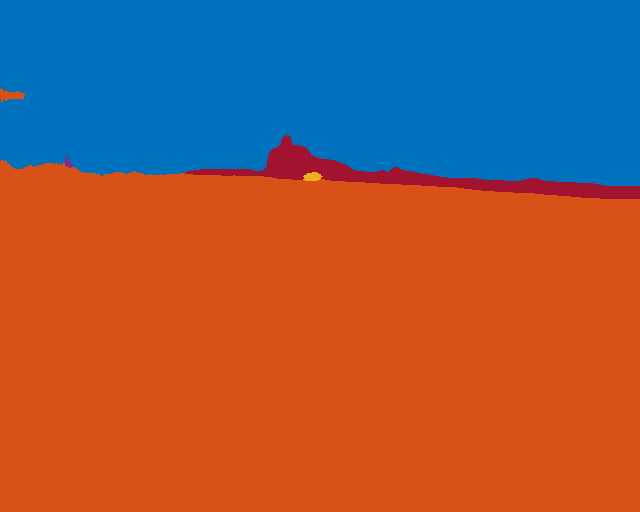

this is the raw image
this is the ground truth mask
this is the colored inferred image


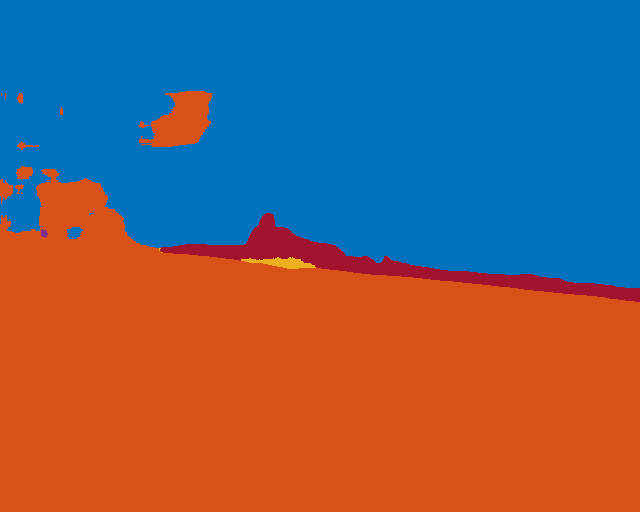

prev=977,i=978
iteration running is 978
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


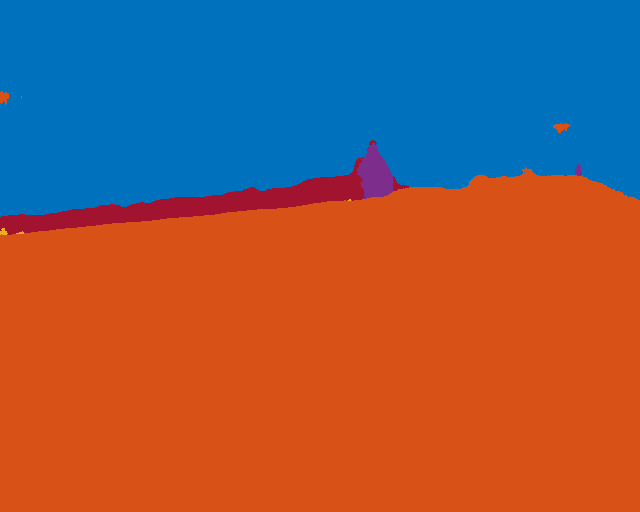

this is the raw image
this is the ground truth mask
this is the colored inferred image


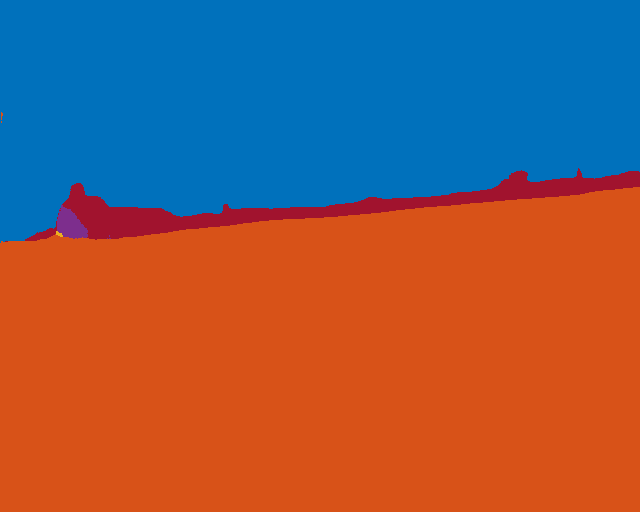

prev=979,i=980
iteration running is 980
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


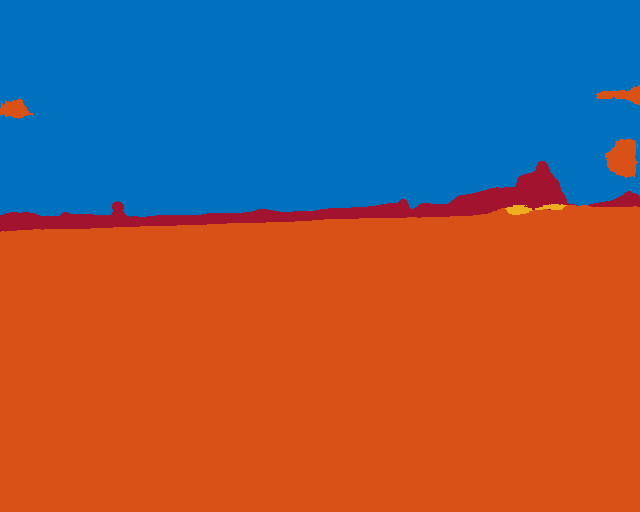

this is the raw image
this is the ground truth mask
this is the colored inferred image


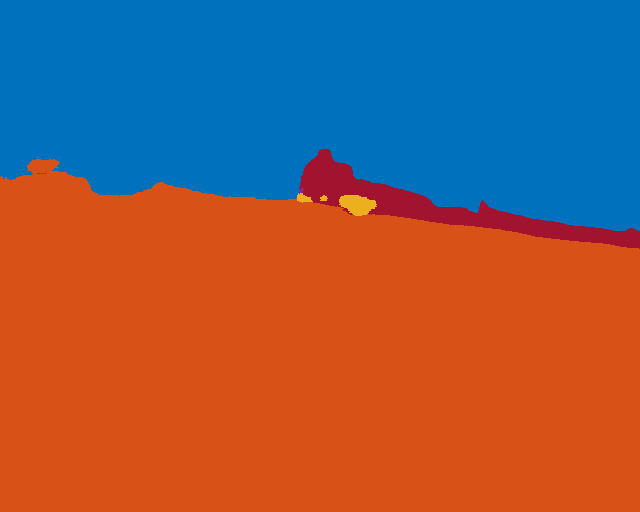

prev=981,i=982
iteration running is 982
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


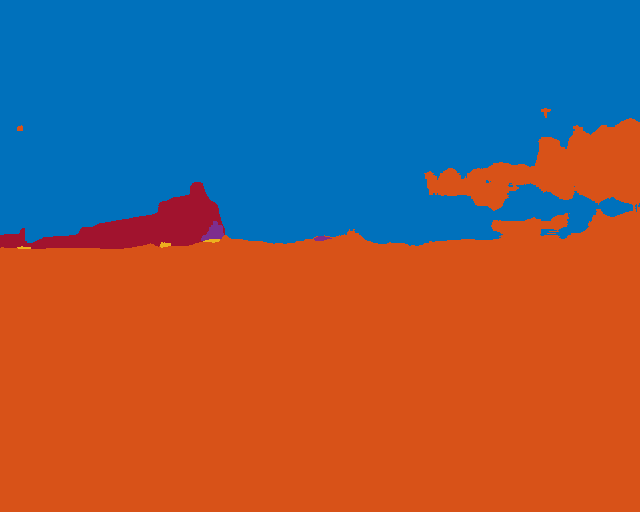

this is the raw image
this is the ground truth mask
this is the colored inferred image


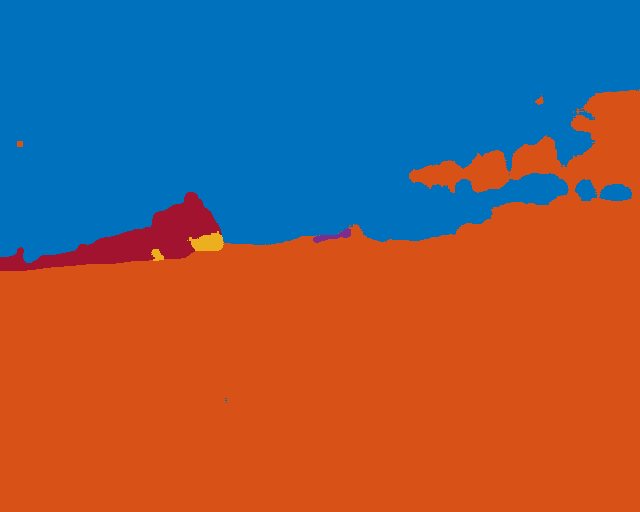

prev=983,i=984
iteration running is 984
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


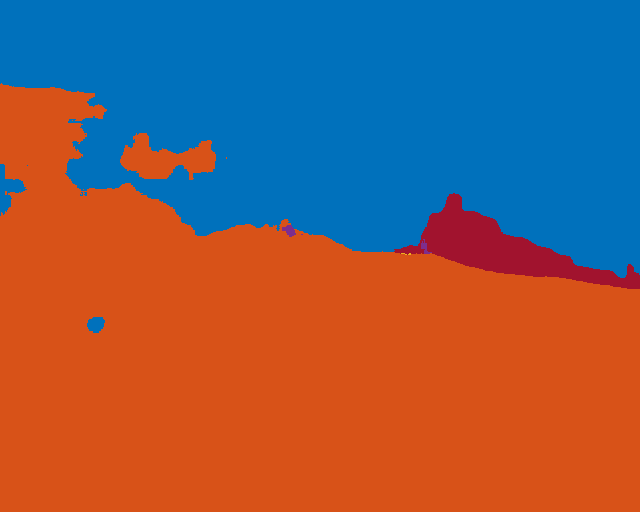

this is the raw image
this is the ground truth mask
this is the colored inferred image


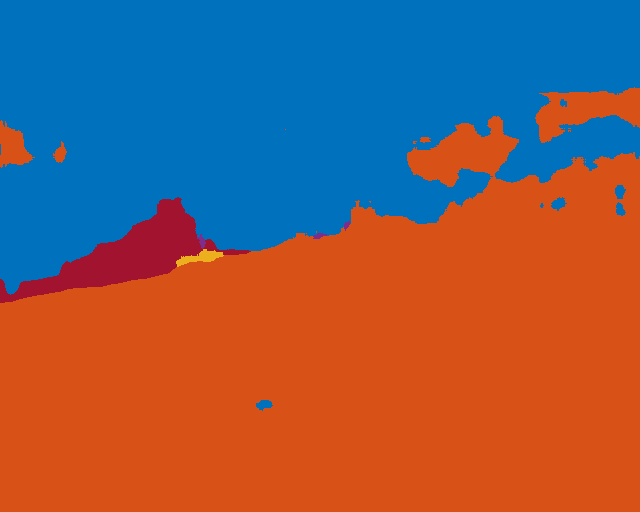

prev=985,i=986
iteration running is 986
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


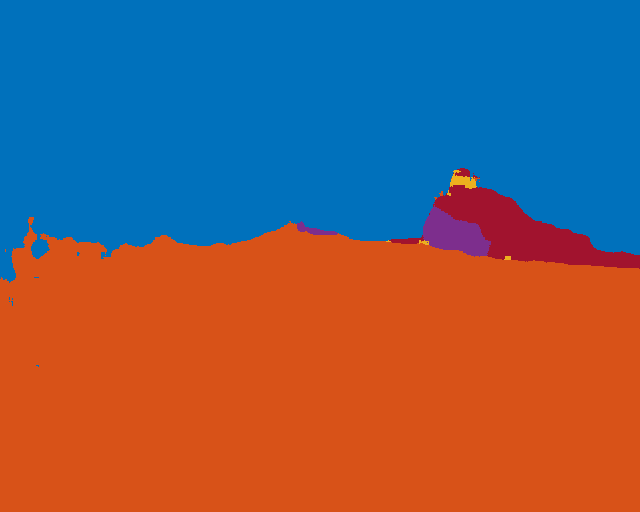

this is the raw image
this is the ground truth mask
this is the colored inferred image


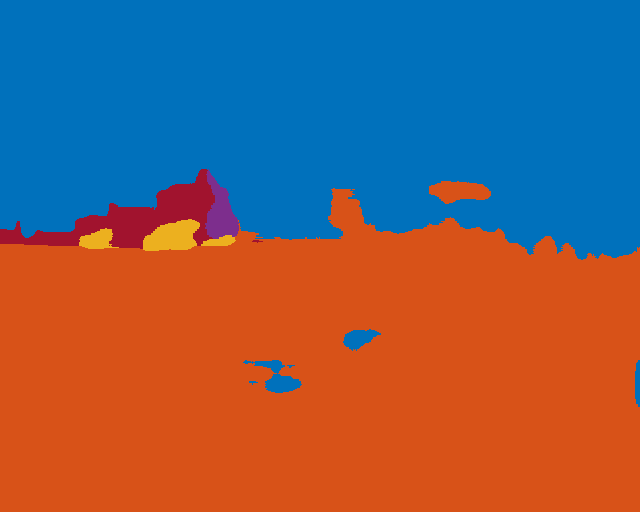

prev=987,i=988
iteration running is 988
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


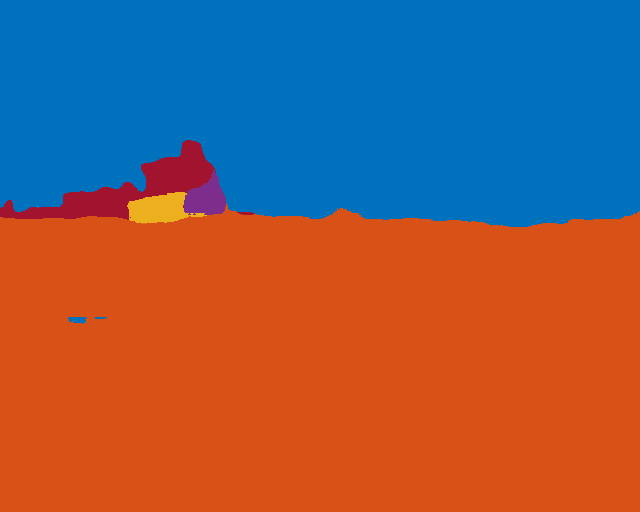

this is the raw image
this is the ground truth mask
this is the colored inferred image


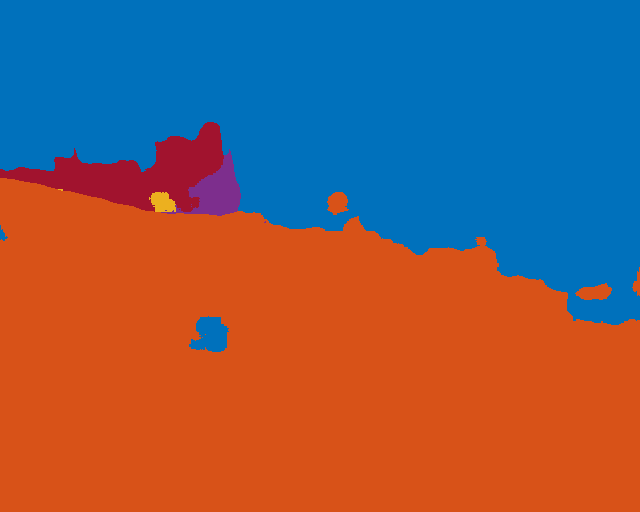

prev=989,i=990
iteration running is 990
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


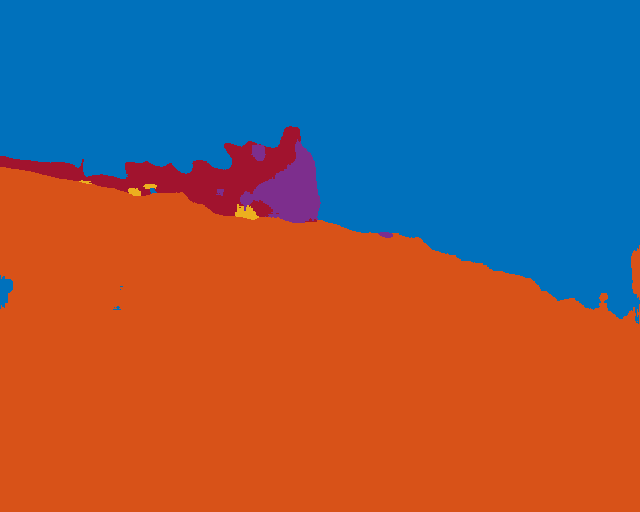

this is the raw image
this is the ground truth mask
this is the colored inferred image


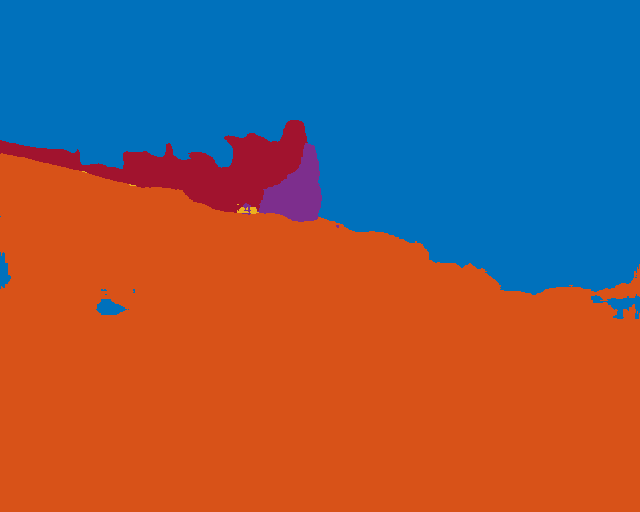

prev=991,i=992
iteration running is 992
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


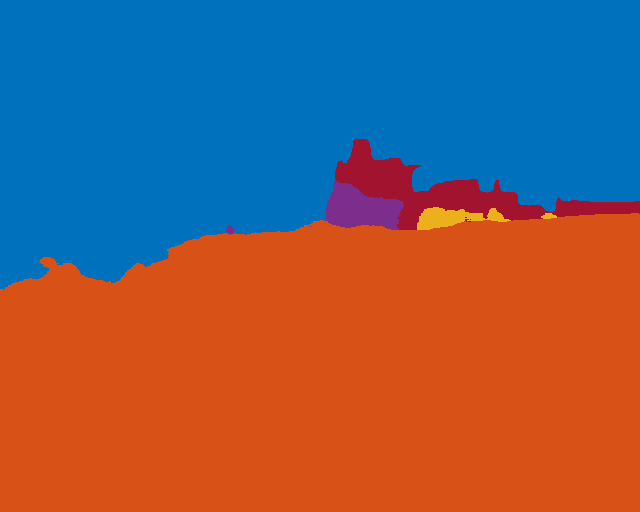

this is the raw image
this is the ground truth mask
this is the colored inferred image


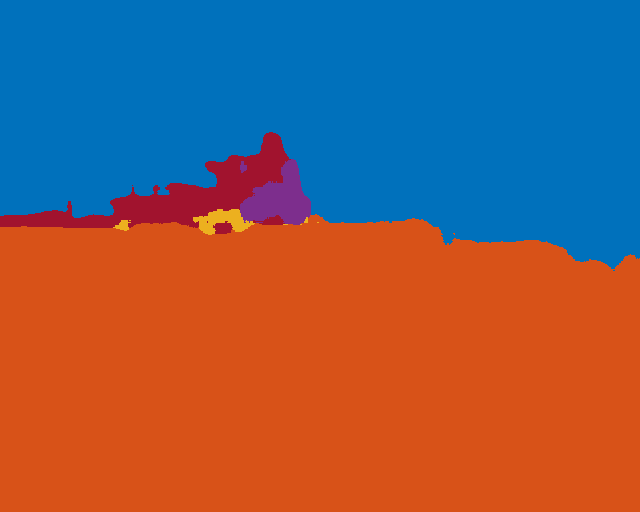

prev=993,i=994
iteration running is 994
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


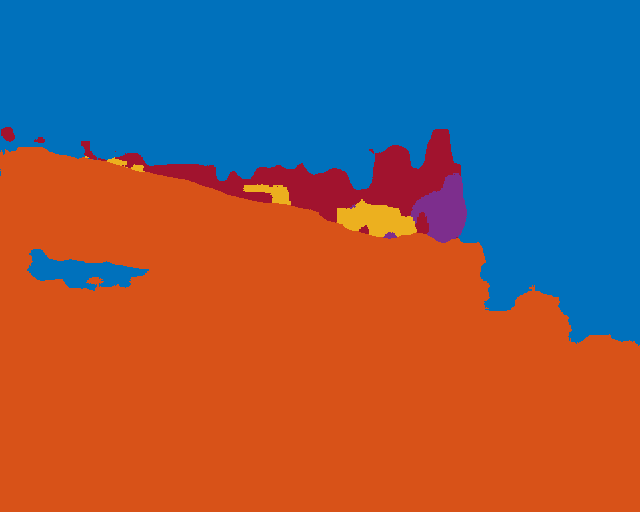

this is the raw image
this is the ground truth mask
this is the colored inferred image


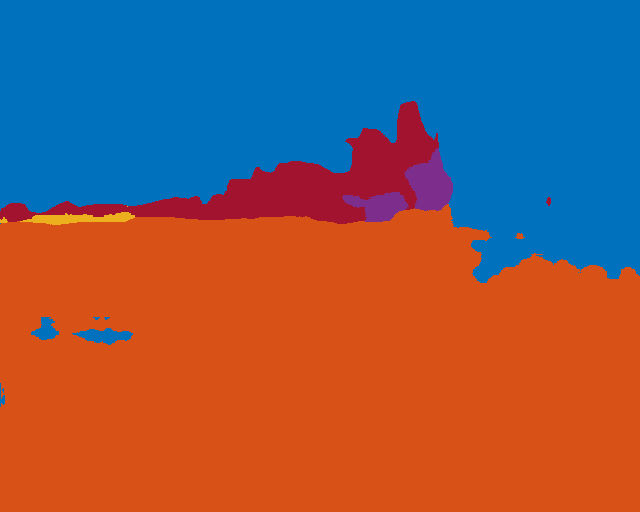

prev=995,i=996
iteration running is 996
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


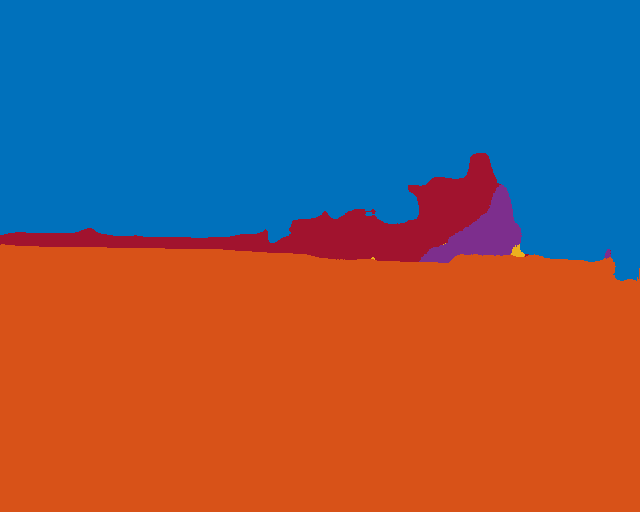

this is the raw image
this is the ground truth mask
this is the colored inferred image


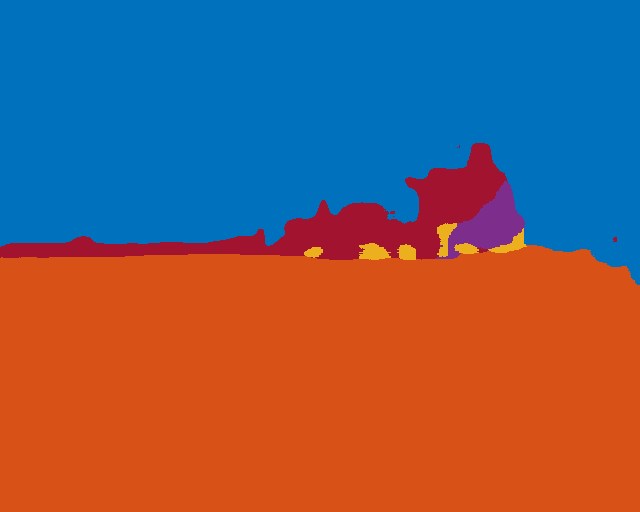

prev=997,i=998
iteration running is 998
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


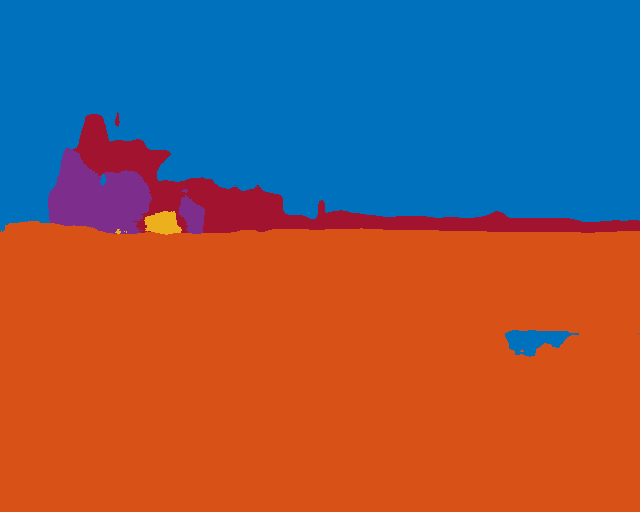

this is the raw image
this is the ground truth mask
this is the colored inferred image


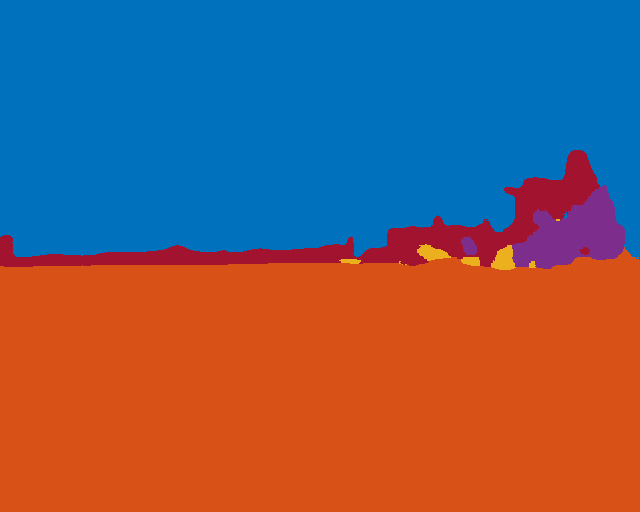

prev=999,i=1000
iteration running is 1000
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


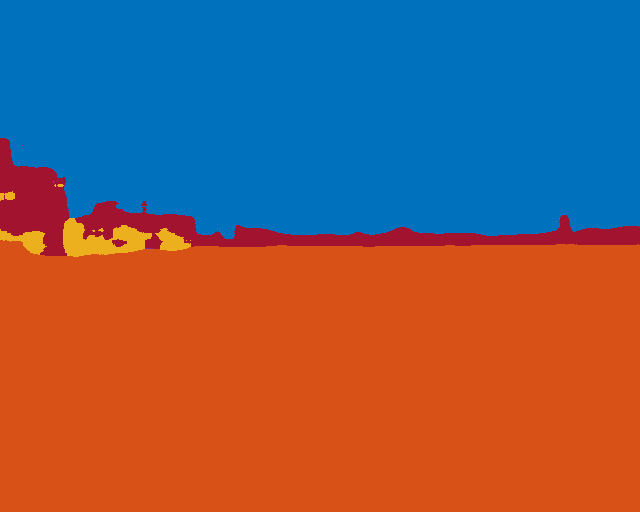

this is the raw image
this is the ground truth mask
this is the colored inferred image


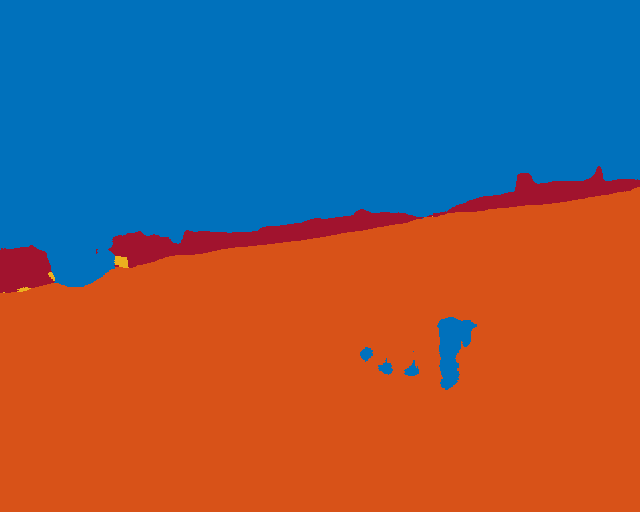

prev=1001,i=1002
iteration running is 1002
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


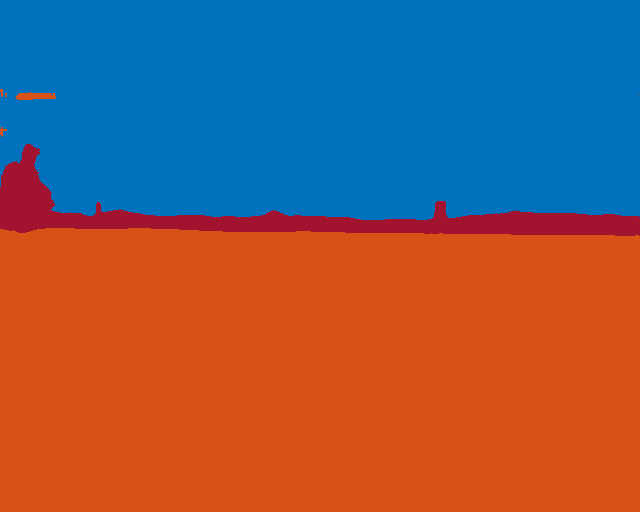

this is the raw image
this is the ground truth mask
this is the colored inferred image


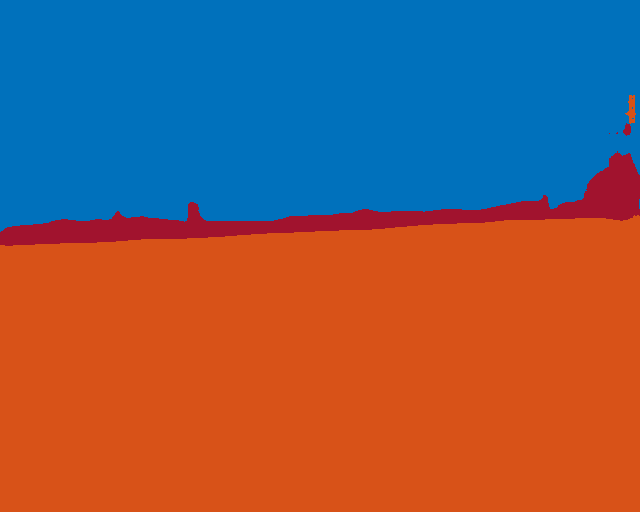

prev=1003,i=1004
iteration running is 1004
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


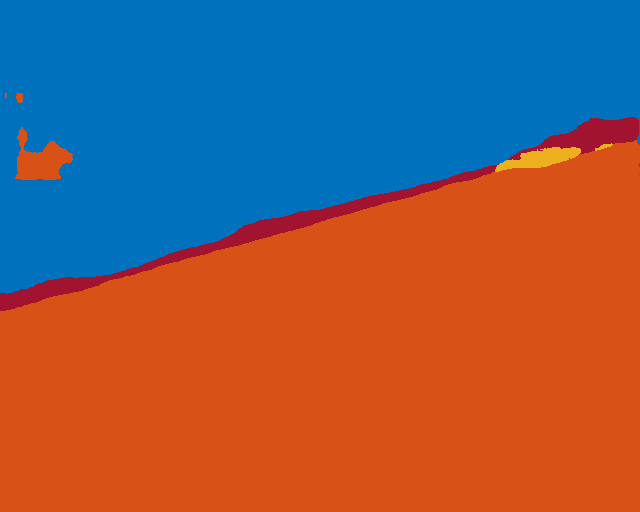

this is the raw image
this is the ground truth mask
this is the colored inferred image


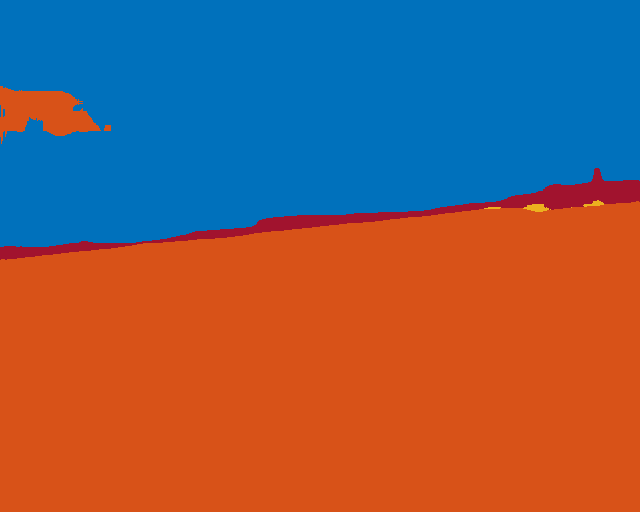

prev=1005,i=1006
iteration running is 1006
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


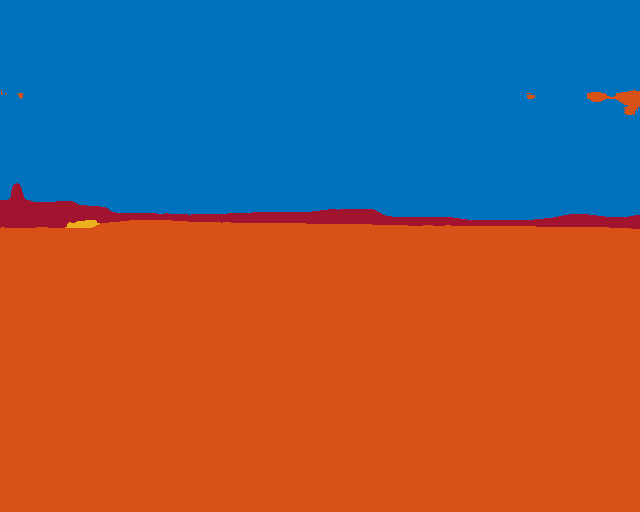

this is the raw image
this is the ground truth mask
this is the colored inferred image


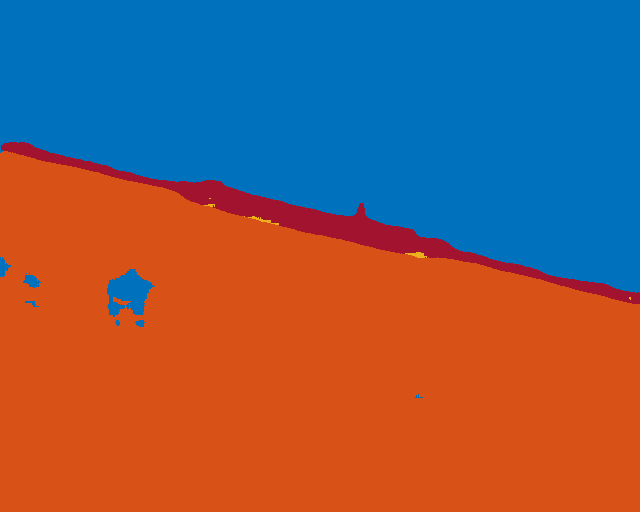

prev=1007,i=1008
iteration running is 1008
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


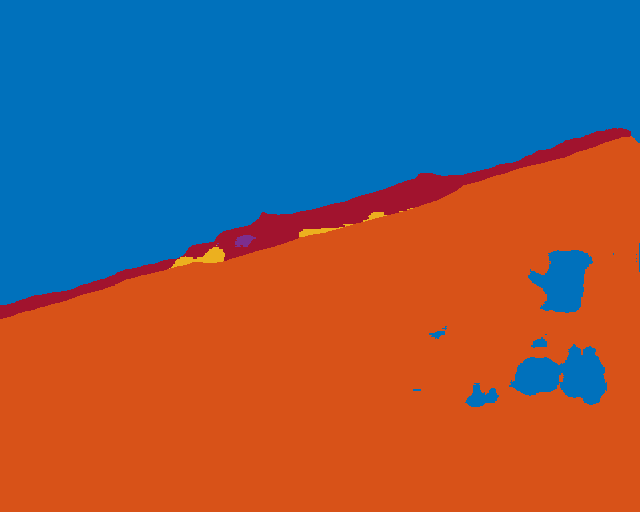

this is the raw image
this is the ground truth mask
this is the colored inferred image


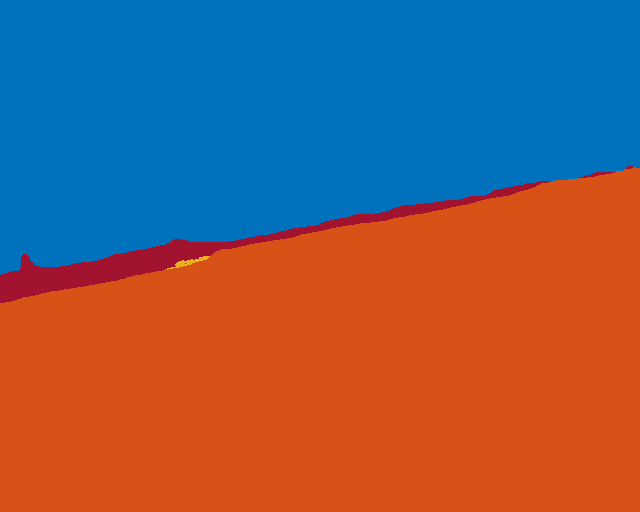

prev=1009,i=1010
iteration running is 1010
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


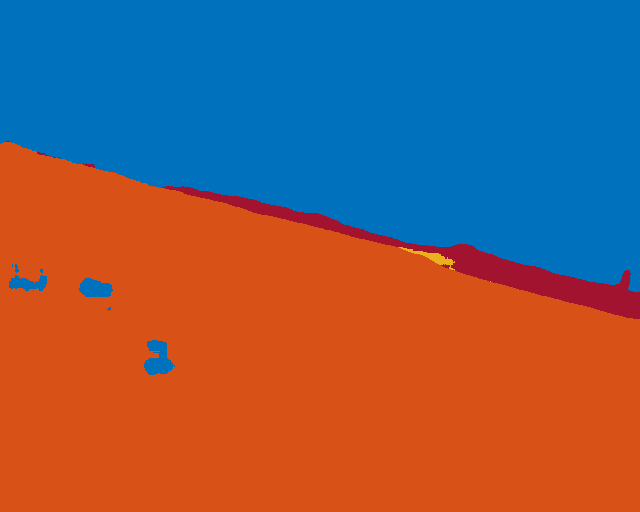

this is the raw image
this is the ground truth mask
this is the colored inferred image


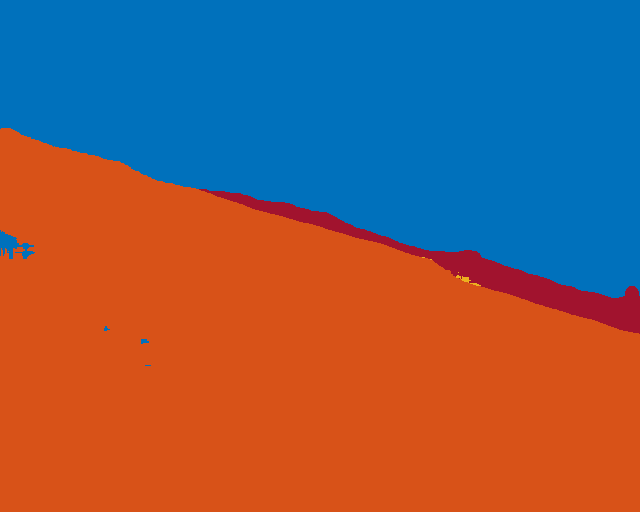

prev=1011,i=1012
iteration running is 1012
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


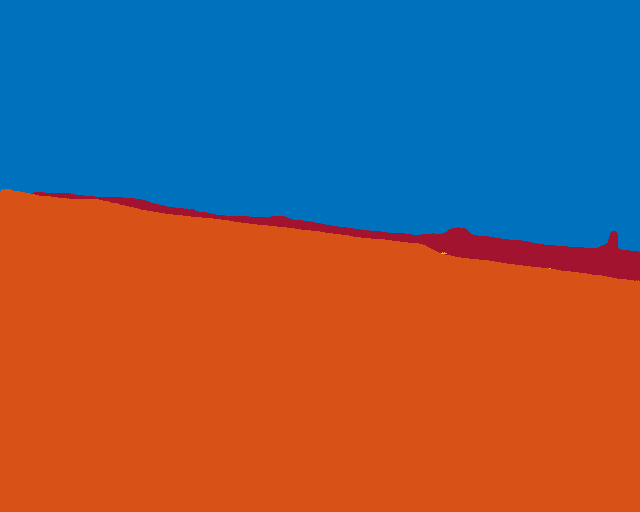

this is the raw image
this is the ground truth mask
this is the colored inferred image


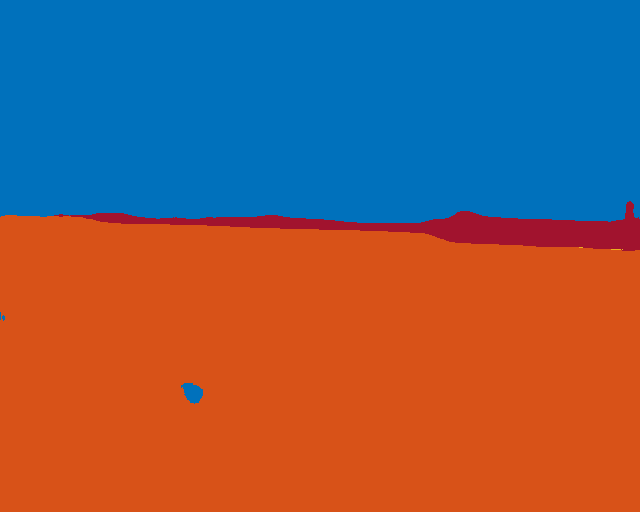

prev=1013,i=1014
iteration running is 1014
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


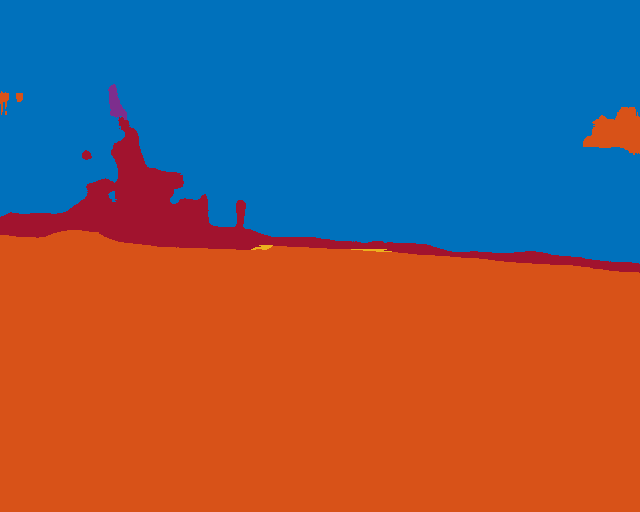

this is the raw image
this is the ground truth mask
this is the colored inferred image


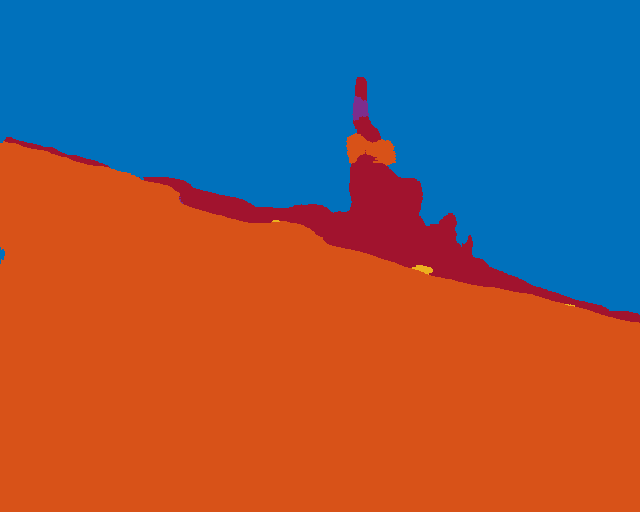

prev=1015,i=1016
iteration running is 1016
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


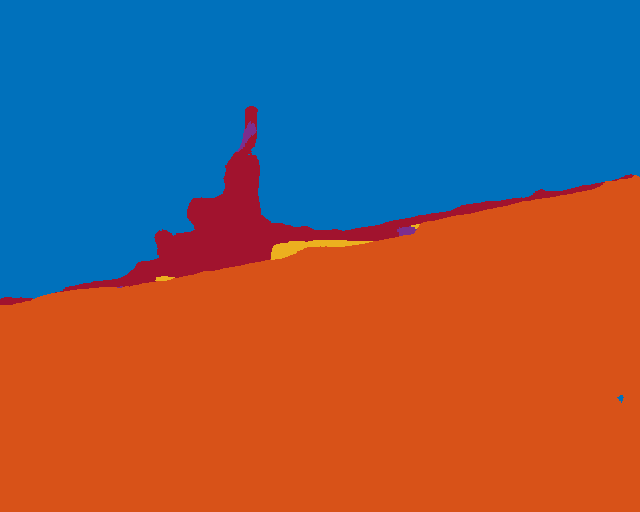

this is the raw image
this is the ground truth mask
this is the colored inferred image


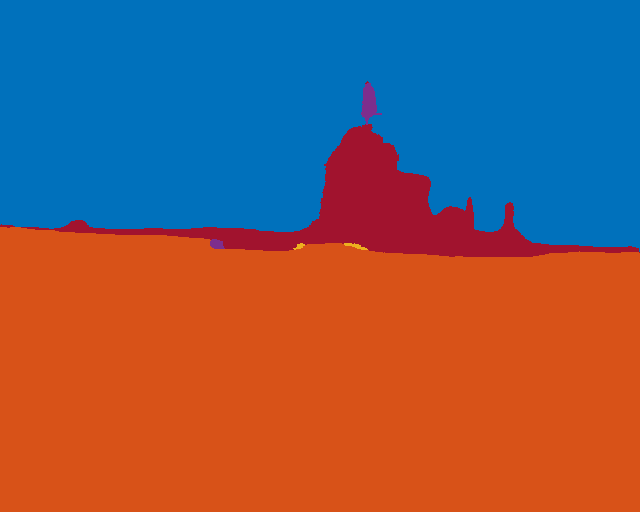

prev=1017,i=1018
iteration running is 1018
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


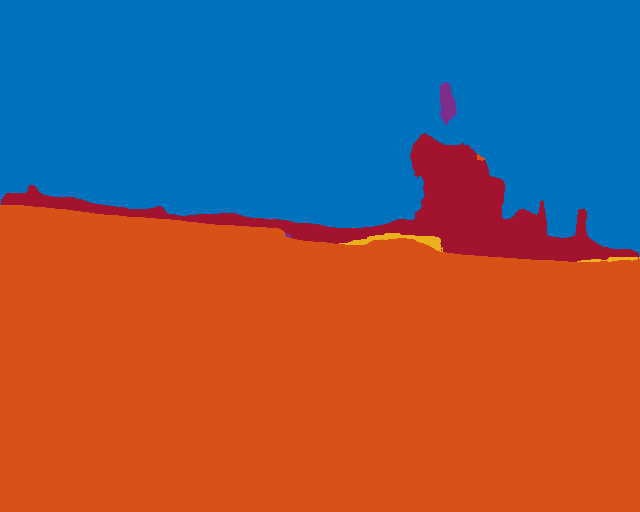

this is the raw image
this is the ground truth mask
this is the colored inferred image


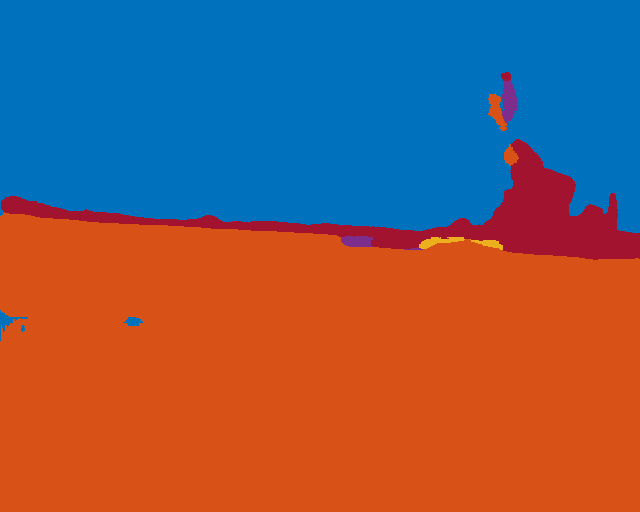

prev=1019,i=1020
iteration running is 1020
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


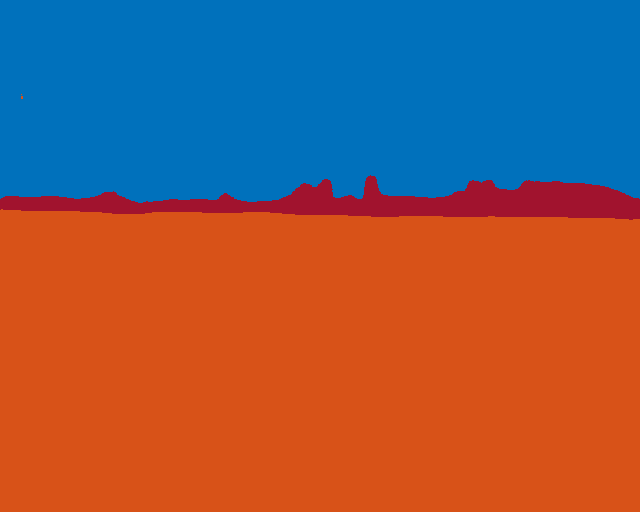

this is the raw image
this is the ground truth mask
this is the colored inferred image


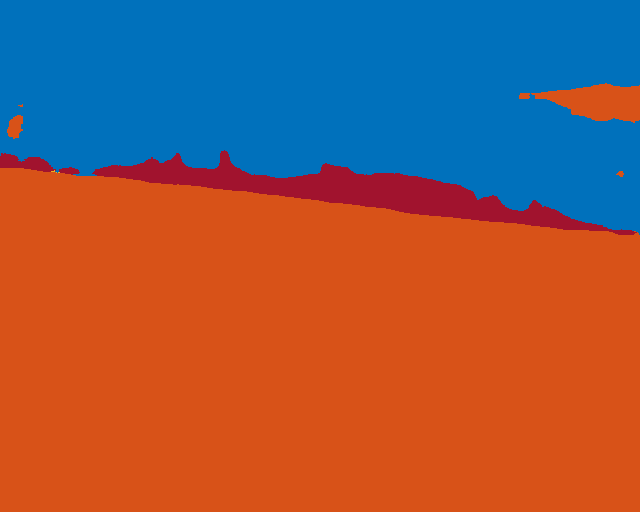

prev=1021,i=1022
iteration running is 1022
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


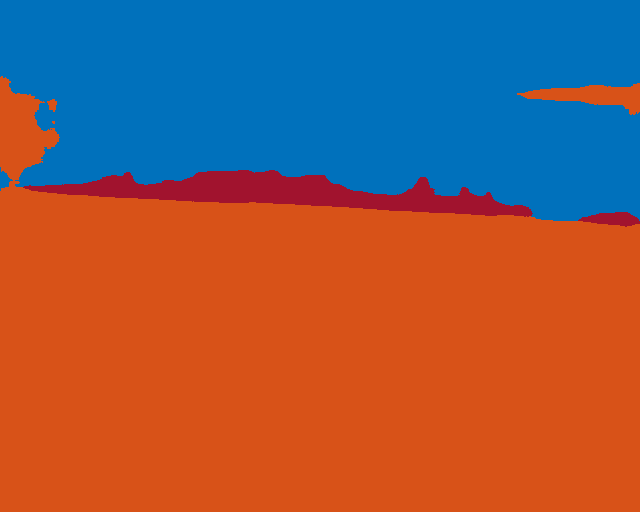

this is the raw image
this is the ground truth mask
this is the colored inferred image


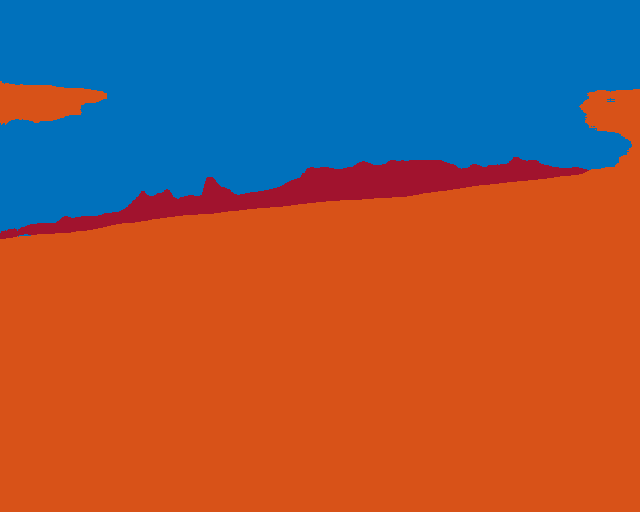

prev=1023,i=1024
iteration running is 1024
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


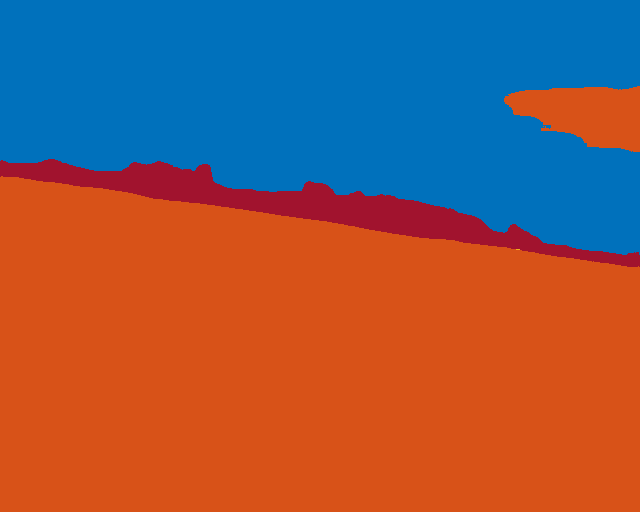

this is the raw image
this is the ground truth mask
this is the colored inferred image


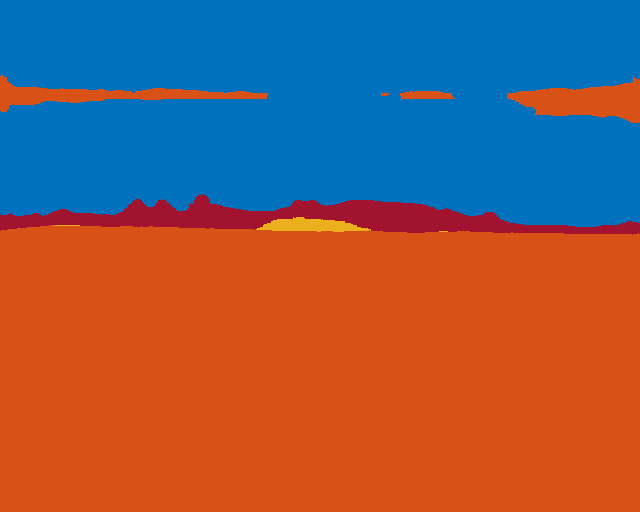

prev=1025,i=1026
iteration running is 1026
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


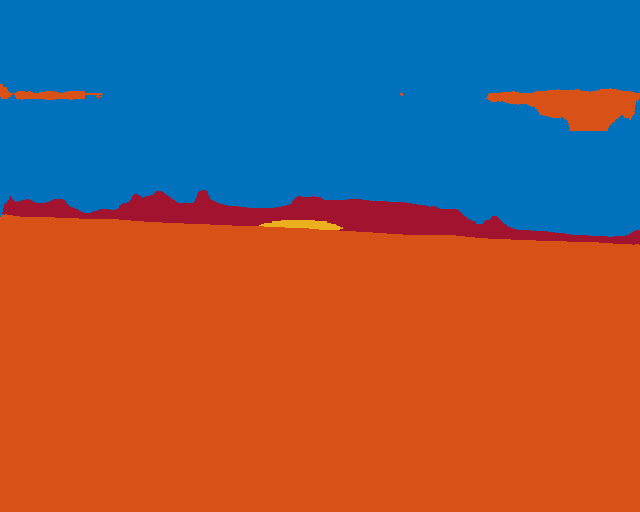

this is the raw image
this is the ground truth mask
this is the colored inferred image


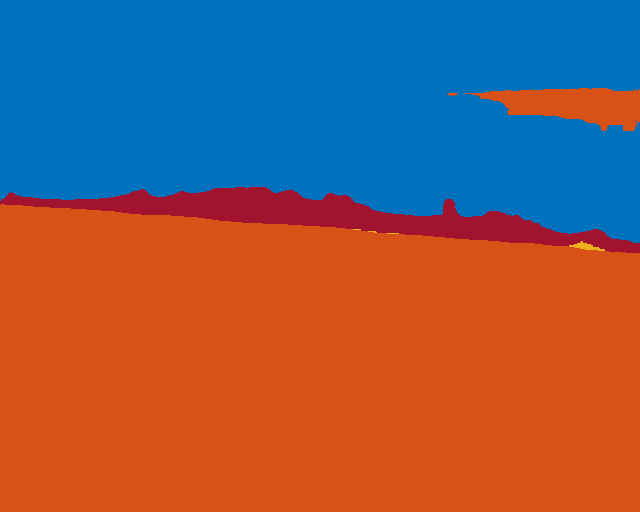

prev=1027,i=1028
iteration running is 1028
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


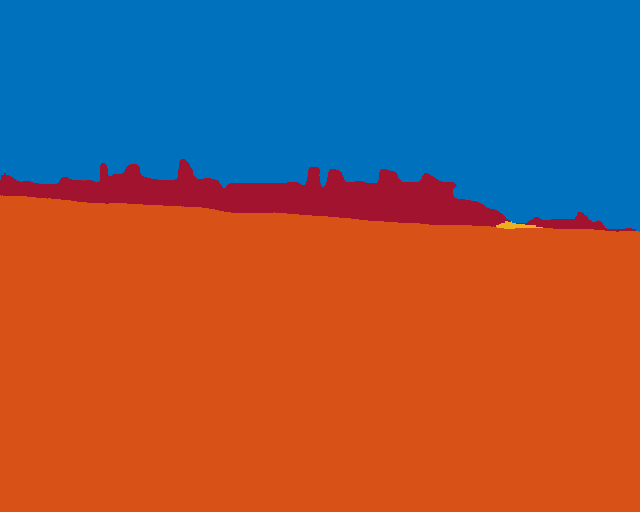

this is the raw image
this is the ground truth mask
this is the colored inferred image


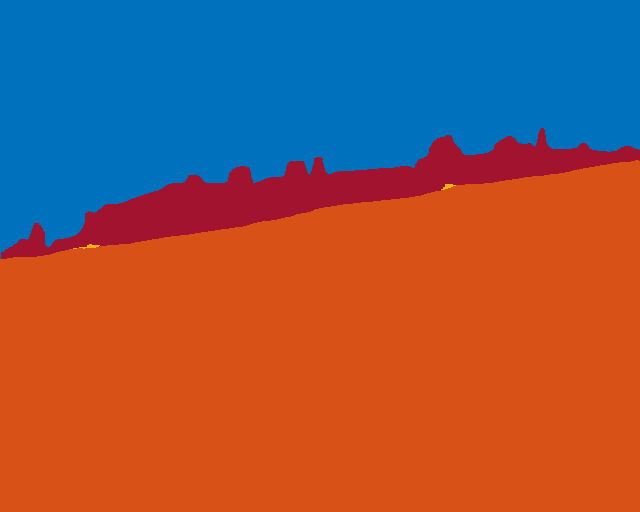

prev=1029,i=1030
iteration running is 1030
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


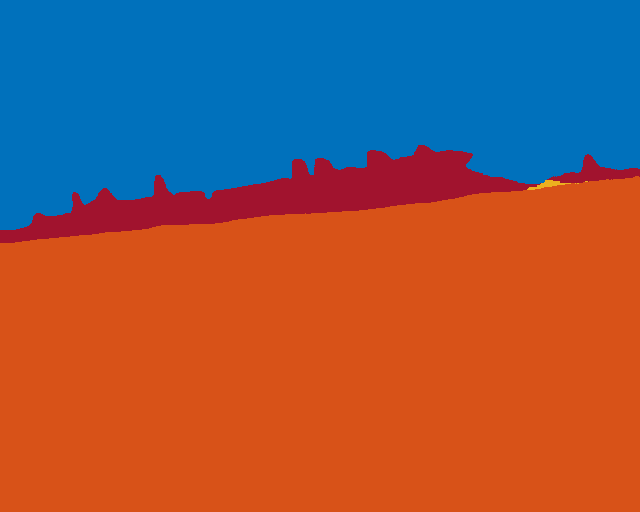

this is the raw image
this is the ground truth mask
this is the colored inferred image


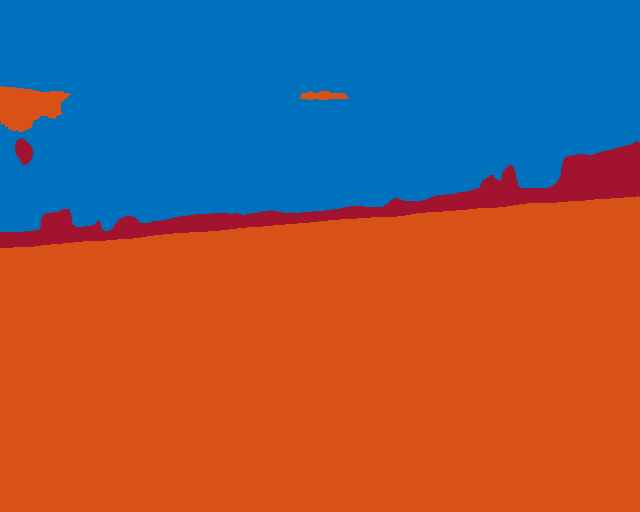

prev=1031,i=1032
iteration running is 1032
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


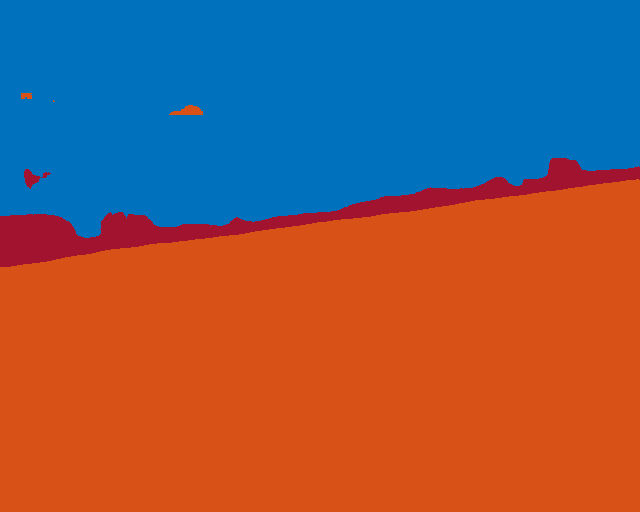

this is the raw image
this is the ground truth mask
this is the colored inferred image


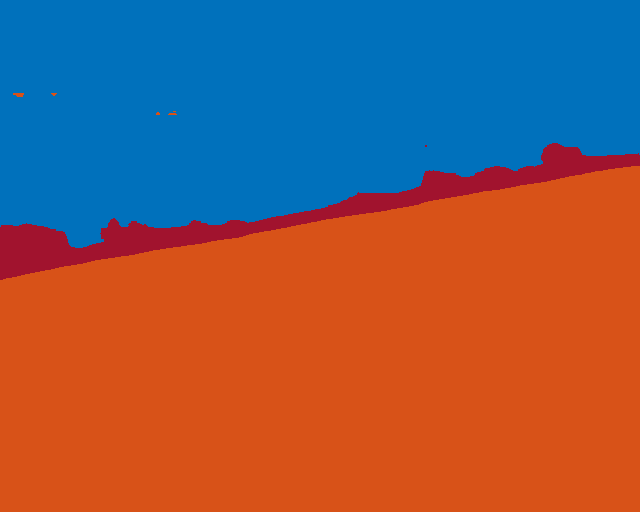

prev=1033,i=1034
iteration running is 1034
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


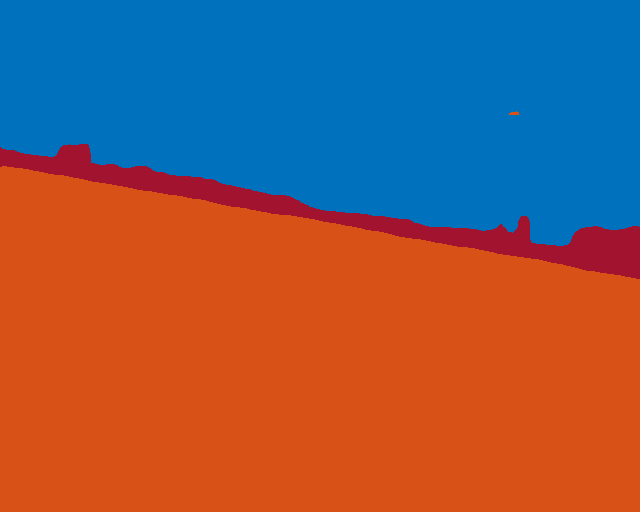

this is the raw image
this is the ground truth mask
this is the colored inferred image


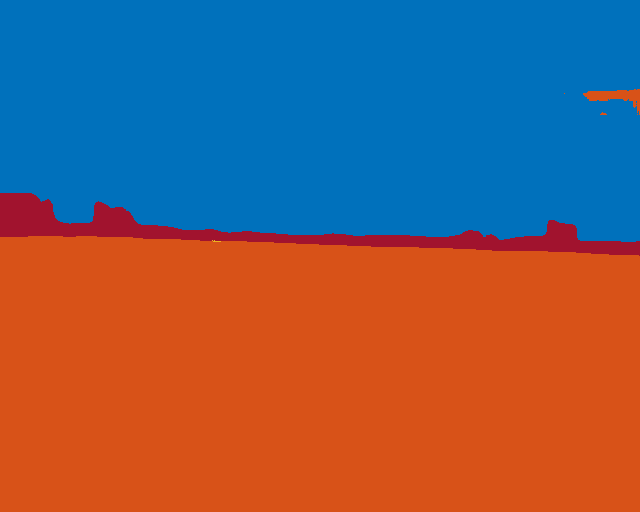

prev=1035,i=1036
iteration running is 1036
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


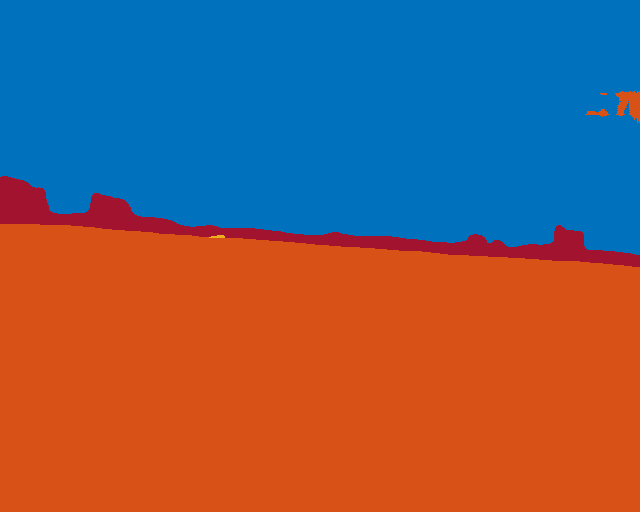

this is the raw image
this is the ground truth mask
this is the colored inferred image


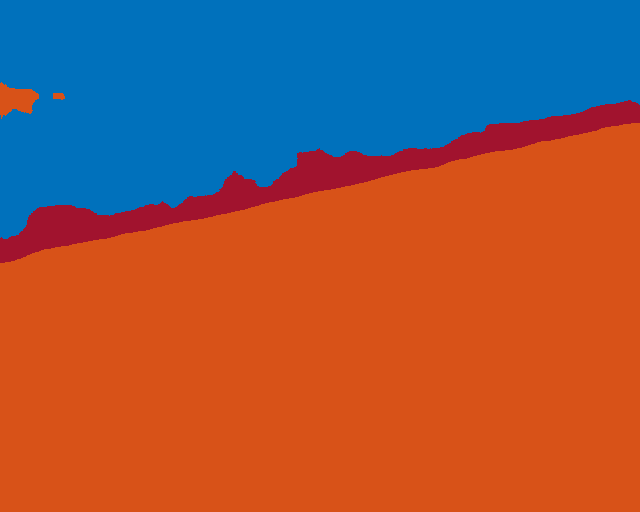

prev=1037,i=1038
iteration running is 1038
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


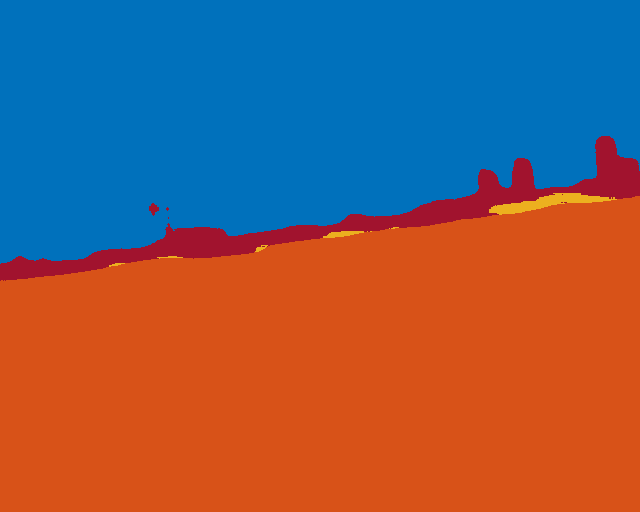

this is the raw image
this is the ground truth mask
this is the colored inferred image


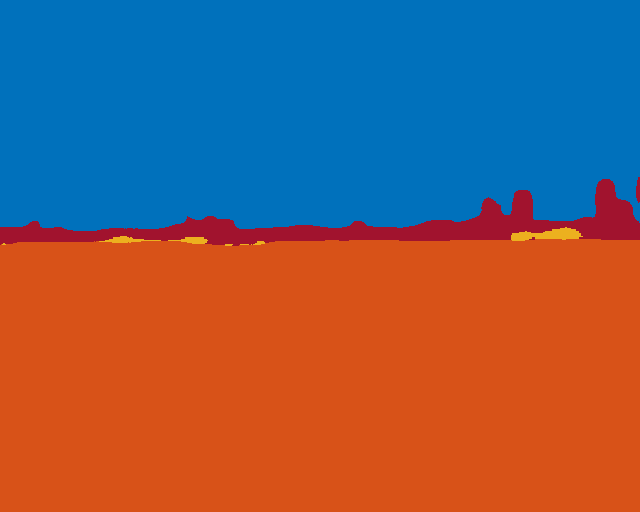

prev=1039,i=1040
iteration running is 1040
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


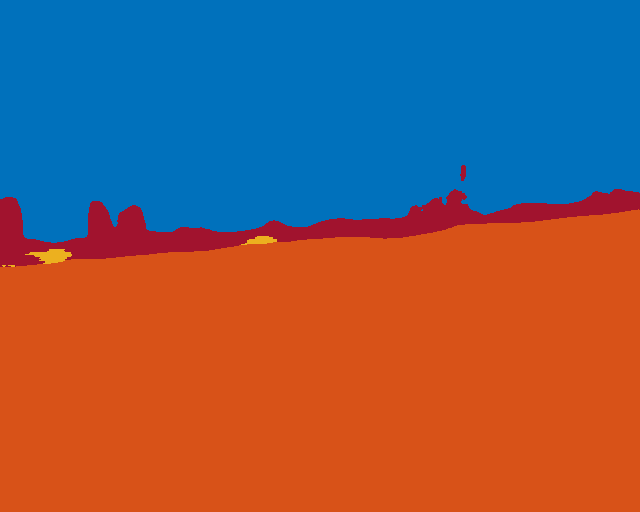

this is the raw image
this is the ground truth mask
this is the colored inferred image


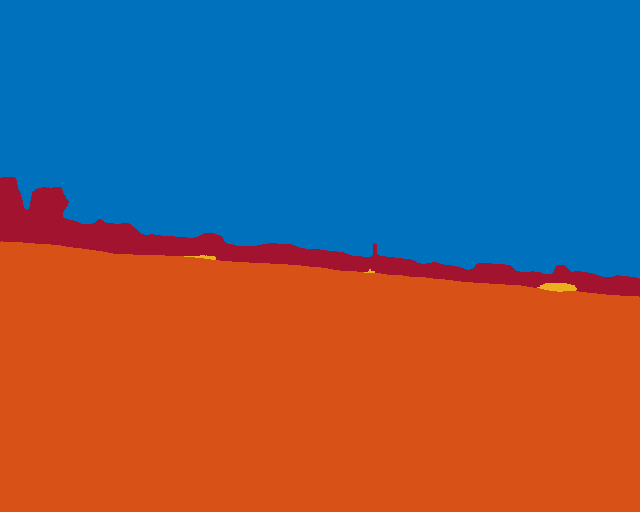

prev=1041,i=1042
iteration running is 1042
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


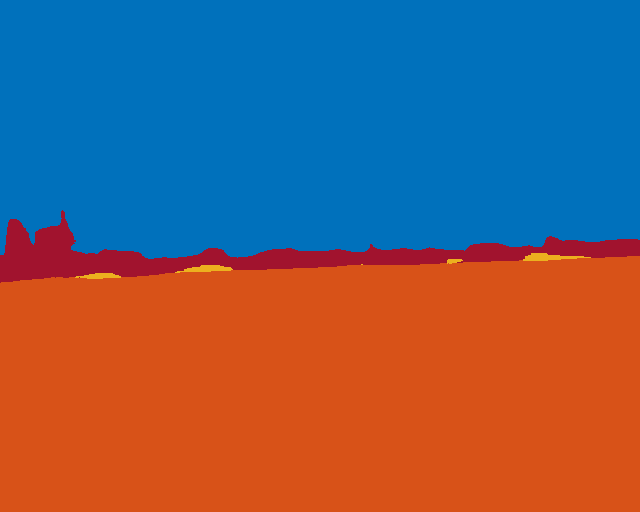

this is the raw image
this is the ground truth mask
this is the colored inferred image


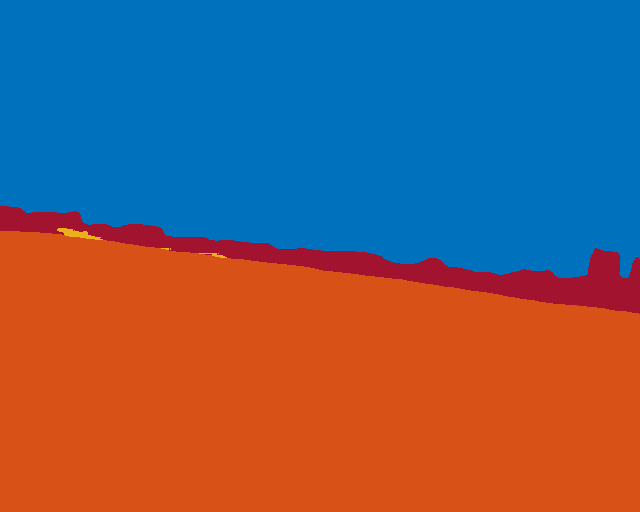

prev=1043,i=1044
iteration running is 1044
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


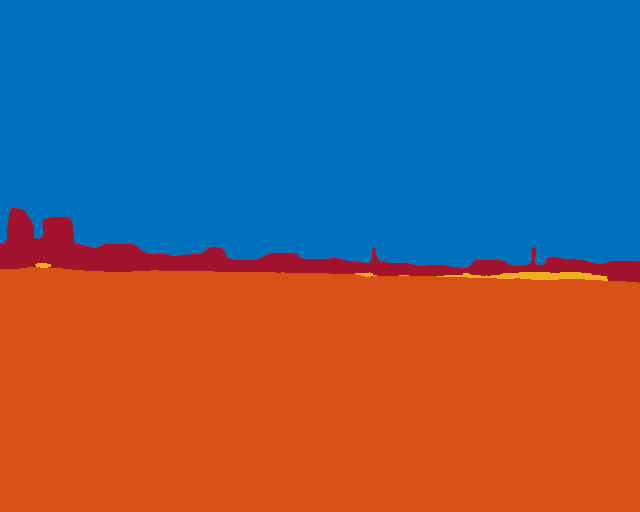

this is the raw image
this is the ground truth mask
this is the colored inferred image


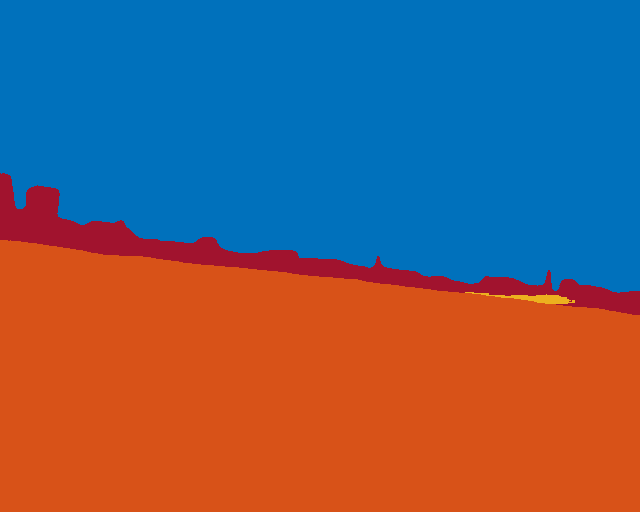

prev=1045,i=1046
iteration running is 1046
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


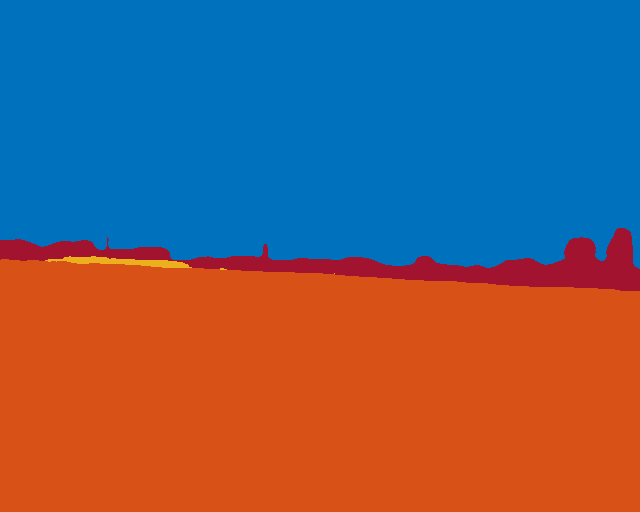

this is the raw image
this is the ground truth mask
this is the colored inferred image


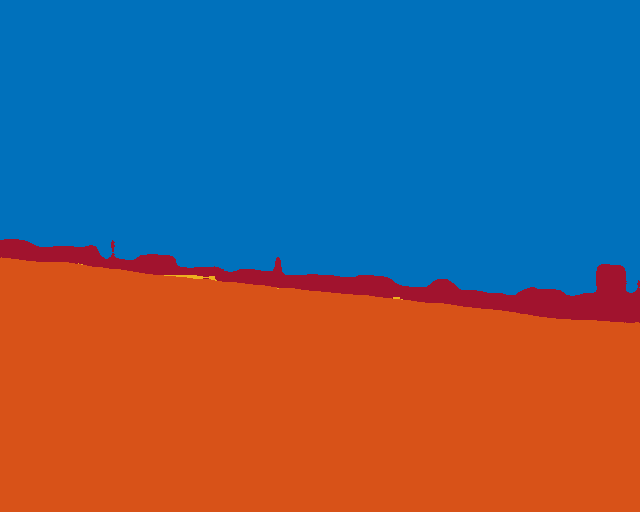

prev=1047,i=1048
iteration running is 1048
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


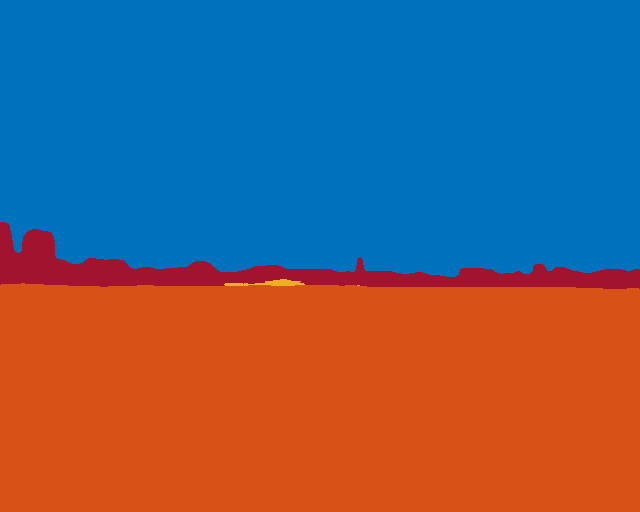

this is the raw image
this is the ground truth mask
this is the colored inferred image


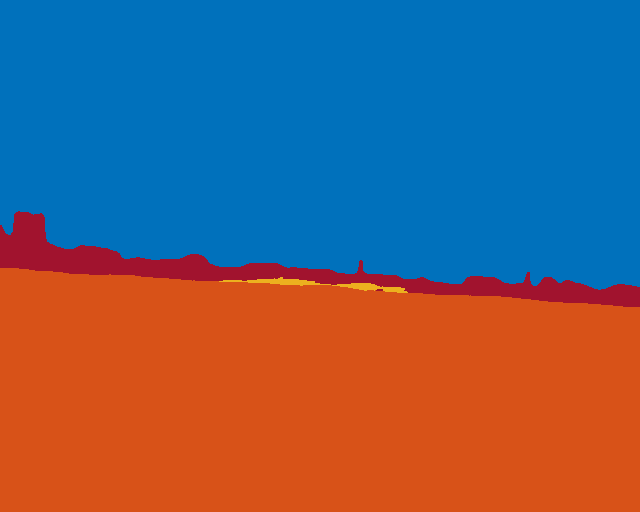

prev=1049,i=1050
iteration running is 1050
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


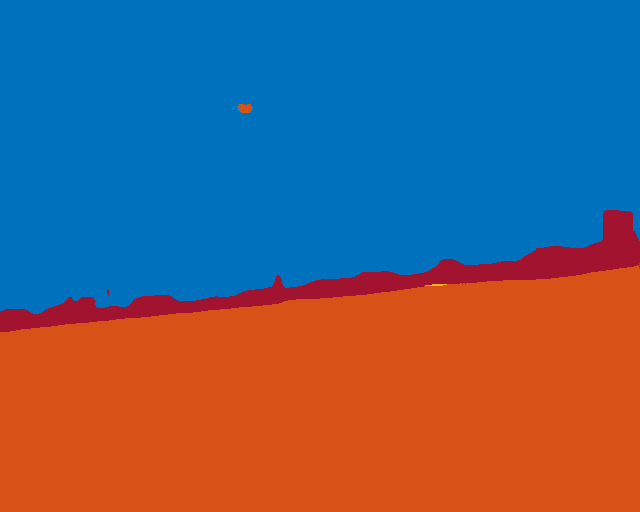

this is the raw image
this is the ground truth mask
this is the colored inferred image


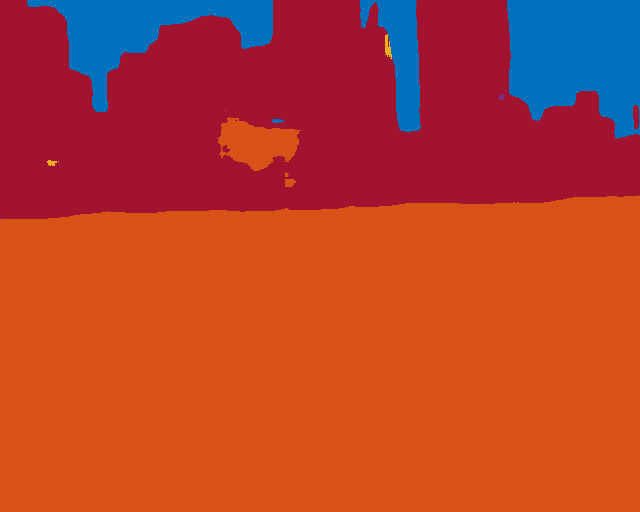

prev=1051,i=1052
iteration running is 1052
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


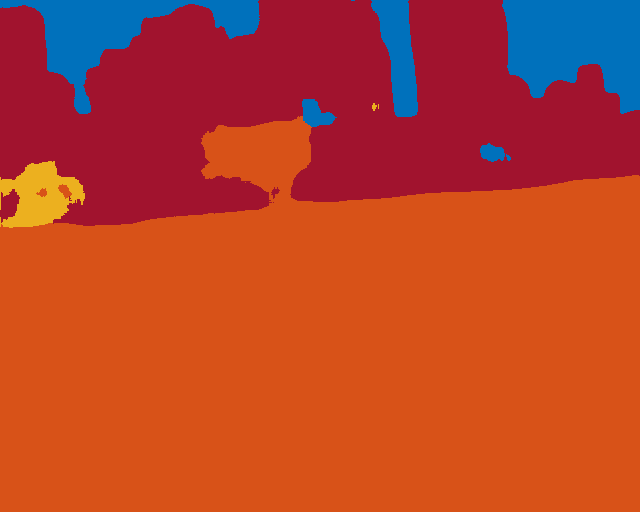

this is the raw image
this is the ground truth mask
this is the colored inferred image


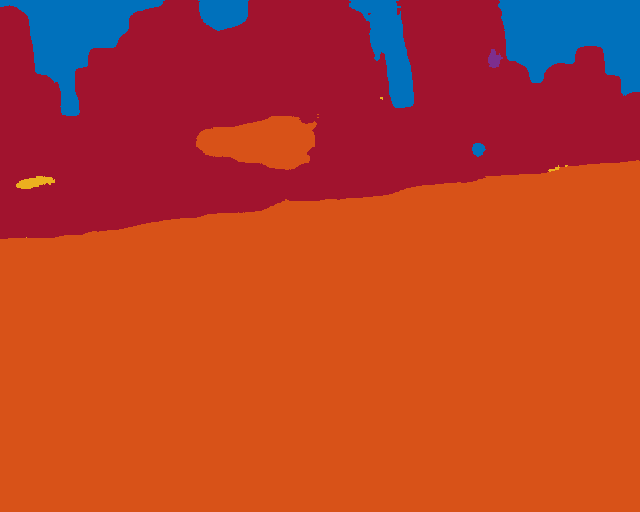

prev=1053,i=1054
iteration running is 1054
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


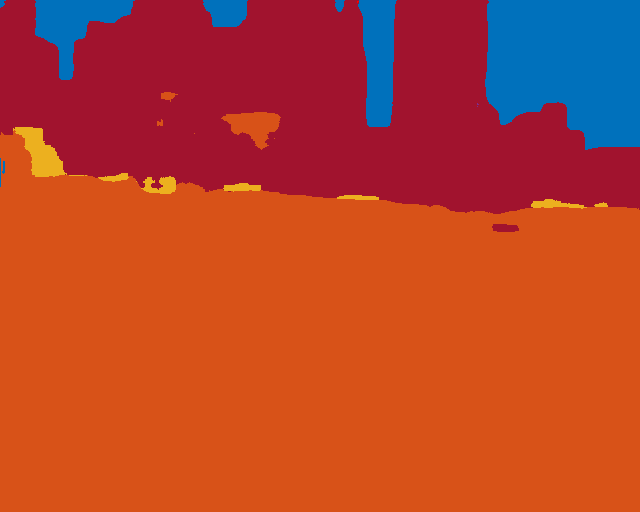

this is the raw image
this is the ground truth mask
this is the colored inferred image


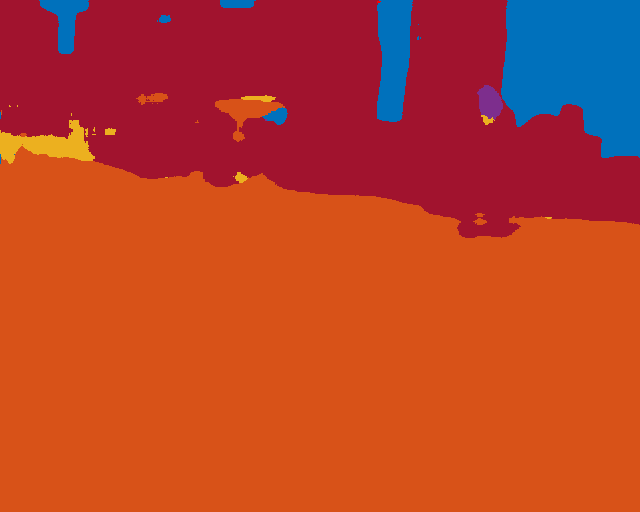

prev=1055,i=1056
iteration running is 1056
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


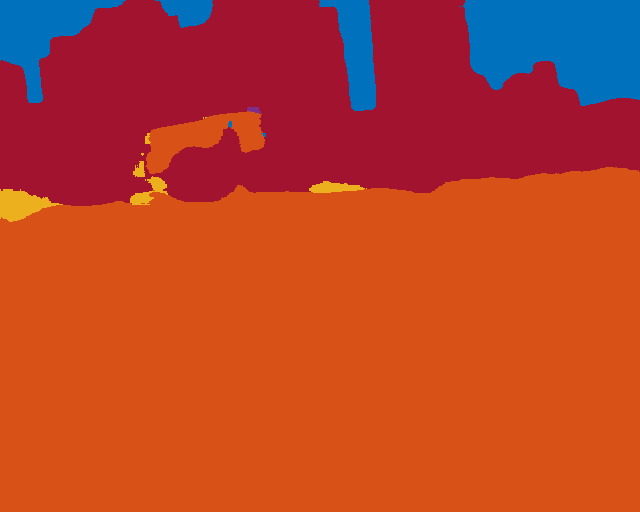

this is the raw image
this is the ground truth mask
this is the colored inferred image


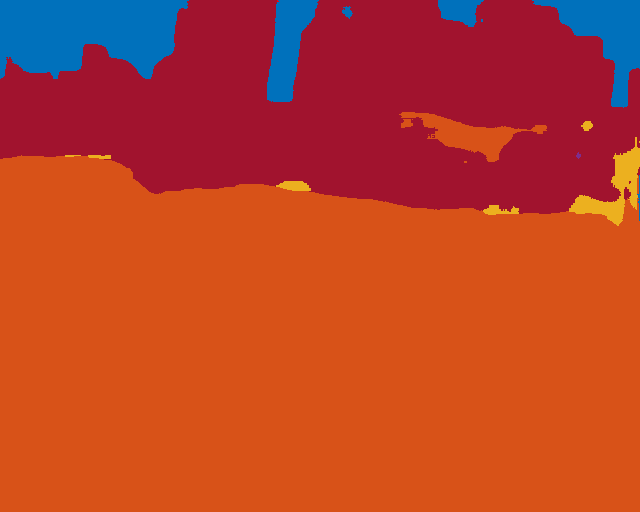

prev=1057,i=1058
iteration running is 1058
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


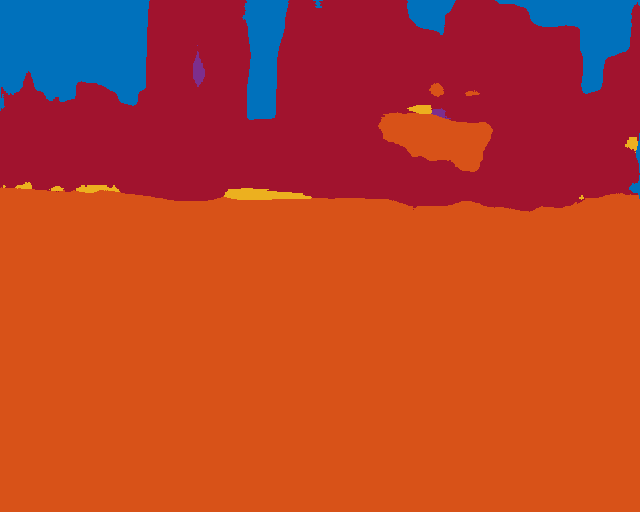

this is the raw image
this is the ground truth mask
this is the colored inferred image


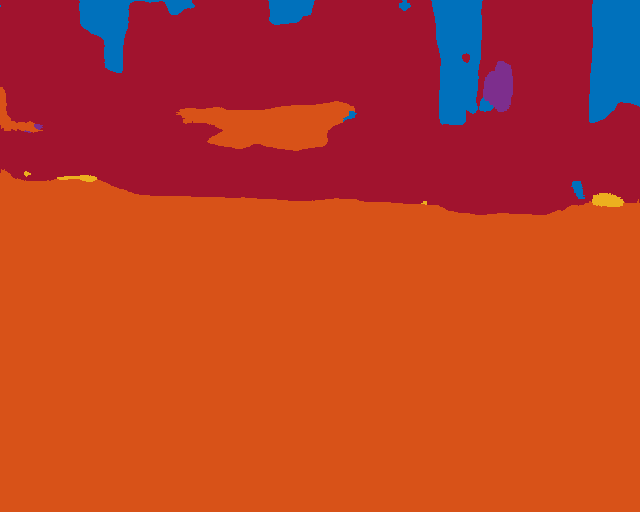

prev=1059,i=1060
iteration running is 1060
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


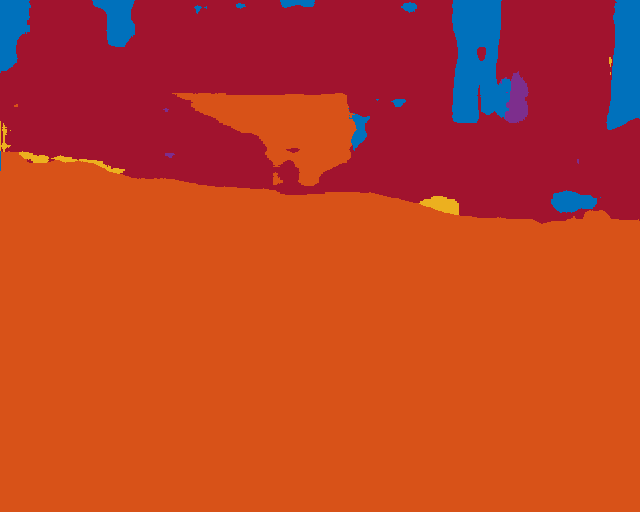

this is the raw image
this is the ground truth mask
this is the colored inferred image


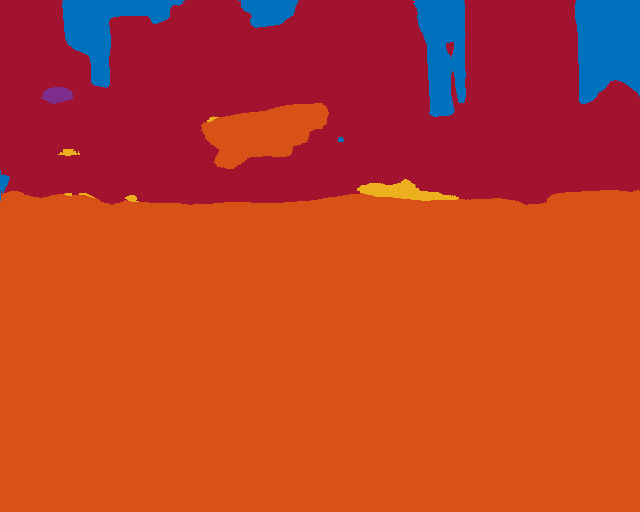

prev=1061,i=1062
iteration running is 1062
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


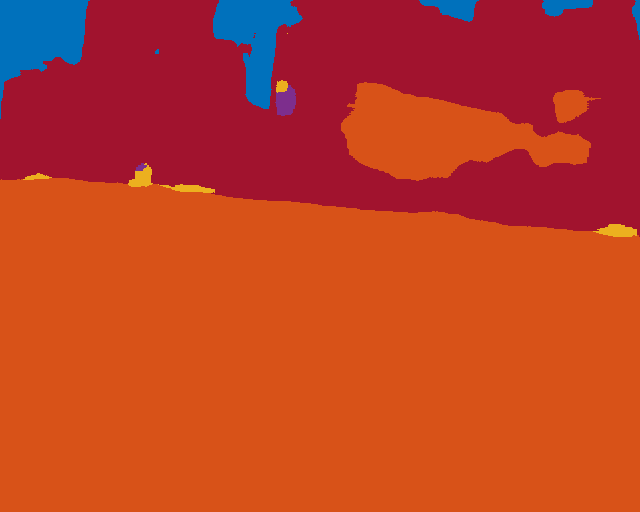

this is the raw image
this is the ground truth mask
this is the colored inferred image


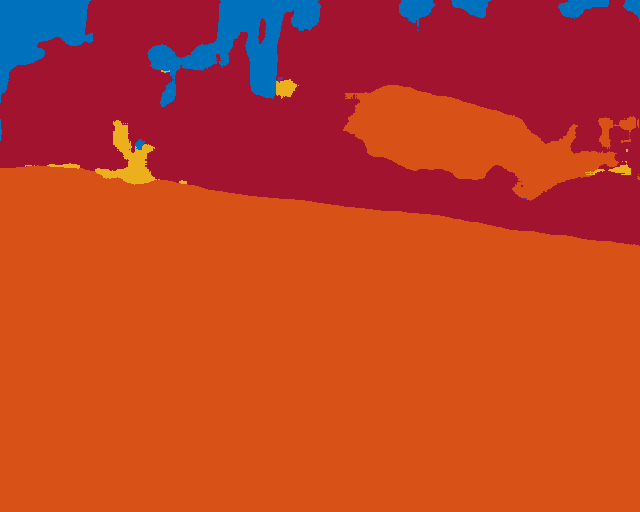

prev=1063,i=1064
iteration running is 1064
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


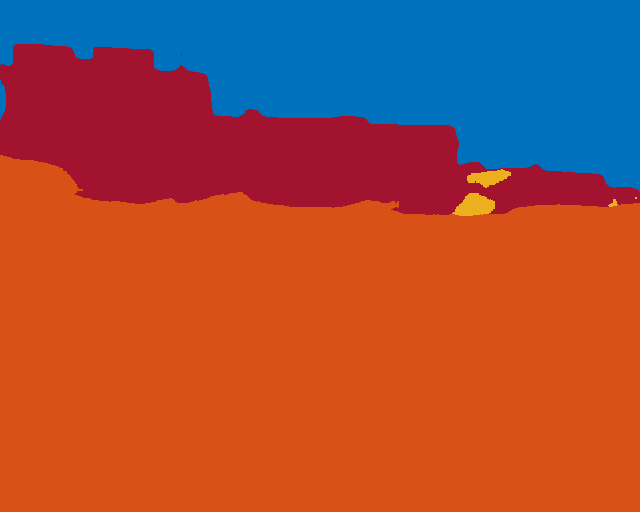

this is the raw image
this is the ground truth mask
this is the colored inferred image


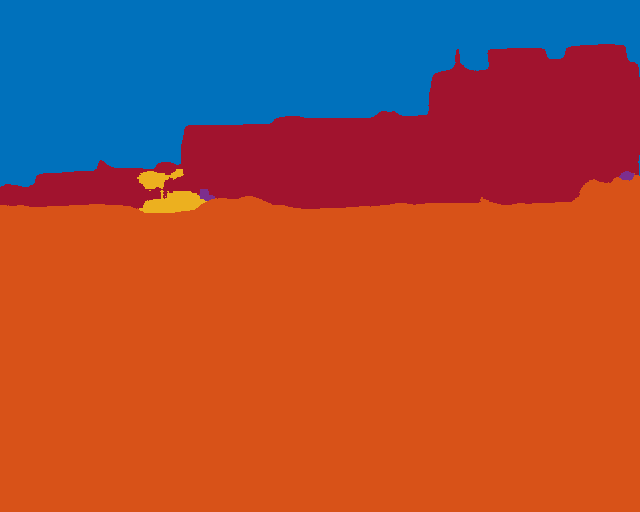

prev=1065,i=1066
iteration running is 1066
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


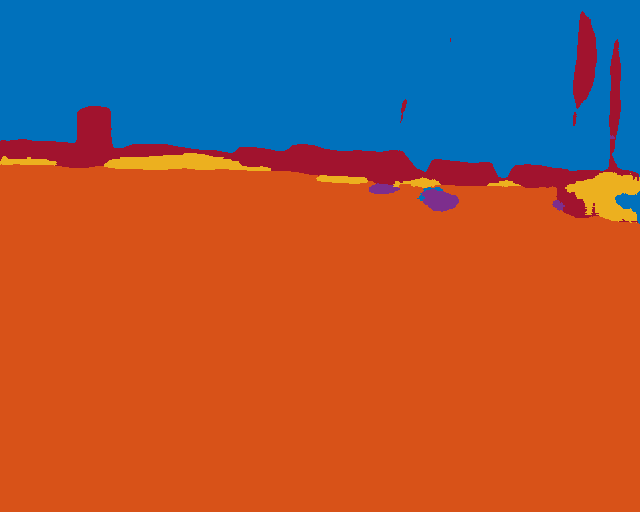

this is the raw image
this is the ground truth mask
this is the colored inferred image


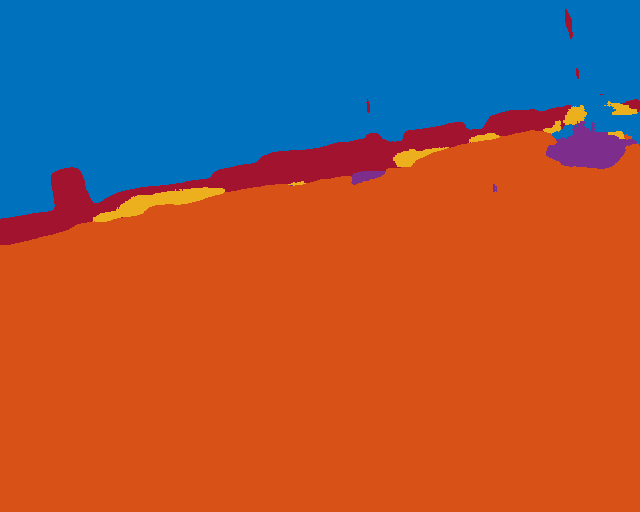

prev=1067,i=1068
iteration running is 1068
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


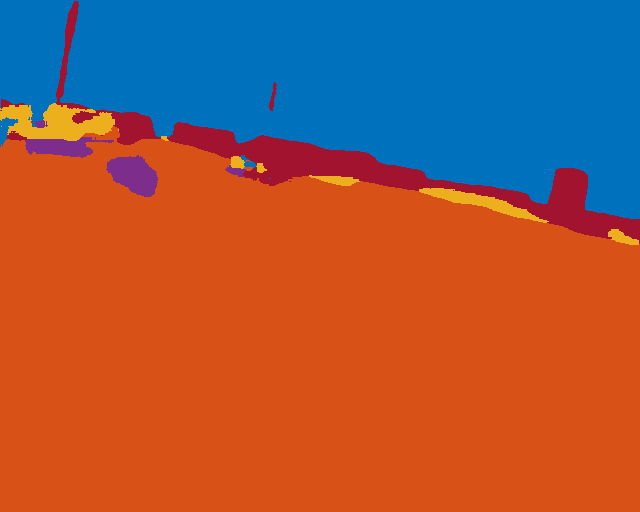

this is the raw image
this is the ground truth mask
this is the colored inferred image


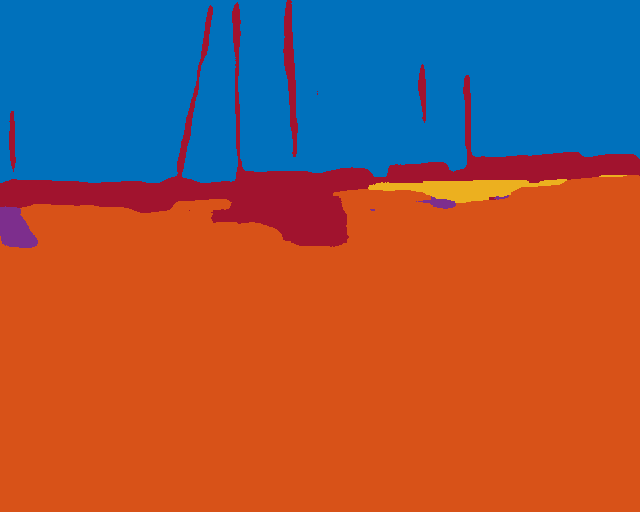

prev=1069,i=1070
iteration running is 1070
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


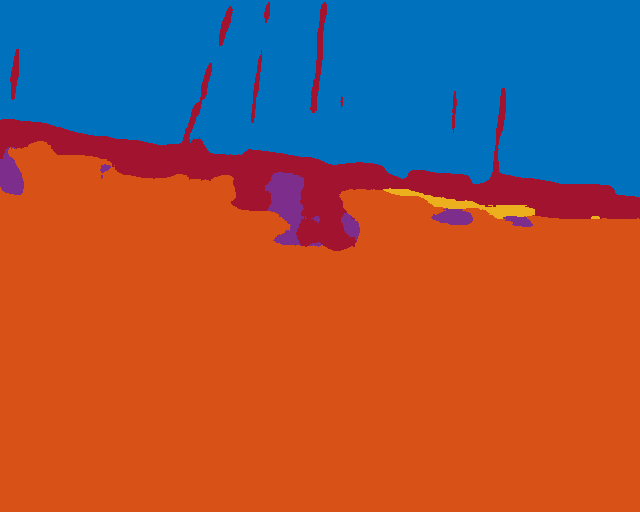

this is the raw image
this is the ground truth mask
this is the colored inferred image


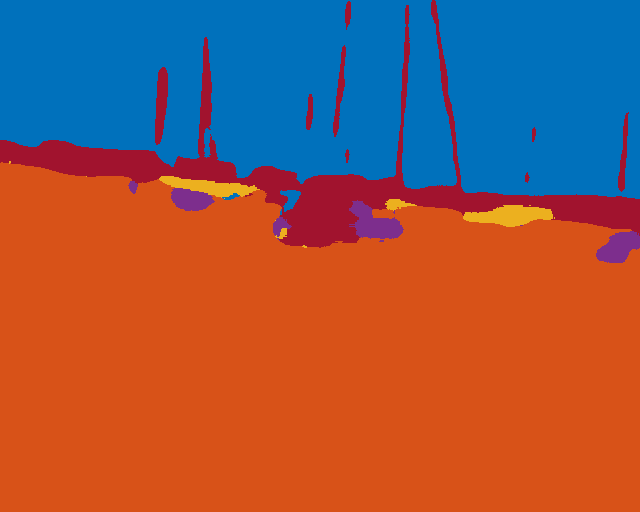

prev=1071,i=1072
iteration running is 1072
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


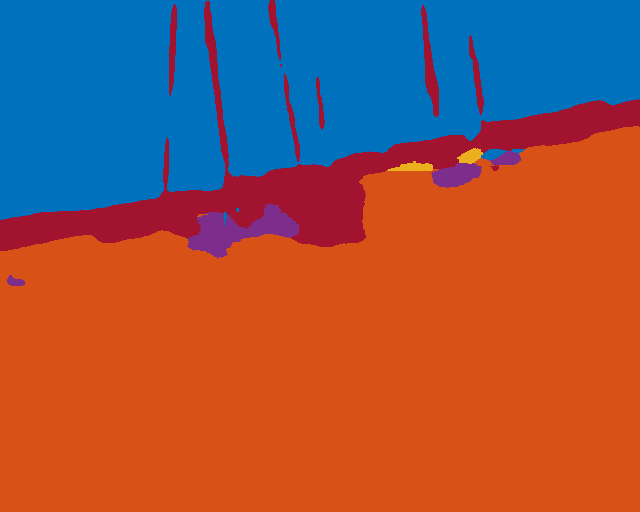

this is the raw image
this is the ground truth mask
this is the colored inferred image


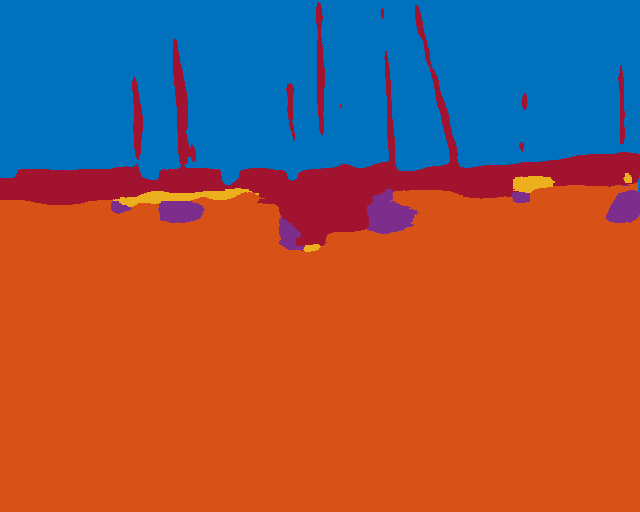

prev=1073,i=1074
iteration running is 1074
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


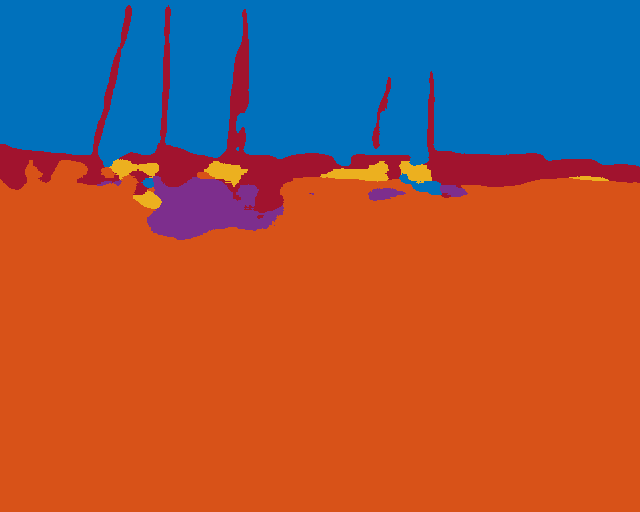

this is the raw image
this is the ground truth mask
this is the colored inferred image


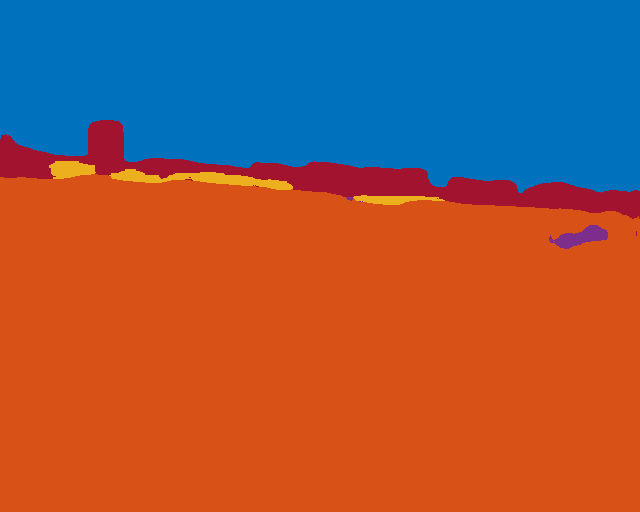

prev=1075,i=1076
iteration running is 1076
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


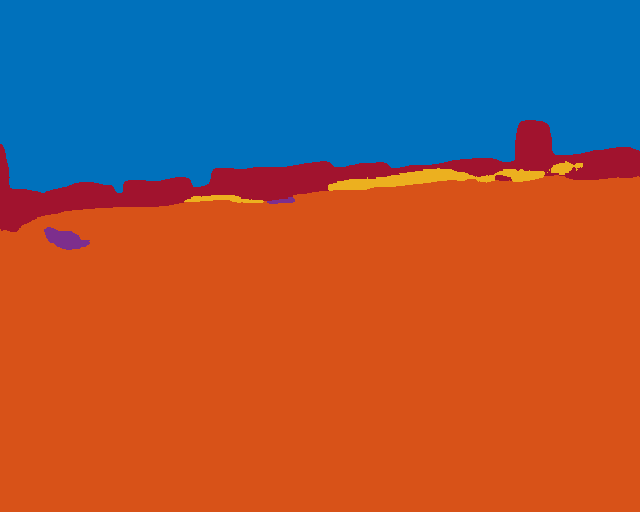

this is the raw image
this is the ground truth mask
this is the colored inferred image


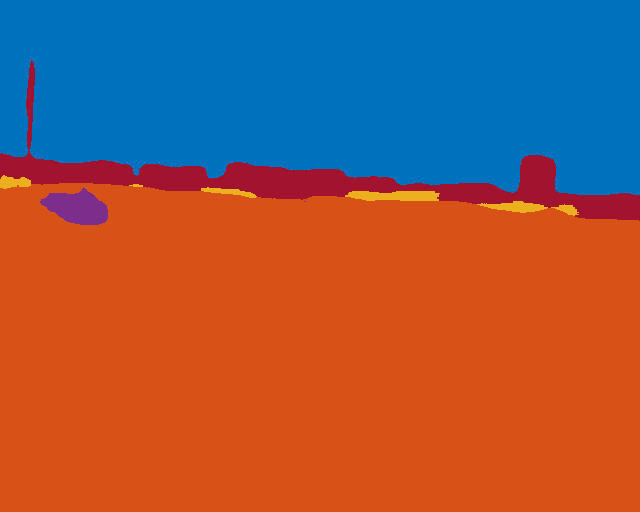

prev=1077,i=1078
iteration running is 1078
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


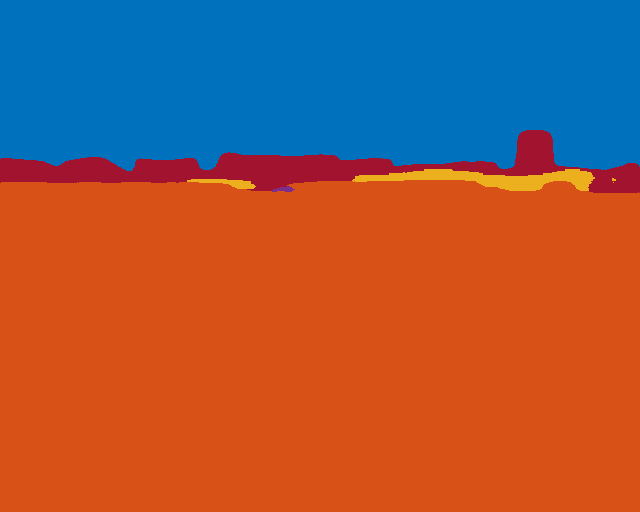

this is the raw image
this is the ground truth mask
this is the colored inferred image


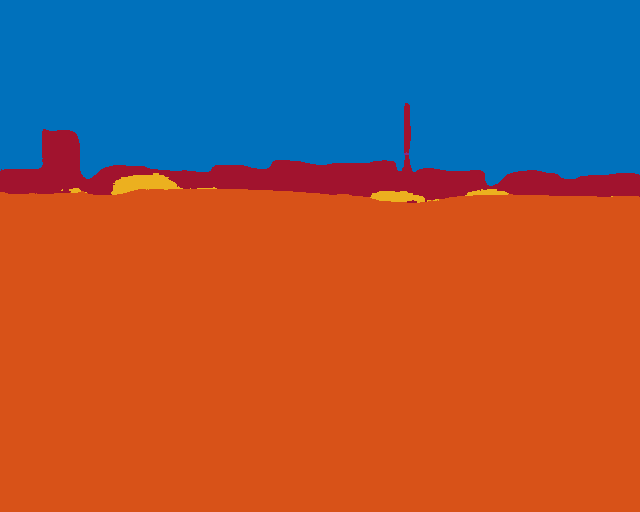

prev=1079,i=1080
iteration running is 1080
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


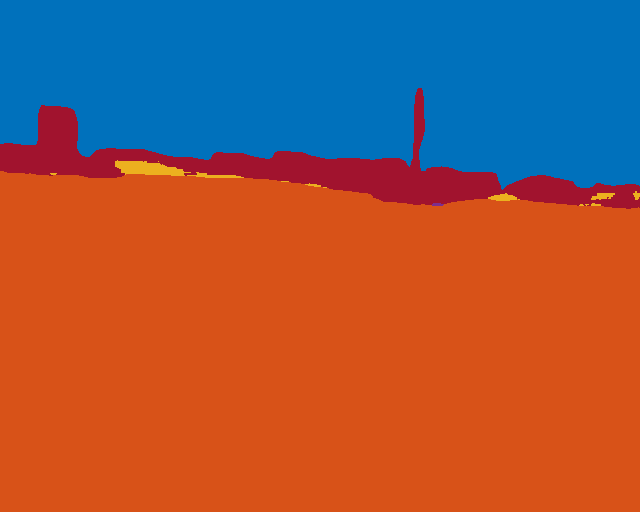

this is the raw image
this is the ground truth mask
this is the colored inferred image


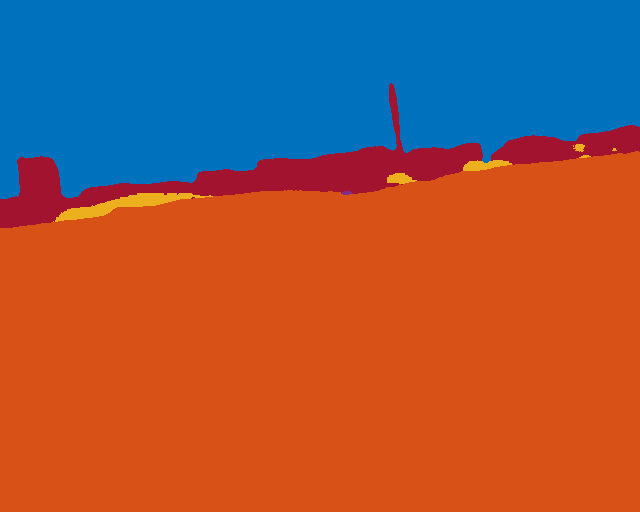

prev=1081,i=1082
iteration running is 1082
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


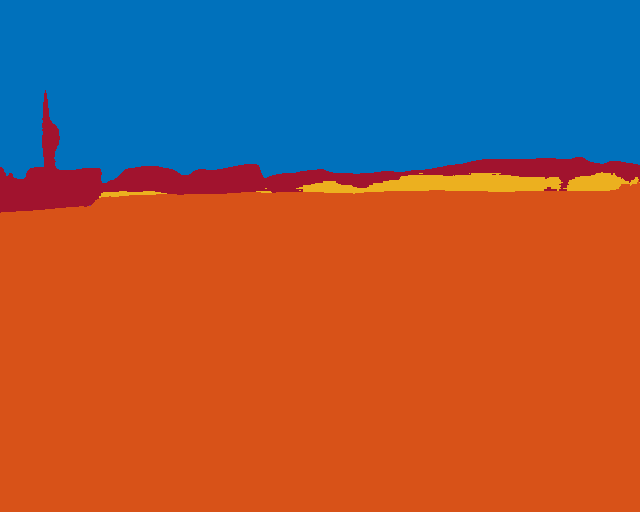

this is the raw image
this is the ground truth mask
this is the colored inferred image


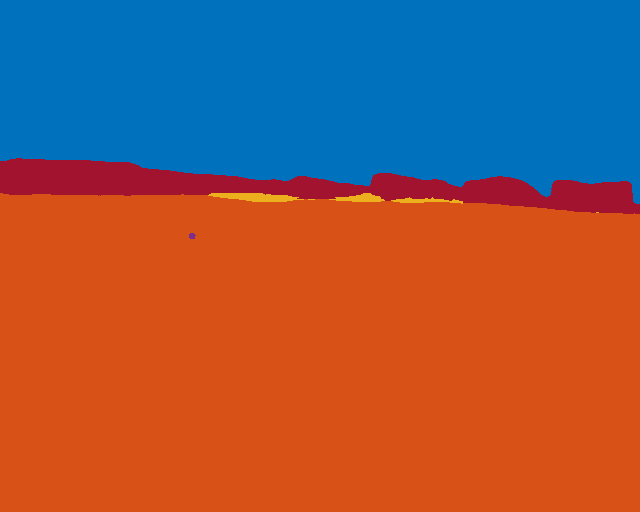

prev=1083,i=1084
iteration running is 1084
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


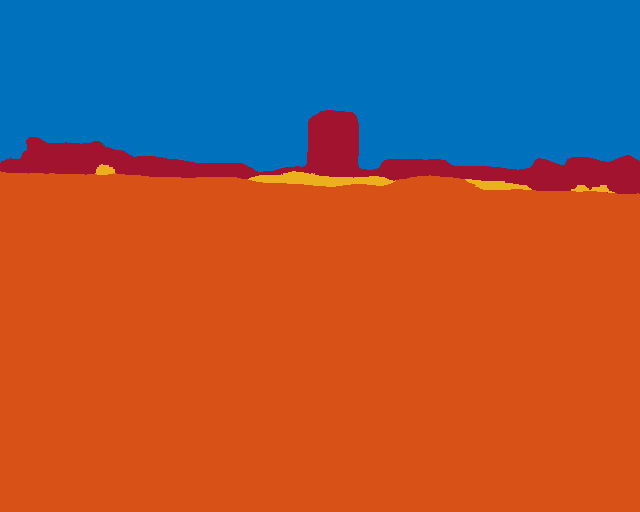

this is the raw image
this is the ground truth mask
this is the colored inferred image


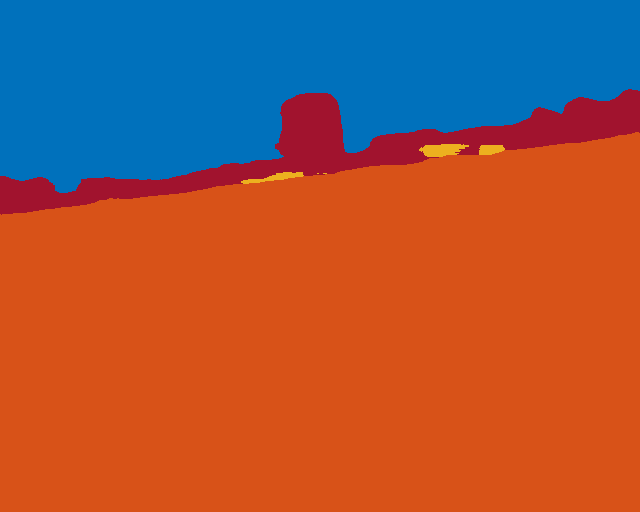

prev=1085,i=1086
iteration running is 1086
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


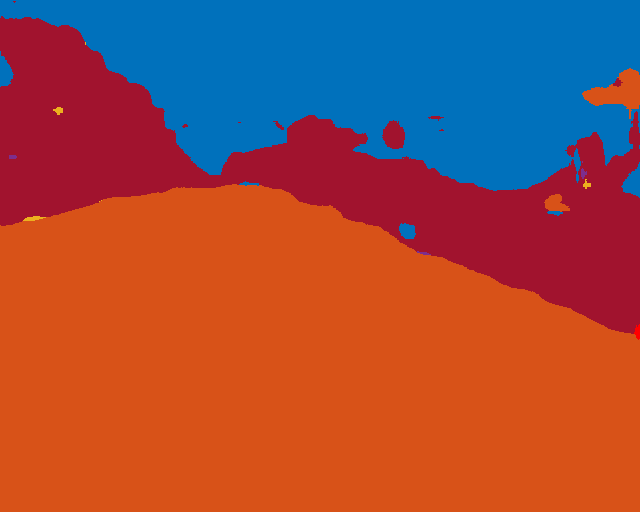

this is the raw image
this is the ground truth mask
this is the colored inferred image


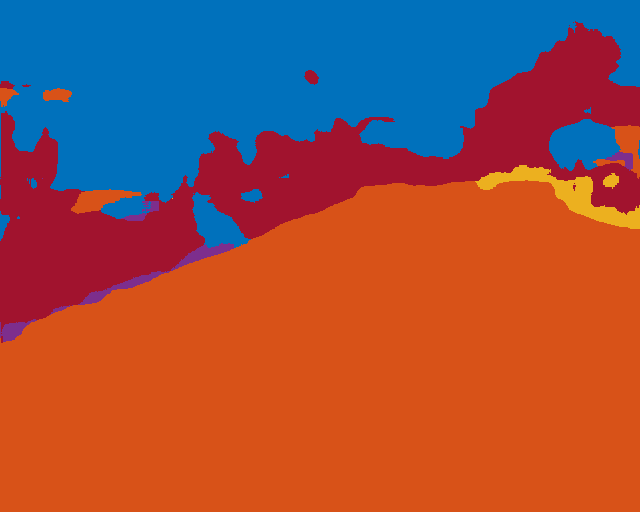

prev=1087,i=1088
iteration running is 1088
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


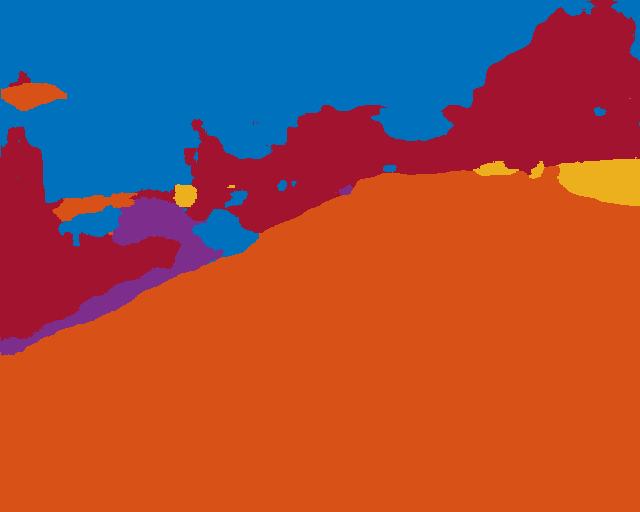

this is the raw image
this is the ground truth mask
this is the colored inferred image


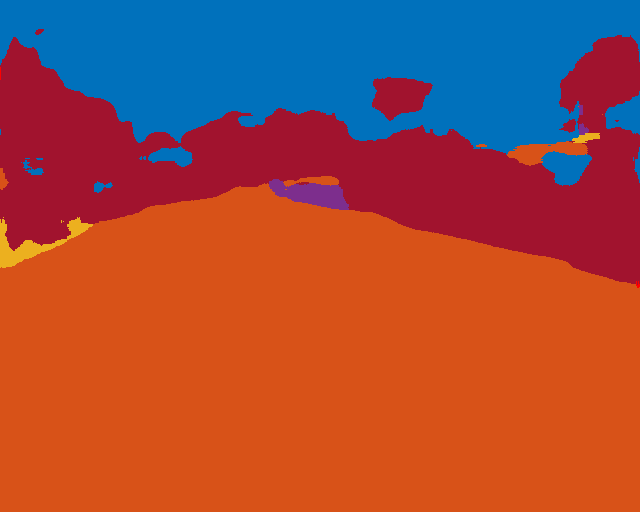

prev=1089,i=1090
iteration running is 1090
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


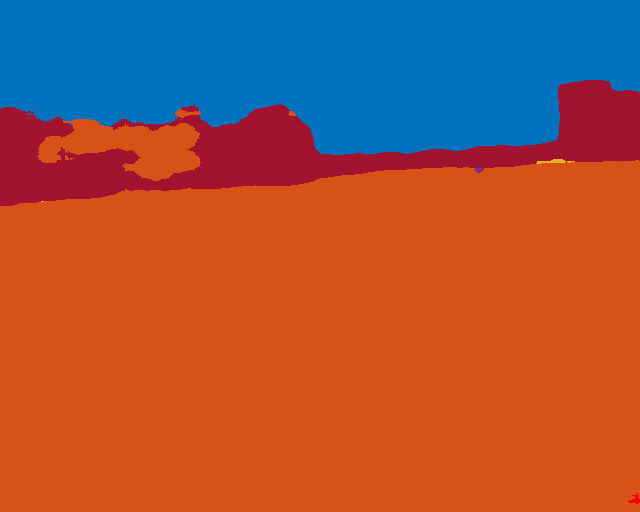

this is the raw image
this is the ground truth mask
this is the colored inferred image


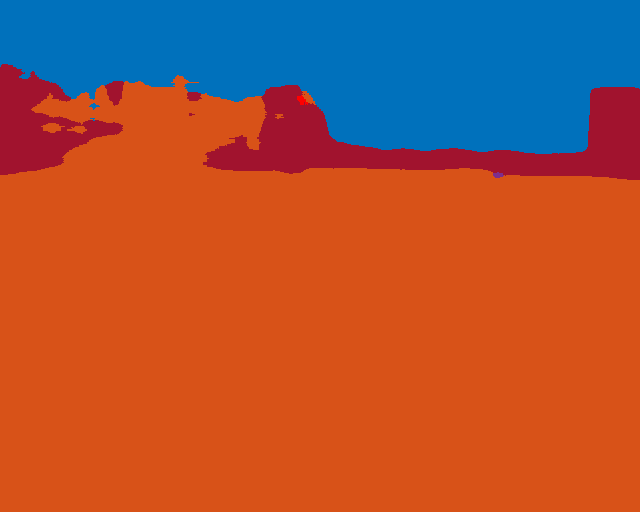

prev=1091,i=1092
iteration running is 1092
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


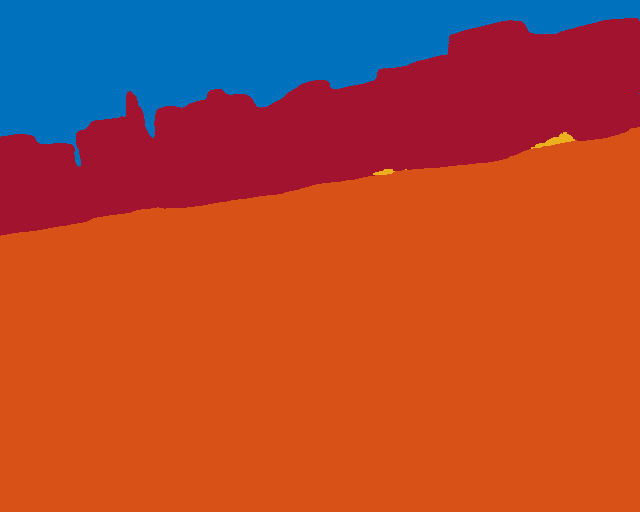

this is the raw image
this is the ground truth mask
this is the colored inferred image


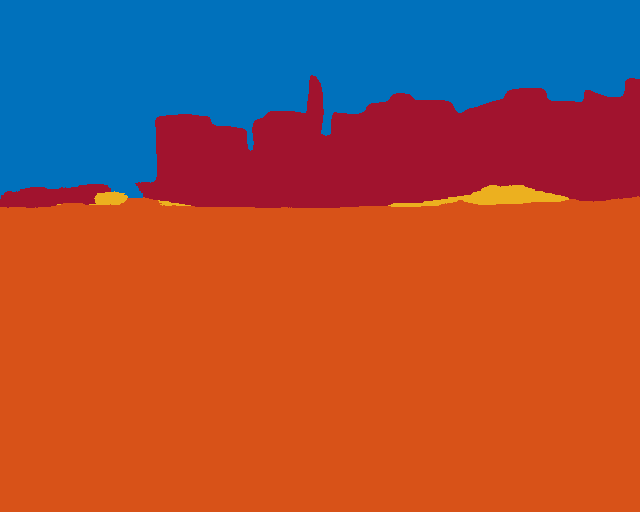

prev=1093,i=1094
iteration running is 1094
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


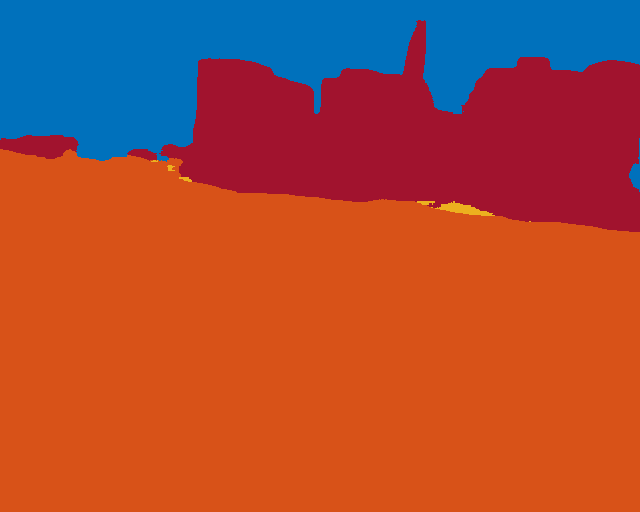

this is the raw image
this is the ground truth mask
this is the colored inferred image


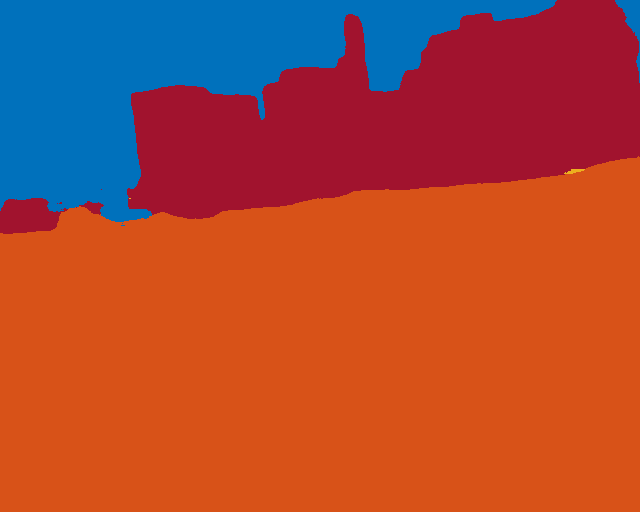

prev=1095,i=1096
iteration running is 1096
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


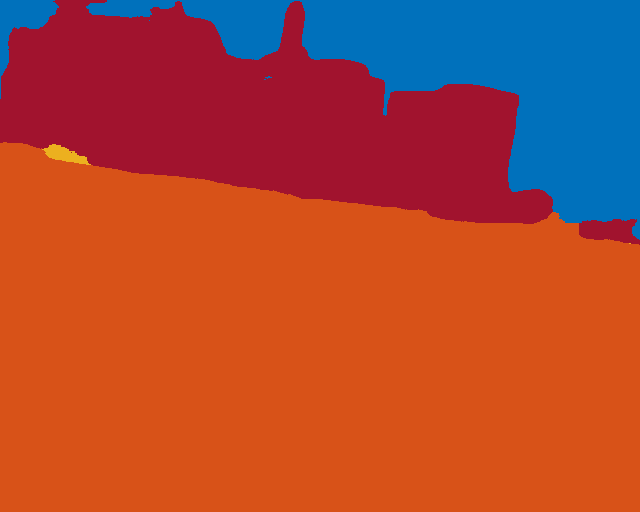

this is the raw image
this is the ground truth mask
this is the colored inferred image


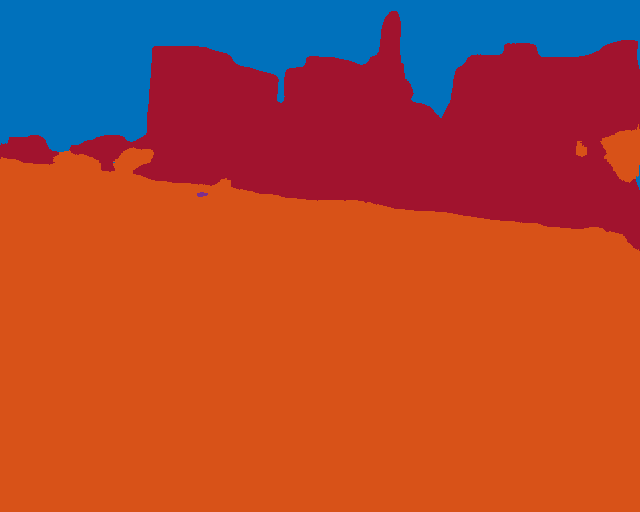

prev=1097,i=1098
iteration running is 1098
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


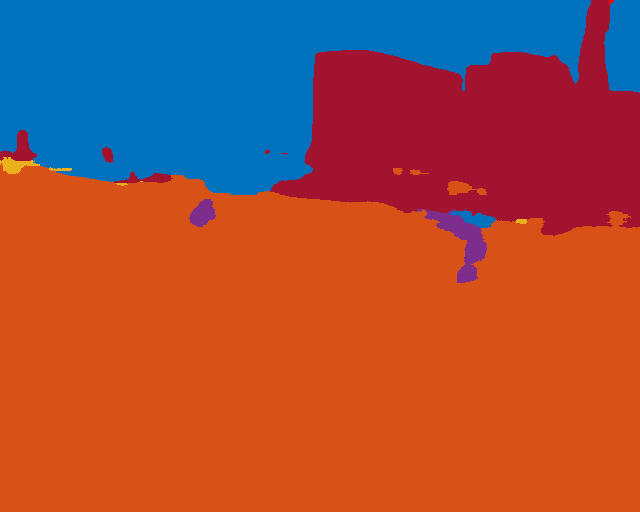

this is the raw image
this is the ground truth mask
this is the colored inferred image


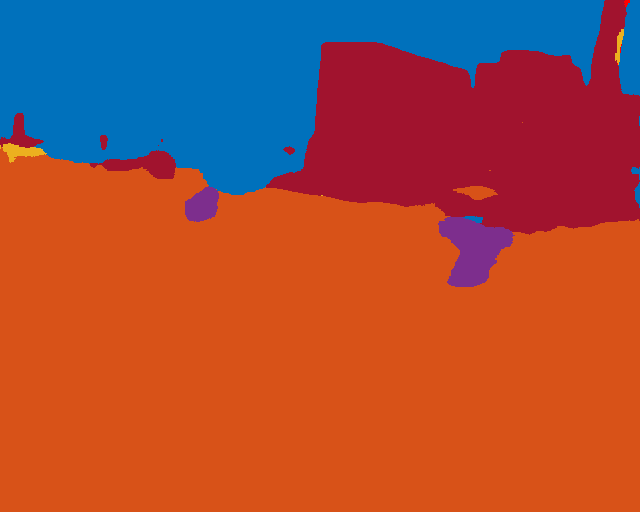

prev=1099,i=1100
iteration running is 1100
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


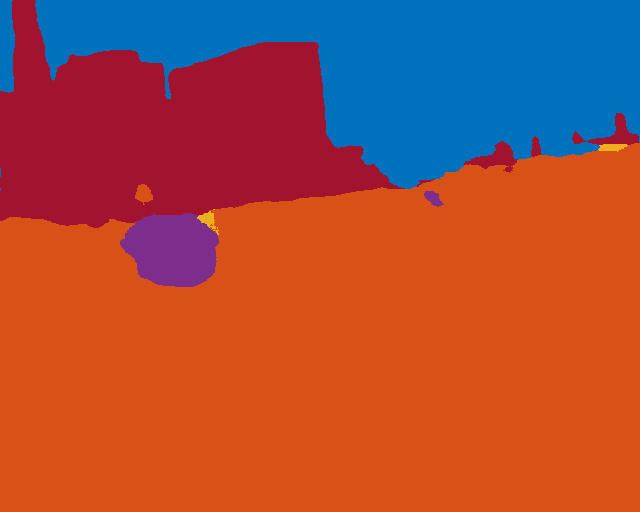

this is the raw image
this is the ground truth mask
this is the colored inferred image


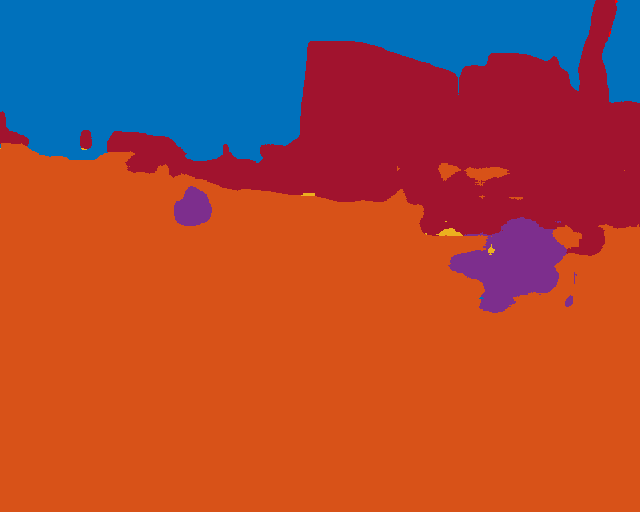

prev=1101,i=1102
iteration running is 1102
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


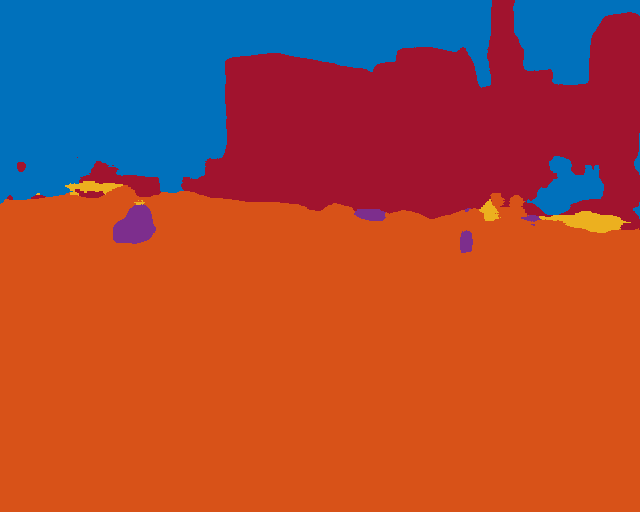

this is the raw image
this is the ground truth mask
this is the colored inferred image


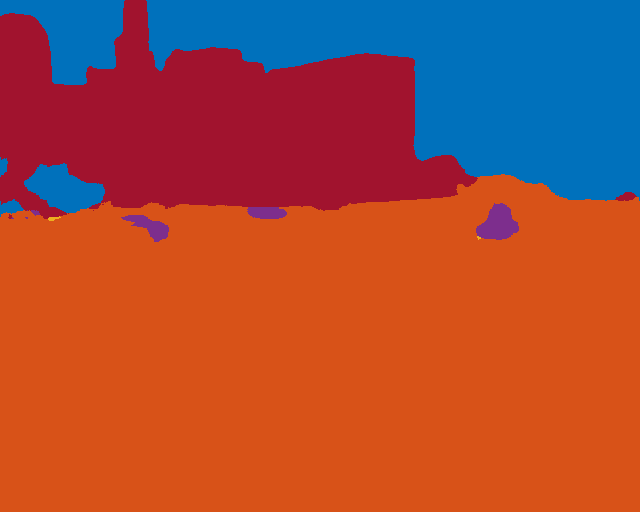

prev=1103,i=1104
iteration running is 1104
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


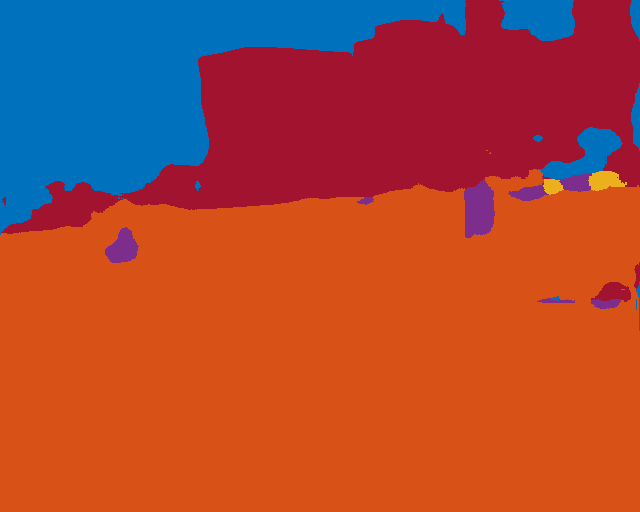

this is the raw image
this is the ground truth mask
this is the colored inferred image


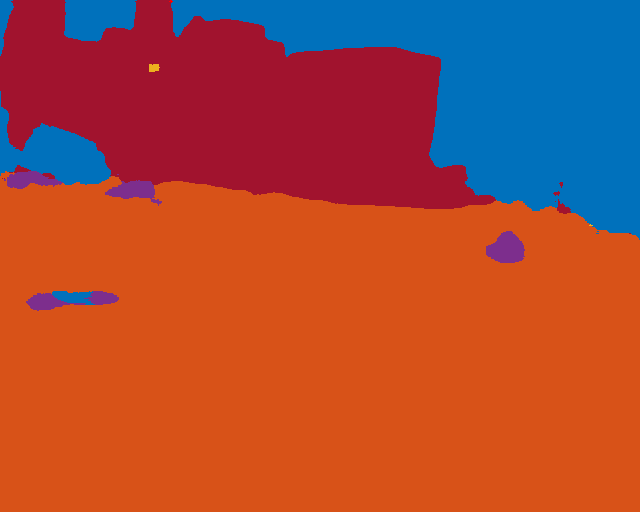

prev=1105,i=1106
iteration running is 1106
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


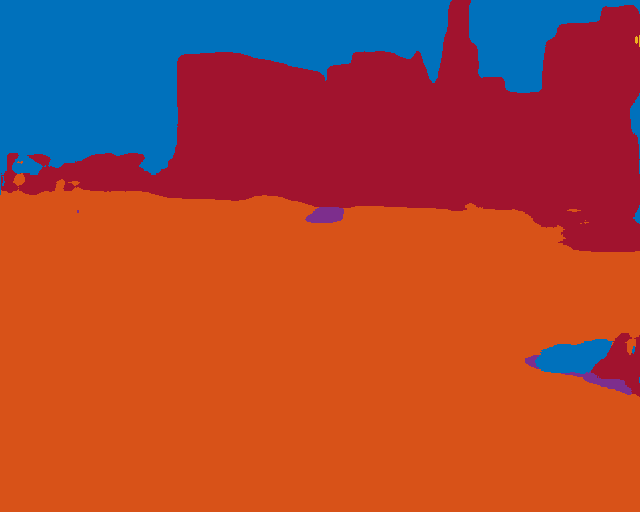

this is the raw image
this is the ground truth mask
this is the colored inferred image


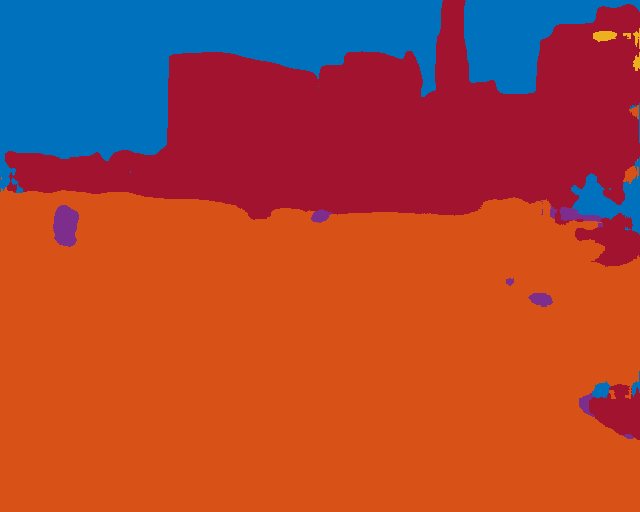

prev=1107,i=1108
iteration running is 1108
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


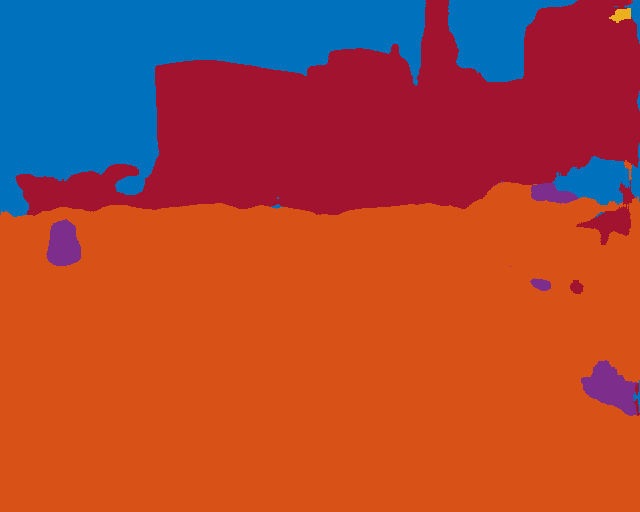

this is the raw image
this is the ground truth mask
this is the colored inferred image


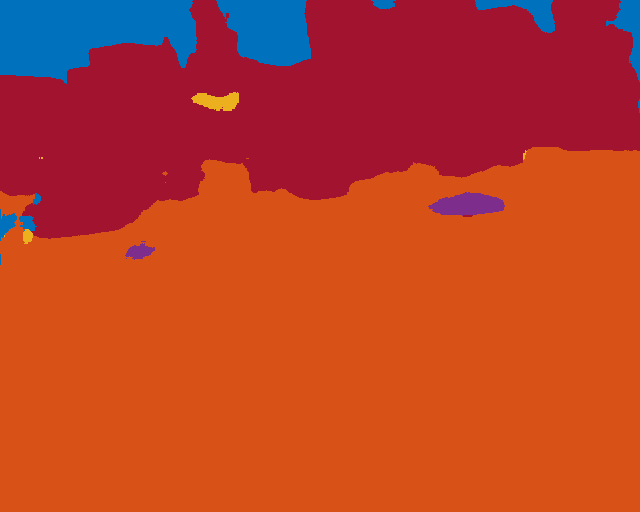

prev=1109,i=1110
iteration running is 1110
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


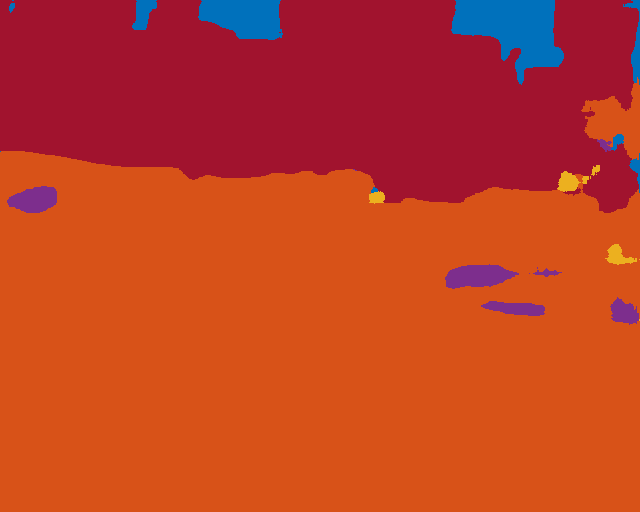

this is the raw image
this is the ground truth mask
this is the colored inferred image


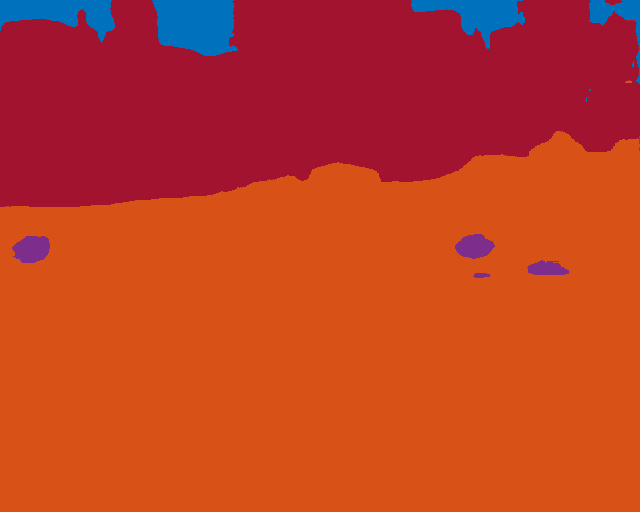

prev=1111,i=1112
iteration running is 1112
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


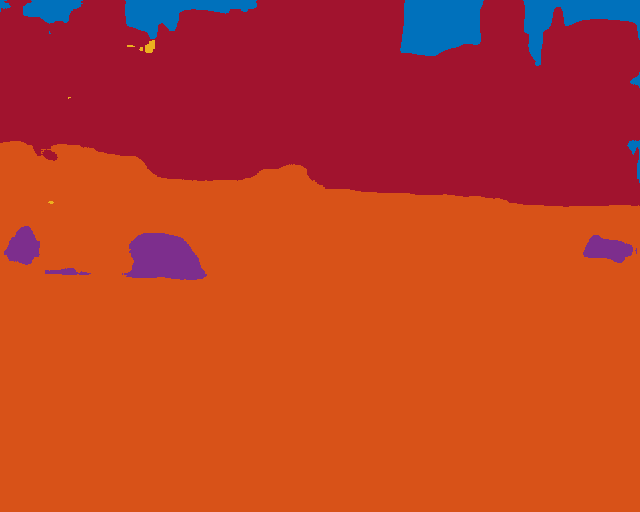

this is the raw image
this is the ground truth mask
this is the colored inferred image


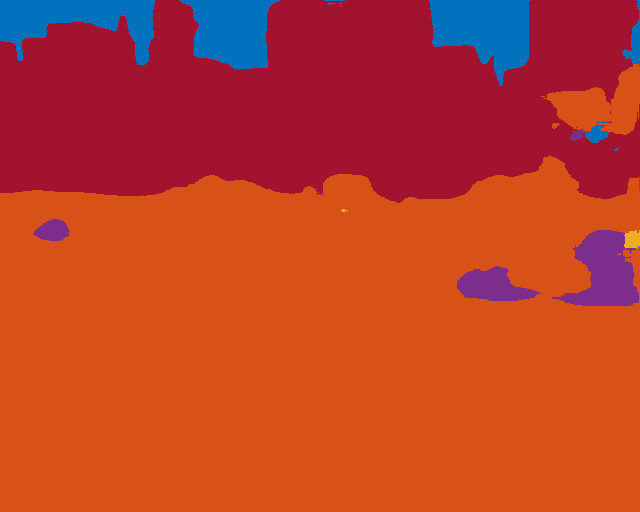

prev=1113,i=1114
iteration running is 1114
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


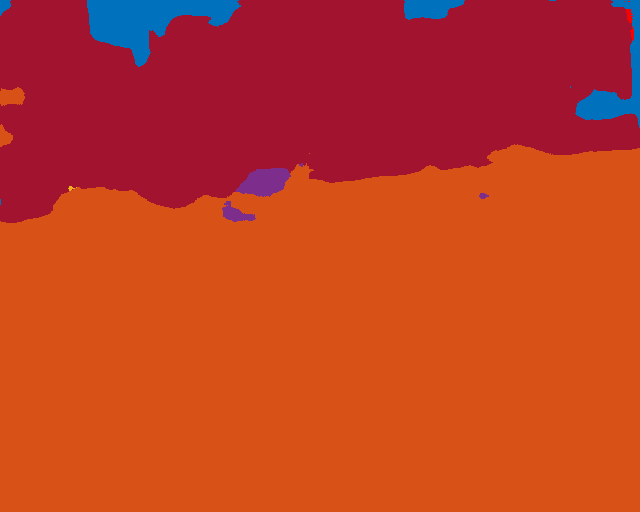

this is the raw image
this is the ground truth mask
this is the colored inferred image


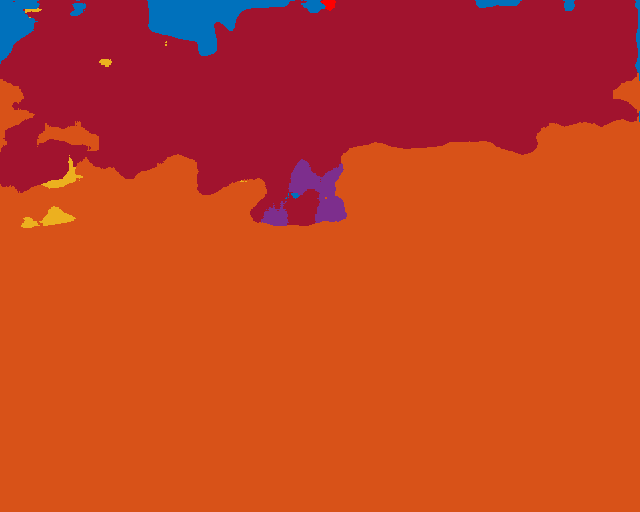

prev=1115,i=1116
iteration running is 1116
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


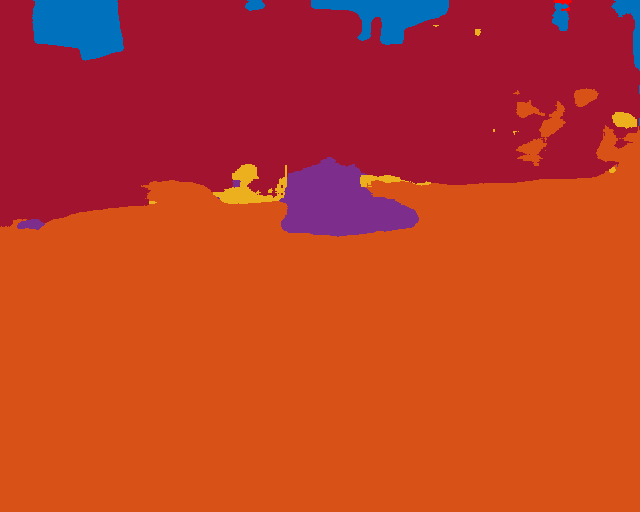

this is the raw image
this is the ground truth mask
this is the colored inferred image


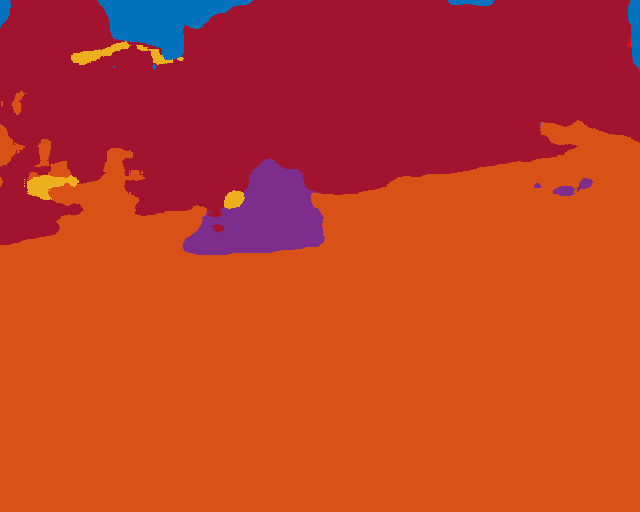

prev=1117,i=1118
iteration running is 1118
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


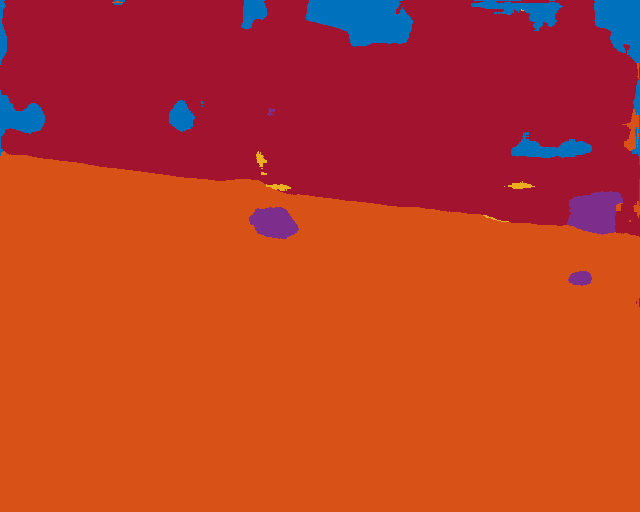

this is the raw image
this is the ground truth mask
this is the colored inferred image


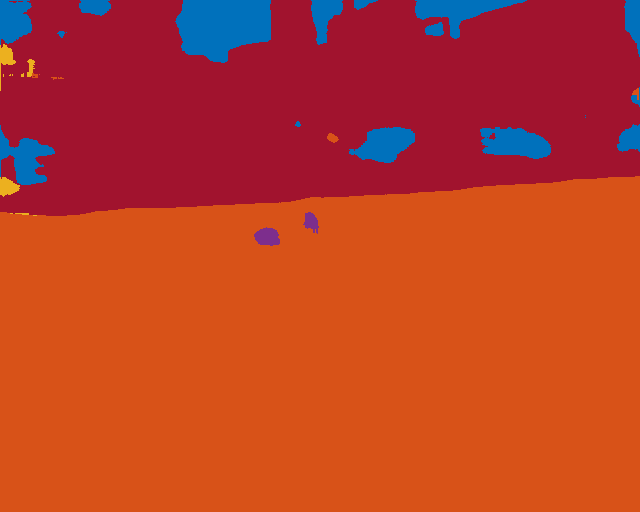

prev=1119,i=1120
iteration running is 1120
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


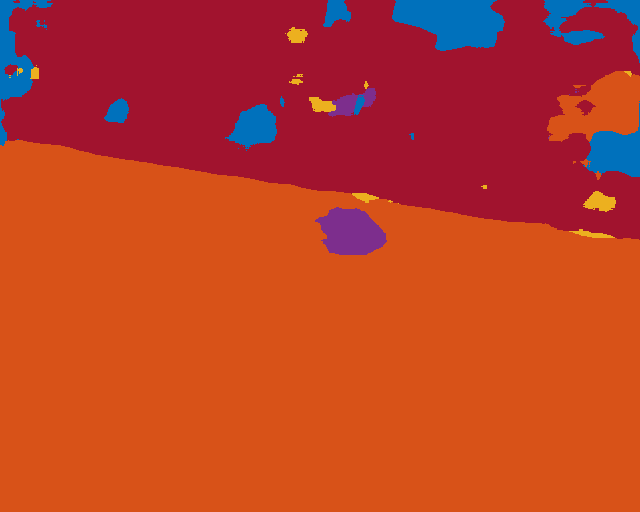

this is the raw image
this is the ground truth mask
this is the colored inferred image


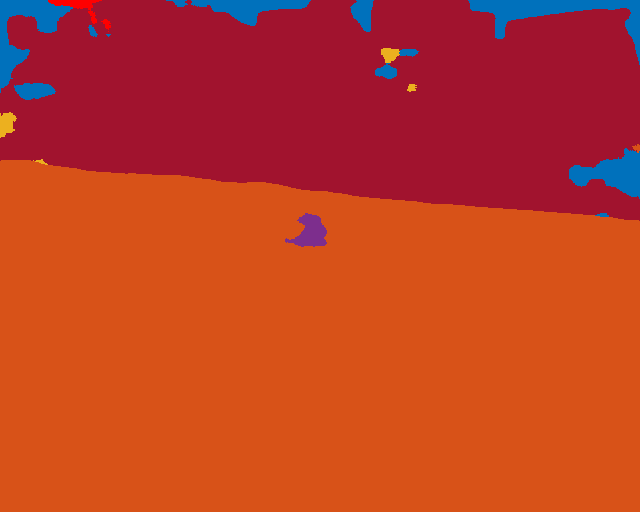

prev=1121,i=1122
iteration running is 1122
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


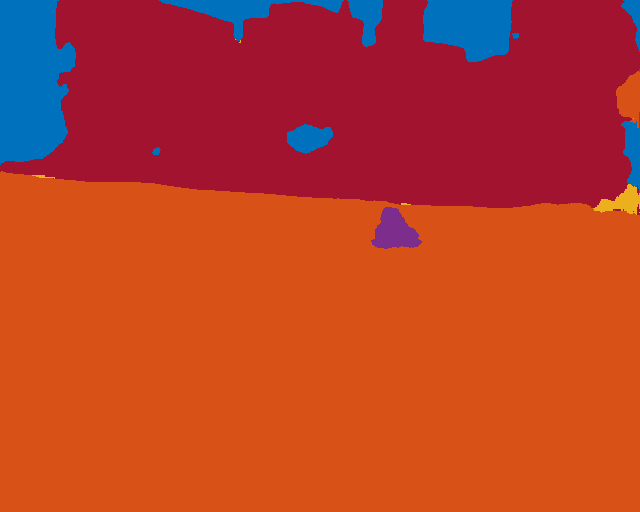

this is the raw image
this is the ground truth mask
this is the colored inferred image


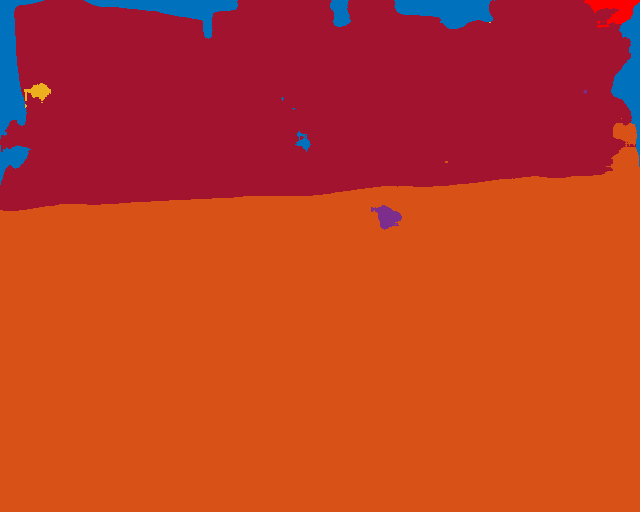

prev=1123,i=1124
iteration running is 1124
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


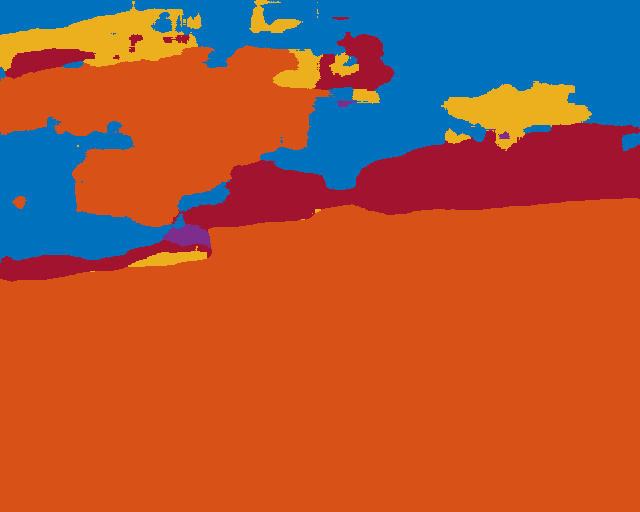

this is the raw image
this is the ground truth mask
this is the colored inferred image


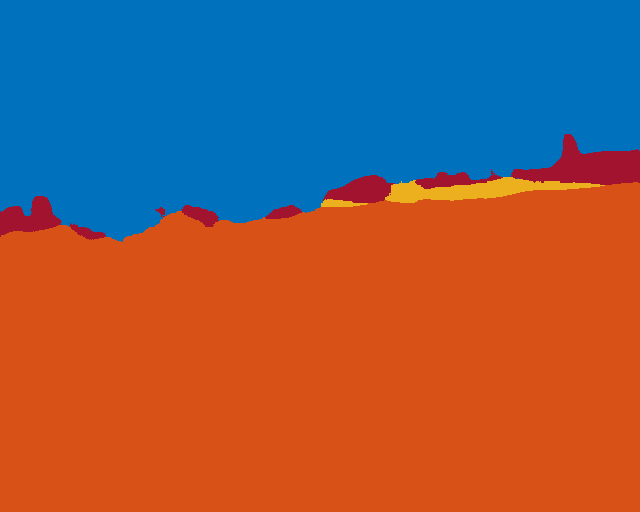

prev=1125,i=1126
iteration running is 1126
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


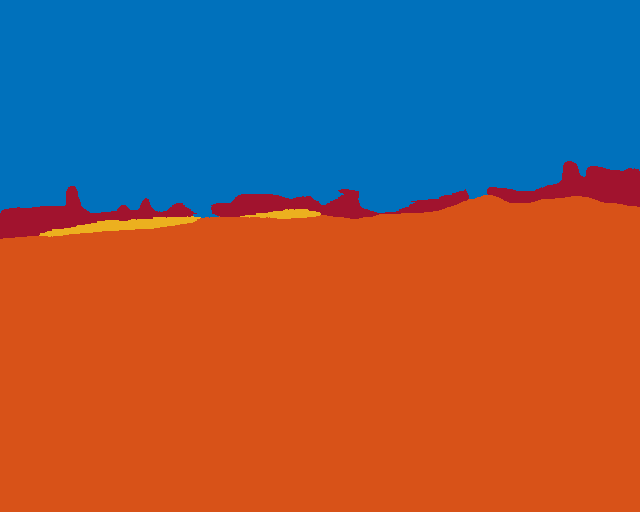

this is the raw image
this is the ground truth mask
this is the colored inferred image


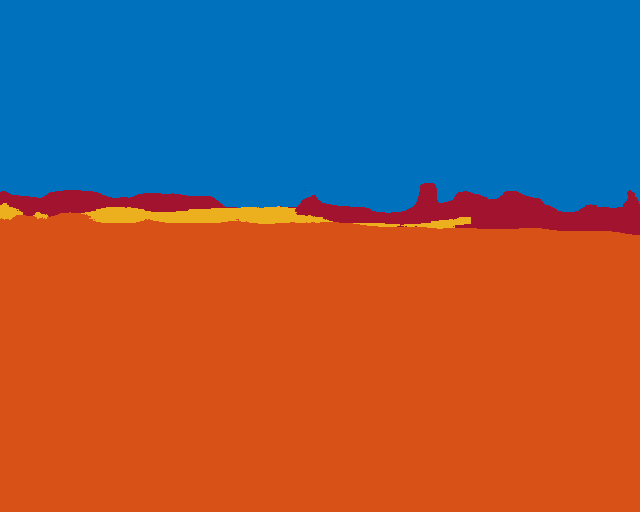

prev=1127,i=1128
iteration running is 1128
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


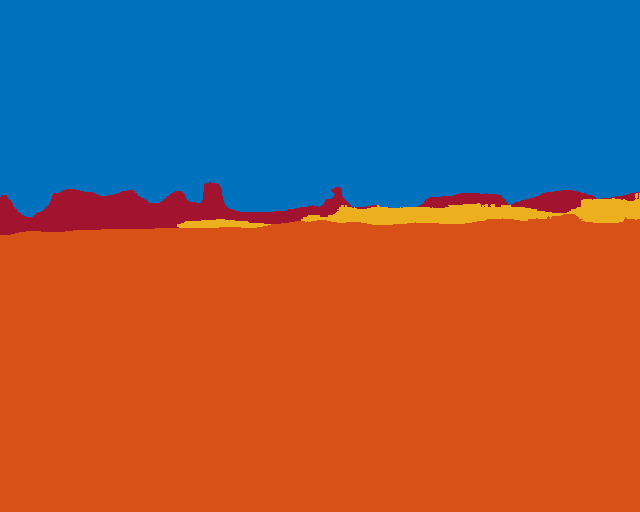

this is the raw image
this is the ground truth mask
this is the colored inferred image


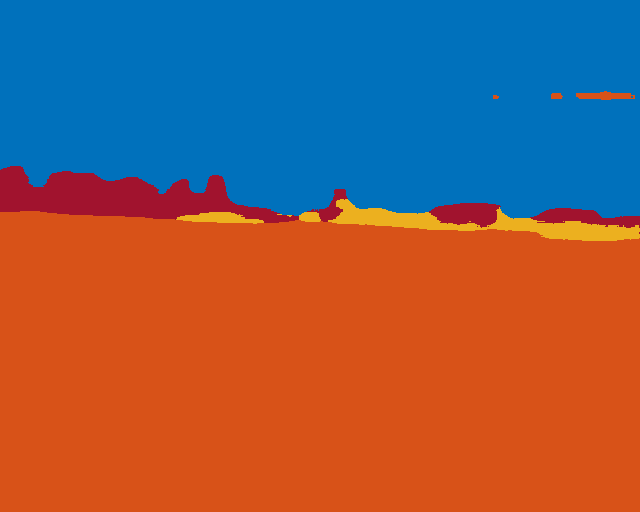

prev=1129,i=1130
iteration running is 1130
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


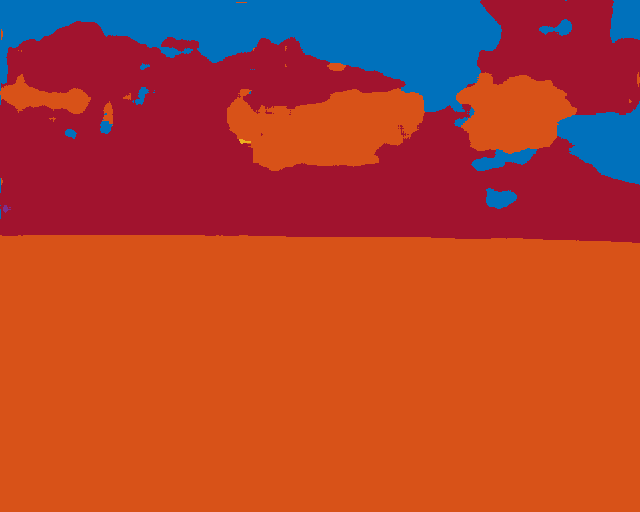

this is the raw image
this is the ground truth mask
this is the colored inferred image


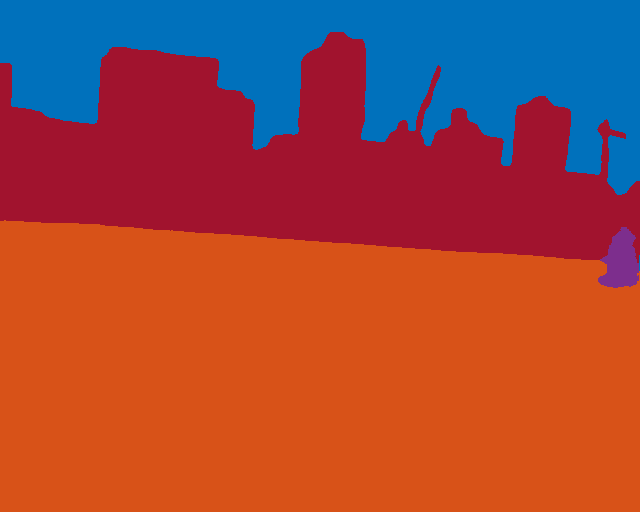

prev=1131,i=1132
iteration running is 1132
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


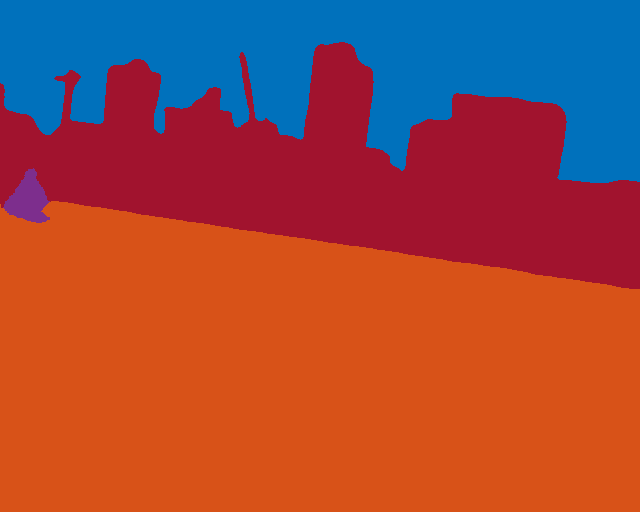

this is the raw image
this is the ground truth mask
this is the colored inferred image


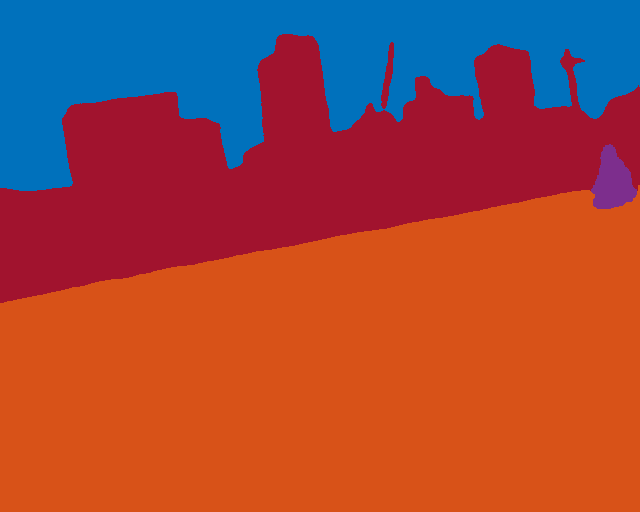

prev=1133,i=1134
iteration running is 1134
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


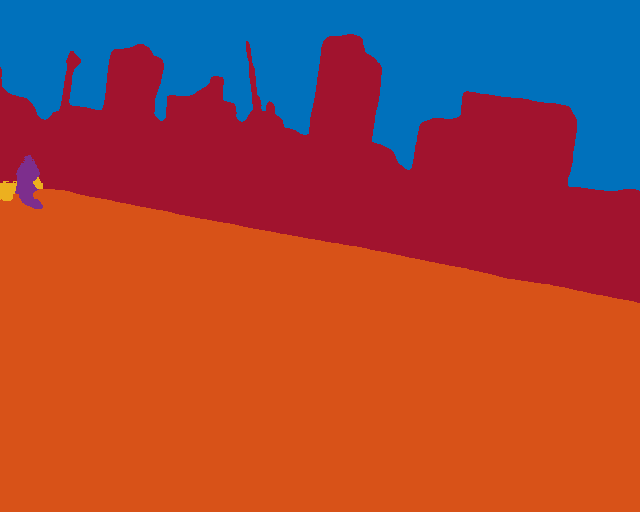

this is the raw image
this is the ground truth mask
this is the colored inferred image


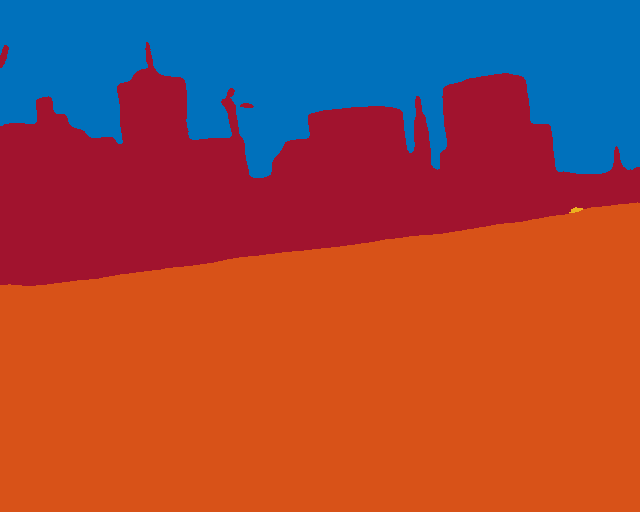

prev=1135,i=1136
iteration running is 1136
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


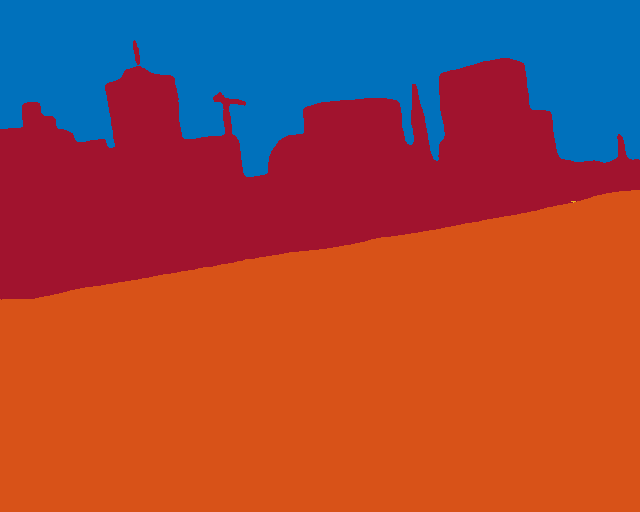

this is the raw image
this is the ground truth mask
this is the colored inferred image


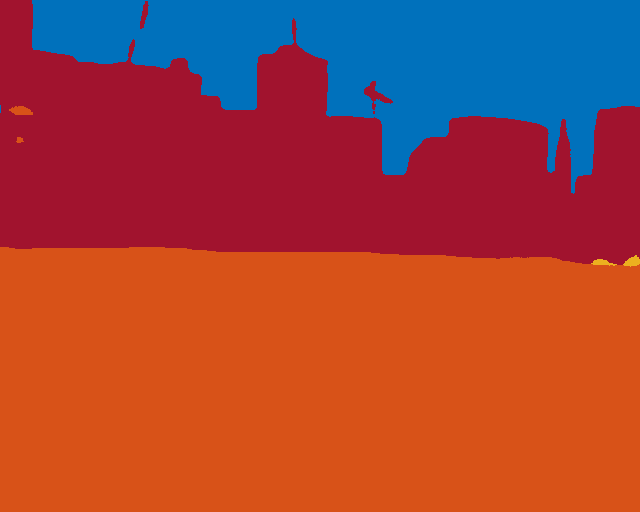

prev=1137,i=1138
iteration running is 1138
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


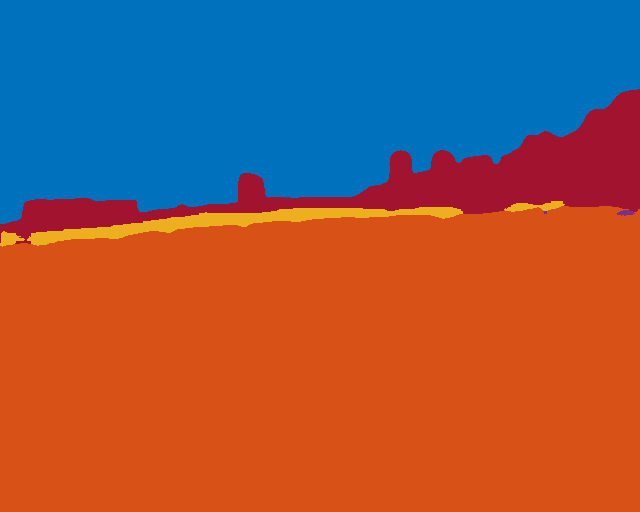

this is the raw image
this is the ground truth mask
this is the colored inferred image


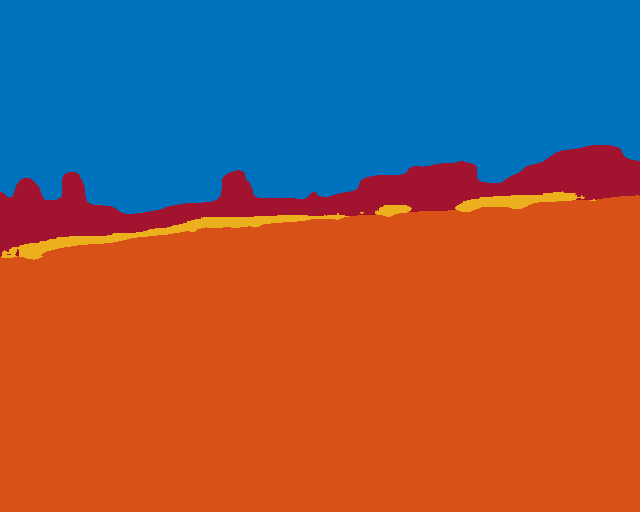

prev=1139,i=1140
iteration running is 1140
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


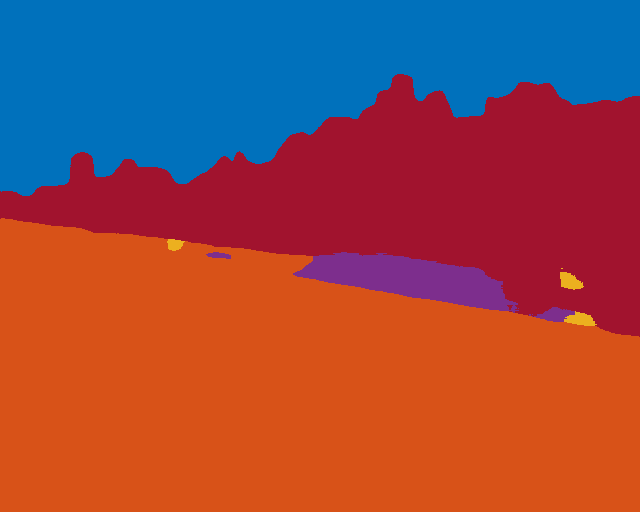

this is the raw image
this is the ground truth mask
this is the colored inferred image


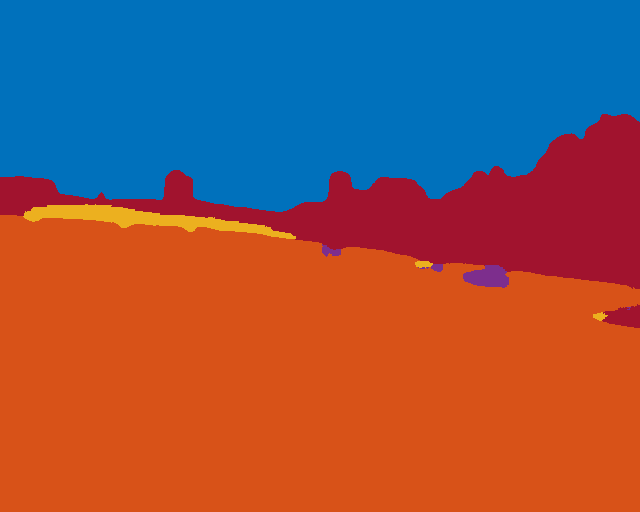

prev=1141,i=1142
iteration running is 1142
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


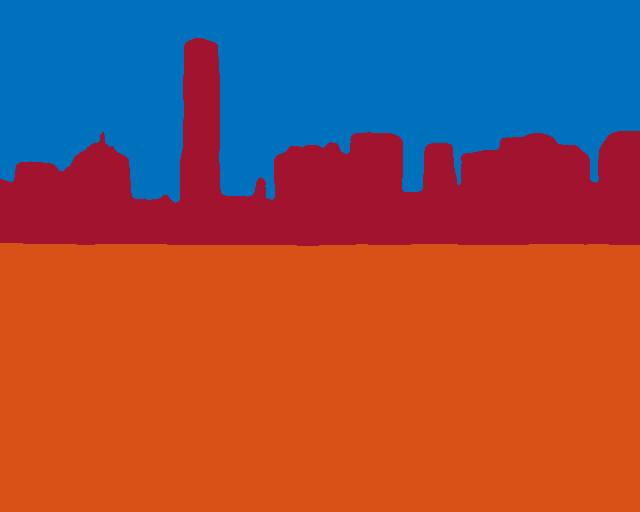

this is the raw image
this is the ground truth mask
this is the colored inferred image


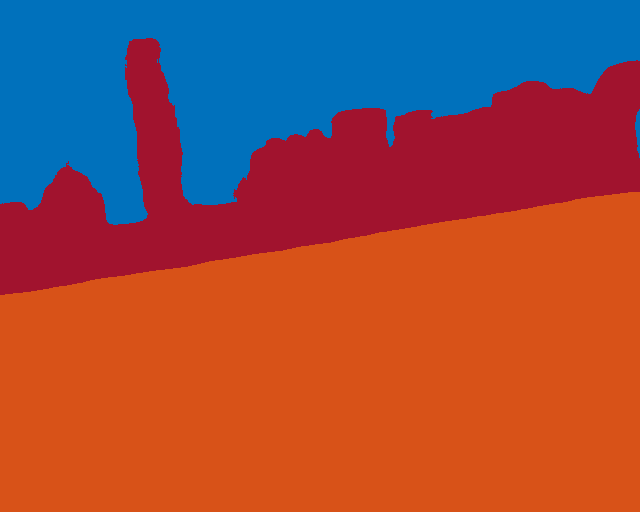

prev=1143,i=1144
iteration running is 1144
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


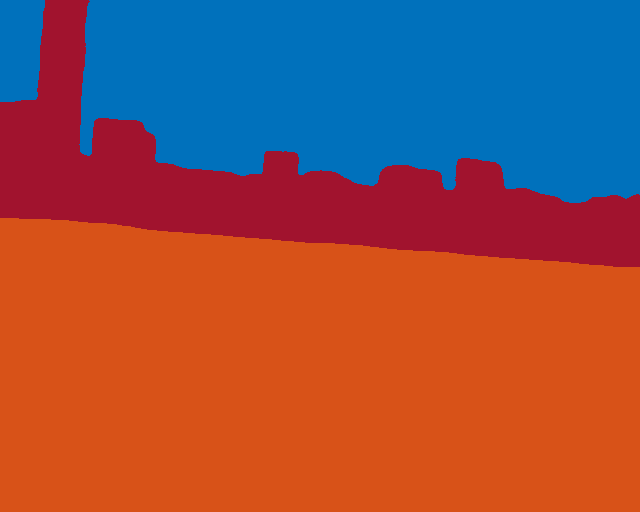

this is the raw image
this is the ground truth mask
this is the colored inferred image


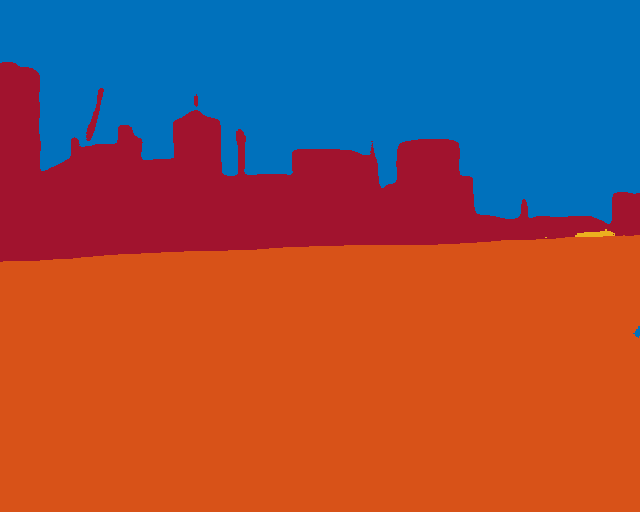

prev=1145,i=1146
iteration running is 1146
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


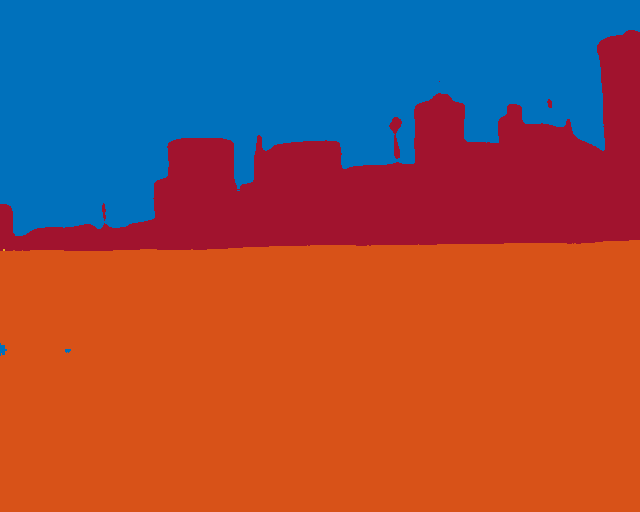

this is the raw image
this is the ground truth mask
this is the colored inferred image


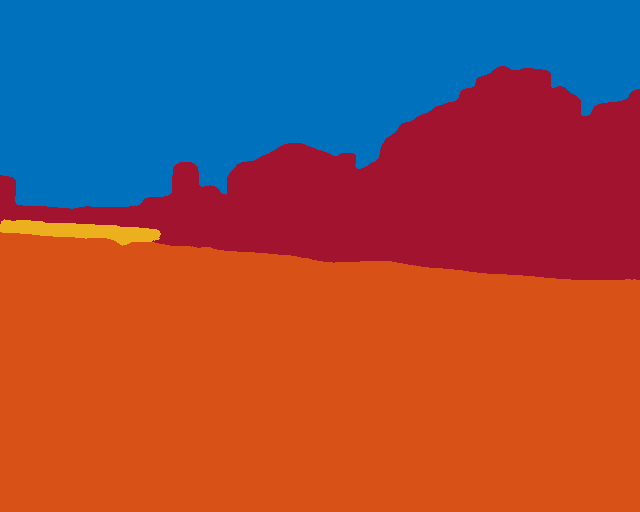

prev=1147,i=1148
iteration running is 1148
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


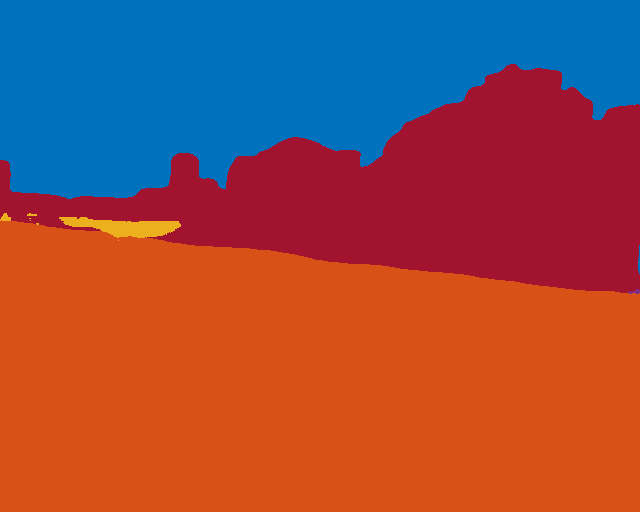

this is the raw image
this is the ground truth mask
this is the colored inferred image


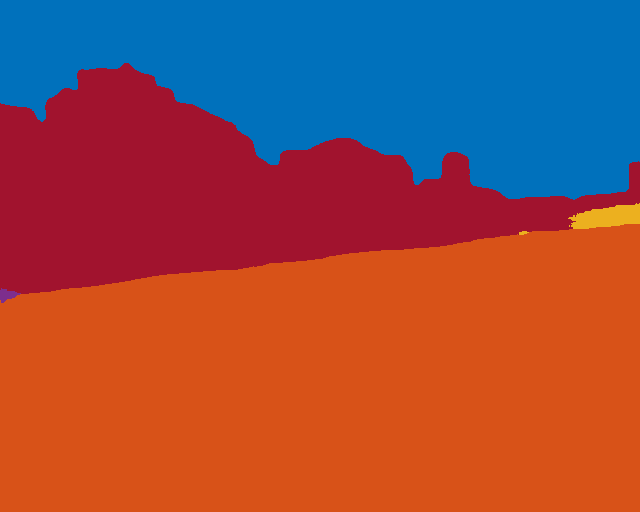

prev=1149,i=1150
iteration running is 1150
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


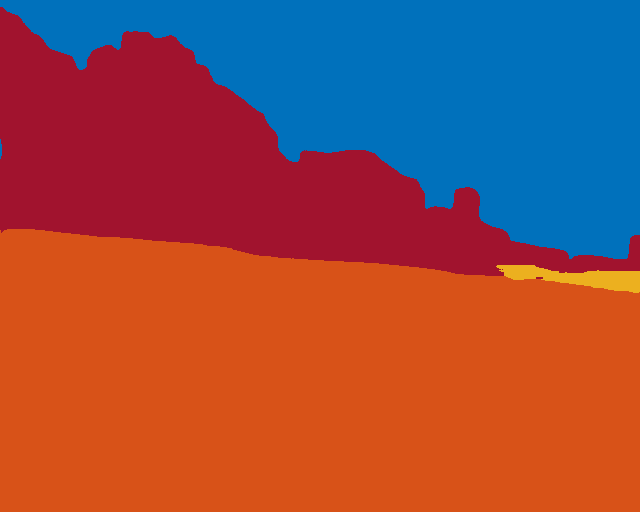

this is the raw image
this is the ground truth mask
this is the colored inferred image


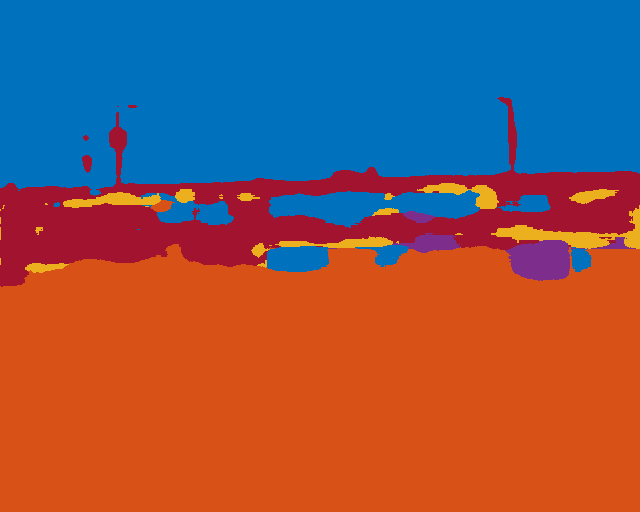

prev=1151,i=1152
iteration running is 1152
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


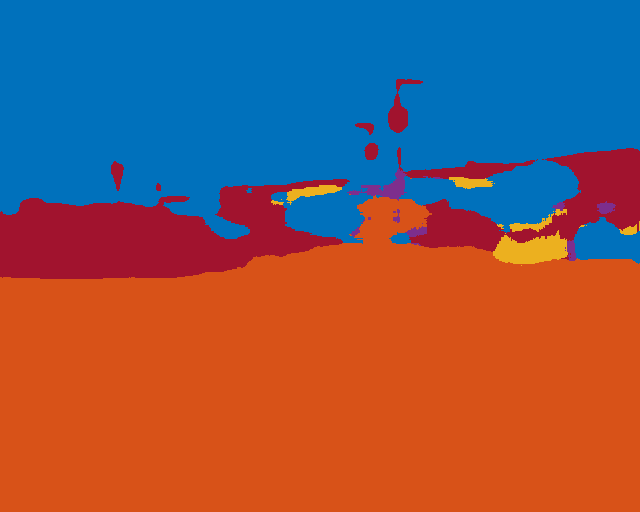

this is the raw image
this is the ground truth mask
this is the colored inferred image


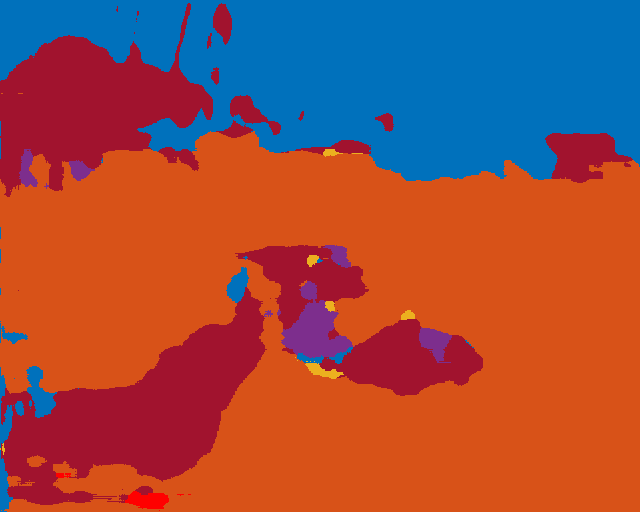

prev=1153,i=1154
iteration running is 1154
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


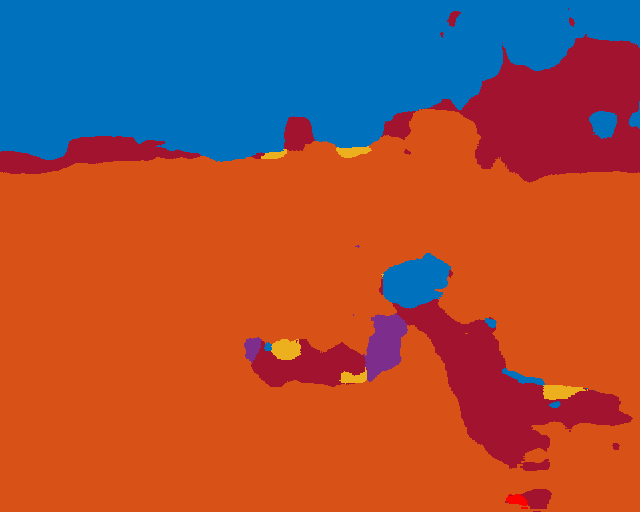

this is the raw image
this is the ground truth mask
this is the colored inferred image


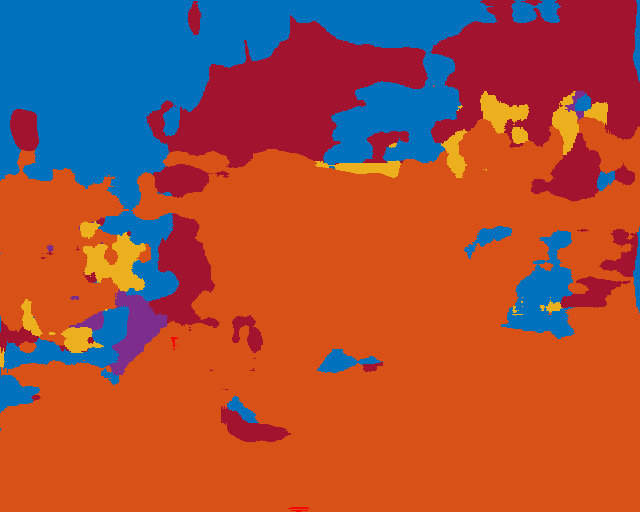

prev=1155,i=1156
iteration running is 1156
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


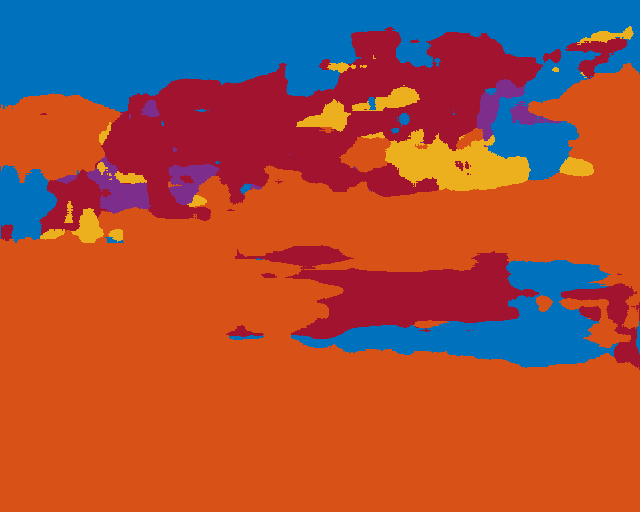

this is the raw image
this is the ground truth mask
this is the colored inferred image


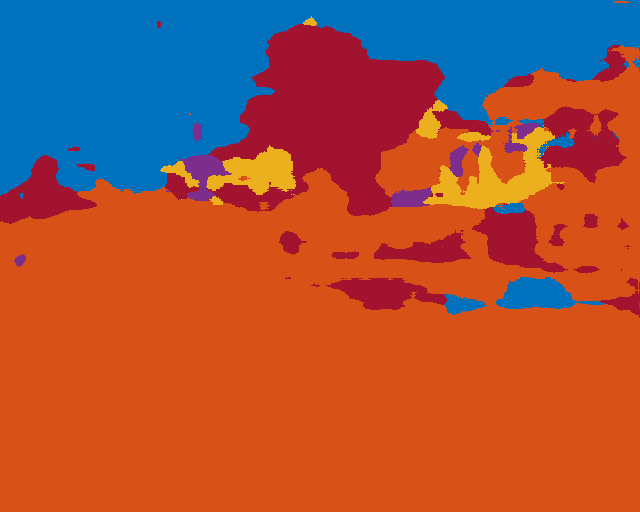

prev=1157,i=1158
iteration running is 1158
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


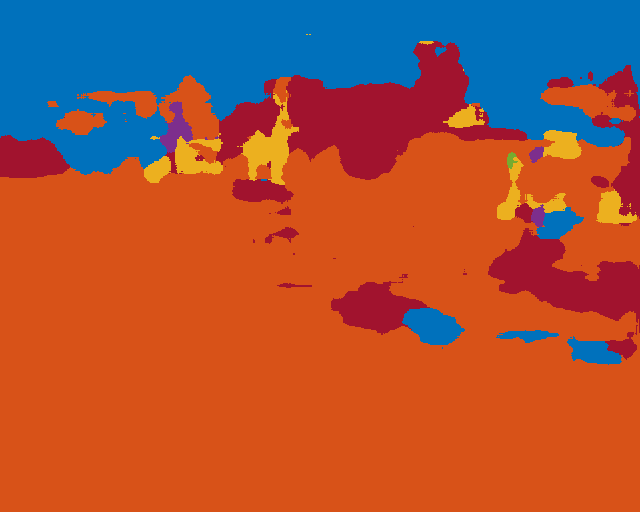

this is the raw image
this is the ground truth mask
this is the colored inferred image


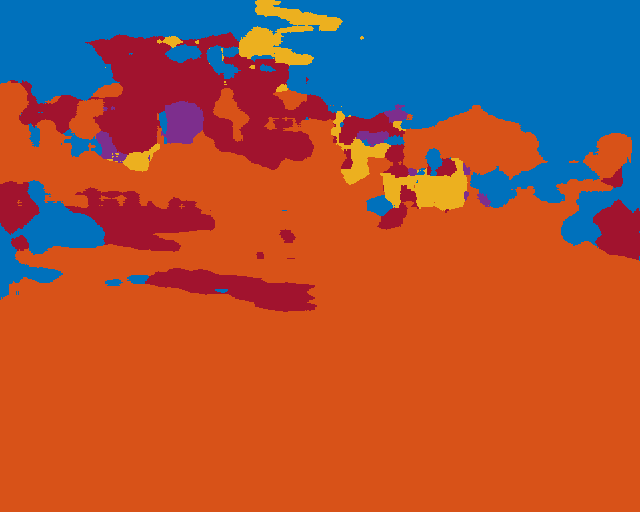

prev=1159,i=1160
iteration running is 1160
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


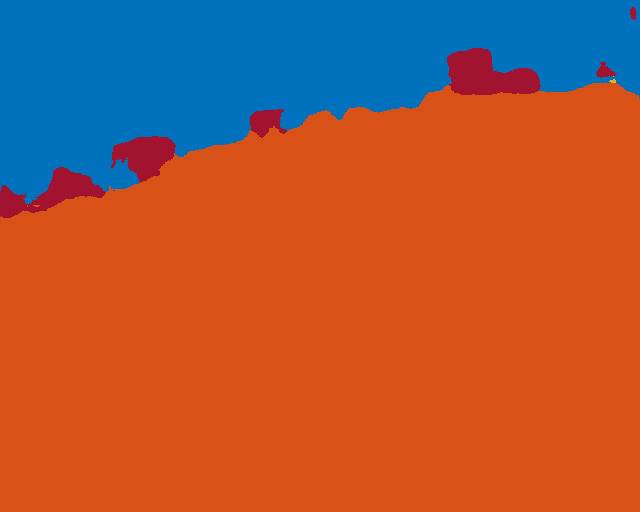

this is the raw image
this is the ground truth mask
this is the colored inferred image


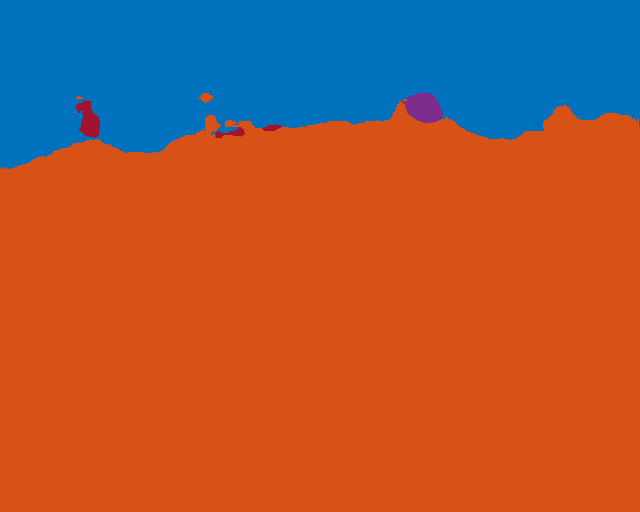

prev=1161,i=1162
iteration running is 1162
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


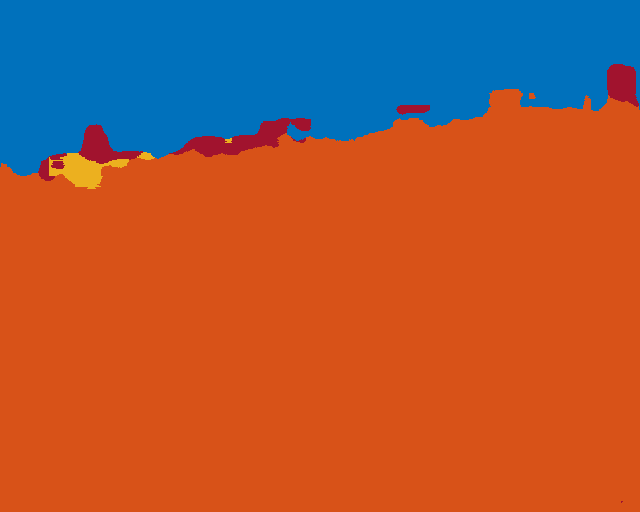

this is the raw image
this is the ground truth mask
this is the colored inferred image


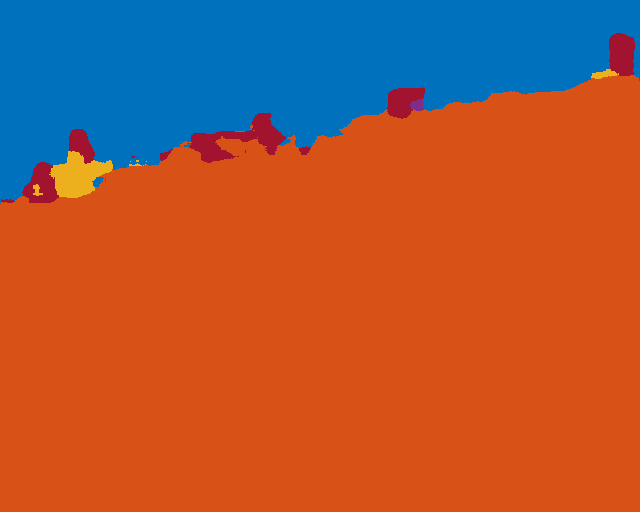

prev=1163,i=1164
iteration running is 1164
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


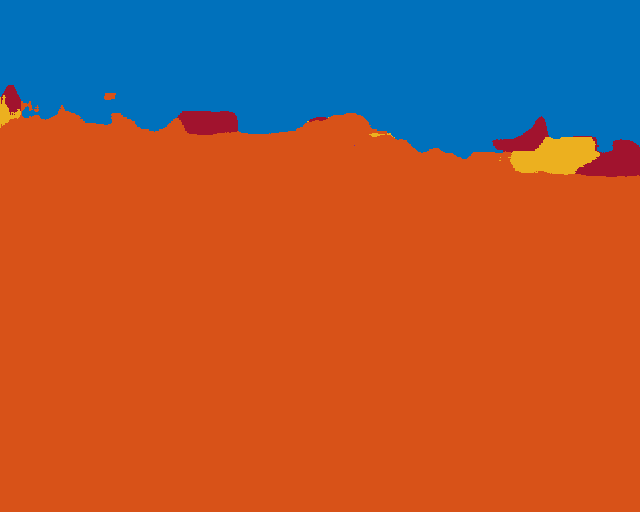

this is the raw image
this is the ground truth mask
this is the colored inferred image


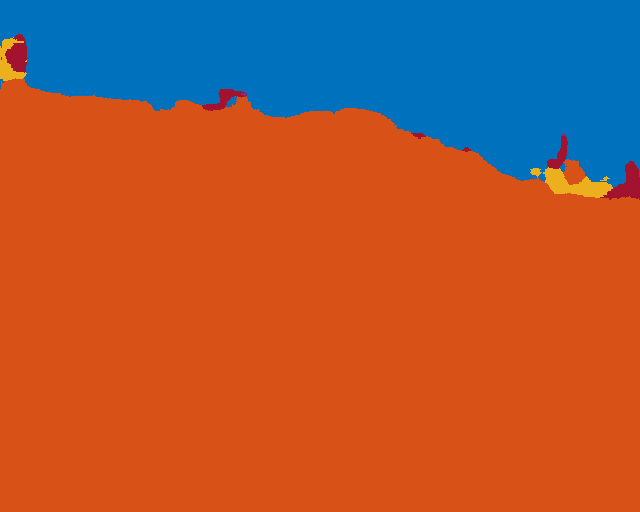

prev=1165,i=1166
iteration running is 1166
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


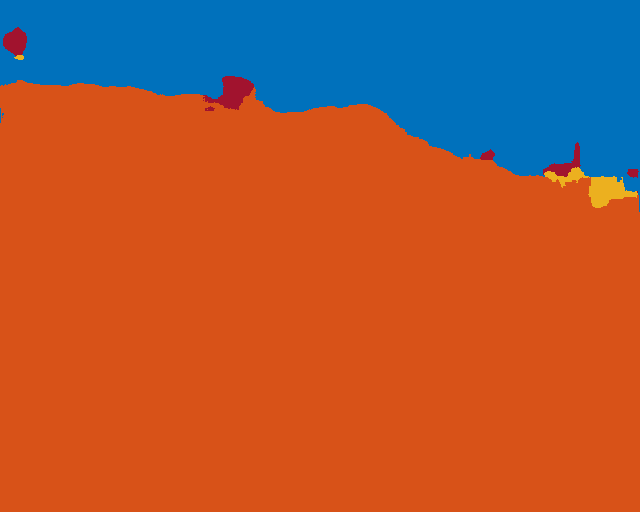

this is the raw image
this is the ground truth mask
this is the colored inferred image


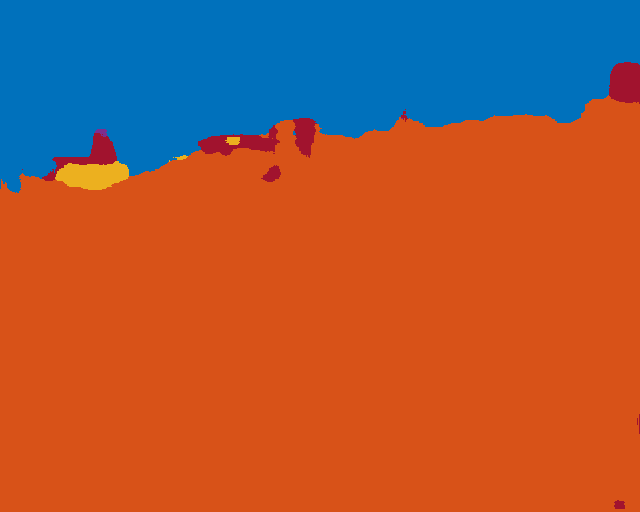

prev=1167,i=1168
iteration running is 1168
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


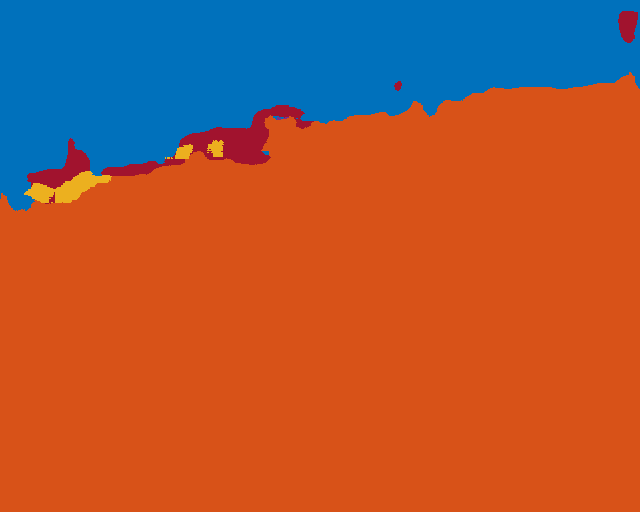

this is the raw image
this is the ground truth mask
this is the colored inferred image


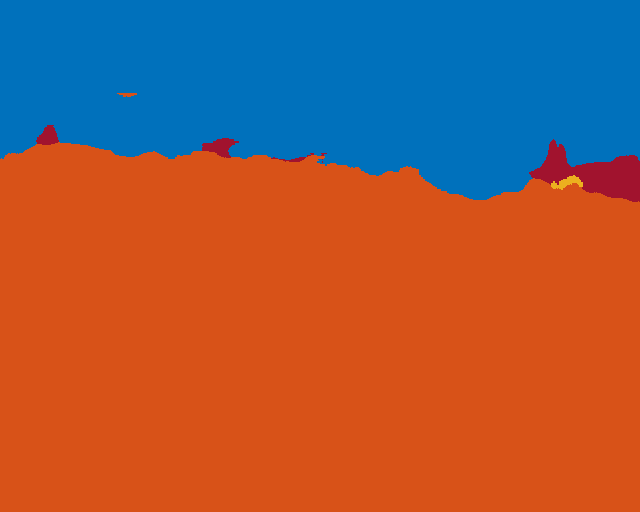

prev=1169,i=1170
iteration running is 1170
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


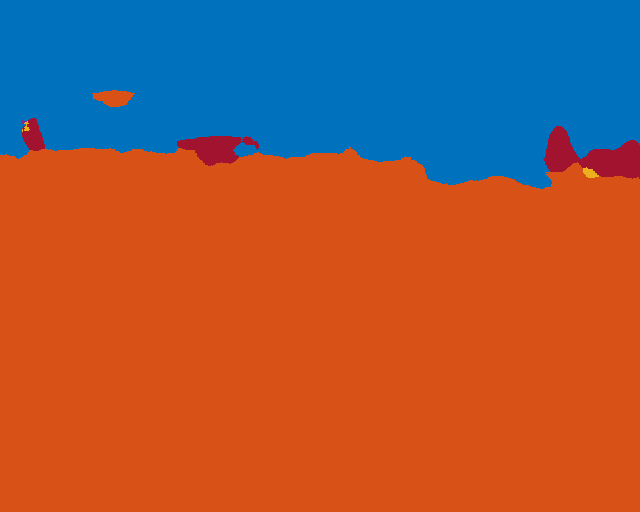

this is the raw image
this is the ground truth mask
this is the colored inferred image


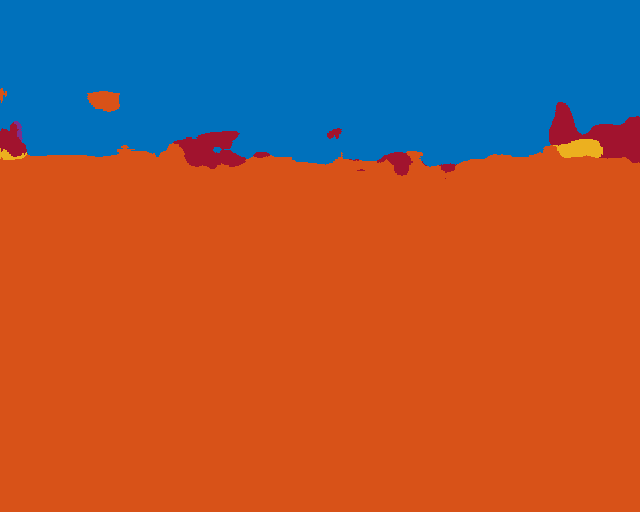

prev=1171,i=1172
iteration running is 1172
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


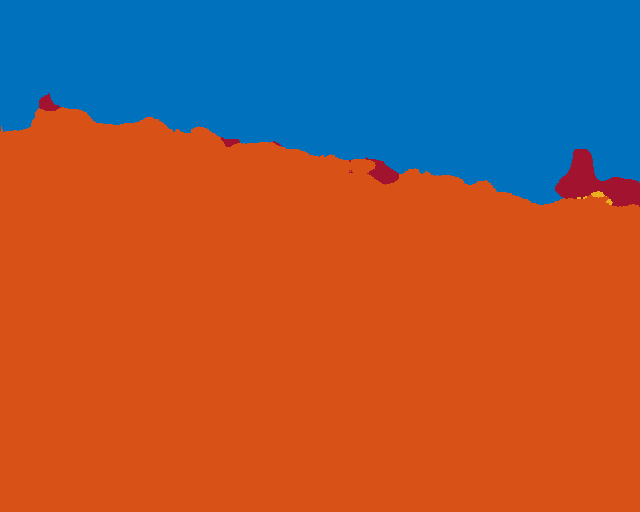

this is the raw image
this is the ground truth mask
this is the colored inferred image


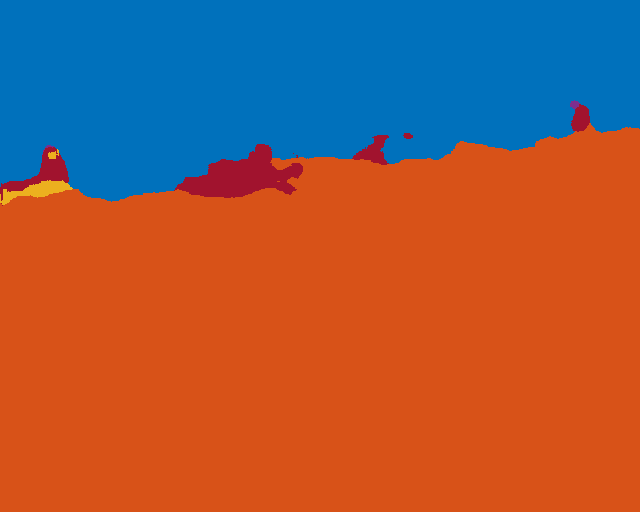

prev=1173,i=1174
iteration running is 1174
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


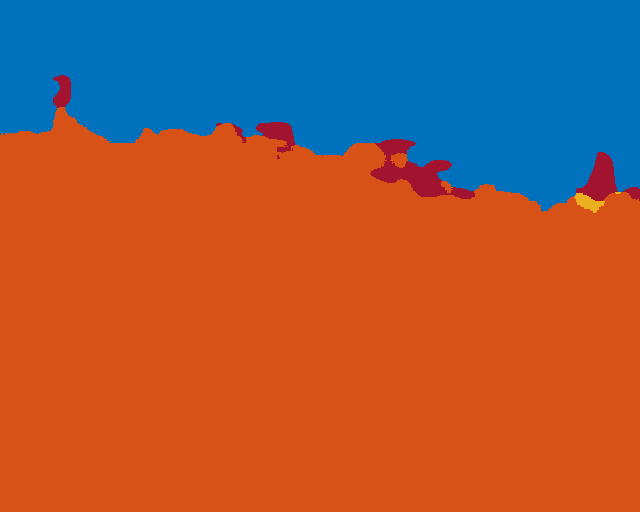

this is the raw image
this is the ground truth mask
this is the colored inferred image


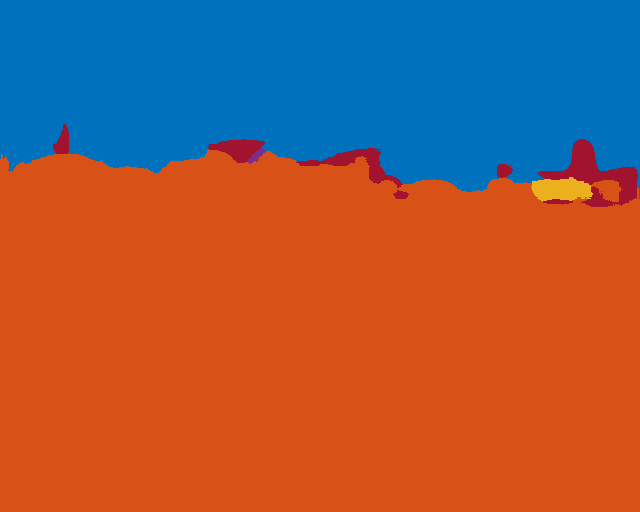

prev=1175,i=1176
iteration running is 1176
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


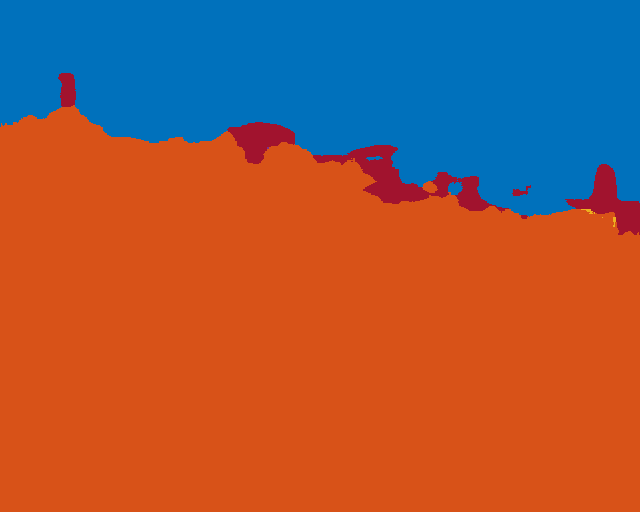

this is the raw image
this is the ground truth mask
this is the colored inferred image


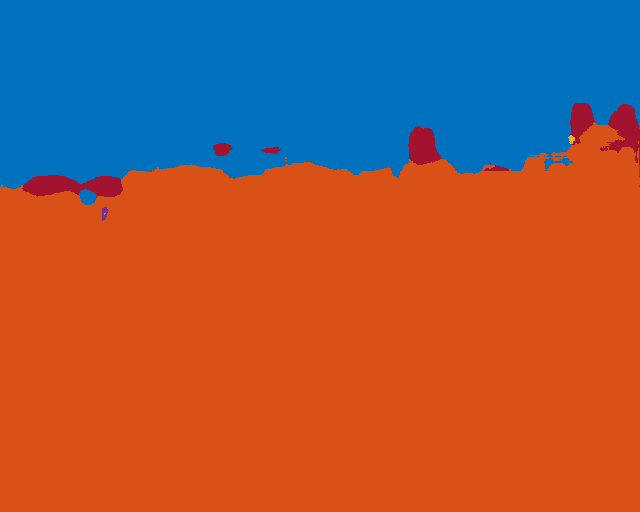

prev=1177,i=1178
iteration running is 1178
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


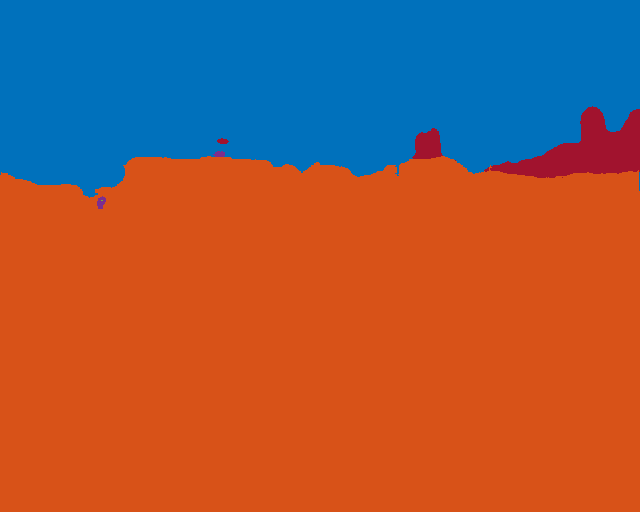

this is the raw image
this is the ground truth mask
this is the colored inferred image


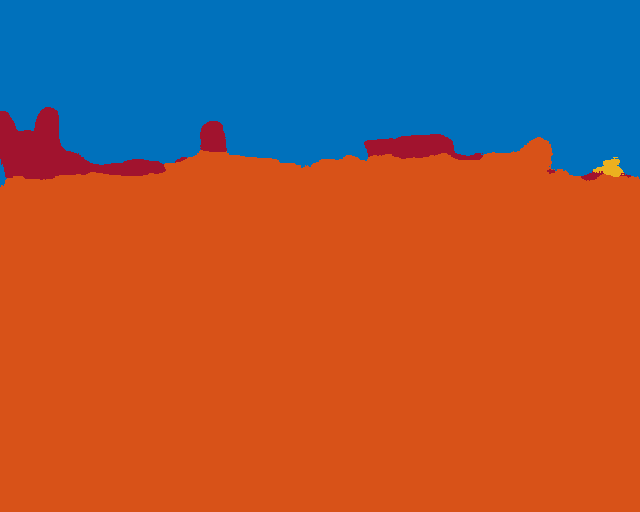

prev=1179,i=1180
iteration running is 1180
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


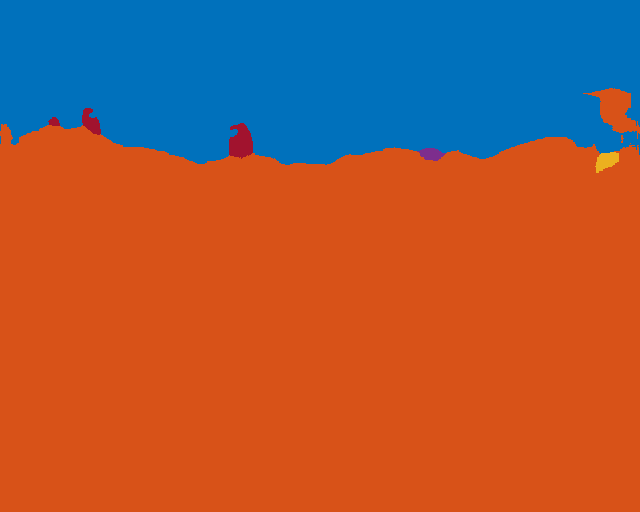

this is the raw image
this is the ground truth mask
this is the colored inferred image


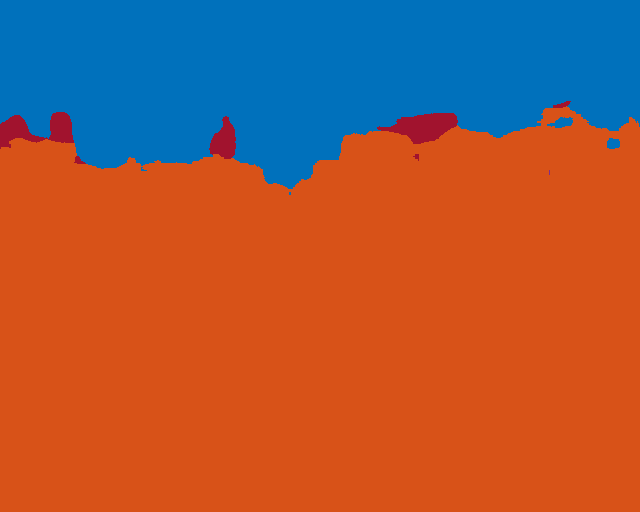

prev=1181,i=1182
iteration running is 1182
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


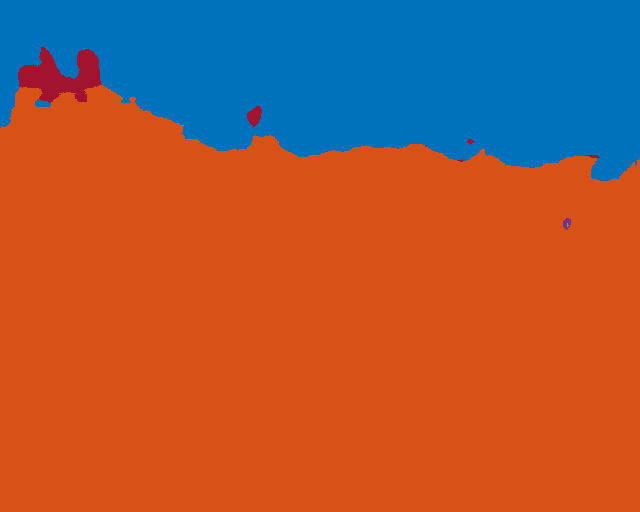

this is the raw image
this is the ground truth mask
this is the colored inferred image


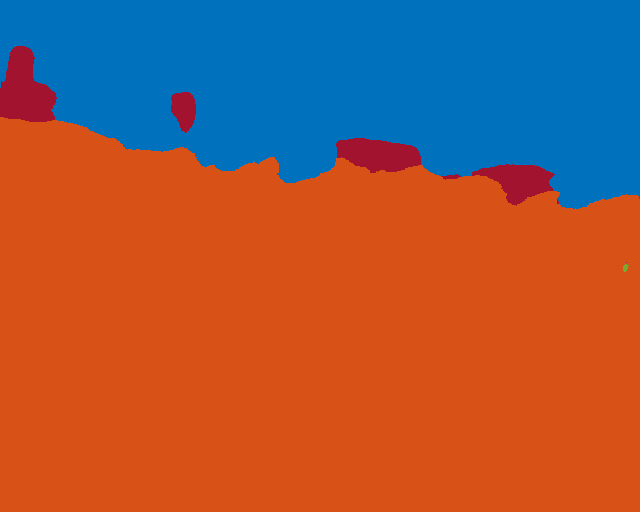

prev=1183,i=1184
iteration running is 1184
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


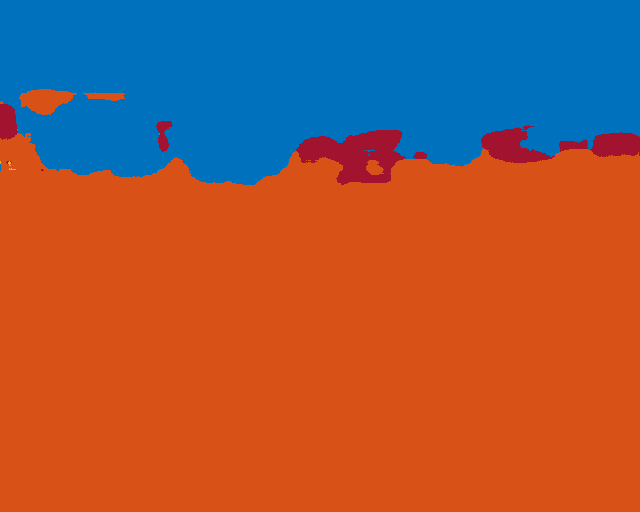

this is the raw image
this is the ground truth mask
this is the colored inferred image


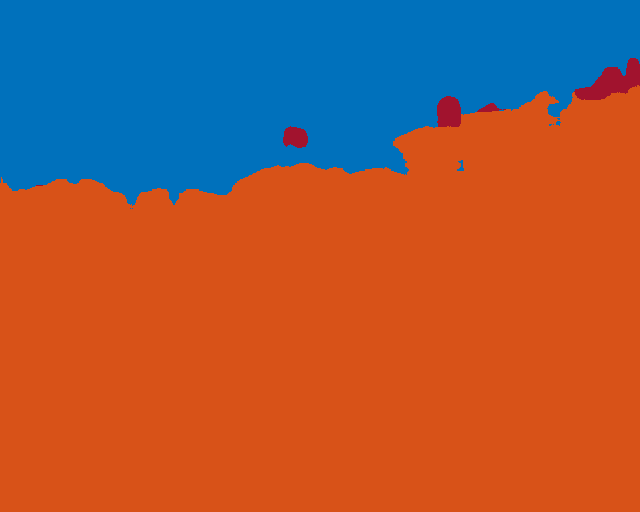

prev=1185,i=1186
iteration running is 1186
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


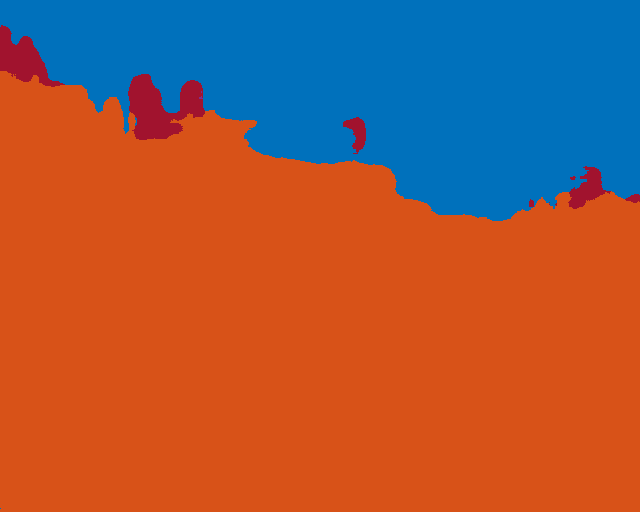

this is the raw image
this is the ground truth mask
this is the colored inferred image


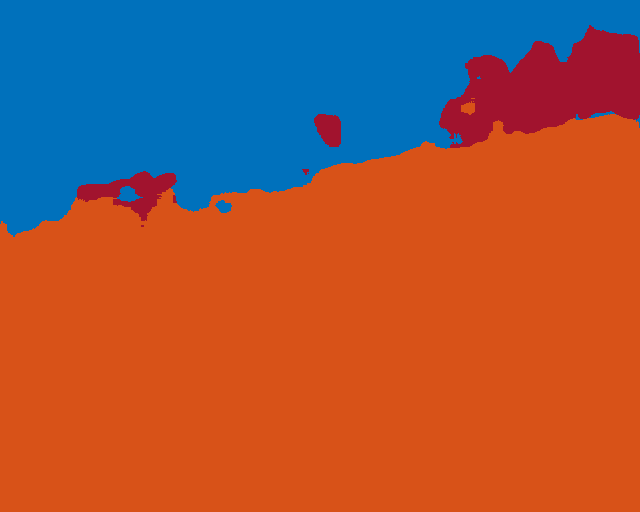

prev=1187,i=1188
iteration running is 1188
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


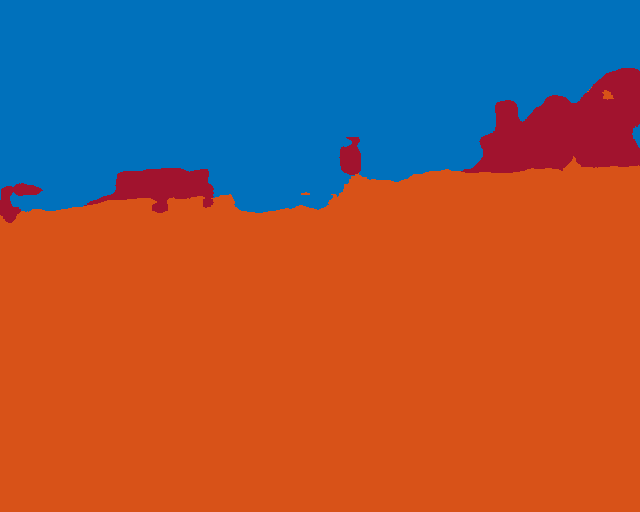

this is the raw image
this is the ground truth mask
this is the colored inferred image


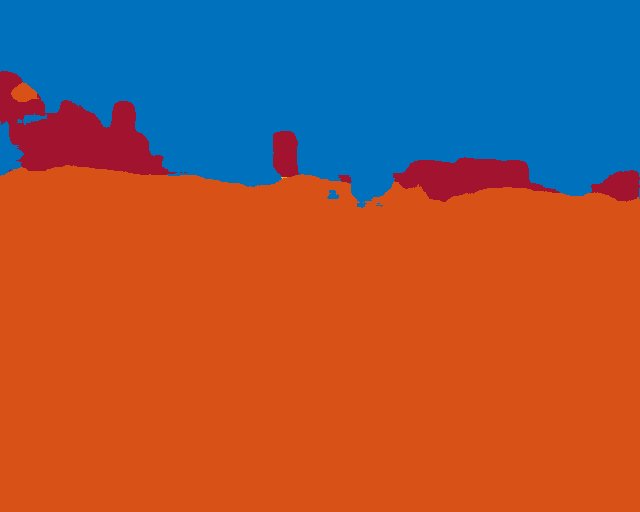

prev=1189,i=1190
iteration running is 1190
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


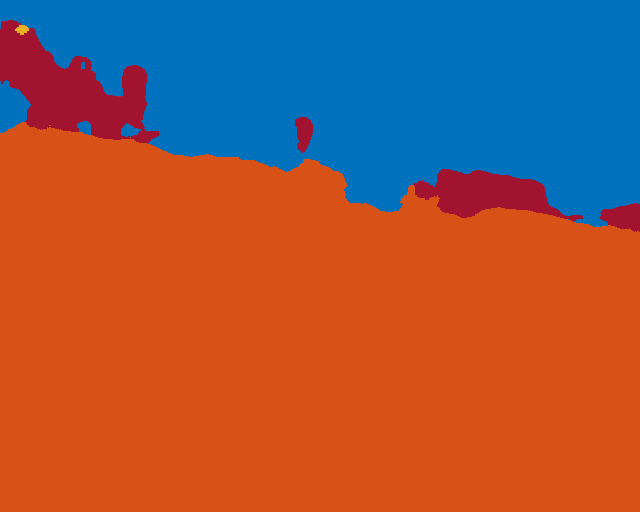

this is the raw image
this is the ground truth mask
this is the colored inferred image


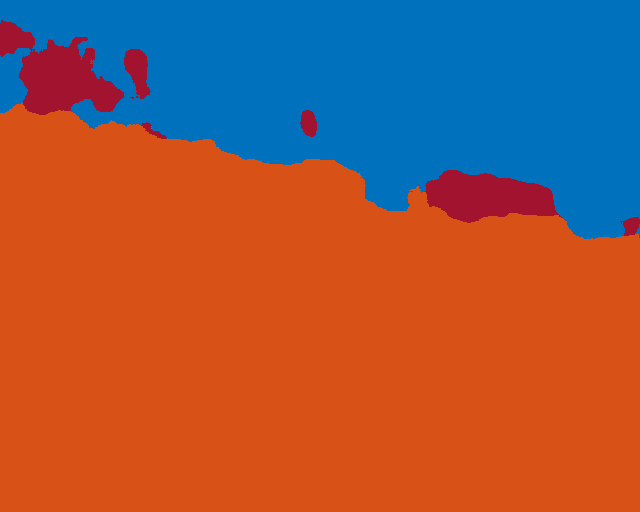

prev=1191,i=1192
iteration running is 1192
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


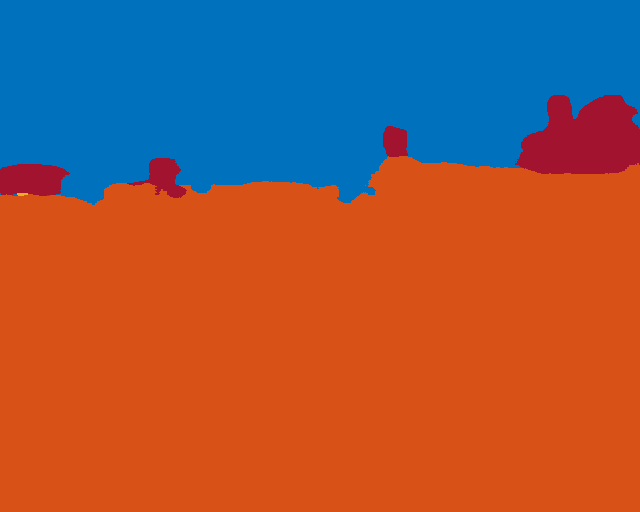

this is the raw image
this is the ground truth mask
this is the colored inferred image


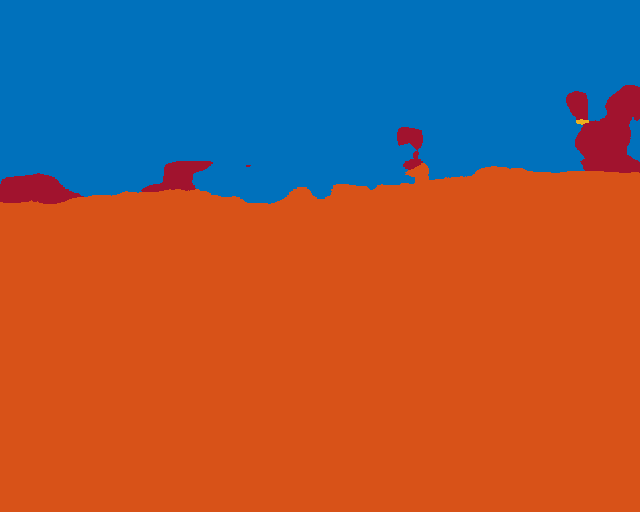

prev=1193,i=1194
iteration running is 1194
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


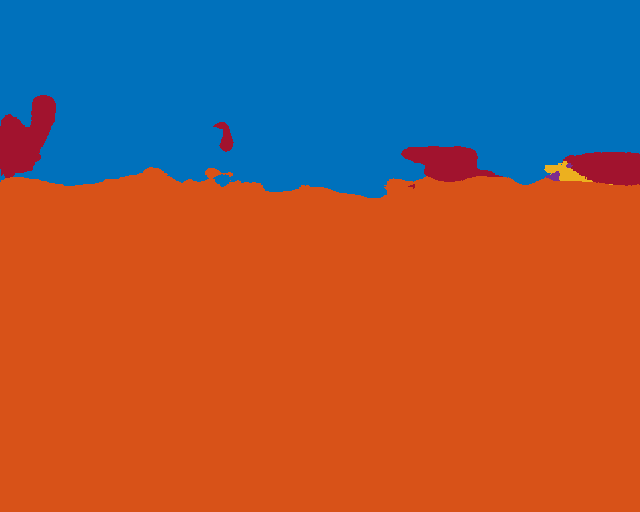

this is the raw image
this is the ground truth mask
this is the colored inferred image


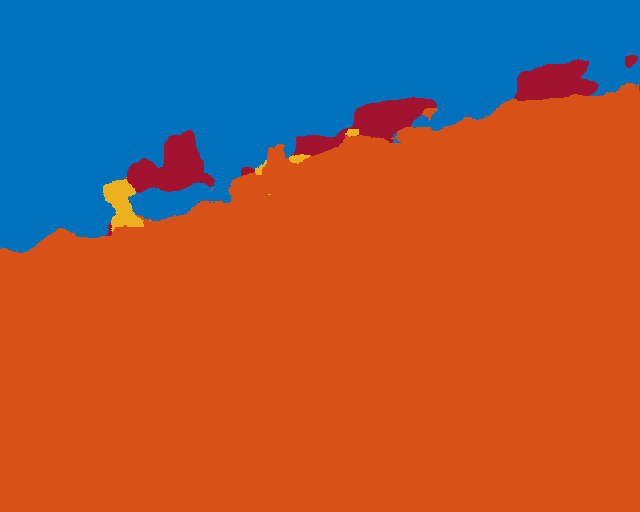

prev=1195,i=1196
iteration running is 1196
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


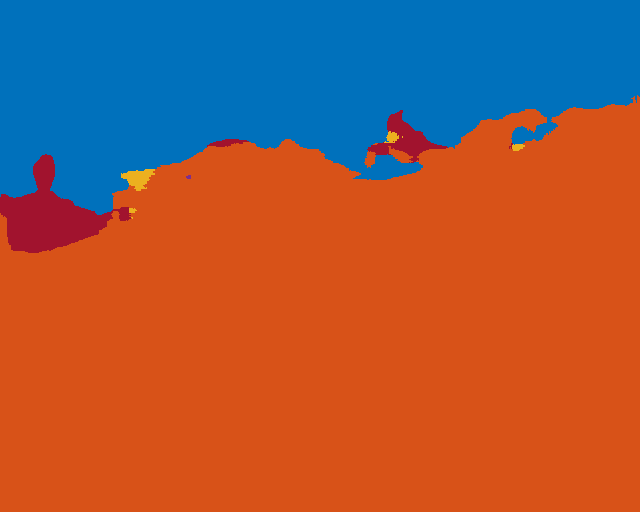

this is the raw image
this is the ground truth mask
this is the colored inferred image


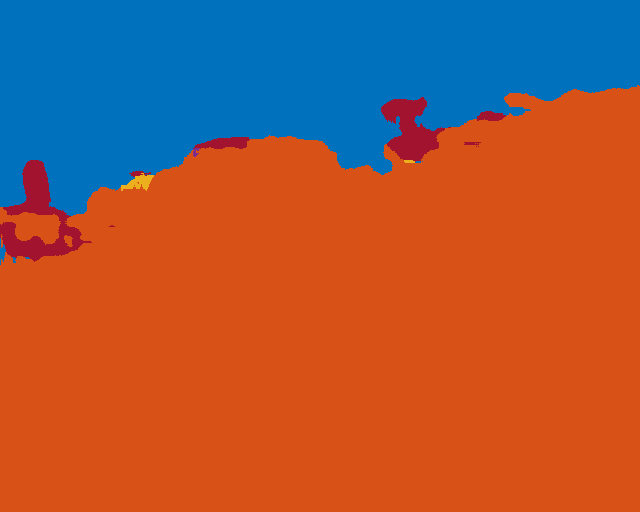

prev=1197,i=1198
iteration running is 1198
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


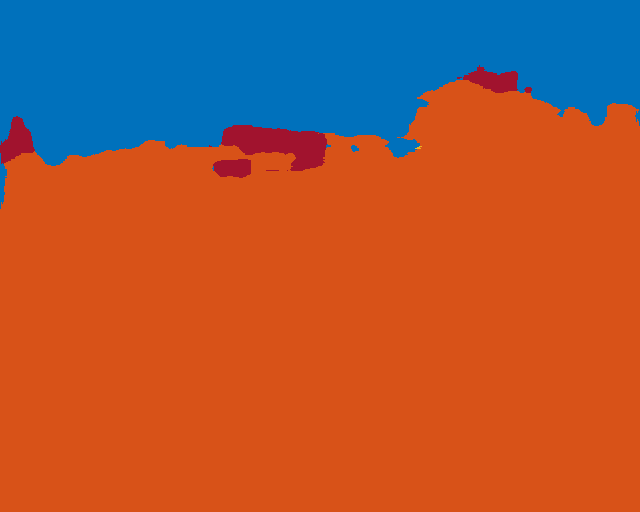

this is the raw image
this is the ground truth mask
this is the colored inferred image


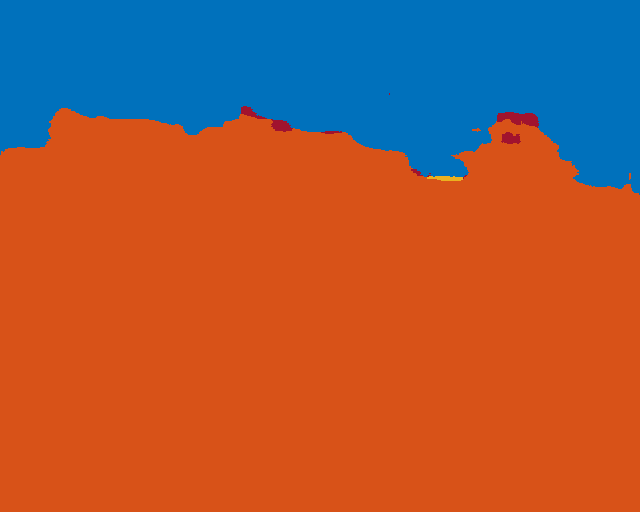

prev=1199,i=1200
iteration running is 1200
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


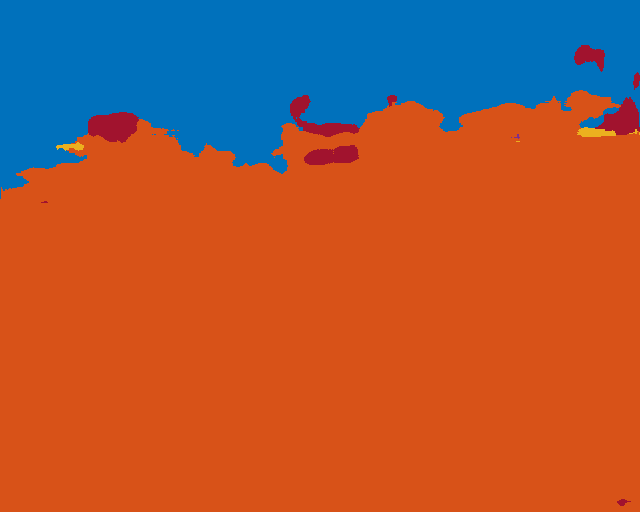

this is the raw image
this is the ground truth mask
this is the colored inferred image


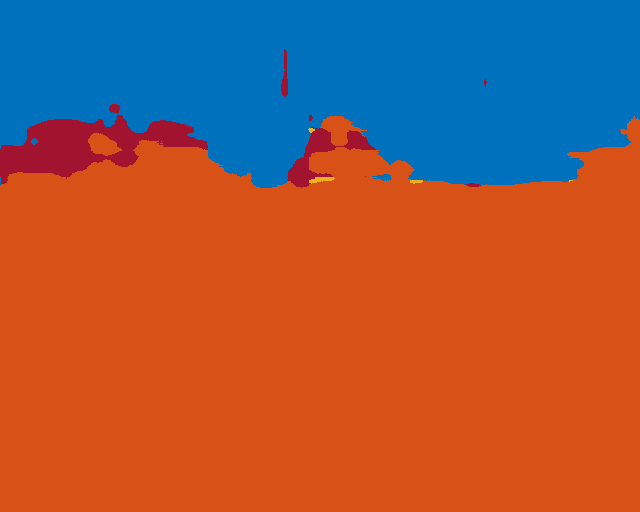

prev=1201,i=1202
iteration running is 1202
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


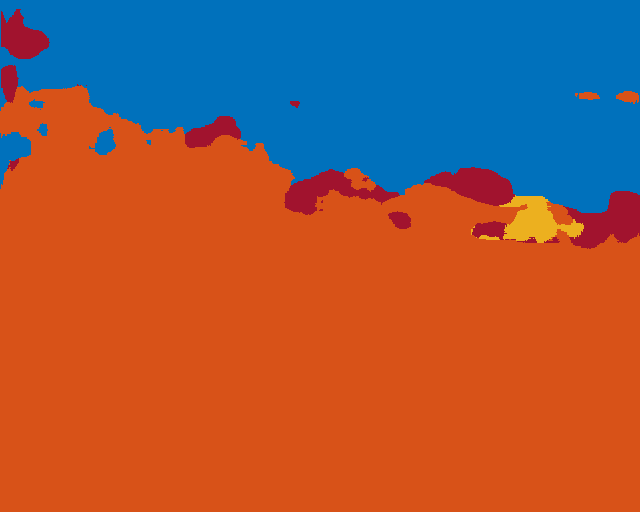

this is the raw image
this is the ground truth mask
this is the colored inferred image


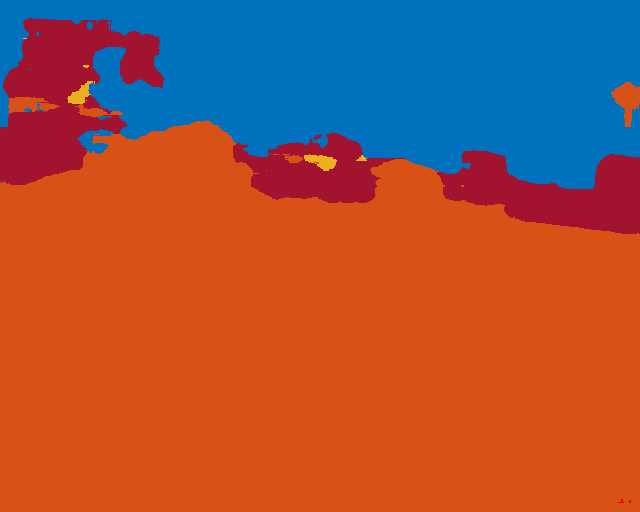

prev=1203,i=1204
iteration running is 1204
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


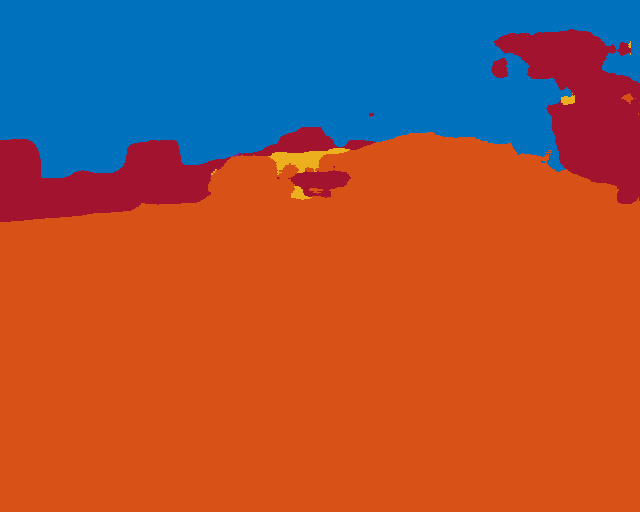

this is the raw image
this is the ground truth mask
this is the colored inferred image


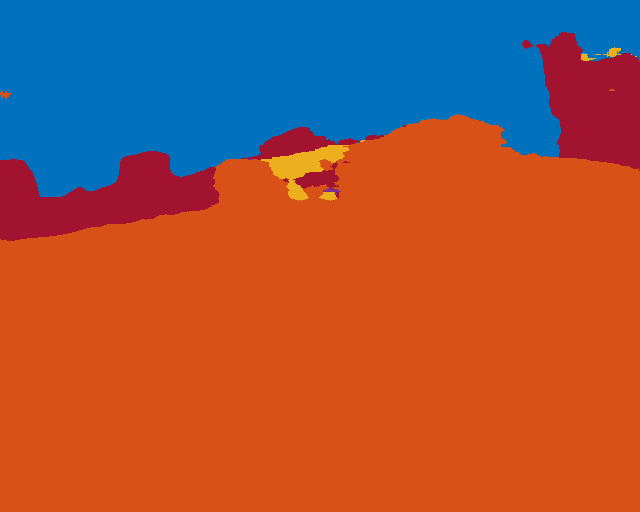

prev=1205,i=1206
iteration running is 1206
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


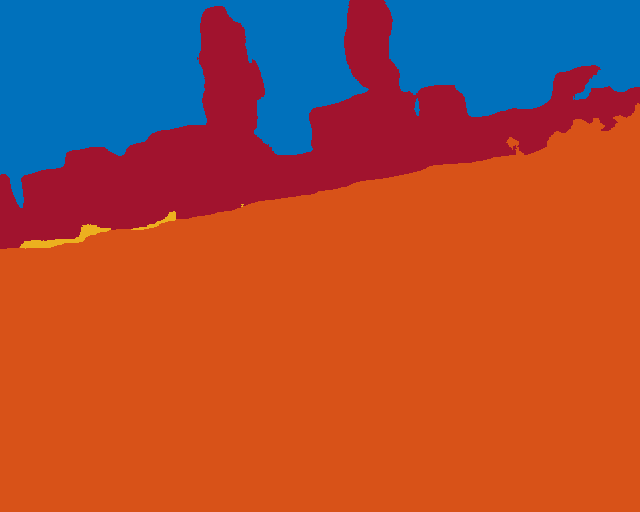

this is the raw image
this is the ground truth mask
this is the colored inferred image


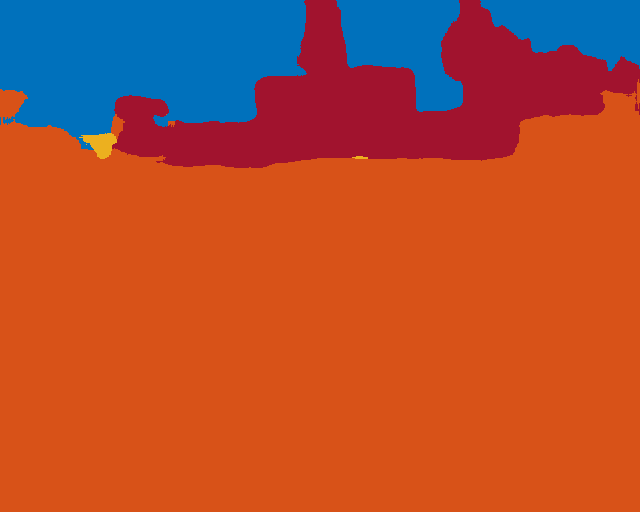

prev=1207,i=1208
iteration running is 1208
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


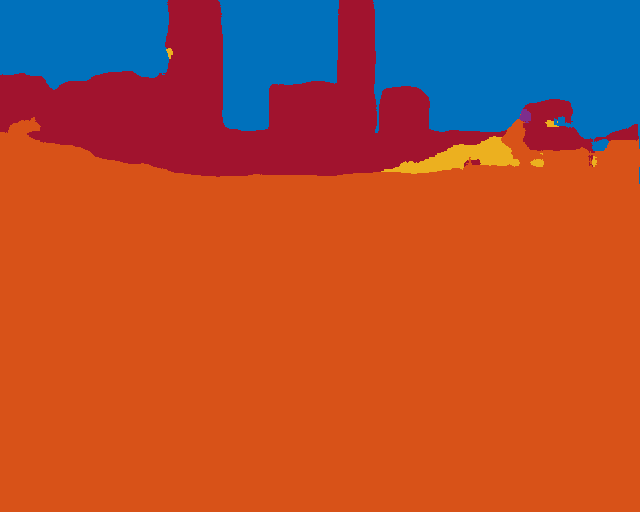

this is the raw image
this is the ground truth mask
this is the colored inferred image


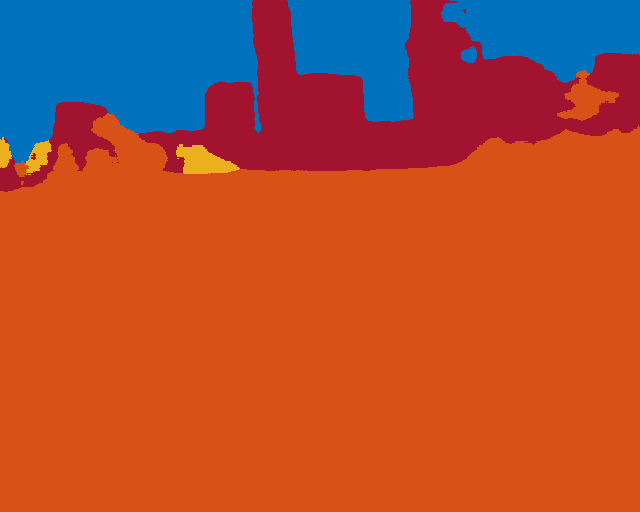

prev=1209,i=1210
iteration running is 1210
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


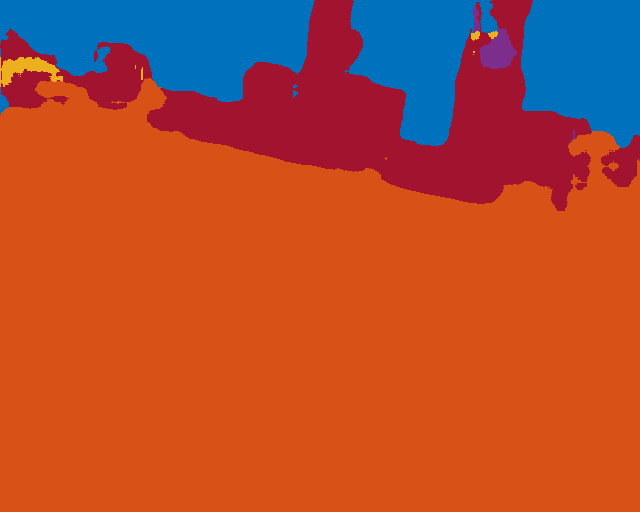

this is the raw image
this is the ground truth mask
this is the colored inferred image


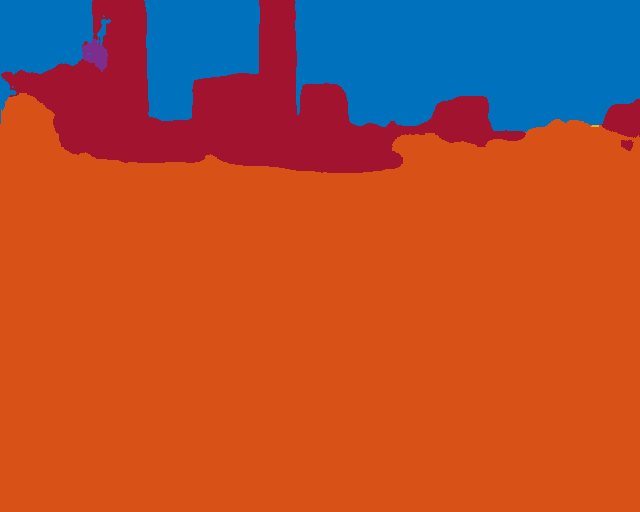

prev=1211,i=1212
iteration running is 1212
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


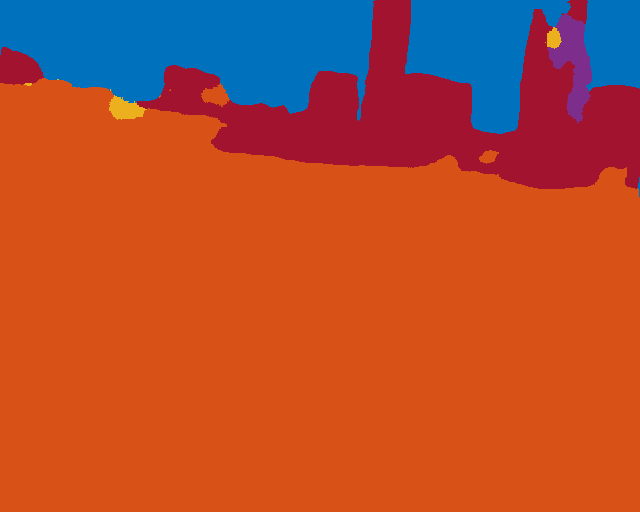

this is the raw image
this is the ground truth mask
this is the colored inferred image


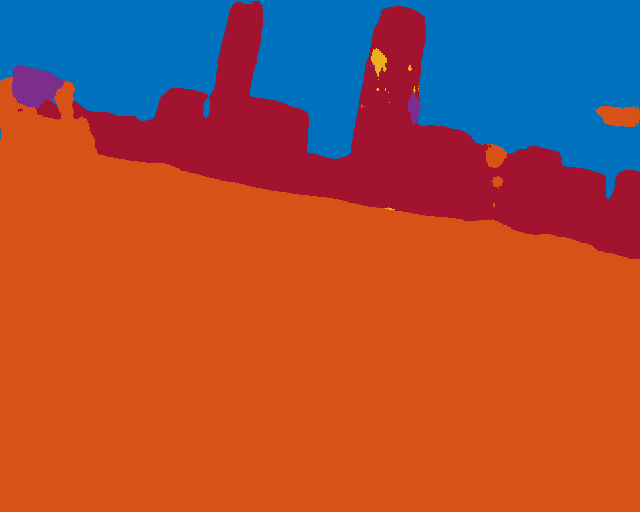

prev=1213,i=1214
iteration running is 1214
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


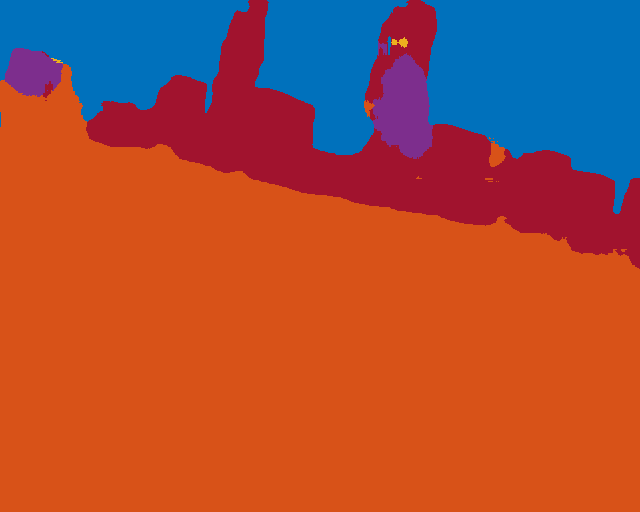

this is the raw image
this is the ground truth mask
this is the colored inferred image


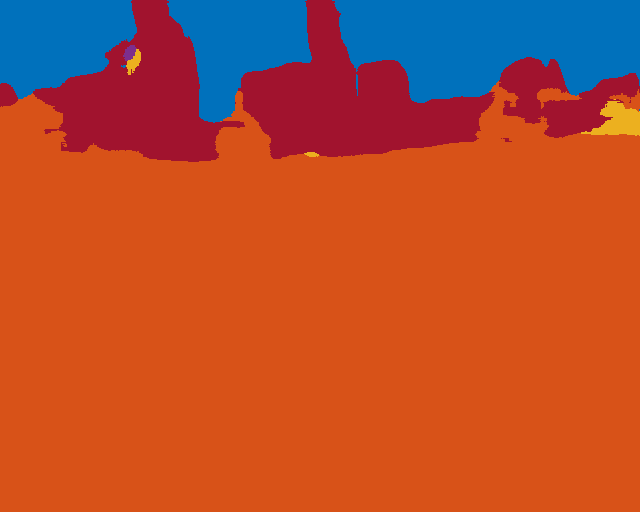

prev=1215,i=1216
iteration running is 1216
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


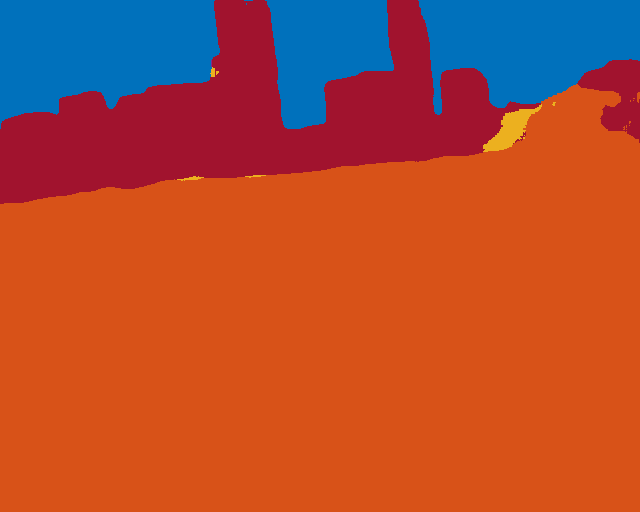

this is the raw image
this is the ground truth mask
this is the colored inferred image


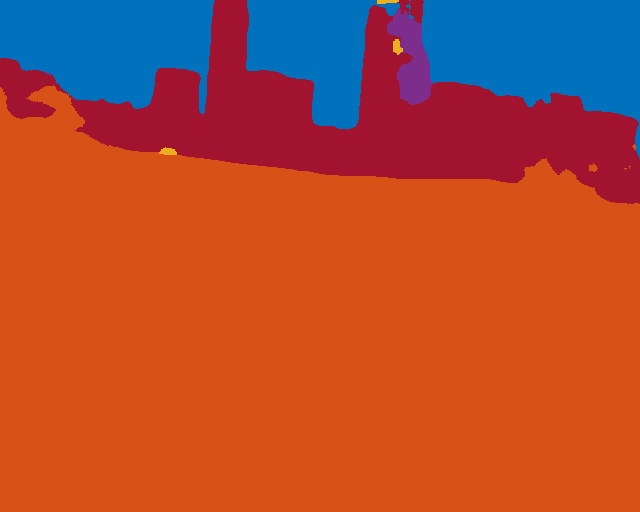

prev=1217,i=1218
iteration running is 1218
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


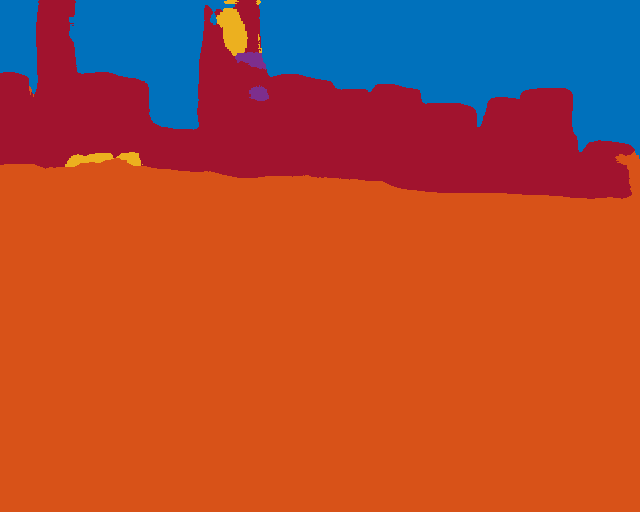

this is the raw image
this is the ground truth mask
this is the colored inferred image


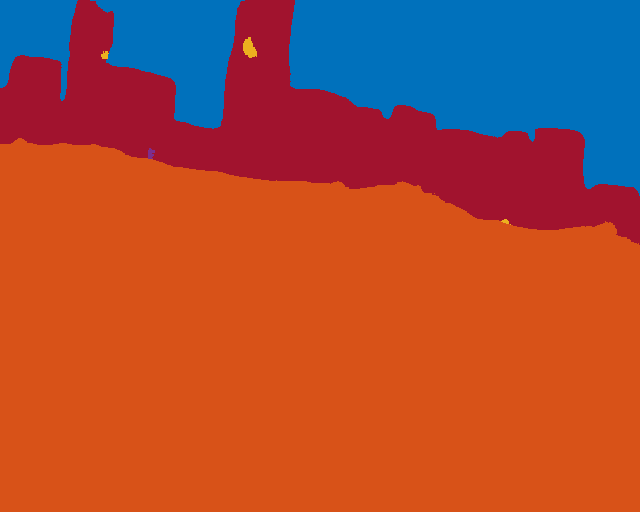

prev=1219,i=1220
iteration running is 1220
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


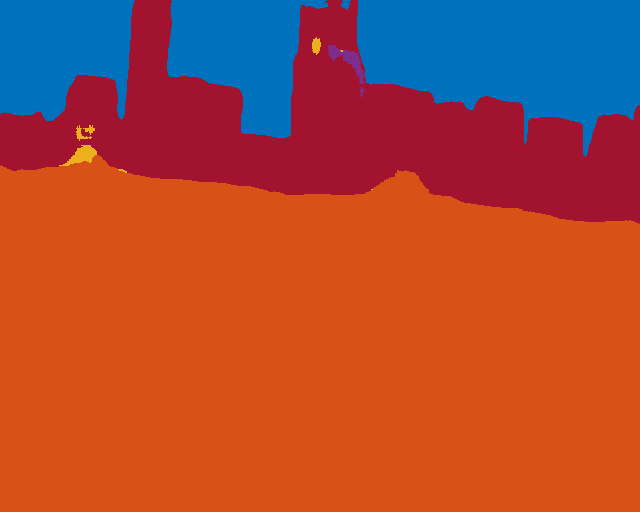

this is the raw image
this is the ground truth mask
this is the colored inferred image


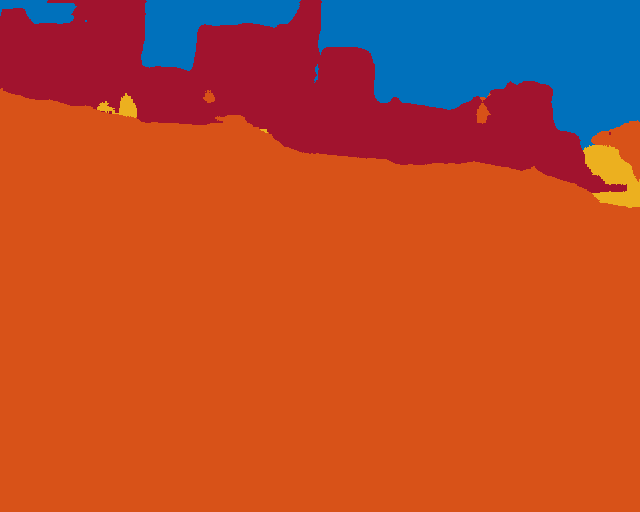

prev=1221,i=1222
iteration running is 1222
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


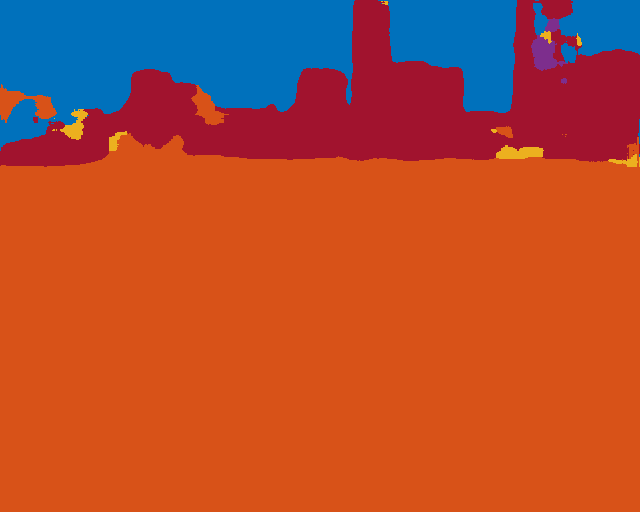

this is the raw image
this is the ground truth mask
this is the colored inferred image


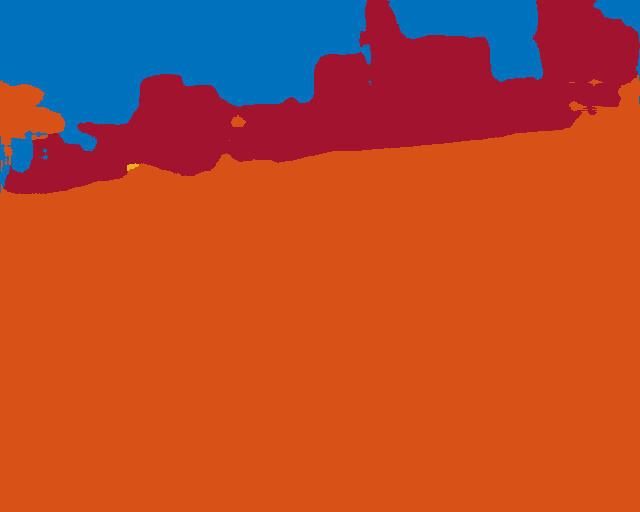

prev=1223,i=1224
iteration running is 1224
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


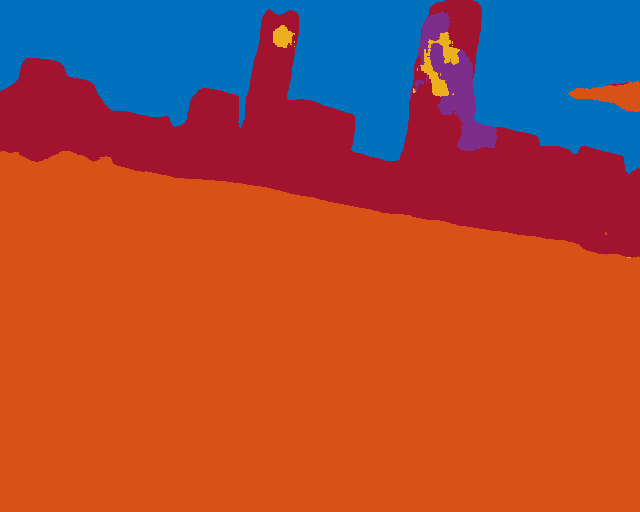

this is the raw image
this is the ground truth mask
this is the colored inferred image


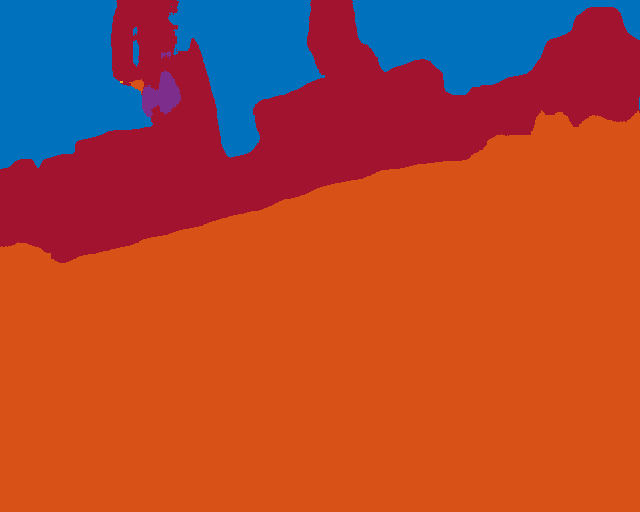

prev=1225,i=1226
iteration running is 1226
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


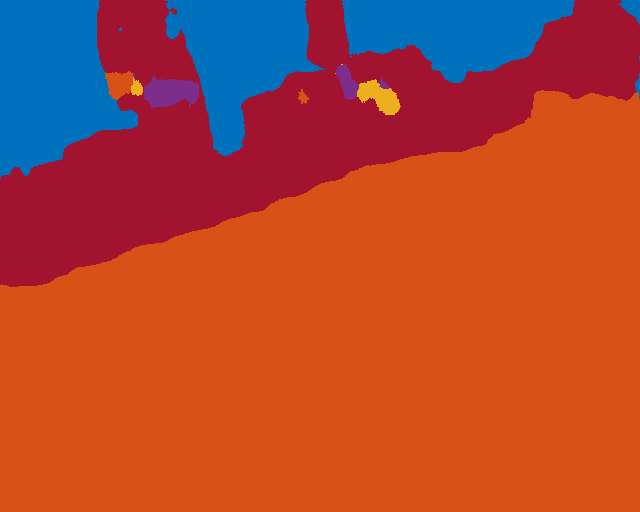

this is the raw image
this is the ground truth mask
this is the colored inferred image


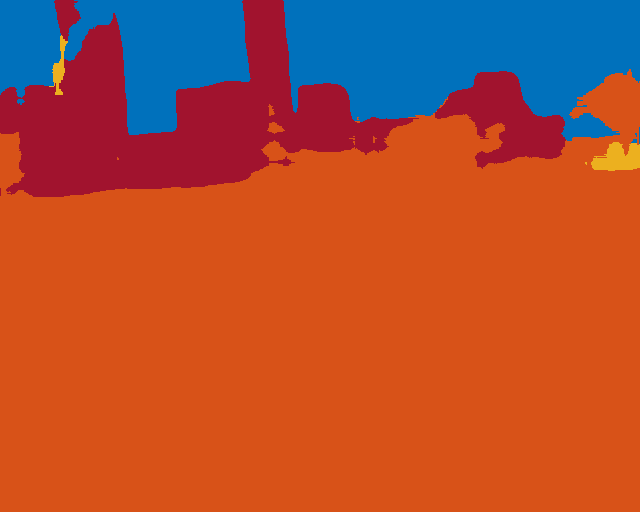

prev=1227,i=1228
iteration running is 1228
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


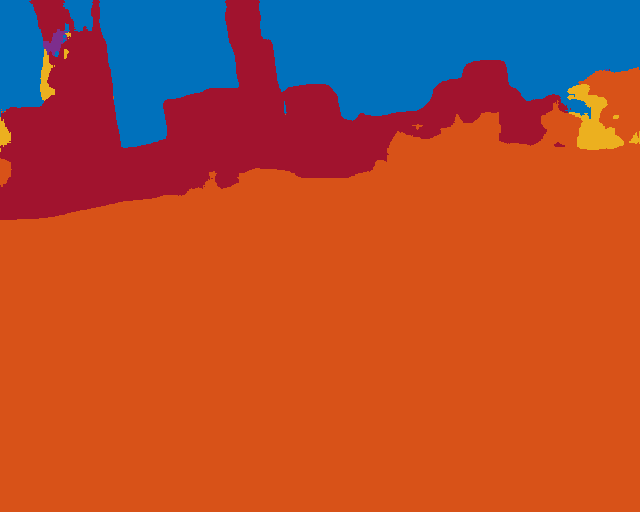

this is the raw image
this is the ground truth mask
this is the colored inferred image


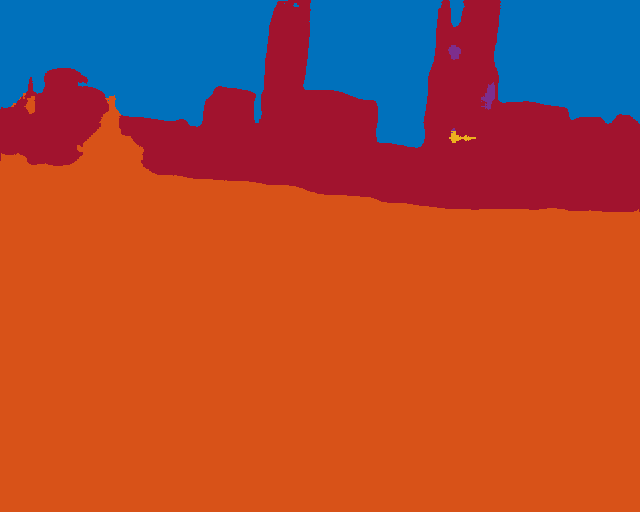

prev=1229,i=1230
iteration running is 1230
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


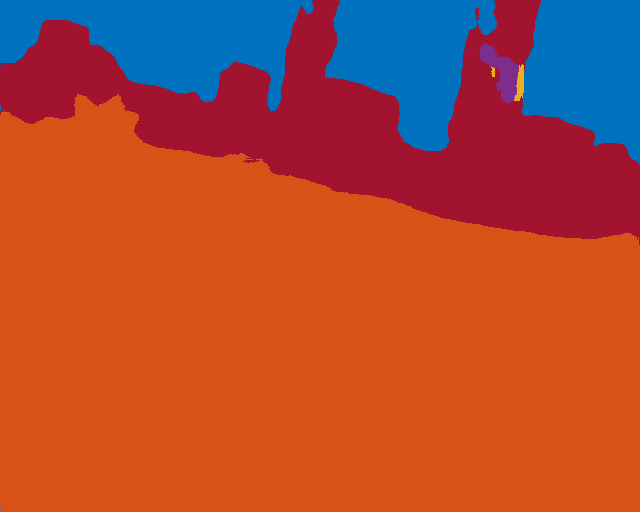

this is the raw image
this is the ground truth mask
this is the colored inferred image


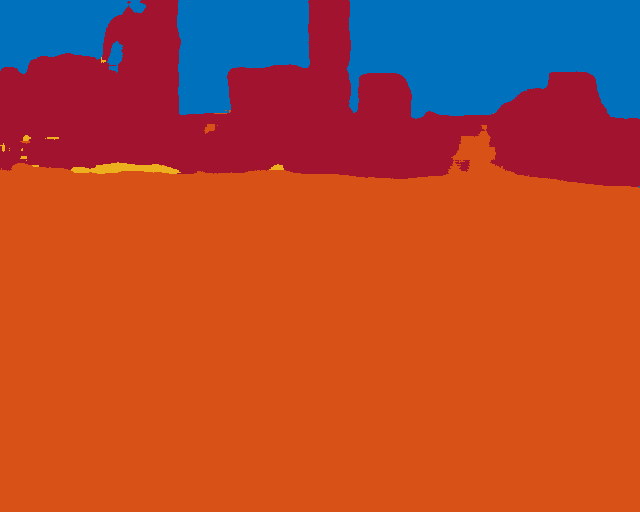

prev=1231,i=1232
iteration running is 1232
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


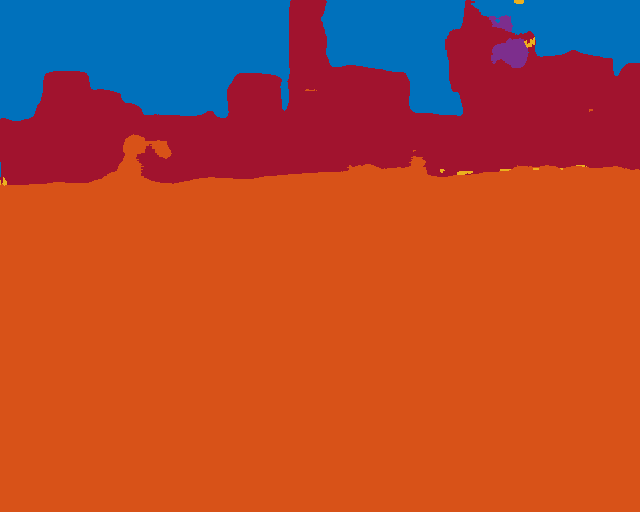

this is the raw image
this is the ground truth mask
this is the colored inferred image


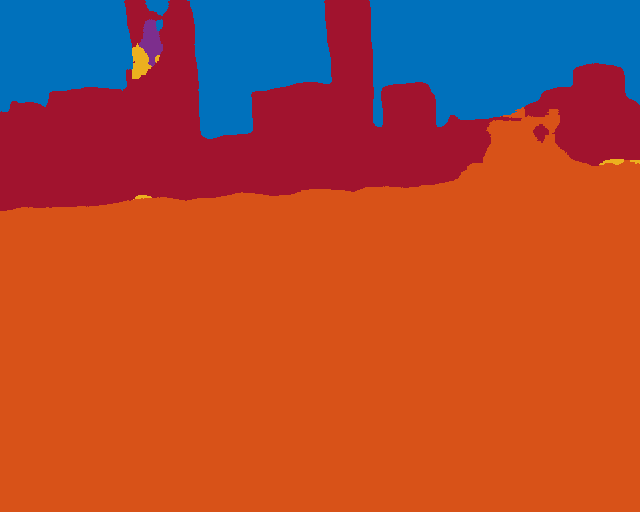

prev=1233,i=1234
iteration running is 1234
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


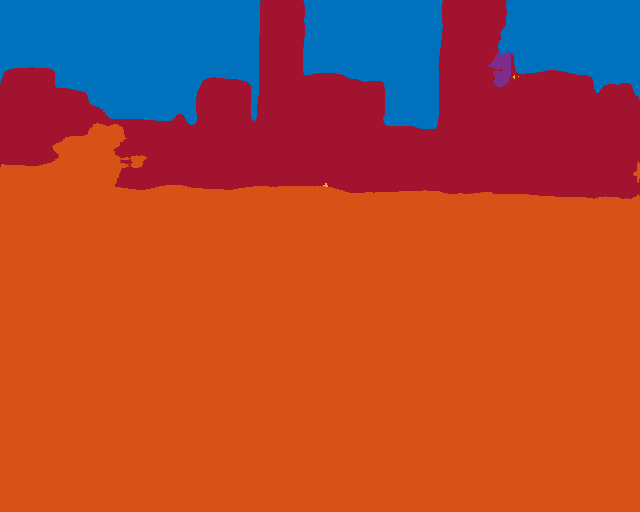

this is the raw image
this is the ground truth mask
this is the colored inferred image


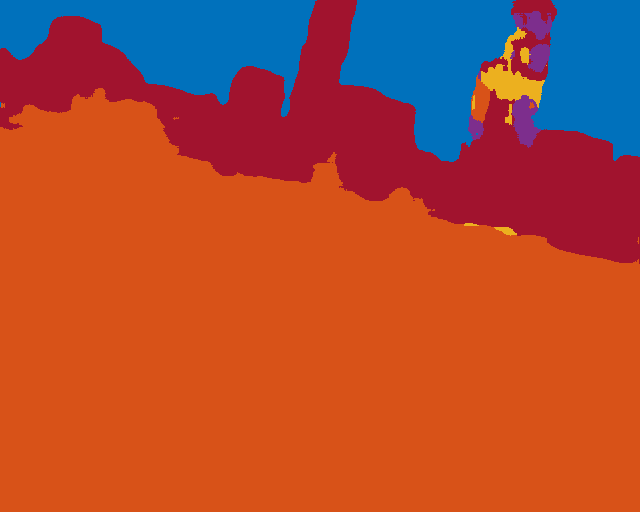

prev=1235,i=1236
iteration running is 1236
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


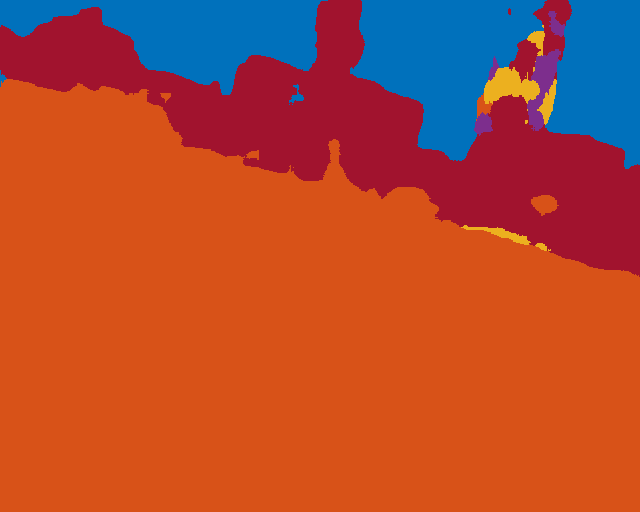

this is the raw image
this is the ground truth mask
this is the colored inferred image


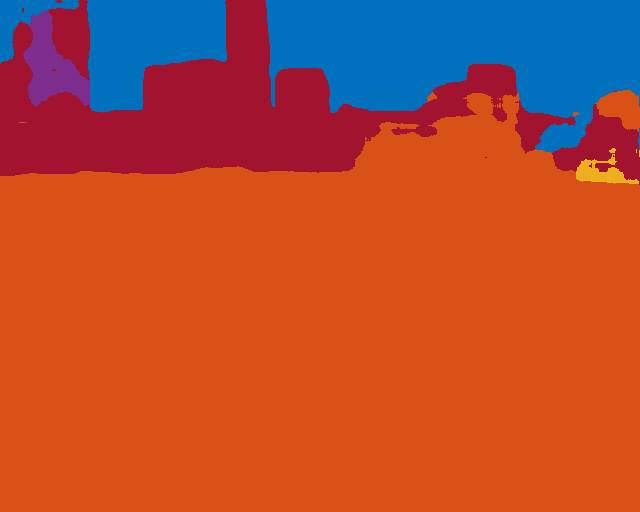

prev=1237,i=1238
iteration running is 1238
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


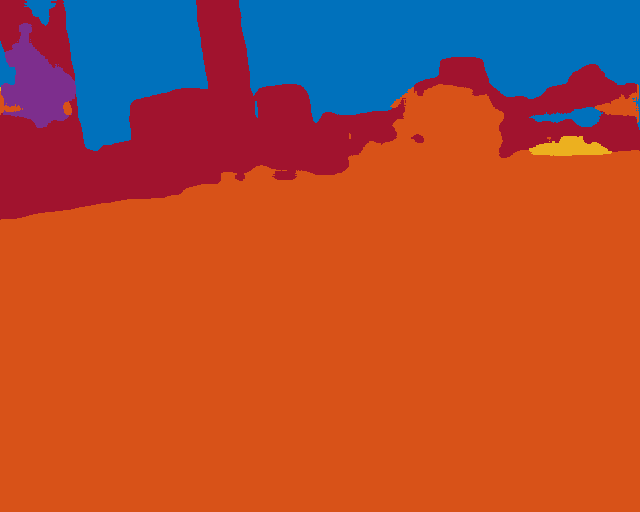

this is the raw image
this is the ground truth mask
this is the colored inferred image


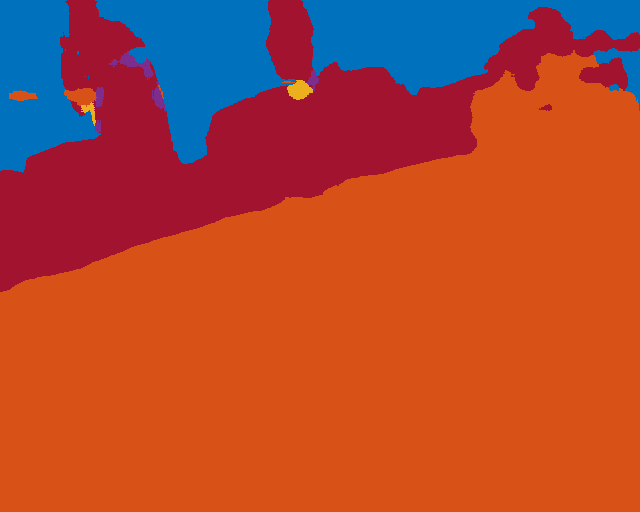

prev=1239,i=1240
iteration running is 1240
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


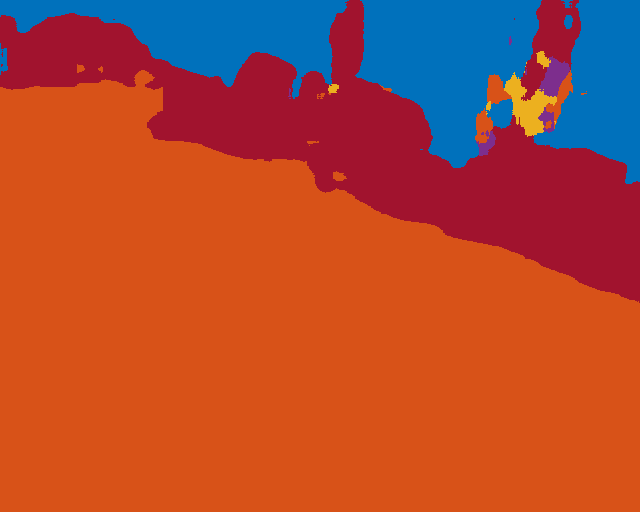

this is the raw image
this is the ground truth mask
this is the colored inferred image


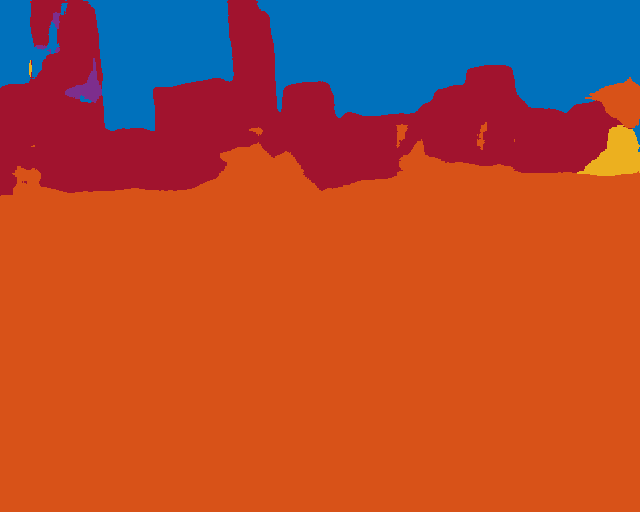

prev=1241,i=1242
iteration running is 1242
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


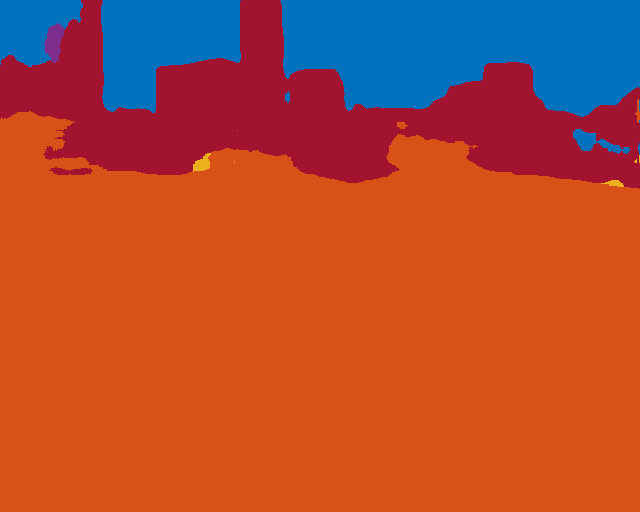

this is the raw image
this is the ground truth mask
this is the colored inferred image


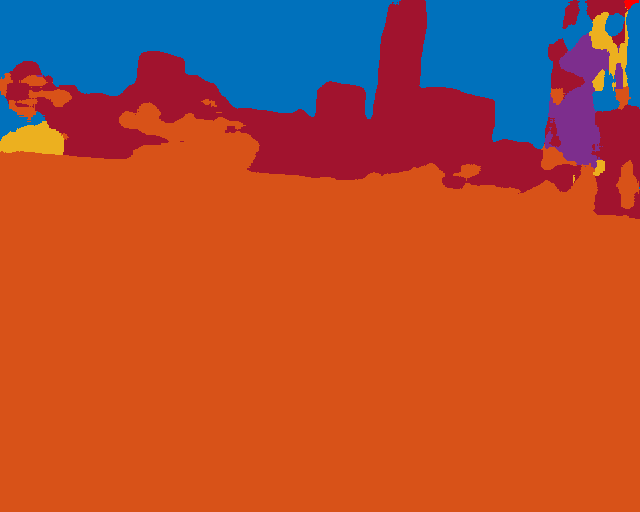

prev=1243,i=1244
iteration running is 1244
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


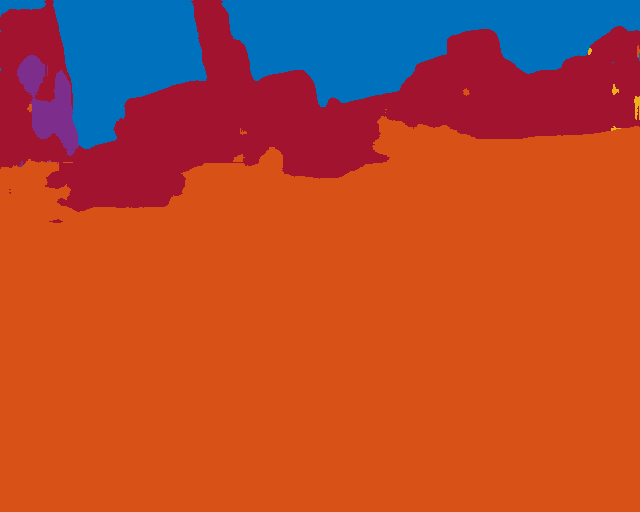

this is the raw image
this is the ground truth mask
this is the colored inferred image


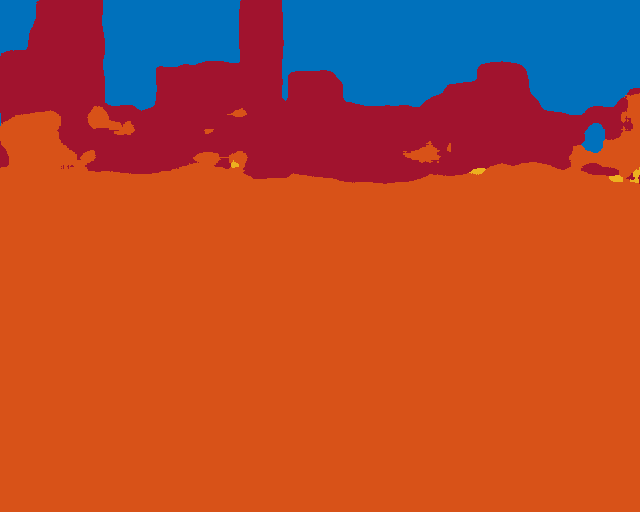

prev=1245,i=1246
iteration running is 1246
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


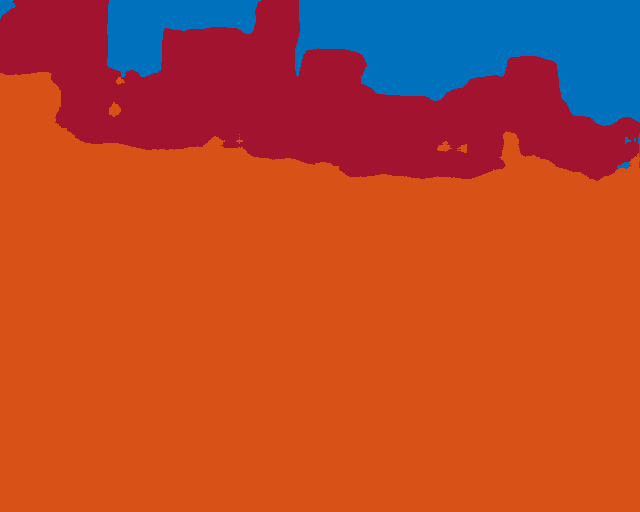

this is the raw image
this is the ground truth mask
this is the colored inferred image


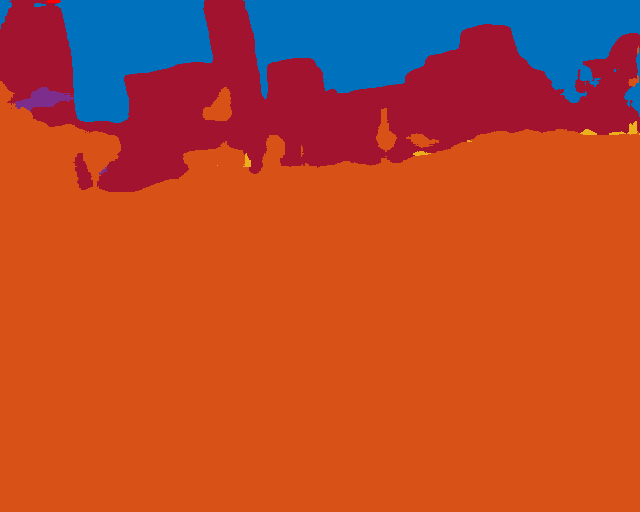

prev=1247,i=1248
iteration running is 1248
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


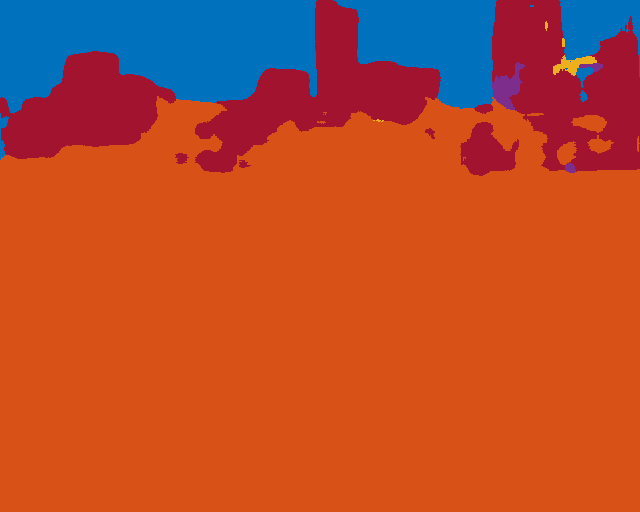

this is the raw image
this is the ground truth mask
this is the colored inferred image


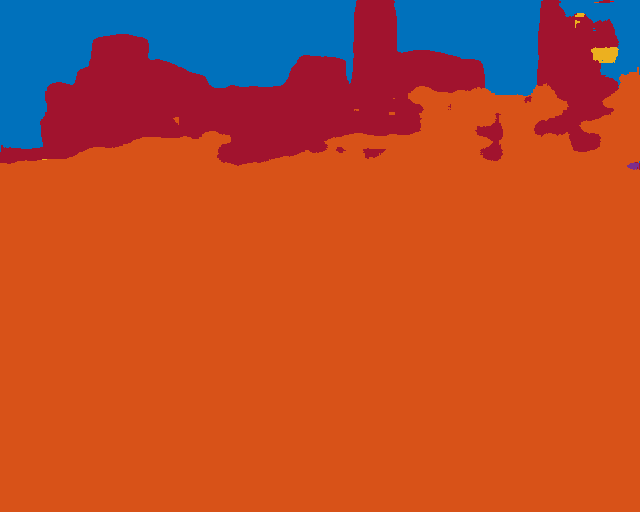

prev=1249,i=1250
iteration running is 1250
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


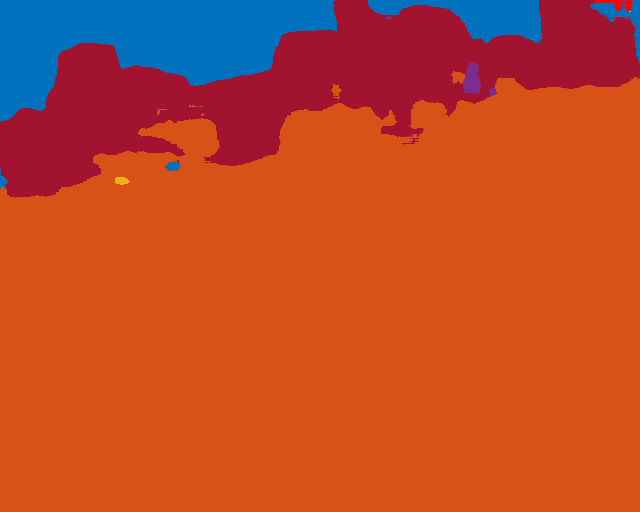

this is the raw image
this is the ground truth mask
this is the colored inferred image


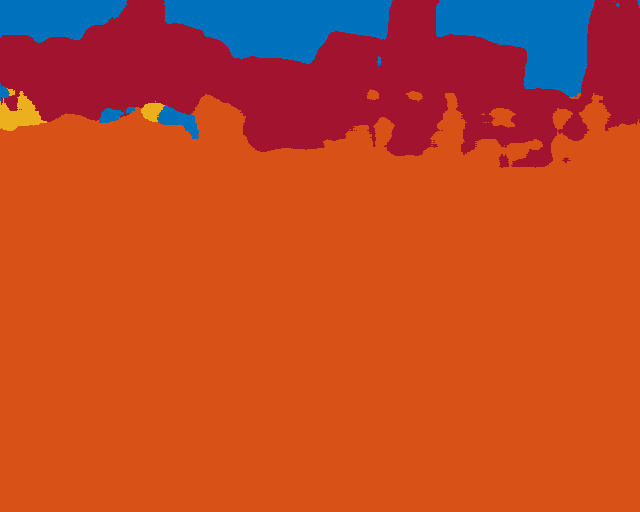

prev=1251,i=1252
iteration running is 1252
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


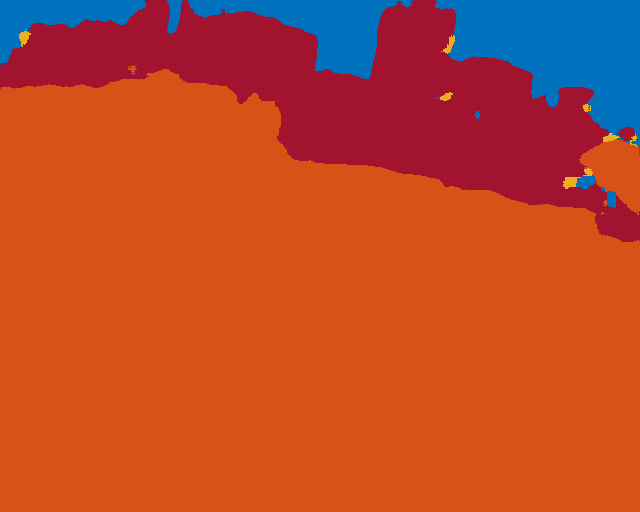

this is the raw image
this is the ground truth mask
this is the colored inferred image


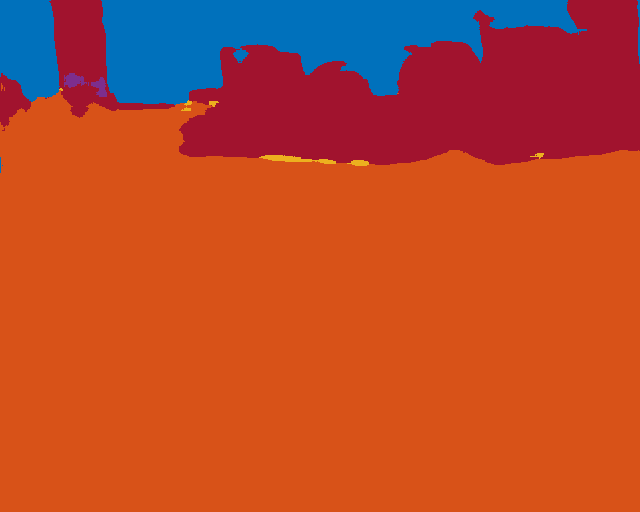

prev=1253,i=1254
iteration running is 1254
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


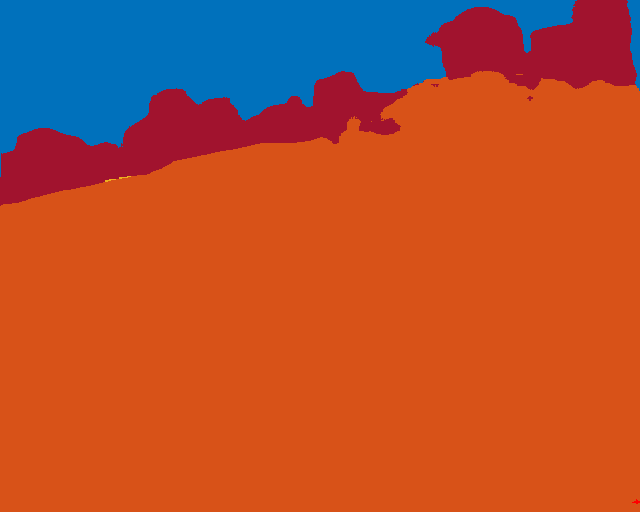

this is the raw image
this is the ground truth mask
this is the colored inferred image


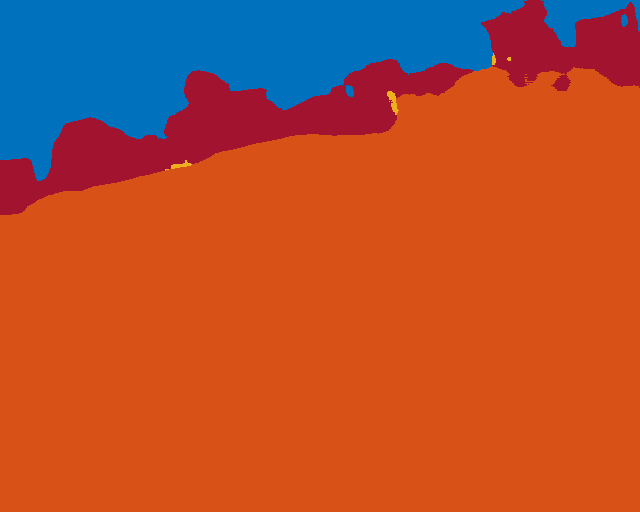

prev=1255,i=1256
iteration running is 1256
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


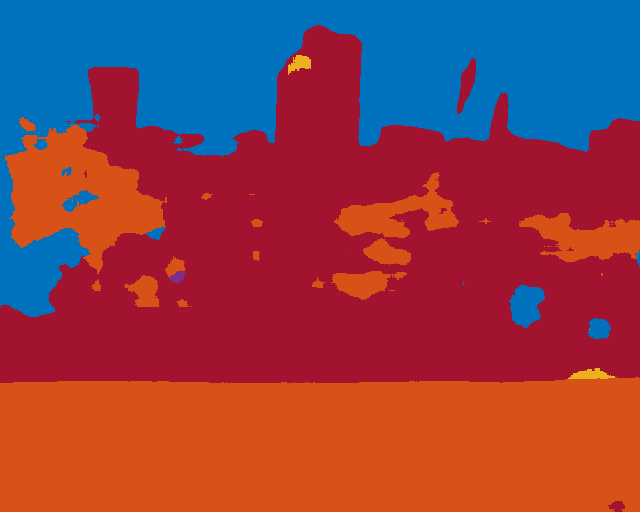

this is the raw image
this is the ground truth mask
this is the colored inferred image


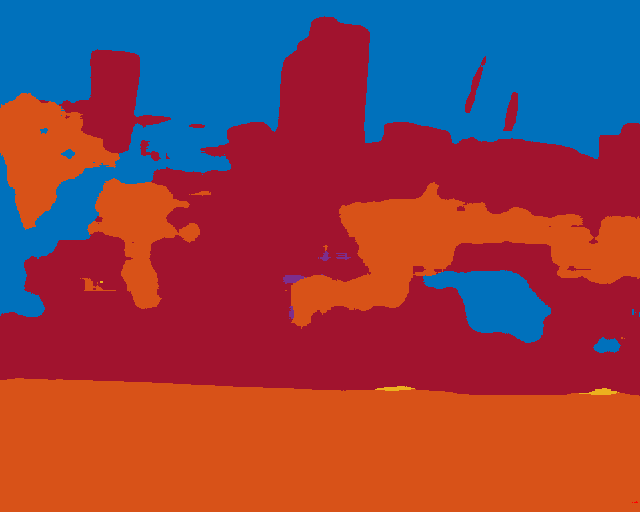

prev=1257,i=1258
iteration running is 1258
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


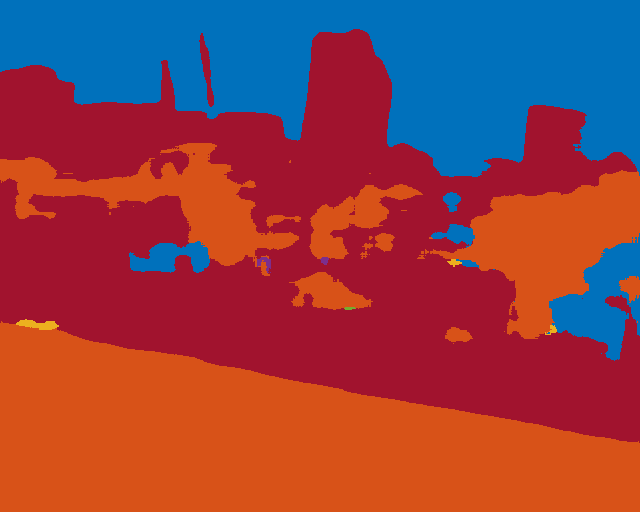

this is the raw image
this is the ground truth mask
this is the colored inferred image


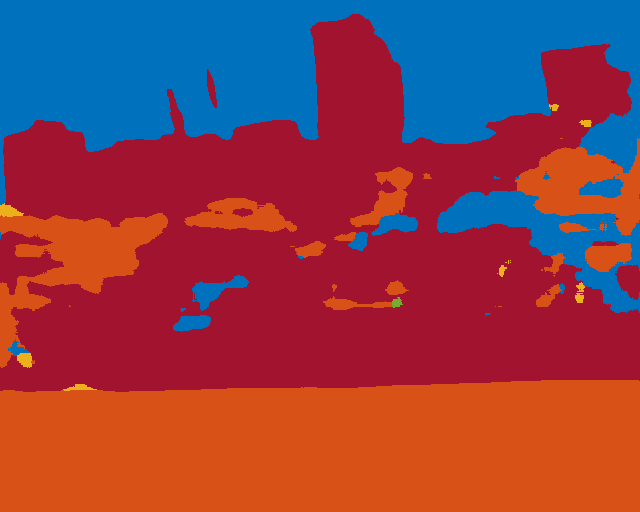

prev=1259,i=1260
iteration running is 1260
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


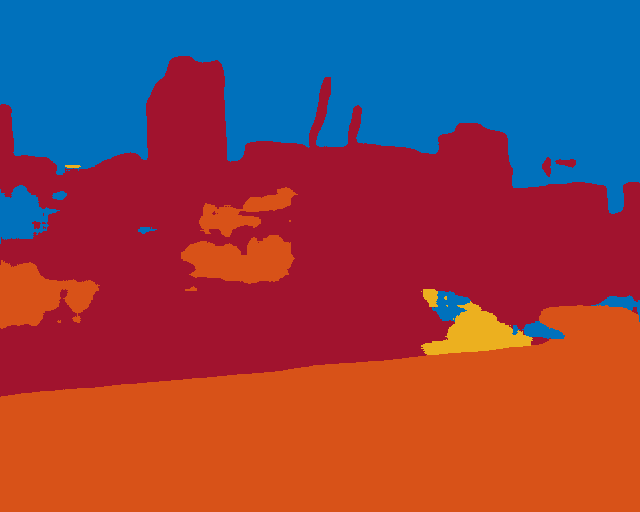

this is the raw image
this is the ground truth mask
this is the colored inferred image


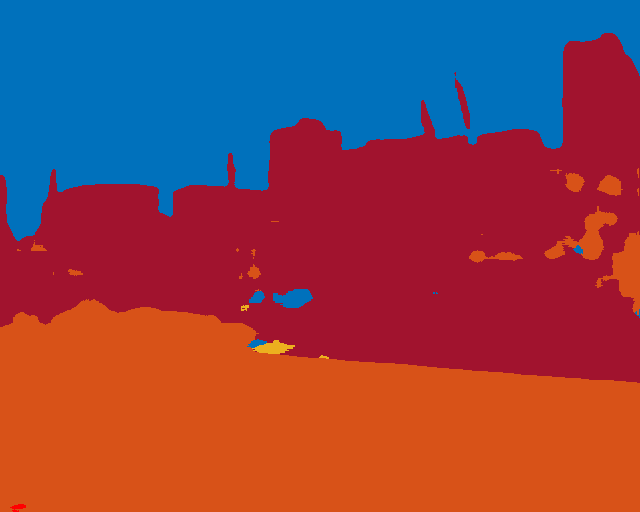

prev=1261,i=1262
iteration running is 1262
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


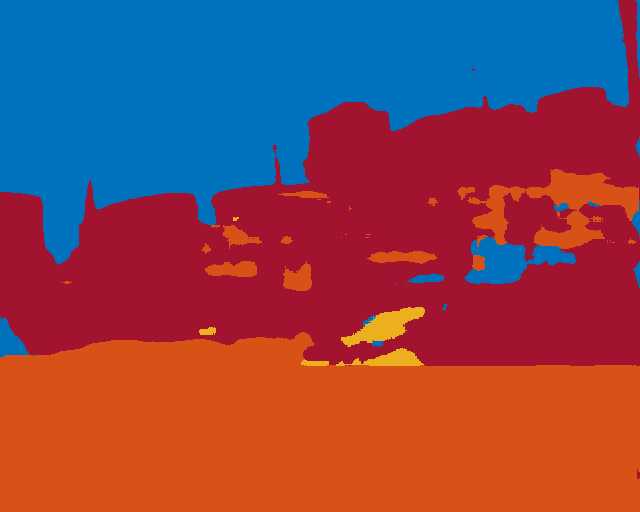

this is the raw image
this is the ground truth mask
this is the colored inferred image


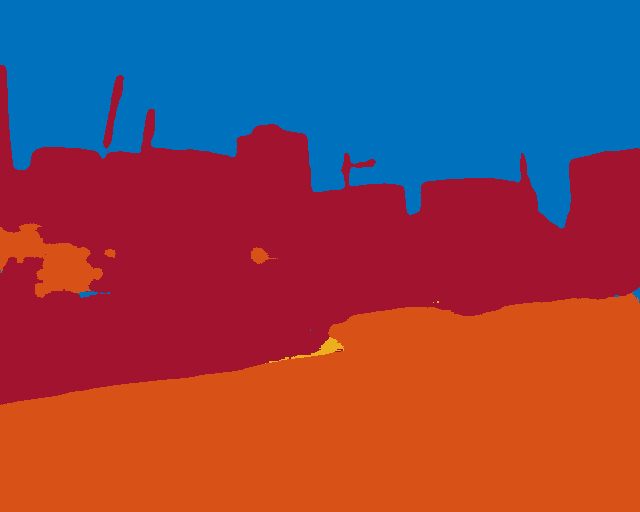

prev=1263,i=1264
iteration running is 1264
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


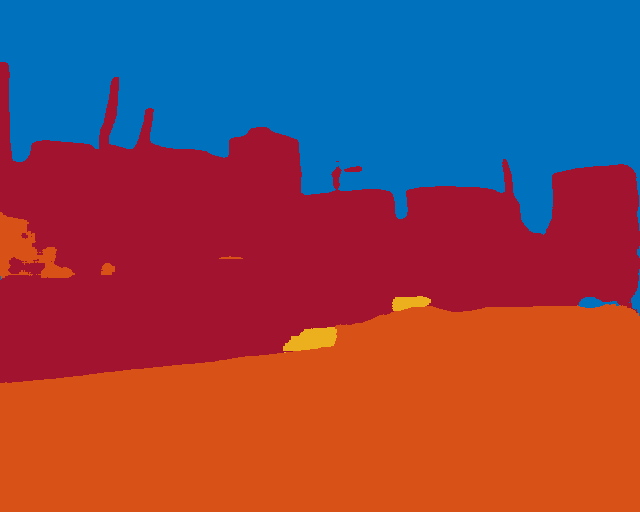

this is the raw image
this is the ground truth mask
this is the colored inferred image


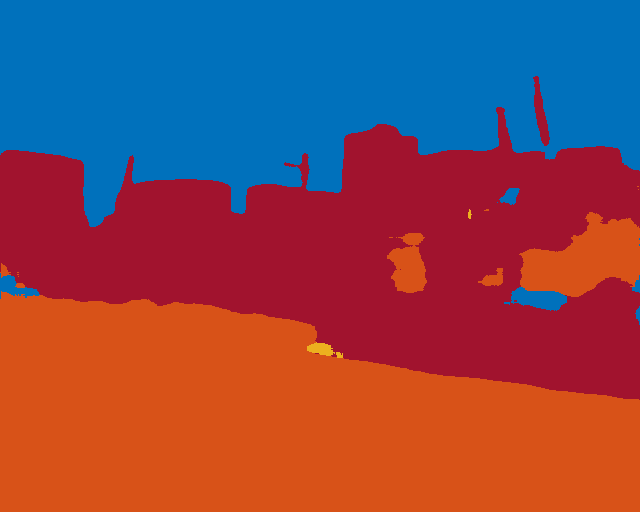

prev=1265,i=1266
iteration running is 1266
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


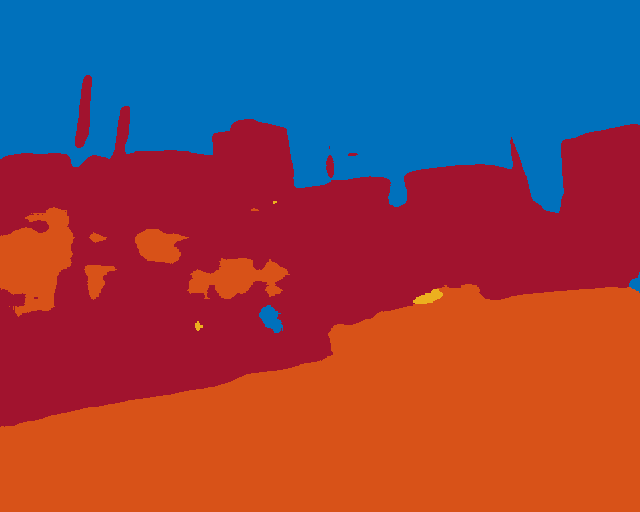

this is the raw image
this is the ground truth mask
this is the colored inferred image


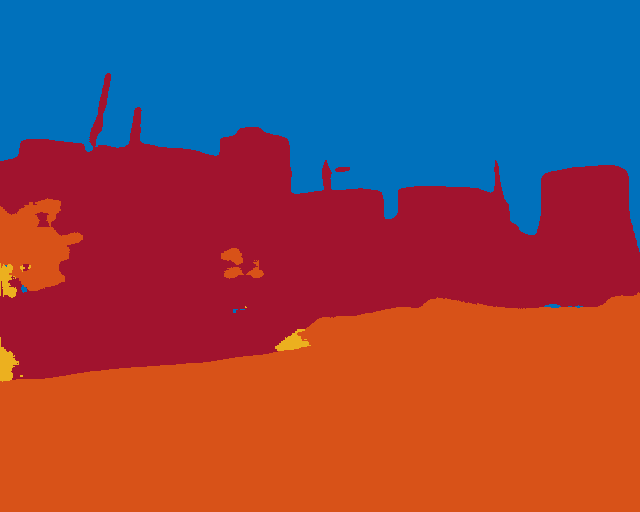

prev=1267,i=1268
iteration running is 1268
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


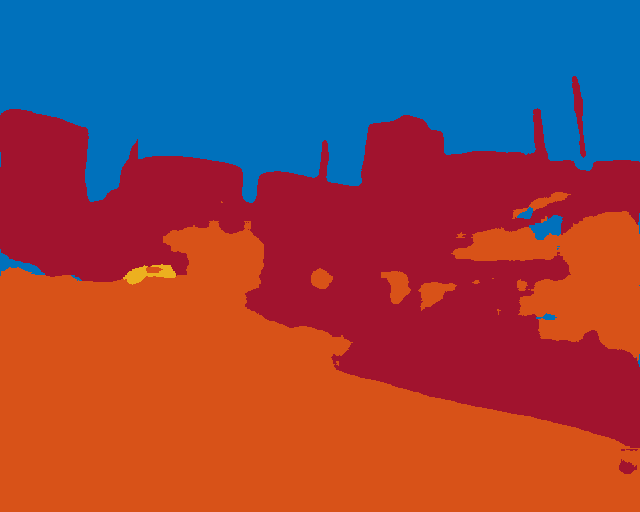

this is the raw image
this is the ground truth mask
this is the colored inferred image


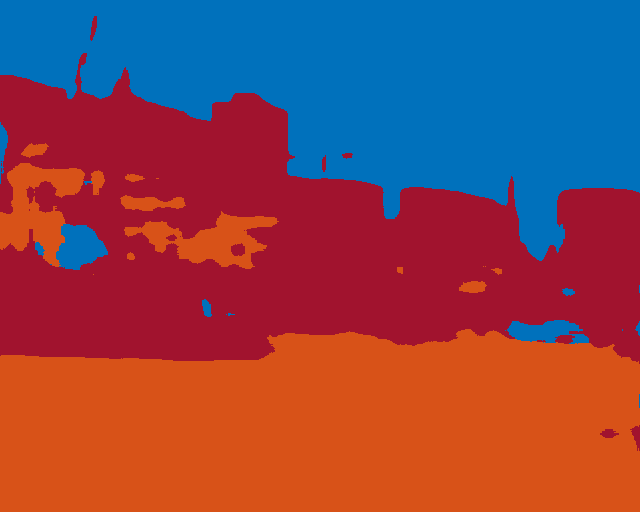

prev=1269,i=1270
iteration running is 1270
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


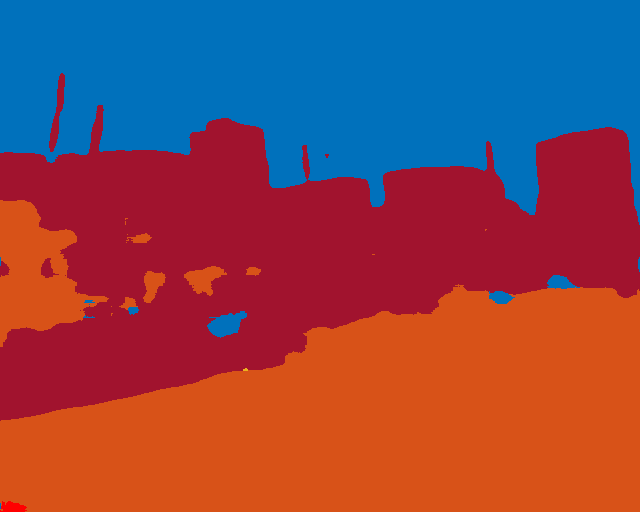

this is the raw image
this is the ground truth mask
this is the colored inferred image


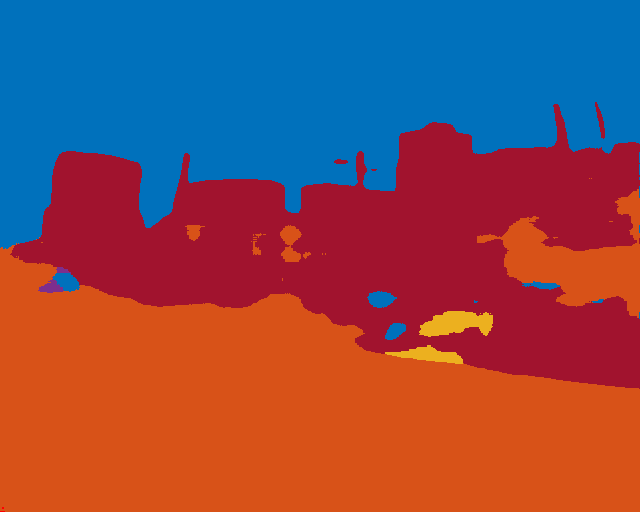

prev=1271,i=1272
iteration running is 1272
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


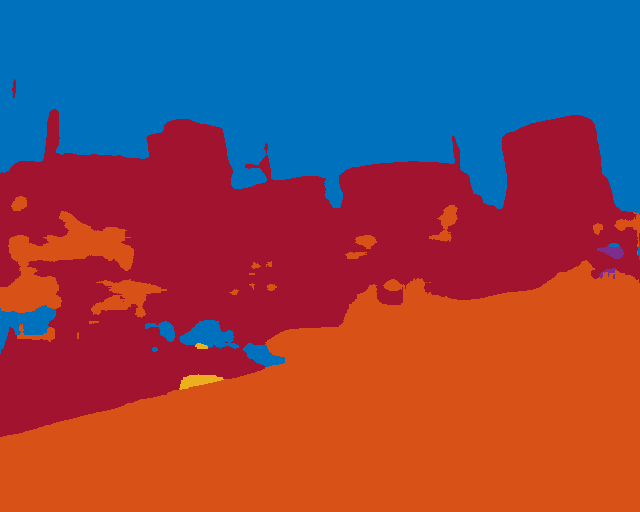

this is the raw image
this is the ground truth mask
this is the colored inferred image


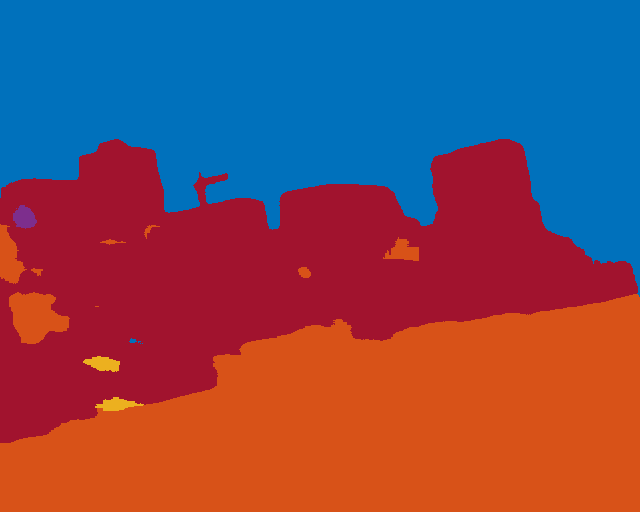

prev=1273,i=1274
iteration running is 1274
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


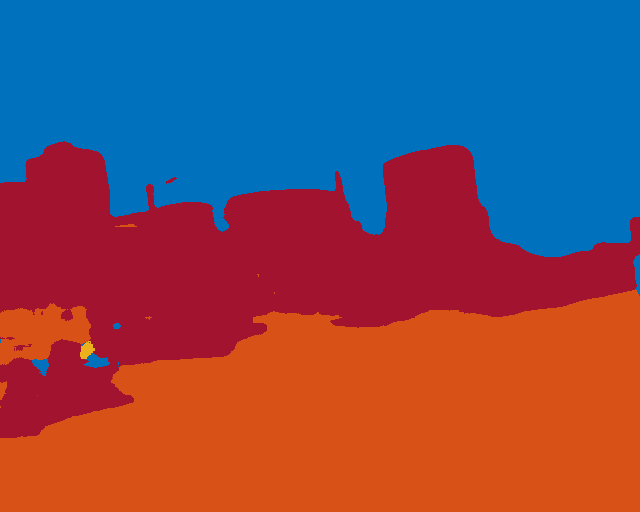

this is the raw image
this is the ground truth mask
this is the colored inferred image


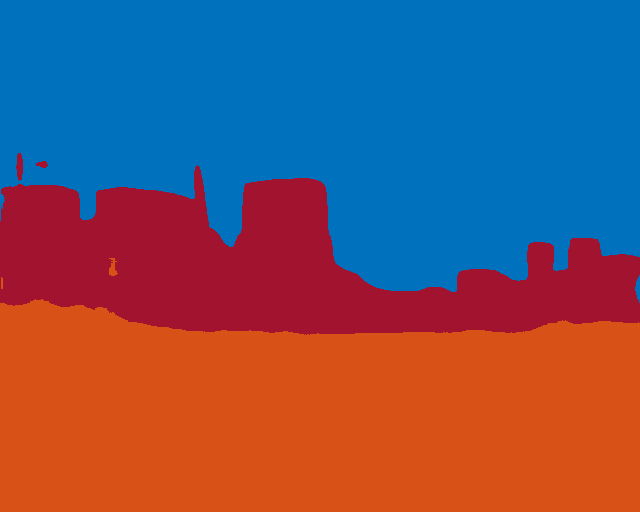

prev=1275,i=1276
iteration running is 1276
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


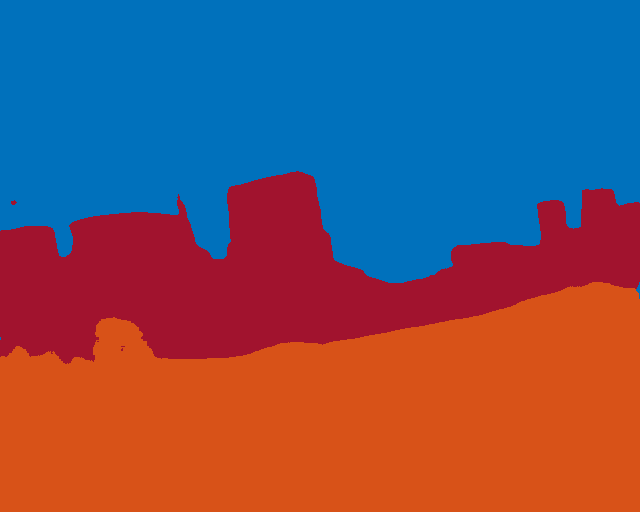

this is the raw image
this is the ground truth mask
this is the colored inferred image


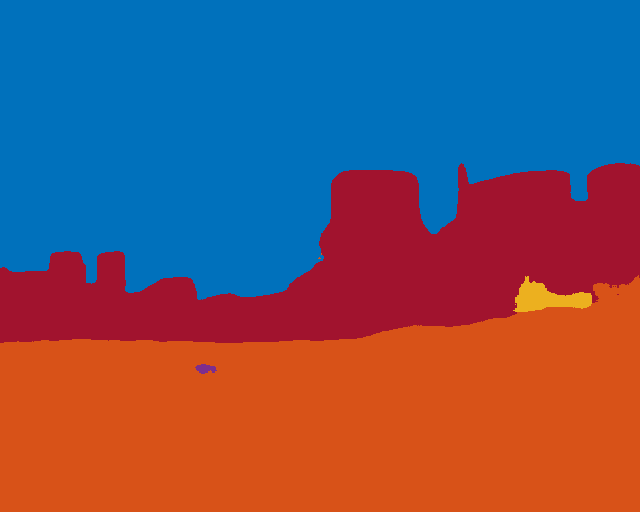

prev=1277,i=1278
iteration running is 1278
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


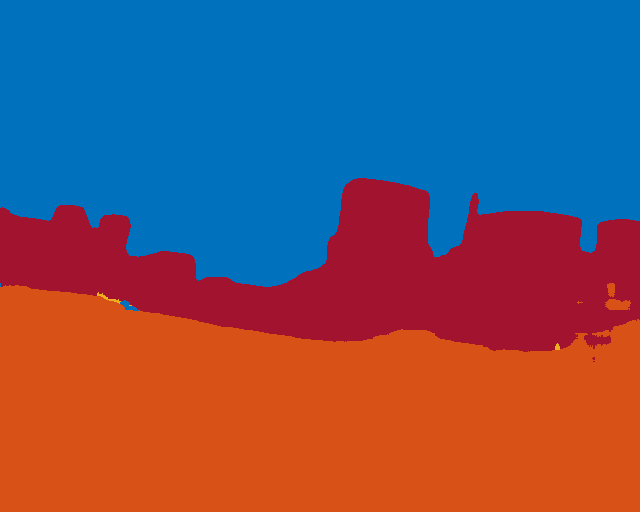

this is the raw image
this is the ground truth mask
this is the colored inferred image


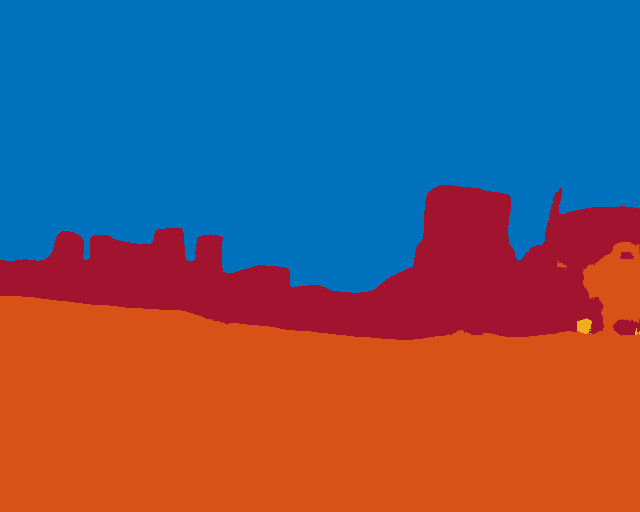

prev=1279,i=1280
iteration running is 1280
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


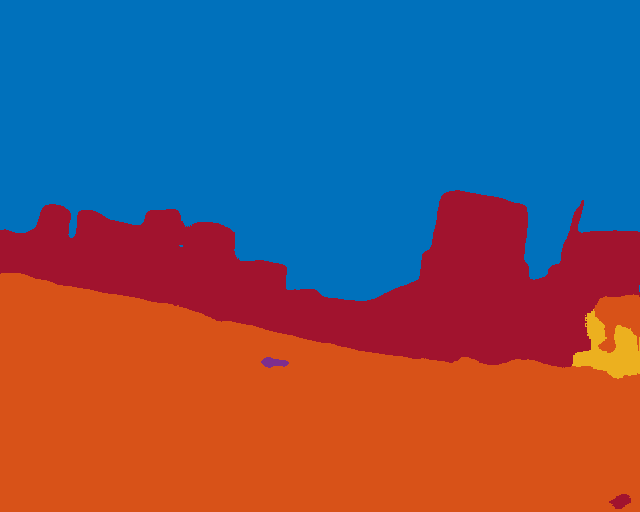

this is the raw image
this is the ground truth mask
this is the colored inferred image


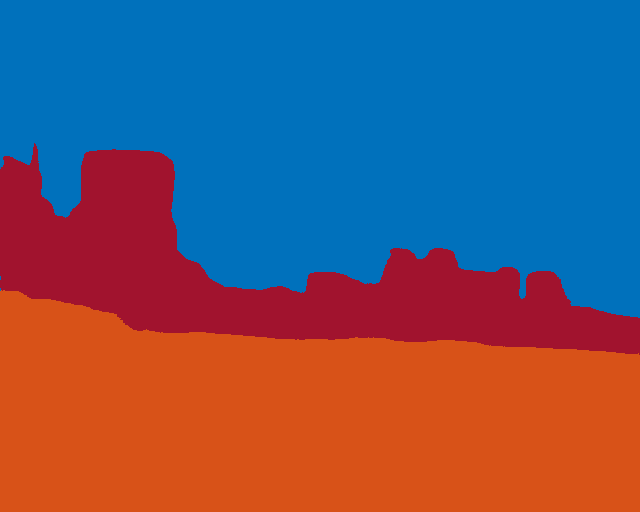

prev=1281,i=1282
iteration running is 1282
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


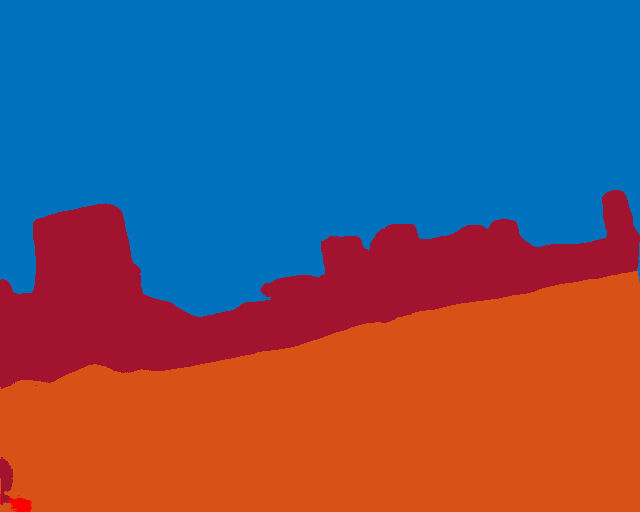

this is the raw image
this is the ground truth mask
this is the colored inferred image


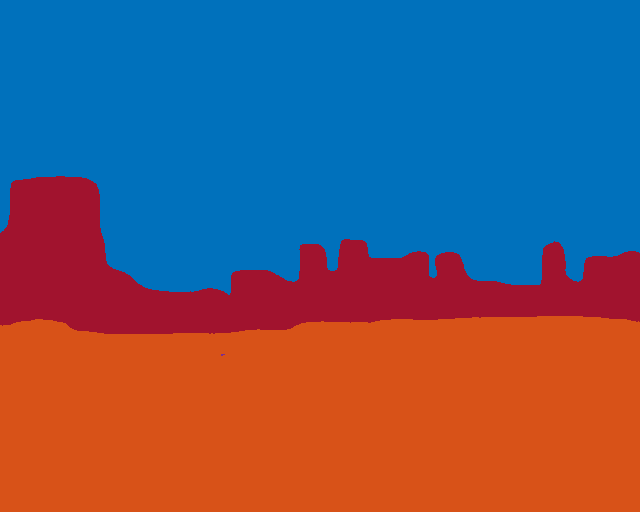

prev=1283,i=1284
iteration running is 1284
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


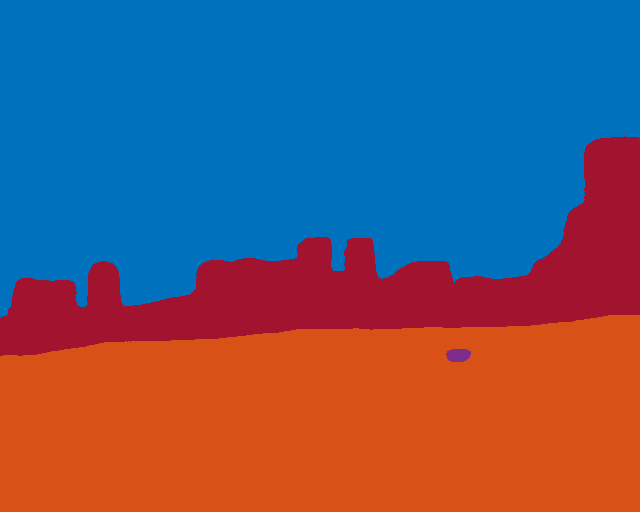

this is the raw image
this is the ground truth mask
this is the colored inferred image


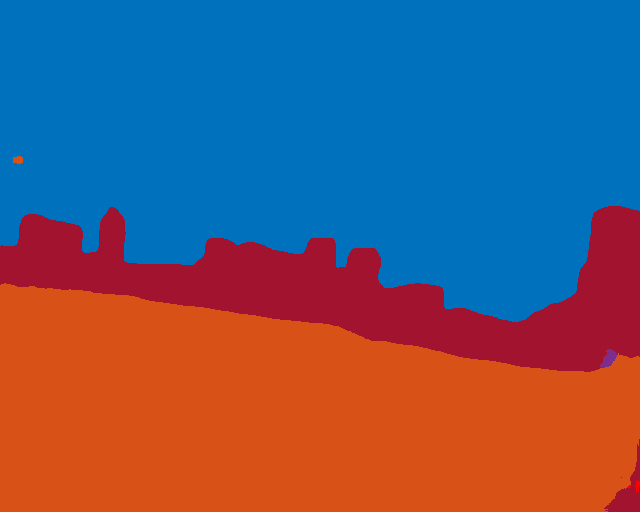

prev=1285,i=1286
iteration running is 1286
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


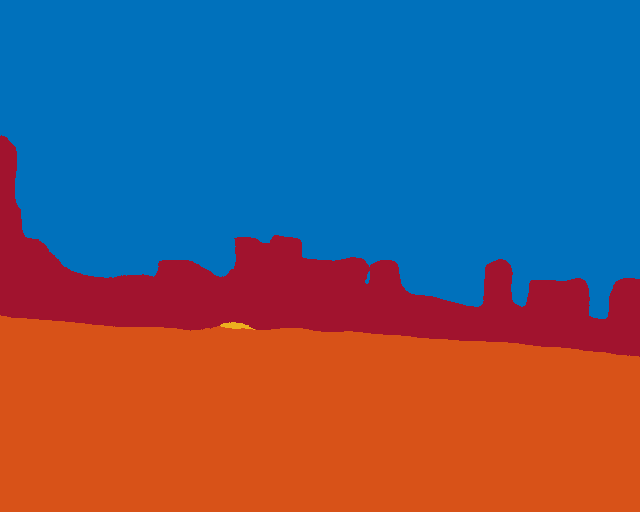

this is the raw image
this is the ground truth mask
this is the colored inferred image


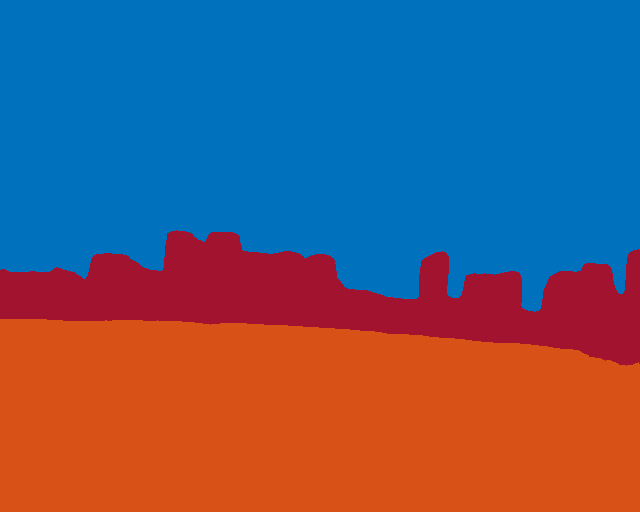

prev=1287,i=1288
iteration running is 1288
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


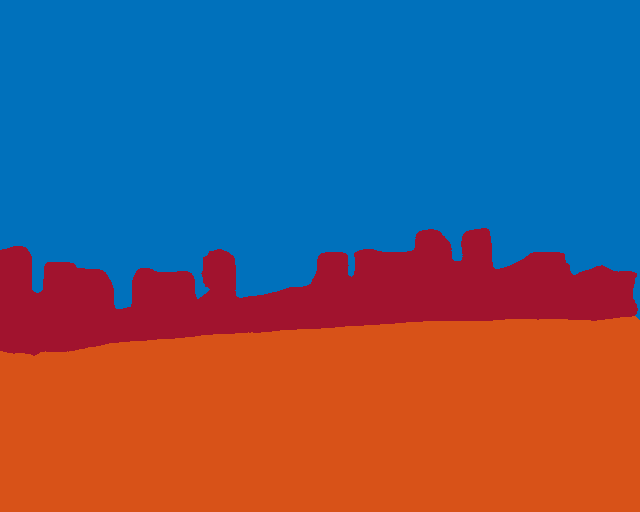

this is the raw image
this is the ground truth mask
this is the colored inferred image


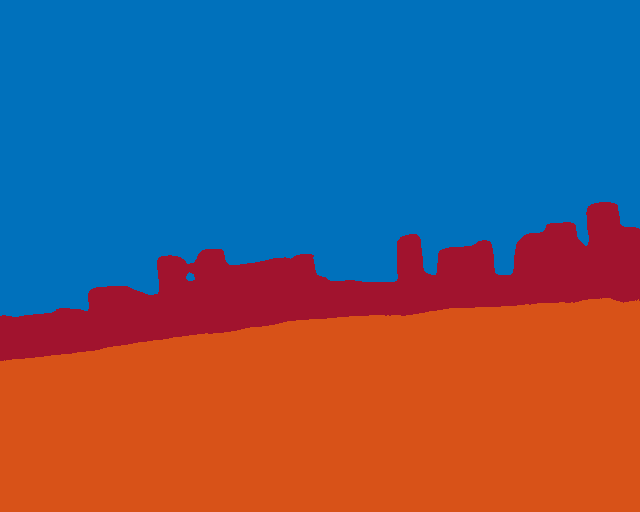

prev=1289,i=1290
iteration running is 1290
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


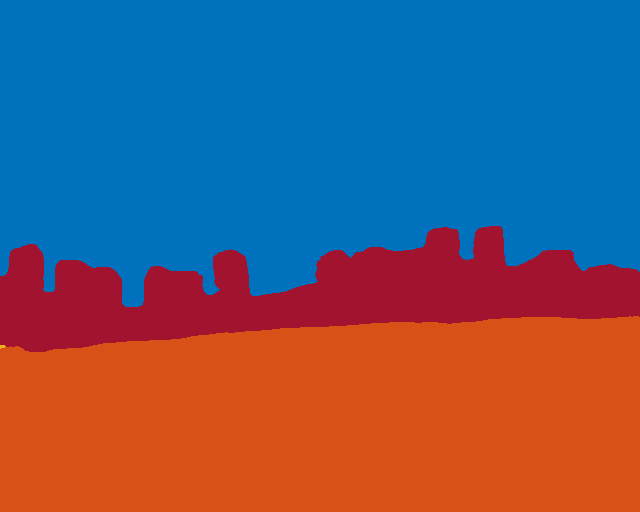

this is the raw image
this is the ground truth mask
this is the colored inferred image


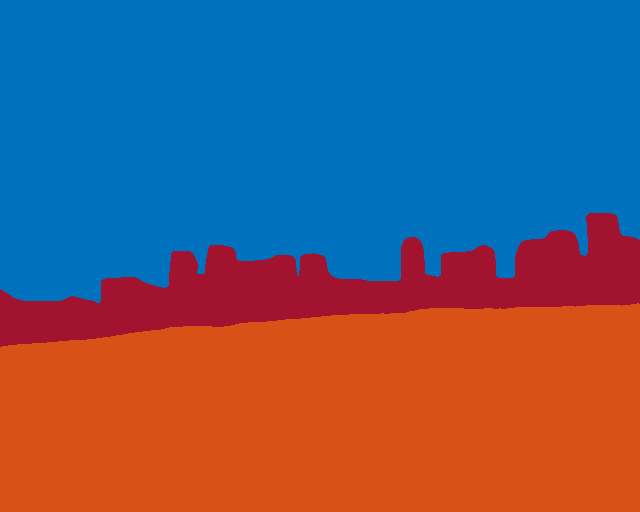

prev=1291,i=1292
iteration running is 1292
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


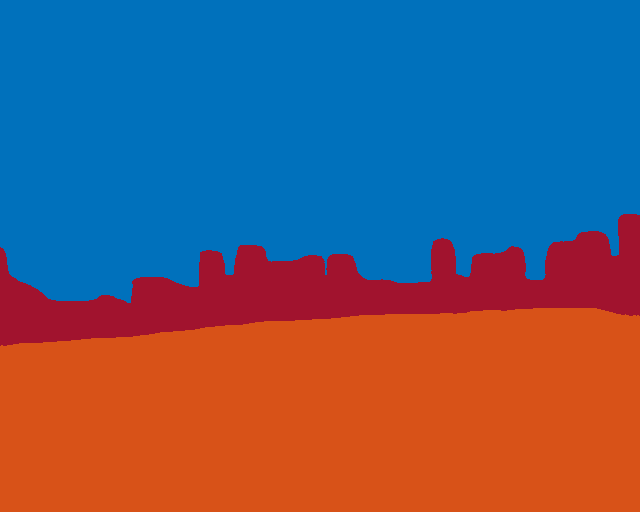

this is the raw image
this is the ground truth mask
this is the colored inferred image


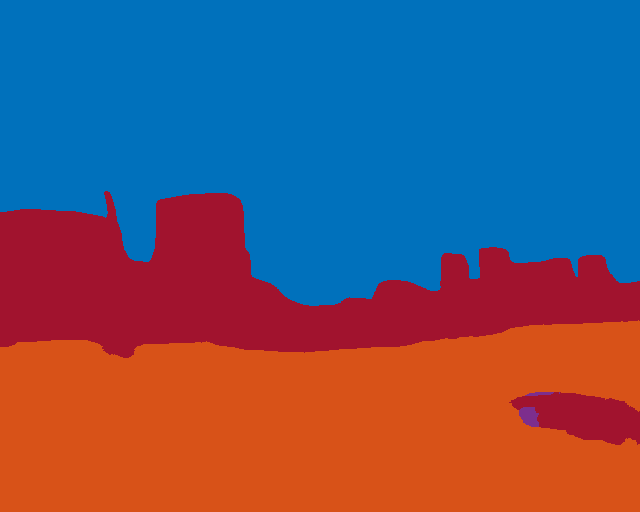

prev=1293,i=1294
iteration running is 1294
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


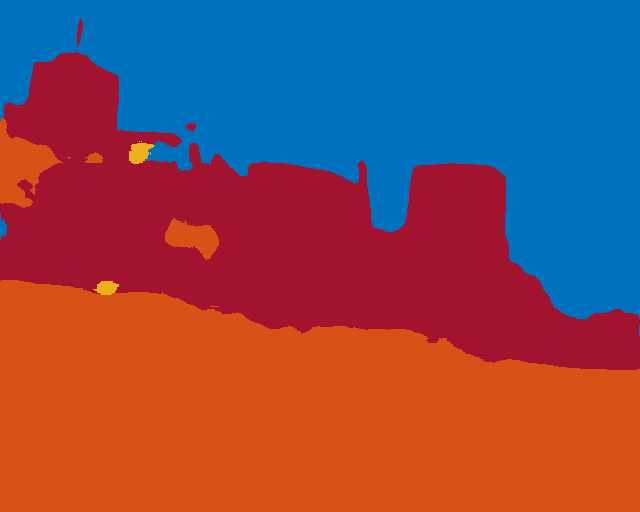

this is the raw image
this is the ground truth mask
this is the colored inferred image


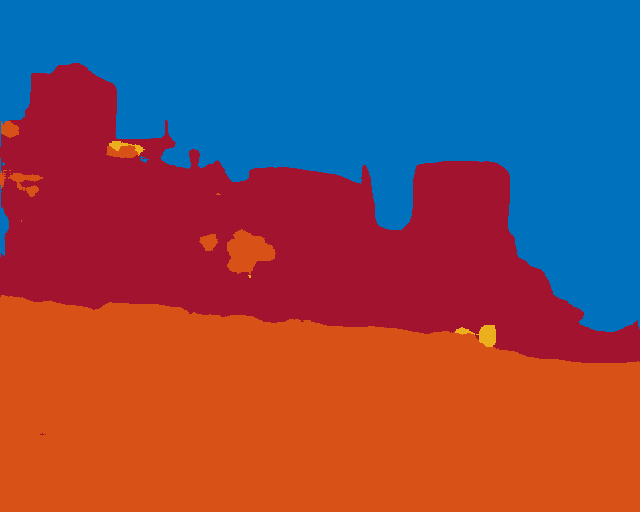

prev=1295,i=1296
iteration running is 1296
Size of test_preds1 = 2
this is the raw image
this is the ground truth mask
this is the colored inferred image


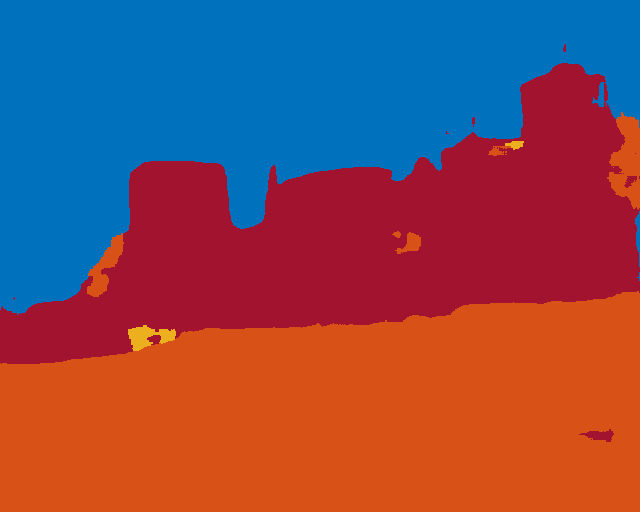

KeyboardInterrupt: ignored

In [40]:
#### CODE TO PREDICT ANY IMAGE THAT WILL NOT HAVE A GROUNDTRUTH. INPUT IS A SINGLE IMAGE

from IPython.display import Image, display
import PIL
from PIL import ImageOps

def display_mask(i,file_num_dir):
    """Quick utility to display a model's prediction. we need color masked images, so displaying both color and black and white"""
    
    #0 - sky(dark.blue). 
    #1 - water(light.blue).   
    #2 - bridge(yellow).   
    #3 - obstacle(purple).  
    #4- living ob(green).  
    #5- backgnd (orange). 
    #6 - self(pink)
    # Colors are same as segments.ai scheme
    label_colours = [(0,113,188), (216,82,24), (236,176,31), (125, 46, 141), (118, 171, 47), (161, 19, 46), (255,0,0)]  
    
    
    mask = np.argmax(test_preds1[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    #print("mask shape = ", np.shape(mask))
    #print("mask length = ", len(mask[i, 0]))
    #print("mask length = ", len(mask[i]))
    #print("Unique pixel values = ", np.unique(mask))
    #print("Type of mask = ", type(mask))
    
   
    #img1 = PIL.Image.new('RGB', (640, 512))
    img1 = PIL.Image.new('RGB', img_size_width_ht)
    #print ("image size", img_size_width_ht)
    pixels = img1.load()
    #print(type(pixels))
    #print(pixels[0,0])
    for j_, j in enumerate(mask[:, :, 0]):
        #print (j_, j)
        for k_, k in enumerate(j):
             #print(k_, k)
             if k < num_classes:
                pixels[k_,j_] = label_colours[k]
    output = np.array(img1)

    outputpicturePath = '/content/drive/MyDrive/IRDatasetFinal-Inferences/unet/picture' + '/' + str(file_num_dir) + '--run1--' + imagefilepathtokens[-1]     
    
    print("this is the colored inferred image")
    display(img1)

    ##Saving the category ids in an image for programatic IoU check 
    img1.save(outputpicturePath)

    '''
    print("this is the gray inferred image")
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)
    '''
    return mask
   

reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2")

test_input_dir1 = "/content/IRDatasetFinal/test"  
test_target_input_dir1 = "/content/IRDatasetFinal/testannot"  
test_input_img_paths1 = getFullyQualifiedImagePaths(test_input_dir1)
test_target_img_paths1 = getFullyQualifiedImagePaths(test_target_input_dir1)
no_of_test_img = len(test_input_img_paths1)
print("Num test images = {0}".format(no_of_test_img))

prev = 0
for i in range(1, no_of_test_img+1, 2):
    print("prev={0},i={1}".format(prev,i))
    test_gen1 = OxfordPets(test_batch_size, img_size, test_input_img_paths1[prev:i+1], test_target_img_paths1[prev:i+1])
    print("iteration running is", i)
    #print("image_path", test_input_img_paths1[i])
    #!nvidia-smi
    tf.compat.v1.GPUOptions(allow_growth=True)
    test_preds1 = reconstructed_model.predict(test_gen1)
    print("Size of test_preds1 = {0}".format(len(test_preds1)))
    #!nvidia-smi
    #free memory / restart runtime 

    # Inference 
    ## Now visualize predictions for a specific image. Change the value of i

    for jj in range(0, 2):
        # check if ground-truth target mask as any object - class id - 3
        image_gt = tf.keras.preprocessing.image.load_img(test_target_img_paths1[jj])
        input_arr = tf.keras.preprocessing.image.img_to_array(image_gt)
        gt_mask_array = np.unique(input_arr) 
        object_living_array = [1]
        #print(gt_mask_array)
        #intersect_array_object = np.intersect1d(gt_mask_array, object_array) 
        #intersect_array_living = np.intersect1d(gt_mask_array, living_array) 
        if((set(object_living_array) & set(gt_mask_array))== set(object_living_array)):
            #print ("intersect output 2", gt_mask_array )
            #print(gt_mask_array)
            #display the raw input image 
            print("this is the raw image")
            #display(Image(filename=test_input_img_paths1[jj]))
          
            #display the ground truth masked image 
            img = PIL.ImageOps.autocontrast(load_img(test_target_img_paths1[jj]))
            print("this is the ground truth mask")
            #display(img)
          
            #set file names for storing the prediction 
            imagefilepathtokens = test_input_img_paths1[jj].split('/')
            #print("tokens = ", imagefilepathtokens)

            file_num_dir = prev+jj

            outputFilePath = '/content/drive/MyDrive/IRDatasetFinal-Inferences/unet/program' + '/' + str(file_num_dir) + '--run1--' + imagefilepathtokens[-1] 
            #print("output file name = ", outputFilePath)

            #invoke the prediction function 
            output_mask = display_mask(jj,file_num_dir)  # Note that the model only sees inputs at 150x150.
            output_mask = np.squeeze(output_mask, axis=2)
            #result = np.where(output_mask==0)
            #print("indices where output_mask has 0 value = ", result)
            output_Im = PIL.Image.fromarray(output_mask.astype(np.uint8))

            ##Saving the category ids in an image for programatic IoU check 
            output_Im.save(outputFilePath)      
    prev = i+1      



